#                                   ANOVA-TEST

 Table of Contents

1. [Introduction ](#section1)<br>
2. [Terminologies related to ANOVA TEST](#section2)
3. [Problem Statement](#section3) 
4. [One Way ANOVA](#section4)
    - 4.1 [F-Distribution](#section401)<br/> 
    - 4.2 [The regression formula](#section402)<br/>
    - 4.3 [Post-hoc comparison](#section403)<br/>
    - 4.4 [Conclusion](#section403)<br/>
5. [Two Way ANOVA](#section5)
    - 5.1 [F-Distribution](#section501)<br/> 
    - 5.2 [Model Summary](#section502)<br/>
    - 5.3 [Effect Size](#section503)<br/>
    - 5.4 [Tukey HSD post-hoc comparison](#section504)<br/>
    - 5.5 [Conclusion](#section505)<br/>
     

<a id=section1></f> 
## 1.Introduction

The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.ANOVA checks the impact of one or more factors by comparing the means of different samples.

**F = Between group variability / Within group variability**

<a id=section2></f> 
## 2.Terminologies

**Grand Mean**

Mean is a simple or arithmetic average of a range of values. There are two kinds of means that we use in ANOVA calculations, which are separate sample means(μ1,μ2,μ3,μ4) and the grand mean(μ)  . The grand mean is the mean of sample means or the mean of all observations combined, irrespective of the sample.


**Hypothesis**

 A hypothesis is an educated guess about something in the world around us. It should be testable either by experiment or observation.Just like any other kind of hypothesis that you might have studied in statistics, ANOVA also uses a Null hypothesis and an Alternate hypothesis. The Null hypothesis in ANOVA is valid when all the sample means are equal, or they don’t have any significant difference. Thus, they can be considered as a part of a larger set of the population. On the other hand, the alternate hypothesis is valid when at least one of the sample means is different from the rest of the sample means. 

**Between Group Variability**

The **variability** between the distributions called Between-group variability. It refers to variations between the distributions of individual groups (or levels) as to check the values within each group are different or same
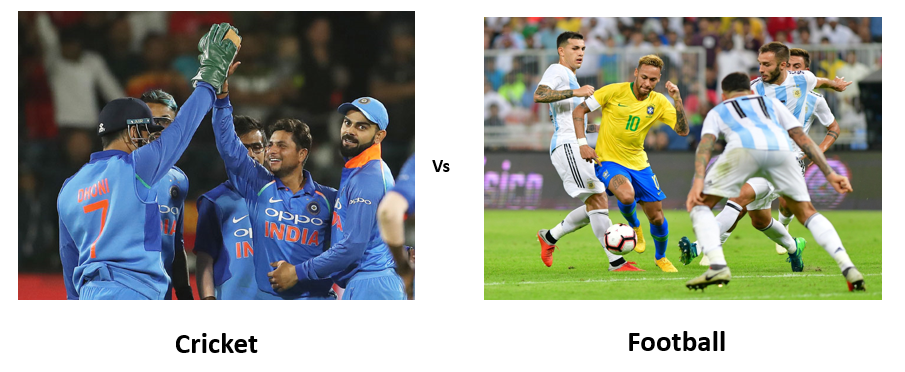





**Within-group variation** 

It refers to variations caused by differences within individual groups (or levels) as not all the values within each group are the same. Each sample is looked at on its own and variability between the individual points in the sample is calculated. In other words, no interactions between samples are considered.We can measure Within-group variability by looking at how much each value in each sample differs from its respective sample mean.

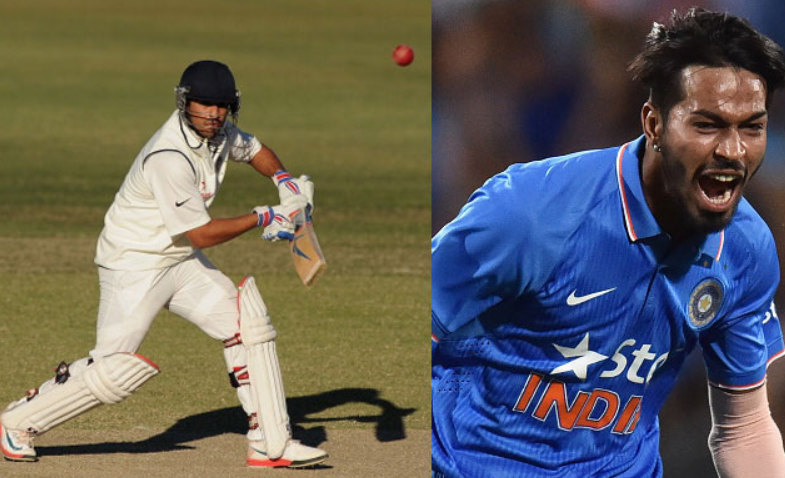

**F-Statistic**

The statistic which measures if the means of different samples are significantly different or not is called the F-Ratio. Lower the F-Ratio, more similar are the sample means. In that case, we cannot reject the null hypothesis.

  **F = Between group variability / Within group variability**
  



<a id=section3></f> 

## 3.Problem Statement

Three fertilizer Comparision : This data is fictional; a study was conducted to test the effect of 3  new fertilizers, and the amount of water on the mean crop yield. 

<a id=section4></f> 
## 4. One Way Anova Test


A one-way ANOVA tells us that at least two groups are different from each other.We have data for three fertizers,lets check whether their potenital are same or not.

- H<sub>0</sub>: No difference between means, i.e. ͞μ<sub>A</sub> = ͞μ<sub>B</sub> =  ͞μ<sub>C</sub>
- H<sub>A</sub>: Difference between means exist somewhere, i.e. ͞μ<sub>A</sub> ≠ ͞μ<sub>B</sub>≠ ͞μ<sub>C</sub>

**Importing Required packages**

In [2]:

import researchpy as rp
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pandas as pd
import scipy.stats as stats
import researchpy as rp    
import matplotlib.pyplot as plt


fert_data = pd.read_csv(""")

ModuleNotFoundError: No module named 'researchpy'

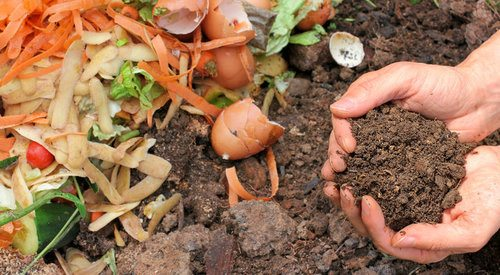

In [3]:
rp.summary_cont(fert_data.groupby(['Fert']))['Yield']data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAfQAAAETCAYAAADAl/SwAAAgAElEQVR4AUy9V7MsaXae96TPLF+7tj+u3ZjuMQBIBAmCAQUUYuhG0o2kS/0T3eA36HfoUhHSHYOwYswMAWJ6MIPp7tPHb1u+0jvFu+qQoR19pqfP3rsq88vvW2u9Zq1ytv/H/9b7vovXQ9MU+h9cD5y+o21b4sGQ3vHoPQ+8ECfQnwjPDcDzqYuaDoe+d+iB0HWgzSg270k37zhfxFBvoSuga4AY4hE9Mfv0QOx2eJ5H58c0fUhRu7SdQ+TGRJ5Htn5gc/ue3c07hh4kPoR0xFFAnvd43lPK1mGfbrh/fGR7gNEUFgsgcPCDmNPLJ5ycPcUNEnB8CAKauuNQFcwuL0iLjCzP0Zcb+DiOQ9P2dF1n9+b7PkE0JI5jAj/GdV261oU+x/cL0nRp6zAaDPHDAflmS3ko7Oddx6GqKhzXtdcuiozdYU/vwGAQ01Dj0hDSUuV7yv2OKPRtTZbbHV4w4vKTz+i8hKxuCcdjqqZln2a4szHNxRnuaEBMhFd3xL1P7Hu0dcOh2tN6Dm+Wt/yf/8//xdevU776o+dcfPqprcX19TMm4Zxv/+n3fPf1b0kCH7+Fd29f4fQ108WE4WxA0RTcb9ecXV7x1U//BYPhhN025/5xw2g8xRlElH7D435JEATM3QhePVI+puB4TF5c8bpe4c19xlFPsnzgv59c8pP5NXmh5+0SJC5+5NC2JZ32n+NSth2+OwQnwveG+F6C0/mAg+v6EEUUYULe9zidi55TEkT4gYfbtbRdjtPWONQ4fU/X1PRNT9t20Dm2x7tmj09N0Dt2HWnjkzGgis9w4xG0HWGXUi9f49UbivzA9rAn7Xz+1Z/8KW6V8/U//EemAxfPSYmDjjD0cOOELhjSenP88TkVA6LB3PZ2WZYEjsfDeokbDHGCAMdzjvvN6UBnCNDJSg85yXjMdDrHDSPqqqesK3sdz9V9Z/ge+GFgv9P2DkmSMB4meA4EnofTNXhNA22Fb6e0s/ui7WkanSao2pK6SenbCijo2pK+zqEtKbKMrEip24airdmmB25XK3a7FdcXMybzCXfrNd9+uMGfzLj64gtG51f0SYI7nJI2LY4fMJ0vGE0mx/NVdzROT+f5RFHEoI/wm5649QkVgOqeosppfRc3dHAjD8fv6eqM7LAh1RlKd9QPD6y/f0WzzLianvHpix8wWJxTRCPSICInYHpyid971FVFHIQ0Tk3WZviBw0kwYPvwQF20fPerv+ayvGHua++EVDgW7w5NyeNmyW3TsZ89h/mc4ShkMgyYBh5dVTIezUnTnPxQk+c1v/rF13z99W+5u11bzBgMp3h+oPBK7zj4foTftfz8B89Z3d/x6t17srIhr1uqpiMIE7RPoihkOEpwg47erYmnCafXc374kx/y5Zc/wKlL/unr3/DLv/sF+33GbDglzyqaouPs7Ipse6AsakInIgxDtLMUb7VHPK9nMh9w//ABt3W4vr4m3xW8efOGKBkwnc9o+s52zGg4IAkjwsDD7x3K9EDXwT7NwXWJfZ84DnFxOORb1us1m3yLF/nkTkmymOHPYtK2oos9RvMxgRdSr2vIG5zehaZle79i87hkFI65ury069F1n8xO2O12LFc72+eu53F2tWBfr3j+4or/9s//jJPJkN/++h/4h1/+kvKQ89Mf/5QibXh69ZxhOObhYUlXO1xcXJBlGb/+7W/YFSWLizMWsymjJCYMAorDnpv371g/Lum7luFwyOxkTlYWFss/+fwz4jjhH//pt1w9+4KsrNjv97avdTaVN+LBwH52OhvbdWf7A8vlkndv3lpe+NN//Sf88R//K84uruy+/abEdWvW2Ypff/9rvn14Qxt19py+/OwLZn1EvkrxOp/dPuP9eoNSUOh4DIYxvvvxmf7v/8PP/yLwXXxXCaql77W4xyTrBy5+EKLF81wfx/dwlcgd1/70OHiOh+8FuJ5vm6Vtauoqxe1KQq/Fqw44XQlOR19X5EVJ10Kv39HrdI0thOMG9I5P0zoWbD3XRdfltI0dmCbPCDzHYl3Xtej7TeOQZj2v333g5jZVfGI8gdEYgkGA54fgR8TDGfFgqqhH54WWZBrHpeo6HtZb9lmhuI0bhPh+aL/nhyFhFHF6fs5wNCFJYoKPa+E4xyVwnZa2SanzlCLPcHuHoO9pq4qyyqHrqRV828YCtud7lsj10JumoUXr7NumadqasijQ+unQtV1P02PFU9VB74e4YUhZVmRFQRj4JMOBBX+nanDSnG6X0h8yurSgyXVdKlJa4jiyR7bevqfH5SdffsUf/MEfcjKZEzkht2/f8buvv+buww3r5SO7dYnjtIRxQNXWlkh2h4y7+zWb7Q7fCxkmE2zBe9gfDqx2K9bbFXbKi5r09pF0t7c1dWMfbxBxtpgy7BsWjstPTs4ZOQpwju2rMPRtn3VOb8naDwb4/gDXS8CNcL0I141xXM8SkKrOznOJRiO8KCYOIwZxQhxFBL6P52qvONRlTq993XW2zr02ybEkUF1A32m9tee03g6t49N7MY0T2e21TYXbFHjNHg8Fypy6rW0fXV1e4DsOH969wldh6qjQVGGhcxPh+AnhYErrhFStSxSP7JwoSTcqLlTVqUBWRsahRUWkHrqOgGvfd33PEoGre9JZCyIGwwHT8YzJZERb5yyXD2x322MB6fmsViuy9MBwNMK1V1aB1EPf0zc1XdPQ61y1ve0HLWhPY2tBX9n5dxQHdDYV0NvWfqexf2vXQhwlzKdjotDF8xyKuiavG+Vhet/HjRLcKCIajmmdnmQwYjqb2zM+ZBl1VePZHh5aYA9dHx8XT1fc9bb/7Z08aD2tRwuuEp1vz/Px8Y53L7+jWN5RbTcEdcc4SRiNJnhhSN5DWlXUnd47JgpCAxuBr31Q03cVSehR7fb4WvKmIV/esfBqis2K9XrD6dkFddeRlTWP2zW32z13eccyKzgcdmSHPX7n0DeQ5yX7XUFddbz87jV/9Vd/y9s3HxgPxhZvlLC0z7q+o6kbtK+0tqMooChy1rsdRdMen7ujn3QsRkzGY85O58ymE6I4xHF79vsdj4+PrFdLRknCdDzl+bPnZFnOt//8nRXD15dPqOsa7XfF7tFgwGQyteQ0GAys8G7bms1uxXQ8wnM9ri6u+fJHXxqQO6QpZ+fn5EVh50U7RM/FdR18baqup+87i42e71sSU+zSjlLB4Hku+vtoEGln0bm9Jf5GEMl3ragp0oL2UBE4oQHK/WbPbrnC6RwuTs95evWUKIyoipK6bgyEtU1LUZYURYEXuHihy+39Lacnc548uSY7HNjvdnbPum9UrtcqYF3CUGDMI80KHpdLlputFak6Y1VZsHx8IM8OzCZTLs7Pbc31fgIpk+mExckJk+mU8WhMFMeEcWyA8f7ujjev37DZrsmznDQ72DNODzvWy5XFHgGs1XJpRdG//Td/yp/8yZ8wGg2JwpiqyFne3bLbrGyf74uU98sblusVSRJZ0h6HA4ahCvUJV9dPCAdD7h4fKOqC88tL5qcL8FwV9g5B4FpS7e3At8Lb+J6H6wuFK3sJurr6R0/SHqawq/5xlSSb1g6O/qI3TKsf12L7dGljCJS+tg1Wl40hfSFS13NssRUgXEMmvQXIStuib+k6fb+kd49BX7HO/q6pUQKsSlitH8kyiGM4vQgMUYZJaDeX2/UlEI2o/BicWCn0WDg4LbkbMleF5LkEqjwN5XSoYND1++Gxqj9eS4fWR3HRkHvX4bQViVfhtS1+3dD32fG13JbAbenb42HQJj8yGB6924KCVKvAgpbFqtq+0dr5ePGAqi5tQwi9TGczWjfEF6vQ91btiUEY6Fp3e5I0Ox7cvKUV6lGA8cSoQBdAMBnS0fDzp88ZRxFfv3rD+vvXfLNNeXf7QJH1vH37npu3OztUs9FxLUejEVE8ZJftmQ4CBsmU7e6R737/gTKFT19U1FXL+3fvOFQZB79BkXE2m1GKxdjntnmdUchwMuTp2Zxx7FLtUy78CYt4RLba4YRDVDg6nkunSqmP6HufzknwggGel9AKlfdCaIHt0yPT0xmSF4KwIkLJmMb2ogJl19aG9oXMFYyOCd0yl/KafTlintzYDlHfa817Y52ECFTwtXVJ6Pb2LJW4HFx2dW5I3xF7lO44OTm1a1KCDr0e1wks6Om1Q9+nahpDRq0bWdEolFsqqXbd8XzpfcRu9T1109DpDCr2aSkcmM3mNIpHTU/RFvROa2vVdynKJIEvBJHwuFry7t0bhuOp3VuWNYbwZpMxcegziCJjblTkqkgWA6LzXP2XgK3CpqtxxaL1YjIaurqGpsbvOoS9VPCo4I7wGY3HJIOQ9eqGMAmYL844vXrK64claS+mzmc+nZE21TFOuMdn3HQdlV7T9dAeC8JIOMJQn+8eWb5KBZjb0/k+vd8TDkI6pyEvDmz2e9LdhtV2RZrtqR7vGLctk+GY8UigIudwWLGtV6zrntH5JV05ElGE13eo+G0OG9oqoy9j0scD++3BgmbYVBS7LbvHJS0BcRTyuEtJs5yiavCDhMFgbOfxkGZUaY6bOzw5v7REcnf3QOQnvH99y+ZxRxwMaKqGuqnI2oIwiRkORwZixAjm9Lzscs5PF1xcXVJ3rp1dFQdiR7umt6LYEdpoWry2M5avqXqqdUaWHHjpvuH6+pJPX3xCGAwo9iVv37zjcDgwmcxYbh4NNGhTCGRorcWIJPGAJBnihQ4qpjunYz6fM5lMqMqa5XLNeDqz4j3ND1YgjgfDY9xRwdU0pIcDabVlOB5ZwaQircorez0922Q8oFaZmrrkYsnwjHlwQsUyx9ZlvznQOjW9EnZeMxvPOBnPmQwnVFlFgEvgCvQ4xGHIKBlR1JUVNI8PK9qg4X79wGLxNaen58SDGecXz7jr7q2IFiMj5iMKeqbDIbgNu/WafZ7b+RqrUIoiRoME3xkZiByPx4yHA0LfO+7hdG/gSetT1A3b3Y4sSxkPRwxHM/bbHcvBI1VVUlclvQrYic9sOiJNU3uWSRTyxWef2u/85KsvOV2ccNgdqIuUf/7N13htw3ScsNpumE7H/PEf/Et+9eu/p8kadssdVTRD+2Cf7Xj6fMDl2Snfvx9AOMEZxezakofVA77oQaFnBUlXSfZIoB+TsHaBsq1Og4KtMoTTWnVlgUcVtedRVqXRwIMoJkhiCDt63Uih3B3Qlz1NVVoSVhIXulT47eoOVyih6Wj7Bk+/p2Rkf1fRdEqSrSEAVfMBPoHjkBUV+0NtiVwgdH7qMVvMCGORpw2N4+NFA6NXRe830YTaG+ImA/wotupGqGjU9QSiVRVEaRU1bZM1XYXoTKEFBV9POMZVrj4G3q6v6Br9KQnqxgJFoLqnq43WVFgSjqx7yReevb4o/Kaqjda1Ysh1aR2XrnONxqJPCMKAwHfYbzek5Z7A8ylaIYyEsmtZr1ZUVcN0OqUraw7bFUPHoc1LmkLsio6MR6VrCX2IPXbLO9K+4eTFMy6CiF++u+Hrv/mecCSaFW6XkAzhfAyL+ciCgIJJECd4Ucj4ZMHDesN2k5NEI+LQocwaXn7zivXDI1HgW/U9OhngBA5OVrGpDwQVDE6HnD25sIAzcl367YZB1vJkOmEYxWSDCj9OjAFwXN+2mu+G9L3YGlW/I4JopFhmSU+VtJ6DgnvXVUaTGGITkdx5lrSNWhcXqNpc72kkc4ujpClU35pAdETHIuN7B1/7u/epusoSpqc959QEtIR6hb4gcDuavqapCkMhYoUbJSvvuCe0ZirSxDioxoiEJmOPqqiZTkNcf8A6zckqlVfiyIVSXFzJWK5D17Z2zrQ3hCK0b6zucIXMHTzfwfNEzYtad2i61u7F93zOLy+Mhn/5+pUqbE7Pz4xSfFgu7QALnTbDhi5JDF31lZilyhJ72PXGLPQ6a22F/u0ooRqCr41tEnr1OkyWKNsepxWF3loSHsQxZVURJi6n8xPcZMRBVzidUZcVja7VEYJNcba+FUwqXoJIbJiPJ/hgxa2emUfrNFSqckVLxyG919P4LV3fcCj3PNy/Z3V/Q7rd4HcV09GAOQ6L6YLTxRleMGSfVrZndH4c0YFNRVOlNH2L25aU+yX5bkXvB6wed/z9L/4zF6dnnEYOu9evCZqcyfyS/WrD/e0tm6Iib2qS+RT/5AzqjodVzkFMWZUziWvevbnnV7/6FV3VWSIO/YQoivEdn7rtjX4N/YDJKLFirixSdpsNdX4whDWejcnLgqwoycvMgMM4GZB4Y4ZRYAlUYGIYj4i9gKop8duA5e1R7mvKjs8++ZT/5X/+X/nrv/wb/vl3v6OqYs7PT4mVvMMB6T7j/vbBqF8xLO5Hyn2/W3FxekHb9nz969+w2e+4uroyoDAcj61Y3G3XJlfomanYq4vc9tguy1lcnvPk8orskPL4cEcrBrJ2cXzHgOEwGeF12gtQli1VXVDaWeohFwOS0ZaVFXknKiqSMW3Zstms8Zwjsm7axpLobBrx7PoJkR/wm2/+mUOeM5nOubld8Y+//i1/+m/+NZ98/mO61qOpWsqsIo6GBMmQsump6sZiznh+YnJkqOKiq1ks5jy9uqauCtpSDMzBkrHAgdgAwS1JrpKZTRDreuLEZ5BEXCxOyNO9rcchz6w4n07GxtSdjKfGoIV+xGQ6IgkTqizn5u07Y9LKvCDbbfnjn/+c8SThr//2r0k3j5x9/oRPnnxqa3X79i2vM/js6XMDDw8P94xO5nzx2ecsq5THzfr4WmWJj9PYhu+UbKyaFhUoWsjFbaVfReJ9LUBaSfOR9la0ETtuCNpxTOsJBkrm0r9qnMrFrUSLH2k7oUodXlFONCX4AX3dERjt2hlK8kMFF9H5NXWnhNkRhR5hH1AmCZHnMowGiII+lGsKGmanEUEcIVq3FR3n+ASTOaOTBWM/YbK4wklGuKqWP+rnqhBdX5olFKUq4SPIEwazxCB5wbiGYzXrilOTZKCgK7quLSyhKKEXVUEohkEabdtQlSld11jgV9B1ewUp3ZNHV/sWzIWOjpqpaP7IUH0ratNo1o68c0hbCFp4uL1nVnYcDplpdE8vLohdl2y3o9keqJqCviztHoQKGyeQPExfunSVz2AysoP58PtvONQ1Pzu/4KfXEWle8+rmlqdTl2Q2FTOPJ/3Zj40+rR3fEn5dNBSFquuQwWBEnhfst3uSIMbrXJyyIRlGDMIBSAOvG9Pci66jcFo26Zbu+5xwveMMl68WC06diKZoGCxmRme6fm/6Ztu7dvjEpDStT9cGBO7EkpIrHsOXpimmpLQ9qv2oACM/Q6skIrrXErln+0hJMc+OyMBkaalKYi4akdtHCrqWtKw9LV1Qvom6wOs8nBC06/uyoG9TmuZgz9TkHt+zPSdkrL1saMqV50RFW2vMQSiqs/eYDkZ0pWjCgjytKXrp65Fdp4oYUegqNLQGStZK4+ZpUSFoBaRjfhWxR5KDxAxo/9iX01LkS6N/t9s1olDLuuDu4db2ihJn86BiBgZxaFTiZDQwNOU6PpHv0RQHO28689q3x4R+PBCOKFadWS1u01uo8CRZVA2dU9H4Lov5KXmXG5peH1LuV2tyzyNWoTkY4I3HRn9qjRQko8GQWPpt4JOnGfNkhi3YMUwaQyFaVqyZ1D3R9UKIRZGS5wcrDHSv+XbHuKsYjcZ4ZU3tuGR6jbZmJ+o3HDKfLqg8lWU9eaNiRU4G+TLEqBU06YFqtePmu9+zf/+W5nRGsF1xNh7Q5CWPN/cMwwGVzrAf0YTyr/RUqfwFLUk4Io6m3N3sePnte15/f0u6y5hPp4Y0dc+Ls1OSwcAYP/23CkFp43HgsKwrpvM5fRCQVQWPm5VpsdKKR1HCMA5I4tDYpq4U8g0ZB0ryEavNhsMyJRhHHLYFL7M3OI3Dz372M/7dv/t3iKr/9puXxn4JgWuv6qzkec5quWGz2ZAXGUUplBkZOhdF//rdW5O8Li+ueX/zQZHN4od+T6yt4rN5QHyf0/mMTExC35MWOVVdGcBznICqrDhsM4bjgUlEiTcwz1KZ7+19xcKo2LmcntOryFWeEBVVQ7pJTT67XFxYohJIWW/W3D08mKckMvlTngA5h3ymkwn73Z5//PXvuLp8yldf/ojLJ5/w/bffGwPXe5H5ceo8ozZfQsRI7EMUstuvLc+IMVOO0jMyVF03VmB1dXVkZuua7XZLmAwssSvOqICX/6EpCmMukmDC2emJUfRd73B7+wFvDGfzGUEQIf+UYPNQTI3YH6H5urDv77drtusHO6u71ZbS7bl4dmWg9je//JqH7z6wGM357MVn3C8feXz1PcPTE+7u7vjweG/PSEDPp05pKlVU1bGa7UQrC230dEYbBuDWpmsbShcPaJSggopHps05HOEnMpy5UOb2R1WcAor0DjNbqSIsHapDRlOX+KEMCCHUR0Oe2wn8K2GW9FVhRYHYfgsyov+EKPyEZDxh1ns0RESjwqrh9W5LRs+zT19wdnVNMF3AcALhEMaLY0GiLFfXlF1jSUf0tB7efDS3AK/sLtZAZrC2URAr7PvS/VsrLkoreGSs6mx9WtMYlT2PQsORx1VQFXIrP9Lt2qhKlNLKtT5Ciq5jpQ29NPZGRYXkg5xW995W7LM9ZX1EE9LL98Wt0YLj4ZDhYGDUS7bd4La1HSQhKBkJjXK2hXQ+6r/w+1ffcnZ9aXoWWcFA1HXgMPJCLj//gk1TIRvU3cMjVV7gxkKmoqIhrRtu1hvcaEAi/dcNaOuM1pJWR5yE7O83Zqbs/A4n9g2xS3NSkFcy33z9QFTWXDshP/zq53z12WeorHmsNgy9kNKXPOOQdlpfV7nc0FnbesQyzYhu7oVMhWYV4EVL69/ah70FF+lj5svQ2hrHdBR/tLhlUeHKy+EqNOmlHY4vdPwZk3PEaCi5iiIXJVvlhutF8TVdBk1Bke+Nkem0KT8+SxlGa/ke5DOQecsVinaPa+CJpHbxBmO+f/2e3EnwxycEYo68wJCrG8V0vW/B3sxK0id1qoRcZRTVW1kCPxaflc6pzqeKYwVX83cGlE1mVKySflbkFPstRVHZ/Yj6lHF1czhwKGrm5YTJaGQB0418Mz0pIKtQacVUdVpDHTyxG/LHOGbcLEWJNooLksI6XMlsrRJlzbYsud/e8UG6ZF4QLmaczabEgbw1noGCTgWKNPMkYjyZGAsh9kIPU/S7zoQQtDwUQuWGzHsxIEqAGVm6JT9sOWyWVIeUYezzfHrBrPPosoxCJsNK7KFL4waMBxMGs1OKtDTbqViETs81CozpoG4pN3sSx2EWxnz4/g3O8oHPTxKRvOw2W06vJ5xJx80yvCxn3buky43p69KEZ+cnZLucV9+95fX3bxlEIwaLMbPxhMX8aOLabQ8W4M9Pz+hoWS0fyNODMY0CK3peb29uDSWqSFOxoyQ4H03MpJW4PtkuM8pfBkevDwijAc4sILfzn1mMdBOf7759zXa94yc/+ZI/+qM/ssTz6ttXZPnBCvYoGljiDoPE0Pr+sMERE6ViReDKD1ksznj5/Wtev31jUqf8PgIK8s2ooNCZEzqfjUcMxxPqILQYdPe7O/MATaXVy7hbNWYq2+0OnJzOjbm1pF0LqHhE8uEMxwSdzrbMy/KR6KiVxmS6vW9+CMXpojoWzULIyik3NzdW3CrOxG7AfpeTHjLTon/xi79nPpsxH8/ZZ/9E4g/Y7VMytyL0JA9LlhTd7pgEMmgHVuyEUWL3IQOoJKGmPkrEQ6FyU5xdY1lEuetMKdqvl2tevnzJeDy1tZH0oGuU98oMg1HI/Yf3PHnyhDjxzOujfXF1dmp7/jCdkpyfsl49Giurcy25TYW7QMD2cUcySvjh5z9i+f4Db99+MGZRsfBhveLlzXs2VYlYAT2bOivwG9EdotBEuZshCUOainsKToja7IOj2GtVtN5UEVA/cAyyvuhdQaAso9HmaeQuPh5+FfQKwEKoFio+IvVjQe4cXfWC+lqioqSqDkeDmUxxg8R0CRUHcheLmhtPZNKKmS7OmZ35vH73DlcBaj5n+uQZweUTEFp0IjNElDs9vPZIb3uOIRzRlzK0Bb1npgqlQiUpOaylrdXSmuocT8YwmTmMShe13pqjWAqFAgdeQC/Hu8xAtSjgoxFLqEJBUiyArlmpw9gAUU2laF7ppq4h4KptyGUG6FQ4lORVZgVD5/q0VWcUYlFV+GHEeDTFc440YoBDVhfsRP3Li0BHWYlJkHQRWfJSYTE8O+Wg6jnLGUQDLkSLCn7iMJrN+e72DULTpum1Cq4uhWj7rqbNKyba6KpE17uPqHRIFIhKPhqDrp4uCEKXLvRIpUv2ngVNFYSHbM8wq5n6CT98/oJPXujZ+OyqnMe64H7dcmI0aWSJuVTxI+nFUYIM8GPRYbonodRj4hPDY4i8l0vdMZOQto5MksYBiQCSwckQQ0ZZpuZmVueAfBIylrlC0x/9EKHvmiYuBkYJXQxDWeZGzaL6X3uiK+3vxKK4QUwpil7JOow5rFYWgPpQZZBL6KkTQs/IoTikbB9f8vLle6ZXn3K+uKLyfRrR5p4Sj28shyh2HWZH6F3RQzS+5AIhbNs/x0LEErnv2XUqmMmlLabhdCj6WqyTZ8ErGQ0RQlBQFXV6OKRGG+qZ78uKvNoQBDmjwOdE3QUqSqWPCyFZYdsjq4eIKXM0SxIz2aNH/paybampqBuP27str+7e8v37DzhJzIsvf8T155/hjsaUrocfR3Qyp6owCUMrXuRvUOSSyVVGUMljpno0suY1pp+L41ehXOU5RbYj3WzYLx8oNluivud8OOPq9JK48enHkPUdle2H0GSaMJ7TRRNzxRNNKAoVNHsrhuOyZrs6sHz9nkEwotymOGXJKJwzGoxRwivLwgxI0nClZbe1aAqkHZA+3LEX2tql3N5seLhfke0zFouF/Y50Wzmj66ri+++/Q3S1JKSjSUcAACAASURBVAt1AzRlZfKKDJxK/DfrPWX7we5/ejJnMpgwngxZTKdEjsfFySl3725sX8ihLQ/BYDgmGc0I+o5yLz1bRkdM4vhm9Z2h/E9ePDM9fH4yZb3aWtCXsaxvjzLpyckJZ2cLNrs7M2gqSYrtUNeKnd38wNX1tSV6FY/miULyFIbUpWlsZMqbzUnlaN/vOGx3lIOhxTqxQlGUmFkwTwvyrDSWxPUCIi8yV3vYBGzXeysi5Z6Xi157VH4RXfN+l35cx5YwiHn27ExUKMvNGj6yAcM4AeWcWF0wLW9fv+OX/+8v+elXPyNW8VwfGZFeCmQsM6Bn+U5+grLqTO5SoWT353kI/UseEluhYnT30aOkrgD9jJgiFbQqfuSU3yxX1jGi76uwP7guYRxZMSI6XhS+nn9ZZAyTAaM4Mko/LQqTvDJ1CbQtX/7kS5JkwL//q7+kXjV4tc+rb17x9MVzfvyDn9A8+4zf/fY3/O7bb81vEQ8Sdiud4ci8B33ZWWHvmw7odARyJSqB6+RKi5VYGSiRH/9bkE9JSQdfLVhK4Ko4tbns5xqhoZS+qYiNdldLm37GJa+FemWw+ajzKqApywuJl4Jd4kJFt7QU2YEyy4iiY0APkpCuEH3ZWQWmReyks3ox0WjCsy9+aJr45OwMZDgRyG9dC4ilKFkFC0kGrpJtZ+Cs98QeiEJX0tpZNdaUBU191E/U6uT7LYmvlpTK/ASB0x/v20xLMutV1DIIDYbsm5xMlLVZDTyazqWWgdmUdLXAuEb1bHcFaSaErwIoNPq9VoxoKkuKus5evxVGRGFgiVgsiZDpQIhjMLQqcZhEzMcj1rs166alcnyjlESpi7MZBAGB6PvOYb3fWbAS7rhcjPn82QsLOnKYqvp2T85ovI6547DJcvZ1z90upSsa03/DyYI+DMkCn7ZvUVUvl+1olPDs8yfGvshUor1QLgt6tzMzYeTEBEXNeefzo8UlP/zsBesq5f/+5V9ZO2E3DDi0FT8dDAmalrVcw/uMUV4TuBGBOzRJZzY6s73oSbN1PTMOGXTtlPpksJKkI5OXShxB997oZh2i/X5jOlcYCQEefRA6lJY8DYceJRTp4irADA1LbiqFemq8NkZyS9vVpm1KJpInw8WnC2IYTcgO31AVGbUfUzkBbSsUIOaqMC30H3/3klXecfr0CwZxZE5wc+37IXUjet3H8T6i9I9uvaNl5WO7mbR0nUGFdNtfR81eaL1SknFkwlHR45njWK1+Isq1L3WvKjytC0DFgzT4j7SiaP7WD0jlY1EQbZXQxSCZqo3b6Fz6yhLHTgQVsH5ge8ZoVslJlUMVukyfPefHV0+IJyPmV1d0SUTVQzwe4icjSjEAqoublqw6oBYe0aVJpCDYEVgLLIZSxchpvyvEKEul6yXb+3vW9zfUaWqdEck4ZugE7FcH9m1InEyofI+8bfC8iCgZ0xCwNsp3TjKckEkGax0O8vukqSXhm7e3NHnDd79/x7PzET//6icM1akgfwOpyULdoDO/ipZ4Mh7S+iFv6Xj79g13r17TOqKUZyRhwHg8ZJxESM4wRsjFdOfNesN6vuRkMTNUqmeuZ9P1LtH4xK67UgwQs1UWuGlv7nWxR9++/I7797d2FhXXqqplfnLKuQp7z2FxckHd5KzXK3q3YTKe8/i44v3bd1gyf1ibkVayhjR9BSbfi7g4uzS0Pp0NOKQ78kOKTH16DzFP0XCIuhGUqBTvlcT0R0gwDgPyw4GX79+x93xj+KSf6zVUoOk+nl5e8+zJE2qZCX0fsajOfmfmXtmuhbrrQ02i+KwTpfgsX5E6ANoj89ZmrRngVNhKNlGylXlPCFVfvtiYprXCSCa1vi3ZLpf8h3//l4i2/uyzz1Anljwkunc9I12bclqa7llvNnZPArRitHSvosbVFiy59Pz01CSK3XaLOgP0fbXj6eeDj+yYJA7lJMkk9eFwZNa6zt5Tm/7y/Mx+b7PZUexTLhdntCcLAwHyhYgVrdqK24d7u7/BeMIT55nlhCwv+fDmFrd3zQuxOL9ilx4MnatQV5thUXWUYqHqGrVNe3/xP33+F1oc6WVKcloqE/0VXNQ/ql7zsrQg4UWJUZu7Q2pauPpjSQZ0ZUFdZLiq7rvaKBmh3Tg6/m4SRxRZbvqAqrZObuKyOerHpTKftMiWdLsj3e2snUMYspU+rdPdNGYIE9aNkhF5qcTlM1mcMX7xGdH8FLyIuukoVRdIR/biY8uXtExRM+ohjwPTz7yuoKtTHNHq0hDrHKcrcJoCx3pvc+t1V8ptqxzRMbYuQodFSbY70NUtu6ygVDCKB8wWCwucegh11xpikpmrKlt224zVak+RSWNS68Gc+fTUHMxiMNquMUOJ9TD2HZv9gcOhJBmMjZIvKyW5gNPZjELOdi8wo8zo5IQ3h5xl1dPGI9LepYuHTC6u6KSHJ4mhLiXvk+mUH3/xI04XC7v2tulU7NKkO5yiZOT7DOUirz96Huzxt2iDqSVxn2dWHJRNyeJyyuc/eM5kPiSUA356TB6ozTEOqb0eaWRBVfO8Dvh8ccqTH77AnQ/4/eaGXQgXP/wcfzjmfrfn73/zWx62G2sNWq2XpgG/ffvKCqTBMDn6KHy1n1TUhaQhxfqOQhKBuB3t1Rb77/v7B96+fcfd7Q2bzfa/Mgl3Nzd8ePfeCiK5WAM35LBbE+rF6qM+qMSstpX5eMjq/pbssLae8v0hZZ9XOMmQxo3ZFz03qy3n0znrmzc8vnvFeDRkEIV2sAaDhPfv3vOrv//PMklw8eQpZ1fPGJ2c4g+G5I0Mk9o2wyPzIG+HTp2KMBN+hLvlu1CJIolAwS6wwKpnYdKWEqypB725auUWD+IY3f/N7T1iE9Qiqv2YZhmHvfbgxtoe1T4WRDHL9ZYgHFpLZ9b0ZLVQrkde6/rUitZyyArrk1dL1SZL2Zc56yKnCVzm11fElxfkrks0O2F0ekYbhbhxTDybQRAde2XjmMgQjvexZUsavcCWY89RSEim2LorCRLfEmNXlyxvP3D7+g31bs/yzXuafcrA8ZiGMaMg5v7mnqJyqdWKqpakKMJzImNK/D40yUa6oto29afTtd9+oFgu6RSAtynDaEJTqH97yPPLaxZzDbDwTA5UnJFue8hLmyvgBaHNv4h8lzLd2rO+evrMJCz5ZyTFyaylFsEs3RvpqMJ8PBlZklcHkBKCfChnZ+dGWUfDkSUeGRl3+x3b3cYer9rF7u9uef36DUJztfT3ICTQ/qlb9tr7gUfgB9aIJHlICVFFaZ5lRkurte3tuw/4ou3TnN025dvfv6dtSr768isrAu7ub5hMxzw+ro/tuYMRN3f3ZmCT4UwFxmq9ZjRMrI1LHQ/SldtSrcgub+/u2aapaebqJInDmKfXT/j0s89YLE6JQ/W7++b2N6ZIkowvl32C4/jmx1E7pJ2xQ2rtesf9cNTmfc3GiCMr9jaHLXVTU9W1XZNeL9IMh7Y1f5UKMeUca8zqe7sWacyH7ZbpaMzZ2am18eqci/FV2996s7XC5vvXr9jttpyeLiwPyjync2NUtlosPd/aAiWHTaczA0sCWGL6cnmYxBIGapUWcxZY22XdtJzMZ5yfyzR4aYD57u5WiJM8S1Fv/8X1BQ/LR75/qzIR0rzgYbW0tamqmvu7R9P01/stV0+fMFnM+XB7Y0ZjM+lpZksYWxuo3s/7i//xh39h7LHa0kxfNAXNgoeZb0yvU4+wLhJLmqJDzdgiukNBR98wLUyVliKs3PIWkohkWjG0qPjjUuY16fZghy5I5kfn/Dbj4faR+9s7DvvUDCcymekNeyGR8hiYlMT1yqK6F1fXRBdPaFW1yqjStoYKWiERadZRbAdgMJ7iey69zEuFnPc72vpw7JPXQBGnxe+kGzfm5wudFrepCBUstZm0zHnG47v33L17b5XvarkijmLG0zmTy+eMzy5xg4DlasV2uzPNSUMm3rx6w93tit0mNfozcAeMkrFpbaLOpfuamUS0jEwuh8zWU0MlRDGLAVXP5N/97Qf6Zs0f/uzn1FlKvt8xCCP8QcL44im/ffmG//Sf7xjOYr78gz+069LqCxHNxmNOZjOeXT3hfHFq6Fe9zqJy1S+vUkXFk6hFOZvFWqii1f2p716oTBvo+7e5Gcqunk/45AfPuXiyMEQQDdUKKAq7M4rcU++6Ks+2ZtL3vGh8rqcnRJdzpj96RvD0nMeuRJLC6dU1+7KxzoNnL55xeX3J9fWF9d1mhx0P9zdESgqSHETfepIhGqMUZagSqt78FyPRZst2u2e72X6kmHPr/5eBqjANds92u7FqWt3OatsZDyPabGeM0pFiEy0fUOYp+80Dtx/emfykQK7WwazqyTsffzAmk5myyjncvsNvKttjmpswm0149+Ydv/jFLwijmOsnT5kJDamlZjwx+lm0dWsQVGfCM+nAimqdJbVoymsh+cao+CMbpnNmhjjtf+VyMQ0itsSSjYZHH4bJBfXHANMb4lIwFuLR+ZVTWC1RClZCNlUp+5lMmz77rLLBRVXXI9OpBHprOO04+mNCDVrp2SuY5gdKPXUVjFFC6YX4gxHBaGKdJKgVzQ/oXNccyJID5FFQ4aUkLvZPSUb3qICpAK4WUSVCtf2IYt883HH/9h2Hu3se3rxlf79kgEd9yNk9rE2DHY9PNHDCPAkaQiN6XqNTxpoBIM379gPIge/0DEMXVLA93NCuV0RFQdS5TEbSW2d8en3FxdmJnV31iUu2UeKQjLXcHNgXla37eBARSXHpekbTKefPniLHtGKMCk49E+vicY6dCxoIZIqjJBBrReuYnsyYzRcGilSsK5Yqcen38zwjzVJzeD9qEEqrLh+PeDC295OJdpdnHCyJdNbmKyf/Yb8jPaTWSnZ7d2MJz551JfDz//fuKMmccHZ6SlkVrNdLSySaSSD5SybN9f5g8x7E7tzd37Pfb7m4OOX64px0s6bY7ay7QF6I+80OX4OBhGDj2Hq0nz57xsl8QVGU1gG12qytYNAMjTCICKPQjJ7KN4oToqi159Xep5gl5CdUr/ZjtTnGg6PvQghZXgihYcVNqbzik6Tbny3mLOYzJmPNaBgjz8L52TmH7Z6yKA0EiKWr1Elw2ButrlZTdUx9uLvjt//0W2tHi6RFN7Vduy/WJy/MpCriWiBBcV3UuIoXeZ/SNLN2Yg2SGSrXCQCrV74oOaQHK6DFPmuPi71Qp9KL58/t+rQOcRLjRZLg5DEJrCiXXLhZb1GLd5ZnRlfJT/P+7pYff/ljzi7OeffmDT/44sfIo6C5EwLeSt++EKIoRO06o/bUo6rooi95YzQ5Lhoa5acH0uCTjMYEGmqiB1JIN3VMaxMFJL5MFYpa0ZQ4FDw7JyaZXtLlB6r8gaYtqEoHf7UndMc8Lve8e3vHft8Ze98OK1Qiqn82Ojn2CU6HsBUyaDomJ9KQxvRFgZvMrAqUNqt306HRMAklAQ2iUNAw9b5r8PvKTGddndM2Mj/klPnRpCeGQrqPBoeIKVDrhaYGSaNRiaM+SbVamVlhv2Oz3LAvHcbDM9LVwdztew2pWW3p69L6d6vKZTJemJ6qdYiNiXDRAIU8f+BQlHhJQOOoha8h322hGTGcik5TYmmZj0/4+U9y5sOxPWAZMNrMZSsqvSi5/Owr/uynf4xb/if8YEi5zNj3++Pa+Yl5Gk6mc6bzE0ui61RehKPOXOcFJ36A/Ch9myEHc6QhGxpQ4Ml46JAdMqK25vk5XP34BaefXhHOQryBT9a1BFFCX8h5LquBZBnp/i5B4+CmLdezC64Wc+7zHZvtA9En13BY8s3vXvPwuLO2PbWJfPLZCz5/fk1z2PHu25eU7XH4ym++/hXz4SmfPNtxffUpfeNwd7+y4kfvM5xGhrrLorUpak1Zmx4vHU56uxgh3+lo3d4mhBVZyfL+gTiIcWZDc5mKunv//o7ek2lL2tTSishHUb3LJdcvPscfn5rxSm1285MLomTGJOh4n6Y2h6BIMxtUok6AaJAQq/q+PLee0tEoRANNtO9UDGsfWXGryUG9NGMdpSMi12nUntUAHUviSvLamEoQ2uGKYkr0Kgg8/axLnIzZbDOTgGQ2lb1TxMNoOLHiR8VQonZNP2C/Tzns91SFJlrpjGsATkMu9UEGPQ1P0jtpWqGKXRn/6pyy6OmTMUkUMUki8jJlV0NxvzGkPj65IFZh0Zamp1b7g/33cHKMJhqUVNft0c3sODYASMM5ktHInp+kGoGAWqak9MD+7oH12/fkqzW3373C72A6PTMd1IL4ZGFDa9RXrs4FFT+SyBKvgdUHlm/vuLu55b0TcHqmHvmzo3b59g31Zsmo7RmqkPBDZpfXJFTGIna9Z9P1jpPcJMMcr7nRTAdNtZO3lp5prDMwEA/PINSMC3lYio8DTHwymZVSMZlHejkKYit61Yuus6hksFpv2Yh92KzFBVJ3kvoEnmJKFVaeqHv1bsdGAS9X+jm17cqBXbLbrekOB+aTgT3nIIqQn6mteptOpyLVFqf3mM1PUPuYfy2X9YhDurffUTKVMa8pe16+emXsp4oYucBN705kKtuYSbfV2fZ9Ts4WnI6H3D2szWHeHFIGycBmUGj6m6Y4qiDSftVrqZjT5DnLNSrmrJvGN+patLG0ZxXjMqNKCrJuFhnlzGiqQqk07TuIAsLKN4+B/AjqeJqpJU7zBdQJ6ojBVWERIgby9sMNo2SgTmvbYyoENFsgz3TvW/KqNuP3eDLj3/zbP7PWULXhyUWuPfb82RNL0Grf1fM7kyFQ7MjhY1vhdGYmb8lWEksH6ucP5L0+Dlk65IUVHscBZWc8P/nECtaTkzlqzxMLI5OrJJTG86w3XnMtVBy8efmayXDE9eUVy/2WcBzz1//xbywO/Mt/8YeczM9NJohHI2M3leVkUvZ7uVmlkShoaJqWQo1Mb/o6gmSJW0bBKFAIwQRyO1o/rMZoShfXb+n3jihcq+u4oQUmjee0nqJQhvoSxx8zm8dEjoMMa0tZ8O93bA+dJVQFqKb2yPcdtVeR7R+s9WObZeRdx+nzE86vn8JgiIKzxq+WqXqDNVAssN5pG4ijgOfU5HtRPD6B+so1xS7fkqdrmmxz1MzVqtdqmIb64VszrWQaXnFQ8VHw+eefMxyof1BV5LGFR/qK9Mi0KFl+/5a9GrplIqtK0o1c0TWL8ZCzy1PUDmgMhqwIooWr3AayqDhSm2BaHBhMBkzjmLZMzHxTHXKcoDf6Jt9n/PiLL20KVpaWxE5N5IfHCWdNx9t/+h1ffPYDBv/6T/jm/Ttu3r1nl6dMZmPO1NM5mNg4yGGswFyx3Usf1oQ6tbe5PB5KhoZ+Y/ywJm4bYiEC16fWwAc/pOw7FknE1WfP6MY+uy7F8SNGpyMbuZpMZgzzmtXjyvpwF6OZDfihfmDgB5xfnLKb99y3JYO6tuE5yXBK6Ma8fv2a5f2dJdaH95ekqzs2t/e4ZctitKDLe9SrKdNOWzk2mKIoKzMchpFriFttNFWpQT1Cuyp2NVjnaPDyZVC0eQa9oUE9Y5uytd4Sex0Dp8Tze97cbc3Nb897PCHx4PL6moPaA9VFIDprMLaEUpaSQNSSNuCtCojdlul8YudAry369M///M8tgMspnsTS97W3DobQxXyEeJSdOjeUlLV7DRbb/9cZsKRuqFw6+LG4FqLpZUQVSNc9Gkr3zWQ5mMwJ5FURle3csNttuLy8tKEZdj417EXFRDKw+zkaB2X4k0HzOGZWrykK1zoxumP3SeDGZDboSGsviWXCJBkSNzm9xp6WSnghd3d7mrsNkmT2+Z54nPBsckJVqFVLDna1Pxams+r5RKH6tCObuldUhY079tUVc9izurnl8c1rbl5+T/a4Jn1Y8eTimulwwnS2YDjVzInYxs020ql9h3ksXR2yx0duX75i/eHGBpNoetrutc/DeGz0rECAgq9aV313QF+VNlZWferqNAkGR8dyZdPgUh63W9OSx7PT43tHQnkOcj+HyYjbqqZoHTN9FVWN02rWQWk0qUZbix3RM7ERyUpyneZBpTyuV9Y6JrpU41Y1gEXJVZ4hY2JixyboaZiL7wY2tvT9u3uTMAbDIWJSyjTjNPSZDY8mWE1Lmy8k5c3MZiJtV/FaVPx8chw4JNijFrTvv/2OzW7Ll199ZQlIrMLDcm1Fxuz0zFC3ZnBIEji/uLLhMYobQuIasSrWo25Ko7J3uUy9Mg42Bjrs+UbHeKkBPJK4TgdDO3fWEiankCYgei6F2IitJvOt7f7PFjOTR/VeSuwP90sel/cme0o31rCiy3MV1LHwGn1Ws99tqAWO3AjPjK/yshRmBDxR4RdJepTZtTYWQTq5gKHaKPe1SMiIpz97YR4JmdgEBh8fHmwtdF7MND4MmJ+eWUeAYoKKA6F7zQm53WzseWtt5C8Q9Wp7PU25vrpgtjixpH11eW4+MBV1khm0TvIlWWwJQ4JOo9YTO6d9XnK+uLAx4XfrJbX2+GzB3/3dP3DYpfx3/82f0VQdE805713evH1jpkzf+zibXPW/amRVV2Yu6jobZqDoIYqucwPCeECYjGVztCRowUPGGxUClvTVV/7R0SKtT8YlN2K1VVL12K5ykv7oANYUrjSt+fq3ryhV2LYKOC61uAWtsqZHCYR4UHUbM2wN1RKyOLfhGXmaghzFCnoCLXL/xhrbCbnmPav9oe7M/GGtaHmFBigc1ncU6QavrW14jGZ+K9AJhatVwetlIhrQphryoFaXFn9so2VsyIx4nsF4ZCak7b6w4Sq9H5vpb7t8pNzvOVXLjje0wTqSGDQnX0HVNrzGMRrt6DBIAqpDYdcyCn388cTaUzRqUsMX/PBIwb765jWff/KC6+tTsu0D+/2K8/nYHJPDvKNd3bGQ4eXylPPTGW/v73lY3uMOB+YC12SwWFpbEJHuC+4flqx2O9sYQzdhngw4ncSaU0cvN7moLLlUu56B6xotr5aigWb+jzXJrqLq1A4kU4dGy7ZW5MXjAWxTe9aOG9HHoVFWt6sHqsUJp5cXTM7ObSDGLototjnfFb8zg4mG6bzMUro0YxomjMYawNARE9uUuqNeJZmgMEq/bivSfWdBUYdTDV+R9OBQ7XUygB3XXO5StR2q+UrGT00Y1EEWHUmb26Q/Jcw2GNv4086POLt+wvvf/4YoGdph3mc52eGO+fWA08uhVcZ1XVB0ITsFm7ZgEF9Yh4AoSse/4PLizJCPmBYhdukapRzc2nciuiVLqTDU3jWDhhXfR3Rte1r7+mgU0uAZ+9LPCZXr5iypH1F9UXSWbERXSkqQdPMf/+5v+e6blzYHXMFFLIQSqNbGDFmif6uKh+07KrUi6vua9VCrU7unsMSu5otjB0boHSe6HXa5FSrD2YLJfMagUvuaWos0jjg0dKFZBn7sGiOVhDI3Kmhpit6ReZLuKMq0l0Pbumkc61uXV2d9f8u7777h8dU7drd3lKuD9RpfzM6YDGc4fkwv97QQjZBZrz3iGbNzd3vP48tvye4fjDWZBSFnk9iKPm+3YWiDdTyCwGcohC0ZoIVY3Sz6nAg5kIPQjH+isCXRdEKMngy6Y0IxlW7xUasOOdSdxYrsULJZp2SpRgapE0BmzR4VrUoIpYpBjTBVt8huzc3DvRlalWwVF6SFzkdD85/I5KlEOZ+ODKEJ/evzB1y1t+4zM1vKq6TKNYp9k4vGo9jQmSaZqaVKBZqepeLMaDK2pKnuFRnBQpv46drnSEjmUG+1umzOz66sENVobBVLMnWq80VjTM9OZ8gVr5Y/t6qM4h25PVcXl/hFdyxocklcx6JZiU1y4u6w+69DWdTzrXn8mo+hDgF15Wh2uuSw/LA3XX4wm6DJhtqfKjoEstSuXKQyW7f6aA4WU43hPg7nkXtedLoVLGIgxol95oAZpzWQJkrQ2ZU5WMlcxjf97HAQESdDXI3rXa845CtjJIZxRDKIeHJ1ybASmNybg1/zGu4fjj6C88W5SZKSQ19+9z2bqubN+w8cDvuPsoMYCg2cFcjtGU6mXD59hjpPikqA1jsaAtW67R/Neg/brbq37WwqDmrITqlx2gKAkobcY3vjs6dPjfL//rtX3Lz4ET/96Vd4sc8f//xfkGrst0y2js02V0+vNonkFnHwPX1Z2YcEKJiIwhb9HGp0nnTzqkXVqHKv3KrCFjYLuu3oProV5apUwk+Xe5br3EbVDQYnjMOQh9ffc/vqFatHDZiPCYf6sBcZWo6z23u3MnexZmPLeX44NObWPT17QjQ6YacPQXAczs5nPL6/swOhFrHbmz1vb96beUsLeXZ+ydXp3Ax/MunJgS8nvSo7ucD1QTKiiQNXGpNqFLED9bEXsqyNhtLQfR0K0V6qqMLEs40lh3HVbCmVVNKVPQQNngnFTDQuVaqpY4q7R21QkUMBWkhMPb/6Eu06HoTW/y/9Wmh2ECS4fcZmL+diSTDQrPUbo4l/qg9k+OIF+65G1JBkQa+peHh4hzOdEM5mfPL0kuvnF0i3enJ1za9/9femuT+K0u0cS+b3q5XR/UXZkbs9RV/T+S5jES+KsDaaVDP0NYdeoz6Pw25UPM3mU2uReSxXVtmn2db0//F0wWgwwi0jO4yl26CxwpeXTwkmCXnXsH37mvL1e7wmYFIPaLOCvU0za6iDwNCL3MRKEDJZqwMi0tyB6Zm1gcigo3nx+2JnM4xFbfmO2AoPJZzATz4mviPCVZEmjVb6oFCnjEuizKRLGn2ajAidmrJtiKYLtkXDLq/xozE3D0uCtjFT2D5veDy0hKNzFtOZTdp6vFtyt8qPzuuBb7q7JsPJhCVX/OPqwaYkCsVbe5mrwybKXKRpawVWK6OWjp4ldR2+IxK39K1crX2p4ll//V/0dSV06ezGQDlG4evQl5I76saG//zkq5+aAfCv/uo/mPQitKN1kDdCQV6JRK1VCoADMQAAIABJREFUMm82TUmW6gNyRNBp1rze7DgMSWsmFKBeYAnH2rVZpg9V6XBjF1/yXusbSrs6TWwYj8bT7sodbigKXBPKEqPh1Y6mQKyiQn4LISaZjtxQAw0jM4Mt373n1be/5+bbb8nuVviVJvW5NnBEJtS67nFj6YDS+Xs8fXBDX5vhrb5/5PbVa/Zv36Mu4aE06XTPcB4YUIi9mESF95GDtHOp4O4oOVYZTpMZI3koO3tt9d8LWWVtz65PTa6SWdDVmGfN+u8O3K+2vM833B8ylg+a4lgdJ8OpH77v7X6VzDXSV593oDHFQr2P26WdHXkfpJ/reehLM8u1F6bDYwIVqo40j7zrOJ8t+MEnn9t87/cy9pUl08mIk/GAy/NTmwlgxi2bZZ5qfA6T8dRMuWJhjqg5sWQ2iH2GiXgKePP2xgonfWDUcDy3nztKANpbjnWRyA3elxkvzhdcT4Y0eWufJ3E2nnN1MePRiviAH/74R1xcX1mRcHf/aINbxIB8eLiz+9O4YHlE9OFG+tPMppzNJ8xGsbGGKkb0R+e8a2QUhWdXV/bBL/r/Q7G9dUteH2z/6BxrTznFcS6D2jRVzGqNJReoDVYsoBhVgdIsb2j7NfMTFQ0BUZzY+FsZQLOPLGCWHfjis09sToPM9NLL9TkdYgAUb8QYtAJ+jsf6kPPNzQdWMudptHLg/39MvcmvJfmV3/eNG8ONO49vnnKskcWhWWzRhmRCNOCVIG2891/gjbwQ4FUZ3nlrwBtDgNCADQmWLchut9xCt5vqgexWkywWi1XMyjnfe/mmOw9xh4gbN4zPiWTDCSSSlcx8eV8Mv3PO93wHW5UwnTZRfNRrRl40GXFQ1HQ+MT4Dny9wC4og69VdI0RnRc9WVKwfcFiEJD68vTG5nkJfuLCCsuLRX3ZLFj4zuO7LCwp6eHSq8Xsf6vVrMiXcoj3I7PIcFm82nnG4bG25H0VzeaWiioQMoCfFIJYCwFSOlaYx2+m+mfHzqQhXKViZQKOcBe3unhoHR7p78UzRAi/cpW7uRhr2MAhZSQ4FHO03xTY36wR+sz1gVWYT2DnsqtHZNy934F6CCugunz/5SkUCTjwm87XmycqciR6eHer0vQ8s+cyCEdKtSoSv1DFDwM0u1wHCoLRTVamKBeSNa80mCy0jZCR081wfdvMbezA4jh3fM0hxN9vVm4unmvZm1iDs7ewIu0aKNy5qdPyz8ciIMgRYoHoKarlrFBMWLz3TM5O7dY9AUYGvLezJDZBsQReXQM1bnZ/HGtz+RnvdpllsRtOe7dzqDc+IhyvX18pLNF/0lBFIUywomo30waP7SnCZG011c3Wr615frh+qsburnWpbvelG0TpWH/IM3SuBCsDWmVSiwXIDLVypNx5YgED9HolZZdP+NumM4o0m47l1paQtuV5iU/6WPXppozf9K3mVM9WbbWVBQZfPrzW4GKmSli1Y5MHxoRLUBXAmeMmKZYVOqMPmkbqN3bxgZ45xBq7vrjSORioUM2usQlQL26K2qScsY38HL9Kb/v9/cJ2RzyCrBL7HWvh3AS5AwZlfJPBJy42j4XwtB7TDKxrBzVYx7lLjFXvComphSU/eXurJl5+r6W5ULgCNAh0uFVRCNbsdpQVIgRsFW9csOtOYwlEwv4BNEhg5C90+LolMc3ST1uz9biKniKHb/rs9OkbkFHIaAlp5q/A2zbM79kn4W2AkA5qWqlat69NPP9XTJ1/r1Yvn+aqhvBFOWZa8hfTondQQSd9qlihasw5p2rOK+Q2ole8W5YVlrbdInXz7OqS90RyvllzTqXElkvlGY3eowXSkeLvQ3tmBTh+fmikGBCGuIZ/bhauDwB0pJrofbbVYzcxBa3Rzp97VW7nbraphqHkcazmBv+Ha/pLrw86Tgrre0Ig6citVldyCwZjpCqG8o7IbmhscyXKgC6hCUPfTkBfgUdAYuFvFhcRkdwFSuvlMIW6A20y9lWsIQKdBI+ard3OlxdYVSxMUNOzQScfbZJ56w5l+/fRC0dbNJ1EgYNAKlBiOY/yJcrg2qVU6GqlSq6iAH0IxMCJjuUqYTNV4SlMKMemTpbIq5boK24KW86Ua7a7JUL16ftZ26w3Vw6LByZj0NHBiwxoar441+QVoqj0tFyszoOE9oJjnD42MX0KQEKgAjcaj998zWJ3VBM0j/BmIZyA2xolJN5r1R5o6W7mblUrZnnYIDPEcg51xy2PYg3NTr+amOoSKmFa84Gi2iDSc5oqAaA3BzLNmnLpRmKRqlTxDNCmINDymRw/rxl3ic1BEfXcvv76bxHzYaWD5+xTbKF3Zn1msIEevDfkhGa1crZtnASoTiHWsR8gVpDiDUJLWSbNVrTc0Xa9MNjbq982/gvcIEy9MxB7cv6/ZbK6SF6hWg/B6oZu3V2o3O0rcggazhZbpVsVavoKBB4LbIgZond1dxcvIQlTY6xeQhvueNXfYxa6yta30UDChfOHa0KRtaYK3BfVvblVHZYS5TaOqPglrq0T3j+/p4ekjvcH9czVT+uH7Oqh2FIUjeWbqTSFGogauA87NFBHDJ3cNXqm3Oyo1CwrAs1NiJslFwsvZ05YXyXaAQAyUO1wiY63i1OxFW+1Dk5qxh//5X/xc8XRkRWy5dhX7qaZjBpNcCoGHDS1DybecDwZFleuSH3pqdNpyPE93g4k8Os+t9B//4y/05d+8MdYpfjLf+/539J9+52O5nZZ1OOvJyGB/2L3s+jC0MCAExr65z5ED5NhEzo0w8lSMLG1iRA1eQFyR6LwDbB5LVWP6IslKWUEUXfVuhiaB4hBlomGfS3AKD8NkNDNIFdnd1rDFQEViE2ki0FSzR8EZiwMvWmqTxmbaYocfaXBZQdOpZ/+24801nkq/+e1zvf/BIx3tnWqzGqk/u1MB/2sv0/6jY/mNtpgyfD/UfDLXdrmxwAJXJc1INppEWiZM9T0tb/sKGwdmqzjeLBVXQ3VKvmrFgvlFI8GICYpYbbQYLlSaLtUuteS2KzqfXmsUTSxsglATPPqjxVTrxdQmSAoCnWjn+D396rcv9ebzL3T2+JF2ym0VVgUF21h13LSSicJm1xoojMF2u7va6ezL3Xga9sbWbAG/zeYTrZNIYQWCDf7xsLRh5FfMXtcmWPIBcNiwigeBx7GVAPdvDSS4yTWxpNbxg+cUuUkQspPEMxplgaOEdDQ3VOyV5FTaclMOWlm6GQmCV2+e6+LZU4UHHZUCgnzyaEoO817/VjD/0QBDIDKOiWVm4nYFq1f2UmZ+pK1fVqHCvhOshpGcg5f9v4ddlDVYOJIB0dNnF2iwrGmG88J3kFsr22ogdk2SOOzfGPP19PRM9+/f19OnT+RmfA58BDI73NC1olfHPMU6GdjrUaTiBEMNGoJmzpYNKjaJYMoDnIsT3ZygknmkzPGNV9K/vrGGdDAf6G4+UOeoq8ffe1/d/R1NlxMl2zwVK9j65toH85fPDgTJbnWrJHfHc13t7+3p5KOPNH57q5/NV3o5emqf9/D0kR5+8m05lYomqDMciFWBEYuQny16Iy1uerlJDxabswncfVUqdUNi+H5xO6MIcMMhFtqKMMXUo6BVRJxxruWPVxsz1BltYuOiTFex3EZbrRZJZSWtlktbxZ33B3r6+rXK9bZ85SYjtspZ5w6TwM58f8DnsKlhIifp2ghdpTKadUJzAr29emNQre3akYNx7yEmY/Zj3uOp8Q2AjCNIs9paCEnJvNSndt4QUrNYJSZxrdaaRqQbTseGlFn6HNG8WSqmT6yKkanh9Mb1KPoF7e4fGZSLbBYSG85jg8lEFxfXhAGqVQsNreBse/HqtbyTY53u7JmPOvaw9XpNo9FEf/Wzn1o4EHB6rz+0lRNfi50o78E86hlXgiaG5hsE8ncwNMV8hD+/GxjKBWGMwCGaI86Sv+NqZcrXBMvVO3VHasFAbdaV06HJvnCmDMLcgx1uAg0AZDP+3f5tosl0qPUqR6GaOweqr4DjeU5DrWdLvb0dqFZemhpjHj2xhnRvp6tqq6WgWtX+6alNzN+8fGOkuw3eKAm+HWsjduK0Sm4HzUi73dHd3Z0albI1LnwfxKge7x+o2Qw06k2sqVgvJxYZjI89aw9/nSoaz6zB2tnZwRVBnVpNTayTPdcQb1ZTs/FEb16+0re//W09OLsn95/+4x9+RtZ2IWhZHjkuAbhhMWWux2gwI93/4AMVD+4pdegMIc+RO11SYYU+z7cpDZ9kvwJDcaXx5NY6nUa9I79QUyFs6/Vf/LX6L94oSFONZyv14oJWTsmMVvAFN9/oLFO5SBth7Do1mlJzt6BixVXroK1COZRXaSuKHf3kz3+pv/6PrzUhaa0u/fAffE/vffyhwm5XWJzi/LZGEuWXTItbqTet3UCKAcSC5IzdETsu0yMO7myijeYDc3gqlWCwl01GsNps1NjZNemSE5QtDlMuftRV3b0d6qvfTHR42LD9C8lhkLWydGkJPwXypZPYXLHo8KocAEHFyIEKa9qWmsrCiu1Z/QBCDeY2c3neVuWKr0q9ap3rkMM2k4bRQq8u+xovpaOzx5arbFnyblnt/XsKW3uK1xxadP87ytJAaUZv6qvW6uro9Ez1TlPz1Vy93q3p/pfTkYXCIPewIg4LnolSgUajOeiPbm+mBiXHKWQYR+3OgSbThYW43PXvTAK2xYI0IEITXWYmb+urXdrVxdNbRS+nil+MNf/tubpZQUe1kgaXF6oFLZW9tnZqB2pVdrCP0Gyx1mgy1TiCLNnXKplLLlA4jQo8D4qcY45TvlvmjDNZG1MHqApmSXA00PcjhSFUB9htzQoDElGzbr/y3zBQeSaI9yTJDwYyMq7bwUTHjz+SW27oZjgyWeIPvv99Xb95pV/97Kdq8SxmqapAl4VUQdE3QgsyFOR1RtJ8R1yjabQ4VFNc5AXaY4LMNlpgvFEsmZwQUxcVQqWub90/O5WCB+S9UMnN5PAcyVE5LMv1KvY1ef0Ilyj6ZZu+4Y202k0tFjO9ePVM4+lUewfHqlS7Ojx5qE3mm3yu0mxoAnkSm2QHdKNs7ld40S9n8/y5mE9zTS9mRewtMRaK5gbV0wixY/zlT3+ml8+fKEoXir2NHv/eB3r/Bx+pHw201so86lnnobudjEcGfRZJsiqVLZoUMxIO7MPdPfmsEjgfJkN98ZuvNF+vtHv/nk4/eF+1/X2tiUwuyNzDOvWWGrgdzufqPXmi8cWFknlk7oZMuPVGUxvy1UvsvkObPoGzgVFZ5bF+w3Mhiqa56Ql2mw7vCRySglktw7xGjvp7v/+pCn5Bd5O+ZmmiF7e3+s35hZ5f3hjE2uq2VatV7bkj2ImdHpNmyLNhq0zMpda2RqyUAj04O9HBXsfY1vPFyPbI5SKKmtAKBasrSMYgNLhKMiaBWPTGE40XK2NmG7LqcPQyoW5MXkZDwZRXa5AWVrLriNaZXTYT+PX1jQ1aPOPz5Ua3/TFu2BZ8NByNNZ3OLKSk2axpFU3MLbHkF9St11QtYpi0MeQA1C4o11TvdDWY5kUH3sVtb6gnL17otj+wtSj/fXBwbI51NJ/s8W2tihSNhpUVGOuvIqsQx0jGrHcx5RrOZrq+6+luMLBGlB08CAIcA24iahK/VDLDoHq7rUqjkUey4oS4giTLe8+kXTZ4m108vJVGBY98CHWQ0gJNFxvzmKjVmnav+4Ohpst8NZcVfIu0xS1uiBx2uTLvCGazGeucRl0fPv5AoVswhVLZd42IzM4f7XuzWtVOq208r6vLS3tfGtW61RwQPWswiTueTMz/gHY+mkWmSKGxZiDCWh20A0UIAWeTYU8loN4sUaNV03g+U2800Gy11OMPP5D73/yj735WrRHgkUPcPlV01Nft17/UuHejo9MDBe2OlvFGK0TsJZjNW3mrhW3OBQxGJnKQmUkLxDMT5Berarb3VXBCzZ6/0tXXX2nWu1P/LtJNf6spqVfAY66ngI47c2yvWIElmCXGu4OY2erkuzkSfcJ6U71RpF988VS/+vULTeZStSX9k//yR/r9H/9DOTiO3fVsF8s0DZPcdt1JSqycrQWAn9h1s4ekq7q5eGts0c16adnZdLBegQMMA/+6EUxoU5vdXYOyXQwRCCbhUDXP6Jq6HXSSVd31bk0DjZkA8XhDoh0rocnCmLrzokJqF8Q73JgadnCz0oAgRxgDoQ3IEn2Sy1zMyBoqAR9tU/XGkabzTLNFol6/r+fPXuhgt2uHV7O7Z1A3/thBWFWpVNNysVGt3lFg5g6BEXPQdrLL6uy2dXJyqDqderoRDn2QkqhEdMmoHyyIZbXWxfW1xitSr7Z6fXOtyTLW/uGJKvW6JnO0lisLjOGFiZOVQUtYanpZUeVCXatBrOrKUzMtylusVcq2ataILKyq270nt1DRZuMqjoFgmRBWhiIwtK43S7Nb3GyWBhPjksd6x9kakCpSrZBscF+ZvGCMxiSi8YwSokJCmzHkIH2SZJZH5ZoMLNuqVK5YcQHGpdE7ffBYYbVumurj+w/0zfMXent1o48/+ECH3Y6+/Pnf6ulXX5q+ebfTlOehmXVMW0tzwL8JbAmDF6ImN5FibqiLLajZZmHekxnDlWQ81hE0ljjHoWTj4U9BIDYL+Vkif5tfM4/doLGmgYxdofl3g9y2Eo8GnkfIi+zXiR+1hrXWUKO9q1b7QKVaU8f376tab9oa7eHj95RtPXXau6aLhg/DQUjxBRVBEx3Haw04MKKZ6XNpkCAAvXz5Sl98/gtFeJMv5ypUPTUO2jr76J7aRztK4MH4rtkopyBkeGMDuVlOtq/MwwEvU4A+HuMkUhhZKwiv7iudn1/Y8/Xww49VqjXkl8sqVylUNTsgCSRyFwtFF+eaXF5qPZoohuw4yy2iSdAjzpNDk5/QV2hItjRSXEcLotr+3UHN2oLzCCc2Qxfj1KRE3eMjbYOiFQ60NDfjuS6HY228QIFZsFY1WyyMaR3i4Nhumesj8O/KyLmRvceu71gaJPndmOcAt8PihmA6Hs0MPeR7g9UOWsOzgFkQBS7OMi1iiKiUPfbaqBnY0ZPgBdJRyfO3o7nJv6LZzJrLPVL3lu/02l5gUO9kOrNVKIZB8CawdGZqJJOd9xjzmxinRIaYRlXvP3ioTrNuqwQ8QoDBkYbRFBDVu+LcTDd2vhK3SsTzeDKxVR2SNJjpQOM0FkSIYgQDox7WHM0OMmODxN/li5MZwLmD3TU/yXCvN1sKQ2KUM5vs0b/zrtm/Wy5bmBQwP7t+EBRWCRRzGnzQJc43Mt/JMLAAMgtA8mxvPpzOtFxvhHIAfslkhgR5bXwRzmsUU3xP6ySxP2/7/+lMMZC/Ga0hLa5ZIA+IbtVkzltBmk1wH6WxcDmhCtZsIYce8fzgQAqxczbToN+364G8lKI9Ho6sQUOa2CLJjbwIsufLFfPJx6nz+ubaVm6tvV3jQ1HYV+z2/4f/6vufFUquRREWVnM5g2udf/0LDS6eqlZy1Om2pTa9MFw4uhrIG7w0kbwyEwWsnlir0Z15+6pQUqN5KLyUnWSr5cULPf3lTxVPe0rTWG/vtjZVQ+iiL2sVi/KxWoX0YEQa4rBiEWneaPryigXbxVVaHTMh+fr5uX7zzSuN5lJrJ9Sj9w/0w//k03yXBoOcQBk/sKIOS729v5cT3mg8so0l3WzXkQZXF7p48VyzAfAcENzG9nN47bJfAdIrhmVrZLwwVHt3z8IlSMqiOcB1DpjZDzN7QdmPAOvdXvX17MmNTQEURg5EyFJhpSinSO4wNROfbvKAE2Pml0quGV+4ghEP+950Bmb+AvmHMAbYtusEbTaMbQCUTCkmPeMLi2A8PTu1Qxm7RsgheUfs2wOFDIqXiOmV/RBFJ4BoUS1bVvn+wY6O93dVL4ba8EBHC5MucuhOUCP40syLNXMyrVxH0xX7Nk+PH7+fu9xNZ1rPIvPWrvgVbdeZkuVWSbRRuA20mS5VTKUyTnLsf72tvCp7/D0FjX0tEuyBkUayyIEyRk1zVS7B8MV5kAKd2q6QHSMTL4ZCBRhVZuvr2VScSx7xHd/azhfSCxIxK65cESZArp7JImQHJocmecnwMjr7h/r29z/Vzv6+deKvXr7Q9eWVHp6d6L17Z3r19Bv9/Kc/VbxcmDMcRjKlgOuZF3QgaZ4DijdhLRR2W/FYQYccCfaUBzBwmKLU3bqZSlVWMRR/MtIhwoFQbRQAA88mCkl8mk7k8ivcRt/TJnQMseL7hz3O4sorkjYIcocLY6iw2lR/NLcEws7unubrhcGUAamIBeRMvkGR5WrVeCHWSxQDy35mNAfBgEQG0gFJggOfcJGr60vd3Vxp3L+zewpBrtyu6NEnH+jht9jJBjZ5sf6AswAvBZ4In417AHGW5gq5HveVQ7aI/hrSGFDrHalacysGu519c8IKHMKTHRU2iZajqc5fPNPzL77Q+PJCs/6dyc/S1VLpYmlcmFKQk02RoqEk4LBkAoKwxOqFhwwskH0z0hgaYJQ88zjVLNlqwq7eD9S5/0CXk4kux1Mr5s/PrzSardSod00HT1gHDP9qvap7D+9r9+jQ+DWIopECQ/i99/iePvm9T/SdT7+jw/vHqrSqKjWrtk+3aNMQVUdDHoOCG9jQlG5TY2gTP422HBOSSrVk5xd+4tGcdd5WrUbNIOH+YGA7bRQfrJhwFLS9NOZcZr3rGKzMkAPMvVqurdGBI0VBXywjQ1U5r0gF44zAWY14XNAYdvLzOQZZnLFA+BKSNHzPcUUcTyAPV9Vo0uT6tp5A/99o1M38hphuiKhGruZ78gNLocO/gqmYzHl8S5CDUZyB92nEQEsgUBJ7DLGzVi2bTwBnwpRJOFqY3p8/A6SOYyP/Gx990AoMf7Bu5TyBn4RXAL/SEExnMy1j+A5SvQq3CYns0tYaHBO8x5bJUTDM2IiHGDItkasxLGJl/i6zBF4Emfb436OXZ81r52wQaG9vx1AKvne+PhB8b9Cz8Bp4HjgPovCajHCuG9k7wd9F2VNrNszLgIbC7mmporfXN3r+/I1SzGpSVhUzLTDtCUvU0ZnWV9dS7CmZrnTx2ycaXZ1rp4RcyVEGWYLovFKgCnCmgCmxrSwZlMyFRg/Z6wHnbHTSOVZp/740muj21SsNn/9aq+GlWtWGsgQv3UQdXCHpBbBK3K6NjMc0ExYIbIDA4CksOxY6P5pOrePnQj5981zfPOsL06Zmq2aWoz/+8Y/FjuHtxbk93E2g9OXSWPilSlW9q56arbr8Rt3ISMl0oPHNW03v3qqQLOxF56HlTGTXiKaTCFQiG3kxgHgwLKCAmaWfm2v2+bxGsglSzZMxqX+6/+CeVrO1Xn3zUl/FN3p4v65mu6gYqgIPMXp4l4ahZAUH5y3X3yowQSU7Fwxp8KNmQofwJcUJNqBcs5oeE26yea3Lt8QvSke7vqq+dP7qre7dv1BrZ9e60KwQWPoaDyMvBZnl5h2Ao9uGpgD2X65mACoGtu6QltdsK9k7MDnbxdW1nl681kQbK+RzMq0dOA01RclaX/36KzPs+O7f+57u3lzq+vyVPjh6bLawUYNQlEQZa5W7SGnZVWHB1OqoUm4Y4w55kBPWtSYmlcMWOD0omv4bCHmbJSoQ0pLBVM0Z6phCOISaOiSNYfrBveL+sHdmSsdgGclafq3DgNQj8qnpIriHrrFV4SrQHXNAcKCwU3z48ScmqXOQa/meaWLhGbDX/eH3vqvf/uJv9ed/+hNL4YJZy+GB5EbYer5zdOPg5AvyKz85KPlMDuoPOCq0K+wz3zUVCEpKbqJNNFS0SeWFLRVD3w6JJE0UArnCBN+kmlzf2PPjttoKj3If8Djx5WaBhe6kGZIcjHQciwR2CiV1Wvtqtff1+vyV6cBbHUJKVsbsrVUPzUmO+8khTuCKU1yZj3m10JBfLcsZuiZ5KlUqKoYQv+a6vbmyHSDXdXenYX8+BWKuBtrd76jb7VqwD/8/+Q3rZWySJBY4FCemUjy3aaChuLM75lryjI77Y01wvfJc7e3tqWwJfwXzt8A8xE23Wk6nOn/+UufPn2vWu1XLc1TzXDWKZTtA08C3HSMTIM0v3CDuA58HdMDugpEmkQW6ViBcl/hVshMSTTAO2crslOGaXH/1jW7HQ02WC4sKZcdcq7eVaGAo0tverZ2F2HvS/GClOl/MTQ+NvwSH+f1H9/XRxx/o3oN7ORFwMc+TzFgt3Qw1uBlqNBjr+vxa0/HMVmzWSLH2jJcKs9CkVzTxFPdyOTCXQpAGzFNwCxwOBlYEq4S2BIHJFIHgQSpp8jEUotFl4uN6kALHtEmgjGUVkPYY56mP7LCweqXpGc0nxksBKXC9IDfEmUwNRaNJwtRmNBhakxAtF+YvXq9V7Bk5f/lc8f6+PbcU2WajYTD5apUZJ4OGlwmV3fnl5ZX4+8Y7SHBgi2zCbjfz89wNXWvwGLhubm5sj471M4ods1HmPIFQ7eUFnOaBM5R3nH8HD3T+u4hLnQsaCILkGQSPjW68hIewMg8BGnVCpjjzmfbzhog5gEY919eDVPTHuLmB+Nxak7FMaBZw9SuZBJC1tSFTOPlhQEU8CuY3kNziTMmW0LFILayztVE0ZwWCfTD2x1XV6jXbw3PPCrO5Lq9uDJUg7KjUbOV8nGiZX99oY54eXu/rX2k0mCpbuyokjtaDvnxCH9ytFuO5nHCsdPFC3v6RKgeHZr0KVEIH2bu9kbvJnZWCYk0eyU1hDX9YredT28EXNysrOmbekm6012GKCMxhBya1k8a2O2O/YkQ7JvU6NnoQg7amDyWgfj5b6eK8L4J2CmWIciT5LLVeRLkWFWhluzWzBNNfQoipVeX6kTGal4Oh+tcXmt5eKlvO5Wexma8slo4VwUJWlJOslGWxPWR0saVGS8yN5nBvaVaBxXZiCgBzhlVDuVlV2K5oEY0Up5Hee3xfbZyRIwJxAAAgAElEQVR+Xl/orjdRfyzVWp46O3V1YKi3aypXiiKWlW4tLASGThQIpeCof2fuwW4082N5KV0Y0jqMMJpazOpyNj01aqHuH5+IHf3d4M5CUtJVbJGnQZnEM+Rvjny8jelImLIw0ME6nwedjsApKVy7mk8nJrtiGi7VymrudFQyZKaun/7mC01XW7WPWhaA0Z/ODP7x0q1ePn2hx/cfqO5UVcuq2g4Sm0ga1Yb66Uhvr96qFVaVVZE6ZnIWiUlF0IemJvytK/XIF66qCCoB9ECVQyaHNG3B3tEzVyRkRMBVQHJmxGKHM1IBEzKb9SE6e76vPJeAh6tg5EbWK14xNIYph7jiXMbD7o4XF1csiEHts1PFtvMs6Mmz53bwQbR8+/pcf/FnP9Hl6zfqwPBHR71YqFkLjc3MAQEpjx88g2ZbzAiD+yAZCYV3BkyGQdD65+sBz83k4pCWkoYHN2GrYoEGi31ZrAT/+GmkzWKpwbNXtpdPINegew8eWJNYcRyVnVjr7dTkRECE+AkEqtqzdHp0qhcvn+lv/vrPdXx2aE0jQTad+qEhV5Pp3KBbzFqAdJEhcohRVP0SeuSFMgdolJQwzDvyPHomJMFAr7OCKmjj8HdAJbh7rDWKymIaysxMPHi2C8QwM+04pDvmunQmVAq6rWvSjbGUQQNYNZGX7eJGGS3lLBC+zdV/81avf/MbS7lrlkIVt4kqhcCeH7v29qinNuFzNmDika15tgpKgrxZMlMPJI1YiHGYJ47mm1jXk0jTtKCZPL0czdRfRLqLFhY+AjJCv8iaiDXj4qZvYTlohlMkSHPMqGZmgAREiuStWscXoWiyzq+//tpMtPCWYPNSqdWM5zOdr/Tq4krTwdiUGFxAyGk81xDxaP4ouFOkppOphbY0ahCjCrbOGA4HVgQDl2nUMAiTckFipGBhIw10u14PDU1tNnfy9U/g2zRcrIbiVvobmtvMUsFyl0zXdvNYteIgyNEx98nzzp3QSPfAtz6bzqzwFJPQGgoKNHtrzH5id6th79pIf5PxzJBP7jd21pjVWEGfL4y/gs57Ol+o3d2VT8DScq1msWz6d4o7LHGKJYWYfwN9PPbVFG4jOsJTwRiMREzPM694+7VS01FQslVgtZLL4jB/Yj/PO8s6WvO1pqPIGhwsWy3pkJc5y9E2UFUY8Tb5W9Pg2RAB6onErlrJOWCvL841n0+t8QBJ4CjhjtBER6gtCrmOHl+KSr2iIoqVxUzxYqp4AdrnWkO/jiNNpzDDPZPw1hxsmB1rXnhfKfCHJ6caDvuWGQAjP62ULBvd6714qUpY03wSaxMlKmZ04tJgmunoXlmj0VrbOFCzTeEu24ej89v4ANV5ek25iNVl03KP8XPWcqZ4cic3npnGezCX+rPICvWjEyzr1hpuFjQwspwVvHsdUrmpN8DDsIY9LdOlGdsjOwOmIGq9Wpa8cl0loB1fur06V6Oad/k1pnBOFDTXyVa3l1cm4Xnx+qUuXj6Ts57LTyM1QwJflmaeUKkD6TEF5IQLiDujyVJB6ORGHGt0pEwbmEi4KkCe2bLT4MUkttLT0ck9JdPEcpo7YUPf+tYDdVs1Xby90pu3l4rirTbDuRInTzxCe14u4pZV1Nwc6yjqOfyIAxmfnyIgMrodVyubNBKb5E/3uzrbb6vJbqla1tWbC5tIzCGt1VKTKeZdzjRYEi8pDyIGHEwrmcsD7+YdvzKFXqBKp6tNuWFQ53g0V9HJVN/v6HtHuzr61nv64tk3uppMLaLy+PTEfPJfn7/R5atX+p//x/9J3UZHm8VKXw5+pXi01A9++AM19hvysJN88tQsehvlorKMSNyKKo2Ooi3adshYFYuIpYzj60zVKrhb8yXALGa12pjdKPGJa7wNiPvNTJNg+nIIVlyzwBLqyJ3P2cxopzGRoTgAc1ueAFnSAK0BvgcM80UL+UGC9Ovf/lbHSaKTxw8NlQH2Ozs7s8Pi3/3ff6Tbyxtz7CIGsttpELibS69y+rkdDhQvrD7zH2DjOdxpy0pLqye5LzOjEmssyLBfx+ZkxffNe+V6C1XrJVsdcahtRlPFd33dvoANHWpElG+5oPuHXbU7dbnJTFpFKsx6RryCIFnwa/IK2MtmapWLeni0r//wp/9Gz775pRVP3y8pdOtqtPZsT11tNkQIDtOM69WNG7Na0lBnRvTET4BmcR7Dj8CFBwkgXvoFhSqo3Kir1m0ISwsOXLpwoGyQEgq7NTVpbM8i18J1gVJzYx2/lB/SsrSxoqEHjFzFOkU6UDKPVSn7mvfGevbkuXqv3lgR7gSByuSHwwjmGY9WwsrYYRgpbI1waLIn3gFUKptcBw+Mys6W3VewTeQkuHX5miaZxutU4610t17oRW+om1mqNLCAMpWrkF09Q6mQP8L52dvdFVJNDux4trTCut/ZNY6B7/oqI/ONN5r2hurf3OjixUuzmwbZofkYjmYKvIaGg4mqYVXteku1sGpFCqkUCBF7XHb/MUY8WzLk2iphfV0JFU1TLXB5LOSSMa41zRSSRH7ApsZTHeidHxRCpmz+m3MBxJGpmAENIxrIiZD+tvHGEr74jBDuaNEwq2GdiQLDCK9IgNmJe74arZY1znBwQFpITqtXK2rW8730Elns3a1mJCCy55/OdXh8rGalmXuhb7YGGc+X7JvfmgU5QwfGRRRMCi8Q/OXlpbJ4Y88YDQsZC4d+qP5gZNcTZQFrK/587rmQmQMdqBHcIVQn6JqQ0d0O+mrW63b/WEUaOc/zVK14eRhRsrGzns+e+6Szssg/B37urMi8Rk3pYm5OkNZAZVu7xihydjpt7e7sGAGP74V3l/vC5G3IHR4uoISFihH0ZtHCFBfcB6RqyN4MaU42usPyN3VsWMUuOKNxVi6VPOg2de/0UOVSVT28L/7bTyqfVZH+YAhFXN08Vu8u1WojNfZ2VKh09fA7P1D55JHkV1XYQirDoaisRqWtUsgUXNG20lIAoc7dKhmca3X9Wn6y0Hq+0asXc93cSq0GjmR1I/pUS06uWXYgB1lMtoIA/17HHJAw42AqKFXxAM500xvY7rPR7sj1S6qV62q3aoqmFxoP32Llbhdms1prOhzp119+pf/9X/9b3d1e6/Nf/tL04GdHB6pDJEKutIJdm7ObeWDx2SaUY7WcqVBIzWjfL1VsOkaZV251LIDCQ+LEB3Z9FfwSho3mTvb21UtVYLhnK63mAzXqJR0cHhj5bb0p6OpmrIuLhRnExIu+Sh77fC/3SMZlj6KLjpUOGN20eWsXLAedfQ3SF6ac0HctK7leJld3bTujHsxMbCBbLRXLdWONumFoCUa4YrFHAopiXciBxjAJwsL+hrALtL8k6QWwa8uhtuhc41hYDhI4cO/sns4OD80oAWvDRTTVah2ZdGIBoSeKlU4Xuns91mo8ss9V8os62tvTzcW5pfG5wHejqbaZr9busbJiValbkVtsmKYXXgHF13aayLjYP1o+OQRJnjlHCUV661lUqhuUjfxXrWDHWjK4Hq00sJjBECYDy2EyDjFzBTNjF/aRoV0jplmeXQ6p/nRq0OrV3a0uLi4Mtfnkg4/0//7R/6O/+Q9/YXLKogUsLNRu1VWkQdluVGG/6TGR4sENAQ+tKSsBpnbKN5+GfSpHKq6KlvBqUD+GNxwyuOo5KQ5uGOP45uY3ny2FLbmXpLp5da7eq1c63N0xsk059NUlitPPpOhOml4pHl+qkEQqkBaYJGZyQWhHqRLooNPQJp7p+vK1+ZmDDkWTmVlcrskumBNpOrEEKuo1sH+pxI6zZNcBYhFTEvnXFiI0w3cAfk1LbtXR6aMzPfjwsbqH+/KBapkUWVOR8fCu4DBpc2dYC5hKgUJru+1AawJj1iubxs12Gr03jQm+6gXynmO9fXmhV1/9VjEpd9Wa2jDXV7EVcyfNtFkl9ucsUwArW3OudLTcSvN4IzajKSZDQWAa9iVEMyRwmW/Rx5Nkq/5yo95yozeDiV6PV4qxq0BFIKm51xLTLHa9Ic5sTGXI77h3Se6UGfpFtWtN8xjnLzk4GG4yBQXPTKPIriYLzoOonTD3LDWerhSGNR3s7KkcAHOTWJnZdR70ekYQvDzvyXMSPbh3ontHR9rvttWuVuz9gHPApGrrg3r9HQIWmJqABDGewXINhHOu27tbKwrj2cR24ez+zeRnm1oBhGSX3ycaYNd4D73eIEdCsTjGPtV8ypPc/GmbaqfdsbUFDzZcCM4ZJnwS3ViRPX702IhedNAMP+yd4fjQeFQpWqul7no9McFTc0ZTktBWFtDE2oXnIqNRTvNCDsmMAgnhj1S3bndX09nceBG2o7bGZ2taf8J12ElzozhDIc0Zm382E770IAQ0LIBpOYG1YKomnPJ4Lzn7zL+ec4lp3lBkXq+Nfaaia2wou4/wGfBnx9+CkCCgfcKweNFh1Yc+aZlt4eNOOeast3MZ748qqqc8jCvZbtVoddTd2zNkhRS6t1fXRoKmyYOzwD3n67abFT1guCv7CuG8LKZy//vvdz8bXveULFO5hUDDYaQhyX8laQWL++BUnR/+Z3gJanx5bVNKFf9YNLXLtTChwHAmDWs2ucXoUd98o3R0rXZYVLIq6PJiLHLgK2Uy0JdyFWv/oGMEICZGulCa2Uo1lFfEzMU19i6HIfso7EjZXSGxqdfb+YE3xSRkJG87Vr1a0PuP7gt2J2sAGnDiAj///FIP7u/ryde3unu70f6OoyJ7eic3kanXaUYKtqeK1zNtkqXYn+D2VayUNEODzW5tvVWp0VVYZQdUsxAMyEiuV1JQapmT1s//6i/UbZS10wi1WoxUKZdsEtg/uWcSD6Cvcrmgasgh4Ch0N0bWqTe7NtVx0AML0ijYY8LXh9gUgopA7CmYLSL2lTC9Ie6BmS7XSwWlksbzSL958lR/+/mvNF0sdHB4YrphGgWWYcB2EEVoDOgQ2cwz1ZcsHxjL3UxrwmlI0qtXVSF0olw1beVsMDSo72Rvz1Yg7NdazaoW06mCbUE3r4byN1tzmkO18PLpc40Hd8bAv3dynE93w5GeP3st3On2jx+oWO3KQSpVJIIwtziFxAYzmpcXJYVZdJaRSxFDi6K0YMEVWPOGlYYazbZpbj2S5/CmB57EEe5dc4BlJ1Pi715WiGgUcaB2og6RpXAPV0DdtbL8UtHSjShy905P9eb5C/37//MPNR0MlS6XpjlFNsfkj0UketMSSAshGuaZDWoDwSUn4llRs2KOcQxQMzNzjprQULHTrLdaWq/w+HbNUASrYCwle707u8en+3u6fPVUw5srffL+I/OfD91MVSK/FiP5qzutJ1dKFlMLJwHuh+HPteNKgPmRNHhwsG+xmtFsrtEIeDcR0Z6LOVHAseLFXJPR0JQZTKCYIrWb+c59Mhrr4vyN7m5uclIUDXgQqNKoKAszPfj4od7/1keqtOBH5E0ZdptmeuPl2eD2WYDkKOIGQmVG7AywcqXpAc1gcIZrwDS4cUw65me+fv23n+vLn3+hbLEWtsCEEm2mEWwKMQlbJqIF3YAqByZXW6ALJne7IM2Vam14eYVDSGvfU8S7I0fT5UrDaKX+ItHdYqWb+VpvemOhzq20alosY6koffDJe9o52FGpHurxRw/V2qnbIVtUoFqQByex/+b7Rm0ASxzp7LA/sIkXQxCCg7bLWGW/qIPunlqNjgaThclCQTnBPBlGYD1jsHV8iJFWalKmg92mvvPJx+o260rXrBoX1oglcaoFJFbXM/WKuXthduQF1oRRlEj34rljjwtTHBUETbB1JAUY9RC4CuaOxmRL04+m2uKHWf1QhFHCrHN/dFzVzJ4azw3fs1hVnnkaXLhC5TAwz/Xjo0OD/8fTsbod4mJrZj+NbepgMLSiu9Pd1c3NtU3luNctl4nFf5wcHxlUD0HY1BEUQNQfMPKXS0Mx6vW6SZN7dz3zms+DXmDJL61RAOGo4HufoD2HGX5jfgB+WLRQGc4V4nH5/jhbIMjBaOf85aww3pERNZcWaMT7bnwk6oeL10tJ909ObBVFo0GBZqh6/OiB3n/4WAe7u2IIYO2yWa+NEMhZsYgYHJe51bitcn0LG2u0umaehAKBPTufY0wQ2Hhkkz8ETz4d0Ha73dQPvvuJ/HRtwygr4AQC6D89dj4D7mG/0B+MNYhSPbmQQNzuf/cjffsf/RPshZTOI5uCoN/zBMIZJWnL2u5iyXKUWQ6Nby91++qZ6tpYN3p3O9YiWhnkAymokMUmJ1uv5yrXylpmqWqdmiVKkQXrA3/7wHAr+z0uLOkzDMV0i2R7Ixdgksg2M4WFpX78ox+YNzOwTrPRNHb0eDRVuxOqd9fXqxcrgWi063OdHu3i/Gy7eyaP8Wwk3weWXtgFqaAvDvFzTi1ZDhtQrA0///K3+v1/+F+YWUy5gmlIaK53hUJFdOb9t+faRBNVg8yYv+tNbA9Zgm642lCz2RH7riqwSynU29d3KhaZ0DN1d/fzqdIt6uDkvvrDqdbJ1lj2NCcEOPBZeWCI90OKhdwFSBFDhnG0MCgbtiLRnqtNpsurt5b4RdNih/o2sWIOGsGLwQFAQSnAFveLYv5PMC7BBYu9r4iWrKpO1nutoixe2T5siza4VdP+TkuHaP6TVP2bK929kTD9q4Wk2mXq9fCK72mn1dQHjx5rMpyZYcx4jB+1VG/vq9bcsZ04nTVkMVjUWFqCYpOUhmyKbh1dNw5y7N79sGLFnKx4ijWkTH4Y0QxyncnGWI149tP4DqASFBakizQwEOjID+e53ZLYVs/ZrPgmpRudHh7odP9Af/DP/7lePnmmZEGjl1twBkHuBY2GnIOrCDL9O5katsdMou8mdQ5M/rd9vjSzqYnDk0/M77Orw9EKxjkscNYffP+ff/4LvTl/pf39tnYPWjrYb2t0+0aT/pUeHu8aCqTFRKEWWi9v7QAE+kxiJjXIQECvwM4wYyH4gARgc9nSfMHhtrAMb1Z4y0luwgLy41vCKJP4UHhKE1ELUerF82d6+uSpkAvRWNnUV65qncUKO6G+/fvfUaPTtVhPGibWXhQOGmNyr2kauKfmdOdIMKuH/b6qFQKDIMJCFnXzfflirdV8rfVyo/lkoV/+za/07OtnGt2MFGSO/aQo8oxVw4rZ/uKTgJvyOwsepUjWnIIWWaYpbnQFR3ExUPXoQDsP7qt770z1o0OlRAP3hupFK21LVT2/utXzGwYIo3zYPpbvo7lT1YcfP7Z44rDm6fThEREVOSS+yDQZRja95vtvLI+L9n1zrWhS0CJiXctibR2tTcvdrrW1WCR6fX6Vm6c4roXe1NBWz7g+d7bu6XZaOjro6P7ZmcpItXgWkV46OEFONSZumueoXLHGiIadAcngWsKjhkN7tltIj1dL47V86+OP9INPP9U1MavjkTlrEspD5wxsjeMb1sAUFYo7zRswO88z6wqki/jAF31X+MqzzuNeUmiYTCk8nXbbWPL4ICRIvrB5jiINRuM8rcwpaEL+eKdjzSdfk78LSpuvBLZG2Ovf9RUn6/xZTHPpFtA1zwx/juQzpHM0UPYeIs+bzc1ciXMT1M8iTjepDT6NZsueTZobmmmaCxz4GRjx2ufc5x3l/AAJ4Dpi/pWsFuYI6W1TNSslffz+Y3VbzdzO2ZHunZ7oO9/6RN/64ENbEQLnw2uAFIcDKveMd+nm6sqa1na9aWRFj/0+8sEJ/g7Ie3xLvIs3pPetrQFhjQU/gwb8/tmxzk4O1W03zMDMc/LdfrEYmgTX/WePws/Q4PWGQ9WxoytsdLfYaCrpR//4P1et27WJhDCMjJ0TWsj87aHZNt0ipgI46CwmIw2vMAvxVPc9bZeQDfK0KrryUjkUMYnLJYlFW3ORah3sySszMXHAvbOepQ8xeZdhdBYWYN7VOVhhrEt0q91WWT/6+9+S5ya2Y2KHg2CfrHFuJjfm6u1bRXO7a2rWpL1OWa1aWU6G7+9YxYqnVcy0v7SAAzT5FIo42WpN1ro8ffH1hV6ep/r+px/l4TRMfey3CVwgOnST6OrNC0VTcprpfoviAqPRBs6F/dho1s1p7MU3TzUZjnRysKfr674VFeZlfJQr9ZbOL9/KMtzJmcb1AQi06Fs8YbEUGKqRZKlpDjG8QQeGfKFYber9b39HH373+6aZXySxvnn6jW57t2aTu3Owq2Ipz/oGwsqLYaYEX20mGZKSOBmt+pM8tzXtabxaCTMMdmJh0bPpYDbsK5lOjf3/6PFjnRwc6r3jimp+rHSx0DpiXyct53NFszvVKzD0HwlXkCgia9qxBqTRaFpjhtkLsZzInGbzmR0A7PeQnHEtmSaQZBAO5GPhiP7T8uIx0EH3jWQin4DZLXGwEtkIpIY8hh2YoR9GRmOaZp8WyLG8d6RvsG0n5nv+8PRIR3s7+l/+xb/Q5cvXWuPgh2c8O2E/P8RMscB95lDzWBchB/QNLUAiZ7ayyBhtf4+yl3/CHE3yYm/6eKJKPTlIXGzls7FDiV3pPBrLLxe0e9hWrRmYhJOCnsVTtXDK01o1s791tPWwrkUuV5Mf1uUWa+ZFzv231sHDXxq6aUlZgfCKja0qTOK23WiP/XngWujNMpoaDM/lTBNcHCdmKJOsCQtC3lMw6JLpD0WCV/F18v6R9k4Pck/5dxrlSqVm8CrfONMV0iPu4yZZC/SDnTNETDTSDBJIqWyiNe4H6paGetdD/ekf/0S/+uWXGt/hooXssawyO3OsY22a38JPs/0iTRFLfPLd5/hRLJfqkRtO0AxkuFpF3Xunap8eq7TTVefsRPff/8BMhMartX7y11/papACRJrFKwNEPs1KzW5FZ/cOtbPXMolhUA6UYJuzXGveX2k2XYt3kaaR55CmkfCPEhnZ5ao9F3BwoD/wd1g+wN/APOnqrm/64latbkUaeLbbbJl0NYlXOjk6VqtRV6vZzNPiTHKX2nM5GiPxmpiMtlLBwR5+hmtZ6Lw7cZx7w9MU856wh6a5Oz07U6vRMl06Bd0S9qzrzDM7mCiRdVXLxGbn6hD+Ltnc7NUhvQF5Ayk3CR2JIluRIRmjCadIw8l4/ebcEsvIfMcNEe4UcbFI35iO8YwA5scICbY9aiWaQP73YhHp/PzcNOGzKXv3XGNOU8H3xt9H6ob5DlM703p7p2uqEgYdfo+6xA/8GGhGqXM0zIS34K2PoQtyVerEmFzx0cQaM1CNSqVsELuhDh4onKsAlU/o29l9crCv+jttPdfr7PRMjx/cV6vZ0Hw6M6Y68acgZkaHymSwO4hDpViywYzUveky1iJJTTVAQYc3g8yOgx8+0MXFpd3H+XRs7w4eJ6AXjXrNxhgUU8YTwqqXv/PPvlX7bL5aKlEip+Sr1G1qtJ3o+OMTffrjH2meLLXcrLRNFips16aTNj0Dxdx1FBcgWm3llUKNz19rdjfQyd6RwgI+5pg9DIxNWq54KtVCM2eJt+itIWW4WgE/16s6u3dP+weHxmeLFmgLl5rMyNIlnQymMJMQ0w4hJ6l2dzr68MNTtTC3j0YG09IlcnHpJoF0Xr54LvzVPW+m3a70/nv7Oj3clV/YirhEgnIxt0fSQXOCjy5ENdu/ZRhueprME33zckaImD7+9gM1OzvWpebMZpmuF2nV3dW1Ll+fazohhnGr9s6ukYVSBw94LGdjdToNK8wknsUrYLGyovVS8Qb2dqqwUlOcOSpVMZOpmoyCuFWuk2/hGJBHiKdcmtEEgSep62jn6Fh7p/fV3NnTzXCim9FIB6enOjo90dXNhUbjO1snYHJTBtam2MixYs5kTkPA4cUhCese4pgHm9NIdTnJJEU+FniqlooSTFCYp0FRV3cDk3i9f3Jm5KvDbkv7Hfyll3K2iV49X2o6vNC9g1Mlq1R7Ozm7lU59Mh1Y0tp8MlQcL/J1wIZDNZeFUSRpjCjAsK6B0OlgQRGA1pm+0efmxftdUaewG+yb+5/bPtcm5hwWd/H0ppCbmxsIyTaXmbQaKnkFne3t6P/4l/9Kf/tXPzWXp2gRWeFBOw0s6XqgJHkcL/pRijowPA0IhDEKOs8GSAGHjx2yXG0OeqZyTHFAEoCAcQZExwLbfUtBX+M2LVap1XZRYQWji55qVUdOslAlzLTbDFUOYMeTk7DWttnSyqspcapK/Ya2XsXMVLMgUKnVVrHSVOqEilYFrTae3lz1tGXPh+kqiU8brIppgJmsc99v9P9hEcc7doc5ydDkdw7eABXb7yHNaey3dPr+iZo7LYGYYEyD8RR/Fqb3ZALXYmXTOdMbDcKSCRMdsAcxEVe/NN+z06ynTJ5FjXpT/eVPfqZ//8d/rXGfis0eOsBvKs97gNjIQc4H9kraOK6Zr5AhHqGpTrda8Mb5ntJqqMpeV7XDHe0/uq9wp6Wb6Ui307EW20SnDx4qcwM9v3il29Eqz4RYWx1Qt1vXycme9nbbKteKthLEFXAJCRG3smJVby/6lkVPxCxyRyRUvJ+YfNAUcEizv6Vx5jm2Yl+uWEM5iRZmCmUmKJ6valg2gxImZFArTJ94T1l/sEJBWYAenAmefTAwMgu1ogUAYcubx6Vi7EKBZ2cNuklhJ1KVqM7xaGj7Zu7FPIIv5KjdbKhRb6hWyc1XeE6RgxJogkwOmSa2tzSqGMPUaxXVKxVDG8+OT6z52Ol29K1Pvq1atap2p2ONxtdPnljTklgKW9FIZsDYGFvBz2AcXEZzNRs1K1ClSsnQQ7TrNA5Mx5D24vU6R7feDR2srxh2QF8Je8EilnCZ8Xism5tbK9ZM76Y1n06NiEcKIU01Ma0kyWFaM5sSqlKxc9b20+vE3m9QCvIZQBaCd/4FFZLmnMzS3h7fv68GLHZWg8JDPlYN46NSyeoPcFEInwfZcJKoHBSN68R9BalCu86QgDf77Xhm2QR8Hp4XmiYcCmlYSmGoL3/9hSGXQD3cQ5Caw8M9u3ZID++GY28KaLMAACAASURBVC0SInlXwk3U/e/+wdlna4O960rcTCRAtY729Xs/+pGyYlGRYf3AREv5GJ8AmxMmwYHoFUQIB0S2wnSo0fkbQVDp1JrmOjYfDxRkSwVubPIpyAbCv9oLVPbQ+oZ6OxrpdjA0IX53d0879+/p6N6ZuibZ4IBjrey+OzAhFKWWXrW729QRcaKrsdluQrSIV7HBDuyN7+6ISaUzlTmwnZzsisCWWoh388gKXKnk24ECPI6TEX7s5hSF0YgTWEBHfzzXtrBRc7ek+4/eU6PdsobBGK8rgu6xl3VtwscBCMOT3pAJq6rdg32NZmOFZQhGQFGxWo2uObh9/fVLgykX66lZNb65uLJknvc//sQ8kjkUYbfy76DLp9oSPkPAwYrDn2mgGKh7sKfFJtEcqAjo1i+pudNVs9u1EIRGs6Kr63NdnhNTm+vugUHpcimIaxaWFMsMokYmn2hX0DXAEg50whrekUtw1sMetkSB3GwNVix2OgbbTXs9bZcLhVmmbruu+/fO9PjhPe12ioomc63mK0WTSMfHx2aOES3HipNI83FfV29fazobmx0rSgWkKyHdNMEMMHRxgMv4ybRr2G0+CbE/5cWB9UnBtFUChT0PN6F44iPAs8pECd/jd5Cw7ckgNdVrmozH2mnWdLa/p3/9B3+gb774XMd7uxoBV4oAhpnFPeZEN+Q6jkIaUd9RCOfDJvRcikZBz1ca72wurYDnn4dnmZ/AsKw8Cnj++0zPeSCRebYXmFp8BWUCgaByxcJ+M56P7fpC/sRa2KmV5NYaikpNbat7Cio7CqodeWGV1tyuHVKbSndfToaeNs+Sv7i6yvfflaL2djvarBZ2WBfDoh14aMcJsuGDwtugcM6NRJQ3dB2cCds1M03p7HV08PDQmkozSkq3mk1mRlKC8U9Dhs83DmpAt0zmHJJFO+ykCKOSdWzmJRV05PBVRjP92Z/+pf7oD/9E44EBUAognimwnTRrBb42MDPQOrqBxQYviFyyGSUbzdNEC6RGviO3XlZtr6Pybkc7Z4dqH+xqka7Np52UvT1MhCpV7Rwc6ubuQtc3C/owO1xPTnd1du9UNWI5Ue7EKytArM4I2+Fz3VwOtCb3wpE9s1j/gmTQqAB9mx+5mZfkjRzPIvbKKRNrvFK90TBuA/vzUuDbNce2mAMfg5I5slx8GN758IOuYWyC/pnnGdMrGlgacqZodNxMoqBtsL05v1FPtJttK5KLef71WPGUcXCrVs3drllv2ooNeJ2vgw0su3kMZ5CMMjV32wRDtdRpNVUvlS1RjO+7UgrNf4AdNjwY1n2/+vWvddvra7XeiAkdHhRkVCyWKbbwZIio5Uzic8L74CeadpAbJmy+F36QE9+A+V2CNU+fXDBUDYtX1nQUcp6txWppe38c5OzcWq9tOuf74QzDtIbYXpoFagRIEyuyaL6wlDb+LWSZkPlKRWKb8wQ1nBOtCK/XxiVC3QBRy6B55IK+b58PshrNWb2Go2Hulc/1McQOXgOrxd8hzxYhHKPmNRTRumna/zTnRXGfQXj4wfVqtds6PbunZrOhfn+gVy9e6ermRqskM1LkcMyaNpb7X3+6/1n36FBO4JppyGS91nvf/o6KuwdiDw1qgUY6xKudTOl3MwcFJcPEA1c1Zbp78ZW287F2qjVlq4X51iaruUo+EiQ6GZjhMIBL8t3ACgid2914qduBckOFTSQ/3apMlFyjYdN1u9vWzv6ehT3UW3WVq4EarbJqrdCiF9EdIvZHUmHwq1wto6VNBkwat9d3llB2vNdR6CL05zNlqpbcd41JYCSpKpNFASkAQCVfK9Ryk2kSrVWs1tXa3VWz07KHny69WHS1SdGtJ/JLvga3A718fWEZ7eNopRV7Exzmdto2tQH98mKlmau9w1PFaUFffPVbFYuZTk6PFMUbffnktTFp0f9Gy8gcwwoeJiUbi6CkoGNGw/QlzHBCUsKA+1LtHp+ZymDj+PIphuaTHFuADHvfJFno8vK1rt5e2mHNAwsklTg5I5RoVNJwzPlovbEDhYYCBi3ICN06nT4HD4eBFf9yXUG3q95ootVwJIwDqzQgDvrjXAt8cnym0Au1GM0tdtBjMkznWq2GWq8nmk36urp8ozfnr3V1c627wdjiTLG7bbbbpo1momYvzORghdBc7/IXCekUEzpxiUCexuJ3YVDnPymgRpojC9yIcPx+3iCyUydCdKfbMtfCv/zjP9Yv//wn6pKIl+bmMDznt8OxGNoKFAgns0S6qu2cM5tsIVaaxSw7dFLAXCD4fEIH9ufAMo43IRUUI2BDGoxSqG3gGwTJv1dwKFZI7WhcUgG50vhm60QJPsc0XF4o4VZYKSsut7QsH6hQO5SCurXbBeR7JWyFIWHWTKqIPzRwJ7rZ2+u3WkYTLaOZ7UAx+6GhZWpBcseBCdGKwgtqBbP35vZGy/VCjkvKXWCTXbJNtHe8p53jPfXHI2MPz2cLC+kA8my12jo+OjKUguaUa0Kxw+K2WqrZ9ZiMJ8aMno3GJj0kXeyXf/OFfvInf6nnT5dGPCLbgyabcCNIuzRumOBwQFPIF9lWEQxoJnLH0WITa7Je2M8ZyGLJ0yYoaLKciUTOWruuKpGd7XrOOOaZ8T1193Y1mUe6vX2b6+QZ/gOQFlwJE41GQ4OW42Ws1WyldLXVahLr5uLWpFS8N/B6iLkEJeQ54FBm0uZdw2IYXgPkMqo/qgeKDhAw+1V2zuyFgcfhj0DkWqwWNklC1lqyi6Uh3G7NA4Gmxgx/ykyYTLCxXWsaBEJ5rm9urchtbNAharVmJ3fRL5oUmBUX/BqD/xnOiCzGojdFaQd50TFCWUbDr0z1CnKqqpHyCBohJRJ52vQdi5ypFiUEEP6Ll29MmrbNXPXHS03mNChrQ25AWy1rgaJrbmz03zmyhUtifwDjfaTReGJEMBpvGgLuu3FDrKDT1DvWNHGd2KHz/VOkuS7s/rF9BdVbk4EO32ARvSMJ1q0hoIgznPwOZStkiTVmWHbs7+6I7HEjtRknAMIbQw9ltyC/gOcJOQEV4zBValUdnRzZmQepk8YEAh3NMYgFjd2cuFieERQxmB8x3BYKwvwM1IIGzlYjuPCRwJnmzpjtTteeoUq1biRlrHvfnL9Vfzg2JPn73/++5QagzKHhdH/o9T8r1RvWySjwdXR6TwUizrLA5oYC2mEuUrYxlxs6BrypU7eojEjFYqDNbKrb189U9x01aiWtx31tgKUySCGYJMCozozcFAZkIhOE4GmdOVptyDNOVa3yTcW6vLjQ8+evNBsPrDOtNvHt9VWsV1VqlFSpBao2ywoqQIgr4Yo2mS/thcETezrKYZc1hKrFQieHu+q0ayYR810aklhYrPLZmN6LpYa8oGw2kIS58KYR6IKv9xyCju3S2afjYFdUe6dlBdZhzeDy8HhyvEBvXr/R0+ev5bB/qlQ1WSx11+9pbxenJEJORhZzWfDIf6+oc7CvN5cvNR4utbdX187+ob74+lJPnl/ok++9r+VqIfyfcecCWsWMg+jFoFZRsV5XARIKGeLOVktg6npTieMpcYsWh7jcxJZnnGxwXHIFeQISzeD2Tne3d9b0mM0o3vE0UFaAeE/yiREyHkQGK+hIq1h7bIB6mdrZSbtKOKR39vIiMJ1ou5xL64UKaWIQIQ/lOtroZP9E5SA0CBvSS6MRqFIHmt6YvAoYj+7ytt/Xs1dv9OTZS3Nh4jkrV2pGYqMAEj3ITyva2DIapI3cLYezKfj5dJ7/HsUUFAhbRvaE8BmAkGmu7PdD/BNK6jab+tmf/on+8F/+r3qwt2uxi9iVEn+43GY6Z9JI8wMeMlaZeEXfM4tRC4txATn4XEy1FAGY3jSFnN3wu2G523/Y5Mf6yA6dCsqQssnxYOdwYOSHKmpZVPiugszXdpHYrxV25FiUhlWtSyVFflXFnfcVNo4MyeDv8K7QZMMRsM/geEqXkRazsa3LlrOh4uXUWPvsOe8mQ2tWOFg6HXLnG/ZvI19iPQORajTqm0oClIjo5OlyrO5OSw8+eGiRsNFqbTthijh6XKBFSFocXLD5aQ6SJDYya6VUtf0tWd2oLnq3V3r+9KklHr745pX+5I//TL3rsZ01s2k+t1BfcExEd0mRXGBPGjPdALGvNVsvLchlHi8tZ2Cy2mqxkdb0VMVUsbNRbzrSHHIH1z7IrY8pwuxeST0jcIRAF/ayl1dX3Mic1Q0jGWOQWaTlfCUYTF4ayE1cbeaJvK1jcs5aEBrrnvxynA1BuZBdUqxppMIgfEdKzdnT3Gcmb/4/1jLtRtPkghAGKT687zyjNPFYnLIH5l3EzYzEO7yt+Iy1VtOuL8WUgsa7cXJyYpMq7x/EVyZdg9zZv2f4obNUy9cr8CMoQCbF4oxmpfWOCEc+BasSGktIi4TnUMyrQaDh3Z2GvTtDTClGSNBAE9CYk4a3s39gqBpQOF8DThT/BpD/ZDIWWebA2vjQUw+4PhQ51BfUFKZvvEdYV/C9gRox4aK8MTUMDoxyLEOjRCASjRlcorBkzSONE80DKBANNQQz/szh0bH9ytdstxrabTd17/hYe92OQj8z9OHRw4c63CeHBNi7ZJ9rD/R4Z8/WQ1G0sv0/RlarLc1UYrwBpG7INGmep5Nx7kYHgdGIojYbW5OG5SxkZoh3cHvIV5+MRqYy4ZlhVcC9wwMfQhy8X4YVNPFwJlZxYgoonp/Tgx0d7XXVKIf6zscfyv1gnX02nN7avgLiQPuT7yodLeR4dG9FywzGcjGgdeOH41kRTYlW9HFhinX16oWSaKp66CpYD7VdDQyiZ7JcJ4SMVFQkoUcFlQqZ7R23pbKckOJetkMWf2W+GW4Oh+l4utQsGlsoRA8S1mZp/tbrdKnUWWvrMFWgCe0oBTvYZBYUPx6NTM7BBMl+89GD+yLWVena5GpKFoomPZPpGKmPNDi3YtIz4CF0wHSFkOIwMNlQ1OgSSbQqh+rudcz4xGIfPdc6bCt2vmeynVqrpd3DQ4N54QGkSabd7oFchz1YySaht/1rOWVfR8ddXZ+/UK0WqtbpKMm47qlZRQLjM51jcBOUXJXQvtYq8qtVK+SLNNNsvdJoMrCC5xQr8st1uSF7eGIy09wTHPrOYqb5dGiEPQgZSGneXlwbOcSh4eLhp1Ejb5vDDSjYmuCC7dUpNi6QrUcDF6pQDLV2XM0wCaFzBMJPExW3G8tMXkdzOyQ4TKIZ4iDXYHcIX2kayS9yWG3MQrhRqWh3d1/NdtdIgU4QWtLZTW9oVpw4InGQMbXkPYa16Pbf+FZzTYExARg4pdhj/92UzP6vXDJNqZEYzQoyNFIdTcm7iqv/69/+G/27/+1f6aRZV9wf6KDTVrfb0Wg21cYv6tnbOysQ2PRaXjfZz8D4Zt1rlz/v4NG5k6iGX74VcIbqfNLPiXuYmuC7sLWmgqzxmAjiLd4IUPspYI6lvgGTh15JNb+uQuyp6pKnUGbDLjU6Kh6eWgJiITw06aTn0zRADp3p7upCr5880/nTZ4p6Pd2CzLz5Rnc3z7Wc3Gk5HQqnv2a7qSmHeK2uJgSndsdsiYGLk3dwJmERTKj4S6Qw01wgUF8ffPxInf0dTVZLC0/hwNvb29cOTUGNaTDfBzaaeQoWEDDFhnUDWQtko/durvXq5TdKlpGS9UZffv4bPf+6Z5Ge2PVGcxCQ0GSivJN8DSZzIG7qO1gahjBzAg3pP7FvDiBcSrWdUN39pirtqto7HTW6ddWbECp9cxyrlvOQHwoLRY7chWazZfrql6/eaDicW0NCMwYMakWfmOCNq6pXtYLupwUVs632Wy01ith5xuZqt5zNlMWJ7ZhBJJDkcb5FM2xUGQQKJl2iyWGCJ9aUPTnPzqDHTn5oPB0aUXTJc2Rqm9TWKBRzniWIoTjA0ZSHJZzQ8gkdEiLNIlwHigG7YZoWpn8gYT4HayEKKORO/Dlx5OPe8HUoiIbcpYj+HA36PWu8YNgjvSIaulNvaDWbWogP/z7vEY+vU0AKSkPrW7yuVyyqXKlaqA6wMQx8mhUIkMiD4UPlYTQ0WezWc0gdy1PIVHx+ODSdDiZKeQhVF7lfu2OfkzVRs1HX0VEeApOHwRxascRUhx08OnJ4HBR3rkOn3bHrzO/vdFo6hJBnwS1lI/uhEweJYBU0GI6sOeDsIOGw3Wrb8IA2nGRGmi1QFgjjnZ2uoQY0I/n6Cj+V0EJ3uM40tnwOVhnIRlkdc1alMXG9iZaLudkswx+gAYPcTUfBfaGgs/qLcAKFVAkpUJ6mw4FeffVzfXz/RB88ONPf/3ufynOr0mWfpXqkT3+4K0WJJYmxo4GQgGbPJm1qOS0LBxbwg+1XHcshvnvxXN1qbmfa61+pjAIChvgKIkhbYVARcZHpcm4PJd8IcDHEm8UaV7S1FquRGRLUCDHJnWeNWRiNp8IrGkISbGgVSHcD7sCs4f/j6b2aJcnPM7+nKrMqszLLm+NNu5nuHj/AYEBC3KVdCuRS2guFtN9D0p0UIX4VXUj3uxtiiAwKWGhB7YIAuADH9LTv08eX9y4rKxW/N5vbEY3BmD6nTubfvO/zPsbVcjTS3v4djbptC66HYVkln7eLKUpgJij4ULPb14uRmZ7AlnYysaLY1Wg0U1gqpM5pXN5UpHQUOEnBPM1vVfVCORhfBJ51JBblxyUYR5ZkBjnn4ORYreNTPX/9VmQSH77/QBsMM7CfrFaMBNjtthUXHO20dqxbmDsZHX/4nhG0bqZTffDDH6rWaummfatKvapVPJdfqshxEutGgRXn07UGs7lu+pBA+rp/b89sXnujoZywoXIxY9ANXuek/STx0gqhNba2itXaa2o1X+qb9lt9881rg7V2j6ba2Z2L3PtaA+KLr5ghOuRFtjXWs1SfLvN0ogXXNlOmi59Olwp8T06hKK/etEJgBESNcU/eV+B6mg2QzkBJgKTjG/y0GE0Mdk5iX4s1hjsDbaOs7rWaKhUryvpVPfj4Y8WzsebRXPHKFzaeQHspXGUniHXszG+BwCg5qcbZBAZ7m11nCidaZ4auP+fbf8uGwbTi//g//3f93U/+Wp8fHmk1HijEdjTvaj2faLdWNj8DUFKIJxzgBIjM4ox17Hjw52N06WxqyYkzlpJGdY2sDTMcg9phYEOK4mA3j3F09QvlFnPNyKjn0OcGtF+pnS0HLwXleDKWn/FVahEOlJcLUadRUa5aU4b4XWxLe1fqtN9o2L/VnE50ONB2uTHd/OT6THkvo81qIgiWcj2t6CzzZSWzuhrlstrLlQVkzPMzlfIFSxnEqrI37JknBJDidpnOaDkYg2JoiW2M5NyQbO2GPORCo7FW6JkD33grYcYTund7FyAXuDimjrhGJOoM+kZIPT29p+mIrmahUhHyUUE3l2NVi/grwApPpX8UQoyBuAp43qhhSzXUM1KrEWpvby/tuDHFKfsKKoESNPuNilzfMT97usgISWy8NXLj5dlbcyW8e3LPUMnDnboe3T/W62/a9nXNUlWO9ljbq1jJCvmZo2gKarbVe/cOdXJ6YGuSzPN2p6fhZGqI4dHJHdsDN7cdXd/eaDKkg3aMzQ5OSNFHA8IBjqcCMkHCmArlmpG9Lts9bbNZDbH/RY2CrzjjtWbL9NyT8cTGeI8fvS88z7lUYXBjbXp6ctf++xY2zoUw1TFvIpOoQXKjE18uSDOrWgYHEc8UTRQcdv6taGMy9mf9Stng6f7tlUn1SBej2CCNkrPQ8XzddDoqV/Kqlsq67XYsJ+Dx4w/kKta6wFipoHgdyHV2jM2OrS2F1Ovnz218FwaBiih7cikBjv67FPB9fOPd4McBikeXThgRnxMZJKMgrKdZY/w7FBb8wj0SfsB3z5+p3Z5ZVw4aQvEIOlIKPIUeMeCORn080hknkaDpqNdpC+c2RpkUFTQO3KoY3YBmgBKi11+t05S9Wq1qn513ud7OjGQIIgILnoIREuP55YVd0nAUOL98a2TJ+Ehleum4YGsIF8/2+vZW69FQrd1dU+DwGSADcv8W8H6hAfPy+vjhx/rBp4/NsQ8nVPfBw5rQOj68e1c7x0cGa5F2lmyXCsO81jifbVZaZ2Kj28Psc7cEQWyk0VDT1090wPydqMvJzGwnSYNarGYqFIl7awjXK2a7Wz/VAAaVprZRohfP3+q7p2farGAPOmqV8SmfKxdh6ShtJwvlg4Kq9ZbcrGc2kJbag+lDPm+z3AAJ18VLW+jlfM7CG2A+8r2j7VrFYsnc39IYzZwmsPXfOZL1BjPt7B4pnyNVDT16yugdzEZaOTn5+Yr85q5mW0dl78CIIZkcEXxbuRtmybHkZSzIgoCRxSZSeb9hTPVMNq9stahyZtd0jriCFSsNJtAWtlLarFVoLORWWvZymKvCvB7nPVXuv2dGJR6EQ983eRifGdShls2q/eyFXrx4pryfVTZfMGRgfDMUWex4k2GTTtXHaCGTjdUfda3zz+TwA+7I8fM6OGnpybcdnV31dN1f6N4DqTYkCaiv+3fvGOEFV6ytVoRRWRjKBtZrxtF8PDVjBqrL7TKWXympt81pvZSqhYbKzVhbCrEFBJSFZsulMgQ2TEdK5hnTrG4m+H9TCgH5xZpfdczcobrvWaraLJ7otz/5v0xydfL+I+MI8PyMUIMeGfJfo2pRi2xmAmewUqTKZy7MocSm51ACLkQLGq9IYVpq2Bno7/7Dz/Xz//enurh6qYN6UdFsoVxMlClozdLMj8peSSdhTfvNgm4vF+rNEkU5V6Wtq11ki9tI7jqVyKEIcDNoqmk8tlptVnZJE8ZjTHHee0LaHDa1jjyg+NVMO609g+Fg8nLp41OPzAWolpmsG+Ts0htdvlSxWFdtd0/5sCxNYvXfPFO/faPFfGzFt83qo0hMa/1iTpslz3tsrmRFbRVAluNSJ2QCE8wpF7an9XhqzyooV80da0GAjAcTXgbx0lkxggohdG6WqtV2dXNLYMlKkyWF1VN99Ml93bt/KD8H+9uxn4N0wCCL65Znvg2wsCl0lnnGK+e67t8qLNcVFHf06uV3urgeKhuTsJfOlLu3Q9LJrWMELoXpTZwuHUul5ejouKE7d8vaO6gKQi1citSq01Fzv6XmXlOIlxiPwZWAw0Ks6WAw0le9b+S5BbWv2/ro0UfqXlzJTbJq5gP98OE91f4b6Zt//E7Aq0d7u3ZRHb53aCjgHF/uZta0yJ9/8r4+/uixXRiX11fWWUPiMiImbnZZVzftvq6v2/rlr36ji/Nra3YUjQxWzWY9k3V6+UCjyVyZfNGiZWfrlbZeyRLXFjHqCBK/soqTlVaQQ0lMDAtmtjOfLqyQhRTGeABJEF0+BTRdKRf6Yr0wd8PhcGzwPSMPmjWCPkjdgzthRD5TEaE990xHHXueweTwHHB/g4AWVIrmODiGZMvsnULEDGiWZuUMV6kRZuTFEx1XPc3nNEk08hhCFVVrNYUeHAnXYjjQerFUsoy0nM7UqtZ1hTnYKtLR/oHN0vvtjhWRpUrFlBl4mFhRkssrKDC+zZpElj3vefAyNmbKhL3wnYM9CxUrltJLcNhjzee0UykrsJEmqElkaExizdyWCZ4R3XAdHY1G5p1OxK95T5BvMGd0F6sY5FUNyOeoK887WS6tkIBfUMIQi4ClXF7xO4Y8QSyQ+/D34D1RIILSkRuCFj1g9E2mQK+j6XJs73SxIteEbIfIsi2MuxTn1ag19eHBJ/qL3/9UlQJulTmtpkO5f/CHP7IUHJKNbMC3XhmswOE0Z377LgKQBRrT8dCz4VI2HermybfSdCxsLJCV2EHzrktyckXTiyIfo1svlhvyCiV1BhP94/O3enOBz/nKUE+iieuVNNAhg79TfmWscGYJp/fva0OVOpsYO5yX72QTJYuVyQY44FOGrVI4E+IdlyktzzZvlS4dxmRMMs7KOgu8ePsjMoPxsPYMjgY2h1h1dXulyXqtHOb5uVAZLo5STZV63XSZmdVcm+nYzGn8QkkbSDPYdkNCo4MgyRKGOjnPgrecN108hjx8JOC2vAObPLJc5mAXU5l0vkIhArxj5C8Y20BZ8A8yafSgA1EpyejgrqsvMgUVy8yUYlXLgXL5qlWpBmTBdiSC06IT8bZGr41pTNYuRNjiSM4gUa42rtq3M8XJuQ6PIrPT5fM0KxVVK6FVmyyiDaQpSCdwHvJZ5eiU4sikSJVWS7XdXY0AhqKNqo6nONvTrNPVKloq4ywVuxQ0NV1e3+ripq1GviIv4xhTnBLHz2Q0Go51NX2iXLmisNbScdlTf7nR89/8Uj//9z9VUG/p9N5DVeotS5Y7ObljQQhc7lyExA+2L8+pXU3PSgIWFTVWm+3ra/39f/qF/uEXv9bVxYWmw6nFANeqBZPoMQ5wNnzWUMUSGfYkHhV03cdfnWJLWmVcLWFix1kN10CXW1XyHN7Myels8CiHQOPKRwdPuRIBaaaxqhyaxtI1E5SMkewIXkFSwJpmREGRhKwTcg0ISI7Z65avlFNv2lN3Nlbh5tqS5paLsbLRQJnlxAItsMPFYxr5S7JeKFmOVSuYj5oWaKYJM9pkTDoalqoqVcu67HYUFMoqwkb3feuCyHr2QEPKJbVvJoYm8B6b5dCKx8l8od9+953OLq60zQR6/9EjffLRPTvkpxtgXRz6UlSsVA40n84NJagWS5qtsSC91POXT3XbvdF+dUfd/kBPnj7TYomD49bmjwTZ0XHm86xdGOSuSlVPfrGosOJr72hHh0fIydb273zijL28qn7DzHr8YmhOiTC0r66urFsF5q8EDTXCA52fneunf/MzGy1UvJL2Pq3JYT4/6Gu/XtXeF9+THyc6e3Nj2vzPP/5YB3v7ur26VqvZ1OcffaRKMa9MNFXv6oV1wLgrovAYk1AWS3uH99XtjXR6UNHxbl0/+ORDrZZbvX59rp/+5Gf6yc9+Jq/gadCNi9c59AAAIABJREFU7X0PsPaMNsr5gcl2ISqucJhjDefekStNz720ThwiK5wFeCbzxdSc62yfOzigOUaOgyD37NkzI8DB5WF2zGyKLhTDK2fNBZazAhhkibAtsC46/R7rZb0wjw+KXOSaZexvo7W5V3IBXb69UK2ZFtoggkDHDijqNtKwc60vv/iethtS6Dp6e3Glzs1Iw/FAiZtypk6bO1q7MOsZF2EiRc6Fr7kXWKBJAwOWBWqi1MOMfZnxM7bfcacD7eXSBO1YrRjvcaZtDL6OVo75tYOkAhEOR2k0KbymRrVmSidUHnT6/LJicxlb1jkbPp3pbwx54p5BGw+3pFwKbUyCTXGTMZXrqnfTNUSWBozRBnbKIJp8aYxw+PN8PZzruMyH/ZFaO3saDoY25gRN4P6ADB0xysTngbhXxpjZnKkBJsOBQi9vKaMPDnf0xccP5WdX1sTRuPD9XPSDdA3b9VKrKcH2scFEXC4mqvfTh8Vcm4sgn83KjWMthmODX6pYhRaAaFPmLhcQFT1QyTZCj71vkoBef6ib7iudXbR10+ehm+rKHNzIu8c8ZRmvtJrOVApz2j06MkiHPhOJisuclu6H0PkEz2BPiYslYWyfiwpnC9OdwJQ8xAh49ZFJMFz09T5GAXRyGMpMrfrZbdXkaqY46issIoGLdX47Vbm5K9ff0XZbUrO4YwcbusNMjInEjab9G+sut+WGuY9tt55izDsgriFhIvkNPTTMXIhcmby9WINVOedoalh65ODaD2VcPJuZUF3z7Jlh07VDUIHlSdGQLXhGPmoRSFIqSpulvGRiRYJbdNQfzhQWIIKFUiayxDIuY1MAwBCPkVCkXWToF9SsVHXRxzaSP0uc4kvVamUdzfY0qtKFozcdqAUzOAgsmxdYCcjdjUlyy6oAGYy4xWKgznWsybCv/bAov1q1z7/u99W9vbXLKrOK9PL8So8fPtI/+/7v6ud/+xMtpkPbbNVqSYmbUXc41nI0TBmuuYJq+0eqnBwqLPT05MVrvX7yWlkvazAfRebjx49NhpVWsETDprAkMzm6E+Au4G0qbSBh5sHAXqWKq20p0JZqMotMJS9CDC3EIQ/5CmbxSpj4wEbP5pdaYDadJBpmNmpDrits5QyuVS1klBRh4ecUYCcLAkSnDdUyYT7uKrOlC3LT7swiY30LPer3JnJ8yDTv5GwQ4bycHVr8LEhimEtmMzkt1rHJkOIZEjI6WfwMxhJoAPm/MWxiJiVbYxWzyZEpIYNiX7o5QjpgUMcmbXr4+ANpLn315sogUrpgfnEwEuNLQdTr3L77Z2k+dRjk1Rl09PzFE/WGa5XKFR0e1HVyvKttMtPN1Vtlkb/GOG4lKhWZd5I0uK/FcqK312/1+vy5+oNbi1FFDdDr9vTNk6eWTNgoMxaQilWpVPLUbNXTfAd8LMo5FUquSpWCqs1AxWpWZdwKORcS9j654mVVKxiM5A1S7veGFoCxGA9NTldwiqblHl9EOizf1eXyjX7+s5+re36lHeKD50uh2zncPzFeBPKjVmvfLD/fvn2j9x880IePH5mhyqx/pdH1c/XbZ7rttI11vndwmO5jEJxoosVqo0q1aRal/LXVqqsRHmu/9se6e1TRz/7u/1OnP9DV+cBMpurVhlYxvvQjs39dziZWHCHXo/CjYKOQzkQblWHGuzl1RgPrKjkjJvOxRvOxLm9v7GJGQYNVNGmLpbBs5NfpeKYhCgYna97g+SA0iVbyDtafz9fmFtjrtg21ZH8zQvNqFWGW4mAYtFqJVMX37j9QIQyMwNbuXFseBmRh1hu/27ddm48zTuDPgJpx/s6WKTLnRhtxFhG+tMblbjw2h839/X2LVWVkVUVGFgbmQ093fXRyYqRhRhzFQmiFMUoCYHAIeFz62OuaQiEi3Mk3dHNOMeAxDsIH31O8pqF0DDkDPYMRPx3Otclk5BdLNt/PhFkrzmr1ivnr397cqAL6u1mJxE+662IxtDEHZmegM6AHoGVY/y6j1AOg1dw13Xt/ODJb3MZuahwGbE8yXQhJFNfPydTQsHyhLIrq+Wwi7qlpf6hu+0onH3ykf/nH/1wPTk/kxAxuaBpTfpEZZv2vf/bhXzIvWzLrymZTLJ5BlzHAkV84BnNgW4cMjBnioNPTdDg0MhUSDcwLIG1g+sFlBN5PNQhrHKLZcrHRxcW1vnve1fWtBRCZdzvMfX4VfKleC4XtqlcgvexIx3dOlQ9LWiBjq9aUN/ME3w5/CA3MgGJY1xxssF8zeW2Rx+DCg6MY9oDYmCL5WCwtW51Dvt8fWJdEdQTBYzXrmbbeC0u66c1005/p7sNP5ZeaBkUhYcjGK5GjPutdik28nnaVRDOTV0VuoA12onkQjIxpcjNYJeJkZvGlvsn1kF0YqYtuHieubIJxmpmcII3CLEXI0ZC8sDD5e0hohcBmw5DV8AunUECf6qAUoGNGSmaFjGc8CF4cpAxgJBzwkNXFESYvJK4lSkxyhuYczQjBFLD008XVG6DXxGkvZ+xSHLw6va6FqrQ7bevyId2Q9JTJbLWMI+E7DORVb1StwoWdz5wHCBmiIqC6X67oV19/q998O9CHn97Xn/zpj01XSSHx5tVLtdsDuXTwdF8UDkTqJSkRCVc9YHJY8uhfSX3F/hLSUSEnXbw90+3VhTpXF5qPRibxWo4n6lxc6ersreYYcAz7ZsoBI50iZLNdm9Z1tlibTK/o59WslFTMOyrlqfi59jZK8q42flHddazL8ULDObIY9LJpFkDBd1VkBkYoD/kDxm6Ga242+9putorWiTZruve0Ayc5EJY9CAnMfSvqkNSRV8AzA5u0Tj6dmXIx0rkYLAcMS+JWHn90Rj4L+S5+8q4V1cyF1wT5LBcWiIE0iUKH/QK/AAMVjoAZn0skh+UU+1W9vmybEROFBO8AuJWOB9QDuRNBMGjJGWfkfFevz17r7LKrajVVD9y9d6JGs6jBAPUEDOaVLi7P9erVK11dXdvYgw7s+YtnevHqqdbRXAVgQi9vYU+cF19/+40RGxutnPYPazo8bmr3oKZKw1ProKLd47Jax2XtHFW0c1hRZceXV3atuMsXcRAsiCx7shBQqZjx0IYoW1eVsKbb866efvVck85c4/5cq8lGrWpTBwc7On/zWsPuwIqf/k1H7ZsOVDHTmjNLPdg/sKQvOtA/+sN/rlajqquLc83GN1pP4Awhy420Wc+VzeDzjyWwq020tGKK50GhO4DjMB2p4GW0v1PT0eGuDo/27dlSCF1dd4zvghsZXt+Dbl+sMVqT5Wxl5LpWNTWAKXg5Vatl81G4uL02BQ5a5SkdHjaqeUY1E5PaffD4sXW92MoCI5+fvbbLD5UBZLp1RDIXgSP4oM+s+0R2ZQx8mjNkopnExnCEjHBpriHnJVt99MFHtr5usH/utK2ZAyXw3Zwli0GuxAyn1xuYVTUGRLFlUDAPdwXfhjWPnBPOFqz2UhWr7LpJHAb9gSWuMe5jPdH5wgvgs1MksObZk2waCghQLv4/Z33axKXrbKe5Y+EpYRDausMyGla6+S0gM81hdONa3jvzdFBRlCl489MAQJRDEUBeiH0vxoS4YkaRoYRo3I2wuUobBrwWyOAA/mdfM1NnJPDi1SszskJTzogkWi9SZYs52m0MOUby7EI432aMxHdxdqbleKQffu8z/cs/+QM9vnOk0KW4SyyLJDXWwmvDl/O//fjxX8JkzcJkdzmUCMdA95nq6dATM96FFJXH6YZgdzSOs5ny2DDmcgYPEO7BpsIfOzHWpGsZ5jdXXXXaA5u5TeYyFyyfcUYW32wpCFKlfbNR1MNH7+kBHrkHe8rg07tYyuUFBEXNiTYcj+1yBpbx8gXrANwCiWdY3sDMzhlxKENkI3IAQl9wxcJMwDSKW7v8atW6JdzMpxM58cJecLRxddWbyCvu6t77HxmDn4uFr7watzXtX2gxvFWywvs6SiHSrKPOgoF/IA4VLgCg9iSXV4IkAXkXBEAY1fymuvZcm4s7BU9ZjyzpvDJ40+PgBopgf/XtwnYwYAAqZ8Fx6LuuMftBSvh70o0WePxC9KIs2coyhf1C3lK5IMQlG2IXia5M4XJjML/Twma8QFunqPkC8wfioYCesgbNEkrB7I1QGWwXcX26vr7Qar3U3v6OhZMQupB1PNOBBqWS8oFnMkS0tXSBXiFQa2fXGK/j5VL1VlH/4sd/rv17981B6uDo0DwOer0r+54sfjpbNmPg+5YuVoQpiqXvdIxAWgUbWeBBH2s5A51hbVJP5SwkBWMc5uVZOSqTXW1YCHK2xA4S+CBz4mwdyxsitVOh56ga+uZoyEYplwo2ismXS9oEJd3OVroYTE0SZRcjoxOGKY6rqh+mjPYkndMj7TO5GXvDxbKXmT5GGMAyuLUAIaPz3ZgcERYzVrXsN/S5bAo6J6oCu7yxh31H7qOQC+GUYCNcCkSsaa3kWyHMTJQiN4Bsk80aGsG3w6SDrz8nxnNBdrcnFBHD+dLY+0/Pu5rhlgcxzwiFjhqNupGg0NEy10daVCzi3hcI29N291rr9VgHxwdGssK5cRNNlXUgXUGAWujm+sbWDfprPlev39Vt+0qlUqAHD+6qWi0aeZNgGiBFIGMg9NOTI+0d7qrWLKtUK6hY81VplVTbK6vcCFSshQrqBRXKoXKFNHMBRIoinnwFfqPVt7EbE/iEmOKCRUSvl7FGvZmqpbruHN83rsZw0FU5CMzdEgma53hqVOs63j828irWrZPR1Ly0f/zj/1rHRwe6vDjTejVVKcgouxkoiWfmm5/HZAhNccK4hJhYims6zzQ6dtDvarGYGhEKZ0QMubjQUVTcu3uiRw/vmL32yxfPzObz9PjQCj+CmHASrJWKunNyZGgZRR7GJth1D8linyPJy5hHfr83Fhf+cjG384Ggoffv3TN3t8u3Zxr2urp7fGKF8xwN92ppCBEFIIx7CmA4OCQrTkZ9+1r1ckmVUtFgcIxXgJqRdMEPMYgZWFyJRYbu7u7Y/rULlihWQrbGU7uY6URDlDpWMGZMp22afaiP+ZxJB4k7hQjZ7fUM5r66uTIiLZA3IzR05XxPNN42YjCJC6ASzePS0CHuMVO7IGdzSXbDnQ4nUd8QDy5+9ifqBZpPHONAfVFSLBl7rWlG12ZGw/fgeXPX0dQSkEXBBtENPsDxnTtmYAUCgXvfermS53rmR7CcL22UyPcPikW1u33jFHE2Il/dbFaaIlVEVbJOibCcuZkMqZZLc6rrXF/o0b27+h/+2z/XozsHWg7bym7mFk9r9wcjBzPO8uT8jz86+EvmAmxcYt+ofPhBOVHIooVQRAeOhd16NNGo3xfM8//igJPzDMrLMico0BkXlCSOJsOZOtiC5kJdXd6o3WbmCCM1Tb+i6glC3w7wsJjT6emx3nv4vtxGxarTKYYLQWgd+nIdp/o7i86DCBGaphUnMZYLAgsqcrrijAsRxTG5B10ih1K5GFinTqVUo9vP54QJBl0OUjkkCKNZpOliq8M791QsF+0SbNQCjQcX2iDFW4+VxHPrzqxCo5rL5NRebJWnQKjV7HLeAH2aPalneiYIJy6LhmAQHNnw/Mb9jG4cC1MGhDxv/ox1GBBggNvT6E1gd0h4SGdwduK5saAZgbRvbs0fGGkUvs4oDyhikMFhNbtYDLVYjRQRPBMvFCWw02MtgJO3kWKKDKHhDKyrx65zOk2lHqAf/D0SI8wqqNbJCAdy4iNX6xXL8S4GEDxWgrmXC3xDLcbTuRaLtXEaBv2JBuOJPvv8B/rB7/5IpVrdDF5AGpCUETJAYcLm4edg5LOYzLWe86y3lm8dep5tog2Hz2KucsFXqeCmCXJQJeChRZgGkdTFWAU2NI5tvllvjhYLjWZLLWCOG4oirWIJ/lBeUs13tVsrqeQ5Jr2slv2UFONktXZ9vbxq66w7sFQ2+m/AqC2WBSsCiBJTASD9MaQE4IOfA7OTFVIiNNSRNjHPI7LOn9ifmHex3VhqFe53FNNIl3BWq9aqdqGGpTDVEFeq1pVQ5ZeKaIrLRqApFQvKZygskDYGdoAgPcP44uLi6l0BHGm2jrSG3IGUSTl1MV5STuWdQ0U5Lmnc3FKHM8JpKCAg5fGeO+1bzWYTg+HXoDcexKyNwnJoa6C109I6Xpo1sR+4Go77Ojs/Mw/3e/ceqN7YsUKUNczP9f7DB9rZb1rxAgLEgUfEJYSk3f2mKnWiaV2FFc8u9eZ+TaUGgTw5ZTz2CghXGr0KMpQVFpuOsklOOQdrYzKu8ZVIw0b4Hrwz2M+Hh0fa2dm1dwKsbdaav/m1Cm7OPBIYHu3Um9pr7ppF8d7uvkkqozgSqWB/+Ee/b74Qt7cXyjPT1krVsvG4TYXiEBxULJkRFSmCNBikNWImxewfyRFWz6CYvHvOGWJ9ez14DJ5+90e/oy+//IEODg/M350uHU9xTGeqlYqFneB3zkU5GowtdCRmcpfLWTrfaj5TiE2sI/ODP9zbNd04xk0fvPee6b47N1fin+PkCBoG87I/6Gk8Gmgxn2jAJTodq1jwzUMeq+eToyPt87WKoSajkYqBr30stXOubq7IivAMoaIdAH4GSWPt31xcmAsjcjwuUCy18TsoliuWP46Ei5+Rz4BVLXK0SrlqJEgiVUF3GJXRwVfwYi+GBs/TeExHI5uJ00lzT1EQG5oFz4jsANYzLodmI0662cqSKbmc0ffz72wsR1hLIrvEkRnjuDYHAQRXyqYM9HodtCBjIxgMZlhPFKm48IGs5pDGOqlFLqjcbDQ2xz+gdyNQm7x5rSiKVW3U7fv3MGNiJh6GxpGAvusHRVM7EDDG2ICxF4qVjx4+0B/96EvtN8qKpgOVCo7qldBc/By/KKS+XOj8TM7//O5CN0Uatp8QsPLAVlQuELQwEnE0aHfUuW0b1AI0X+CLcAEhycnm5NENEbiNdjuSOrc9Dfu4W2XVve0aPE7gPTAjEAGJRMzaICA9fPhAx6dHyubSi2pKxi8PLSjaIqAjBQahWgbiX+MzvIhsg3AhYmSQpbDwuZiCFMZ+Z2hBdCTQDmM2SAPoPrmAlktc1DB7QHJE9CYGD9Lh4Y7i9USOIGIMNZtea5tMpWQl/LyZFWydgjbvNMGRX1R5d1flelOJ4xkRLnHfweZKE3twJEObiXMRNo1wAjYYs8HWthkQ2eqYgZA6BkrCYZExvSSHDHnKNM9Ig7bMefpDLUYzDQc9M6NYrucaz6fm5EXFNyNWNh9rvuxrvh4o0lxr2OqQSUJXCzfRKF5oGePXHqgSVO3iwHu71x1b0eBmc5ZRzMYMCkXttXZNEwq5sNPpqlKram9nT8sxsNfG5t+VRl2FUlmT+VKXVzf65tundrF89NGn2ts7sE0SVEomeRstUEEEiiwaNpN29HkCIYo27+IyX89XylOkrFaqV8o6OThQkVEDus9qWQ/eu2f2w2i7R2OKAtp14/Zb5O04ijWDQ4AvOdV8wbd87Al2lFgOkGS3kfarvu4e7qqcx9J2Jtd8bxmJOEq8UF+/eqO3NxhmpHNummq6Dv586GTMcIPOjOKXVUSnwueHS4JMCr00UhR8DLzQU6HoKawEZvlbqtTsECyGvnXCHODY/cIB4fBAE8whRBfBGgB6RDGxJeOb8J9NGpzCvoNA5WYhPi318tUbQ15Ip9tkc4qcvKk1zntDvbi8ETz+yt6harvHtteA2ZHfEKICCoMpk8mX1nNbZ6PJQMNpX04+q1IlFP7tkLUg8GGMUq4QU7nU1fWlOWIdnpzo4Qcf2sgF0xaiMw9PT9TcaVqMJ2uN7IXRsKezt8/l5FLPhVwe9ImworyKtULqBkn8L0MDUEJQQJzwfM6CkkLIt1tSxuFBlFTAJCpJNetpcYuT2kz9cUf5oqedg5aGy5GevX2u3qCt1WiiaWckHNTwUmcuzJ9n/xF8AboGXwH0ENtNYHTigwvIcEAmUIK4jrZOoAjyo1dRUNtT4obqjFfKgB6U6irWWio1dmyMCC+ItUUzcvbyhXXynE04tIGUfO/z7+nunXs6O7/QJk60h1Nmo5lq8v8pLnWLqUrJkADONKpM0KzPP/xIP/z+F3r84L4ev/eeqYFG/Z4OMEmaTm2/YXMNrwTfcMYsb9680vXlpRHJGHW1GnW78Pf3dnR4sK+7J0fWkdL1QwCj+KAb7WL8sliaAQo9IXA464Z44cV8rvGQd1yyZ8szhOTM7qDIIq+Di7jX79ldQ5OCeQ6XKbK725u2xuOR5QEg62s26wZ7Y0LFuA/o++3FpTlY4vBHF8R4GFkjBQ6NyD9d8LirgRrCR+J9csmT/EYhQte+gGGPU9uapm6piHRCvoZXEAFSaMNppBgn8pkZUxAyBGfhxfm5fS0CpCC+QdSjKU7wS1isrPFEajudzsxREWSVNcz34cwGBXW91BuDrwEL3ue+SrYKcxk9PD3Slx8/1p39lvKZSKHvKPBTlj3EOay+CazCIZKfz/lf/uDOX/KDs4Bx7AHqwB3KjPmpEug21pF6nZ7Fv5VLqZEIlzn/LdUnelkqr5jZwxaTAldjPNCjrUb9sWZjPMRTX2g6MR42RvzYARJ+8NmnHyqolu3l0rnhRU68cbvXMxgZmJjPR/qPfc3hyBBM5n3LzdrY28BuWCEWwpJB6ByqyCwCLy+gLlj7aCRBGmA8UrBMpkiqTCBtpAsuimYt1Grek59Dm3uuTGalVbwypCAm5zqoKldsSF5FkYufdlnV3V0VK3XFWYh9MKJxW6Iyp0lPWeuQf6gczQrUGOzwDYBTUzgWiJjPzP+mmmW8PLYm5ShxsESxJt2env72az396h+1XUYqecDdU/PJ98O8uXhddy/0zbPfqFD1lHiRFporzkXa5LdyK54K1aIiN9F4A2SXqJQta7tKbLPxnMejsXUAjDXMnU2Obm9u7XAn8YlufTQcpbPusCTfLHczNrsDpXHhU6w3Vum+evFKv/Pl7+rjDz+xTW0wGMY0ZsJTNQSA98OCH/J9rWgLbX0A923Xa+u6gdfwU8bpjmd0sNdSs14z96cHDx/aM5xMeprNMdTZWCe+QDrqOIIDuohjUSTi3ofDGIUbqLbHq1pJh3VP9/ZbEpfX7aWtERKXCLuRX9ST56901cFEwoArmkRLZoORjQWoGfNs5kqSlXwvY1ayJ8dHOr1zqv2jY50+uKe7Dx5o//hElXpTQbVqhM+SRf0SeoFunqhVumIm8KmJE2sDv2krEUAF+OAJeu6czfOw3eSC4YDcRLH6/ZG5iHX7I729vDEXuiHWl4WKurOVvn7xWmedvo2IknygznBqRR3RlthSAttyiOKgZlK/ZGsXbreDY9fUDDRqzYoO7xzp6PTQbHkJIglKoWrNqlnIAt1Btjs+vaM1/IEESlXWOohqrWHzeVjtXARckO3bC11evVa1RkIb6xAPa8ZSdLELs1heb+FpEF5UUFjGqIQ5aHp4Nkp1M63yPGD1onn74zjJmUZ/gTnVNhOpUiPwY6XL2wshYTo8PTT2eufVteb9keqVmsK8b0QmbEEpZKezucH1g9FQ3//BFwbdjsc9G50wNjHnAwJgso5cFDPVlvxiXdk85k55LeKsydBwcOxP5grKdZUbLeMyuF7BSHoUcEi+gEMq9UY6nrMZS84iQG/bXTVbO+bNQAdJIAnoV7VW153TU7sAJkPkfRLCllatpg8fPLBCeNjtWiQu0Z6tWl3LxdQMUqbTkeVelKolK94gTu62Gvrs08/0yUcf6vT4xArWa2yicQJKYrOMJi6Vbh2Z83I+M9/+XM43MzDeB5cyxR0XK6MhDGEO9/dtbTLOwSqVEKrRZGwBTMcnJ2o2W9ZMEChzc3MjstbhfJhtbj5vnbvvM4IraGenaYgFRS0XLA0edTmXJA1GuVa1wpkOnEudHAdki+1e1wofikqc9p5890Svz95YE0UhC/+LNMdiuWz6fttmFFwJNtWYoyFZ43NPzNKZ4vzq9tZCeMZ4E2cyajSbNnrDJREzIQh6FDcUDTSQnPsUwOdXl6bT57NAoLztD+xCN3JejFvkRvFyJi3nKuelf/bFZ/rk0T2T2Gm7UquJmilrfAO/2lDiFMwYinOKvef8Tz/c+0tCJ7igrSI3i1PfujHgXogHHPLlEtmvGYOCzMTDQu+3CkpVkWPOnIouAscnE75HxGcudIG/eSxFyC8ioKuGHcR0ej/88gt9+Mn7ircrYfXHRejwMnArymYM/gX+p9uB/k9sK0uGLGA+K05A22xsD7Neaxo70rLTeQkYm5CrvpiZFSMEOAoWFqiRReZLe5DD1dbm9Icn+5Yznaz6ym4nWkx7yjjYRm6VMJesNpVvHChf21Om1FA2qChXqtj8G+bkbXdks2IvJDMaPbGrurkS0clhfcsBgx81oSvGq7CFz8I0pjvqgOXC2KsFih+ITFN0vDm1zy908eylXn39jf7jT36qWa+vkuupEkKcwAYTbsFECVGaXqzXnZfalqSDR4fKN31F/lbrfKzYYzwRaxGvzTLWdwMlo63KXtkgdYuDhPSR0B0yC93YDG+1XFlQA50hzl1YZIKS9Nod3dnbMzINs34kFvWdHTObGPaHevzoA/3ge19Y5JSzzRrXArwTJzqDvjEXhg0MW3S+so3M8zFCHCzVd3aqRAYCj9Gpct/BboWBywwSXfHp4b4qlaIGo1v1x6kJDLE+GQ8DGDY1TP909gYxEJsx4hBrfl6FKNZ+Ja97+zvazEdK1nNLM6o1mmrsHeqq3devf/ud8T2sK0+t1oXTGARDJ7b7XMVQevx4T198/yN98OiBDo/31drfVX1nV7X9Q3kBZiG+3ELJ4ksTxJ7MbPNgMPBVsKqM084c8wwr9GDgZrReRjZPg328mK80GcMYRo0CvOqk7ls8Xyev12/e6smz18blcIOSis19vbnt6qtXbzXaJApqLWXQJZt/YsbypLlQeMcbHmMMAAAgAElEQVT9fleYleBSyGwR+B1f7QlcCRdlylqfffGpyo2KBuOhZqu5ipWqkXzoTqq1mnYPDrV3cGSSKDKdzaDJC1Uq19Rs7ZnL2/nFpY3l8BIfD9u6vHilOF6YDDCK5ya5ZFQEKZ+zIVfIqlQmPpfnsdFGK+golv4Xr+B6INtE1VA0B8HReABtwAp6SKFNUg4D30Y7FIfNRl0EbPSu28qMYy37NB8bSxy7d3rXHMFGk6lqNVC3jBWc99+7b51ZFK9MkUOUNIlzUZKVF1QstjZXKCtfqCjOYItdUKWxIy8o6+1lR64XKgRKhSfjoT3e2PMCheHAZw8UcHqEFIsZ0zLSepPonNCm6VLJNmvP7ua6Yz/vzu6BoTXr2Ux3D45UL5ZsdOBxEUHWmk6F5poUsOPDQ/X7HRtvMtt/9eqFFdOocXA/A+L/7LNP9ejRI/Mjf/r0qb578q3B+BR4qIMgp1LoASNTWPPPPD/11k9T9VZqNGs2n+ZcLpnaoGpeIUDtoI/7RMHW6/b/gYjxqufytlEbKqWE32kQDcEkyANxDqWRu3fnjqEGzKdBJpnjI7uMIZNuNrq4vBRFAbye/mBgY0tkfxGJjL5vnb4hAoO+nr98rdFkpd6gZ/Gk2P2Cmvqw/ctFOy9gm5NJgH+BmajlHAt2Ob+80ogcBCOCb4TU8PD4WEcHR8bT4n0WWIvFoiDegUJBnkNGieEOeRVwBegOQuS55ZrOL2/08sVzBV7OjLRm3bZ+8NF7+t1PP9DDOwdyE4jPkZFv+Xm2fI9yVZl8ICes2NeyuSPBULwgJGbD8cggBswGZvOlCiEwtSNsEKH4e3vpbBy27mabtcsQ2J0LbJNQEHAApH7LaGYxeOh0eqalZb4BZMIckVzXerOhg+OHOjzaSU1fyPsOfJtFkg27Hk7MutQONRjtdFLGa9oYtMRmcgiyyMY63Nu3NCXlA5O8bVcLGxUwS1rM2PgZlYtkDSeaz8farLAThFUcazyfm41puVFW9/ZSQXatzGahaD62anw2W2mYODr+6LGqx++pP4814GvmfOUg8qxwYXOEJG+1QUpV1ja7NCtM7uxBpyuqSzTh6NAdeGcGpaa2o1tmQYOeoQ2FnGcdNxag8XJlaWbFbFYXb97oq//8G12fnSn0fFVwKWJ+02nrYj3V3mlD2XwsL3TUGXV0M7/R+198oOPHx+rMezaLDID6liVNCcOYRwoQaG1I8FqpXCspN4fRnFWjVVWjW9Oz568VLScqFIqC7EhnxZz7/LptPszHJ/tGyprOJvqPv/yl/uD3f8+IXGedjmo7Q4XNuo6OD+S5gdbx2mZ6hkQUPG2wv0xcOZXQSFjEwRZyOe0en5oWdXh9Y4RIZukQSer1qhFxprOZwc9UxxDSgNBWk4FO9+ryskt9cNRQPvuBfvXtS724XKk3x/1wZfNSOmtsrPlVySGRzGq7JgYztlEMMiBGM0m8stQ9EuFK9Z2UrMjFypeZMfKwZkWLRCrByt8J9dGDhk53SnrvzolOdurC3MiJuHQSCwoBcclusROSpqRORRm7CEiTc7FTnePTkM6S6QZSFCe90Jnj5fPYegLhg6ClezVl8xKAs0ntkYcLdTpvjUex3KD3ryjjFzWNMnr2+kyX/YlxAVByYBSCA1aSwSXBkZes5MV0V7GFtfCMmBIaMrfdWvGExShrr9XYtbSsDnPW9dzMm7K5dH6HHpiDGYiy1jwwlKc3XBjJ6Ojo2Axszi+udXt7axA2siRMjxZzGAS+fLdo3JisExsxl1CRaLW1rgy2PYN9FDZ0MnB+nISzYGlnzzLGD5uzJ1bOLYiEQQhS/e7YCn9xuEL8S7Kq5Hxdvnit9nVPZ9+eaf52pHq5roO9HVPCYPEJAoACgr1NslmVXGtUNRZlTKZAxs5A5KCMNJALme8s5MZMHoaEIR7MyhuNHTWHUxszQthLtilZq1iumXEQMO8kShSglCiW3xnwkBIWKyxWdOfeff32qyfqdF5rsYrU7vZ0YBHR0stnmCKVVTsNtXv3VLP5xPwWOHdIQNut0UnPNZuOzdYU6Bp5HZc6nSBOk4yPYHujYuLdjIYT+1xIvUaDoVpHx8JGddjtGJJEaiMNERcWa5XRB69nNh6pT5Swkcxcu8T47yjkrRCXY39uvn7nzS4ZmQ/9BfJSuAHIJGkiuAAZevhhGpJUrhTNLe36mjHW2rLW+XxX3Y59di7qq5tbrXAmzkj1OmOrVD4GisvPx7iz0+8b8xyBDxyaZIYSJ7ZRR3880cXVtcrV1M+DzmFrxO2NRbNO5/BI4AohbYXQhpEYxLnI9h2feReCYm9g0b04C+7u75ubqKYUztP/IpeGwEvRQ6DKJ9/70jwifvHzf683336l//7P/lg//os/0WcPHxhJd7McGqfFkh6RsGLN7XnKkLFMs4sVO2RWkF1Gcxi/NFotW3AA20TmMceh8v7u26eaTBbaaRZVpPPMrbUkdQsCEvnQDhGcEKMhKCklPbwLXF+vImP32ct0iQyE5YuxSUGndw60e7SneLswGG+5Xmqt6bv5M+Qxn/PEGH5b/I6BcbDSBEqD9EDVxARqG2kxGcjLJ8pXG/KcNEqOS9yIE6u5Cn7OqrkkWtplDlGOrphyMNos5VfI215qPOsoLHpWZbE5J7gbZYvav/dIxb33tfbrGs6GmmUThaGfEmvWG5WLodbjpYrAfdmcBj0UnriBETiQk7tZy6dyyiRmbRuvMS/BigdWemw+wszPNotIq8HE5CX+NqMX3z3VV7/6B00GI12enRl34d7JqSqFwIIc4BKQohZgecos2PO1yPD5JbdW0NBZaVaQkkLWIh/p+Ok4srm1Oi8vdPPyUvObharxXIWkrGKxqrBS1t37pxrPF7q5aFuXs9pE77qdtWYroMxI/mBsmms+w5vrc/3qN7/V7vGRauWyFqORae/JWKag85JEjaBimyfjBNaJotszL4ctAHpqmxru7KkyGFknAKkMtAKOAx7SaPnRhwOjIt+CXAZBbP+gpUopj7mkFkmsg0KiL97b0+980RDIy6+/fqbr7tw6TswtYKDDgo9mRCRKhzsVaTkTDF5m31jYloKi6M5zxbIZyTy4e0+/94PLNCULFCtDFVzW6YMPLN++Vs6oCFSMOUy8lp9J5JccudgIb7amFaZLnUxm2mQzau225JBM1e/r5vJctSCraAHZb2XdAEoG3PicLDpaZmU4Ii40my7Vj8aG/iCR6fcGmk6GCkgNzG7NrAL9bK21I79S1c1orvNOV9+8OlcXLkKxqmrVs0uKChmSI3tz0OsowlxDLZHlgL0ukqe1zTOnBgcDl2ImUvHKVqgws8zksxbC4ofoZYN0TOO6lpCX90L1ugPN5lvTcJP/MJ7MrdPM54o63D8ymPXtq1f6xX94oYvzofZ3XW0OQ4XFgtzEl+eECt2CkiV7BaITyE5WuSCn/DavzCpjbPooE2ub39p5sZlvVPQrllOOzDMJVpqOxvI2WY3aI11f3ur2vK0nXz/TbLzUfv1Ad/dPVQ8q1u3zXJFXkV42GI3twITL09yH3wNvZmqzShfpI17nWUe+m7KkKbgIC+KMAxEiBMF4SfHGyGQgLT4joCWjmcSg8vV6qW3Wk1esm+FVody0/ZCNZ/KSvKqObxHLcJiIyqRw4MKxSGEY9J5nEb9wm4oQ01xHB7t7WpVD66LHo5EpFvCiMCtf/M1XS927d89MS7558kTffPNU9+7fN7IglwyoCgXt48cfWlHEGnn79q06YWDvjJQ+6zg5Q5VRx1jbIKxLIyvSgTMLR6YIsWtnb9/c5a4vr+2f0+0WSkXj2sAany83tk8owPh7Gky4WxQJGLGMel3jCWHlTW0dbzfCQhurWxRYIB2pGoQ1ShuFf0FJ+LrDlicUi+dtkr7ZzCB9uKoQaVGtcY7wvaOIz+xqNMZHZWOFHFbDkNbM62SVmE7eOACE5KwXJhOG7Hd1cWmGL9Xi57ZPkPa2GfPmsmpiC7tJ/VBsDVOMQjT3CIjyNBn0dHt5roqf1+/9V1/oX/93f6HTVk2ZNXtvKe4/nks2F6SdvVfQNhdo4+QsVwWE09QzkLEziVygahavhxlIsaRhp0MWmTY9oIlX2q63qmJZ6uTlAzOu1nLyBYOPPT+0B2rVDMYl+Fl5nvqdnjH4OARojaolGJ9beUFed+8dq3XQ1Ho7N/ZvHOOJnNU6cZSh83UL5nCGzMzlqW/posDsF2YEgJ4a6J8fYpusNOpdaTy8VXN3T9XmjlXweKjTbcH2xK93ORubixVzUy5PpBkctl6ekIKtpoMLhWFOXF4w9De5UKPpXK0Hj3X48e+ov050PVhoApPN82WGqJuVNi7OPnNDE1jeOACN+1PdXGLvuDGdad6NVakUVAxcM4shBQsSA5c/jMjBsGML2AJOEunNyxd6+s236ly1ld3GwgKxUS1qizlEQjDFSo5bMSYwaUXRcmNEJlAQqtGj8rHWhYzOLi9VP9mxSjSXL6oSBMrNY7198a2e/OIbaRzpuHasQGU1Knsq+MwwgdPrpuV/WnxpFpnMZmF5sjlCH1UCpS0SK6JWFyq3Wnp+fqbRYq4PPvlUmflM05GjQrWqdudKKje0U68beuItmffnpMA3Ih2RoawhiixaBS4UrCGZS+EpQJc7WWK84IicdJPUTDCiic3Fbn+nqdUYWeS1WVju1ZpWRPWXcyFNfPTnf6RtloCLrOmsGfvUSmXL4+ZyZwwzn4y1XU7VCB3ls4HCwDO7YVLzSAa8ubjWw3t3dHJ8aAcKTl6J68uv7dh7z2Vi1YuhSoW8NouJ5sO+xqOpqSdQNkyMFJcx9j+BOZ1eW0k3TjW00UrXFyM7DHh3sH/xUaCYZYyFfwOQ33AwMXLhoI9daGJ8BDZ5vVLXaj60sBRIdiQSOoWCkd5+/d0zve2PVdw9tv0euTl7R8CIXAQw5FeLZVoUz0Ya4L6YRCqpqjkHKjnRs4kdaNsMXcpQwWxhsklmlqQg4nLG1wJ+dZycSuWqhXF0ewO12z3TgOPPPyI6N05UCioq1ALVqy0zm3rx9EK/+dVLDdpTtc8XqryA5EnCHgWcVKkiRUPWx8zUUaVaUmuvpd3dlvkeAHnngzTsBAxM64ziBXnuS22WkRaDqYKMp4tvz/TVr7/S9dtrqHNyZomq26IqmVAhiVnLuXDEhefDz31709Hbswt5JTTTGT36NG+jwO0oa9HPnHemVkEeawS6lAvDn6WTZ7bOpQSszCVE9wnTm382uhhap0bnOp5NDWrfOUTGB4SKXehWlUbAFrNu+fPPvq+jwxP9m3/zb/WLX/zSPMBxovN7pAi6at/0dHWDqiUy4trB/q72Dw817Hu6vbmyxqJWqWoyc9U9e22oYv3uHbV2d4xojGkOqqE0SzydbfMuudwpcHCiw8Pcz7uWwQ4jApIxc2LOu/lipXIZjwLQtLrxWejoYZ/v7+y+80/gzsipEhYMxVlGa83p+kGFIWGiRno3F6/VGubyyFwfmJ8CHqY7zxGyHe+qUilp/2BXwWyu62+emaT6YH8/TWWLInNmm04mxnzna4NIBIWCTo6PjS3v5eFtDAwZ4NmYv4KbxlvzHHi/3BWjQWrqY94qEbG1Mytwh5OUZ8TPz1VE8cKl/nanpZ1aw2xeQLHSImFhKBdmOnh6MN7yx75wFcS0aNS5VG4z07/6sz/Wv/5Xf647u3Xdnr9UHmvwPIZqJEzmjScACr1Fn+6gnnDNEMcIQUxwE+TlWbnrOLX+46LpdHvmwNXc3dfrF2eCXNOsNJSFmAMZB5Jcdmtxm4so7djIXtYGiNBR4qL1zerN+YXazDlKgfl5eySFea6arapd5hBemMNzqbVv+qrVd1QOyvYho03WNjvQONnaXN7A6PFiIpLBuJAhBWSJ5MvCwM6lsX29K4PvgSEsPKJYVDng0mT+OzIDFnSWOHIBL8GMhrVZSOaazEfKFyuak7vsBBotJf/gRDvvf1/TuKDRZm2MRi/0tU2WpiVVvLT0siXmBlvgJLrWNXYUevr1P6rbvtWHj+6rWnJVLWFyABwH1ImJga84cbVYR/r2u2f66KNPtNfasUVx9uaN+dKXvBAQRT7sYTqGwUjrhK4go8TPauthYpMV+u5omTGTmhnpP1VHu/WW1iMps8io7FeU2Ww1Ph/o4ttXuvrqleJ+VoflQzWL+1qvMilLMpdq3kFi3ivX1DrcF2QpLpGdFrGaRTMrwUYRyJPFPBl3pG0oL7On0W1X3377rY5OjrXj5xVvID2VdNu7NoZwLnC1WUzFXNfO3tXC5oUw+jExYRYYQHoqBWpfLcwshQOW2Fd4DxQyzNxgFqPBzrkZ9du3WkwHWs2AKCcKNlT1oZJeT5evzxWUa9o7PNHJ4bFO7hxoRsxuIbADAwnJbDbTQaumQedG7maiXJaNk7dOGtIkzNFGC/vYjQg+IMqWGVlYa6haRK1QUMgmiyPzQ19MppqNCH9YKlMM5IWhdWuWZ71e2MhgPV1YaA7Z5/WwZFkDSbS15KzLi7bGzD7HEw3HUzEzR/bCAYuTVrVcMVYsIxeD3SGEMndjja/mmvSHWmqgi8sLcegQo5qFUJQpaZ3xNDYi09D0xCH14Rotb8EkndsN73NozyQoju0ZUTRsg4KG7B9lDU6H2JR4WZXqFSOpmSDAwjKU+pxPYS4PlaxlXZFVsUI9IyN21StNczv8+tm3+ut/9/9o1peimWMWv8MOBUtq2YCys1S2JtkQKIocAs2ajZc6PiYQ5Ui1VlHHH+xr4ayVbBwtJytFc4rgRIvhVKvpUu42q0l3pGF7IGfGZ/B17+iu3CSfHq6Op+GkbxcY3SEFFGEqzNAbQajOhChTFCieEopw8zOQ8LowU6sIqJNynrEgLpFIUFMdOggTBziOYo6dn47ItQZ6D0s1bRJXWd9XpVm3w52LgUAk2NUgiF6BwiCvTz75xC6lVy8osgc2RpyMerq5vlQSrbTB0rlc1Hwy0cvzM80WU9OY33/4vu1ZGisuaOR8wMWj0UTYX3PpHh6cWNc+ns7MD4D/BgUQEZ/sD7px4lgrkGFHI3le3Yh0CxLHsGz2fZNice5CdrXZc4Sj4tZ86FfLWytmSCNrNBq6and09t0Ti8BFnutHeKKXDLml4AFKx/xlMZ4a1I+nBk0TJNjuoC+keV9++YWZuTx59tyQCWVyylvHvjUUjyIT1OumT/jPxIpOC+4JAjUqFfMd8JyXVqzCpQEqZ3+d4a2Szero9MT217dPvjMrZjr1IQUGKBtx9vhCMCJBdeHnVfQxpdnq8vJSd49O7H1wgY8XMw2f99Xptq145lmBHiClhrC4nU+0UyvpT3/nE33+6SeqF1zdXL6x90uUsV3+hUJqMpYLU9Mxx2c3pamn77wqEiOY8ci3csmvxbOZC47Z2unpocHqv/3mm/RAa+6YdWFqG5lRvEUekLMscqoqWOkmrTH3NjSZia46t7ZI9ndayuFFvl2rWvTV2m9o60TaZGMLCkCeQJUPPI1JAjOiLMShDB3Cxh4u3uDr5VybxVhOFtONNHpx68TyvK0Cj0M/ZyY0w+5YbqGosJAze9g1DOD5xAhpHCjAiMApePdCcALCz2HN6GS0wpowE2idDTVxMnr84Zdym0c67w20yGTt5zQ0AZcwyFoQX2AD42XjkCC2sTlPsnX1/MnXpg+vID8i2Aa5yGSl9WpuDPBVjE/+Vpi3hMWqnv36l3rLxqhUtFsuWQW/mA1sEw/6kUGvHM4EUNCV4J3MM+NwmIxmmi5nFtmZaKOb81utMltVm0XLb94uF7o6u1T79Y2S6Uan1fsqN0IVsD9JHDUPmqZ/BFlhoXDRYTaxzWVVJvP6/fu2sJBiZM1BMmPuTGjiy81T9frXcrcbVbZA2TPBjCV05Shw1dqp6vLmrcazgbHjYzgHzD7nkemU4TkArdO90PHTXWJiAsTuejmz2yShD7IMhEJS84gQRTaEXSQEJ88vKQwbtpluL9o6vXNXn7//ga5vurq8vdXr//wPmrY7eu/xB7p7sK/5OhJmIpTgME0Xk6VB8rGRPCPlhamPL79cNt9zLCeRhiWbtfbrRXNNS336yaeOtZmtLKxmDfrgZlQDTdn6Fs7S7/fICrUELWRlYQn5i6thf6DxoKNFf6rOmytF87UVpfMl2A+SGc86F7o93gdoEslYBGOwboFB+QWCkxhhKjLP/BXrulSwlKe7d0812DrqbxMbpRTzobLY4C6Jr1xafDAjK6BDLqIwrJpcjs8wHY/soKaII9SDQ50D+fGHH6u5u6v2uCs375tmmNxvXlB/wPz2xgoTNx+Y01c5KKWSpGxWgR+qWqlrPBjr7//+P+n//qu/1m///lvlMnnj6JiXTiZRJh8rk92q4DryIA6CKNiBtVEyi9WdrTVrv9bty5QfUv3HggolT4V8WZ2rjtqXHeMsVIKy9potywsAjdmr7mqVX2k9W5ubIDPVeBVp60XWOdNVd7q3BgGzRnj2PAs6UKhB8IRAKbfZjThA0ZljFkW4CmcS0lojZGAv6qSujFkvLbxQ7EDcgv4IikggTt4pKB/OrSj3zOUur4LjmyKF0RKpahQYKy3VH3TVMl7KvmbzqZGjCOzI+64iN9Z4PdMCgWAhr8VkrLe3lyqNKVxLNkIBHYFEzC/ODYrx69uu4K/4EPFc184ck1LN5naRc6Fzwd67e9f+LOgDn4cx4mAYa0RGes6zIotLitHEzOKRQSSR922NnAZ/CcifP89cm8ICtreNJAMKl5R0yPcCESDlE7SCZ8DXxXCI7rNYPDbzHi501mO7c2OI3U69pukc1Klg0LR9Xd+3mfVEWfVvOxb4ks84mg5G9gwQq3Dxom0v2HgJD4yV7hwdWv1ZMG+NpRG4iW7GV4NQG8aZXg4UGtOoNDWtXi6bHS+E0jG+7K6jSrEmgljgLkAcZYxlPAGkh7m8WaZDhHT8rD463dX3Hx6r6idaTNqWkEghPaWTD0LzjjBTMidPNrCNdMzK+51iCi8GOCY8X367O7t76o+GZr1XbbZ00+nqr/76b/Tiu41+/KcfyMNdx8f9LWuwmZkDAEfCTnQyms6nqc47h/yK7OCNrjCjIFrRyWqnUtLhwZ7KIRrNrKIkhVeoPi6uz7VT2Uu7vXmk2Qp4vyXfJTs3trCE7ZILcaJoMZXjY1m3Na9bCAseXsSTvkhSy5vXeU5hDdOZrCVQrXAvijcWXZqGZ0Sm1YUpiBGNLM8W6N3RmvQ0nJJUUP3uPXmHJ7om/jTv2Jwf1jzWjhhuQOLCIQk5DfpYFhy45mI21ibKqNee60dfvqe7p/tmE7uNJ+a7jdd87LvGO1gVpHUJuDlRmYMH57sIyD9SOcwrWs50cZOSNHb29tTY3dPu4b6Vhxi4cPAHYUX55q6S4UCOTzznVO5ooMtv3ujOgxOD2Ue9voJpVg+r99Q8bikQ5MGVkVUw28BliiStAkzkUsmCAQqrlR3yXD7AVZs5BLXQPIiZV/U6HXNw4t+X3Za6V1e2+AvNptrX52rf3ChTzOn4/bumWX7+5rm+/+hjouYtzhU7VOBIKwgJNLFSIn0fXNZ7ezsaD3vGYJ9MRibB4fJnjo5+NuI3BjFb6aozMfbvfMy6yujt6xuNOjOVqjV9+uAD3XR7enVxoe+irT6m+m/U5VcSy9NebDfyi75AWzYJXIuCglJRSc7RirljtLbijXnpbDRVdtlXZj3UCovVHNrPggp4DsDWz5CGtNB8urENjx6/WChpuooVFnBFi3Xx9lZvXp3p5YsX6t20lYm2apUCW8dAj5gyAdNv44zNzLdbxjmMidI5GcUoyBV7hwODQqDOoeq6qb4dRzHWZrWSErrGM+0Wa9pw+ZArvWH8UbKo4Wg2VLROZ9MUCH6YSg7JVOAC4z3/0yXAGtjfP9DR8am2QOJxSRk4MVlHGXK+x2NNBgORAw7yVCsHqhXL5phH4jbeAk7GFVGlP/nbn+rf/du/0sXZFWmwipdrFbwoVbGYUx1PE4Mgw1jtwMdqGHiSGTHhQOy1gnLy1jmtLzZqHFS129pTvIGsJpVLJe00mjra37OO9/r62nIq6IApHhfrqWmd0TxHVxu7qChq+Dltvl2pWHjITX9oox/cw5BA4Z+BtJDuDHtgzqhcrqQkS0AUzU2ijIu5E7Q4FAue8sWU/Em0LsVZoVCyAmA0gVntm+0rNVGKGKIu8gzp4N1w+HNh3V5fGXxLnjqFY4GOPJ/V6Z1j3Yy66i2nenl1LjNggjTqZDWaTc3PHRc8FCJYqToOWdwDu7TMWTC30GSxUjHvm31zBBEv9FWt+WYjykXBxY7Ei2fPOsFUBoKrRafisOZyyWD1vLTLEoQCpRHkNrpj4HcKAaTM+cXSClVm9IyfkK8hg6Urt3NmHak/TS9sAlp4FjFJaDkkvxkrFLjoL66v5A1ydmYyp3cTfEJlzP7Rcmmfkz3Cvjnd3xdwPBp/7Gr/aU1Xy2VVwpJlon/79Vf2eQ4PD1OE5uLcCg/GnawLtO+MGPh67GvLe+fM9POWDU9ENmoTzHEoNsKgZo0X4wFSP+1ngTuA8yesezerxv6BPrh7oD/50acKnEjLSdd8EMqVkmYQfjcZlRs7ZrRlCNA7K1oopERBYakECsJaZERg2D8X+tv2MLXFCwt69eZMf/O3v9b5pfT9zzyz+Kz4JVXrVTPliKdTcxPyvIw5ldFJhXgyF3x7YbiL0TVdX43ta3Sub3T36Ebf+/6nCiuhRr0bqzBGo766o74WK+nqpqN7JxV7YESy5syjmtAJrCSB29cm/EcOx4PMEjyRRMrkU8MHGIukQ1HF4AIXNHcJmzanOgZRJl1bbgy6zMYZe6ALg9Hw1M5aBjdOWl5tV6PEF/zKRx9+qJkStYd9UWVziORIfqKL3Wy1mjPzTdmhvBwkXLDTQ69gG3ivFejRow8sBcn3WEixosXcTDT1IWUAACAASURBVFCQdUYxfAHXyD1JwAGR2hFCGGEhgiS4fk67J/sme7pHAALzURa+m1Vrb9cKEtgFySqjg2ZDw1FPq2GiOwePdHF+puw0kBMXtB9W5FXJmHeE9WUmdlVtEMiTM7Si6he0YGaNMQmGJVlXhVpo1S5Rm+jna/WydWFTOvckVqFRlVsOzfK1UPC0jxk/1o6jiepHx7rt3urs7YUO7t9Ro1bXk6++1qPDU+WJaTSn06yx/5FgFXIFM6lglAIjl82/d7ivbudGq+XU1iY4F2xqImnj7FL9xUoj5p5RYvLBPBBwdU+r2ViL6Uj50DebUuZoBzvkCU80nk309Kvfqths6fi991Spl0z3Wiy1rIqm+CsHVWP/tq8vtc50tIq2FvLAgDUI8spsWZeRHX4224031qVz8FDc5PNpTnTGyak/nur67LURdSCEPXv6Ws9fnhlAUauGalSb8tyscuilyUiPtlpFcxuJMbOj3rRf2XSuy8HGYQQD3Q4W0tAIoYBpncGhy5dXLWmDOY4VP4EyYajryULT1cxgvL3dA/l3DtW+vtLV5bmhI/jS0/n3x0MzznFyqfwU1j/P//9n6s275DivNL8nMpbMjNwrs1ZUFVaCIESKkroltUSppZGmN/tMn/axj5eP4W/gbzJ/+P854+Njj6fd7e4eaVqjVksiRYkbCAKoAlBr7ltEZCw+vxtFTZcORAIsZGVGxPu+9z73WciLJriGrolNmbEHY4vMk0npkiWkzedarGK1mj11Wj11t0gAA6mQ2u2OiPf82c9+qr/727/X7z74SMMrxmcipdlmxZ4lzTEHhPyKdW7p4OhbR5Kp5gSqOb4oDpybGNVOs6Vmo6pNslDP3VLf78vtuzruHpqTHoqOq9NLg9iLKDVZLlaxkNNwibxG+tmi6MDMKlOE0mCTmoyqwwFUrSu9vDZPBBQXGIVwS+AL+D4eDazV2GBQOidIcRieYBxFY0MSF13+9dVQzWbbEu3yYmPyNUYoBcXY1pYmFOPAh6BjpJQxFgxu0s+cQs9PTrTd79v3AoFzCB0f7BuEC6dkp7etGY0EzmzjsTqNplkmA63jCTGcL3Ty/Jl2BoMyzxsrYT4HDw1jzWZTjx6+aaqkDz/8UNejkR1irEMCSbAOJqwnTXFgTOwQ7vd78hsNLeZLjaYLI7+i0NjeP7DDhcOcEWyr2zU+wmCnbWjYl/niYRPkxjfTHFLpkKqBNjJq4DMaOdG8RgrrbPFrIJqWeTgyNlQrfhHcNJmY8QS29/P3kLRyePP+yY1H8mYd72Johjkc5IwOWO+T6wtDfzDBgYUOcjZfLkx/ToENYowlK+cbwSu1WtN4IjRTFHM47SGrzJyNjQQODw4s44Tmki+6cjt001Sz62tF2dDQs8Otjt58801946tvijwTEAMaaxEYQ8x2f6CmW2ahGOH0S195C3sqXxu3Um4kIzkO9N936NXBPeWeo7/96d/r049f2Ix5byDdvX2oqutoNh/qzv1jKV1pPHqpTt1RvrpUQiwq2cc7O7qcEBkZ6PbRXTPxePxwT/tbQ11dbrS9v21dEfPF1C0vLrOWg71DDUkEipaK1xs7qNmAq1vEqPoKWlV98ekTvX71Sq1azaBOt9EotdYZOdsbreLUfKgb7bblSuPrvpmvrEoybzigsnWuqlvTeoP+fGHzwopJ70q5wulyo85e3yQPWauuh4/f1iVJUGHbfJVxZIMQgtQAdnaSJ9bRwrOn6tYyVZsY1WimrXpHP/nJz+W5dT38yh8ozhZyPLyqYzkegRmlMUhFOC0FlhPMww38h1McNylb4khWqLfd171BX81u1xY4nvaQFnnoN+j1K56xSHOvUIquOmhbZ5REiW7v9W0c0G6Elhdssh+6B2Q1eJ2bk1ZFfp5rM59qe3vH+AsJyoJaaLKISIVy5mkF8KMjEpRcQlOQZCWJ8RA8rESTlRUn4sCt4/U8U6VXqJ0l+uy3X+itN++r7gR6/1fv6zvf+g68PnECwfpGNhVvkBayWbBhuiV72HEszhNYbT6ZK+NgDZvqwtJvH6jacXVxOdLh3UP1Gg2LbITFG3RqaqS+NtFCk3Ri83QS/EicQq9+8vrMGKIdFshqqq6zUXx9Ln8Tm89ys+7r9PSFMfnhN8A8bx/eUyNPlGCVjWWk3zbS2mKZqL/dU7NOzgBFZ2oHwujkQi9fnenqCivNSPE6sY6BjvP2zq5t3hauQo4I8HrqyCkguBQo5221AqlxoLNIDX61oBpPmU/kZGwHOtwSIP8qYTIeGlp4+kjPiGolgG2lfrWuLHC002hotimMQFhrHKh7dEsxs/NNou1OqGa9rrOXr/T6xalW86nFKBebldJ4ZoZRvXbdZJ+mlUcpUKtaqMZwfqXp9JV1j8CDXsuX2wrk1D35rVBh0LQ8h2cnZ/qbv/7P+rv/8HPbhMiKNu1v6Z+jVSTV64HFYMJHgOOCzMyrld1R3WfMhv8E7HzGabkKiJTVihXRRIGOL6+N9PTw4b2yKJ7PDE5Nk0yDrV0jfQGfc9AQm7x30DCYNlpGVigNx1PjLACnwtAvnIk9Wwt0z+dnFvKDRz0ID0RUBgKriBxt8taR2iEj5H0X5pEAtHx4eKzVZKFOvWPOfoTBELzEIblYTK2rx3UNTgTMcPTnHBashHqnY5Bye2fHApCYuz988KZOnj5TVb6NTsLUlbfMFCxALdd2Xc5H53r+5AvRbR4c39UnL16Zbfb5bK7rf/qFvv7uO3rj/j07+CZLVDUtJetEnSbE2aaNW+hKZ5ORotXCglJgsHPPuV1wMyKvZJJfzSa6OhsrWpZS4cIb2Zw8rNZ1NRyL2TO6+lmS6OLlSyvwgOOT2cxGCkgXeViJHL2elPwN+DlkdjAW2N4mSY8cjMA0/cyl+XI9CIWJLoeX6tNsorL0ZNbTrNFmENjn5zUWpKF5nnX3rpOZC2SvWdM8ixT6NXvmGszwazUbE1+MSM0L1el3VcymlqDZ6bW0XCU2c4fjw+t6jAuUa7aeaz6d6MHBkd598029ePFC5y9e6M23H+nly1NT0KDQIqEyXc7N8e29731Ldx+SUoeRW6Eac3JII4wWzVQIjbZn42g+O99TVvo3yDLXgO8zbBNLIUaR5f+804uhPvvkI42vL9RqOpZdu92VDre3NR9fa5fNPqKiiawadtBSp7GCyka1RssCJu4dHwjN9vDizMIQttoNZfFKX3n0ht5+57HdBMgmPCiTMXGWhfq9HXmZq9HZFxYKj/ViWt1oQveOw5FXta5qlWV69nSmyucz3b/v6fDWjqjo8WGHdX1095YtAgwgqFJhUOK6Vsanlp67EDjGk4U5LBl8aQ54qeKiUGIe9oWm0VyHh/eU4P+LQ5mzKuftOf7i6IC5pnh0A3WU2j82YOB6Zpz99pZllb95974gNPD+4zwyb3m5odxKE+6GdSapE6pKMEqNDbuwapLNG1jfrdcMcoZ0xENWb7XMPYqZJRaBFlNHIAKry/yRkW2gdcabuKbQ8+U76G43CmuYsWSqIICvlJUcNx/3LiBTJysU5MC8QIZwEXC8ahrRiihFFBFpDqseLWlezsKAWZ0yc54NvlHjAA2U0HV4gfEeTB9Jd19sNCUP+vBYTz7+2Bz7et1tracL1eodK+TgIYAeFC4a49ySxCqtljGDgZWJekSydT6c6+w60sGdB0qyitytI11EUkS2vNtQbRvjo0ibuFA9I+O8ptUiEfp+oGr08Lwv4jQ//e0nam/RqWSqeXVlycqKCyerGeeD5wu5Y47n/+RCuzsH6nX7RpRiXtdAdpMVGp1d6Dx5pYvhxMg+dOUsfDp7ClxiGsNay55vQmfYABwKoyrdG9a+krvhwSqMJ2ALBVi3Ape4PNz5dzojIElkLBAwIYWWUCO+/uRn+ybtyXzP3BJd2MRJaqOKo35fJ7COBTLTM75A6lSM2Mfrbm13tdftmN6b4JHL09e6ePXaZE4vry/UpwghtpfCoRYoiVKbKzNTxIMd+BVuAPPxdrdvcamMzehiZ8uVLs4u9Xf/33/Wh7/5yA5zSJDRkhAauDgUmQb+GEJBCmEF/gyWZ3AyotiMYtCch0HH2MsUA2b/vIk0uh6q020aDMz45vLy3GwxkTTRoSVrWMiuRcNi8dnt9nR5PTF1DQUiGvP+YMcOtyyfiHkpawppLNcddAoSKIgXAVZEh4LG4M1PvkSt3rLZOb7n0Xqu05cnpppgkVOEPpmt1NvaNitZPg8kU9j7GGwh42Vm32mEgklu99SHMFs1pMQ6Lop2YOdNrjpJhM22pecxvsBcC3cz4xSZ9adveun5DMg60vVooin2po2GGtnGNPY8cGSLf/b5U8tDJ3Tm8RtfMVka7wHEgK4ca1SSzehWmx3S9wI70In3DOA6bVJNLi/1+vS1RUQzDkGlwzXFVMzm9OtUnzx9YuEl2NfSSOD9jmEMUrDNKlZCgmezWkq9mFVb+BbJZG3TcNsIxBZF2cVze2yhOER7sw58K3ixUgW+Z6RxdPvYRkaQSymG61xwk6h5JoPGmQ/VTDukG850NZqr1SlDXsgoqDfrhtY02y0d3z4yHwWKbUJV2Ks7zbrdM0zTFuu1HeaMCRkUwXUgQOfi9Yl+9/5v9ODebZOtLS4v1L+1p3cffV9/+LV3zCY5q5RwOUmXFUh1jNXgYbDuMV3h92wQCaTgwiSRXA9LdAHFZofAhZG/QrN+g7p715fnGg0vjUjGFhcv1trf6apJ+EWUaW9vS7SWBNzzgAM/U9kzS7Z5HTA0OuokNvOCF89e6sPfPDVo8Y27wIGF5qNLY6uHjYZqTkVEEsbLkbmx7fQaSuOluV/BGkUq5Icbo+p3my2F230dPSLjem3ZsF+8fq1qxdExpIatffl+oSguu3yTkHAAO5jtY2CwtlAA4MxlmpGRBom0nKO4FQs7cYKm1qTs+L66t+4orrXMlhLFXe4SPFOxg5rtlU7KR0ZTAeym080sxYvAmiKoarOI1G542tm9q8DNrOBYp5F53fPZKCV5jxCBsqIuJ3CNjGJ/ThBAWDMyEsY7zW6nJIcxazYCxI1NLM+0+YSXYQcsHhy9bOqAD7yXG5xGwhMdXL3KAUzpZwWdPTBOQTXH5LpQEfilvzzElRv2JulE9mxVCvMmpuPjgeVzszCx+y14TfAyh/lnboY/5CQHeS4fMzYH34DcNoW9wZbNwZ4+eaJv/cGW8SwoCismQeT9pZYyxsIxjTpJZr5rs+f1AuJgTfHG0zp1devOG3r68sw2U0g83v6xsWI7QV2XLz7RF08+Ut3PdGu7X2rJyamHdVz11PZrujyb6PT8WgeVnsJaRatsZv7WW92WsfcNLYg35hDGBeltb+n565d6enpqhw7xk6wiAhgWs7l5lYP+GNnZZ6YeWPodaV8WOwm/gzmfwaooSuAPuIaz2ezdq9icjBkqX+blby5KAHEsVOC9EsMD1k/weXaJbGWI60qrlcJW22Z7fBszO6dWlbOZ29/lEGZujJ4fxKbAmKhWV63iaTweqgBS9Sws1ObezjYmMoE9Y0DxoBqdGslnHZOtjtcL+3uzGbGXuUmTmiGe14Qe1RX6LYV+aJI7pJf/6W//QX/9f/8HXb8a27wPqSZhf4xYeKSYj1JwIVNlgyVHglEbw3AbMcDUxyGQSD0HO9gbmaALpI+GGad8GhrX/j6dsbr446ONz4zRDTeEA50NEpvhAaY+XmA2nPP1SpeTsZZJZGxzuiWsQqejqckX6TKBe5Ez9XYGQg0EWgeJF9YyEcHGh3N9I0qhY0cnjXc544ag2jTr0/liZn4XeH7QpbZRgFxcGJsb/gwdMK+zWKysKaEg4ZoiweNw5/ewzT/7zYfW+ZqOGgUQ14pnrFaVGy/VauMN7lpht9Xrqdtpm5kX6WgEG1EkX19eWYwqLnu/ev+XNoZAWsehzmFL48U4FeRwvihlucDzyEgpNFGfQELBcKwe1mwn4TBjxk+CJQYxJDLOV3PN10t7/8DiIK/Mf/F6CLcGVhxhdPP89MQIlg/u3TV5aRwTO5sY0soz4YB85HmJvFZuPqt1qOXYh9EdBzoHfBsLX84kUBziojNCplYmPyQRE0LeZAFyBuRmMY02ZiPZjVEJM/1GkdrZdmt/z5QBT59+YURKNN/9Fq6Doc5en5v6Zb+/baZo24NtLaK1jb+Q+MbLuWpkTJy91uMH96y5PT7YU7Pmm10zz3QVhYw1SGXxzgNgdb/Nozi8b/78XxjHcKCXxR6btVse8EaMuyHFvXj+VDuDrjphoNHFSw32GrpzuKfNcqpGjWAQ9NUrG3Yh86KjFUb7iLwrBAQ07UYC0XRuNfXk008EaveD7x/p4f0jLWfX5r8bxWvNJ9dmh9pt+BqNZuo0mYlvDLq3IT9d+TzR2XBuG14Qeup0a9rq940oBiudcBI2jC381Ou+kvlL2xBZDGxcHObMIJO8EK5EwGzoq71G22xGIfxslmu7VkWzpdQvFEPeu31fTmegCClJnaq4sAVKkeNaF0lFBAOXQ6e0omVDyYvENMaL2Vqr0VjNGoYYbVU2kbGeMSIhkyurMJf7svty5SYoArBDJTc9sw233+PhCG0hMU/Hwc+iVzlOURPYjWNG5xoT2HFKhi7znIyQCN6Xi0sVAQmxHFzJCkxwyveMDzibHI5ebKb2TzyGK1LCIc9LG2OSB4stg2vAYcLDxee3I8ZUDoVb2HvCaIYFnkMO80Ew+EWASM3sViFNDSdDwbr++Lcfa/HwTYNJI+wT+XyGwfNeYJJnZtzCImZuSdEE0WS+SKyIMBvRZkftQaFap6+dRlMbvKTbXW13tmwzHC5+ovXoTK9OsMON1d7qmSGJG2AcE4rktWi+LImH60LPTj63g/zR/Xva7rXVDJpa0j36ROE6FoP74aefarmUDrabqlIVryJt5okqOFP55YZu5xNSSsOLMBUpTLMPV4HDHB9sukX2QjpQc85zCvmAycyFrVAqD3U7wOCLcF+SxA5wkCXiOYF2gdZBqLADTXEeJPil0TRHxWq9Zq/Ha/ACoFZIdZaqaDYaqogStff2RDZ8vl6p4oaaXOAPTsRwYkgcm/pgZ1uD/V2FIEV0YE0OuiuDFC+nEKsqpulvuaFaflO9aleMj3CuGr261G9++4l++c/v6yc/+ZkuX4ytOGH+HDPzAyT0b3TNNxyBcvOF7HPD4qdLZ76NxTMmMsbSJoRnbFd4d3tg8lQkexzqEI44kDgs+TusBQ5crjn74sX5taUFNtqk/Xm2seO/fXE51OVoaN1hENblN+rm353kmfkUAKdqOtXri3Pt3Nq3dYHRCzpi5vH4XLDBcggyK+d+ff75F/Ye6rWmjo7GuhrO9Ov3f2uFydtf/aree+89S6qDlwCawJrH8IWRIDJiPg+v2cSwJ8NetWJJmPfu3dev+gOtZzNjmLMurRtOYeKXf4fX7FEvuq7ZvsKOPz/31cIet9s2NU8dRnQca9VZ6+PPvrCwpNPzl/rs6ef2HikcjCCbpjro9cwTAeI0PutcOzTnNb+u7a2Bzah5v8zugdDxAKHT5t4x86bo9YJIxKayf0yjsWWDFK1M80Xxe+JczQ/s3vG5kX9RTPJMggIyZqKIZl/gWvkZOuwv14qvi4tzO4s8L9PzZ0/tOYAbQLfLaqGQAYpnnAgbfzSd25kGAbbabihZ5MoqpaEM+zsRxCAxZLpXctjnczk3Pusw5VfzhWnk+Z5qk3S4zFAGzgPOC47GVs1XNp/pD772VX317UfaJfQLeauTW7PG/ot1NGZJyM343BzoyLntfAGOgI/BhJ1O3a4o33Nzzt+s70pBW8DebZu3vOuLifptXwHe1q26HtzZ19HeQOcvTy3zOkbnS8fC9sqG5Lmq1drG8GP7IsuVTFZ0fldXVxqNL/XH3z/QH3/vj+yArWRrKYNtHimPIsVztMKh6u7GqkFiP5OiovF6Y1rk86uZXpwNNVlSqYrRrAZb0juPu/ra48fqHO6pmK4twrWYwSguKzEcezDRB/6uAP9S1aPxbHZtk8kdNINlMk0TsgOGMMyKopnyWl3bbzzWdZRrAYOw0YZ3ap+rIIoTeRCzZKoFWmFcobKiZAND/ui05S9manTramDPt5nLT9c2l0e7bucnByLdMwchcCIEGmWCwUvlCoGis9WzSpvqn9kRhzpjertZBLnQV7MBIpchzAPf5rTUvJb3Fxi3sC7d9eh2yJqkg+HhL/3MeXiA13lu+NMvfdWBCSEcYQDBhoUREIxevM/5VW645WPFDgmEi0k//2QcYI5mLsQeHizGK4WKBH15qtVsqp2DAzUadZ2dvdIb9x8pny/kZE65WHlv/Bye3ZwqnrkwqUIEl4RK04WCaqZFutE6ybW1d6ALZuuVRJ3enhZE2Ra+gkZHB7fuKG23bOOKkksNZxPhULROl9Y5J5NUlbjQfFqOPBYzDjUAgnKGz7OJbTHPEEoKOlSvVtWtQVODZlPZdKFWLVSjB6t2ZeS8FTGHsUzmBL8A+rYXQhWgM0fqgoUrvIeyYDK4nSKIe6XSPZHNge6c5xeCEZsDX2zMvDfGHkDkSBLRsdocmZk5HRVyIjYwMhlqVW0oFNCQe76wUB10tpRMJhq+eqWsHpq8KMLRNo6N+Bkt5kYUYsNkc+bwHi8m9n3sTleLqdbaWKGA+RIH/O7+gfa3d9R0qlpNl7qcnEnOhabLlflQcID99sOPdXGOOQ1GHaUrmE0SXDz4c/NU4GfeyGhtw+ZApGv3zImyhLxZ1xzKFCtwIcbTqXX4FJv4ZnM9QAs5hPDMIMQEmSWbJMUJs1dm48d37hix8vzq0jgcrW7HJLYUtB7Rv0VmjYBFoGaZ6N4hcm2WK/3uo0/0xqO3zI+dGTi2pJC/2EwZjUHMpStn/ACJazZbaDSd6et/sGuf/bPPPrN8hFtHx3YolQSvuhmecM3xSGCfDZttW6/MaTGe4VmjmIP5fP/+fd29e1cf/PKf1W53rWhg3FLLcbuElFnKhjPQDtzKLs6MQIdOOlmuy24+zYxYFxzdNmLxN7/3XeOAXF5e6uT5qR2wdNiddk/V0ciK5Dka7MnMDnbeC8AcMrGsyHQ2vbB1zbPwxhtvmBfCJ598YvP/bEPSZYlm8DyHYcsKLyB68EEY9zQQd+4c2zjv008/tucduV2RN+xQ53mgaDEljBVNJTyO/we8Awo3SHCMoCDx8v0Q3kJkwN1uuW8VhepOXWtGV0muiA2ZeFsv0NnwyrgM3UHXmgieNT4jr4fLICBsE/XLXmjn28sXJybN5rzh9atF1RLrJuOZ+gPGpL5GL0+1Hzb17hv39a/f+yNDppI0UiXwzAMelJNG1vGqdkzfbM9WgBtuWnDmsGtzVjCKpCuvlE0o5Et+sZCQU5u6wrVC03blN+52rVvZ7jTV2O2o6my0ml6bjrtZa5lnsnVpN4QqB0gR/2L80IvUdKwhJLZmRy8++MDmMO+++45Gw2vrUBpVX8D63U5L7UHL5lXRfGwV5sXFSAma9tzRq+uJRpO1Tl8PtWIGWZWaLene/ZqODrq6d7ytelBoPT5TMoul2LebjwkCkrpSJ5+beQszYRznKnWkJhge1JWZz3LFbGWrQa5K2DJf3CRuq9LrqL1/pPPTc0XIC7Bm9cp4Q24skhRQEOAOQj6womTGjNkOUXpYOvpObmOLYLMx/WFNx5aqtGInKnCJo1vg/ZW/Cje1cbhXLwkbbDzcQA5z4DckMsCLfDY7WOn0SbODBVwWarbhM9cBanLrnm2MzBJhpSYbZt+8x3JIWfZFVKzYKpbZbrhg8fpYVsJBYMZM8UDdwhcPko0V+OiQ6XiI7Bq41p2X1QZdJ7DuzaGMzMqgY8hvEGmXqrWbGs6nOrpzW1cX17p9sLJNGwlanq7tZ3Cgc3hxoNt7Nt1uYQQioMOwNVBtNNcmjdWqbdkhZ65R3I3NxjZtNghINbeODxQaL+CRhvOJ1ulKZ8NX5rNsc1qqcaxlkTdtkTi1NHKM/XxYsQlytobJ186nE+vGiG8FXIwgoiHzQjhCAe17VnzUq7lWVPOYyPqBFUoOmlUgdh85+k0xZtKskthDQQX/gTlpq9MpIVxeY432e2Gfi016k5bICl1PaayEjKbU3UJkomvCS8Ij1hLGPAQruvMNAZ3cj0yhB1zY1DzL9OrpE10tF3awVICsk43NX1M2Bza7saPz0bWWycrQLqDXjVK1el1xILHhN1sdEVqqdaLL56d6Sfb1ciWiKq9GY9Ol8zOP9ztmdTwcYe5UjlI2maOCLvSmgHENzShHWMxBC1AyRkEeUa0dYTfK7JeOm0IrSiINpzMzlcqywIJ2cNMqC3qC6rmypXMjzxWzctzTSOT67PPn5lC2WkZ6eUnBN9PuPoiFb5Bukm6MkLmMI12+fGkHNK/78ccf672r75npCCQxDmE2flO7uL6x6Ptb2xYT3O2eqNfbNrtsOCO4/m31+ua2ePv2bev+PvjwN5pOx3rr0SMz4KFYiTIIqBQzFSNeUfhTjHBIEWG8e7ilx48f68lHn1jGPLJbeAKsPWKGiUWlOwZObjcpahemZqj6nnW6eC1wbSDhOfWaAtAIUt46LeMl4Jp2cXFlhzoHytbWQJ9+9sSY3jbSq/hK4o1mpGd6xBXH5nTZ63WsyalWn1g4FwjpVrevdrenT59+bs0ThRvPdUJTR5iXH9jzjTNkv71t1x6GOqOhEmW5Ge8RgEQGeVEWqTwDSYyR1Ma4ApNp6ebG/eDX/u62wfXsBbcOdm20SDGH8gSnNoo9ZNgYokGkHc1GSjZrtRttU1HAeMcHZVPLNBlObNzKGQBliWvAWsAEjCIDiRrKHZ+zpVYz5df5+EK9qq/vffsb+s6778JOtTGSj9On2VcX5jjnkbnQrguVCVK2csDG/5c+H3zesnFiBZdfBrTy519+gbTwvxsNOv/0vv7Vt8q5hi+1Qk/jdwDmagAAIABJREFU81MtluVDUqsSukIYgmvRoOSeV9yqMRMxhIeBB4GBbNyzZ8/tsKaCZJ6D2clOv6t8gzd86Wa1jJcaXZ/Z7AWLPyQw8wrJT76uVxCfxjq7ztXfkh69cah797Z1/+5AYQ33p4muz05V2WTqhV3rUHnYK9WwFNy7yCDww6YLCowghssoQTKNDrpcX3MWIs54gS8iSb1WW46zo2BroNk6UyUITc7FoVdGAdr1NQKZNZ7IA/Cx5/AxSNBREeGzvZAXr23OT8rRBj3eeqZqs6/FCiMd2eySQAz0l7Bh2XAJpGk0Q5uPWdyf6eNJ3uLopFODRCVhigA6YhA/f79AFsJhC/u8TCHjoQBams9mGmNoQi6w17aD87/ecB6O8mCxF8bxjUqQB8I0tiAbMOHp5mknywrQCIE3BzrIB7Y8Rg6ktYXEhIyjQE7oWFdI55kVoCVrVep1M+JYzGYaAMnS8U3H6re6Wi8jYZ1KOIl1hxsIQ54Rk5JVYnM+JGv4o8vN1arhBjZShJFNq6HjnV29fP1cvc6Wgkqu+fBU8+mZtupty8im03vj9q4yRdofuHr+rKLLbKXx2VDD0bl2t0NttUJNJmQl20DXWN2dalVbmCJVA43mU42ur5RM5xZQ0iJICKZ04Sr0GtoJelqmG41XKxXEbkKY4iGk/Cly1Wu4E3Kwc93LSokNCnIYLbtlIYAHpblpkbmvHC4gJVxTwnwoogyf4brWauIAbEHMq9eN6AVD2wiatdB83127957NDl1ynBdzhUFNh7sDPbu41AzezHisRdhQv9exboSTiWIS/TSfgeQ8EArQJ+D3R288UDWsa9DrG/w4PH2p6dVQyXip8eWoHA0w38TPXpm6NU91nr96U1fXY42AzCHvUEwyIqfwYa3aWiptUW3cYxNxNs/S9YuNjY2a98ufQR5LE1K0WANtG9O4TXTOFdtw2ey5tlzD8lnGptW1w2Q4HunZsxcllOs4ViyCjNXCpr3/0QSoeGGdPmuLLpjOF9OYs7ML/frXH+j27bvq9fu2RvkZhk4h51vH1p21O33xi3tzfHxbL56fWbb31772Dd1744EePnxg2zGHG4zo3d19bfXJ0qjo+mpkZlOgnUYywyBlWkLPO+2erREONF6biwkiYUl4rL0oMgvoiD0qCHT7+FC9TttGoA/u3dECv4k4svk/NqgWk4ycM17aWAoSI+SupNPWcr6wYoX3hmPicDK1/A48/NH0Z7h84ktiHukD89/HZAbOUqUgx6JmXTzSuceP3zYtO8gO9xHzFfIuYGlzKIaMglY4ONZ1dHzHiI9cG0PJPBIyS406iAUhQawXSIU0ak32kLiM5jaOSp6aNA0vFNbc8a0DG4PAzL8cTjQcjXR5PTa+Sa/PHpVawZZOU61wzuPOEA5GsWAoD4qerJRrkrXAiKXT0dburtlUo8AqVrHZOHthRfPLkepeoT/61jf1jXffVqdTMxkm/hkKiBkvrIgCTSMYJl7fqAN4xlkHdljj90JRy8iOZgm2E9s2Ba+1VOX7vDnU2R/sbOLN05NhUlCr+lpOrhXIt7ARJw8E6YUbS5oO0AQbjF8PBU2zIAnJmJqe6cQ5EE5OT9Xq9HTn3l2DWFkoVFxpvNAesrDFXCMuZli1h5WkJRZos9fWF09O9P5vLtVqSN/+w11974++pf3dLVWctSajE4OvcPZmDuTWHdt4gB9T5F4eesHcHljY8WiOedC3Bjsm9yKXGUkNgTJU1PVWKLKuqfTXaEo5FKuhTl68Uq07MDMIWO18L+cIP4fFw3yeDdggawsV4VijY/Ls4TNnqwwJWaRKEmk9JmnOVe635LC5ML+2IBVSnErHprAZamtQQmccARByALGRQGWbzBzDOMiBwh3sJy3RCs9ebmIJwdO1GfSekO1ekkPmEKWqGJXUUJkZA9IeDMuk56AuTSJyIHWKB2ZFwMNeYNelHCsA93q/DySwzs2m6SXUYwEURS4fpmnODD8vw3WsZvAsixy9AfDlcDpWMww1Xi4VtjtmiQj8BmvWdXOT2KGztqrURhpATWj7cw06TYvtzKNU2+2mElf64KNfq9rpaHz9Sk4FfTpz1pkm16fKi7U63Z2yC0lzTUdnFrpjf7ffU7EMNLucaLooNcO3d26p5pWaUWBXOhee7cQO39w2xcPBQBVc6TJY+IH5fzub1ORLOFdxgVlDHa9lZjHLNNcKBUUGkRT0iMK45E/wTPHvHEyMVAxKL8pMAA4poHecyPge0BGQFv5pKA0HFc+AHXZskH5J8plNjYkedtt2sPEaID7lGvU1ms+NmMfIaEG2+XRi+neseF9MZmr2mtYRJljc+o4Sxkl+ZO5u6zWmGbum5lhNxzq5HtkMcTFbWHqfUaIyZIUYUJFCiK6+pqSBvbFvqWXjIjNyLNJnDFM8SGA+XhaJsb35rBRffBm/n4tkHVGJvsAR8FmrFjXsKeb5Z/QH0Q3fdiN0whAPtF5H1tUaTHvTuVCYkmlOl3b77h29PjvT6eszu9ZwbdAlc035O1lCrvzICgV+bpHlRkDEW/xX//xLfe2r74oum2aC/0bxw1qEDMdn2NnZ1Q9/+K/s/gFNf/LxF6bT/ua33zPtMSxy+AuPHj20GFZ80pFJMTcmtpRkOsJTMt83tj1uZstJyUF49uyZfR9GRxSbt27ta+RVbE5NZ47RFuJFMrj3twdmWnOWlIYvs/nUIOwuWQb1mhVsm3ijdqtpjPnZcKz4JtMcIiX3BELg3q0DZZWK2Z46K5C/1Bo21AFtGhN4Jvh0BPB9fMtJiKLCSGott/P78QHwONeX55IueDocW+BRgzS41cpGtvgCENO1jkqnPsxaGNXYYZ6s7J++W96nVndg3v4gE5C6262GgPhBp0jihGMBSlELa/rixXM9e/5MF1djXY4m8rDRzrAm7sASUoMRK46MCcZjka4ux1qHiToojCpIlTPFWWa6fsYt2Oti9hWlG9VQC6lQPJnKyzb6ix//WH/yx+8pmlxLCuXXYayzZyI1Y7ZH551bsRmEDbONpkrh+aMotUaAsxmVRQVTsxttJz+lgEeAMqScmTv4I3i0fmxBZafu/q/fO/rfYBujwYWRjvd5HFE50I37FpbhVZsq3Krl8/K3IcTAsCOkgZCXX/ziFxqNp9rfv6U6na/LnKWcoxKqEK8WimN8uMsEIh4KFl5WcfXZ85dipnX/dlP/5s++p++/9w01KqlW41dyN2ttlovSUMLxzKghrXgWQzkn7rLe0mzl6refnOr11VDz9UaT2VLXk4VOXl/o5OWZrq6vrDLkQOPQobuhgkcuxU1yWx3FOVB62S3hBc68AugPzSvmHxykXDbID0DtkNhwg6LiLJj5wdhejoRzd72Sa8a8crpQtdmTS0odmdabjYUpAI/BcGUujysQC2IFDAWRx24k2rbSZhLtKXaTUZKavzIFnHUFuDMZSYSZfM3csb7MLAeODPzACENUytR36/XGYi+RevCA4i2NkQJTGljRZNFXA3xdZYUPkBTwPrIk4DNIGTiYxZvUkviAMCkCOKjYmC0zmXkt7mIpFS1FSXmYcZ35oitN4qRkdG8Kk+CgmHAhw1m3ZXWoEepMPkdFih6Z12N+Cp+ATj6N1WkCu800ev1S/iZRCJHFd/XLX/xEvS1f9x/e0c7ets226OaIo4XQ6cqX4zT08ecvNF7xHlztt2rqd1uK0eCTFleR1llhEi98nsevzpSyWFdr9Uhjq4X2+bx6TbVWo+wMmWr4rgrf17rIzc4Tba0F8XhVQ7m4JyZNIrTD47qV4w384pHz8GfWutKQ33AWKM25lszfjXiYQ6MsD3vcETnkie/E9TBsUKgS80mRwOy+IjbsOInMiYv7zmwVwsAG1QqbUS0UaWVRTqIeg2THUIFaq2oWvFT/NdjXrJXlUtF0pvOTEyN/enkhP89U9yGIEoQEgZKaNzO5JI5ipNcR8HJ+fqHhMFWVlFFcxbBWRV/LuU0R4ztm0sF6Q7HBteB6MYLifcKkxtQJzwLWTR0NsFMxeSuFNjPZONmoR7b3/i2lWWqw7hIeDvAsYU1ILf2gRJ8qZJAntu/QWZpYA14ISXxkYCckhQVmoEMni0kMsPd8OtObDx7q/v0HilaRWsC0+K5buqtjqEmn07Zuk66fsJ0XL17q6bNnunO7DGB5+epUS2bjrVIO1iTHPAwtBwGU7u2337HPTvASm3QSRzp//VppRMTuSv/7v/23N7nbFfW7XdUcXDI9c1CcTaa27z566029+eYDW7/EbvLzvhwTYANBgwAbnGcGMhpsd3LRrYFJGFMS+7pta342X+jZ8+c6efVKl1eXxuRudztq9zp2bWsok8x/vakWPhnsTRgDVWtWYMEl6G31NZ5MNRqN1Wm2Lc6aaxojM2bkQ1SpZIx6fh4zZu4v95TxKS59xDhzPdl3xrO57WG7e/tSttH2dr88VKOljeLgsfAsBVUsbZc6eflS6xWcplSXV3MzQYK4O5qMbDyI0yIkaAzDrCt2PXM2pEiJN5n9vKzimJ/7bL2WH9a1SgmKWYtPG5D6NpvoX337m/qLH/7AIrhBcNtdlBXsfSxkZGjscSwSyEKepbjZ/saTbvQsZuc3fKWbgpbrwHPwJdBO80axxbiK/8Z1o1G0RjPLaWIhnsBKJmOtDANQFZgrN+ew4XSl7caWgnbX5FfySwE8h9b59UtdXJxZ5YSGEamIQcEpzlel/zWJMfbh1yvbr6geK2lhns7j+URHe/t696tv6WBv28gD6fhEs9HILFtTigOznHW0jMt8ZCdEr95SEtSV+k2Bks1vssiRz7j1lul1sWGN1hs9+fxaL19dWyIQJBi6F6ocEITB7bva2dq2A6cKS9vB37ysfioBs2synkl1IwjGLp0dkJi6UEG5ZtmXWP41NyYpIjkxB5lnsymYmo5Tl9PqqtdvaxHPjAnO/KjsoDCc4RyFEIbkjOhYNjUQ83JuA/RPAtOGjhCXvJS0IwqTUg8P1BpHqc3p4gQ3vcASu0g1y5nvuFXV3brOLkfqdomWrGk8HZnFKZ9hMcMAAkuXhr0HYP7INkBytYkWJBAGDTQOdlFJTjE3v1Jek6h00TOuJZJBc9sq53Q8V0D5LHAIP8CSdTS0GKRYxVlCzcxxQSKscmXMh+YduLlSGLJDYeL7dTVhi1dAr3LlVYwkKlpPLjVD4jIZ2Rhk/+6hOgc7quJdXq0bWer69ZlW60yb3LfYwcQNtXQXStzAAkNCi990VKm68pGvQfWrBVqPJ9pAdrTY30CBHUBU6lWzUkUCg/Y/W3EtcHJL7DDnXnIfcRU0SeJN9cza4JfN6oGIXcc6VF4WeJj1XlbpN54BZElzn23Z3hSWkJKMpFmyfnnWmu2ysOBeGanx5mcwmsH6GKMaFBq4MDYZJ7Tb1hGkga/1FAUDRVhFaGPp8DxCkaDtA+0z+8tTLUZD0/H6OSl1VbUZJfjAoStlGYQsIFSmJVifOqbFz5JEB7tds1uO1881XuQGK9KLW0RujkKi7C5YhEDufB54A0S4ItfDO5xiE9225bRTA0Ckq/DzOExw66oY2Q3tNSMovLhxg2PTBKWgmzVeDfdKhaLxrISB40SbdG7Fgm+ISGGvW7d5aKbxcGTzWjpECjAO+5/+9KdG/vrWd/7Iil5Y0Lz+YLBTFv4OoSoNA7lenr42rtAPf/AjHR3dNhIi5LjXr0/17tfeMTIZeu8f/ujHZsjiWdxpXxzmdNzYrUL+whWPTvRn//BLnZ+/1r3jI5PTInvbbcIxWCperU2RwqHHNZuOJzbjBYlFijXY3dHr8zNtErTWDeU0NZtC2WptxEzifvniIIzZy5JEaRxZgc79wB2uv71loUF0kzzrDfZbTHCqNQs8YazD+odcmGJful6Z7C7PQkMMus0GkzNDaI+3d6w4mCVA2eWzDGQPWTDxSttWbMYxIAKOx9sBVAAAD7MfDv2Tl6e6d2vbgmgwk8JmlgIIXwDONfs9I9I8N/5Ce6tv9+zVxaWSeKl6pa4vnnxu1uFI6XCWa/dwi+RK4NXhGylu9+CWRrOp5sMrMQtHjje7mKvfbmq727NAlT989Eg/+OY31SHciQYlqCkFs3Qqtu6MeWt7HCd3SYpOiVqGLMuHQrVyA7nbyNPGnuV+wLNuI1C7Q+V9umFa2/WHC8V75hZ6LHQ7/pF8FcxFMgsigEQGpSbZOFqdDVVczu1NGtM0SQxyolu6umQWOVB/a2DM91LmVCm7tTgx0ka95pmUYL1cWBg8nW2r2dZbt/bV3tk2v+Xl8AvNJ0Qu5ubFXHFqVijEuWf2nk6dA8pRWq9amk1SyZQ5dXmZI6+7tllls1FTOr5Svl6ogbtbGKsRBuZ4xM9cLGe6uo7EiLnblW47Fe28/XW7kMxqAqI22VSoqExOltthZznHN1WUVVs3EkGqTNyrIE1YAlayFtzkRrujNPd1NRrql//0vlo7u/r2D76rICwlTMyIOrWqEkhCSNesYqN7ZM5iAL9V0XToFdxogBx9jm7XXNVs08d2NHcEuxI9Np0QrUZ5+BGYU7FRRFwpoWysGp1qoNPLV0a4Oqzu20we6BtzE0YFJBSRKQyLnme63qrLYcaN9aoy9Zqh8CtHi20zRn6/SEwCsk6mZioRuq7mk7F10kLhwCGTFSZzURCbXh128Hy2UIOu1IoXKzatWDJZHUgKEYZuaRGLva6DCpbuLSuM4OU1Kmq5DZ1HY60WE51cXJjv9uDojpxWTxvuZRHIrdQsNjZZrTQj1GGZaFWpa+UlmueejUOqvoVvlpaPSMB87k2ka/THw7F6KtT0Spe2BIkSWdstooMTuSnyyFRLSD+w/CH7cPE4iKmsDW0p5+V2kNthT/HGIYSHJQRD2nLHCkibj7CZMC8DpvNLljuKCLgdrPkM6QMokYVuxJbYxjMFSadeaZREHYhEwISwYylKb1AQkA505itCOjzHDEcontj0LFIZwxsOT8YBFTP1s2cOPi7kT/4umwfaYDIXSrIpka6MFMgTKOyAZZa9XJLatqtHbxzbc/nJ56/04mxazgQxp6ILxcgF7ggNBRK/Cu5waL3LkRfXAaMXm73fFER00myUWNCiXOFZ5yCfTBZGaMI9LEowf6FJKQ2UOOA5+LHxBCFYRpHdH9sjc8fMW/h3XpPRAdeSAzzAX4KiqMBReqP33/+N/vqv/0YHh8dlWJJfsaIBhINOKoa0GbSMcMheSdH88OEjvfXWYytYgrqr99/HPqDMuw4bLYPuWdPcQ8KNkN9xDWwUCuEgzzQej/Ti+Rc2r0YtUkNW5XqlpepqZUUfP5vwJg5FFEc1fr6DEmkmP60b5M0UlkQ0UIl+p23jCsiTi8WlcI7DQImmh+fG1DZZql6vqxakM4hp+MQzoiB0pFYzJ0S61I3rGhMf5NAFRUGdoULT8UpJFbSjbojubDxSgs4bf4SsND8iaImHDX0/14CiBBIgJmGQnYHiCRFjFk5jgOYcb3pcEglAArGDj8R9Y+9mjMD1RENvHAnSH3OS9kK98eCO/XO5Kou0OChjUxmzsi9dX4/sPIDgyD5ez1ONCSuqB6ath8uRRNgc1zUA2VuM9MadA/3VX/xY9w/3NB9fqdNvq9apK3XxBDHYqmTUGWEGfXWuzKcFuilmWf83Rb8VEjeZAqxJG7NSXtz8dwa9Vm9QBNC98xrGairLfo+FxCLyKmVYBtCGbUgVYsSqmi8Tja6vjVRAKEW73TSphZlbeIV2Bn3T75I0leLMBOPapHMlKcigv2itVbo2mJg0rXq9Ya5CXuApnlwqwWYyARYtZ9JoDLFYjUngiTMj7vT7+1pBPpGjRQFUC8RXl1MkamzPRfWHu9cqS0yOUQuAonLF0cqym4F3mdN25er4nm8zm/0Hb1qnSIdMZQoMyOyaRUgXSSoVmwyrOcuYg1fsM5DeZKICGM8YddBFqCEVkRVEbDLZOtf56wt98uRMs9+eqVKTvv/D99Sst5U4wP25zbh9g7ohvGHYQjMEC56ksbqpCXjwOOgZgbBhMMrA+Y4DfBWlJuOC+MftZEaFjIX3z8ggSQsFgSMysKmyL0bXCps19fc7Rgpjr5jPRjYDDBtdFcSHBg2bVS5W5BGvrOsl6tPJEgVEqC7mCnC8ncx0cZZYYhEksskcWSJQbipnsVQjKD2y8cBGb1kA6yapFXjYbebRRtu3b0vRqpQD2plWVp82emAjZu7swfTncwO/o2jgDGRs4ti8d9Bta7hMNDu7ktvDv7pp82ukHUa8ylLVtg/kr1c6nbzQ2WikSJ5Sr6bxIrL0tV5YtTnpl+x+DsvZeKzr1y+tOKTbZrzAScT8NkUX7FS0gARY5LqK1kbs4Zxd06mTcFbzDQUh4IEDh3vHJmOHOqYdjHEgvDCD5LNwenP435BfqNb59y8NaYDiGBnQsWdZpQy2yVLzvqaroPAGSq9lZUY3Gy+FUJSUgUkwptG0ckgjCWT0xLPOc8/TnICmQMAMMBRhUFPIZw2RRU/HY57xFeuwYAezR9TqA1WqoAw3nAA2HXOAA3Kgw5srz9va7g+U57s2T4/jVCfnS0O97NDgW28+K9cGj3E25oCNUIzIV9Ytss7gxgCj4lfAwcH1w0+81eowArVu8nJIZObSfLlRQQAd15tlVgJdUhQnmi7mipCIhU07IKwbTUs2NWuIDZPPBMwPMoa3Ou5pEFoZsf3kZ/9oCXb/3X//P2jv4NC6d947CGWj0rACBfItcDqsdFQoHGgUiXh4Hx0d6Pzs1D4naYugCOzBoHaX5xdG6Do6PBT8DFCV9Wqp33zwa+M17e1sK+R+EBNdhadQmHVqs+rLj9c2l+c+zhZzbTd3dHT7UM+fP9fZBQd8aHvJ5HpizxzrMoQ7Q+OGuiIifXKteF762gPTk7JXJxZ1WeZ5U3xh7OXAcdkk2u00bVYNaoOzH34jNE9cU2Rk6XImeK5OvLIi59Z2z/gQ2kRaTa61gKPQaJuSpNuoK0SihkNfGpn0tKhmigL4E4yYkMv52sLulfMmT3X66oVaDc+uRbMJbyQwEiQjTuOk4CyYxMZx4D11Ol1Vb+2ZZA60s3Vwy+SEaOiJ3T45ObGMBwhzIF62BgLP1n8czeUr1+5O37hg7IUPjnb137z3Pb37+KEWo2vjgDQw2/F9+ZBzOKx5XkEVNrllZeSMeZxAjEPgYXz5/Nv3ghCzSGkg2V9YBDcjOPtzmknr5PlzMyAvnQgN9cIOnlkVLDuINuxYHg9/RUnmKClcnY0mWsQbjZZlOISHhrwJSQvTi5V2bu2qYSYRkXUVeUxHkVo8I5nYmNfnWWwOWS0yymGcM7chc3cyUp5D2sjkY7pP15BmZhkZcXgGDQU7XVV2Oqr02vILX37uqJ4xiUArGGg6vVQlDIXPe7VRVbfYE50hBQZSMmBcZnTE8sEC53Bkw0CigRf50imsuqTLBobK8Pvlgt4EZPBwuQUbMBfSMxjVwtXKS22VLBs16AH55IXnGqFqyrxmOdXdN7f0we9Gujg/ked/V/XQt/zfqEJwfTk3hZHJfNuuf8GBTGeJFCwwKJNKDcIGlSGSFAg6VPjMhNxaGdrCPJTNmPcCO5pIWdBu5uMQ0a5HV/ro4w9VQDScnun1+TO99fC+HhzcA+OWX21pFQE51tTfvWVVOgdKyOGTp1rPJ1rMJ/KySAQcXJ4+0c9//nO9+egreufdr2u36ptNK3Nbl0SsKNX44pUhJDNcpKalV3OyIk8+Nhesd47v2MwKgxRDJhhxMHKnbjKmvKzqN5a/PdiMgFFuM4Yo3cXY4Ntu0zbToNMzy90M3KMSqAiQLmVm3sDr5bWq0IwbV5QM8mWkmKveIM2rpQyUBoQkThSPJ8pXa4UwubAXZJM3YyBPaxVaRqkmxJqmuc6SWGtkTNVAsUMEbWwHXataM7gZchGHBGeqdeMUKCx07jvsepp5O9R5xqi8S/Y3Cxk+B/eBXxwaFDLM1Y1DUeQmlaHDRncbb6LShc848TIpEvnsbAq5wdJl90tyFAYd+OeDMmC4waGyyTdmlWvFhkoyGLNwClY2Htoc5tq8X7oDN3DlYKwC7wdmPu/T/nNFBDUBoXYZw1EQ5om2OqGODnaUpOcaT9Z27YDcgfeBtOkMKSCsm2MN8jNv2NE447WbTbOfRfYEDM7BwU7Asw9Bjrzt1YyErysjdDIzh9NBih6HJeErmMhcXg3tGcSwCtIocj1gc76HQ577wkEJmTVar40cVrilGQ0I5MnZK/37/+v/1Nbenv7sT/5cx8fYjZZOZrVGzTpk5JXo0++/8cCkYOjnYWSDEqBVPjy6pXottIedfHIMYA4O9gwV4F4jR+Nnc5/5999+8BsjKVOEI0vN0nL/nFQbdi14bkC3dloD+XXipFc2VgD2x9FvMpkqTOAjYLAFEayh4fW1NhCNmVdvEpsRL1BpQACtl9cDaaky19IfvTS5cWGTabSjzVS1LFFOge00zSbXSyPT7S8J/JkMzVuj4UGGXKjRqevRvTsmr706v1C2risktjvP5KXkKTSUGxscjlohJM8WERst1USSSXImqERY1dnrE6XRQo3KRpPRtSKe/zi253g2K/XpPOMUbqRK8nyTEdBp1DVot9TwHOvgSSsL2231B1tGSl6tWC92jJoDaW9rV+lmZcQ7yM63d3pWaMXzkd66e0d/9eMf6K3bh5qPL21kdnDnsPT3xkeCvOlNYshOsmZjw/4WZM4RIw6OJ+61HabWagPJMcTAUsItvSbwPLE1d9PFc9aY6RffCtHaVrftT/yfxx9yAyGJsDL9KgsQ5nikIb7AmauL8cSg2P39Qw36HUtCA8o5YObALK2gA8QLHNZ7ZM5xSGWYvRZ5pK1+V+1e20gByXKp1XgsXMt8NshaaGYRw1Wi1SwyGVp9cGBQIN7Ujf62slpV4xRmInIe8mcbChD04wC369j7p3hYZrFkNRKrAAAgAElEQVSqLeLqmiaFKns05nW5JZWF3W55EZAI1JvyMSDhzKcguXHgwrWLC8wDZV0NGy01LLItk/Jw6JUWsMxoc1znkPqw+VQ8FdWaIhKdlAtP7V6trkdupkdv3Ve/V873WfT8DAqIdAODGdkOh7hHn620gGHKwt2wno08suK6LZbmGEWBxAYHpFdQgN1EDXI4mOSBzd+n4PE1nMxESlqySdQZdPT3/+kfdXH1XH/8gz/U7QcHFgYDkT/NN3r24kKffXYq8qyRFdaDqtkAM8Ig5vPBwa6qXqHoYqr6aqKj0NPF5x9rdXlhiVpZkqvmVm3jWUzGRtRphlXrCpHcAacNhyvhsthovtbX7t7T3V7bTEboEkEpeD5tMwXyw1kXVQU8AubTkAuyjYJyWFQycUkaq9d1yNx8MLD5LqU8fvU86ujJV8uZFZ9eDeMcus9MDlrtPDAzFsYrQJUWerPJjXwUT8byc5QVNXkQ6+BQMEfNpWWSaZrFmuHnHq01x9q11zD1RBATtTqz3PuL4dBISyQiYURhpEzQHmyaDI6HJGpKUis0DTQzbkTZnbPYKba/rMj5PTxmDlQ2No9CL8u0nM9MXraxtMOVbRo8OBAwbdcwJIGRBWTLMueADi8ASSCpbqtvkDezwaDq2wHN/aIbqhnEjmuVYxsef6/BzJ6Du1ZeP7gOrof3Ax08RE1XPvC5Q7dVBo7gcdSq+5qFrho1V1mjIi/OtYzLjoPPSOFq/JEb5yw+LzN1OnmKcJNyUWAgZwoIrXA1W0bG0yA7gTn2tOKb0sUiK5OqbZjDyVivLy5ND71clyS5EsXaWIFFIcYBBzzrub6NEyGqsgcy56Q7R5ONyxdmL5SEX5y80L/7P/69FRN//qd/pk6vbYcGEiU6egpI3js3CxkaxYpdSxEbOjTIdjpj5l8qEvjvFDXcVwJyFvOpeu2WVnmZ047ve7/FfpVogmUvPKVCqocbI9wyImBsNk+W6rRLP3U+19OnT23Po3uudbYU+nXlcWbRtowp0PNPCCExXoK01WrIK0qXPQ5ELFhH15d6fXKq1WJh7oDMzNnXtg529eDBA7turXrj9wWdA0mMhm050/VoqFa3pdFkbHvWoFlThMw3jdT0K/Z3kStDKsuipVmhGhRt/h+FFtOlzfQJeTm/vjYeDgccZLutTtNGV1ZAsyYIkao2rEOHcIfEdrpYlOZDEGyzjWp+RXuDnpq+dO5c62q2NDTj7Oy03DNv9lUaoySJbdTH2LDNbJz/rebCg+7R47f0p3/8Pd0edOWARGwiI+JirboBzodPMF2aLwRnA9HZqI5oiCGbf8kZ4hA28ifPPBC7VbilHt3cU+3gv3GSo8i1WOGb37M/3HgufHmie1QutPZGXiLeUp5lQc+jVCPsr9hQPSIVawrbXQVV5qgLI1bcu3OsajJWtl6Wh5zDPBE9dqzQiDXYKm+VBzvyEtiKROuVQwBz+CH/NuwP1OptKXCAQqsKei3Vey2pXtFGGyX5xiI+HQeCV2gPnDlsuZ5aaEKLVNMJXsITs1JlUWVppQyjB0Kk67qBNoAuqeQSJFlIEqCEMM/GetMIZ1V7qNiAYfNbN3hj6Gkbc2IlvRwKEjcwtzlqLxAONKk+/uDrRE690N7dOzbveefgK/r2N79mnuRosIt4JafFJlrqzSuWtkX9RnVGRwbKIeuY6GYNwopKHadVYeRfB2wcgRUQFtnolhpFijmqdePM56l2bx3o82efW4ZT2ArV7je1e/xYX/n6Q12fvVI2xsXP0/HxQ+3sdvXr9z/U0989Mb9tzrB+Q+qFgX70ra/rXjsw4571YqbDVl1HX39bo3Wik9dXujp7pbOXlzZXddnss0KH+9uWnoaPNHM/YN3pYK7zi0tNZiv5hD1g75mVsZU2ybZu1DX/eohzMFohKVUrntkzIpEBIeHAML5dQUEVaavdtEOtCoHRQmtIr/Lt8CPeMMHrLI8Ur8Zy4kUZWMHCgrRZpAqIwgSdKVzFo4mi0USukcxKA5nUybSK1xonuaZuoqVX1xgkza+o0ukZU5kkraAKMbGm+XCsy7Mz7eLS5hMOk8rPyzAJJ8coo4TSmA0DJWJYxAFmfNYbSM0OdLwIbqp4WzY3K5c/Y9OBV2Dz0lpJSEIehOwIpi9PE4cfxSkQJBAim5zNyzksKxVt1Zu6dXBo3d1wjNSGggO5XGSe80zpmOhw4NBZ8nOrcDt4HfgPFLEUWDZqQ0pZyjKRCzESW64T60rpqtYx8jU6Zt57qMoy0SLCsriww5CPlsKdqFQs8c+KU4pvRhUUdVgcg4RAUmw0jWEep0OzTEVdQ2AMc24SCXEPw3yEr8VwpPFoage0OTDio12tW8fOfgirHuXNcDS2g23JCGU2M0JWFai8KMzrfb1JtFzFVhTymX/9mw9M5ga69973v6vBYOv3xVd5ICSmEvIZFa4gD27UapZRu3TT3A/eL9eW34/HM7N75T1T4LBPoVX/+HcfWU5GC6tSXPZwsNusjBwJ5ydyco1Wc1MSkf7VmlRN+kbBv3uwr/lkqr2dXcuuCCqu6l5NqzFSRl+vl0udjyHMdnV4eEvtZqiXJ6em++caPP/8icWxvvP4sR7fv697x3e01W2rXW+o3Wka6mSPJ6PCG84GYyJIawQi8R5o3DB6oTggWAa0Lnpw38ZdJ+OJdicTG5OwRmJm9TkAX2aH9yiaczEUL2Nl8brk+aQbczZtEIe7YQhbckBY7JhQkVVweXltpDg4Rtgu50kkv1KYpHpd85SuloYib5LIRpNfciowtTHzsBvDly+efqaDQU80s+cvTgwF+9Mf/lDf+eY3zR8jmw5tH9re6ckPAy2XU1sjPvEUZjtOVkagohbIrdXNyRC7VltUtvDhj5Q5BrbeK+xBxo41pI4xGTwS0D3GzHTkjH74Mg4Ka+9ffHlIdEj+arYg81S0QtO9SrWiU3Jdg2KYwxgCtoktc/pgZ1u30PnBPowuFK1mdmimbqA8TtWqugpbXd4BAcI2J12ul7ZxE9ZOmAsLaQ25pbOtuNqRE3ZVa/bk1BraeMzJiUjMjJxWcT3VmnUF9r+6DKXnACU8IJmr2Q1VrQ80qxYKYJm6uZIot0Sd5WwqQmG4OquIwxH+ha8gCFVUfOuEQSm+PEB9t26QG3Ak0JtBiFxQNH9xrDyiYMnkU+OCglTMN04xpCbm4fVQm3Qmp+5ou9PVjnPLoiGxPo2wQqSSDUKz6iSNyqXjKpgHwV4u77PNjDnUgVttpuiq0eIhSC0Wk6Ac4wSgVazVyu+j68Rxyy/lEBuSyJJIs/Gl6VG5F1+cvNKb79zV7Xtbmk3PFW0m2qQrRfNEu+kttdqhuUZ1OjNzUwoDT2660h+8cU/f/cZbCvGMnowUZplataouzi9Mz/r23X3dHWzpH3/6cy1GK/VaXeVEMkLsaYZ4KihaToz4srfTVbtZ028//ETnJy90v9+3wokNjUKPzRvsitACwnF+8btPTYp0uH+gZqNjWk+6dIocuva0grPaQk5RtwWbUVVXuaauqm6gOfcfCWZQ01kMQnChZIMNLIxepEyu6cWLFQd3oBqLiQjb+cLiZWGcstBAC4brRGdRomXV0TrwNUozbR/cVua5xlMYzqZWyGw126ZZz4djmzWjk2YNcpBaJ2puAzxb//WI5mfw62YV2xLlMC2XLoBO6d1OyhKr28Bv/o7rCY0x14PX5hmxw/YmJwComD9nlGRscKSPkNvwlof4ho3r1sCKCstlTzfaFHSxIE6ghhAscbvzDb4kr5rOjdk03vI2LiFUxUWWx8gEEl7p+uc3yIitiDz4NEMhkRrPZXfQ0WKRGImNfYWPzf237jwrfSYyNG4u5bRbmjzBT6BjzvC2x6e8DBHZ39uxBD2TSq5hbCO56mt4dW0I23AE/O6q3WupGgeazufGpbHuOQcpaho5cRVHptOO8ZsmCyKF5yLNxmuzn55dTG1sQiZOHONaBt9zow8//EB/8zd/baPF49u3beZarzV0584d9QbbmlxeGMLG/YPRfni0r93dbYP+uY7sAdNJGapCkUqENK6EaL8///h3+i8//Ymef/6pbu3ulp15lmnvYN+IaScvXsoLsY2di4CoEBvpKsFPIFTSZLowwu4mwyK3qtOTM7XClu7fu6eL/MIyKCp0hhmpgxVhR3qFPO3kuY729/TGnWP9T3/2J3pw57b9nu0cEzFQJbLpTW1howj4SZlt9+W9hMeHA0yq5TSyApG13ahxAKeqdztqHR9ZEfUWsrQbPw9QRTOtwmxmvdTV9UigXCcvX+lnP/+F0kWuap3nKTXVxuLilfrtujzGRau1WS9vNZs2Y195jk6Gl4beNrb7GmxvGaEPMufl+ZkSZGzRqiQfUmQtXUNw1oup5jPQBNeiWTerleJZRfM00b29gb79Fz/SW/fvK2McQufeqFniKOotrgFEQQpl4sLrjVZZ6EJ8rdeUkwFPdQx3BaIZkalpbJwJmftoqbIw7N5FvkzgeWky86UPCEAwTThfPFOgOvbvNy6mXuzVtGYuXalplWQaLleqhqVWcHl2odn1pVpOYGzuwvKRa7q7c6ydXleb2bUKtMF5ovV8aXBnv92Vg5MRRIA1uuNN6XhV8U1CFEG+QI8MuYeb6bfVHhwbnJlXmwoaTSOWAduQutOs9ozkxYG63qCZLaw7NUak1mYvGsDKxdTFx8ltpYbjqONtFA+v1KDzml8Z8lB1ApORFUCJKAhzz/TLJJPlBYQcWOZpqb+H1Uy1uInlZBsJHX28UiXBDQnIqqyWeABsduNAiumZ33h371AhBwGwZhBYBT5Zc7Mb8muucs9TtIpVdetaL2J1OwPzGYZQ1ei0rdCAPAQ842zo0Eq5E8QyipgiceWgyS2kZV5e16CIjYvATUZDToXLLJ7qf7Ea6mr2XJX6Wu1tX7P4TOPxS02nF2Z2AGmlEuTarFI9ePBQl8OFzjFrON7V5fOVju601WumSi+HaipRy68puZ7KTzO1g1ib5SvFa0d3bm9r2UWTGZnEqdcIzfZ0shypfzjQIllrk00VhlXdP+rLczZmzlCYPCQ2yJYjDR2wg3TIdfTkcqr/559G+qu/rOkrD+8La13Ks7DC88H3BSV/IWbmOJVXPdQsjlQEWDGu1Cgczc+HBve5iauL0UKLlTSgbqvWbH7K2ANf9kF3W8ViovHpC3noTSsVxREOgoEcgmDyWMsi0lmaa5ytFQ4GWtpg3NGasxTWNfGa5Lyv1gq6XTXgOAB55192EeVCpG6hmHBJW2Jqxs20MRlqhpsvImwp0hgn8zxxpJTnuRHtmNvy3MI0v7i61u5uX6Fb2n962B1nUqO7o4vrscXuUvBhNUkLBKEpRDJTrwofbxzHLs9fmVyw08VG1je5ZCNoaMZzz5gJEut4pk26VqsldVFBwJ63XTyXwylCEZKlpX0o3Bi05QVdswN1RmHdVRx7Ws9WBvfjTT+ag0bFarXoVAutxtdabZpm7FHxPIVhXYvlXJPFXIN+T6Fb03Q1J5jPxkp3jnbtOSfXAHQmiSiQgbZn1pDUPYxs8Mnn3SXm89HEvaviKU5ixblj/BRGbKA6IEMUUhm++QDsqWMxn3RHqxVGU9yGQrH5aEv/79/8Rz35/FN999vf0s72QN12Rx6e/qtV6bdhoGpFv/ov/6hPftvU//g//y+qBi0rfpC1vnx1qTvOLVVJd6wUWlyP9bOf/oM++OU/GQFuFzZ6VBYr02it8TyzpLbXF2d6GPg66rT05FdzhQeOdvYPLc3y8nyqre6+FmvyIrZ0cXaul+eX6jRLH3qMehbjiZoVR/e3+2YTiwwMAtxffvfb+tMf/cic1lA14OWQLGemiqmSKodDHk1ZxVPqVuXknkDB7BnnaaYQdJEfMtZh/+K55RchKFy8QsvZ0gpKlBisAJ6cDagT5F+3oq7jqD3o6SvHB4q+8kh//p0/tI57irWtscXLNXL69Kk9M6CaEBkpZsnpaOdr3enBUQgVml9Ervl8atnsfHYORTTlbFD3Dh4qbjSEcY8Vi92OFQxOFKntutpvhnr38SN9/fFDS3GspImiYqU4XSugsGVWDh2K956TKZKV+5dTcjFAJTx4UdVQrou2MzOCHIiFbyiia2RTzpE8yYSE2uaFnJ1EExoCXMrvKERx9OML1A2+C6ga15SxpeeFbavUmB9mVNz1QHm1ZNq5oStM66Hor8dT2EI62DnQzlZTShdKoqk28dwWS32ra8Qcg+45bNaRyQDIdYXRbdnjbJDAJ7imGQHN13rj6NlHn5sjWae3ZcxgQkoOj4/U8buazZdyfWC4wDKzbU6cx5oTjQoz3nyKMQWYKR6PVEmX2gQQ2UrDFzp2Kn3ILxCiLHSkii1kjeF5CX1SIQLpVdDfQvhDblR2DR5SlCRSnqyNNU+i2CZaGisfbgL3A6ITcxIqzbDTV9hp2Oc3lmUttKqZ2Q7m/HRM7H8mhQPACDAGKdmQAfNK5ujcI5cZcPnemb8wd4XhzN9Ha07HVbZv5ZzOPiaSJjsUyvcPpLdczTRbDRUXcwVhqsyPNZlfaTq/1ibFHKOjMGgaxNbv3FUYEo7hGwSH9/H+Lc864OH1a3VALQqMc0Ap8IBuarJa2uZMKlS3ExqJ7BpYfEmng7mQa3nVyPuQshik6kqdbkPVWkXrbGWoQmVDd5eUxg4iJpNP76u/d6R//PC5/t1//IUSOfrO44eaXb9SEs1F5OkyWlonzrgSy1Ngu4gNlNQ47BPXGzXCrpGgrq6nOACrv+2JlDDmpmQ+1z1fdw5vq9Pq6fNff6Tz1680CFvmS1APWxoumJvGigk8qbraOJFmzAinE81gAvf70MNVeLlqrbbyJNYiw/u8IyxsA5vnYzhQzomZ5XHwoAiBK8EXGxHPHb/4smVKpwug+C/m6PYfbyBZnlG82wO/JASZ5KcViizo5XCqRqevStBSlJIRUD5Lxt2w0RdXKdcCa9HRSJCYYFNXg4rWS0edWlf9nW1tyIiu1FVthLZhcbBz8GEfylrhKUWuxvvG9IK2PiLkKF1ZocuohURCkCxUijDv675v8jcIuVpHtgY5bJlvU4QYUqWFuWRB4GN+XkK4qXETgqCcN4IW3D++Y4U3HT8HOlng/DmzRtj/JdRdpnS1Ow0jaaJ24YBHMua4oT5/+kKvroe2T5FxTgJirVFV2O5ZbCobLTssBxOqEZMJIWPDqrgizedrffThx7o+f63tXld3jkv1xuWdOzo4ONBge9ciWUFFdvpbxnnwTPJX0fnrc3v/kHZH46F+9U8/12e/+0DX52faHnQNDeTngyAg3RqTGZ7Eenl2rvPXCx3txup5bbW6MLGr5h1C47PcLPXkxakhjLja4evO+47TRK/OXiqsI00r1K4HGl9NtVWv6b/9y3+jH7z3HR0fH6lYze091Lo9W/O+NSg3Bkg4nxmQVqIxnOAUvUDtjEbYS+2rIBWQeRJFZDli+NJoClY/PAaOIdAZCjn2PXv6LReCkWemaBLZbHunGRqPh3Xy/9P1pk9ypPl937cqq7Luq7uru9G4Z4DBzM6x5C6X11JkSNTSEmVZtkWHD4UY/hNs/wUOv/A/Yb+wpQgrbIWuFwzbIUsktQxSS+7u7Fy7c+zMAAN0A33XXZWZlVmOz/cpDGVFuCcwDTTQ1VmZz/P8ru/x0kDKUfS7f8UBEmojOvw8W4CeJHPgHU7PznyOwnw4v7yyljuFGlTf7mzm/Z9jEZsmasdVQcs9u74SAO6H9+7p4f17+uZbb+jNh/dVwY736tQFXq9VV2vnwAUg41bAWAhh0V2Fqlqp1RWZRof4WmCM+aaxaRF5onPNbbL7YBh5l6JtP44y3Nl9AJuyZ8GBMYJ6eT6Q5bs6p1DYBnQ+V5iZZyAVQcjGJUbmKsWh7VTvxIpx84nrlnvtDLq6/+C+VCs0PjlRvqbVuTZfsgGXEIoXPuSrlbMHqnAW7rKMww2Lv6wcJzR2doXKsqFBc6gnJz/T6fm5HX14qPiBg9zlwfHzo3XV8zuclah4WU9QDopVrunzM3oQyldLlfllBbfEfHKAbMzGEe1gXr4qKlqRBTMDjJsqVQFcUfnQ1oMiFaQGWWgGYG3bGkFDHRNn2pYrLVcTz4Na1YYTi9Tc7apBD4A3OJho2eG8ZCCEqRjIqkYOyHR1vXLRMy7RCcAZiueMUtXCFQIygSim8RdUVXBvycSo2DbWYCHrK1wl088tQwvDwQ2wXcHMFgnFpWZgHMoL1btlxd2KsspKi3wl9K+He/u6Nbyn8elc6zGzNQCOkcV2Hh28rqOjPb316g218qnysxONzRIgKWE+udJymilfBCrIplHT5XisRBvdunfgDsTzpycaRIhi1LWeIuXK+y6rqBaqNmtabTKNF2PtdNDaX3vNACah0bopaK1Wzf/kOB1PpT//4U+Ujcd6+96Rmo1dg5capketNF8WSrZUp0q7Y4/78XRptH83bmg8z3S1RNq0yqhczSjWq3fv6ehmV/fuDNWstvT454/18ZdPlBVlZeWarheJFgQaqEsN5IPXdiCzGUod9yaqn9jVE21PUOKDbs/PaLWYa9DuK9+sQqvdali0qBkVUJ6H9lp4xKGCd1DcBvWXLTZuGYfd/98HVRHIWYLxdFoxABWAZZLM1ScBCWQ1g/p82FhrAnvhYAJhYSg87CtlHd0+EHgH1g92kpagjapq0U6vgUKH/xyondCpABcCMqRNSkJppD5jNEYZJJ+sQ6oOrHCpft2W3bjFyN8zS8xSj0hDUA8yBd4aeSpXwFWlWtUTg6xwJEPZDFpQ3VViRc/PTjVBOaxaFdxhKnr2H7RNplTozyNfS0CsFWVhq9kHoAuKv07ykxlVj6odAkdUnr7ndDLwW8C9LqE4QT88VEImKMDRx047pnMKp5oEUgaEfvTBe3rx9LFNRr7zne/ojTfeECYinAdvPHzVcqEkOnhKnB5n+sl7P9I/+gf/kz764H3lyUq7OwN3T5jJPn1xouvRyIkfgQpWBc+O4gFM57PxRHe+8Q1987vfNS0N5br18Ymr2SfPj61uR/u422qa7jmZX6oSparX+yFAZKn+9t/8Hf3KL/+S+p2O5/PnJ88MBh3ev6fl+YWT8qgGzYrCg0DEWQQjKLB7XqqXOcAQwDnfCEoEcj6oqEtUml4kIXHl30HdpILnQOMVt8WIm16uahDtCd7sFAYUNTwWBLTyPKwrxhTsG5AfsHs4Y/Ef6O/0nCB88xd+wd0a8EqMvkB8smdgYJD40elFAOzp06dmI4BHGV9dC0neX/nlbzlBM/4DtkMaFFRR2CPZYDyCtDXdM/Yos3fuCec4bBSKMrQ/PM/illkQKhRqYDBYTh5VMHci9uTh2uguUXjzmtDf+Dtuadl6DcFLxGBanofXnYFTTtgqCM6jyLMuJ35ztTjyvJ6La6mhDYdPkpt+cGtvIHylry+fabE41wB+ZxpQqM7AcpDM0DMSv4lSrRHENoQ3dmTlLuwdUdei0qQiPmU2VYpcEe4fHjgLRlr1+bOnmiMQA52NG4RKWA2XKb4/VNGVrFBttXZbGuGLBvzZDcAjMjWMJpiNA/GRcrh/zZbKla6yuAlhT7W4IWZIL7Mqe5DhnwxIkKzIyeXa3Fg46Pl6oeVirPlqqhrtvhqc7VpAHFOpRACHmsqSpeDYDw8OnfGBanQgs6dOyZW2FzO84FKkFcmUl3TJgZBMK7aLFq31YFFKVcQzQXvd6nXbFq79xBnwbhK3IFFdggObZAtdzy91dvmVOgP8vRcara41W46tXnZwdKS7B/cUZzVtVk1N05UeP3kqRQ39vd//e+5mnJ+/0Lsffqpv3B5q2N7ztV1l0OBaKnXoVGRqVYdaTBcqxYU9kaM4CTPp2katvY5Wy0L1uKX1dOlAjYUsFWrURfBnoen0WoNO04C0DA/5KsY4VH65E5bf/q3f1M9+/lg/+Wmq6SLV5WShH37wmR7cGKq1SbTfCZUBYKdNCVBnqHSNO1Gu9m5Xq+uANkXBq9vpKxnNLYKzu7OvO/fvqRLn+rMf/Fjv/vBdtSsoqfV1uUxsBKTlXDX4sa22+H1cqenu0U23BL84Pla7Fms8GxtghSPZxfmpN94INb58o952nhlWYdikDnBr2ovBMpZHz3r793/x9ZdgTi+Pf/9/qJSBNSBwWuxpIVzEqJwRSIGuBCWLJDiss9SgHkyVQJ+TUO0d7PrZ45vuSqO8CRaPpAIclARuDg72EAwD2pWIIGMxW0SqtKvupoK25xDnkOLMx7MB3XmqyyrjNV6AtiBgU0ZZX/8Kb8rnHdlHOPatish6eFnRGaXpuS0CL1tgLeD7Ctr3kcCqYh5ChY7bm9u/W88E9hMa3KPRQp1WQwCY0MKwxHG20KOHD+wg9+L0XBcA68xxDzRWAHJQxJCgJdgHEDJcecSeQPKXQwevQJMidKMwVJmORqZIffHpx1rNGFMUeuW11/TFZz/Tn3z/jy2VjWDJBx99aMWzp0+eIkuv11+/p8Gmr+Ozc52cnWqwu+MARjcHvJNFjADtrZbKStLz0bWutzLa52dnWi4Sz9e9lujwVDaajK/UqZcN2rs4Hev8xVPdPhjoO7/wHb3z2uu6hQlLxNmzdOckhnqH0dPZmUcZ4CdIPrYo1FBU8pyoEmt1V6AO9tBwUScikJct+eg2BiBd/0dFTkyFkrqt5gnCZEJcL9U3i8cjHGiRLAbL/Dq6qQJOJA/SKtWtbzztbII9C6/q9j5nHUqeoWjifhhEVobeWDeQmKQAyV8SQ/Q0bu4PdffohlUH3bKfop8QfBzmi6nWAL0xHep0nBTx/jaAO921AncDDCpgUrg6TmxGDvw+XEh437R96Ui4+N6+X5/73AMSGJKAbXID7dNKcxYvg48W2vpQ3djvJQI5iQCdPSf8QYWxUm22VCmvVapkilsIaOQGr8HfjJs1bRIQoD4F6KwAACAASURBVPCG0RyOdXZ+rGTOLIbMNFdEz2mVaw1QKSeDon3CDCpyYEFWFPoZFK9ys23eNJrXa/5+nWsw3DeF7OT5M2fSuI+1oUX02rq13/fioB2ygdubr1QFZboMhwNZscUHSQCRzlTs9gPtRcc42tNxUys2fr2nxs6+Z/azvKKk2lBcazsrZ8GR/QHwoXtCK9LVsJG8YSOT3TF3ITOLayy2QssUwAygmqYuT1/o+LPPdO/Bq+rs9G3pyPeAuCTY+HCk8jSvOKiEuX2ZbQ9zMSNhtjJ325h8lOwNFDSBynNWvp/WFEkKoEHASAZJIIAT9IAR8083AHpWmi4uDXzrInkZzTRenGtT3xj5erBzU53GnjbLiirzSPlVymBanUbPsyv42ORyyD3eOxyqNLrQi/OxBW0GILurhVbTuV6tHniWhK53NS5U3TAXXzlTrbSwroX61FWSRtY9ts88evpRVYsyreDUqHzqIttoWp+QNb+2OMmtW/f19//ef6WP/4f/RWdX0q9951Cr0bWWpbqd7F5cY/5z4Iyc9iBdofnkUptWTYNGWfF6bIleCOYcZB9/eK69jnT3nYd65dHbWmZL/cs//CP94b/+C/BkeufRHY2zsrJ5IsBti9VYm9FU46KsCeI2jZqR/HQrphdXAlU/nk/U2dlRq17X+OLCXgisH0YaMER4Vqi78exIyPg7FNKQwaSqC82XcKiFkPaX/+d7+Pj6M+MatylDVQCIMFmkodpNUr14cWaRDoCfz589V9zs2j6YCiuZr62eRiINHbDINnaNGjT3TCm0YFGSqtvk4KsrU26tA/wMSLF8kHkGn4COUsbhk0PDCdWWQVLoSaPihn0t4ytttMzRqGCHcU4ECWGoRrwnhI4QamIvcNCj1uUDa4O3AuqO6F+MLDjS6bYMaJ3NFlqgvV+rqJYEsxBoa0iCjiYT64Pz2tfTqX8+zAhT8DjQwa/gTIY+PoI4ZblIyLKG0dIEP7zHO90d651zxk5QqJRctQI8q2EMg/gNyMqtucu8mLhtW+02bdu50+3owf1XTD/Lk4WVMZPZRB+9+2N9dXIiPMPffe9TZD+0MHVPun1noNu3bwaZz2qk4fDItC/48+h1UKlPF3MnSejU12sV29jySBgxoIaHOVW6Qr8/dI4G7Ybq7EdcA5OZ7hzu63t/9T/Wb/zar6rbbGi9pHuSGT3dhWKKmM504kKojTkJ7WKeL11VzhrAi07yCGBVVUh0X+qUu+T08maJu/UCxY/A79kk57FXc0gWHeStZBiSWf4dwZkOqbmTkpLp3DQ0Aj4frGurr9H9pSq2bHSo0BGTMrgSbEMW3AMBPcIkYK7Ncy9BZzNosyoU6nq3OqAcbTi0GgeEOtcIaG2DUh0CSlgq1/riD5tsqVU6N824Ytc71vgW2cm9ot+77Zhz7nOGE6itJ0GyQnIMrdibesvcYE6OIRKFJD8XzQyqdwTMSrkDN7ef+wz4k2SDjgMxws/HR0S4P5W4U1czzpUhl8GVlGn75m5/Giafx2rWq0KRq0Gwn6y122+p01hrdnahZlJXkWD/JhU8DOZiaHBnuZbJWlGrGUBFjZZKCCnEsQqsTgm6G6gJCzXasfDUTdNEnVbNG4ZmIbShNuYQXDgyegULAtoYnEIWolTjgCtCVbpkhqJIGQ8WT+pqXa0+VJKyyuad76ooN1RKN3aQK6hUAMAw8ycpILPkhHXFhGxmOGyt5c48KCp57prXpGQ+9ZymWlTU6fY1nS31wacfq1yv61EP6ULQ7lK9A2sxHMg+uFGkdjmCTSk0YWaQJfPEQW0zByY4psuJF1RUadqgJVT5ZL9hDvuyC8tS5rq94LdyjdkGlaSVpquxqs1CpSrV+9LjlNb+jsWAauWuxrPErIA0XusqvdCjh2+rHDX1bz/8t7r/2lu688Yj+xsbEFXt6dGv7SiOECIpdDU71cXjp7p4OlZ7MNAmXWgyn6rIV6rVvNQ0Xy+tIkWWuoGITI3Om15XDP7gOVTqHNyMHAB0kLCENh2MfMCITz7/WK8/elv/3X/7d/W//oN/os++/Fy/8au/rp12S8+fPNW77/9cw8uVju4c6kFvoF2wCuacBh3l5XShGv7a+UqbxbUe3JB+/du/pO/+4jcUFammk6V+8uHnupzguCb9/PhCu52eBo22Rjj0xdirjnS5ONc4XWlRKuvFeGGJ1ybUOfQKcB9cLm0iwnigZO3rXTVgisyw+sSOlAOmopg1B9ABjekYbiL7JlQnbFRXKV4x4X/u8m7R8RxE/HLXKWcmuTYwkNm5OxvlkhApQUsCZUECX2lFt4c1FXzW51liARxEo2BmnD9+onsP71onO+2mDqxw8sGaEAhRk6Nj2mjA/a4YCQ1LpbyJhTsbgRm/AEw5eLQuuChBXrYht/QrwGQYpaBayAyYpISWMnNcf5O57OzvQnnKOIAEIFT7SQp4P/VIjHtEVwK1NOhzVNQEAM/dzXypmNIG5er0+LmNYgCTVuOSXn/4qvZQGQPxn+caX1+pETc0XawM/KIbiBzqZjR2B67NWZRHuqBTF0mDXsdGIC9V7HgWXA/Bc7Pbt+4CM//D/R3VSiVNx5funIAgh9mxoeOwLvTWo1d1ONxRsxHrJz/90EXcdCr7o2PxStWLSclksfJZDLofLAD+6XyQyNCp3N/ZUYdiKV25vd+8deSfd3F6pvHlpU6/ulbWvFY9kt58+zV977d/U998/TXtDLoG9c7Pz0UQjNsdV+Kcq6vlwoULXPpSnb4nlWMIQlTV7GGKJ0R7qIRVq4fKkqBGRkxp5C6i01azVXiNbfHt85b3ENYyZyosjDBDDx0hXv9lZStjN77+Zn48Myr+ngMQcJm7OtszkaKAUS5tFCmwVLb8eu4ZSc/Lc5OxFABjXgMQJwA+krR0FexQS7A1Qt872AvjnrhceEzQ6OIil7sb0mg3HYz9A3lxIwIZqTGTiQ22pcPsMzRkM/6nL//Hfkf5kU6az8ctlobsyQWf4xsFbNA5IRMomxEFyBZXaSpQ9hBnQ6EKYglFraw8hUgf3LCSJFeWFqrhnFQtq0W7IsrVKK2FxWSVH04rapUp4XDmgsxXxa2pZKW0TQORhKpKzboiADS0Thg4RRVn9M44ItnGDuqUSpkqEQYs/MyGht2+Zfaml5euoutIVtLi4eKdPQQ0JS0beNgIfiR5UGujE1BpNlViHttlc+HnXtMszWEjK+dQRavdvuThRlCVG+5CQFkDWMLiLhywtOQNAIqaWieFkuXUZgHgD0hguByAf/CQe7t7nqvgBcy87uUhTIbmQM7nbRJLi9Ja1kmqy4tzrZYzdbpoLldM7yC7QxCCoEI3oVRBJztkaG7doGhFZ2SDAUfdQDvMVZJNYQGKVbpQeTN3lVONluoPWmozW8qhtMzNoZ0vrjTod7VuL3Q8/0y3jh6qd7umaFDR5xfPdbj3iuZFTYOdI3X2pGR1pcl6qmjnhh688o7O331PydOvNDtZGWjWLGLNptd+HnsY+lQjV4Up8n5Y1dLRKcpaz9BBJ5liFrXwAWhrUDYpi7lKC3epIov09MvP9Dvf+y3Tln74Fz/R5WzkIJlWKjqfJXp2+UxfXl+rfLCn+1FDcaOsZbF01VGtlZTgmFVk+s1ffktv/N59YQxx8cVjffLuj7T76Juq1Poa3gCXkev51Vi5ALI0VEqWGnY7qjbDcyxnhRazqRbZheqDHd08OlRaWmnQaWs8n6noNNVBoAbAIHrSyVqLCZxhMv21lsiJwrNmzgYWIkUfmxljUIxjcxvTsa1G2PRh7h2SVv5M8krm7jHZulAGbmQjo/hpmWOKZEnLZkPD4VCX1zMHA0ZLBg1BkeSer1IY47qaTBU/P9UqyX2gtZodt1SrcUPdVlflxdy0I1rbiK6Awq1X4ZhvrKfAYe1zlmiOmI0Pb2D5IWiiOzFbII27AjekdYVkO1Lcq2q3H2s5XiqdzN2lxbkPQRZQzD6oKxSGCF+FP4OJYPaJklwpqinKcAvs2DXt9MWlAXWtVmB24DU9XxUa7ne0O+gKEFO723FSTsVGzyFQ28rBrhgONbz8QceH9Spda3x5rka7bfnVuN2y1/YOXaCvecOIzsydWAH6zBCjYXRa2nP1zAXhYMnZToBFShUwLPgQRHJef+0VxXhNrHN98slnenq80Geffab9Q1rgNeukk3igjMdsHcneQbfr8wHFyPo6VbxONfvqK7Xw6K7V1Wm3tL8ZajPo6UGvrW+++bp+6Z239fYbr6tZi5QyQoJ2GyOl20a/NwRsgGKI0+Cz0e1aebNI0y3mB5ndgP9hXo5kaRlXNSpSAhjrlcPNgJCNE9SgigEahlgTzjwW6lYtI4xECiS30VIIo1Gvb16L/cG8E+Q79rTsEUY1VOgENFdaBPGNIrJwvg6qMk+950PAJyEsmTLI2Y3IFskXYyg+IwtMt6yFGVNz+16iWHWb3EQ2meF1GUUJVHmjpjiBPYT6aVlRvaZGraMN4l/EVDqv/Mf69v4NM3LjAeiMs3dJOLbB16wVe56HVrvb597vL3OoILv8Mn6wDkzp9f0JQFla7aY9+x6HCFZZAdpBSAIxErBwoA9znNEL1cuxtXppSSSTM0EPq2Sp50PK5uo19zSbpNa1tigAWt3ljYEAcaepRqenOaiXRkWlekmboDgSjB/QQN+gE913W6pT7dqzeXp9ZcJ+vCmE2lgDwQoCASo63B1mbykHB8pdkWU48xrOZCCGIxVxU1U8f1tdA6Aw6Yhi3HpyjVG+K1ZqOFmgpYENKDXu1ovbN4sFCPAgzKth/HLQVirM2ytazaYaTZjtIfY/UK3c04vTC528OPPh8sqD19TudY2wrLmF/tK/vPz/aR35QW05oMlqpbPT55pMrnXr5oGBTf65tCttvEArCspdqERQHGP/UNmDcnZ+4z5GecsoWG/HJonqER0NTGpqOjgaqtLt6voaPvta7dZAlWasdqepwzuZnvz8mertkXb376m109fhvZuKNl0VK5TxmvZxnlwmenL5VKfPjrVeXes7d2+rPWi4ijn59DMNNhsNekPV8tyUtFanrkmxUKWFlGFZpYznmas0Z321lK1yLaZzV/DgKwBS8d6o0KEiji9OtVks9N4P1/r2t9/U/sGu3vvxB6oOOrq4WDjBvMQwZja3+QpiIkmOJzLjtxqDDMXVmvo7TQ3Ld7VXL+vDP/uXuvjqie6+/os6HU203sQO4lEjVjtqapYmWjy/sP/68vRKUJzajIziVP0O4kexdQ4mlyNlUaLeft9qd3VakHGss9G1ZuWxKlTotOkzaC5SksVKqwT1rXAOh5A594TE8OHZpw+Ev/wza4VD6N/d3C9n0LQoMepAZRDpV1pxzA3phO7v72uxgpI398zbvPMoMrVyTuCn6tzZ1TIrNJ4u1Or01RvshS4dDIxqQ90+ow1a1yTuJWUZHgpU61UnCC+BcAi+5Lj9cai5bRrsHVFaW+aZVrRBUUNs1FTdlBVHDZUabQ1f7+r55aWDFxXUeDzR9cW10gQF/LLOz2deD9Uyw5qALE/ypZI0V06FGZVNJeOcbDbh+W40uZz65jXq0q3bt/Wr3/mWojLnyZW++vLnZqncvnnkRAdHRqRjG9AfAfRFoVpF0Gg0AR2OnjqMjo72sCu1mQcCKRsnFjyXq+XcyQ4CSAQPCkTTVanMtqOBi/MzP0PmqwgO7e7vq7u3p9dff13Hpxd68fxc6PFTnS8XnC8IcYXAwzmFle/+oKtX7t42U+Dk2VNX5sNGU4Oq9MpuV7dv3tLdW7fdSTk6vKHYoL5YUIDzbKnNfOOOp6PLlg4FUGh+ee52b4sAX2raQ4GuCTinLeM50CvtrRCKMmcpxm+E5+T5LwMOTIfWVPSEU16DMdO2AnesImDDGAh5gEmaBvO6tndyGMIffx9smwmEOS6OVKGIP4HH4loQjFku/dmJBQwi4oI1VUkIcL7D4IqKnuInsG7qtMoZg3J9jBsqxBPQdnNfVLQzUERSOZ1a+WS5XKicJUKwzJbDm7WL2QoYGMahjCAAwIEzQP7byPMQdDFyYo+CMQiz/tA9oLImT+EaX3blXu5vvsrXAPCSFJKkc+3+GhnNywCOn4lfIeRT7IHKJsbAJNMiSd1+ojoeTa9UKTLdun2guuDKhfbnhvkNdnspgbWhWVooKdeUxmWt1mWLjCCjGbebymOAKkvFnbZKiOs3yuZ58wDxtU7X8wD4WmXqkt0za7HKVcMgmmK+UAfE5jIJymlUtub4WBHEBwcCNHO6JiBwW321211VG12t0dPeohp5k0BpjYwE1h9tUOdTXMLaE1W3qdsocND93LmZRiCTlfqZ+0GkK8xBQJI3VC63lKRLRRGguLrRqyDzv/lL37IhA4cSlB9ataByeZBoRJMBF1iG4HY1nwXASbHRD/7s31qYAtOG6XisxWxiucgylRDAm3JkoEu2mZqaEjcbarSaRlyT3QOEq9PiWy1Mo6Fd53bscqXDw45u3NhRUR6rGdV0/OxUi1Wkg/6rqpZb6rRvC6ch+y3PLnXn6E31dw8V17put59fPfcw/Y/ffV/Pn32uo1sdVduFTqaPVcqXunjxqe50dnX71r76tVjnH36q+SzRTWQ0s4Uq68xUtqRS2JN4zAGZVdStdSw9qqa0WI61GI01r1XV6zSsQkj7Dx15ntPPPnlPt19bq78LH76i1x/d1vnphYb7XfX2ulpt0kAZa1TtjV5GTz4qqZmBYWg6aKZU8Hmm9374I6UTNKYb6vTq+uHPjjWf4x+wVq1R0d7BkfqdtpaTsVaTsQPNeh50CuaLVMtsreGNoZ3dzieXqvYqmo1nGu7sqdsJmvk77b4ml1dqVmLtdTqaYlqzCvrSoK/XeaK1WR7ooDNiQGgp6BqwWV8GdT7zdW9kOK3gI1Jm0FsZXGHEF/QSsCqF8khnaTKbqxpPdXjY1sEeRhJNrcuRXowmPkTQkZ8uUzV6LevT9/sdLWdL07dOT0nohtrb37dvNDxXFN+o/lMcyjJCOw6DZbXau5qlY9MnCb5rNBCgxJEQw9lOUs3wEU9TfX58rN7Ogbp7B8pbG5UrTQvyxO2q3rr9qk6enmi5zHRw1Nfx01gX5yNz+Gd4FixDIKc7T2AnVMwTxjRgddZu9XPf5kvwLiQUAZeFVjrug5PZQnGU29zl1s2b+uLnn+j4KcDehUW1mK9TrYIBqhUb7Tf2dXOzMXANytfNwwO/HzQplgVOgSM/A4xL+GB/0xaHrojoFlbSWI9yDw72Dxz76NZxHmCSslzNdXz8TGejkdblmr44PnEXbjis6/p65KBGtX99OdXuoKnd4dCCSh2S7yLV4nKkg0ZJ77zzjn73t35Te522+v2BzxN3SABYbgGIAtCFgQsgM26ekepUvIiWrJVPA0MARhDgMbfaq1BnYSQRHrcULORst8/Y2gnbWTDBko7HZpP657MGX65PsAacsRzBAN3cKbcVNEVO2V0CP7fJ0s8SzQyLpjDSQT1vvfYzAnzG+4Hpg0EUyUO+XHkEU8bO2yW8N47xWz7z+SMdYlradBpMMQ4jBACc2PeWa1VhPUoRwKiHDg3jywoaHrmUUtR2OAcXBnrDHCIZKFNAbjjPMjXAUXgMAQMA4CCvsXa3iqwFe18KFPYu7w0wHnQ2txpWqFOGBJjqm+fkccN2pECHxHRAr7LwP+4JAd7CPaWSVqiORng0VF2MV9IN3LlC7VZXUREpma3Vr3W03+1opx5rNR6Zc75JZtp40a61Aci1RgY0zAk89yyX7NxUqsKTJhupuIJuxIgOSMVqbi4kZvUWgGCRYauZl12JsfiBCoBa9PvBsIPZeRkAXYDO4pNNLuUMjhZXpaTOzX0lnt3XQS8or8BZxa0n97yK7HBlXeZAc2CBLudj351au2nZWLdKmOEZkBAqdLe0aaPzLx3ZaXWXVYnb2j+4bTrIdB5mbzyI1157zZ67AISYxfAzaQ22G00vShY5c8H5YqGW2s7kz0/P9OVPP9E//+f/Qq++es+AmL3dfc+UL6/HajH2qNMCRNSfqghOb8mayswICeD1VvDCfu/jj9XqtTQvF1omc+MhkHxcdwmcdWU5reeFtdYHR/vq1Xd0/mKucpSp2+rrcPdAi72Jzo6faz5L9cmXP9D3/+THKm2a+vSjn+vsyXO1GiU9eHhTb33rFR092lerPVBSTPTJyRNlR9IrR0e63d3V5U8/08V4oh2oXrS2ylTJMs0m6rVV3zQULSONr8Yq49kdlZwINaoAG4Mxhb3EG3XdORjoi68+14c//BOl6UwPXntTD+/SXizpgw8/VW8Q6+I6F52xdHGu8vJaTSp01uhK+ur03HSp8jrX409+po9//KHeeO1Aw6NDjfKNnl+MdTWZW3hl5/CW+nu7bsedjudaTWZqcj3rtTnzSVHW2eVc0+SZdvYPNNjZ1/n01GqIu4M9NVpQ7qQvfv6ZFbV2dlrqcSBM5yIhpItlgwkjVbftRPaGZ2x/yUMnUBHE+UU3hiDJGuNQ4Pd85s9hbsYnELGsz0DNYbOvVonXXavdcOIHWMymHlTJlVj9/T1VWg31d1Fco+18qmyR2NedxDO6GlvHnOBYrcdOcmr1lpZrOdBn7pKtVaf7FiHNCX5lo3qDxHVuMxDkFaD2gStAXrnaaWp4dFN3uzsqSjWdXp5rNL/UPFmpAliz19egv6fh3q6ePD7Rk8+faoF2lFHznNsA2fgVf53c4AJI14DCxUB7gLlB5M7JMDPpymPpYK+rve4txXt7WkxGPou8tzdld3KYfRMowKqAmofzTbeo22lZC+P6auTD1tam28BzdXXlwxSpWSR2y8zgd3dNeeLcWaJZjkxzvao4DzavUbWmIfbBi7nd/o6fn+nyYmzqHefPzcMb6rTaGl9eqVcFu9RRnqKyl2nY6Fho5Y2H39Ur9+/q7o1Drecj8/rL5QCoZQ2gS+DxJoGDMarHMJgZwbBhzhxm4gR3aIVVTHEaLYzKt5WrtCHxXOdWokQBk3PddFLAx+57++4FBL7BbJzXjEONUPbzoHOItxHr2R/m6wYMhAMXMWILjuTfsI4NHtv+e75G8cMHdG3GUY7MawBk0N1C1/PlDJn37mBu4LEHqA5+BE0o0AQ+Cng6myQIOTECRzThsMc1MiqitiQCU8RWjROBU95F6c0+8JkSmCSg5BttSxE7GXf726i9ALBm9MR11HA/DN019i5xgLGx3TN5DgCt/p0OHHfV9+ZlVsIIcrvfX95HPnM2+MOd2pe/t+mLUQVeeJt5oWKZaXdnV4e9norlhbSYqZTPlWdzLwzmHb4BpToTATtTuXVtA5TQbipQU1qt7cYECMS3igssCtVdcYT2A3SWKn+fhgfEfeRwBxEMsAv6CMACG6agJrad24DsA5BBe2eMYQaFNLaNaZhR8F4LUIPrXCmavclSq3mYD9VqLcWNhukHqFyRg3IDTZ+MAlLcMxFu5LY6oqpCiagG3Q2qUKmurF7WfHphLiM3+Pb9V5yhgvYHYAHHEbvH5Xzrq4ypRQOf5ZkW86k3wvs/elf/4h//E7t+fTD9UPfv3tbf+Ft/wwsOtSPmVoV1AqT5ajtzJjNE4pKuR7WqZy9OLcazf+NQV9NLL3pAL3/8/T/S4e6Ofvmdd6T8SsdXZ1o3M0Wdug1eJunIQi6z0UyTF6kFWA76UjI5UbaY6KtPPtVHf/EjqairWES62TnwvOi9P3ymj37wTN/962/pN/7qt3X31l1N6he6ShKdffGpXhne0e7D+yodn+r48ZcaxiXVGYiYQUDLK1hJIs9aW6dazK882wPkhHjCfD61zWRUr6q2bimvVHVzp6PR9VIvPv9Q6eRKhzdu6/DGTa1fvaE/+pf/Wqh13jiShh2pmY+VjjmwUY6D5IyYUVnDwb4WWUnnM+nN3pHywW2dTlNNWSdQB4tCL66udD5fOEtP0sxa4SC3p/NEbZXVPzzSpo5Pc6YFLbkUoZONnn957OeEWMntmzc0vhh7VrZuZN7087iutDTzM19FaDWzI3KVVszWwWtsbVXJ0o2IDc5qHCAEbz5TVXwdyMNW9v8d8PFFJ6hb7CR8D+sH040bjYZHSNBv8CfgfQJjuHXnnirIKTcqppjt7h1YBrPbJoGE5jXT+fWV3v/wA1fnuFHt9gcGNWLOQZcIR8M0m6pVjTVdZ8LQhBb/i8tzzdOlju7c1u7Ojs5QfMw3OrxzR41+x5gKhIPg7V9cntrspQWlsNsQtNlSi/lkZH8GDlgUlWPsjFFNDKeOAUCW+aXoNI2XcRQHZ7g5nJUEUooNwGSo0D7OHytF2XExU2SqEBaxQfmsoI2a0bmLXHFShVMlZ0hGz6del+hUUGlTSYIjANy3QjVsPLEWwf27d9Qb7Hr8wkyd/XlxPVK/3/W6T6HeVKpqQ0mNYy2LiVSaqd3p6+pyrGy11v7Orm7s7+uqwlgCBcxUi9HKXPbf/d5v67X7tzyXN4A3marVhpJITGA0yHsHkMUnRyapEfwMSLfoQBBcuDaLs5TL9klw1W5803YmTtBGeIeEknk2tFtkeD0jdwTxTaZAoeoERAmg9WXlyHkYxoOBF+4Ma4uxcOdgGwsI/tAf3SHnDKcK52cwWgVyU0BVboagaWyG35iR4xQ2ASAHFzuMSB1p/LNdjnnmztd4DnQOQuCnAxvuSalEChJkpgn/Lt+4NjPL+HrwSmAMjYIdVT24lzxlcAIi20Ry08asBeMRQ4hL0NYcgP1eA4uDNcnoAOBduVoygNqDJAL6dp9jGf1SEtpJO6ZOjBu24wIn+o6oQTyMk8Rrwch6hGW4cYwPCCDLQu1KXW3kRWdjTc5PFBUz5cXcQA4AMFDOUFlblzgoSpqMRkpSKj2pWYJWUnErnQUFECcH6Y49IrMl3hG2cFuuodnGTqdZiUzFyfLgE7NoajbOQEChFNdUNkq+RrngmE0eYQAAIABJREFUa0DVgUBP65uwbIwgFTTzdm/q0EKC60ngRrfX/s9x3VKStRgrTVoaQbzFNz+cBaHP/vXvSXJT20rWG3VLFs5mU1N+ms2OltNxWDCm3Ky8uWgRubqisqvVhA0iHFG7OZUjUTVg7PC//cN/bLvOBtz8RkX/6v/5Y/sr/43f+090eXxiHXD4wiy6eIlkS0mLJQIiY5uWXE9nOhsvHNyxEoRgUDQi37c7NxCN2THC++xspKuzCyWlVNVyzx7ScQXnoaY261Sj8zPVCHq9XWXlTKvFlVQkGnQrKhdN60pfP7lUMlmrXZKuTqQ/+Icf6sff/1B/6z96pL/yvV8Llo21VBdForjd1Y0Hd4W65vzLLwSYDK4mpgNo5KfJXFG5qbgdDosGQiTRJgh4JAurc9UU4/dhPnyrstG9A7wGpGo2Vz1fqhutdX+vrf/mv/6uKo2aerttxdWSZlcvdPbsRKUCdaaGDl55XZfTlardoaLGQP1hX53enhADgtc+WSzV6HUsVILq23I69TODV0pl3un3XU2NqHSqsdIoMt4EEAwjINbn5RX4k8dqNaq6sXeofqvngNGut5UtAJqGyoGqIoGhsaUfblIsfqkuw6FDhcY+YC2GaiW02dnM5nmzeV/yV7eRi8TVgb8IcqVUMhwu8L9pF8/bM69JZsiYcYwAWFUqQvOhPui6q0DQu77kma/dDqb7M56OzeK4vLyweMv6pxvvGwB9O70dHd24oU4t1q1hR7O4bCDbCpW++Urn07kWaaLs/NyMikUOmDawXQCbMf9GkRmaHApplVLH4Dda+cBsVrOF/eiX01x7fdn+FHbAKqXrRtKNrHLJuvAEC2arnC0o1vHhjqE/b6ytYaxJlunk2TMM1vXg3h312x3brCLHDFhutoTDT9JDZRqqyP3hrr748omBUYDYCFwEB54NP6/J75OVEelXV1PdOGA0I4tK0VFbbzZqNFtmwEzmzMgzdbt9t7/pCn3x+CvFzZ5q+cb8eGrFQbetXr2iRcR8FNnZpX73r/6Gfvs3f8MuYelipkqpMMd/ulx6pETgQWegxNgQHrgrGlo/dDYBpDDXrSqPCquuoZMPYNgqblTAVNUbaLlU18hARw74ZFJmcWzX5NeD7+14iHuFX7jvOef4dn3yc5krxyDYLf33kq5Ja4qkgiOWAi+Afpk5+7XpiG4rT76PggpXQvPIQa0zU6aLSvIC1xxQnpPj0K4meQ/n+NYzAdS32U6BXpiB5yoYIW3B2fbRQIMeXw46YiQRrC92aMADxEgo4/RIF6kc+WzgGtlz7G3L2vp9870Uh+H9cR38yj1m5bIRHkOboeK9yfcjZOR7tx1RQdekC4w4mhMzpyT8LAI67wkpZcYG6D2QUnDP2fAl5dzXvKRKMktVw6QEbmZRsldslE81ujzTZsU8Z6lNKfMchGyNWVxK1UP7O13rejo2HQNaQAOrSUAxBHWI/oi00Mbiv01ksSBENciGecUVQBsyp6hmiD6t9YK2DG21ZnBTsloaSkz1popKzdKhaP7iHc4ssIolJlk778sLhfZMrjXZ9XJmsQeCIEYKdXyg210HRmahK0wJsCA18jy0N7lBrDVnPtuD1Xed+REqTWlmj2UyUA5gNjYocbKilwYVtOo67eAxDSq6WaspTxLbBkLdARQzn0x0++ZQy1GinV7f4BGoMf/m+39qGslf+1t/W5us0PnFpXmQERQnxH66HdsRpquZnl+O9P3/45/pX/3RD91ifvhGRW/8wpt69dGr5sNX80zZZKFe3NGt/bta1zOjV9HWTvOVZutEyXhpAAtzVnAGhods1up0Gtob9jS9zNRqtxQNmpqkE5XWZZXqhUZLafZMev/ffKK7R4eaVTb6xne+bRnhp6Nzo8BvvXbPQKTJxZUlUJkpmze/mGlVwi1qrZ0+1C8OlExVDBzaiPNAiym709EftJ2wffON12welG/AYjQ0u7pQOU11K0b6NKBwT04vlCYc9i0d3H6kav+G0vZA881IF+djvffpE8VJoZgZ2WykGCnFqNBis7ES2XiOPnOu2mZtTAGueOPJtWjXN3o9na8WOn7+QrNVplIcq9NpaTkbh3VXqioqN7QYL6w6t8kTK+/h+0zrleSXagHRHwI7SmwuRBB+MX+VQ4mARg1KxyqUmqHqDMoIHCSsOyfWiHWYv4p4DL9CQPcBjlgUbXccvtaplRzhyIMYn2mjFPXHVt2tV8ZhBH+kMlezsdflKQpjCGoUyOYiyFHRaJbp7HopmDuPT+b6/PhUnXpVDw77Vj4/vH1bd+7fd6Dce/CKriZjPX3+TMcXV6r3Buo3GlpAD12s3VbPl6nOTgDa4kFf0/xqrnIaq7PXUzpd6ur4VFpJnUHV81cmlcGWFP2HxFUZDByqNICA7EMAcbRVCTR0sfh1cnKifqepnWbd1K6d9g299Y3X1azW9ARt+nVoQVNpMiZj/bOvu922hoc3rPB2enrmMwWpYMZoiGclBmkFvEINLY/qWCfPT/X5l4/18JV7qu8gG7t2Mo8SJKwEeNZjxnTTuUazpQV8KJCWi3P1e13dGO6oVS1pMb5UvbzWfq+jX//Ob+ntRw91sNO1QA1CUvi7Ay7cHaCwGOhbrj7dqt6izh2Zy2YlwACi4nIgq9XcxmbsEiKY+6fGP4RxKR3Rcthry8xKe7x2qJFCHUvgchDeFKrhNZ4kStPczwAEPJW6q26UChdJCOAEHg5Wf9A/d8blrgvrnxhBQMarnREnAYzry5LM1EysXmlz8z7Q3CD4Ong7j6AFHQTBqLlJuFxos5+ILx6EmTsTAHJ8zRV7cHvktgXmibwvKS35WqWCqFgcgjeeHpz5cc0gW4y61glaClkoUA2GI74GtDujAeIygRb8CXs7dkEbCwYdxWWRZirDpqKiprqHvseetqQm6qW+SQZgAtJ2A4auMpgBOOsohHIm+PvDna3kq1yVRt1zmDbeyPFa6+lI6/m5elAq0FfmP6xNy2WtSiXN4Y87k02V2V96owJTAWgDa+TxKooKLBuxFEWMngcYDjB3SriIbQs9rzWFchUPxw5HlGGACfCPrVaDYlqlrg1zHFDeJJ0kd2Sl5SCLajADK8RowABI2KSpg7gNNqhK8lxYBCILuEzJwlM7npVxiGNtkZlts/pwa8iwNp5ZglhFeQ4KEocobTeoJOPJwu8T1yRWGP8O2s1yMVOvOzDYAo1hHIagFyGagfIU9+Phgwd6+xtv6f0ffKD33/9A3UFPqzzT2fm1/uRP/kJn13P96nd/S93+QHGjo6K0UpbMfbBw4PAz+9la3/7Fb+npk8caX14Yuf7owR3du3tTo6sz3RkeqjReiXk0xhkYImT1VCeLK882m42e6pum71Or3vW89vJ6ouk8Vdzp6NFbr+nznz3V7MVMg5262qVIZ8fX6jararUqenaxVJ21OFvranSup73PFOML3mqoNGjo+fVUg9de0XW20eTkVAy6oW2VkYG0Pj8ZKdgGQCmR26qNuOUNCfffHxlVSjBhsaPSPLXOwHg0U6/dsUTmdDFSaYMOeK7+3oG6w9tq9I40zmtaVWoq9XZ09tWpvvzquR62seCtqMagJlmqv7uj904+19PTC7trQWeMqUyKQq041vn53J2KdVx14LtMM+EqjOjEdcIYROrUjC/SYrrSl59/pTZKhjxLqkn2BMkeLayIpJFF9peoX9wqUE8jyLNvXlYoPqfCHfDe+JrWsp238V5pUXJw8Jq03hkdsNFpmTP/XMG9R7ylhipW7H3Vj2vKLAZSCiIlU3jk2IlW1awN3JlB3jgDM1PGuayn9uChko3c0bi6nhmwhvhKsdrooy+ODTKtDXZ1i6qv1Var21RjONQyKul6dq0D5srDoZ4/O9WTL59pPgJPgyd9buBbv76r5SaxZnwpjbS4nnsMd3u/aTAprVcqUFreGPJEU/j3a7NzsKpNS3mYVwJ4rQfDHbQlWDdJkat9Y99z7SGJd7rS6Yszo8bpYKxRgFyAJkecKQRzzh2CNxTEQb+vZ8+e2doUxHQtxhooJEEjmBWroDVOMTGeTfU5FX2aaXnrSL1u2x0gXpsuH8+JDg1JXQOXuxs39YKEPY602xsIM6PTk6cqJQu9+dp9/fXf+K5+6Z23lC5nWszG2h30pX5fGl1pfj02eLTM2UOPfasa5gMSOmQCcDKME8E6BVQ4Xa+6HfrcguaN4B3BCUiiiLmIXe7Q6w/00VAFc36Tjm5J0QQSyiI6SgSy7ZrkXHZl6nXJixfBgZLoivYAHg/sZVJSZtiA03LkXbftaUdW5vvbNjJAPWOPkAHf8s+31TzPKqx/mAS+MifCLznwvAjtewIpDAw+HJdo+23553S3aOqwh+GKEwBwnnPawbUgTZzlQRI8rmqdrVUCc8B9clckFHnOWMjOHWhDN8J7WrnPEtrHvFcSn6qDNeGC6w9jNMM8t2p5Hv3kATPnhMXmTHQyA1vKrX6H060q4/ZeO8HiPe6291zi0/bsVDcq0ony5YWqUWLAEg8OcxCyS3uIY6laLmlRKpSWNqrvd1SsK+ZSFhUpreSq4YXO4UKbpAYJjzcLeCZA8bH4Q4lK9ZqKalMZyQIiGYuV58k8sypUjWVVDSUGVSminQXql9er2PDk5RyILIxEobzmUGN9b7QBnFfE5n+ysACq8e/pMlAdIaXnqt9KbI7ovl7WNi2dkA6FgM5hF8BIwdSB5GSZLLVcLdRv4DaET3NupSgATmRuy/nUnOV6XNMH77/nmTqAN0Az3VtHpnSVirK+973f0cHwhv7w+/9G09VM9W5bf/Hue/rXf/oD/aN/+gf6T//u7+no6JZ2dwca4IIVoRGA5R4dgbJ+67u/rrffeE3/9x/87+r2I925ua+r82PtdPfUQOErrmuRRQZlnc3PVUIStJKpvdvW/uGRSqumTtMzK28BhPmjP/9zc3wfvfGOmsO+9OSZinpucSGyccYH82mQE93vLfX8qTQ/n+vVW7e1Hi+UlkCYZ0oqB4qaVY3SjVbtjsqNhfIlTAFczNBUR5M+VbpcORpaKUxNS5IaoLKdKTGyoNJ6enXpTBsL1WYVX/c9S+/CGb8+fWG7WjU7ag12VO+0rF2eYvdbrGy2UakiCtRQH+WsUtWVUEJikxD4MrcrW12oaTUfhHR4oHUd3Bmawz7NEk1mE9PP6jtVVVtdszFatM6yLEiAziZGvNc6LVVLhaYjEMRk5hxGzsGD3rSrcMboa1XE2ic7D9Qc9gobmQ3PLw5NH5LbbtHXFbuz/oCM57AgWJjiv23nU3Eyox5fXSquYXUa9iimKqV+18kqe6ZaZ/0yYQVUlZj1sTBoNFWn2/OMtrWzK1KuWZJr90ahxrNzPT1+oSjPrKZHSNhUarqcTo2l2IyqqrUbqmGTCSkFTQj0J6iKMgxh5oqKiu4f3fUz3N89dCsUyts6zbXTGeoX32qIvQO9kvfPgUXLmhEbs3q6ChQAmJqhpGa54zUVD9S1itLK0lUcKoJIux4eHNgidDSf29KUjsUSB8UodueA+0+ijvXpy2dAwGftcc9JojkD+BrARt9zOnyoA04nPjuo5hbLRI+/euKk/q033rDa3NX1YycFpKitbs9JB6p2i/RSq8XM3PdGHOn09CsV87m+8eCufvHtN/XG66/o4uJEe/2eWvtHBlAlp6deF63BwMEmm1NNRubKlxyoCq0XBI+AvWh1Gk7MCNilEgAzFiLrccuXbjRDW50AjjAVwZH5Px0dql57Q+D6RzB3xRPuh9HZJYPuvFa3Np4vAVz+xwgdkCggUAT1GYQjyTs0LlNwOWxJArYgPQK/A2mwqwZsyfUCgqwB8KtUVIB+JZ4AqLN/RRiZuouwBY3Sz/LPYLyL130a7oUDOrHClVvQkRfgTloYBHS05RGKQpvFGh8h8Ub1EJWxxTK1emHUoEsQ4hvFpCtpbisCH1TooEE9indq4Guh25q7Ii+5M+ZOG1ROZuO4hTKv38p5e70Z1MWL0jMq+Vn4XDAUzWgBrwNvfEvBhgKocn+3p8uzE89r6M4ni5ElN5l5X88XqjYa3sxJqaKsWlMGwpTnyiFUj9zeVN5RgYEBGQKE+07L1RabhJtIFkdGCK+Rdk5OVki1AqKUAEOLMIkCIpaZIBW0gYaZ/ayNrixCaw1hFWQeaXOhp9zpUeHTqmcGlDkTNqjAKleZA6lbZdiy5rgxLRQ1EJ3hQUPJo/Lnxnu1OvN0xkrm4zhPhseBUrECGvSPq6tLXV9fu9WBPCIBgYqoWADgQYCjbJEY5l0fvfeuK/AHDx5oeDhUrzdQ3GyF0Q9qXdNc3/rVX9fBvbv6g//r/9QPfvITg64mM+n45JkuT/9nU9gO9ve0NxwIIEeWztTtNhU36lqVSzo7P9HBbkOvvnbXCOu94a710bFcRLmtPaASb+n45+dqNvoaPrqp9v7ArILlKlNUa6gU1YXC1Pf/LNVbb6emdEyWY9V7OBBVdH1+rW65o/3bQ519dWlU892DoZHl7/3Z+3rzO99QdTc2t/y9zz7U1dWF3n70hj5/8kSdrNBhf0eVRqrNBBZhoc0qCbaarA8YDYWUboFJ/IG1Q26GzSzgQoRA3AEp5PXKMl+kkS5mJT2+utatNx9qvzdUqdbWMilM58ggXcKuWBXWY26162Ze4LUMpYnrOLu4cLbd7bU9o2fOxtwOb2YSpiBDSosP/e6a2u1YsCOqjJc2G1u5lpOS+q2mJsr8NegtJK0AJGuA0ngjjIgMAGY+HjYk73mDsAbMSrsu0ZYNbAsMV+hauPu0LU6oOtjs/PIr0pLEAI9E1+s1HNL8tcdOaaZnp6dq9vuWel1nCDiVTOXiQEWVcbyauqI3Twc1xgrVes2z9b3hoWln1VSa0mUqlbV3eEO1ds8qb9C0DkmekpVQx6MOGuDOFceqdxoaDPd0fnHqQ2kynun4q1Mpi3R7/7aKJdShinbaOzIMnmoJJHUu3Ty4qeadgCoeXV+HYJqk1szPc1TwaIpuXK3DWplTCCwTXY5HAnhGFwxtck7VUDVGdt2qQ++JShZ/QoFyfkxyOrXdKBUsbd1VOXB+E4DAFxeejzdaXXUGQ1NUoaTOAaViWtNoaLxE5zsEvOk00Rp6Yruh4xenFpoi8eADNTZoVMh7rujqNNtO0JefX+lwv6fldKLZxam+9ebr+v3//Pf06q0jrZdz3b15ZEc8vLfVaClaLAzQUtzUbHxh+VaqSNgE2gSKGtUvHhMkaxi3W5rURRX3hOAZMEvMuT0vQpK1WnWQpeCh+iRJ4HNYawQbn/oOOow4iDf8G9gUrBcCFF0rRPXRDAF8Z1qctfDXTty5FyQJ1WZTlRouYCXNcF3y9bBMwF2ROMCEQgeE8zSMACj+COKFEpVpy9PhXYdZskt6S2cHOWy6pMQdEgE76GypnjyHqBwqXX5PkmnKllsChuM7mXFSsZ2B8zrwwenYMUrlDgIY9DUDmt52Kfhz6I2FkYeB1jBkoJ4xUoCFAaCd6FmO3bEm5jh42xwsJPCcfTw/Zx1Obv5yr3PNnCWcjKxrXyebnfMy86BO0f/4d+7+9/nkhRpw57KFVtiSAl7ipjV7SqKmRnlZab2l5v6hKp2uZrQPVBISeKq3lJZrKip15dW6Ks2WOnv7au3sKAfpV0dAoqENoiG0pJGIBLkeNyzNyuH7UjSFFhF0N+bEmGGgvNYZ9H1D6s224npT7W5f/cGuF2yt2RTSe3aFqtU8o0yTVJjN8/nTzz5Vh9ZZp+MK5fGTr9TsttXqdCwcY2/xdWIOIptBmxXSFc64yIY4JKNSTeu0pGIdObAvZgulq9TSk7s7fU2XE9VbDbcZESlYLieajy919vyZnp98peurCw0GfX37V37FUoJxqytUp+ZY7Vnw5EC5F3nbnMcf/fh9jUYrzSfSjWFTr915RVWoduOp5tcTKxjNZws9efxUH3/5ib44/0xZvNKtuzfsi3B1caFBp6u7N27ZBhQ531mx0PHVqcbrpfaOjlRDBrdc1+hyptUk17A/VDkv6/jpiSajU9N/dnaDI9VoPlKlVvFmawLwGU21vJ7p7s4NVdLC5iRwM2mJXVyd63p6obOLU12dvVCzUlUjig2MARV8PZpqNJ5Jm4qSxVrVUkvJqqK42lcEa6IAgUELmq40aNzYVJtkmdv+ExEQTDayHDvJqWZppuPrlZ5eJPrsizM9ePRQ3f6+ndIwBkLDn+y/zCbJMr148oWiTaZ7d265Q/nuJ5/r08ullqWqATytuGbue7dW1267bXAoXPg61QwjmrgstLG7tVjdekW7zVgtofmOvjusn8hGPqDdKTr4IWTtgEJf+p7THmTrE6z5fYpeAiGdMRWI6zozzkhRjdfgcOXMzbUGGONDJYDgjOdI4KQyPmJOR/GTe0SWkCyBaK5WzQVPeflmy7bFJ1djzTlkoropOWtm+dbPz91VYkSVr6FLdnVxtdBPPzvRydlCk9VGeTn2NbU6JDZUJinhQavlSsP9A925e19QuJrNntrNnkbX+KjXVcprmo8TTc+XSiaJNsuNmiWc/Uge6nZwI6eeTSZGABMMaIf6MC1H6nQ7QpMbWU9mkp4nAlCqVtSp17Tba2un21an1XR3kFhOJ+nyHJU8dMnX2t3dsc75+fmFXn3wUDfv3HEyNxnN3EJttzq6nk6cHNTbWEoXQVhmjfxoxwkXlpsUFKDhG/W2Xrn/qimkZ6eXardi9botV+iMT2DeXIzGmi5X2jm4ofGChGNmh8mL0VTd3p7Wy4UGKCLOrpSNr/Xdb72j3//P/q6DOYIpu92Ou3+MgOhsbPCxqFOMNFQwcshyszmMIneEKrmgoMsXNZtKCR9gJFiDdBIbdbMh3PWxDjn6IaEaJT4Yg+RkNrSlSarpSrhTROvaaGu0PKCABX8J/57AA6AOXjXKhQR2Om+LpfLlQjGdlxUj0NT01Gp/x/XTdLYw6wJr3nI3CIFhQUrh9RIlnhhF35Ko0LlIkgwCu+MvLXP65fDa4JqvXekyTmU0GndaHsMy06fDYHwXQZgkh0CM/y3rCYExEgaSECJ2VHJnBkwY98AzdeInnTCSEhvEkHcwDiSoV71nyo2muF5kcekm8XWEgvj5tP2rlZCg830IpNHmdxcEpg2jRTcKcPyMDLgtaPHTtEDsjbOAwpjr4xefiPvQ3hjZWf48VyW/PFY6vvKMGjtTOIoA1RYZGfBGRRypsbun5u4OZsZW48oBN5EBYraCghoDfoAfAAWQuFRF1U3FAR4OK9k0F+urMfmeSoLKpKIY73XECVJMGNbOxtudnnrdrqvncHDRXq6Hys5ABwQI1nY0WyYz1VpBocnZC0YKFpUp3D6rMsOn/i4KZ5LIqpK9m8LBUUr/heyzzO+DUYjbUdCssLNz65dMNnQIWBZkpBSWWPuV0lhzrETTRGusT+HqowyGZGaWGlyzN7whhGeCxjygQhZVXbVWS2dXVxqNJp6H7R7s6/U3v6H3P/xT3TmKDNyB2rezN3DbdrGaa5WstC6CiMNOf1eT+lh7d3Y1K5Zaj1ZOhkBTIsjR6rdtJNAedPXikyvFzY4OD24rjdZazlJ1bcSyp73Bob782RfGLDx6cBg8xRczNTHkacWqD1qaRbHWV5kqjZIAqtXKyOGWzWke7HS1MxioqqpqO5EQK1rliUZXY/WOekpKuf7wR3+u809eaL8S6Varp71aU+1KoXaz5cVYKa3NtY0ilJGWzlIJkBjmEJyQtKVaZq7LGIE5fr3UUGV3V1n9VE+fnypZhEAW1XEE4/vAoK+FQENcJkBEFlE6Pj/X1AIlVWXrxO01vLlpjYOuxeazBLJ1ndp2sgAdvMV0VAjuUM5UqJonRrYjyUnwKYoAoGGt4YcAfoK5oWEhBe11ZmHBFpcqnbXFwcgoiUPMI3AMGRzw2RcB4BM2L6cWVW24HwRv7gsVgFHzjJLclt9W8Zx9+ca+zzFV5HisSZLodDRVPcvUHx7qcHCgZ1fnNmVKV7ngVdsfodHGXFTJRaaPP73WeHWtzn5Nb/7CN9Tb67uVX5TWimro8Ocq1fFNCNSgZq3toJUl0mycWvZ1uIct620lB4W0gIq1UQz1DXeyVsvdrTnI+Pk8zD2xGwY55PM7AKQ4yAgsvs/WvQ5dUpIsWALUwfVKSTvoHDBHB+swnmi6AMiaGhx3fvrChyuAy6OzG5qvMp2cXoYqqVrRYH/PhcRkuTTo7WIyE50FCgfU9/DUBrmNWhjXwdpB7GW/X9fDR4/cFv7o45+JWXt/Z2A76IvrK3382c81nc505+Zti8u43brOdfLssW421oqLmf7D/+B39De/99ctBV0s59rB22LGz2NmsVVnW680v7hWZrwFolOx0nRiC1ufgdZeD90LDn0EvhhFABreALyMIkugehax1Sxw+5qISNDwEW0OnIMEh7axH9sEi5awOx5U9tvEarPBM4GAvlYBqDBd+T2QQFOx4yFgOhuF1ksq13LpMQl7mfvkah2u9hpcRNBj59mj2wBbwNdI/GC06TgSJLDLABr5hy59A6iM7wf86cqZrsV2ZMW7cxveUHb3w8P0gfEJa4u95rFD2Ou03eko1Bs1t/mp0AG10WFGYMhAbLrM2+4YHQ4CMMkXSZDR9SQgtMy3yH0CMGfDS+oeqHTHH88Avo7T2yQidAw8WuDvt3x1ngEJHN/nQp5EYNvRpMlcOb8caZWsVa3jrANFquTqOyltlEWRBgc3LVFYbjV0OZlqQbXTankj1uo42fAAAoghrc6NLgekgfYzKk3MnzmsfCC7aIH2xnEI1J6HEYAbCMrUtspoWFQiIkEmTKuVBcNNYfFQNXumtiXrN1sIZ8y13CxV80gg0uMvvzT9qN9rOfhyE5GlBEjGLzZjGflRAB0ZQTzcaNuScmVFmGdQ9VSrdUUI1eRlZ8lkjrVqNyCxQSsyRspWng/RwuUL8OhH2LCqAAAgAElEQVShmzVaBCQW7a43N2Yx+I1jm4nQyDobK0szNVvQ7xZAmfS93/lr+vmnP9NkNFE13mg0PlOvV1Ol2laxTDRPxp4Pt7tt1ffqqtUDHZBgcHTzlrq1ppDPffzi2ICmer+l0WKii+lIB/eOTEdSraz2bs8b5tmzr1Qk9ILXunf/toaDHZ1fjnVG0BtPAnWkEextx4Al41TVNvoDhcq1koqI8FboYnypUXqtG4OhgXz1TWbg49PnZ2oo1ovrqWfSRaOlp9O5Zsu1duo13YjKFm/h/K7FQUwoZU2gT45rV6tt4ZDNVv6Q9+mzqSabc3SbQ60xiYhwHEtUZDMVKbztzO27VZKZSoW293K5EraLzDnxD18k6IxhF1xVVGuqRaVQQkkwKKGh+ASIZ8NC3G5o2vABf1QOohnrlWUfWRe4QIV1SjKcuNqkU8r6snaz4UdlGhSeGbP+US3kvXJQujPB4QuLg43vAO245t/zZ77HAirouCPzykb3PBSt7cg/hwOfg82qV3WqGbQL5kqL4BQISpjnTUW7VxooqlesQZ4Pb/g6ptOljl9c64unp640kZWYPk+k+FNdjk41PGhqp0fbcK1kliiuNpUw8oJWWGuq0ewqKyINd2qKa8sgMRxFOrod6cb+TXWbLXdvinSpq8tzXZ6fbvUHSOgDLYwcm3ODMUsKqp12o1uczCfCfrWiY4SNacXMqy2cyQEdAZjDw0O9MRjo1VdfdXK2nM9EC/+jjz7SRx98aOAbID/uIyOWxt6+KuVKcDhLU51eXnlEV0uWRiWnGQki75sZMODbVMOdvrrtqu6/cs/z2iIP1tGAgam+GL+dnZ1pt9PSncOhu3v9blfFeqXDXlP3hk39F3/nd/Xg7l07SmIOQ4BaXF6rSQeU54uGRkpSy3oM3V7WKV0ggL7cF4vFEPgplFizjBu2fHOuweuGYMm/oYMASM9BLt622MPs/OuFCDhsaxZElwnNBRDYdJfc7gXzsa3eDSjmHKUyp7gjKWYECfagHBmgx++x1CVA87Nx82RsWrUbJcqjwX53u7n8vewBigqrUoVtEP56K6kbhGb4XmZXBEfO3sJBFUEacE3cFxJf9iCsK/esmZmTHzs2hn0WgKqBKsc+Y0+y/qjc8unc14MYDLQzsFNW3gOQyHiAfUXsWa1Ua9b9GV8KOmv4nAQsAokptEsAnOFec0/4Rdz3h9H5JCkEc5IsDge6D8jWcQ6Fe+SEgO99ibvZ7g1eo7KCu93oqtLqarXeaEJmRWDtd9TfHao33NcGLjWglEqiqNPzXAMKCYsE0IGhgsgGEjgZ/mO+wesyf8CRigDvgwuA3XZ+w2IDRU77z+IQkWlplVLVvN3pZOHMmmwYdHhJq6+RqFBHuBGldVWtTsvmI4iIxPCmo5JGaGmPrrW/07MSUkLVrNyUNQ5cWmI+8LaZDg/bN47l6sQIs4zIMxzaNyQo2SrMZSO7QtUMiGIhE6yZyzOL3+QtFSkOScg+hm4Di+nw4EhXk5kt+ZjTVUtVJeWg0cvskkolwSJWifYP+vr7v/9f6p/9k3+qbLFSms11df1C01nVh/KCOWgV0MrGmti0u1fpUnFtV92dnmajsZ5fnVmzebQa2/v5YnzhbB33oMvRtVqDjrrMX5epXn3lrl4cn2qd5KpVGgbftTo97R8c6OmLE51dXWp8NXI132w33N4X7nxw+GtQpTJN1hMl1xhTLHRUObSHcxUZ1nZX88lCZ1+deQbb6fSUVOqaj5eAu62ItaJKayAUhAvv0hUtBha1ClVaQ5UaQLmSono4xL0L4XqWoX5hNLLS4bCjqHJHLby5s5lW46WKakuVeseaBLa6nU50+vyFhu2GuA5kSSfzS52cTXVdXqjdnNuyt260d2x3LCpvpyukwlZsg8ePqEjDiWqNRZ3XvY59CBCAqV5YMRGiGFCSoGxSfbCZ11qDyKYFbv/kbZBidebBUhHUNQcTr8d7ZU7JB38MBxjI2lCdkyTbipjX518jqwm3l8DnoqukbndgFDGjl26nqUGro5RWf7LQ+dlzFXFFI57x9ZUPazpfn37+TB/89HN98LNrjPFU2uqNnHw118mLud56u6N262bYv4CCJC1SxiGJlsjcKlElajqQN1tDByISHPwVuvtNtRiJLeZaXgeEONgXDjswMRQBvH8SYb7u/bpVymIOSZX1l/eGzl6QgCWo8RrT2VybUsWJ+8OHD31OwJWGT3z3zh0dIWk7nzg49fp7upysRB5O567Z6yoFpFSndV/TQbWq58+fW2tjPArz00EnNf+92JCQL3Rzf0/d1oHvO6OHV+/f1XS+1On5mfrtlo176FEOd3ft+AfHfK9V1fX5RH/lV76lv/PXvqsbvbbbxeuspCV2oVCTqMTSTMWKxHAFlsx0s3oNQS9WRtkdmPL+juASrtNEEfagjaYiROyxOsXDnVY1VS5rhgDr4jrcK0Y83E8WS5ibbyvXbcVHxepElOyK9jLVIL0p1hY5obniOON53mPAGxRUi/YATGMJIyZKwlmFtRRQ8XTA+H2twSgBbnjoxrDOXz5HghVtdYG6Z/GTzHDmu9qF3kmVyo2ASbIO6mwvA6Jd4GLl7viEjhXryKBB//ttlcvr0cbmdZws0oWFQQFFLfDofd9IUPhh29f3e99uSgdl89cDN95frpBYv8S6MD4IeASSHJ7BS0Cdr53X3QZ43jtBlePGfHZmINt1AOYodA/DtfI8SJzsJ29quNsMqiwFXaWtrNLwrGVdrynu9NQY7Kl346ZWWHkKZHukan9XfeaC2hgYwgIeNNsBCEKTs0z6iCDHxlU/14JAB0GfOQBDEOY+7pqYT1gWUrh+iOtQtQJixxYRZSgeQI7VaRZUkDg4bHwAmh7LynWq68ul+cpFNTKqnMNgd7Dj9g8KUSxKnHW45kar43YI0Fiycq6PAO0WGF0AjwEI6hyoVH2F1rib0cLfJMGdDcWkChU4/6Zsv3PeG0kGLSGAaGixM8OhJU1Ap1qAUlSu1JUVGycAPERaONPZVJPpwtrsezsdfY6d5f2b+vXvfkc//PO/0E635xaNaXYthF4aWmE3CkWnFinutxT39zzX+vzJl1amY+Zd7tR0sZhKq4p6N3b1zVsDPX3xlVvcVGxPnz71PaE1CZ1tf3BoRDHSnbT2AYndrd21NezHH3/ia+40Oqp36hbgoOVLUE2LTPVOTSD4671Yt1+5pyrAsVbTeIjZNNMnXz7WdJYorURaLLlukpBcq/NLVW721cI3GCAhXYv/l6n36pFly671RrqIjPSZleVru+P6dJ8+3RQvSF7qGhK8D5KIC+lB0i/Qm36BHvlzBAjQkwRIECCDK0hXlGiazWZ3H7dt+UrvIjLSCN9YuZus7o2zTVVmZMRaa8455hhj2mgEX6GK1Q+LPDwfzB8c41hFwGOuL/bK0rma3bbik06AnGl7kAAmITtnzBB96bs01f2tVO4yajRSi7G6b+/1NJEelSmZZrYsxakMlzJmQzMJCq01BxfwNZU7G65MpbMPYyOBeDm4vMbtjxAqkz198AJuZRBvttqma9uNGn7koDXyFCQugdAWIGUgeJKB333BDDpAoSbXHUZ/AuutSUgrtHCQfB707e5t0R0LXtkkViXGnmLEUq+q0gxErsHTrSbLsfrnz210dP3hxnvq+vZRv/n2WvdDaZmb46RyLfw8LF2Kxn7/2IQjpJEElsl6abJVt3OiduvUSEU5SpQk9KIp5DcqVjBbYvb3SjfvP2jwdKdsPNazdtMSUCrOJpPNyqgMuIehQkpXC/+ZAxk5GRWiUZIC1VKQraZpGErD93CWrNKV6o2Wjvtd/wwHNNUaP8+14LVeq8YmCtZOEjP0mUz37sN7TR/v1ez3LTWETNs96gmL5tv37zQeLfwZrFE/aSsul1Vnr+2ZzDawguYIr2/7gocRr3B4KvutWwH3798rHc80Taf62Y++0J/+wc912mxoeHsrWPeeepil5goQNR/evReufHyuhFaGAzVJzEETTd9vHc5czl3Y/nG0UbGJlK3oQE+sImixbkEwaEMRbMCqIW4CtbObTGKj2HLQOlSSwr8/c0AGOmcWAj4irn4oyMyf8GxbBxuCrPPZwxr0zdqEvjZBkD5xiYBvljuJREliPgDVlFneGA5lTvbNJ8GZir41Pgv/VHpGBOE6D3p3Jvo5+Huf0GsmQaBlundfBhUUz76Ajp0W0aHVSkAEnnfLlQVHAZpnHpNK2wYzpP1i7lrPbQUSrA2tuyjMNWduAahFqWI5IoZivCaoUkaiwvXgk47ByIE0R3IfSvIDiQ6kmGTDHoj8W1BM8T12lCS6c8/ppxtjJyMLpjQkvKQyMPJBDNyOHK422tXLqtZaSrqJGrWWSkld83yjETeKyVJkNWb7Bb0gmV+xkqjWiLmvIUuAlVyqBAbmHhlMgA2oIniAsHX5JBzGbFjK34r7D/R4SsGXF8IJG5mxmpB1tgVX5dwYDib0vLzMdpcrzWYhg6f3uYnEQ4WMgHkCGx15CxridqPxu8VAb4svNj2bhC9n+0A4BQz3PxbqQC4hsNN3ZdgELOeEaTtUcHUqtJIXDguJxRcjCdlvLeWjt7YBJcRvfpPqYfCk+SJVJc5Viqq+fsqedJ+7XZFQsacLuz61WjVNF2M9f3mpt+++N0RPHxZ9dBljncJWlWypRqum3nFHu1pZSTPR3d2dmAp00u+bQDHbpdaE72uR8kpRrz57pYVSjacjuw11Wk17xgNzn/SfqbyL9faHa/WaPVWiou/t1fmF6o22RkNmS9+JKVelatGyNxzlnLCUd6qeJLr69Lmavbrq3bo2hZ0g0M2XqX7597/S/cPchiNYBk+nK3Xrba13mSbDofbrqRZpW8f9jpIojL5k86+30iTL1W00VKQFQtfqUDkENApgaq8amvFN7glTuJNxdmGQRL9mD8N9tXMitVnMPP0sXcgV10WvYwlhqTD1BiNsosLgBWD6olyg0vWoS/qmFWyNwZpIMDdabZbutW9WM7tl0cqpAila1RHWF3IU/M85MNYxmzrXfs60QLLwzN4AHAYhU2fNIffkeOVqGKUa1mgI6ewd1i4Cs33giTCj2fK0AymOg7lQVDkuqpBUVKnF7m/HNe5rxQky63G3yWzlvBwudHZ8Zg/1dDLXd2/e6be/udaHh2BpXa1RfZXMpFeWK+6U9Pnnr3RxdhrG6I4n7icjQ4vpuS8zn43ML6gzOreMv0RZZSo95yhAevughKnV7KA9x9CGytJtNc6tTOssOGVxYM1mM/8b9zUQtML+dRGAnjvGTnlpUyReA2OSPJ1rkAZEj6CMsyIHN7wF5KTddkdxoyF65T/cflDS6Tlwg25wbnGYY0HMexi2/9GXQtf+23/4la7fvRf++Lg+osglOExGUyMeSb2tKZax271191wvPJpeq6WjZqLOJ891/d23apT2+vM//WNdtuu6ef19kHxu1m6VNY/6Dr6Th1vDu4Zk0WMTGDmgGFhEzwmuBVXscqFSvebx1PSwCTAxWj4IhO6Bu3z0ui5iwnMItg7mVpgQzH0oBlIYvXG8E2Duo8YAAaGKgsx5CCygj3xyAkwBK1QHSYouTMVYpP9oIpPOF6EwOygvqgwlipGBgUBkvi4HEZRCq0zpOnWfmoQLFQ+FGK/PL5QZVrIR2GjLHchk/ndOCDgCDI3g69AOgIAW1haB44A0HCrtsJ6CcyltBfrkrrgPMkXObxIM9iev8fE6SCsJuMh8WSNuIfOZgefXmYM9g8b4Gb5ANhy0eR1ABWB39jhtE1foofoHBXBLmSodwqORDxCPwIch7Luq8d/v/PckELw/8ZLZ9uVi50jVk3MlpxekbKo0WsqLJa0YK2nySuQDzjfWEhlycnpDZD0FZdNpgJfJ2A4j4rb0cHjvMmBnwYg8THSuh0AKnAT0gLNTvkrdOyfD8MzabdFTviCXsaF5XzKekH1vDYkxbCDHSKSwVbPaNHwKVBjIKhyCH0kDZD9UhCERQYfMQ8eUhl5ZgDYPQd23PmT4ZMc8YDYmVqWhAsj9OkgQcNCyALaAo1niQzTns/GQSkUzTXnijM4sVooaDAaGqvi3Gq5roAOQPlaZXbigSKe4cK0WOjk91of31054nj+/0vsf3vn3jOcr49/uxGqvclxxlYrRxuRhonm60FH/SLVOQ0+jJ8t/To4amq4XNtIot2IV4oquH+7U6bT1xdkXWudLZenMh9Hdw+2BmblXo1bV//A//i969/5Rf/6f/lt98uqVltOFZk8TW+Cm+6UK5a0HfNSPW2ofdZQcJypWGc2ZhkqoUND19bWwEe31akrKde3XUlbOtdpJSbNll6Trx7FyTTTZbD3V6oQZAuu1ss1adcbhHsbGevmw7jk8tuEw4eBg2tFyuVB1V1UBfX4BVjq8Cwi3SxVXW2WbuSqbTD/7UeQDaDq613mnpnab2dJSAeMx0C0OLfwL8FGIC8EwpRL8rltR7Il2ka2FYdf6B7ScTj2db5Mutd82VGvWDHEjbUH7HpFhsNEI3HtGOeJXEKDiXZZrkUMiCmdgsQieAHEuoD8EbzjxBHD2gRHGAzrB39EppUq31Ai7TpIOhq9ERVVrkaJqySMfK9WKg3y6XivNl4Io2u40NJnMtBw9qd05UkIFTA8Sma+1HtIm5T0gFoUDDJ/zdr3msZx8/ON22/e7VojU7/WMXAyeHpRU26pU255FXWt1AwHWWnlc6yJdnp6oHZc0HzzphzevbTtdxxmSUZ4QphZUbSA2GNxkXk9UODgcgu9xUGLAgQMXhxywO/uAgEw1ToCfr1Ym+Z2iP69WVa8mmk4nWszmDmD0mXFrGw2mGownon0CCYthIgRvWoFI2nYQ3FptJ3+vXr2yXS2zISaTiWo84wSG88ZnVYlA6lZKaAswzwFDqWYSK27XzNYvnx/rRy8u9bLf0WY506dXlybS8pmaJEHZWotpkOq1+31tlpmDub38VyvVqGqZIFhhFDEP6xCwWY6heAsIFYuF4FoqumfNf4kvBAzQJH6BVtDS2dkH4aA1J2lGC4lEC2idypgXJrjnaxXo6bvlg1Q3/HyA4gFpgl8J8DiBhjMQky0gZ1qYZSZVspKBz632AI+vOLBzz9cEvsPwmIDqBi4Tr8O1Q0j11yHQgZzx7AnC9LGJEZi+OEHO107AQSAZPkTghKHO95McWgfPz2+CW+huCxN9bQJfxIRLrmvBng4kNj4Da54kxrJmEDHWXxTaBU7kYbLzc7udeR1cF8kSMcQMe8fC4M1uVA6Iw6gI0cDiQl8nidqGNgK6dd7U/xZab05+SALsV1H0uUKy/DF5KF9++VMxBrBUretpNtXG442q2jAWtN1xZflRQkAGQ10EPAZ8krl3TG8iMAiRDXAIZb5pQGRMMkp8zdwELpn1R+VioT3ZBQ8HG1n6ZhApgIYgKRkKD6QSArrJMdtgQkLVXC8HX2UIbK0Ych4wXfDCBT7L16n7gnxQkg/+a8jt0GujFUC/BC6AoUzSALdWwuHJDScjcxYCsFiS4hiDA8bUhQEYoAwcKf55Dl/Y0fwEcOeOWi53QgEJpN3tOYPlumZMYYpiL3oSu6fhKFQIm50PCrylMbQ4v7ywnSwJCpk+UDnQaQYJb4cFLagEAPBOz1++1MWzcwfzZF/Xydmx4SYqBoY/fHi4M5Q7nsz09t0HvX//Qa1WXZ1mHGZbL3NVijX94u9/oaP2iebTse7vpN/+6h/0H/3Hf66H/rEmDyMs9n3IE5+OX/T17MtXJnnFtSSQNhjlWoNcudO712/sQNjsNDUfLdWqtdWutX2IogzI0lSn501NZjMtH+bKS1VtdiWVNhux9an2kf3EhZKSItVrkH/ZU3EHCQZviZ2yRaZquaoSfWhKeypj4GiIOI2aHmDbV8v657//tZaTiSZPT8qWE8sVG4kUgxry7IEU8VKG+MgEqkrRs9Bb1Vh1XAtZ//nOIzbZoET8dhOmPOMfYdfChCWBxP2q6GSOxJBDgOw7rsG+TbRel1RYwMzeaYyJC4QChBZFeCi8DlpZSElmkQZDJQL3R69y9p8plHuV6FnB6oU1Xo3FNC/OtI9BfFumLYLchuEpC6NpvWZNMcFzMtXg+r3S0dQOhSTX9aoED6mYSivOjY10fnlO6qByea1dutRsQOU5VoMhROOZmkldx7jPrTPdX783Ka5/calSkZnpC5upsO+Xc5jQS0sI8/lM49s7jR4fTKRttzoOvGiqUQj4wD/A7ARk9i4BhEPy4xd/HswZSBRQUyBnf8bDdDq+j8BLAouHwGCYOfCGfY3NcKKXtbreXt/ou1//0sN4QPGyxcxrYBdF6jab+u6bbxwAkjiyj8RiETnZZ8b7DCULE+3unzRdrXX54hN7uEOE83szPnoLE1zm9Zy2mvqTP/pDbebct0Rb/NghV3GIL5fCf6B+dOQ/Y61dbtSsj4f4tZwvNJ7OFK3hAzVMTibQkfiQyBC0IZqFgH0w8oFDCDQNkc9KjFCQEWhoReJ8R3vQcC4pI/sG8h/rtogigUqYhjwub+tg3rXL3WblffEWd2Cn+qQlcogNBDGqV5/nnKNlVCnkO65RrSH3sAaSoBXBPHPix+AsKngSNdpThDM/L292p7ThYZvdHYaa8LfmqOAdDcpG63PNcKXwOpaMkhCiXMk3Rj48v5wKfLW0Rz8Vf0p1DRkXBIGidjE1V4oCztrvg9kTr02CAHkV0jT7i/VJsoDDJvcPtBjDKdYrRQjLlmKSyoF/577wnEg2oCgE2B2kOpxrThyo5A9IMkeEQztouYG7ghFFJM2Hb/G2KP03//W//YsMO1fghgpa8kj5gUqMzzHPki8CuXF6LFWXzEXeomLzoABgJ6pR5saugUx29HIqqteqzqy4FGxayXIIomhEyWqBMBvA+9OZ9bNsTOQh6xQFJR9sZ3jbspQclx5mPkM+YH2QMcFepJrmozr3M6uSCWeNRt0wGzeeh+fBKJjj407ncXwBFrUW/aC3hGzE62CCY2/gQiEMddnlKgMVgppSI1gmwaELcYNTb+/khX/n31aruQ1NQnWPFS7JDUlFmHfLtVM9VnFBY1OUY1cz+EPbTcu9fBbyPvjDV8p2sSKAY5O4pvIHgq9XVOlGavWaOjo9VpqnDvqnl2d2nKNVkGNZm6UajUeWzKRM+CpWNHgahAx6MfPgmC29IaRp+U6jwVjffvuo1UL6gz/4sVpNWLk7z3AfPj1oscx0ftXVj37+pUqtiqJ2rNUaqU9m+Rr9oO9+/Y1ngselSFGhqGo59mGBh3GZVoTnguPStg4ubZ2OBoOpmp2eg+rT48BVFeSxBPIOJBg0nu7W4iWEbA5Z4f4wBY+dD0HmwBINXR0tpnP1uz01kqo1y+vFVOvlRHGlYNe3vH5qhvZwulIt2unVy2cmx3W7bbXpRZIUYJRSLgpjEgyUes2Wx8LiBrffrYLfeVICYVbSiFStwXhHXsePI9XYab2FMLZ08EnqdSe66KqZOrYvljUn0cs2nqs9T5eC6V9BwbHOtGJEKF5uzKeGPcvmRpcaV8J8aIwrIEshpeJMi8uqEgiAZ6NSCHK7XPPF3GSxLS2ALNfDzZ0Y+Mr5MJ/hmlZR0uhY6obipV5v6vTs1BhBux7p7KipSmGtqJDqtN/WWa+t83ZX5Y38rFCS/Pbb7ww5Jq26kFIljdh++M1GrHYSa3xzrfHdB02ur/WbX/zC8CNzBEhMPYDGax8VTPBur9XrTlRY+670CnsfvJwPMKVJevgs7BX20v3DvYP3+em5de1Me2OwyquXL60D5qD80Ref6dmzZ2okic5OjvX5y+c67fXEqGfgcTws6JuzZ+fTuf/MaTocjn02sb47nZ6NmBazsXq9Iw3HE908PKrXPzFf6OlxqP5RT+163aM30+lEkOP++D/4mT578Uw1jE+0VyWp2aFvbTlqcGtzsEDuZSZ7WQWmLnF2wTGww10eRvqSRAF9gzgyAS7hmTO3nFKSaV6xuQNgO640i0Wfy0DjnFNIMWkfua8Mkx3pGVUy7HCqSwdymOtrI7YZJDNUItOp5uOp48HwaSic1Ma0z3Yb1eNEk9HY3gS0BvCN4LniP99otYwoQOADCscenPcGDaHaLWO7jA9DJfLnYSY6znC8TiVm2pk9d70HuUZSA+SP9w8PTgabp2dkKTax4e8JXlh0w0wn4IPcwJOCSMwtWiPnpF2HFG3N0KjMHCOMxyAaggCQrPD9rBvikn8uCy2JpNW0l4PnLlA4GnJPrYW3XK4YUBQ+n9umtKUhy/H5QUFc0DJ9LTUzngTO5D8jGEETD2ufxMFJK0AJ/C4CjVHEYJzDviBZ49mX/qv/8o//gvY9OkUOhN2hlwzcDgTCgQr0BAt2s1opKZZUr+IIBvC+1WI+NGSLNo8Kh51Ilsai8R/c2whwj5v4ePkaCaJeLyhjXOVBIxikKlTDgbKP9Igs0c3+StG677iKBh6rAqpkdLhOb0x0IquCqsECP0IXXS5apsLBz0Nh8hEbguzJXsZkjMXQs9xBfuNog7wGHM87ALsDUy7myvPUFRtJFgYyVFz2/3U/M1eeAl8jb8lUKoBG8LU3457XobdDNlbhBZggBHGrWLBszSCnySlOYVkz7iOm2drvTzA1nGpYteI+WaPZMFlpRzXYqKjexniHiWQbjeYT3dzd6Pb+RpPpxL11kh/uFwcg1c8u36taTXyfOt2uN3eOzaaKOj46dgKz3Ux1cXahbqvjviOQ1M3Ne8VJUT/7vZ/q5NmJJuu5gwyfFbgLnfRkMNbT/aMJbsyJ9qAGNiwiRENF3GNmvLOBq5Y60VUyymL3p6Jmo4mqUWS3rHy18qGSxGVvOGQgtG3IeOfZYXqZ1z/KCshoPCSg09ybGUIL64zEAN0yxLd6tazBfKWrL39PvdMLNRPp/KSn4+OOZ2D3Oi01MCopl1Utl1G8lr8AACAASURBVNUApq7XDMnSOyV7L+zXqicltToM/YlVjiDkQE4j8dwezGECKYlDFu4JgRoTCA4wLJVb/b79CAjQe6r7atUkl9F8qfvHqYpxMAdhnGy1WVNE2wiTEPziK5BxdtqVuY+1Q28S0mZkIhR8FZLngJztnODW6w29e/te33zznSbDqV6cnXmcZ5rvPDhkusy0L8Y6Oj6ziRNVUrtR1VGnrmpp64B+etzSp68u9MnFuarIcnZBytQ7OtL1zY2d2p5/8sKJDGjN8VHbg19mj/dKdltd//a3+rv/59+bwV1lChsHkqcwQiB0+RHsdw/TCqlSqECpgHAmW68DDM8BymFNBQ/ETsX4se0HEYp/R9ZVq1cdwOinf/H5p5ar0QbjvKoW9zrr99Rrt9wzPjk50ZdffuGW3Nu37/Rwd6eL8ws7CxLcSfAg7GLec3t7Y9ia6jKuwqFoOGCdnZ7pxYvnPqNgfUO0KmSpvvr8E339+WeKCwXVK7RIAumL/c5B7YqN/UKiioOgx5hGHrXqapb9VSwHxZHRikDAgukcgjpEYgiM8HvQd5ZD//aghaYgAwmw/AnTLI4oAiNngp3ZgtwMBMyEM0hXtADGjAMO6Ox0PLJJDMUJE/oinENBAExIrzgogqYm1aoVAov53MZe3W7P37OYTR28EqrgRsNGNFTg9JXZEwx3+TgDnQBLjKCqhvHP7/3/fK31YuH2yWgy9RTADtwDyHNLSK+gVmVls5mRFYIoXBOSCNYL7Uo+N4G0gD+ECdsBi8WC1VXxgUXOZzE8S8vICSRSPAinka8VQhqtHx/aPvIpXgMJDmkC95pkAryee0hvnwmDwOn8G0kKSRTfw3XCFgp5DkqiTYD5iYHERGTWkAdJ5nnG3CtahDzzj0Ed2QsHC1OmqHCCUD4c+vyZqm85nZi9jWYQ6dNuW1aa4mU+066Yu6cMvAKaYtYgOX2+1nKTmv3t2rlUOkBpVLOBuMCDWsxnqkZVOzFh31gsxa5cYSoCkxM0kYjQI2fhhV5qgOfJnoCMkKmUq3Vli5XmcwxdNqrFkSazuc0gGrjJHapwDgV7v7vHTcVM2hFuFCnKxwrZspFdQdWorNkut4XqFrc4iIKHvmVpC0QB2SY4KnFwshioQIGT8X3O1kjPMrcMeN5OOFzqQ8AgjAHN0yvimQfXJq4Hl7wY2RawZQqLeKdaOdF8tTCjslVlithCpUpJnaO2arWqXNnlme1uSZ64zxDyIB3ii03/sITVSl5QVKmrWIg0Gs7V7TZhRVg2tJyv9HB/L4hNX376Sr/867/R2+/e6Pf/2R/o8uxcN2cYz2SKG1V988O3ap/3nWywqLaLtUajmSYPQ60WNKYLqkQkR0xcCgMSIG2BvEBoQ7qyOgRks+D2Rd3fj1Tq7j217LZ4r6NXL0yUmi7Ca8D8dNtnH7gK2LV4SpPv7AGmJmOkuqClEpcNa+7yVOVqxUxi5hYgd2svt7oZ3KhXPdKPro4M7zNkCAiLCorNvC3h0ofNb9GVSKWamoikbergjSqA6XCMnGSdo8vnNbbFjX+511WKlZCIMnFsAULFZpbKCRuxYrVDslmb6U8ChBa7swzz3OnDFspB8w8hETIT64VD3EjTGgY5g5PoMbLBg9a3QDMYNs1+qwZa/hUo2MIIDNX4cLhRp06vvuBe82hC0hrgxuN6XYVKyz1m1SJtt5ny2UKV6k4np019cnWh817PcOzVyZn2y62uWTONhr58+Uys1vH9e1WjgjbzSJVmRZPJg1ajqeJSrOXgQdO7O52fX7iahShaiapOsgOjmQOY6mir7XxpyNXkOJsDkbwkiqmieJ/hyM+Jvcbe7veO/F/2KONPISs2G3WfG5wJfF6COeQ7UJsaiRFkSgaYMEr44c4HLMnb1z/+Utcfbj3b/sO7t97nrUbDgYHk4aR/quIucxFwcn5h73vQsFazbsRiNnzS2fmJpg+3ytPcNq5X5+daT4dB9cNBzul9mNqIhMdGQySsHKZ4q7siC4ghxYaiRA3gXZzYAKUIAFTT/MEEK35H4r5TgUry8G8EczOp6f26lWhtpc8zw+0mbLFngomJq2gqcycxuBSGUafz+dRQOOcLbcFSF7OVwHGiIOAZcD38GjyN9PKTF6rFVa893pf1mxDIN7nm7946PqS4wwnVT8MB19dAD3+/tekMUyDXG8yhAjcGdJi1XkuKlvkxBMfJy3wa2LRAxwRMIPQ4MUeBSpf9ydnMe6OrxwyNwixbLnxWwnfBFIwWCV9GL0i6DO+Hz0SQrXkuSOSWKWcRqAX3mdKQxAqJaKEIz+oQ0O21DhJ3aA1A2HVLAkTXhgsO7luCNK2OEqZFoDA43AUfiRItRpt5hXG4JG4+qEgeXPmTFsKMh/i3zx1QCEYcJlTlQLDA4lhfJq2G9klkjoXWKy0843ntQxoonYzln37ZsQrd+pr54MzExSM6CsGY6nQbJmNRMRKoyLinMzbkxrauyLFY0PRAmEnNB1uib4VtXgn9zWCvGWuJ4QHTq0qRITiYyZg6kN1OZwtNSRhwsuJ9yXjS1KQez1X3SArQABid5aA9d97KVLfg0kWw9kg72MV5plXOZyr4phNo8a43y5AMjt4K64WpdMzWpjrCcIMFaV4BtrKQtpB0MR4P7Qg5Gbr9wORkfyMzIZjsDwfRcsHr0V8rabuY+bWcIW5Tu3xhPZtmK80OQyKa9UTRtmLpBCQxrDw5HJeLTL1WV7V6U3EnCgGc2ef7ohbYUDYqajXRCGOWUtI223ma2Q/f3Ksa/Z3+4I/+0BK86WJiJQaowWqZqoKNb6GsxSzzGMx8STVO6wbmKT7G+C+TjRW1pz8qqmoDFW67MAnOJBRbmOKyx1hCaTxe2kmqgtRmOVW2zjVehKyb4R70d3cQhCylDFkwMFlAhtw8MZSGAhHHPTJ0IH++arWGLs5Kuns3Cf03ZtzT/qg3ldSqqtKPrJQ91xuDnVI1UhYFyD2dM91traSWKGmh84VXsNYW5UZMgra3gmG14gCL3a4oCCi0rJSBxIwSLhVVjWtOKHGjajNIJ0E1EvzHo3rkIDOaMJ4VYyUqi3LouSEhpdXEwKMIc5mdZ9wXKpna3a4TYmuvS9I8W9rKeb7M9Hj7oGlSU6vV009+3FUTzXKlqulgYoZLq9eR8rKGs0zzxdAe59WootHgHuGqjj+70qtnl9ZyMzFvPoMJzqjdpnrZWrPxSP1+30Na/urf/W/6z/6L/1yrpzs9pHPf41Ke6+nu3n30F2cnnjV/M2dYTyDzEZ4odjh72K/IC9lDVNqegAdU7HMF74pAYCVIsNcIMHwf/U9XfO61cwgHPwhgYfbg69ev/d/nL67ca8WdbvL4qF0JrXqsZrujJa2PxVyYvHz91U/15u17PdzdB1Mq9n5RdpX75OVzS2UHjw9O3o/6fZ2fn2nw9GT/hquTnioQN3ttdc/7enV5aYmtZVUgNWlmlIX1yH5j6BTnFhUhFRlVNr4dqC/WpMC7vVtF2PiW4qoJV1jEuvj4eAC714yKIpAHOctZUyTQPvgJ3KA6RohAD8J0SjqHTgW2O3MaaFsiwZ2NxmLKG0kQ8xloX4zGAy0mC51fXRr1a7QSD9VarGa+pvv7W8PboB1JUg/3jeSYSt7JdrBQXc/nDvSwueN6Q51q5MAs2g8quT06H47N/QGts/yOa5pO7NEBDM3EOhF0Z1ND6Dg+osigEq6WKh5kRRwjyeFMZXfy77lH8GKUgxdKbhe7InyqPHUlzlqiPN5na8cN0iHuGTEENCUw2jnP6Yt/tIwN5D0nBLvAkLee/HfJEkdTIMo5ESBnI9Hg0HfuzevwK1TuxE2I37wdpmPkeA7qO2Io7PeguAkxCmgeY5kps5o5eAP8CbwILOxAuqXSJfsvaL3PTYLDlQ2GKbKCai3x5vGIPSsF8JYGfgCCw1CDjGenJVrGChO7Eh929DLYXDxcbtR6vRAzy2GpN5rYuMKTYLQh2m+klowcDPIAMrPgyoV/eEXrfO8eGlPYmJRVt2zNuLjHGbIpuE6qB6rejd23ProowcKH/FEJMjVfDaMD6d+TRW1daQO7lwsQQQJcRe+bbDdboW8PAZhDBCiFe4m+nOdSrcQeHwnJZ9Nkw3iqsw/nyEE8JA3WlBe5lr2TgaIzdfZfWbmHmAS94x4NsraytWSXaV8lraKFpTIQcICqavWadcVPj4+uzjkcjQs0uqoypQxZGlOvzFyFhbrTce9E7ebOjFwWOodlLa4pnaa6OD/XYvydltOZFpOx2k36RvTFsLVt6X4wVjbbqRbXVdpXVCkEqQmqhkIFFmbZxkQkMGZ8wlCPN6rke5V3ZUX7qlaTuaJCRbNFagiPXhKVUHmD3ebMs6BxhIPAAsOdBGS13GgxBd2hIg2kOfYF2b3XM2xw5D78pWEdEpwwwIf8E9JYq1HWH/3sTG/uR8pnQ/vDc1gDZW/LFcPYm0LJBCBYHfgLbBZTZcup2kmkVjsxUgFUzvtQM6dwFjaZ7YBRU1S3+HtvPTAmzyHh0D3YGyFp1rfqUM0lFVUb9IorNghZLmZ+7qzzi8tj+0NjPAPsWirGQW+/Q61R0jzFcnmp0WTs6651ut4HIGlUBBAil8u5lquN0myryfhRz589c+Bl0leKn0C5ahOUvFzX09PMkxMZMnTVPtfg6VGV4k4nva5+8qPP9OI5ZLdgN9nudJVO1k6oRjPegzG7PZU2az29vdYv/t3/ri9+8pU2+OLjbzBf6fHdja19j0+OVI4bet471mi1FpOsmKNAGkZwBpGjBcchaolYUnd7DMQitUQ1eL0DdVOdm/dSKnu9GLnD82A2D6hKidZWauQqS/GXJ7ljby9V2W3V6fVMPJwtlvYLeBqM9OHuQf2TU9+ny7O+Ov/6P3TC8HB3qyiuuAIHsqeFdHl5qXfv3uk3f/9Lw/X9bker0lbRPtdiNNLPvvhU//xnX+uYnut04v5pKYezSgg9/Dq0Gli7rrUw5LJnetl6eYK5CYMEB/gkcEVAFYBcnbzwUizeUFwRMBwJaH1abmbWZTgLLIvKDXH7DD4Ek49nWIqT42ymfLU02knLlWFUluclDMxauCXJoCmGCuGBgKkQplVU+1TcoCgnZ6ciwPIJ+cIe1RnbcqkViMpqofEyFZPjUCH42v8JqrDfZSoBtZsrQxsrEMpA6YrVgPJSVGHuTZ/asjTeI125RcOEtnQ6dSJAAeSfCIvKpD9UG8EFknsa7h/3FDSCP/v3RlGYJkiiFSzL2etl+vO2tsUuNHhecF1U2BTJfFEA0v8HfeX1CNCuzGlpwII11SFYF/v7iSaHhB5EJSImmFjIXsAqOldhXVaOF0oxyKoh0bFHeG3iRxmJj7OOlKxlq1LErGoO5qJlJKObO8ub8nzlLIHDEMtF+oDMO4c96QBmpCaI4OmBY/0KTMlCxCd6Q7VOCqGiod/1am0W8IoEAZp/FKlD37KZKKfazXKTXKzFLSC/qSqKsW2FWlJUvqUPvTMpwu5aBGMOUKoc4P7ZUvP5Uq1W28Ec6I1KLuMayLIPc2a9p4wwcK1AHmT+Yd1xXUgY0Bbu96k2HKYY+QPJVBhmsTDPgMyODJL7wGEEpEnPj/v6+DDy52u0emo2eMg4xAW9Id9LXC2XSGKKgkAG4gED36gA0C2gmlfITnNm0+/YLNjnYqJU0RNjWlepM+Lj076m46G++c2vLePhkKsnNTNRu52+il1c2Zq+vvvbB1c2T4+3ZiN//uq5akxwmj5p+PCocq2o4/6Rbt/dq9ft+KC8vb7Rpz/+Qkm7qvFyrOlgpPI+0mqaKWrW1O8da1Pc6Gl5bwkRq5hFVoriMM8YPwFqd+7DpigOtcIEgyA4CCttZnPVkF3tZUOdamlvC9p2PTZHoIw0bQ8PoSq71aW55tvc1SqwZcJ944dtNcyBhSVmpJzBFqS35kiUPZyBEZuYbDSSvc67seLSM7XuE92PF76HnJHV41PtgMDNrg8zsDfZwtBdo15VrYaPPxVkZIMXUBbG6o6XM2W7jSoJGuiFVulWabZTti45gSIZ2W0Xlkp9+fJCKtTUqFbtVlavldVqVQ0T+nAHccrLNjgqIuErRtruSx4SsmHvcZ1VkAH81GMjD8DRHPrlckGtdktvBkP/zMX5MxMg46imKErsL15vtZQwGnUjk7ruR0v30KMyHIeSTo+7aidFPb861heffaJ2p6rx5FGb/dbQabFW0eB+pL/71T/o+bNLVw1H9Zr++U8/15vf/lq9alXJ85eaTmZ6ehra8vhjv7zeaemod6bpD2/C9MICXg917z8KAz4/iTjJP0GbqgkWONU6EOpiMTEqRtJHkcDrzncbtdttm8fwdzDZ6aPjEkiVSZVGRY+x0sX5qdrNnkl0IISQ2oa0jGhNVSL1eh3d3l77Z9hrpdJejaSsZrNml0OY7IETsrc2v1w5V6/Z0CZbajUeiKl+f/D11/rp55/q9OxEq7tbAcM3QRE4zUGvCHcEEx86nE2H9h/IJhW7p55BeqLnHs44ED8TCEsc8gck8WPU9Os4JQgBnaBxgNkDkkq7cqO9iYRbn1ucc/TKjSpO5w7m6XxmU5lmre62A+0avp6ennyfj4/71v5jlPV4fetzbzSa+My7urrQ2fGJ7xv8BnsLMNgmh3gWjLdIzBhkEnd7IgFKum1X1bQ0S9XE1SiJBYO2nMyANMFdctzdK1+sNF0stbp90NXVc6MAZIB2VAN9WOduI6ODhz9FMed7TICmgCXPL0JOXvkZ0KYtozux0ipYlfv7DvwOYgZBlDYmvX4ImCRAJg7CL8BsDDklRDqqcCK4ky/yANj4YQgM9wAkl38zyY+pigeEm+fCs6DypoFH8eoij3jI65r1n7tKd8IGKRC1FC1gM+l3Kk/vn/ygnEHgssQ3lXGPCwfMmqrk0C+ME6p4mvD41DKfnKyIiVghw8H2lQhFcDZ31mqHQJQjwFF5sd74PYGNaovNCnO73QHqrCjLFl7saNw3B4Y6mSpTaxgIA2xJtuKbVSgYiqeDxMLihvsAp/fGNDj6Z4fBLXxINjx9GConHpDXPpOxTLICZg+7ggcZbhKpw1ZPAwheE52eYN+4F0aySZS4/1ugT1IsKcO7uVz2ZxuPpq4GCAr0f5z5phuTvszuL0GIY5iH5QOGfazTB+LhGlAE0BMFhqXKhc283WgwfrJECtnazc0HbZOtxsWJLXm5p8Nh0RtuMhrpxfNX6h2fKGbuPK5k6M22ey3mmZbzVMPhxAhJvd7WD9+/1zZb6/y0a3gNs4h9unVCd356pkix/vr2N/rh2+90/vxSp8/OValXFM3mGj+uVMXmM+oqKlTdTonKTe2ivZirnUP0woqRQoGDhHQsqqi4BUXZaDXFkmyufLlWu1ZVM6orKsiVVSuBs7AwkSxlQRPc6KAzWztJFNcKnnfO8JTM7k871Q58FEBG1hjIE5uMZ+whKMJjG2IhScVOq8lYjbii/rMzH/zvn2a6Ha+02EpxqaQpz9fqh7KrZyC6apVDPbE8cZ7OVSrT8mH8a650s9Z8zRz2jSrFiiCZrXe0TIrmFczmuefJ5+nelVWLvn77pYla+HtXynsz4Pfb2KQdnqtJpvbyCMYdoD/cTzY7iWqFYSoFxtAEnwPWIZUXSQdHAhUtTPCjk2N1Mixge2rUO4F7QBshzTWdzTSYzbVCNrbba/Yw8Bnw5acv1Tg+csBCtsW+IAkloI4WC42muebrlZZUjQVpOBhY4vf1p5+oSQI9GChrNG2SMR/PVI5qHq4DaQmW/u3DvW5u7/XwNHDwphDgCzkpUD7DmQiwN3e33r/8HXuDZJgAnSDVs2nM3vA8Nsq4NlLV+/DNN1bREEAIRkDyH/c38lbg3u+//c73osaI33pbHSRPlYpfh717c/1BD7c3nsTZP+povWqq/fKFPn15qUW613ffvxbjjf/sT/+15uOh/vv/7r/VcjzUn/6LP9Qf//7P1G81NL15p/loZL0/BQHIldUy7rFRvrlcM/ROf9Rwuw+BA2RO5QGRDJRmtzKCQUCyZBI9tHk5h6h+6GHz75SH7tMSqFBlUMkROIDa7b8f2hUEtvlkqvlo4iE5lmbt9prvODPm3rtZtvZ51mrV3Ca8vru1+Rfz4LlfVJOoElqdtosnEgS8KOAhcV6PR0M93t0aLUF5cnx6LJjpnNP+Yp8yN9vXhrR5o9lq5b2B/4Z94je53TA5/95+eK9PP/vSvXAxGAlzmjxIzwiOtvGFq2M6yc5jfs1INzGX8z+c8xRjHMYb9hqkOKR+VPwUIHyuHYNaggSN2MbPEbf4Yh2CtJihgDIBwtuBH8TfhUo8VIgkC5yBLtkPz3trvb+HoYjfc93sbPtJcJepwP3jwfuCZcDepsggTritAERPS6CwU/mv/vKXZnj2j7qqU91y6G+mWkHuqiDDScKEJ8Y3kvVwbJQDcYi+HomAkxEOGTKSg0EMbwqBgP4wwYuk4GNPmZtGJgoprN3pCY/wXgcDCtnkgQOJh8x/gdQ4xoHF9xiNALcUYsVJ3RuOVI7X46ZzMyEDzjLgv5lbAzC/6TtgOsGITvemi5VglhPuiUmBnv/rcp11Hiw5eciT8Vhvfnij9XJqljYIAGSrTY3PWrK0YTadeaGTTeOMt1ygS6baSCzDWOepr5HXy3e53ZoSrAgh1GGZSzDA5ICZ05C7SIhIPrAQpK/LgINi0f7XvNZ6neqBaW7JVtEJFae0HM20mi21yFKd9S/0xWdfmr+wBmpd5XZHy7KNkNPAVdgsGCl5FJ7pKtXkfqnRh0ddssmSqqrFQL5qxw3tGlItLnlRT8ZT1Y9aKsSROr0Tvf7t3+m0fe6FNRuOtcDGNooVd5parMYmDRaYvELfJwskkZj+N73uZapCtlIzKiralPTs8kJxMTYCsllSEZR8ALNdaIOwyImcmQdA7LTBj+D4WIvNKsCp6MhhEGOcwQjg0t4wG4+VTZ3hpQ6b9CAx4fUaSdGQ9GY+Va1Q1heXpzrr7/TNu2vNH95qM19qM3+QoraYMEbrBS+CKCm7b16oFrQS7maQQ+WZ4OtdSZD4cPFi9jVql/ForYcnXOrAB8O8CVqG/+8vbnRy2tXV80tpjelS0PayrplB0GiGSV/CFpdhMWxwkhMgN5VVs0kIFWtTqzUGFpBicpMR0Tl3mjU9HR/pern05LARQ3/KVaX5Xqss08PgXiOIpKWq3SJ71YoGw6nXRaPX1vXNG3368kK1ZmTf/nS+8l4rl6tC1lpiMMs2VZoX9eH2SbWoqsZRIGAet1uuvJfDR1f9+FiAzBUKtMsSTeFcLINHOEUEhxStI9oH6Jsxhfnmux+8H7Ml8wrKlqy54KhVHbQ5Mo97R5rGU8sy4yjYfELyZc8PH590e/fg15hM5yoWlzo/P/efP9zdq7fONZ0v9dlnX5gf8v79tSrlQJyFxc7+w3YZzk6puHP1D5/l8fHRbZbRdKVPPn+hbrOtu9sPDuTH7aa6Fyf6V3/0R6rR+91tNXh8VLNWU7fdFQl3YONjb8x5hhHNQTdeiVVgnZfiA3MdjTpBGaoPpznVHgE5d58caJbWDCNBfWATZSCguv9E8Hbfwmc0yBWB/GOwpm2/WYLMrg2BwxWZIdNLSSKDDMuTICFzrsZi7dSbLZXiRPfDj0VLQDF5LRQUyAEJcB8+fHCVPmVG/Wqp+WxiqS5nw/n5pZ5dXanW7UjtlkesbocDW0JzL4DJQdeYqgjbHrSSohHHPwqCdrupn/zkJ3r58hNzdCA5rxn7DaOcIG3Ag5Revxv49TH4gv6SABIMCa4kCpBVaUsA2yMHZp0SqB08D74ltFf5mSSJzXei7UwFTYuN3j6xC74GP8c14Fbqyhv43ZUj7dpgTEPs80hlSy/Xv0tIuX6KDOKVYys/Cq74sWuIBsmGbhXHRuIeyBxtI6y4mSdfOt+nfzEYzNTv9JWna3UajaDLyxZmipMxEH8NBdEDoEqC+u8+bFGlAmSHvRbLpWEvvs/CfHx+6cdWIrOgqaJ3uJ3Rf8aAoFpVG6il1nT1Ta93kbLZy4qjxJAgDGLsQuO4oShuqlyCYNFRs3msKGp6rjbVSqVQULqY2dkrXc4UlfYaPFxrOR/Zv7reSmTDggrQL70azGRCW4Bin0QBFIAgaqkcaQimMZuN7m9udP/hTs+eXens/EKnp+dqdFpqn5wIElEtqTkQj2YLZbQYKnWlJDCFimKPl61osZwbqodtS6cDGCrDlSoqa8OUIhHoIY0Bq2HUgMSJBcPc8FRRoWzJw82bd5oMhirwb2SHKw6brUlsebrRdLJUvdrU559/qUa1peVopeVTqsc3D7r94U7D90Nt51sp2ytGFbvc6bx5qlaprWy41sObR73+5YOePgxUWcdKCnXVKzh4VTQYjHX+7JlefP6JVkwYKhZUazR11Ozrl3/zC00GjyZMAUnXaxWVyjtBnlvmK8+0h5uO8vYc3/nVTtM399JkoRbVOGMU240glVuv1Wwk2m4yQ3HPry79bEk0u9jQDgZqJYkHfEwgQzXbKjT72pWrWm32yjYkkoGngkQFqQjWo4y2ZeRrncE+eCZAmuEQRA0AL6PA9THwJ1Vxt1I3KapTk6paWHc9Iyjtlup2Ex2ddG2mxBjavL7VjOE0PIftXrPFRhidbXYYyJS13lQ0Hq10dyPNxlKE0VckNSoFNZv4PmxUiAvCKY1pgaAB+C4gX0N2hqwLRKbdaqnZblg5sqvstKnu9DB60Bqoeb9XPal6aAgIAuu/V2+o26wJW9xtmuru+sazqEejqX712+8tUbt7HBmBeBhOvb/OTq+03xZUixNdnBxp8HijdjPSZ59d6uKqbykeZFWqc5LWKG7rcZDrN799pw8fbsxUPzk5dksOy1wg6oTJfk7OK3p6GOn+bqxSualSpaWHh7kmg4n63SM1aw1NplN9//qNPckb7Y6+BUzWEwAAIABJREFUff1GD8ORHodPwuUOlAXpJ45tn3/2hfcOQYqqrNtlL1ZNhAW+gFBHAEfWdHv/qO/evnMi1O0fG1ED0WC2w3A8cmL7/OJcb3743vpqZsK//v4bxRXWBUdfQdjnnpydaUGA32IilhoFPH9xpdOLU7FO4Rs9XH8QzP//5M/+TLFK2qxSJ9pJ0nTA2xJ86RdX6yo2m2I4Vu4RqbF2lVjZDp1xGEzEODVbWtNLZyY6CB7QNQlGGdfIoormIgXEMfTKOaOp4nxoazwaW0IGbJ0iEQZ+z3MBqVOgoYmmn71cLO0FAt8J5QmBhbOcGzCdz3X38KS41hQTI5+mK2yGtEg3hulZmzwbpGrYT9/e3ChdLHRzfa2np0ddv792Mffy5St9+ZOv1GwzMChRud+3GZHHbtsnPXcCxRnOHg0ABTwc+tok47lboEm1ZuLkarkyigSxkamVvD+DkyiMOBdxZ6T9BLdosSA+pao36uH8Zdw1BlZJ1a9L0mQZMWRm9hTt21rV9wCJap7haMqkTRKv4GTELJE0z2xLzsAaeGBcI8kflb2rdrPrsVAOc0xo+0EUBjV1cVGEf0N7OfudZp9AzWQ34tHaRGuSq4oLPGSChvat0gqDX4xMQPjdrFW6LG3/ots70vPnzzQePmk8fLQ2z4y6/cbVJOxyCiogvo+VI57pXNh0iqwmaEGByYB5CPr0E7lhcTVxNgEjmkCGVhNDDaqksEGDkT7QKA+qloT52Le3D/ruuzdarWA986C5BuDoyOuWjJX+Npabm01qxj3yGoDHp4dbjUZk0Gs1Ww3FSaJypWptIhpd96id7eJtfEhm6YySmSGh4BCk35Ou3CeG3fn1T7+2tSoysf7pmWqtphMWsm4GjRBMSlFD9aNT1Zs9Jw7AZvSMIBnCFO2QkVJBtloqmvSC/SwHOMA+95fEqeT+JFUpUFA2X1oSwSxhFvBHs4SNYSnaF6kPLhIi5qOfXz5Tq97WZDDVu2/fa3A91HqS2farkO60T3f2h6dKXI7mysapZg8TzR6nyqa5itlWhXVB+Xyt8ePYg1sI6PRMe0c9Xbx8rka3bULibAZHgaQsMSzJgoL5GzwJNtbls0la1Ya1yvlkqdntUJO3dyrNM501WobX67VIXWA6M0AD38IWt8WiHh+f7O1fa7TtI2CDIjLX3dpOa1lSVwnWPn23KBEjffG83+1QauzUbjVNYMw5pNCcoi44TD+ipQEECfcCTS7mD9tsYTJevVzQUb2iVlxSv0vrhmASpjNVksha0OUu0zSbaZllyvcF5VtY8bDOi2LkKAfeMkV3jjYcop/UP26q1UrsYIcHf72faDgZuq1jdUPC+s5DMlxAa08FVlT9sI4xFdp4ZCNkuLWWT3Pbr6Lx30CgXKWW3HVomcFN2WxUj8o6anc0Ho7NtyC5nswWen/7SKPCB2yrdaRq3FA1Smy3uppjviM1m7E+/fxKp6d9I3Mk8xDW5oyU3FY0nGz0i1/8WqMhKBWV3VZnZ8eqVxmbnDmhatRJxmM9PAx1ffOoPC96r0AWSulz1xizXLUZVL3VVP/4yLAtgydu7+58CINWkRhDdDvu93V1eeWD9fHhwQ6OnDn0tAfDkQsKDvHZYu5fY7vFdfXjr36is9PzoJbBsAjZGuTeiEEvJU3HE1dnmEgt53MHzVoDDkpZ80XoxYLqUMUPByNXiX/yr/7YbPCI+QXlsrq1mq6O+2owsRLrdSGvqtukh9GyxbjmdYqJF8NY+TPGMQyzwSFtD6QeVU2E4/woNVqcCtrRsjwUVyAZqAsY+GMtOeXhxy8OtENLEhltrdk2p4gpjFTmFVQW84VWi5WDVsoYYeD2ZaZlmls1xOwO/BJSqtbtToPR2CRpy2ntSNhQim69WNb5Wd+BN3VrSBoMnvTrX/+D9fskojD++8fHevnJJzq7uPR0ShxIQSGZmU4wpw7lMxFfkLQCJ1CZ0p4EyZjOJl636P/hEgDlEwyJJ6x5Pj3ab3s78PltMU56TpcR/w34K2EEL0kf+x2Ds39y1xx8WUPWmlO0IvtGfuxJdrkVg6wD8HhMgFKY+Ntc9UbNvguMY+Ya4oie/y4QpEnOkdiAqqEeoN1Bd4Xi1jGSxGNtYjbmaP7UIDbAzG4jI2EL5xUxM7RVDrAyVbyRBnTrvK5ZGSqjQx/NZq4wzq6eKZsP9TB6dGAE2uifngR3GvpUHl8I/M0vNNtFV5pFXIfwkabiOdwmsghPIKNPkweGPJBCVKkqhkXNiMJaYjwBiGGTbXR7/+C+GNA88i6qe/pk6YpjZ6wc8xeMS2YrZSlzxKu6PO9ru0mNJgBjdDsN3d/f2z2OCWBJta4oYs516CuGRCLI0tgDfAYbrphLdZAlHEZd+rqzzExXUAP6KCdnfbXaTd0+3TmYbVN0wBzQHRUI6O0jVwJ4mK8wUSiFLLLe7LptwGKEmQ+xEEIFSQTRnEVnQnoJg4XQuthtWCDIwYAKS66wuKbBZKrheGoewz7aaVPaqH3SU695rOK6pNs39xo/jTR9Gmu73Kq8LakZ11WsRlrMoVnvTR5jKh4Hgg1l8p2aaJg5cNxEQro00XI00uD+Xvg2MlK1WalpxUZjMaio7z6884Z99pMvNXscCOqkz5T1Vt1q02ztxbtHLUYTCSJkmqm8ytWOEtVxkWvWg+e9AWT60xUTyardFo6QihtH+ub1O/3mw4O++vwzff3FSy2H90oXE7V7R+R32u7QvpacONYbXW1Xma6Hrz22tV0p6sXZsZKko8VkpPl6oWaz7u8lGcJ5DWeuMhkVuk9guIJU3ZfhPdpnPYlqivsnbiU8ZSuv+W22V17EuAWNblHrYlHL7VZDKvT1zr3o+WJlyC9KKuo2mCBYdXKJYoPD0gfzemnG/UM6U/b+G92nR+o3qjpNajqGYLUOAXxurklV5biq+qag9XCu0iBTMStp9rhU3K/p9OjYrP9us6V+p2PCFgz1crmpy0Zbk/sHVS8ulWdv9ebdvRn0wO2T+Uzpeq/xdGk2Ogcb+xm3OCpfes2gblSlXDNfNnVaLjUeLww/c7bQJfnh3aM+f3WlTr0NA9SDa9jH+03R5wH3vhJRsXDAlj3Zzo57+9zoxUmvYyvN1XZrJOZP/uW/MCQ5Ho/dxwaVolpCGjUaDnyoN5ptf0/vaKeqg2ddVQ7/VludZstkvl63b0+Nh9sH+9u32l0NR09iSBFT9AhsiQ/s8PkgdTE9i6mBnO4UAePhxC2Ei9Mzff7ZZ/rxp58qGw1VWWNPvNfw+sYjpK+ev3SwwpWM9kAM0giXBR4cveA4sssaXh32b9jhNw7MTmtqa2MgR0lHNVoouFOGPqk3J6Rjqz0oRuxi4WqA50aCSkDnXGHSZD5bBng+zbwXB+uNLWT5XqpI1AmghbMs03SxCjJgV5GRiWmPg0e3qnr9MAZ3CXl1t9JwNPH5+3D72i6KPJ/pZGQPeOa9X1yeuZrtn5zok89eCQkb8SFlDmyOiooZGRQrwf+cc5n4wJlCoCIY57aDDQEcfT5nNd9nPhbnRbms+WppHglB2n+/W7vNCWS9xnOE+eu0J2zuFeTLIK/cI9oVoBS8zpZR3nALzJcJfB+uh8/F+0ZMfkOHYXOjAyGuVFI6NxxnNBWljklyGIFB0q1Wf9drJ+juQX1NgAlhkgQejhV/xfOgxqTgw6yGc4n3Da2ZgCDz2f2MDcFAFsKNMgrTIMvhmZdX+Vo/fLjT65sP+uSTP1T1tK2n27LW6dwTvTCqMJnCsGSwgqUH65tfKnqzI12AdYkeksAD1AD1n0XFxucQqFLRM+4zCh+SwJbb7nKlJfrueSBncCNazY7lGPSom62u/8x7TqaYqlD5Q0TY2Ljiw/vXlu3wYRlrWCxcGmqJajUdn5x6AQC7ENCBtFkYTkbwyoZhXoA1H37Pa/DFTePz8YsHyGHGf7utlh8+bE6CO9Xp+3f3WuCDDqTGIIpiZL00pi0cLmhZS/utmq26iT67Be5vO5XiMIxmi44JEgL5KQ+K/I1pRsD3W7J75odPPESAh9s+OlYPeCbfazQdabtgOpG0Xuw1vJlokT9ohlEC97wQqV6LTXpqVRIzzJn4BbyDJ3yzUPHBsMsLZoIjgcCNLbJEo2xtP5PXmIi1TQtajGZKpwttY+DKKrixTSXGs7laxz29f/tWv/rNb/X7P/oqQN/LreJNWXevbzR+eFK/0VA3aajWrqsRVQ2lUfEBE+dpigW7jVB4DiRJwFSPy63+/u293r/d6W4007PnlybZFYt7VVnEJSkrbD3md6eKguPZWq/vp3r97lEXnZa25YVOsSKtNhVj/AKpCyg+qrh9QGXOpmfLNuip8RjSVOlsZrtWWgyFJNZpt6to19K74ZMm87l2ltPAepXgyo6yjQbp2sRSUtDACyZQAZfRigpz7DnYcVfD1W412qt93FUpX2i6mmr9dKPJLNKi2dRWfSWYjhSKWs82isux2rUWg+OVrPY6KtUNJ17fD9Sp9/Tq4pXlZWXsaiFU2r2voFanaT397/34x1qpYKexX377Rq12W63jY93eD8Khtt16ap+JdhE9y5m++upVYJrnqf+cxIHAxGEDekYvmeq5irHTcqpVutf72wcPJOk2E9uXMkIVF8H+ybG4y5M5piQTFWlLRRVt4YUwG2LPKMiSlhvIUJwPaz9r7/f9TleXl0rgPTQa/nuIb/QXeX+uhz9zfrBXWUOdbst7ChtX0CNkWLPpWL1yR416onxFj5agWnQyB4coZ6b7aqVWs2kUjgC2WC78PkirxtuB+66QRZ+dnysd3Wnw9gdNVNDz0ws9O79wC2e3zNXsUmwQYCnrmDiH3AjCW02KE5XoKBLM88wadIK4h6FwCIVeoPcFaBWJnMtWHDnp09qYhPP44L9w6NOiaf5IegOKRUderzUFTRk5WbbKjKxyNo/GE83STJPlQuPZSjnt0nqLSea6vb8XqpbH2w/OIXpMZ9xs3FYlCDFJkSFO+N6vV3MnB6fHR2qj5mnW1ekFpcFPf/oTPxv2F+dpts2VLXIz3DGOIQHheTmguXY9jNv2ZLi9Rw5b4VSp2iGTz82zxvZ3MBxaFcReRv1iLw+qojUl+tZ72l4mbtdgphUGt6zztf+NtcJ9cPKDwQwoyGE6KG1QPi+/CPh8D5+BP1Od8xVByp5hM97wGoSFjmyPiZysyY/xg7XoityVdCCP8vMFArz9TsI18B7wAajE6Y3bTwUjLQ89YxgXIGaQtjmW0WrGpIZ4BcOfRPyTfu0vILm1sLXEH32bC9tLFjT9XnrLvCn5IQHQpBwE74cgzr9z4bwYFx7+F4Iif0ePmAMTq0R6E/RrIIXwiyElS4Z0eHZ4Rc1WS2TSmDuwCGsJAZppV4mhmLUlQkU12zV1Og11W4kZwJUykEauo6OeN/XREe5l9N4ZWFE32cLWiUBYzETGfY7FA/RaQifo1MhVPYcH2TCsb/qTGCxwCLAYPnn1QuPpxN7oEHaubx/0/Zv3nK9q9zDKOLIumAEomFTg99xutQ3dUJ3Brp7NVu69AZFzoDOEg56pm3WlYCcLuYKeDoxdOxkZzioZBqvV20oabUX1lurNjmfZlwvI6dAjInWI1Wl21W8fq5s01Ynr6lYbahar9uBPpzPtcXMCXpsstENSuFy5twasHxfLqhYqPjgxHqlVYh9+9p2nj1TDOrdsNisgT7lWDaY0rY51k5OnkVpRXcvhFFcTFRdrLe8Haqmss05PTWwhS2XbB+PdjGUnXthUc9T8S8bMVhtaK9LdKNX//H/+re6nez1lkOG3evmsrX67plqJkLlRXiq5imJMKVLGh/FS37+/19vbgWarrerdIz0MxuKZwNk4Pj7yJKM0XXjTUClQyXCfsX6JGT/KkJ91qk22sk6VHhdT9urNpitsWOBzSGbLlZabksb4328l+G7j3U4pI3cZach0sHVIPKr2ENqKtQr9RJWde2/FuKy8gNd7qhgP9mpFS8ybgPoKgUuRxIli+P2rrUrLjYrLXJ24qZcvPle7f6VqravPXr7S1z/5WqfdI1uLYi9qfQN2mHmmp8GTjs5O1Dru68c//7kTmb/51a9Ua3U8KOj46NR9Ovwn0Nemq7nZ/D/+6nOdnB5psZhqPmdoCYdgwUTL4XCu71/feg8Bgbq3WIBRn9oP4ah3ZGgUuBCfcdoiaKkfnp4EAYtamD41958KBvgRKBR3RXqxwK9UVvQPCXD0NXkPYHr6wSasMRI1S23xDJOdMydUahvVa3VNxhNNhti8wgXae3La7/3e13r5/IXQ+6OsaFQTRaxJ5E3AzeuDsyP2pqOx+UE3H258iF8BGzeaun57rdu3r9WpFNRLEh01Wvr85Sv1+qcqI6ctx+ZlUEjArVhvMYqpaleqGosC/aCPbmyXYEzlDrvdumLjsr53lKoc6MgyXakj1VosDVX/o3ojBEbGnRaBwqlIs9TcCWRcoBoM0TFZ1xVwRbP5Qm+ur/Uwn3i6ZqFa12pX0PuHJ/3qmx/097/5Rt+/fe/WGsO27h/vPekOsnKcxOqRhIJc4I5ZkLD9PT7pq95sqN8/sjb/6tkz1Zt1V+NU0m7DFqTZamlUiMAKPE3vGcIuxSAxBH4LiCVVN/A0sjNaskjFnKxBQtvDPE8V2TmReBPynQBnmxbntcJ0P2IQawdvBX5unWFTjg78AHOTP9F3JyCbI8ZJFIo6gjlfrNGPbWS+z8Y9DHJxTxsTLkyrcid7tAZ4T8jStAhYkxSNBN2chIbk0nGG9i5StTAKF96DCY4QRD9a+MKYBjLlXtC6t7PpQQ118H4h/rrdgL12vd32wJFZutT7m2stJ7GKVyfWxdJPLlcS4wNUywxTITsyFZ9gXyjYGpB+FR+cvm6WrZzFfMx6gIt5COhx2Wh8H1APsrhqu6lmt65KgjUmcpTyYXTqxgb99Eh4XwKcMzNGT+4weQE6CRs3SYD+Y8/wPj09tg630z0K74fOscYweoxgDhkcnYrf3cBDcexH9o9JCIcImRjXjW3sah7rF3/zN3bxOT4/VtKsKV2t9eb1W1F9YOsJIgC0mGZjZ1GMSe31j5z5YzFYMJwX2MlA6hxQQK/G2wno6OJ57JAntlkwt9lgnBNsDtFyT+Yr92or1ZZOrzo6Ottov0w1nY21yFe2HS3GJZOQgBH3q4VKIAlRrNVwotXTWI1SpGYMw3imOT3XLa9fttUrXtc2gqCvT2ArF5XSUy6WFddi5Xh570uGz1EP1PodDe4fdI5CYbvXz7/6Wm9LNT28u1NxlqpTiJRNF4bW6/iBMwkKiBuSKXIpJpBFQSsPsxW0qFxtqNY51q9+uNP/9+s3+jAysALhXZWWNM1yzXEFoz9JggmzdLlUzhS6dUnz5VpP45mGkJZKkb75cKdOVFapXtH9ZK5GPbYve3FfM5KChzV8kKi0U2WLTpbe2NrwL/7sSlEL1bQpRZZ/UW1fdY/92NZ39xqOFxrikgZ8Vg2SyCCNCRdIXl1J8I8vKqrsbWq1K1KtQYLcaFuyHk3xDinfVhUsuOPIPI6H8dAEy9J6r14hVkN4ZMfq1Frqd/s6uXyp+PQTrbYFtRpNtWpVbRdz7RjcU9q758qQCvz87al+dan/+6//VievPte//rN/o8f5ygS03tGJsuVGDw9PevHiheHsd2+u9fNXX7ra8p7noMMDYgvsmHv9398/umIrFJhJjh6fmQkNTZZz3TxOdHKS6qLf8XmxzNYiMTk9P1O+2RsVoD1HAmPiTzFU1l6TIDSQkqLYVSVVj1tvtls9UYsJZiVIRcERjGqIQADqB5pGK45KazB41Gw8sQUsbQMCIefSyVHPRUKjGhvJ4IwCei0dfLcxHEExQw++hW3uduN2C3+PrrlRgVIqzQYjFV9d6p/9/Pc8lx0C6wzyWDlW1D1WPp7Idtk5hRFjbRtGdeg/w5ysApc3gnLDxhKgiDZEAh2ElLsLCQ9mK8vl7+xK0VC7temS7SPMbpKT4VdQhy17AtLsGrLs3Iz8YhR5mAgW29P5QksKM3T5u52Gg6F++91r/e0/fKObp6GqpbJ5PxE8FKSRZalzcuThNaCJnBXwGVC/lETh0nISxll0fnGq7lHPwZ2ijQqb9up8uRC9Zs5VnpXbA5iGEZhBn7ph4h62xsQW+DKQQgnwH+W/7rPTfqpUXLw5gYPvBNIRVYIc0EjxQTN+QFq9hrFT5Xshj5E40MYol3zWcy28lvk1VNRWCdBaCk6EDB/jPf0eBHlsWGmT0BE5wPYNSIPFIJ8kPnGP+D54Um5Duhrf29cEBYaRN5z++KzMckf5xHW5RcBkRz5nGCb2sSJ3UHc7JcDvrATW9MeiugyjcZ0ulM23Ouu1tG8kftiQDVrNmgMs2H95G7KlHYcQQ1gYF2pMHyhio8lyGSQqkC0OYnwumsDFhDPo/hjH0FendwDlP27WtUsqyvfhgpjudNSt212OBIC5yPTx7x6HZj1jqFK0VR6jAiEnzKxTJbj2+ycmwEG+Qbua1Bs2GSiUYpXKVcMVZP/kZLQQKMrt62sJqCODWwUW+5NRMW+Zg71ccVvhF3/z13rz5o1evHpuOPybb761WQc9Inzk0VYDdeOWVUkqJvjwIKnuQAHIsNEoZ5vcvTmIZBw889ncFY8hHsb07XP7CftB4RWPWQrZHWxeTCQYp8VQk6SpJvaPaa5G+0SbEq1xoLCZfcqp8NmE3aSi8ibXJHuAiqHTo55lEcDbtSjWfLr050Hnz4Q6mOEkIPSSeOL0Y5f5wolYo10XbODH5VjIiBp5Qy87Xd9L5qyv8r0uT/tKgEGXO81uH8WISZ45y5L/RciKahixFC2P6ST4jJO975VuC2q0j3U9XuuvvnmnNw8b1bqxZstMKEu++OrHauDVXdhrvtmqVan7/lCZrajWi/Tjd4Kgw+GxWW+FNebRxbF90t9c31j58OrqTD3QHUWqbJY2VqHLwJre0r8i3ScgVtD57pXUIIDGYS+st+rUEpVax9pvKlpu7zXbjLRah358zOhTSMdlHPFKqtdLYtIYQ154j7hKtVW0nA7Tmh2Tnuinc4fY3GmmGF0sUw+pUvOd1vOlClFFvVZDL48vHczrzbYqjZaqjcRVAkYTWG9mdnJcWb5WLO/0OBoYUYkbLU0Wc/0f//4vdfM//a/qnl3p5OzKDG/kRm9ef/A0MeDDx8eindtqB4dFmnzsdQ4cpiHOpiAIKw0GQ3iMlmI26i0nam6xbzd6HM11/8RwnzOTI70ua3tdXFxYXx7X3uv+7jEk+wvQksRQ94TxoA0q14D8nZ1eaLVea7pYOIB0OkeGWzG1skxovfB5w2wJknDMR1Zp4ilbeHSfIGtcLGwE0203bVDzt3/1V2bBd9otTWmfoBwxb6XgZ8wHQf5IvxdTGnrd52cnOup09e0332hdifQn/+Jf6uc//lKXvab26PBXMLDrasYEaEqngiqNrtCU4vWPNbX1pWaOcwrhobER5EuGMLnQIdOFJ0Rs/igxo4JDjgkhDq8N9pABPUxnqBeCFBTWcsFM6vyAxMFcX4QhT5Dhqokh/wmGLLjmZWtN8o1Wea5fffut/u7X3+r2aW4f/kN9q/EqU1THG6Ki05MrtXDxxNwG4lpJbuUcd1u6/XDtPX6FFSz+6EUkjDc+687OTtzjdoGHdDRDpov3B2SxrVY4ufGs9zKMn2+RqyHLQmYK/wdTJhjpQWvPOuS1QFc96EqQaCHXbVTcrq0U4V5SHIIgct84O0FB4d/RToFAxjnH2VzeH6B84tQ/CaibdSh2SDz4tcUdFbXGoXjl3pNUgQ7hCIobKZU5vACSBmB3kpHFbBICLmgT89YzpsEtPYsBXsYaUh/FMhWKidmByAfhnGl0FHgUCBBZ+eyWyB1awqx3hmw5Nhw+J9MhfGGLBW5ja+XNrbLVWvluYQ0gGa8zl0qorMnO1hxeVJ2FvSbjkeFBGKYQCJAyPX/+3NUpsJ/7cZ7TjA91mKTDhXHTCegb4HIQSIxPdntBJmOQAXlf07OASx4Ow9jUTqtvaIHAvEMPv0N6FPlQOEJHX4chX3Bgpeqoommmpw+sDiuQkObZ6xuT8XxzcogWHFgQ5TbWHoZ+dnBo43CPooq+/vorffajL3wY3TzcC33m0emFGicn2uDqVGD28kjz1VTHjVNLQmeLqYZPg9AWwKZzNtH9za2udhf2qq+tA7GQR0AgIgHwwleokPn7SqGs+XalzT6MlI2ocuOmOKCNarTkKokEBXOa4myq+Wyo0i7z4ma62PDDexMFsSuEZ4CDFkHj8vzKvydxQqNNpQP0uN2WDEFx9rARYOLiPzAZjU3aQYb0OBvqzTcjff7qpaGon37yqX3Wcdt7/uJShcVW88FADAlpHjVUw9qOXjWuSpjmRCVLTAqrncdcYgNaKtS1LDX1f/3yL/XLH9Y6uWrr5m6ielIwc/r5y+dGc8o17Fhzzba4XgXvfAxJmBi42c40mw493Yvs9sXzc01HT3r/3QcV8p2OGgXd3N/o01cv9JOXL1WrUM0FNQdT2vBsp52EZz/sX6bkQVDBHKeOIc2mqM1qrdq+pGfd/5+pN2uSJL+u/E6Ex+LhsW+5r7UXeu8G0ADRABocUBjCuIxknAe9jUYfQWZ60Qu+hGQymV5kNg964Ig2MlIDkAKX4bC7AfRW1bVXZWVW7hkZ++4em+x3PYujoiWryarKjPBw/997zz1LWVOsHblH6nXb32NIM2Z1QjeP9MyZKOZGNMcelkKfgmDjyuOBjbtaS+X1+MFjjTsdlbNIOGOaDIYhMS+eVsZNaC1b0rXKhjbLS6pkK8qnUW6k5XjYnvbUJ8FpEtjnhzkT5CpQoEQypVw6TA7Eope9/c/+8I9079EL/e6bJ8oGWDRH1O/0wglVEdUvztUm0Ad5HcgTVHd6HZocViJDQoeGCnwsnTm8aQDnWt/c0HgS2BlAAw32T+i/AAAgAElEQVSLvt7q6ey8pZzL9E1T2lduNDQ3OLgZ88hMRyfHGo0nJgflGV1w2BMru5DxajKFqUbjwIik82jcJFX9Yd3Oj5Wlik1prWbTDmoKCdONvVYMPxxHx5A2S2XzNvBHBUM4UDoAwYP6MSVxj6eQn459jWe+wbice5lY1pjz3O/Eg+L5jh/7z//gZ7p17brwkgBCHY2ntjvGWGtszn0pQzDY3yJDJVCFQxsGNQcz6hXOCxQLxBnzZT1cNB4WcgYmnI94XmZT47QkGQqiM/Ny4ACnazS0ywp5qOUPk71C6ddoMDZHSDT9aN0Xo5GGs4XaKDKiUZ0123r87KkevniiRl/G90iad03SUJtgMdNwPjE57UWjrnh0qsFQKmQ8VSsFK3DEKqfjSWPNc/ZyvXPZosHtnGWc5Zj5wMXgvI8lcDIkmjQs0EiU17e2Q+Jsr29N+GQ4NTvoBIPWBCOb0MDFHEOxy72aZFkb8lkj5aSesDqbE0vqLuQ5nqkVOEuRpHI/8N/8fWKr7VdiZv8mlAmHun1eI38XJNnY7aYqCDMDXt///G4FlJ31PGLNctxDYhqxVQJJdYYsixjqhiHWSFEZyngN44DQpVAzP6NrMdfH0EqZ7837s4E3gjQ85KMZoY6GM4qnCw8jY3mIzFC3rNCH70rORib5C5vmIhFtrCxbKAWEGsp87ezcdlBMkdzQ5JZfnJzo5fPnaiARqdVUP69Z1CXZGwQBlAp5ra2HXXg2xwFFxrKnFNNfiojJuLgATO0clOwG6GhwNHOTrpAXcQEgS9E1f3PvvpqNS6XT3Ayu7cFE+lowtpuEThff4M2NrVASMHdUKlfV6fQtGMNNp82Kj6YBIxcWdyYPsCRB2LZRc1BD1mBMyFjMdmj4dmPrSOcL25JDgAtNkTg8PtbRyalKy0vKV6u2k2fdgPEBkjcvRc75UHsvn+uyfmGhKewwQ2Md4CrXOutszjNfa/ov5EkIBGyHDyPTAikgXEGKSAibT8wmFEsqmc7bVywJuz4v18tbqAjZyoqHtpgB0g6Ih8OBLk6PNA8CeanQqIYbrrK8rNEYFyZPi0gon2C6gYnKdWaSDvdIE6Wznk2cUchweU/Xbu5qPB3qt7/51HSwlXxeQ+JjA7S5kDZmNgGhjW43G0bs4e3xMCdS5Gx7IhOc21U+0q6pgkhSc7egT+6/0G8fHWuWiGqKtC8ylT9c6KMP7+gH335b435LROiyk0W049Plzrmnsup0h3ry9IXuff21rSbTSfaOIzOD0Zx4C+xKkQ0l1BkFqjcayrop+zzwdgfy90FlLE3JsUYFv3JqGVNU6IQYlUNzwpCCwmY61UauoFtLK9rKl1TBfnWxkCsUHQu5QKpkTuSTiqZdRdy4fCDObtem70Sw0LDZNNtLDvDkbKH0PKrKIq7b5TW9t3VTu0trWl9esyY5ncvb+oYiGgxHFjIRRkACViCRm1oTFXMJbgk5I/3R2NQLyWRW+dyybt14UzmvrPtffGP2t9Wlqg72980Wtla7sM/P8+K6e/emdnZo+nr2HPf6Q52f1xWPe3rx4pXa7ZHJreAvMFljQYz0lIMH7gv7wUw6HU4tY0hUnk1vTL0cmvVWW9lsWQkvoxEQ92gsN5XV4cmZesOxaMqfvzzQydm58FcfDH1b64W9RQg5svuEy2pwv+ta5K2R5ODQY8Uc+DapplHUzBeq12pWuNOeJyyNyYjPZ3NGwIP8xue9trpuHBG+cTCb2r9fqlb08Q8+0r/+r/9UZcix9vkmlMzkFU2mNVnETBUQS2WMKBrDe54EOZIkIYQBrLELTsbturA7TibjYYSmjVSh2ybnbowFoSUxLoyXYhB7OLYbi9oSuZhS4dtBHGRPi/tm4Idub51u6PzX7uro7EKxbEbdycxscYcR6W8/+1T/968/UaNfN4QHigI2wT4DFQhUMWd7cRDV0bBvK0DSCVNuXKViTrdv37IpG1jcDIHw78A6Nebo2u6OoT5ra6tWwE6PTsyem8LD6gq3OXzfC4WiyQ3ZMwN9Y2HKWU3FOjh4ZcY0qGoonjQ1tlNnFQNBzEhi4Xnc6uJrEJMHMQ2bWIXBJcjEwsYnVAJgGsNEa+e4rWdICx2HjdHVioeCy34dOWh4DoeEPWsM4mEEN/7wFFDW0bwXJNvUMhoKOB2vd+YEZb3mjDE8MdB3zYmvbba08B1Yh/BlUb94Zph0O6UsMtxEmOYWwZeAGhcP7cUp8kaYjESu/g5qhnB1zDWOYfhh5LOZbxAlLEg/zoUL9+XsSTBA4U3NccSYL4S/L/aX7CEWqbT9GUQpvHnzxbzt86xjw1+a/WUyNJdBacGdYlmuFEieTNio2YI5ATUu6+INsA8c9Yd6eXCg05Mjg/4zyZQ5pU0skjUpZPtDOq5grlypbCQ4JG2zRdQuLmMgB4vBR6ZxNNDCDGXolumoTCMITZqHaBFONRiaQM5hl4XFLbaryOJYMyCHowi0+l2bMnLZvNrdvqrrq0bUmZ5ywA7VbMCaJkudQAjIRSmD7YndA0alWwJdQ8fI4TOf+kYOBAICRuQz48YNCYlcMz4LXk+YdQ00xASBbtXLFyw+Foc6IH9nJmUKFZvwZk5Ulwfn1uXiOJbzUhoPR2asgdqgWIkb0uI42GTGzEBi7A8Nqchn8soXc/YQOK6jSbtmNxLNFo0Lr/uDD97T+f6hPv/it+r7gZa21rW5s2tQF0SgRWwux40p55YUHc3M4S0bwxMgpQUEPoeCHCju5eSV1vXJgwP949fP1Q6khEeC00gZR9pcdXVzZ0NeMqpIqWRaMj/uyJ9HRZEhXpQ4REg+7VZDd25dM9ITkNwc6Qu517EbBrfiRIaxBdyELx/e18n+nt7Y3dDtW9dVyqcVncRsOgeSy+RDRAiDDxos0AfuMYihNLCoF9YyaXu/4D/YDfeKRV2Oy7qcD9SOT3U262qSiWkYW6jZ62nuEsaSEeSL2smRiqs7KpHChqHQeCTPcbRdqmonV9FuecXUAITxJDF8Yl1FOh+w7FWARAo7z7D/13yB9hbCDBM1ShP6O5pooF1PsWhawz62U3N9cPMtbf536/qLv/kL/fpXvzKWuguZL8lUHtN8gVyzZBOGTQA2CSANmuj48FDt1sC8HdBMzyM4uNFk42QXOqtRaEAO0GxX82kVskCbNBwyyROEwnjCU7Gybm56wOLfPHpsay2salc3tsx5D3Ls6XnNNLygJY1219CP7WvXlEun1Tg/CcmjZsYRZqAzqcfJh3ciRu5F5oYiJe5EzQ0Mwt35+YUd+ERv4lLJ6zo5uzBJLND48sqK4ilXe4cHxqv4s3/7b2zd5FhRWMhhvx1zRLM0g8MDs9ll4OA+CbkwNs1RrOOYgcDdgQXNEch1mFkEqr3WK26SNfWMX8DLFHReFF+2umSKDCdxChVnJ8MapieoLWDyM91ls3kdHZ9q7E/UAl52XZ13e2r5vs5aLT16uWe/55fTqjcHyhRjWltaVq5cNXVC7bJp5LHy+popXuJ4HgQDbS6X7FlqEgIUjWrn+jXtPXtuGvWd9U2BkkD0wtmTPz8+OTPZ1trmlk293I9wLvhVLBbN25yCaqTqaWBEY5RSPGek1sU6ndAVkPPRvNFDXgVNmk3kQWDnPKst7nl+cS1pTCjcwOQ0UjRucIEoiEDtwPNcP65VOgGiGzLM7Ru8DjlhjwSWArEUEzCzhA0LKBP/4Cr8hZ+bTJGtMLc9Py6g8ud29trrWcCvIpcBDlnHXEdpFFhBojWn6cBojdAyIHveG++Bz5wmh9dJ7eWcjIPoXb13Y+tfoWZTfENYt/KaIcXBIOWAAMK0XZ7jGm5vHtV488IATcavuhus5qJyMq4yXtJgWfv3V7pVCrqX9WwSs4JEADtYkk3GoeB/wW6RJuP1MWjJbKiE8Hf35cH8nE9NY3pZO1M6GVcc61Zg/hnTKuS8uBkhdDpd2l4V8hUj7CAhxCYWa1AaDBPiGymBqfGK9Hb14QPpU9DZaWMTysPHxZ74I8sfB4ZFamQXUimTADm90FccokzMTdnOBdiE4tZp1M1EJptK2g3QatZNKhdzcATLmA6T4g7cWikVTLtZr9eUtkIx0SxKwAbylJBgSFXH3IHdbRRdKMWRg9wIj5Ao0CCGcYtxYHimSEWVMkgvqVkirmnC0aB2pGgmo2wsIhcVw3RmDx22imSEszd3nIwKs7y8Xl9jM5yIK5vO2Y6fG6zVIdTCVe5qrwm5yMu6Zs25sbKqy8sL7Z8c2SR2ged1PK6lQkUr5bK0vanG4bky2ayKXt6Y9ag+QGMscCNZ0NO953r6m+f63dOa/EhSlc1VI0EhQ5r1mrp9Y1u3djeUjEWUKIR7UH8R03DBRDFQKZPTWb2j/YMj3bpzW+ura+ZUlUrEtbpUko95STqtRTSq2mXL4ijlJLR945rO95+op4kO2m3NU0lVcnkl5xlFg7HJMCHdcXjycE8jTAvstPBrDn3VF1Pf2MfRedSS4hKmPU4oydShsRwvo4tgoFkwV9lxlXJSio5AJmKqppfkTaRqqWKrjkGrrVw0odvrW9ouVFVJZxSZyog4GBFBwMEqGDgasycc4vJR7gtHM3y92WfPYppxKJi4NWqMdUyCgDtR7SSm4eoJZ7rciqef/4t/oWAy0LNnL4xlXMyS757QzrV1I3pxmFA6IDcFPn4Trs5r+xqMMP3wzP8a6JxDl/YZVI1GH101eQyXtboiIFwqKZUcq1CI6rKFvetQwTyigT+1EJJkKqtMoaxNN6v1jU2tb25ZgR2/eGnT3Gs4koMaTTMktwzWtumQUUyjZod4MJOX5v7NGqH14vz86tmGy5FVucqaomuk2WA609HxmenrYd2niyXbtcPkRmEAVMykRTEGZs6kkpoNAsVZjc3GGrSwgC5pwr4Wgyq7J0JuEQUDtItDmCEI1QTTLrwUiKe4vLEvBwLm3qLoGDGO4o0/gpHGJqY+sZJ1VdiNSGaHNzyfmRI8+OyO3bhZs55c1DXC+Gc60WG7rTqhOIO+7j15ou5kqvLGsq699YZN2O7JoX02mQxI2qUqpZytWSBH5jJJDToU6cBQsUU1q5UqDe5EtVbDon6rK6vm1XByfKLNdeJop+oz9cYcbWxti2Q63PpAJvm8mCApjiA5rBkYkpAt8tnSYKPsIEwK/hOfDc0jcmUGGoodu2RUGPyiiHLPUW+YqLnGVgy5C00eFnKgWq0wfjdsBACfwlUqnw9fdtdeFUO+H9+H/z+fD/+G/wZpYr3Bn3NmsUpgxQmjn5/JEGRIEeto0BjKDc6R/siK8WQM76RrxkWw7CEcx520oZheOmfvF/TSGhXWyTxL9gzF7dzCP57XYTvzq+aGYg9/gtdrzQPPvKE7i5g6PSIwe1qvjhQp5e0CI3HIEBxRLJgbjon8CZx3ImYYQOgJH07IwgsJM+PAl+PGDVZnH8bmAF9cfHjBkymwXABerBGP2AMs5haDCYGJyZwdLpaB52cnynoplYslS7/ionj5vJHrgOX7bWz2IiaPKRQrBp3QVzGZMynQKfLflkpIrB3/A6KAF7L9xbDAc2E4/NhxoIvkg8GohCkZJykISSbH4UEEcsrmrStvdHpqNdrKbqyr3cDDvG+kGexd2UECv3jpjEHkQIWYd3BAFLPpcLp2ZP+35RoLCRMHYDI0RTCpQ2iiA7OYGyBCAAi7mKubFQiZzh04CugXhj2pW7aLj+BjkVF0EaiZztp0DZGF90aHiSQRiWAwBfLvmUc4UiV+4eSXTKYUj8TNvIfrALRULJbNorQ16Kjf6avouRr2RiKLfWltXflyxR5cC32gERkEGkzbGnZ6KperWoykQbBQKlvWNAB/TOrmm2/of/nf/zf9zX+uaYKvRh7tZtw8ybmB6fpLSWlne0P5LMUjJEChWuiwV8WCM5irf3ap46NT7R0ca2Nn19zPuN5etaROjx28a+/RTWS0e/OGBv7ECklltap3P/iWameH6rOHdWIaYABLx4lQcxLIdVw5Nl1NjbgHimJpSubgBpkFt0E6/8CgNBCvOAzXyEwFGuJEVtHJTOnFzJzBZu2puo22Iu2xCsWScglHy4W8ViF7ZcvyojFtVKqWOsfDGiFKF0iQXATObqsD7OO5owGSjJ1jKzIKL5BjuPUAkuaMnSoZdU32Fl+wvyWpLmdTYL/T0ntvv63Kakl/8Rf/QffufWOHRrW0rO2tTXPG43QCVuXe4Swl5KfXHysaSSvihBnXwQIVfhhmEtajQMkY8bSu0vGsPKRpC/bvgU3zEF6b7b59DsMAt7Sk2T2DOpUqS1pZXbUmmWeTKWt1ackOUQr2cqWifCajXrsNvVjOIpRN8W85gPEKp6Hk/OE5LxaQKeLJFjG+CImS9UbNokCHYzTTWZ3W6vb9tzY2lcrn7eCdMe3mczaBkQZGcYpNxlpdXwsn5nhVCigAnk3ofAxWmIzPMNWUs4fAkIDPiWliJhLsOA/J3IaHwXtjmOLzneMVzwoS7TMFHdc9m8ypDigWkCZBgAtZzRzuJGCi50exwj05ni7UGgeaRmP66//8iR6+3FPE9TSPx3U5noqkW5ef2W4JfX2pUFDUH5jveC6b0vrGhvCUwCVw0LrQ+++8rcuTV/r+n/zUOAj9bleZXM4apy++uqfrO9d18erYyHqbWzGtrK/ZhA0h9dGzZyatg7HeRqLoEGiUN5+BRqtn18pzE+oPhoY8UoS5Ht1Z75+LF0Mh9wCfLdeI/6bm8N/otFlZUPy4Fnxx/UFfrcYsQp4WZNvwWoXEQ4JiGJJe/zsKuv27Kwa6PVOWxnn1uaANt6Y2LObwangN2ULe+Bto0rG5JWkTVI/V7XgyMcUKNWDE1EwBj4d1kX9LM8J6IJvLy2VlA4JjctBQT08TzZDIFz+bKZ57gLVpcKXZ51rxGdotaHQ6UF9HTjWZ+EUw8U3sH1mMzQc6DYww5QKQ3uRZ0WQaBIJOJBwlvbgFqkTjjk2qBHWYoxIMZv7bS5k1pnWnwMuWHAYtP2GwVzguAyvxImno4rbzxJiGXf3J4b7Gg76ZssAWpIADxbBXcCDGDMcWhpHLVwxeXtvctskJgxtIcMBZvAZrIOh8r3YkNrFf0fyZVDlkbPqNhsxN7BSB24HN2Z/ns+x5ZWxKQguQT2CTOxyPLR3Ky+WMiIU9ZQKodJ0p0lGv07HJvlTG/zqhx0+e2H4X+AbnqgG+9/2esdlzeA3j/ITmHKcoDiIILzhd2b4GUhO2tAyCGOCEUDW7HCYAN503WR7XxWBfTH/GYyUWU+WTjrzoXK3zY8WmgQjrQHaFDA3bEbpCHOv4vjjIQT5Cxw5BiJsThmWn2bEIWqaWnmVR+xZgYHp+utMglBhmYq4ykYQqaN+dlGadgQa1pnJuVuNBoEyuomxhScEiLiddVGcc0V//02/0d795rETBUTtYqINuPFewtcOo05Qm0vZySj/6/gcq5D1DUDi4kI508G+m2CRcHZ3WjEF82Wrp4OjE8pmXVlZVqlRsN5cvFQzaw/OARo/MbuBrmjvWCYVqRSur6LnTGgV4sfua4++fSJg7IYc105cRc+xhp7Cx0iHzPW5FikJqnTmflt1vEbsnSK7LxJIqkyI3nMsdSvlJQtkgZtcrn3aVi8e1ksqqmkhrKZ1XHnInLSYub6nQNIW9Kkx2U8VySxsCFbEYSCPKQKgiwIhJHsMgSDX87Qla76RS8RDpsf6Vsg+y5Dnq9BumJCFUA233wf5LbW6tmmkZXg+EHGVwrJuRnufr4qKtp09fynMLco3ZHjUuBpAqUCA7a9ZKBPysVqu6c+OaitmsNQXTGY12Rk2cDjt9I9WZZSjKivnCSIgMHBe1miV85XJZtRqXxlJvt1umBYZ5D6ENqBmtPNpfoGoGAYo2vyjsxWJJK6srJqfi/dPoMsV3ewMrgKANOMFdv31bZ7Wa7e1pZnGQI+AI1jwDSqfVVCoV1+ZK1djsi05Ls3pNLmYwo4EVWCOPppJyMiklvKRNuXgKxFxWjY7mI573jqaQoWBBjwamFXcpAhQnqEQsQvlwMI7BbArkEOIVUxjw6yTkDQV+YHveAQPCoG1eDI1eQ/VOxwhv9eFI//5Xf63PHh+q5c+18FI6b7fleLDcec+upZwhCVxfXdKf/sufGYuesBSMYu7eviViiy9OD/V733lHP/v9H6vXrtvrg0fw5ZdfGb8BzsPf/f1/MlSnulJVrdkwJ9FGq6lMPqPz2oX5NnD24mx5eHRsYUDIzwYWtJO0Fa0hABQ59teTia0HuSf4ophB4GVo4ezlnGIQBK6m+aGwhwWYxiq0imWXz8rD/owpF5ia5tesUkMiIeMlrHWsWM3IBUe2q7UHzy6/bHD6/8WSUiNpKPn5nJsgjqY3H421CHxTTFHPQFyIbg2/Cx9dmJVOsaXxB73wsllVV5ZVWlpWAhQOO3KC8ZDC8Vza2itpv6PV57XxfVhRGNeL4cykfKwdZvbvuFag0rF2v2/6Vdcb6ezC13x0pHLOM+0hxEpIbOTwmtAiwi5oHhKkgM5hd0P157BDUma7YRi9xjizXTmOZFxclvlAcXRGr6UEQN2RRUwYmED3Pzx4pdr5qYnyiWpEnD/owyacajScaTwkhKFsgS5axC3/uVis2g6Z7pV4TUhKFEV+rlVjDl1IA1dWenxYvB4QAxjSdFZcLLq08M/43zDOw6mdLhAeQA42ZT9kSNp7MGeeiMl4zk5qmhSyWioWNOp11GtjpUsk5dB0073uQNGYZwetj5Rq6mvmDxWDSUp3B9kuFpIt2EdgyDqjKEAs4pjitccjtrfDg50mA896/iaHAbsYEAby5jGGQSbnRlPKJmIqrKzpKw6x9qWKO1t20C0WrCzQVdrIZV7TTjQhD9YydpywcvlsZsiuZioXyjo4OdTJ5ak2b2yrkCvKH02ULefk5jJGxBl3xoqbl7ejCA1Ye6xqPK1o1FURAl4krs54obPuSJ9/+bk+//IbXTbH2r65o9OLhjp+z/gO7AJLhYw216qqHV3q5o1d5YtFs0rlHuKzouMFegRqOzuHSToxdnR/FOi8NlJneE+Xna6qxbx2NlaVPI7q2tam5VtjcIHEMFcsad7loQ6LPMUIUqGXK9p0NB30NOn2Ney25E8iJiEhfw7ip1mVsp4h/3xEqLtzZcUZMQ4Iz0qUrIHJQinEej1fOC6uRlNaJOMaTn35Xlrlakmpoqs5tqfThXEE2GNTmFCQxNnJslfjXgBlAlmKyqxKgYEhaQJ+4a5mbmfGhIZIiEHJVQsAm3ocaBGdKcG0FouqP+nIUSB80+c9SF9h8/wnf/RzXdTOjGiFvzmoA+gUsCdyNdLc+sORHLwpyGVHYTCdWsEN9/rhzhfYFAOWm7vbSkG6d1PqSsIK9+TkzD5LHBWdZCy0eg4mYXMZwaUwKpwYcUjc3ljToNfV119/bUEzNB08p0w5aJSZVnh9HIJcM+BQU3Akk7Y7BfHaf7VnenRY3xSB1ZV13bx5U61mx9YRe6+OjfGNFe9ZvW5NHc18f9CDZm0H76ANEdCRm4zp4vxEq9mMBpMhLFtN3aGiqZy8ccYyBcLEM84e5IlxKZNRbBCxgCCY3xz6xKea3wM7EM4r+2KfQhpaYDGfSNUcYjshWiG/uoqi5v3zDOCBDolvMG7p5ckr+YuImqOpjppdffqyph98/1093j/SJOYok16zM+2kNZJ/0rJpsVLi2VjX2emxquWihZ3wWc7HfT346ne6xfOSTWkRDFXOpu1sRMFUKpV0fF5T3E3rzptv6vnjJ3r/w+/YZ/Dg+XNzqPz6wTc2UZbyOeNlgdZ0iOFWRJlMLjx/YzHjHWXTSQ0HYfwq740vzlc+Wz5PkMPFaGjfn7UZWfdMuyidwgI7tQke466wiIesdr6PneRXEzYcIb6vj+EOjRNgO1A+csKrX/azr3bX1JzXv+x6z8IJH2STVSCQe5fgG+QgyByJKCZq2RI/wwaT18nPoFnhCy4FuQXFclkZ1q65jK2ImQSwrub1s0HhdTC4UP+oZRAzeQ18PvzOn/O7rQuivA/UIaE5mVNJpX6BYQywYjAOYb2drZIKBdKBXPMtjxNBGpmZ1ChuzNmY3FQi9MFOukbKMDMMygo2pg7kNMwUgA5C2YsVUSBD7PPYeaBzXkSVjLkW2Ve/rFk37sO8dpPGiDX6HkULzSAxhz300PxZRlP0uewftzauZDpzC63gkIV0xwRLd0z3zITF/oYiblGvELbmFMzwC51pMB1rDikNc5Eg9BjGBhVyjz8iyABNeNQsKkM3rYntqkaTiOqNtqUXddst1c7O5JNcNPZ1UWuEkpZSVZWlVSNY8GTC8qapgayF8QhkepjXuK45Lml0oWaVhgkIienbukr2t8TAxqImp0KrSMEkLY4CzPfm4EfOx0Mw6TZ0vPdE9z77Jw3b7DJJaXOU9bDMhCXqqDfohTrlRNpubiBVJwLECuNzolw6Z0lMaI4hWK2ur1p3ykRK99vvjtQ5r1vYiucvlAVx6Y01745tZ873m0YTChxXv3n0TP/z//Hn+ocvT3XpT5UsFfT01YX6QPBwAhxiWqMadnwN2kPtbCT1g+99R+urq2FHzlTsRK0AMZ3h4nVxUVMi6VkEZrM7UHGprGAR0XmjqYt6S0+eP9Pe3j7PnKrVZcsat5Qq8sMxDvJSpnHFDpc9aKqQV7ZcUtT15IMsocagKDJ5+mPFSMmDrDKdmAxuNo0qiikM5IZF1K6rrUh4MKdzuVFHPfPU963oT4YTtZs9I5TdvXlbq/mMPGIZgYw9176iiXAfhryJwk7/SXw8qpAZ5EjSv2yNFDWeBES2RSKlBXC6k9QiwpROIwDs+1oK48hJxRVNJzRJRORHp5pEZsqiYJjNzMJyeWfbHMYwolnbXBXOjCgc0NrWG01DYy5rXY1GMPizlq4Gq36I9n3OcxpVMg5voaobu7tardh1XCYAACAASURBVJTV77bNkIqJst1pq97qmObcrH2BOyeBObaBUrEK4lyBuMkEmUwmjIHOmQE8vLq8bEUVVnea6deREY1ooCCTms8EXJJx6Bx3fn6uk+PjMOCHaQzpYTpj9y/Q6fnFhR7vPbdBAOSt3e0aOsBhym73+vVdY3j32i1F54FKeLtrrlIm/P211TW+9Eze02FPfqetQaulQbulUaelaL+vyYAAHRwvXcVZCdCEQ9rq96y4B6ORTe04E06DkQVOTfyhoR3wP0BLA6bWEedKaEXbarV02bjQefNMg5kvr1jUJBZXeWNH1+/c0Ac//onOOl0VllcsV+DZ3r6tW3e3lqy5ffP2bV3b3lKncaFcJq0njx/q9s3rpgS5PD3Wn/3pH6tcyCgY9GzF2u92tLf3Ukur69rY2lUqk9ODR4/105/9gd7/9gf6p88+1d//w9/rzbff0mA0sBUGk/g3Dx7ZJI5KhGaQaZsdOlkUyIQH3Y663Y7VCyRqQNhGGKROzGYhgYz69M8wdJh2RnGmqNF4Uejgf4XFLizDr5sCg99t+g5n5nC/btBsSJqeXsnQMJwJuM7hKgQ+Fd/vdRFlh45HA1+8FnOzC3zFMVzCbXY0MtMcM8OBDH6VocIZa7UvDrLtKlsoqFApK1MsKJbyzF8ilFbHzMWU/7ZiPmMXj1toSAq093jF+OcaghTwd833nd9h9/Os75arv8ACEetNz8UCVtrZXBU7lRz73hQHAxaU5DRjTZk00gywA/aqsXT4oijoXERwbN4AExRvzksC9cEoD4sp0Bc6X+BhNxZXJpHUy0cPdXH0SnlISZmsxVymeGiTCdsdAktz4BFFSBGc+ROTQsEwLK+tyWfU5rBDa4jP+1X6G2QCrixwYPjraq/I6zTFHIUwZJvTDaFHxyN+iiQuMjPNKjGFPZj+SaaSqIgXZDeOjWW70xeZysA5dGZI+ggyYQeSzeRM0oONbbFcVTqTVQYynT3Y4XvJpdJaqSwJe0Ig0AWaSYpWzDHrWJM74OXLXmgesT0m7Hlj6KM1IbM8RtSsK1RmaM9js6GcUUu9iz3V9h9o/8FvNWqdK0fO9cWpDl+9MiKFWfcGgeXO01QB0xLgBlkQiJJCRPToLBjr1eG+Sktl3bx7VwM6ZzLMs1mTXMQXUU26AyXGMyWCiSrsyiACAd+jwXXzcstrevjqQv/nf/iVnh748kqyXWXtomP7avazGFAY+RHuAfkVjrSzUdJ3339XWS+hBCiR2TLGdFlvmssbjNxOF2SpYcUbUhiOeuzWs/mSFf+DVy11B4GePjnU3ssn5iSIrBHZCZ8rkxukN8iWPOy9Ud8CHxaWcJZVDkauFuYyhuVoBMtei1plkjYfOIgb1kVDCsUxj3tqgSQFSR7i3QUy0IQG3bH6g7FIjrt+547e+e77GjRCODNJkUgh7UwpSowqCW3sqBfcE47mTkJzmkqauEhcMYo2eu14QjPkUbghOnyOeCLQfLKqcczy1kxoyARAXwt5CNUKO17WS0Caw5Gy6bQVc1AQJkmscTNM8JGFpclhzRmJujo8PDejH8spqFZCo5wosD4Mc+7buJYqFZOvUmA5O/j/s7JC2tbp9VQoVczpDXSqkM+awxjMZ6410wrNFURSkD8KayaNM+NYF+enJi8zG04mIe4zswolzhWDprlymYxxX/A7H7GWmUyNVb2zs23TEuz2JgV3ODQUDR9e/g420RQTgkXWN8lLJ+Y4oUq5bI5pL589VzmfVSmd1qjTsWvFINBoNqzIOhGaAOI1QUsgBuKIPpPf78of9jVqN9Vv1DXpt22/ytQNryXACIovnyRFCJa438HHCC2zWS8wHEEiY2JtdXuqN1s6OjvXy9NDXfbbevO731ZuaUWHF3XFMllF3JR+/Q//qNX1de3uXtPh0YEG/bZuXdtSu15Xq36pN+58S+NBV0sVbH176nR6unv3jj755BOLbAaZhDtBelqxVDTZ5ou9l9rZva6zs3NbO1LYHj1+ZMqfTz/9zLgPDx8+sv0wvvsra6v6+pt7OjltaG+/rmevLtRunand6+r47MSGrla7Zf4F7IlRSvSGhL+ERipWJTjn+IWEcDLVoD9Qvz+wNSykQBwDGS5YoXI28rvB0WPf/i7N3hAkA5Md2z+HjnA08xiSzWeEh+HPHjZNQNxmC0uFuioboDM44RVAB0wKOTar6FzKNe4Zp4A/YLc+tjht9uMY4fggAcSeYiKWyymTzytdyCudz8nNZqRU6CRnHTswP42eTeb4rECMAxmXweqsEkCgadDNW5LdOitBQ5JD5Ju9ulOJJH7BbpU8cW7G5WrRtKf5nGc2lYk4hDcMYmB1QzgImX9MhcDCHDJMihDR8GmHeWcBCkjVIHBNJraDZtIdoVPlIgRT83OmmF88fSi168pGpVwsqkyE3x2loxElZnOlOShmM60US8ZYzntJeUnp4PljJdIJLe9uKBCEJTKumeJ7JjlJJNOaM8VwuIFT4hOMjA24gtdFQUcczftgT4WCejrSqN+1oo7mkp36gDjKbNb2qhysJJRRDNlDP336RL0xTMao7cRI2kknPCvArMTSmH/EHIuDpLnB0x5SjOvEdWNzR4V0zgoAowbs0GQ6ZdnwJm1AOjQJlCXOkthUEnwi+Bn7mgKtp3NS0lMiWwhdykZtuero7Oknar76XPXnn+r8xW8V8xuq5tilhqgDrkbsKPf2nuvo6Fi9Zl/BiOQl4LQVYV/IKiAxG8vvXurg5QM5iYUKaytKL1UUSTKxAjvHlU+mNOn0lAG6wkZxMtZ6MaWF31XEWagVTDXJripW3tH/+u/+Ql8+PFSplDRIuFEfyHVDAhnwH0QcDjUe30LOVb871UffvavrO2vKkK8O3RvSIpGb/lSHp00L+ZDjqlBaUo98bjTl2fzVATg2TkAu7xn6AppzfDJSo3mpRoP0OvIAyjaBxSJzDTptc9Zr1JDbxG1qRFnBRESXnc1CIlzo5LQWGqrEUyaZDFGtiDowXfEKz2SN+d1tdC3utzOeKuJmdX7RNj/vbLak3du3dec776nebajdBuZNKppIml98FJWJoSe4UmWBCKQ4UqAQ5hYGTPGUIkzkybRmDkTKjJyoqzgmOZaCF1MymTb3Mu5ZojmRYkFiw9PA3KUCWPgRxce+MqZ+CEz1wL0MUkVxoxnG0WswIPcZV6yJDo9hLndUXa7Y8wELPJdLq1oOQzlILcM+l1hJDnx2qcCt+OBDqIJwiQFVq07IiaPusG8NKuQoErw4lDO5vGIx1xzhmPxzuby6nZBIxYR9dnamZrutpaVViyGmQK8sLQutOaRPXL5Wlit6++037TXyehhOgErx86Z5JiSEhpPDn3/LvwEFWFmtWkMDqeeyXg+b+B559qfhMzhfmE1yfB4mbxnx15RGuDR2NRh2zFsCQmpsMZXrzJXE/yAyF74IhDH5w56tWdqNC82HHcnva+4PNMVBjPsIHXTgWwHCJQ/VDs5uJ5d1s2vtjQM923+lBtd5bVVHna6mTlJegXhmx8yGru1sy41K415bk0FXmUTMkDs07KcXA3muY+FV1ErUNCAnf/X//FLf3H+lynJBb73zvhnMPHn2Us1uz/bNeD+cnp7art1NRk2KlUx4evDgqU22rER++NFHatQvVSwXDQl565135HkJbe1CtFxSvdWwxg0C3WdffK5TCMSK6LzVUiydVn/ka8DD6uALwSQacopomqcU7AlLyKipKSjw5oB3BWnzZ2YTfFm3lc3kyu2NujCCrDYKCztrDNAzUE3uOxj2GDExMFBcgbA5t9ldk2EBMTzvZWz1K39iKy+qClHFs9HInncDpmMg08DlEXuemcCzhZJJi91sXolU2pCNVJ6JJtTch3WJQh02IrY+hUhCbj1NCrHPk5n8yTRk0NNkxP+LFDzA3nfsm5JnQsCV5yzUazVMcwhDmUkISAtnLC/FTmthecFY/nGa4ozE3o4ONM4EYRdmJsefKoZnMQTm6czIHsBgppkb4dWLFCCuRRA6iB3t7aux90I3illl3ZhBGVy8fqerUb9tJgMmW1pEjEVNQD2Fj5AKmM1vv3lbqWpFTiyE7kEEYJMy1eIex88i3Qg9HwUdyB1mP9MWy1oKO/9t9q9XJvfBGFiV6NaJIglcnuK2t0Y/z/di0men4xOZN5e5CUFS8NJJ67ZJcCrnSmrCmO6PtL1zXZXNNXsw6u2W7Y/4c6b08WAiHmgMG5KMo3F4Bkxe2LOFumfcogK05Ry86MQHYdQfxCKCAvgAs0gsMBmYjXXvs3/Qq28+VdxvKhv1tVn2pABCxULOxA0Puyk62Z6CIRGCvu598Y3c7Cvllg909623tbpS1ah1odbpc9UvDlSsZLW+dUP5EqxmWdHAShbVAR1lYuGYC9iwP1KWvmE61mQ2tik54WaVWd3Q33392GI1KbhItIA+s1lfrW5HMF2D8Vjsjr20Z6hMZDrWzvpca6vLysD+JyGNpKcR3zeqyTyqlJfXwI9o1OnZNbv7xlt69OSxwWSskIDXkcscHh5oaWlNI5zLJm3LKP/6myeWy72xUlEpR+JXRKNxTxj9YC/MzorOGIUB6AefgytH85gnr1hR1A/k2/0AZNhTdWlJucKSOr2uLno9pSCk5QqCOzGaRzUeTzWPJmylkcuXtb6xo1S2oPNuwyJtcaeDq0IADM1xxIhtMUXiaMexIQ33anbvsv2LwHUDlr9CdKw0211izwCHknX7zOiEhOCUyOtHTcHEjyHIHIHnwp5zmBo0jxQxpI1Zj3CeqAXnxKNpM8ABIXKdpFIJ1/bdXFt+oVlHV8vOHFew4+Njm4aePn9h8rIXz57b75Ai8UwIZo56sN0Xvl6TWIEvmS7icRO+meyaKcx2pNOZGZUwucB2Bnok9AgGMLtziE3rK6uqlEtmrIKpEymeRHke4zmeTKh8bUuw29kX5wslrW+s6emz59rf3xfMdrzK4QZBiEUvzM/JFQv2PnkdKAy8TMH8E1JeVi+e76nsJY2jwdTHZ5fKZi2IZD4P1Om2bZ3I2mDY7alSqpgyhH1tsbxk6YVnp30ZTwiVCgNGCG5aw4rVu0+GN3vSSEwX7bYVOtLQmt2GHj17qstGSxs3t3X97Xf1ZP+Znrzc18/+8A9VB72azmwq39nZsWvy4btvmS6dFYQfzPSjH+T04MEDu9deHZ3os88+seaBqx93CVpZNqOf09Nj7dy4ZbyKg8fP9NEPvi//4JUhJTdu3NDG8orWtm/p1p2m7t//2pCQV69e6Z133zW0gp9HvsbG7qbVCnICfvzT3w93wMHM5G/4Ojx8tK+1taI2EmTNn9r9MukNTPXUHQV29vJMJHgukAjO5xqRuglvir1LTKrmimpcXhpXJJvJmPUvIzb3C88NbHtIHxDm2OVPqQesNEF5MFJjLWtUNogqoG8gS3GzK4fojCRvRs4DzQbFl4k5GFvmSZ3z3h8rXywpgwQVonOa9M08h4hxdmiMJxiI8fOM/IxFMCRIakmIGtBQWFNxtf/n+QItxbQGfhREadBbzn7TwoNm4PGPA+HVDRT70e+9r3/8T38rL4EEJ6LNlaLSeM77fZFYTJCEs/AUi5DdhKdHyCiMJBJhzGQf7/ao4jCOkcUkEyqkvFDqMp+KyMHLZsPIR0Dg0cRcK15Wya1defGICppo0LywCD7PkZYKrhYZLPEWmvsdlStVKU8G9Mi6H5zRUjPSrgLJy1hHxiS9MBvQ0K2InSOwISzmkNxmYp7/ImkA1r6SzPH3qM7czBAh0EYyXb7evXBY0XHFk8Y+snUCBD6keDQp65WKmUpw4DGRw1BG3oYcDYlLvrykIWECqYwRYaajiS7Oz+T3BpqO6RgbymZTypaLSqWhUAHTRIykArwCz4BJiWkCb26L9sTHfhKoUqwqaHc1GY7VHlzqyVf3BVBZzlWkQUfOgpsGx65A0UU81KGj6XfjmqbwT47qvfdv6+nBqf7x00f63dePtLaSUzo212oxrrVqVnTdO9d2FHiemv2eOdLxvsfAhLOIQcTAS8G0YzrehMsUAvQ8UTKd0fl5TX/1V/9RzWZL2XwoieSgZpoCQjTiy2hiGthioSg3urD9OY5TxNWCX0N+47qwW8Izuz+aqtXp6fD4xAgyTLe5RMIIVjyslUolnKKijjbWkBktdDnogmQa07kVzE0K+cXnj5TPSuUSKWAw2+fyMgk7hPALYF+2urRqRkpb1SWN2z01Llu6sb5sUbBP7t3TbDLS8ZOHShTzWt3aViQhnaJ1HwdKep7GnYn6rbaxsPPloiprKypWlwwSx++bQx/yDNMshZh1lX29Zt3aDi5cN5gQ9GqKAG3ivjCfgkgiPAiMTMe3CaVufB8jjFHguc9pbkGmrLSHxE8sPmnOZ6Yl5+CIKQPyVc4p4wdq9vsiJCITi6s7mavXbBuqMxrM7f5mz3h0cmYSR1jkQP25Ys64DaTcURy7o4lO6215Hg5cM80NXWCHH9H6+oo9fxy8pjm2OM3QttV1PYPyjQRHRn08YYQ4dvSkHXKoHewfGTcFMhxOacVCzohTw5Ou6hc1azQwwjrt1uyzp6BzaEJK21xfE/txplZLDlssxOBg0iItrKGAaV7N57W6uqpsOmU/9+jRNxpiHtVHhprXfBRoOphYABLnBlLDHAd6Iq5spqxZfyaNFookpe5ly7gpWKaiQUSxQ7Nq/gZ4d2uhALY0PuuQuBTRWbOl3mSi9nCoe48f6eispzffu6HVu7f1eG/P1C7XbtzS11/fN0tquEvkTrz55pv68usHevLkib7z3e9ZocR5EmIZnxUwNG5w66vLdrYDsTNP8Jk+f/5c29ubRjK8fv263n/nHT1+9EBeNqN3333XmiEc//g+R0ev9N7b76jXZ8/+wp6bfCFrKy8atU4vdON7+vyZ2Qa7Sc8g7D/8+c/NJXDz888ti4Oi1Lp3X/VOS5srG6ZEMc6VqY9wVONojJhGHKKdk4hdmXyl1O7iZpiyM5lAHu57nikmc0jF/GPQG3xFIEInojH7v7niSEViV7XCXFOxAmbtiA3zaGiIn32uUMON1I0SKnSeM7UNzpCZvApLKyovLdt0vsD5jchbWPbGI2PxHLLv7Tm0FQuZKHMLUWIgtcJODVqEaxbjoVGXAJhjPMOkl/rWPBDbyj1PVDJvjyGG5z720bfv6PGXf6+Ts4m2V6SiG1UuKXPNyqWZwMfKm245beQsS6ExM3kmp5jS5UTIwqRjmfg2LZofOIYEPkYtvoaXNbvYeB+zg8TxCU25G4/KXQyVjS3ZQ81DZh8adHljs06kQlXqDMxacWCFoGCd2cHRkQpr68qVisbAh8jFxaFzpzCjPYXpC/GNks2+ypoYm724sKG8aBaERhBI9F7fBFHs1jj2yHFmR4k0y5i0UbNEtQuLDCwH9AmL0VepWLb9c7Nd1/Xrt/TWu99WPJVWzPN0dlnXOGgy5odyNg6VVFbOYqKTQ6IaoyYpY5qYM3EnOeSTmiIzibvmmEahMsVBJKresG9M4a3NXTmRpMazqR7c39Pe8xcqJSMKMgnFZuzkskqQjjeLIwow1i7NSzqdMrQCgjZpX8WlgraRuiXTqlZKivhDJRJzcy+KxqN242ACQpfscUilEuougGgJjCHFzjFdN0E4oBnscIG5MCv68uED3b//VG4udBAEimTXhHkEO0cjNlaLKucLSjpR9YHkXFdvfuuWKuW8QI36EyxGeQNRWy/gE94bDjUY+cow0TpRm85fHTcNNsdYhlGH+3B9edX8uLfWN+RsRE1FAcpy7eYNHe4fqNMZyYWjOcWoQyp6RY0nUdUadY3Hp/q7xj2Tim2UUloHVo4u1K3VtF7MK5v21J8GGs0mOtg/0FG7r+X1TaW8nMaznoJB3x62Vq9rtsrLGysqLlU0iUiDbt8QAGcG8ZFmEcQoNMvgdx5+myygkkdCYk0omwsdsTis2PMblI4TIhGk3LaGRoVESmtKbQ/I9w0LOpO7/TyeBw6OOVIymnl8Bwa2i2ZyqBY8VeN5VQY5TUYvddYEOQuUTWUVX8+r3uobIRKTHQ5KfhbWlTQnoBrLq6H9c7sFiW6kg6NTO5B4jnhGeRYhgjIxIk2FACcSA0D6YiA4WZuQYdsD0WP0RFAT75ugJySg7XbTplyGCPbdES9pfw8/CQyxfFYmw6GCdFq5jKftzQ2zNWaHjCUx+1NeLzbN/Hu+HMez+4n7hwAikhRhV3P3UXDgDqFPHzZqqtUuFfR9ZZJp4RLHfYi0lyamM5yqW2vJS4YBV1TKOJ4J45YVbNIZWRsknIRIouOs5PNmtBhOA3Uhv00mqnX7iqc9PXr5UveenyuWkJozaZPGLJfXSrJsDTuTMcggRi7A4tev3zCuAq+3NxhaAf7e976n//irv9aN6zd19+5ds6luXp7oT/74j5RJZ7X38oU1TTs7W7ZHpsltN1v63e9+px/94CPBm4DrQJH0MjmzwD6rtbVGdke5oIeP7ot/u7Kyopf7L3R4eGhNEQ0BxQepINXp+PTEyHHHDx/qOx9+Tzfu3Nb+/itDCfpoq4Gy58c6OD7SKgmabiqMuAXlvcpVSBGNjUyazy8Ic8wZNqdGDOWc8O2zMjtYg9HDKZzjn+l6wvouQmPHdDSzvTTPBnWA8uMgr0UpMl/In+CiekWSszz6kAHPvch1WLu2okqlqngmS/pSmG2/wL1tGtqH8wwiK7PhjAF/ZnB9EIytabCHAfmZsd1Dsh/IE/ebv5jYqpgnm0EILxOeJ4p9eLZf8cHAcWl4bq5m9ac//Z72Xz7Xt999SysrBcsZL+e9MOEMGA7/dTpK9gZmyhIyxjmEErB9DcZGXsYOAu1kYIfZEFedQd9M6ktM2i4s3Jnp65jcU0lsYBOSwa6+GSOwO4tVViT8ygPfiF/oYxepiCJuoMbI14MHj+2mvZb05K4v28EWS+Igh9Ve0poCXiudGQMNEA0XhzndxAwRCAcAK3Z/2dRCo8J0zt9jWKJoWzdmpv5AGiHZj6kHiZwfjKwbnCzG8rykCrmUZZ13e00N/aHJDdDupl3CDFZUyJc192e27xi2u6qfn2nU7Wh7fUXDoKdMKiShTABHr/b+wFHxJDvgiME1HOAcLECDF7VzBV9Odef2OxZhe+/+lxb3GAmihnYwVV02e6qwy0q5SsRTmi1igpHreq5SubRpuUdylGKsdOYa+D2tJ5YMEt6sZlQpeYYOEcYxmSwUTWXUNV1uUkRPBlGmKgoqqwh8NphO2Onm5E5j6iwcvdx/JdDZfCFqMGg+FVcKXoTZWPrmzMX0M+73dHZxrkFjohvfva7r21sGhS9mocxkNpYZkZyd19VoD7SIpsyNajQaWE7A2f1LcbusrmDx6YTdOBrxGbwFogwzWqkSC5w0aBh7Se6F9jePLeim6C6bG1SZNLoFmuiIYjOISCPl09Le3kjnhyd651pBJNwF/b7euHVNyxtrSpWKaj58pmf7x6pPYxbaA3GTPVjKJ7EqZdrf8lJJMS+hYeBrOg8/k4WFA72W63CfTU3vbjaz3LM8pbxSyGqvp3emdoMaLT3HigAwnBXr0P6Ru5/Sbk2uqUWAHLEe5U1bmBw/Z65oKq5ILJR2Ci6K37fGj0YW5TvugLtrVTFVDZ4f28FazS8rEe+p2WsZGlMs5izohOeJHTydBWQrJkHgQEKWmLYN/rQmmfVCTOjM2WvynMAURnrEVMQzhoqFAgVznknQw4gj7Zl8FHDi8vJStYszXdZa1iBsbW6qWiqqUa+ZQdT66opxfgAmsNWk2Sjk5iadC2Jxbayt2rRIgYIxzrPPNIncFGb/a0azwZkz6ax2oVi5YB4H1aUVXY5HmvT6ajba6i565o2QSvM+XSWTE0MomSK79ZoKpXIYV+q3FHGT8pGnQUbEU5yExjEhJDjmRTSZLyx+9hKewXCos8alTi6H8hdSTxKJvumUtHrtui5g1Guu3Y0N4zYRG/3Btz/UycmJHjx6otu3b+uzz36rDz/8jjY3tvXg0UNrNo5PjvTxj3+ibqeppfItg6IblzXl0iHvgSJZqFT09OljXVzWVCgWDQ25eeeOTeRffnVPf/Zn/1pxL6UHj39pkbiffvqJWQXT/Lx8+dKIpcenp/q93/tIL168sLUMZ7J5AixkU/uPf/KxLi4bevz0mT799FP9/Oc/1527b9jn//jxY/NCn13KXle5VLLf0emMA1+j6VRxn6hoBp6hcVd6zaYZC9G8k3oJIY3m6jW5jWeCAs261TToyAgjyAXDyRmfEvbm3MfwLtjBh8hRmMPOfzMg8hlz34D2lJeXlSoUsY2z50pXBl3kIMMzsj2lubjRbcOWtc7Q4HaqEU2IpdeZ24hVp7D2mJcqzH2ezfB5wLIYpQPoAM0Ea3GwS0Ozjds1U6wYn+q//eOfqt9937y4J61LTYKR7YV7raFcXoxl1hKMEAphSUOi0+LitJGl2IbuNVQYpsCQKIP1HfFxCGjZF6XQdDuEtaSltEf11eTohUEoiVzBHgIgO3SZly+f6eDVsdq9kbH8js7ODHJvNtt6vjfSH/zBt7R9/abJw0hsCw8BIgzLNu2H4nMu4BXsvuDycTDSLoVdDTYdwBVML7Dc6Qy5WBjdMHGEu0g+XkhzYZF/PcXz4XLWkj6EWUNgjksxS2Tz0mntHezLTRe0d3SidDZnMZLpXFpxTDqyadOldmNTBaOWEbJIH4MNyU7ISc5teoCAyC7Nxdse8sXUt/1zykuajeTnn39uuzAO6a8efKmCl7AO0XTOwUy980vp+EKFK9JSOhkT6Wtll4AUZEEknmU0rvcs+WowYAeOK1xR2YKnwbivfD5jJKm0m7YOFHLOqD+Qk3Ztqgt8iHoDcw8DDk+ulsMHxMFJ0FGXHXPFlZfP2QE9c8hfR1TrWMDFYNi3e6R5WdO4PdFSQbp985qymZR67Zqtc4wIESOhuwAAIABJREFUN/F1et7Qi5cH5kHtZorKF8tmbMFBTPGoVtu6e/u2yZ6QCDGh93pjW/uMBn114m2D4/v9rtjvwdHY3N6ww4Y/p5BfTOtWIPwxU3JCN65vmbRonGirfjLU1w/a+vYbORWyFX3+1df69vvfEgfprRu31Zsd6Lw31oV/anv/fNxRMRjpja0NrW8si3XElOIZY/eMx/PU9PNRSwCk3QzvY+47+2Le5j5kGred35UEBtSFHb6hJqE7HBMvhw3/EzajE5vcuG9RD0RIEqT0L8J7GRMGlHaw2IFecXhyZoHikTDFcH5lz+lP51pd3lLKzenB45e2Ew7mKTMAwrUuMocbMLeiCOFt69quaZUpzkxl5AfweiwEyEiqoSc36IrlYCfCCRgyJu8VuPv1Kgb2Nbrd3e0tQwM73abmC6KSSyoV88axOD+90OnlhSUyTq7tqNNqGLkN6J3DHBTxslE3BITdKrnqg25XeIxnb+Y0wBEz45l9J/t/QpmYslNJz1AChgkKfr/d1hu7W8JXH1gVvfYQO874LHSKbLWVHI5Cx6/ZzNY05XLZiFd1JtUJe99Ary4u1ENbnUjo+KKmWCpv7G2shDmbIMDBLekMFoKlQBlg9blUSSro+Gr2pJVVELaYzk4vDDE63NszMjDRtPfu3bP7l+L4l3/5lwbP0jCXkBD2Q1SIdUW9cWmNV+PiXGvLS+p02vY++QyA3MdLFbtWFK8HD17YdUKJggcFE/lvfveFGXdt7WzqwYP79lxhiUrzRUPxbO+Z6f1J4Xw9obfaXbtvyT1nB//0+Z5N6icgCjdu6OGjR8ZTunbtmknhaAzwpQgmE2soWJ1wP+AGCLrHigC3NJ4AUJzvvPe+FkGgo/PTEEnAcY/aBCMcx0XzQmFSx0gmoji8kmBkUj2et/kcKauvwXxmjR3cDn5hOAViVM5kbK/P+VjA1jqfN8dLm3IpjeRVR6M2tAGro/yy6dBMcQIbFqlTVJQoax/cJmm0abDt6aQ0hTp8GnSGy7ChCCxQiNUjHDX+HejSeDowIzOUYyDSfG7O//CT67/IxOaKTkZmEdpvXCjot42VCduZjGYu0iIgp5uHHTjiyqGKbpbJMuFYmAsdPxo5sqH7IzrPkR0YmTxSkA2linlzkmNHTBCFYIgvL9tF0LCv5umR9h98reO9B5r26srGJsrEZlqpZLS9tqQ7N69raXVVyfRCd9581yYfUqVg5YIO4KSDnhQmK2/SGJJMtOzYr+LnwoMyLPQ2vk8R8PsKMNw3Pe3EGg8OXDq5lJdGMm8TjwMWA8t6CBu+bza4qABgKIIElCvLun7ztipLKzZZQ46AmGLay35fttvRXNgPjnpt+SO805s2VcACLpRKdhNgABIDUkp5RhxCJof9qkEJ5tnDLmWipy+e6vGLR6q1LxRMhhpPRnp1dq7jWlfzeESzREr7575OWhPV+111g5HaSDimvtidAtWHTkVJI27BrvcSKZVKRcs+ZnqC4JMip766pmp1LUQamBYsTcjX6WlD+y8PtfdiT5VcVjc2ljSEdTtfqNUP9NsHL5XMlbVz7brKxbzK2YRSNBX5nCkemp2OcBCLk9Ve8fRfffxDvfvGbZNN+rhqoQ2dzXRx2dSrkwu1uySfR41hDkOVew45FGRIDvBKqWqfPQ89Eyq+BshNctmM7ciRUp2entiDeuv2TXPGSkQi6jSbJrFME1qTL2lMTGhvpO3NHbWbXfM1L+bigvwXka9yKa90Kqnzw5e2klpZ2lFnNNXeWV0TJuhkQpfnx9ouF/T27R2VC6xfcMlztSAxDxUG+735SHHLQuZAR/qVMCkO+lIIOxxC5kdA6AeHPgcPO3G7JcEG8YhAJhoeXBT1sKDP1e2EcbcQvqIUcPghHHHcrwR8RCELTdRuNzQZ9c1dEOmjwyQ/GSkY9s1bm8aBiNBGZ6C5k1St1dfCiVsz3aifGI/ApGTBRGnXVRoXvin2r45y6ZRxN7jngQjNYyKVVARCw3ym3mBsTHUmaA5Qrjv8ED47dPj4tXtp4khDhQIujECtBaJmHUfFQsG4K6Bp/GyTFnJ1FuH777ZaJrNCX4xSod8b6Oz81MyY+DlITIGISV7rdFs2AJChngB+j0XVbXeNtMnrvn1jV6uVqlKxiEq5XOhemc4pC2ejXLTPfAxhaRIIJnqrP9DL4xN99tVjBY5U3FxXnTOvmNPa7RtqBr4eHJyqjm7eH6kxGqk5HGsIqpCLaWm5pNnC17/82U+UzxXU77Y0HU9VzHk6fXWoSqGgd974ln796/9X5XLFYF8yGjizgN1/+ctfyonFjai4sb5p7nvLK0u6vETl8kIvXjxTp1k31z2MfLa2No3bgnonhO2vGxSO38M777yrh48f6enT53rnvXc1Gvk6ODwwo6p/+9//Gx0c7Ov4+Ejf/fA7evL0sfnjt9sd7b860H/+p08MDQGB4Frj0Iei4cmzp2btfXZ2qrt3v2XPL0FWNCXLy6v66KMfqnZ5YQz6RqNtEkw8D/jcIMgyDFDsr9pYvffue+oPh9o/eKV8LmyUeGRAaKkHGL9wH1gAGZHRw6Gmo75N4nwf3Olwy5wAf7PijCe0de2aNja3tH1tVxusFtbX5VarREfaGcIETiHlmYtS0JGDEowU/ik/3pQUBHExAIfYNkU8DOCJwIAE2b7S1QPv+ygcgPkhHzNo4oERBPZ9LJTH9u48w+SuI3Gd2vqEsy2Wj83UvTg0vScTZ6VS1ARThFbDXiQdBVMpeeUknNkvdhBzdgphqAiEm9fdBNMSrLyAojGfaWVtLRTMxxxjGsM2BJaJAb8TaVg70+nhvlqNuqUmZbyEKkW0pEi4EnILJY2GgVJLy2aasZvM6TsfflvRREpdzBziUt+fW9oMFwyIDmbwa3G+aXK5YFfTD0ch/6etB2A/0qhMIQbB+KVnSxr0RwfMxbSgeQconlE+9KyncFjXF10oncDIY6GltQ0VK2vGpo0nIypWyrYfZOdB7jIPDJrfVvtCzfpUzcsLRUi4W0wVsO+Psq+Pi9sTUhkdO4eaHeZ0ZDCSgetMTjTXxuaaxVv2grbavaZS2ZQ6rYHkRsx/Ol4s20OX34irdt7Q+QBejm/Q5ll9qGq5abvwdKuvlFuw5gdrz73msXKep83VsqkL0KOWq0vypxEjhCHF6Lcx5aibTpqp+fDwWJe1hpGa3GRGvdlF6HseBMYCX6TiKmTSura1pmjQVgcrSRQLjZYu2znb8REKslYt6P2335CXiGkyHtkDbh2qP9HZZWgUkystaaeypsEoMD1xu9OyHPrV5RWbDAlBYFpnT7aIzu2GJ8YQ3gD3RkAMJPdWzBGBOovRQKwB3rt7UyR7PX++p1GrqWAwUsHz1Gm29e7b76rTaOhg77Gyxbhag4kePT/QD95/Q1O/o0df39f1W652Vzb1zXFNe8CUyhk5skjSWD6l+YJoRVfxdFx9g/LwPbgqzDxXTOXcpf/8/wsftfCwQMlBMSebwDHwCWmNYexGkgvlpBQ4DhbkkZDPUGwwhSfowpFsYpbBlHwl0UHnyv47wqHIaoLvj9RnMjLb0QSsZ8018odaKm/oxx99T5VXTd3/d39u+3oa9f4gydpe2WzapiQOekiSeFvgKsaUDoIEhI8rH3tp8rhxS8T/gPCc0WRm6A2fNc8uKz6Ijq/NYo6OjkII202YuQ9serOJbrfNpvgOUDCZ3QlHwXhgu/VhLyTkcf04m4DoObAp6kyM7PmRpZHvXq2WzRecyY0oVRj71oRfuYqx8y9miIEd2/dZzqV14/oN2+1Opgtl8gVL/dvb25PX7apUKtskN5ngJDhS5suv1Segg3StXFZKJZRZqujt4vd1//jcpLP22VMUFgu7ljev3zJjG74HBxZs/J/8+Mf68//r34v3y+e8vFQxq2wmbs4jiuU3Dx/blAwRjvcN6gC7nPveI7bZYj9HBlPnsxm9/+Ydvdx7bjAy6MgXX3yhZ8+e2fdj5ZFOZ/XBBx/o8y++sDrwrTfe0K9++Tf6yU9+op3tazo9O7aJ/Pvf/75N6b/5zW8sDx2JI1PtsrNi1w12NvcDRMZHjx4ZqsXP4+//9Kc/NcSBc/Vg/9Cu3dGrQzOn+f6H37P9P9M61xK+BSs+glzILHdYzwQT/fRHP9Sv/+Hv9Oj+A5v+v/zmnv08ahP3FOsPELukE1Mi4igZcZRgh+7RuIU1bgGPKp5QtlQw5UqewSZfVAynPHbzV4RUiG6gyBN2iQmIwRDGITiO7JqDaiQSnv23ZaDMwlx2PiMbz6cTLcgMYUAmWY8zn4wRnOAw1Amw+Q2Mzc49CcrkJCIWyjQd+dZAJEAbzK8ivL+5z/ly/qePd38ByQlKvj/oKc60BIPdYHTGW8IEKHjYK4asTEw57IChyzA2aN+wfTTSsB5b7Y7RerDsDD3HkwaNpgj+yBds6qifXWj/wVcKmqfq109Vyhe0tLxk+upMeUmpjW1FkjlF3bRi2AWywyeAAGMGpghnYp7D4/lUl42mdVQQU/DYpTtCcsaeJGouOhyUYUYzYRavNX+8LzTzJIyxT5pgKOOEBB8zbzHoPWkNAEAJcBSEhtDlbWaFFy5ApbKsdLpoOl900EzWuI7RDHBDod+POQsN+h35455OTg8UTEdqdWpq1C90cnam3Rs3rHOFrckBge0nrxmjkTETSyzU0UOGYD3A4VKpFnVWPzbHKKbpTC5jN2CuUDbZGGQ1Gh/8yZEn8/2CCWS3iLKZvO0uQR/ms6j8wVyjvm9Et3anoc2tNW1srxuTlMnRTeQ0W8TNFa/THagzGun4tKbjwwsVs0Ud7L3Uta1VvXP7msFY6Dpbg7HuvzzVLJY034Gd9RVF/L6ybtTQiVK5rFafvOWZrR3u7G7rrbs3tcC1D69iXJsWET3d29fhaU2zSEyZbBEVmXXb6+vrql3WzJhke2vXDCL4sCAC5SCo8Ji9Nmu4sgvFj/oCn2k3pUGnpYqX0Adv3zF0AaOI3c113bi2q9999huVi0XFozH1BwNjRWOygX0oMrrBeK7obKSdSkmdy5Y0i2ltY0dBxDGtLfa1mfhcH7//pooehcLV3JlrSmgJBMqIa01LPELnPbazAlQGKB10g8IdT6Arp+iHDFbuZXbnOAdGIcqhMXcSZpKC/I8DEsgQWBLv8H6vY4x24PWQbEonS2cP/M5UEAZ8OJBIsU3ttDQPhuaGRgvJYcIklEhlzOpzQkzqPKrTRkvtQV/V5SXl8iUtyKSfLpQvVW29NDay5NzyyzGfIrqUH8fZgIEHjQmvnf+Gc9Fq4wEQE37iTNn8woSJCQVjGZrKLvkI7CWNVBfXcDRUCkVJIqlioWT3Cz1Rt902M5Tf//jjsJkbjaypqF3W7X5ikkU+ySoIpYAxnuNx7e/vmeMdzpYHrw6UR9O9WKharhovBx4Gvupv3L6lfCZl928mg/EOxKis3HRGa1ubItZ1eWVNK+vrZihVXlrR7o3bsihjoP7dbb06P9XDF0/lWnNx017LCt7epaLOTk61s7OpO7fvqNmq69mTp7bv58xCGfLm3VuGfLA7xgQH6BwCHBwfvnDbWwPFJOshFtO777yt27du2TPG/hXdPXnnoBA0Vb1OW7dv3rT8d1ZQNCUUVjgPn332UuVKyjgnBKsMhyNDjTgbQQ2//OpLHR8d6gc/+L5+/eu/tQL2u99+oR/+8EdKYMTFUBJ1VL9s6MUeipSoDXM0rdjWvvP2WxacBNry4P59u848v7l8zlQFDC84/fGc/+hHPzLWfrlQ0Iff/dCcRNnN02AMBn39N//qX1mjwEj88ccfWxNzfHKicTA2pBgEh5ULxLPVlRVD1cjVgHOVyqREc5otFlSuLqu6tqqVtU1lVlfN5EmJpIVsWSGnsUYtwrrrqvGk3oAG0wzwxf1NM0XTxS6eezbG9M4vI6GF5lMoKDAQ4nkEdQiCcDqHI4VbHgotG0Dxsqc+00AA5dt9e1WPbC0HOod9uCPnf/xo8xewXrE+pwGxH2gveGGdDfo5PkiKtX1A+B9RWC0SrmNTOi88ZgELWPGNbFLLZNlp/n9EveePnXl25/e9Oed7K0cWWSwWM5vdPd0zoxnNaLJsWTJkWNr1Lgw4AIbf2DBgv1mgX/mF/wUDXjisYC92BduSdqRZSSuNOpEdmFMVK8ebc07G59zqMYEC2WxW1a37PM/vnPM934DVZsRc0jyegBr1hs4Oj3R6eGR/RjrAD7O8ekmx+RW5Y0l5QxG5puZYMloDYZ2R+ZNTkZwG4SP6B44cWFxfX+dF0AQ0h0PNzS8Ygag7IKs2cPHjYAaDSQHwxmQSwhGNwxoIC9cmO8DQHtLBGePWqc6gL5ze0CvSgY1+I/ZHr87h2VMimlDAHzbtIkXcso9h86NtZP85Hgni1rDfksM5NKvn/qirYNSPEEuzc7Py47pHbKrXaznrBN2gScYZiAAWqpIR/AxKnJgQgCoMhz1Vm2Wdnx8p4AtoKj1t/vTNJoYoQ3N+q5QbCgYjSiYyZnhD3jtZ51OpaZtGeDhLxaoCbvzTV7UwjVmHIblaXJ63NQAM8GYLjW5X9cZAuVJVz9+80cOHX5mn+6Db1/5uWVdWM7p/Y8OkQLCm87W2Pvn6tdzcA5GwQdTLcyn1msCmNBd9c3brdDuaTyf13Q/e1dLsjLAJxXa2Px7r9c6+Pv/qsVq9oRKZaTmdE214IhozGNy6/gbTYEqzU9N2GLFPo8MlorVQLNh0DisWxIXrZmiQ16t4OKC4z6UQzGQaufFA8WjEDotCPq+jo0OFQyGD7XEW40C9d/eOkefy+aJCPqdibqcWZ+a0t3uiWqujxMyM8Gw42Hmjn3zvAy0ngwr7kD065PZ7jBhq1qzjibPaoFO3psMJ1G67cWB2LG5xfJsE9vAMUsiZoBHdciAam50DgoXc2HKQDcLGmY29XKNeswmdaZeERO5vVlPcs6QJItXisODeB8zHLph9IgEirKDMcxxEYwDZcSRvKKZgNK6FlTVdvrah+/fv6/KVK7q6samF5TWFI/EJk8bhVDga1/T0nKbmZg1hurKOlrmo47Nzzc4vGpp2fHRmu+havWaTMxJFmi1cvSjKHFCw8Mkr52CjoLMigAhEvCtoFjtqZEh4YZAbPWTyGY20sDCvaxtXjRTGdE1BuLy+brA0kCwIXTozZRMcUx/+9UyrHLwFmOvcJ+Ye1lGxULIoZ9AdmPJzmbQRK31MaTCNPX7TFnMvc3b4fEG7B31+VEFuBUk7hCQ4M2OStJ2DPUVjMW1c3zSU4PjgRFevrOuD996zNQLhKBtXr9gzaMUGBYDfo0ePvjIy7pvXr7S7u23F+vPPP1P2PKvnL57r7t27tjtn6GDNZx7wuJp1u3q99crOOqSfDE6Pn3wtIqBxB1ycn7X7oFgqWRH6/d//fds/Ly0t63d/9weGdt27d0/vvvuefU/sWPkeSENjsah++W8+12hUt2GBIWPz2nW7NthjM5ESdfvjH//Y2OTPX7zQq+db+vkvfmpN91/91V/qR9//gRXazz79xCx6z89Orfm7/859a6rWVlb1q7/+t/Z6t9+8tmuOnwBT8Lvv3tfVjXWLS3758oV+7/d+T9PTkCHdSk9ltLSyrGvXr9n14NqCFIFWUBRYn0KyxPvCzmpvQIlUWnOLi0pOz9j5yzmK4sieN/pfCisIdB8Ts5GtAjm3J+j0xCaWPwOLWzGFdIeHCEEyPKswNFGb8EE9AunGcprp+sK6lvXjN6gSzQd7c35nmqcBZ5CG/E1Dz/63Cwp3wRPgmXD9s59sfsRfADFzF/V6QyNmAM3hoMOEhEsNecxYUjIhjrGydHsnk7zbZcW5Vq0ZKxZbR3bJZA/z4NSqTW1v7erxoyfa2dpRtVxXq9FRo1zXeaGih68Odd52aP+soHqzJwpx2Oc1tAAoBCnK5BxzWRDM2BuUIxDR0BskbVpnubxNKEB62H5OzwKXSS2ym3HFgiFoEOPkTTAOo0FbDgvQqFWqBt8xEfZI07Hd4sSQpsE+r4ftLZV6sv3A6Y0uif0L1pWpeMa6YaZYyIIQ2/yBSZQjnuE2LTWrF1CvV3111ew27d81uy0zsIA1a1sbp9NuMK4D6wbLvKbrooFh0rQbhaPcaa5JkA739t6qnC/JQ9MxdKhZrsvl8Mrt8KrTBsL0mbwof5a3/+dzuOXDMrY3UKvRMha32+XXdHxWfrfP0BgOzWavpkDEp8zcjDVolUpHe/unevZiW0/fbOv1zo72j7GqbNuD0mx0dHl1Rjc3LqtWypsq4qxU19ZpWe5wXGX26v2WblxZ1njQMjZzbzhpmFhJLM5N6/r6FbPc5RDqAdv2Bqq2enqzf6hWD2QhZgctCJHf7bUYTRq1Thu1Ls8QUYkWGm4yN+D3cqWkVDppKU747NNATiVTCvr8xmL3jPsWE3x5ddkgeRzr8ORnyjEYuVaxPS3eBPz3lctrtmttt+taXVxQt1pT0Bewe7c3HJtdKo1Cr1XQ/RtXlI6wxunZdOmFCOrxmebY4fDYfrrTrptjIZa/TOV2H4Hs2M58kqnNnu6b+++Cu25cDu4HDhimNw4QdmloynudliCQmXwryL3oMOMUuj0KuclkbIIYmHabZp6GZqIOsEWPrazaXQwsOqq3MZ3xmmEJZ4Ev4NPSwrRBu8nMvC5d2TCLUfafBhHjJOgLmKENnt1v3+6r1uwolpxSpz9WvlLTgDz7Xs+CiSrlguCl4EbJvedxOkUMsUHvuHWZcoUJxGMw5ERD3VIUtM/hsuLFv8nnslaU373/jhVbkEZyuDn8NzY3tbyyKghY2293bFrnfsnnzu2Zh0NzcnpssiAalVg8Yecaw0y5VLSBJ+Dx2t46k4zK53baGRAPx4xcBZJJ0cCShHsSdMOibUdwpdxmF5yIxTQzM2trs5dPnxn0e35wosLJmWZSaWUSCZ3s72t/f1eQNGlwOOCZQEm2tP0q05tjpE8ffK1bd28YWvfB++/bupA8jGajobVLq2rU62LqR3KMdS7W2aAPSMAw4QHBgu3+duuNKObo709OTjU1PWPICcUZpj8rE5AfBqiDo0MrXr1ez5jsJyfH+v3/4EfWTNNEUMApNOn0lBVhVgABf9DWmwsLc/Y+p1Nxy1PY3NjQ0uK8xciyB964etUabrw8ZudmVCoWtbqyrN2dt0olE5qdmdb6+vokdMfp1OryijXqJaJgG3Wtrq7a66Rxffz0saZmpnR2fqZ6o6G5hXkzQHr16qWyZ2fmuR4JBu29oBHE4jg9PaPMzIxCsZgNZcZT+Sa61AYzp6GuII+TDS68MQzAXHa9QU0p+CCCrAHsd7PtnlieT565///ZY9oawt0iWAr3UghwTOXf7MMHrIInDTifyyqG37EZ5+vzvFsjYd4SE6Ip77/rn/3i9kctvijTgBXsCTaPr/TI7ZnEswE9o1PFDL+Nwf7Y3LQoSFXgMh+56WkFgGV6QOAVk2nA7Hz15q0d5hBr/IGIMXORepwcn+rkvKh8s6tnW3k9f5lVKIqb1dhIdadnp6aR5YeCgVkjLhBCFzIPjP6bTZXKFdvf4AHMQbKwuCJfIGyNiNPlUxeWIoWOBoSdCU0IumVqcpc3C/cf4gp7NoXhl0s3BpGEsskh2+70rfvk7/n/TMaQETgAei3gFK/wdWe/7UHLGgrZhA+hxuUcK+B1q96omQUl/x8bzBoRex6Xqq2WrQswIAFNAJYxL3cc2C6csKhUBAOYO5gd3gbA2lSCrpN9FP7Go4FDY0JOxkwqI5WLVTVqTZVLhGNM1iUQ+njAE9G4/fzsEDko5mcX5HP41Sg3BKloZiYlb8hlJimYLtQbLeXzNb15s69Hz19r/+RULZzG/Mgu4BX4FIn4FQuHtDyTmexJh2MdF6s6LnXVd3r15u2OcPG6tr5sjGqmZd4zoLmpVFKLs1OKhf0WFAJshZsYxiRPt3ZVqDXVHTpM8zkzPWsdcIukI7/XrinEqHAwZEUbAo9NES6ncoW84om4FXsmL/Ko04mkMpgBwRxOJTSbSWg87E0cpGz3POF/XN24qsxUSpD25uZnrXACYeM9zvdFtYFXeKNSV6lSVyiWMBZzuZxX2OfSraurBrnzZ7kGtrqg2ydljGhWtycwkfIMJwYVcD5wdCPrHdSEA8WmdA6T3+zYJ4Q3kDJD04D0eqSIUb+YBvgYq9NqCEIhEjCcH91OkCecEie2lmZzbAYZfev2bXIADbJQo6DdzziRo7AgjhUCHM1yo9W0Z/H85NAabhCiaCRhh2w6HtHK/Kwur10y8mMue64Xz56aJTQFADkW3gFY9OLPwFqKhhhWPUoROCa8r6AD2eyZSTMzmSmDe3ndAbTI4ZCCwZBBqDi4EfNbgLXOSsTnNctTDrVUMmWMaUJCQMmyBYytxrYX3z88vtBBmyzA0txu37yuXA5uS9Gg55npaZueOWuA5iFSkTvBpEWC30w6ZVOWawxlxWmTOXta7lsCRkAiSS+koUDVM+EgkdbmN/SHe7BaYr3BWTI27/srq6tG3rx184ZZ28INaTQbWru8poWVJdO4c3Y8ffZUSC7vv/+OVldXzCCFM5jDHWSKCfSbCfrp0yd2va5fv2ZGSyenR3rw6ScWaEITx4QOvE7x/tb774skMYo3RRxGPHt4GN28/sXlZSviMNlRiHAevv/+e4pH44onYsYtCIdIIovbrnt2bs4aKfbKb968MdIcLPxFvENiEUNdjLjWadvagKac8497kIKJpDFIhkcgoKPDQ2segaJZyaCqyZ2fC3QHoif7JKZvcwKMRo1IC9N+/epVK5bReEQHe/t2L7FL//BbHyiTSqmQyykcm5CRWfdC1uM+JZMB3wsveQI8h2R1kNo5obFY6BehKeaCCqkNT/kRk/NkVw/BEzTNCKjUICOhImO9kI0yFLLmYmc+gLw9ka2aTJoJHRQAJI1BmrVqu72/AAAgAElEQVQFTQIzJR8XPBv+AOJMYuI3tYLr7vrvfnbno85wbNaUcEursHsh1DicFuTQwueWyQHol31YMqWplQVFk9g4jrRyBQODlPgar3Z29fEXX+jF9o45HIWTpMokhbubBx3qyKF6o226S7KHMwRyeF06PZkQZ95994q9QCBH4gwpenicV5uYUzTUblXVaZTUb5c1qOdUL+dUqbaUy5fN5OD+e99i82ee0wRggDDwYE0kPRcPHjYhpOhg5MC0AVmn37UbjNhHiBxMGuzjAzBYI3FjjbKfwtUJIgaGKnRSkIu6nZ6xcNF2A6k6CUrj3b/YW0IOgpyE9AHjiWK9ISd7Qr9f3fHYYMiT8zNbZ8BOhcFLYhUXDmjRuFBGdpoEz7BaAC6iQWL3Xa41DRZl4pubXTRWNkELx8c5xeJRQyny+bqFkTCFri4v2yF2dHSiZpO1hNMsFau5iiI4OEVCiiUCik2F5I96VWtWJ/nV+ZrOc2WV6h0jiLiiEbm8fnM6g2BIN9+s15WOheyggBRzVmnp+X5W2VrHoimnZlJ67+4NdToN0/HTHXNoriwsiIJg1ozDkTFgz/MlnVdqevpmR7VWT05v0KDcZCRmhK1mtWgJRxOd8MSmMegPqlStKFvIi+kf/TE3PdAgxYOvjzPb4sysWTbyoAQDAYOza82mISHs390+j8GiRBLSddMYwK1YXVmydLZ89lRBn0fpTEbJ6Xk5AiE1RwN1h121qiUFvWNtri0KFaHDPZQn4JU3EDBSpzRBklzmzy4rRByo3d5k/UBRMEQJli0eDSBDSETtwZ5MfRd0STswCBRCwoNbIhJMulWS6DhMggGYMEwFAyOYTeC+yQFEAeBz+FwgPgoRB5k1Em6/XN6A3DyzQykcS1hhBBlJREMathvm7khm/fHejk52X6twtKN+s6yQa6RM1K/luWnd3LxmhNdcNmsBIDxfNDX8TPwMTFOri1O6ce2yNUrsy70el87PzlUpl+1ZjMaj1kxZcqPPr3giaRB2sVA0H+7T0zNr/JnuMYbhICQ7/fTsxGB1igOTz8HRkb56/Ejs0tm9J9Np4UwI7Mpk/9UXX5jG/d6de9YEvt3d097urr0vKAeA2B2jgTLxmOZmMhZmFQ2GzBEQay3rudA8433hcBiZjGccdRDTLcgQBzWHNoQmK0iVihEIr924rq+++lK1Zl1PXzzXt7/3XfkDARWrZeXyeZOknWfPLZceAtyVq1dtGn765ImuX72mt2+2bIq9eeO6NQVvt7d1enKsxYU5+9lKpbyePHqs/f0drSwvGQmQKT2RjNsaYmf/wJoW1CQkzsFvODs5s508KYuw1bl3nj5+rM1rG7p+7ZqF4DTrDSuCeLyXCiV77/f3D+wsm56atkFjnvCsTsfQH+Djd+7dMWMjGkxWa6AQQOdwYf7Fn/ypdnYOVG9UjImPgQ/oWsOibC/QqCFeAsgZySRH/dMxZ7XT42OtLC8baz49lVKr3dTz1y8US8QsuwLkFfdJEAwKOc89DQbNCFkKbrzuL8zFGFCxp7Z1liGz7LwvPmivrTlmL+mEzCMXzTDFlHuE7ppfpGkyIKKu4lmzdM2BnOzQCb3q90ypBOoCA54PWOoUcQZHU5ahtScnw6oBXxSnR+ycJ805lR6OwgThn6TGuVtjt1yhuHWT5mFtxjGSKxy27i3DxMlh5IPZ17NRX34ftjVyRgJ6vPV6opUDng94tX73nnnOUpwCJP/IIwf6zN5QobRTM8sQojo22dMFziTTutwbyRvwKj69iEBP7ojPyAnsWcmK9gwo+EjPehoPusZNcCFrGXuVSIR1fF4xi1HSczxOr4B/XX4s+3iTqd+TH9YxopvjkGbPyCE4Mj9eokLxpSfhicIMS5+9F9+ISQo4hD06xYO97qDTMqYuBcn4A7zBXhjp5N6yf2Mvich3bEQ75DfRSFSnxaLa3YFm1y6pw1HrCyjT7+vJF1+oUK7YfbB5+bJ1XNyovhFsengD6CEnEYKsQjjggcn9AZdmFq/I4YupUi4qFo1ofmZa0fSU5pZWlWGPOTOrv/t3H1sQC3s8mopqr23OcfFEQKVqW2FvXQl3WKlk3BjmDudI8VRY7pBD1VbNDvruCNblyDrXgDsgVwCXt75iHp9a5bJ6QKj1io5Oc5pCKTHACIbG0Kv900M1uzKmOhyDQCRqEo9arSK08ZGAe6JJxzRhMNL29lu5Q0llpmbl9u2oU+tZep3HGzCDj7B7spfKnZ7oXFmeMEXjCU3Nsj+bFONWh7xqCJADFcsle6gT4YDtpPBGALIvF8oql6W1yyvGdGdS9PrQ4VLcOtaZ+/xuK4xX1jc0MzWrYi5vWu4lIPlYUlsHZ8p1t7R1sKfL81PqtyqKBv3ykdbFA+clNjEkj3+SfUwn78EDlPUWHvEBn02/zr6lqFsxhwrD9WY6MH0G04H9aWJuZHi73S0YudDggR4hQyP7vG0EGkiYpFHh0Q7XxMgkJl+bHDhW0DVUrVmz4sDhBAeElZtz0DPkyeEmxa2vRCIl7I6r5ZK8IZ8S7pFkSXVluYaEaAxV6w+03+2rN6IBSOny5m1L9Cre2ZBn3NXReVFuH+5ZQxFdyjAAr6TfpaHuWCZ2rd6wyRg2No0+PydELc4J3otipWwsafLSG+2OIXZ4IqBqgExq8ba4ZXmixlIGqXn15rUhNhSt82zOwnt8ATwWJiZS+LQf7L3V+tXLZuvKhNopsAJoGFsabwVS3tCv1zTSeTpljBvWIDQPQXg9KFX6km9MxntAQYhRhDuxc4XfAOmJ9QIcGVdA2ULW/NvhchS7fT19/VJTyws6OTsVlsMU9e//8AeaXV7Un/xf/6eW/D5jfAMrsz5g4uVnXr902Xb+f/zHf6zt7S1ls1nhTZFKJWxi515mHw/0PT97bKgHWfDwTiCUYd7iDUbsPca7ns/92c9+ZlM634cJkgkZ5vv29hu747gOOMDxPrEf531Ba56KJ7S7u683b7b0gx/8wKZ4XiMOdjQh+WxWS8sLevLkkQ0tNGy3bt82DTvIT6fX1sb1VSO+pTPT+uUv/1KlUsGuO4z681OGnpGF5IAQYOn88MvP9e3vfKDr16/r9ctX+uSzT/Wzn/7YiHfr1zYs+pjhcGdvR1OJlPkZdBpNPf/qsS4tLpuBUCCEERC5HZz1HkObLceZcZjkO5+xalno/cYAhrpqOOkAghy+DhfsdSor+17bj0+KNOcRBdyqLnpxjKOAyyHB9Qksa9u61Z5Puk+MZij6k07UfmZDBy4aignKhoEXMdkOu68mczvHnUOu/+EPv/dRmLCDUNjSYBLpKaXn5hXJTCmQyciVxAUnwMlhN/nh6ZGOjvZ1eHykk3xO/nhUbvY0mYxisAenZxTKZBRKp81Bhzze6FRGMdilQBhAyZARImEFU9MKTq8os7KphSvXFUxOa4S3NQcggQlkRJMPDmHMz4TjVo9Ti7SpQFQOX0j+YNzc5iB+wVBkMrdgA1J5XF4j5RisAePdiiypZ+zLJ7nshDFMyC3YCEIPYmc+MC0i7yuH3OgCVkPrjMzHPp/VA9ZkTHlRIHOvnB6HXB6g0skUhAmAzSIuj12fL58802mhrPWbtzUABvf5rINkf35yeGg3DIEHEHAMASAL+yIhjiOdpsLoe9xI2Ai6/KphW+r2y+sHAXDLF/JrYXVVy5dXNbMwL6ffo+u3b2rj5nXly0U9fvZIQ8dAG5sbWllb0VQqJmJclzNzlijkdg/lDTgUTHnVc3Q0UN921NUysHtVlVrHojwdoYg1buFAUGE/jnIeRUJ+K9BAIp3eUDunOZ3UezrMV0yWwc5/bWlWmUxSPr9PjUZNl5YXFfS41Wo0TeKG0cfzV9uaX7kibzSpXz98pHp3YMWTrpzOFX8EGYGrI5+XKXyCWlAs4HhE4zGdF3JmKDI/P6fd3R3lzyr6zofvamFmVsd7e4r4A5qanpYDzb8/OPH593qMAezyEIeK1rWlV29eGZMaBvb56bHIhb66dskscD/+4is92j3Rx0+e6ijXUDLuUcgx1J31Vc2nYvJ4RnJFA3KFQqY2gIIGt8HlgvHOPUG5Rg0BT8KtPg+8GRZNrFi5uYwgZ1P6BGZnXcThAFTLhG1wH073g55N5W20uSBCAa8Zt4A+IS/lMDSyIxOEgwb3G4JPz5pc9oFA67C2aRoxlOn2RwYjwySHPNdpVOkYNGhV5YcQRr5CPatu8UitwoncvbpC7oF847461ZzOD/c0k4rph9//LUWDPu3ubCng9SgRDV8YMXFwdUTudiJOwprbJi404ffvv6cbN27q5atXQrZGk8M6pV6rT6ZmbDeDIUvJYinBnrlULJjfAG5/3F/VWk1np2fmVokGGVUFmmImSkibyXhSyArZp67D32An6nHbvcyVSabSgt3NtMuEBdkQQtKdG9etaaMxxO8A5YMZt7pcGhKewfPrcqqFQVcsasZV3kjQJrt8MW+RxUjPjnJZNdwOza6vKTkzpb7Loan5Ob3Z29Hx6Zl+/NOf6tLaml6/eq3l+UUbhFgV3rx6TU6MRWpNm3xfPH+ufC5nRFAuL3Dz2qVL2t/bVTFfmNiZXqxb2K3jYcGK4dmz54aWEokajyf0wYcfKnee0+LCor5+/EgYwExnpnTz5k1NTWUMMcHTgYaA82nr7ZbqjUksKYoMdvEQ/Exe5g2oCj+JwYVJ0+2295FWlfsRfwGm8um5GR2eHKlULumnP/+ZSQl39nf1wbe/rVQ6ZcY4J6cnRpZEdkgcLEURRBDnNJQQnOFwLyiz/HysDFjpge7s7O5YQ2iNWrupdq1uqNva6qpB5PhTsO6JRCO2MuU5gVwJURyynPXWRqYGlUUiNvnADZWizBTOOW8wMHp0JMd9TF4m3ifmf0IzwO4diJ2CbhGvGD8N1LLnc5K0BnozgecnPC3+2+qAdfWcFDhHMr9c+FHY2eE1/hv1gf2+63/6b/7TjzwxdkJjAa+7gyGD3YBasmen2n/1Sm+ePtXu6zc6z2bNvAVNIQHt0cyU3JGEsdP9sZT88Sn5Eyn5wim5gjG5/BENXR6TvLh4iPwBeUJhy8L2EEfnD6relVJzS4qnp+T0BwVM7/D6LSLUDO495DxDQPBqYCJ+h8aegDzBqJw+9qYjTc8taHFlxaxP0X+z0+0Negar4MNOp8zO1GvWqSPbm5MFzOFHUWa3BVyHnpypkwg8pr6R3PIRAGO3JcK1CQECu0aY2UTd4QON9SuNhxtZDRGz3MREhwKzOD0WBwgR6Fd/93fKFku6+9576nHDAK+HfFpcWtTh/oHqVfKJkwbf8HqYoiD92E0Bx4HXRB6uwTcjoZscOdwqlqtG+ghGgmoP0LaPDEmoMtk43cLdamVlVfMUeAfhDFFzYvred7+r9SuXdXJ4NGFc9jryeB0aOgeqd2oG+WEocp6v6uy0qnylrd7ILX+E6xs0BBddZyaVtgd2enpK3V5LZ4WSaoOx3hxntXVatAhQ7CNpVDTqam1lyW5OHgJgz0atpXyupEKpavvoJy+3lJld0s7BqZGpYP3DBi0VchYv2W0ik2xbQe4PuZEdwhubjLRKvW4+8hzkE3mH24hMszNJ3bt5y+x64WXcv3dHiXRSkVjCiDOQj3q9jkH0+WLO4FG64XAwbPtooMYr61dsmgFCfru3KwLrXhydqdrpKugbqF+v69rilDaWZiw20+1zyh0Ja+z2aMTayoGdKnvVC+c3t9MQgwAwP57USFN6k1hPNKZ9HnBy0MeA06ANTN0jOxh40GGtA63bcg1GLU5jHVzf+hYkgp6812lYLjee1ez92TUzfLAX/kaXzXnRIb+9DwLgnqQ6Qbw02LCvQu5cIg3NOZKL96lZN5SCLG8X1rzNhvrsq4cDBfAzx7SoXlc5n7ckx0IuawSne7fvWAPDtBqPYczisGhbDk04O8DqPFczs7MivxxTI6I4z7NnBolSKGhwPDT5LufFrtOrg4ND+1k45Plcex87XSPvIflEgkXTBNnA4/X9pqCjEQYOXlyYt+eK7835kc3ljSdEelahWDKyGCFFmWTSmpobG1eUTkTUZn024rVPBh46JrtmFv5CNr3DsrstfrkKj2YkH3KwBw9VLBc1u7Ks/UJWHcdIpXrN0vqK1ap9vc8ePLTo3sX5BRVzOeVOz9Rrtc205+jggNHEPENoVnGAv3nzhq2v1tau6NLaJZtSF5YWNDc3Y9MyzyaeGPlCUf/vn/2ZpmdntbS6Jo83qP/5n/+ZFuaSdm+w7vjXf/qvtHFlXd/9zodWNLmvmP6XlpZsPTPR77fN/z1BcR87bH/PfhrlwdrqJVOILGImFggYekDkLQ0Gf8drSWfSZizD9bh7774pfUAMvv76kfEYCoW8nj59ZoU7Ho/pV3/5l7p166apVpjuOdNQXsGdAU2olC8GMy/3w2RfXqlWjWsF54DcejOU6XTs9S0sLJhqIpUguQ9rc85XBqWhpSgY+ZndOIWZJhvIkX34b4o23CvCMNiRj4xsyr8bgWJDitTYHBpxQzRuC2Tyb3bpRiy3ztzgdZvegeYvJnnzdTG2+8Spzmg0vDSeHivu5pZj9Wc4gufVU6XRsHWJ67/9yXc/gh29f3iiSrOlX3/6qf7qr3+lre1tnR0eqnx+pk61plqxYF0hpDWIX3PLy+q7feoHk0osrssVTOu02NLK2h05vDE5nEE5ncD1USOGkG/r9PotlnSAPR6MUCOJ+I2UBJuWiFKmb3cwLCdZ0C7MJRxGFqKYMnEHA1EFQwkRXWREqWhETt8kYpJGA2Yz+wgmAWIJj3ffKn92okruXMNmXeN+R71mTc1qQe161WxeYWKi2+TznR7PZGIjHMXycjsmFfJ7g/JarjRKgIFqlhTWVLfbUigSkD8c0gCNb3/i4+x1+9QdOdSga5T0f/zpn2rv5MR2ZnMLc5pZnFaj21CflYLPZ85ryKSAf6anpiZSBuCXCxMQVgzA7/yi+xsQjkJKFA5DvZb5twciQQKcFEmmJsYcZnHoVZL83f5ImXhc165c1eLivBFrONkTybSQmBydHqnSrIoTiim3Wm2oVGroNNfQ292c9o5LqrQH6o5hGsOyd5gpQgwuQKshb9CnRq+jQrOtt7micp2xTqtdZc133a3pdNocw6YSUV25vGJkLaat87OqcsWGWl0pW27opFAVSoZ2byRCWICluNEhL/o8oBRjQzXS07M6L5QmDSABOpLIjibVDfkQu2/2ZX6Xywr65tWrVuC//uKBcMtCWtYfdM3kBj0u3+P5s2cGgS8tLrN2NgJh1KQ980bA4XDNFgt6sbWtZm+oYqujs1xNsJ9H1bK8Pen9m0uan4rLH3RbJK4r4NcIxjrkChc7Nj4ctpMnOQpiDfs7Jkaar9OzrHnWp6bmVGl0FIwkbXUB4kEuOMz1drOmgJvVeMcaV7p+2O6tVkONesV20343q6Ga2blq0DFnNkximo3ahEBVrk2ULSNsjj1mHAWa5Iah7nQaOZHDaNAjox75TNNUIMDaHDg0HhBRy9WGOj287yHyMGFgBT+ZMAJer1CRHB/s6+z0XOvrV7V29Yp29/dNOVNvt3RwdiofOdidjjq9nt69f9fMQ4DdC/kzs4VOZ5KmYW6wkhmODN3DqOUsl9Px2ZnFVoIQ4d0AqYoJMl/I2zOKQxhkLxoBc30c9HX95g394Iff1+HRgd5u75o7I2FCyEYfk/ZVLiuWTJvXAgS+SDRm7O2VpQXLFl9dmFGE9KseRjUxa2wh3XqcHvkdHnnwvBg6bO3mc3utOWSlx9dvttrqtDvKZfMqlsvqQgLud2WEskjMGOL/2//+L5Vmv4/j2+GBmrWqjvZ3df3aFS0vzev11ktd21w3XgS2tXfu3jaeRwTP+0hE5UbdnNEw04FQfHZ6qpk51lE+NVl3ttqaX76kaqOtAqE7rYrpvh8+eGAT7j/+oz/S/NyU6rWqOejBDmfnjnvm8dmpNX9IE63hyRdtIALyhn8yMzVlfBVkhpxnyBBpACj0H37nO0IbTtrg/OKirUR394704sUr7e8dqNlo6cb166KYFwsFffvDDww9panjmjGB/st/9a9N4lUql7Vx7Zq9X9TBfg+jprFJ/7LZU926fcvOOLghZ2fnCoXDevXqtWZn54w7cHB4YGvf+flF48tw5tEcE6McCPtVyp4pGA4LC2SUUc1C2YzVQFXHjZacqKGMiAqEy9AIP4KCT5GfpE3yd7Tiw37HUtv6rGoHJLV1DUGAGQ/iAreA88cGR5oItk2gPsOu+sOevKzlIGiTzNftK+QLKuj2mRV73+FSrlrV1s6+Xm1ty/VbM/6Pjs+OhT6yUC7o5PzEoBB814M+nyJev023eNjzxnJoYhzDTX/7/nvKrFyVNxRXvlhXNl/R4irQVUhOT8AMNGyHBMkMSUooYPtC9qjIYDCdoPtiR+8KhOQJReULx0QYfDBE4Z5EkQKtMK2yk0Gz3er0hUSINcGIUHlmYmOZ0hVPZHS4l+1sbdsN0W01xQcEtWqlpIZZYg6scweqgI3q9nGoMp1MyBGwYikmPn5+mKoXTlvYYTJJ8zU6zabYy0ciAfnCTF8T4oSXKQe3OrnVdjr08aNHKtcbxuAnOjUaC1tGsJEh2Mv3u6qVygbnOoZDI8VZpjuAPc5exm7kdxYCDpOzmW5x1Fer1rKpMxAJmSuY2+dTC+Y+jZc3IJ/TJaIaXcOhEcJodCiKmBgUSgUrVKABHr9ThXJeRyeHqrbqwBlGfjsr15StNlTpjAWoOz2zIBzl0O9jyuMY920nxk1Xb7e1d3aqUrOj9silo2xBCdYqgYAFxDiGPTUbZfPbLuTPDaI7PMjK5Qmp1uzqs4eP9Hbv1DK8k1MzNu0gRzw6PND8/Kzd1FwjpDVr6+tKJDNm+8pBj0wKhAU4MRDwa2F2VoNu1/S3cAPorPEGh4hTrVWVzWfNIpjkrgMrMKQauQxmBZYFomVaKRXyxq3Avenw6NjCJFYvX1F6dk65QlWFStMaR0+/oYR3pKvLM4qE3AoEPYol4+YlAJTNpI0kjSkOgx8YsTykXC+TwsgpL8RJp8eIjs3eSLH0jJrtkdy+wMQUCAIOHBO2bkOmE581CZB0aO5o33vtphV1rFe5N+F7iBREC05h5zaxKYZxzvrGbR4LDoMBQadGFx/s4pFO4W3OwYR/AYcm6BOTNDrter2hXKFkhR31DMxfwoj4+foEjnRxSAxYASiWK2r2enq1taOHjx6p3evbe4PC48XLF0ZY+uEPftsgbaykb17bsGsFqgD0GoslxMR1fHJqzPZKtW4KHGye2U2DrsCSJqSFZi2fy9tUHggGDFnkAIcshxkMZFMKP+TXYqlqjooHx4e2YjnLZm2qo/nCkInQlGAwbGfh1stnms8kdXvjinqNqiF+6NChLaEksULO82qT1IQSzYrE1hmsVwecOQEF/WEd7R/qV3/7twrEw2YV2251LacAZzbuYd7DO7du69AkbDXdvrFpMjQY/ex9kWLBggfdg+RXazR1+cqGTnM5k/FCbmMKx2iGTHIaGlAylEgbmzeMnNxsdc1HYGl5WeVS2VQo6MB/+pMf6Qx75PHQrgGQNNMwzwcDwKcPHujlyze6sn7VIO9SsWR+Dbdu3TJpGlAxe2782nH1W1xaMqgY8xaIHkgCQRFRHEynZ0zr//DhI62uLgsfd9ZbeBdcvnzJVgOsQRaXli2Sl4Hn3jvvKBZL6uT4RFOZKZOOVYpFa3Agr25ev2brFerH/MKiZce/fPFS12/cFPD997//2zZAPXv+QslUxhzX6o26UG1BPKuXy1YLSvmC2o2W7V3xsQDOrxdLJhsD0gfxoBGkmZ6gphNYflKcqQUTlroV/IupHHKeQfdDpvmRkZWB4k27zs2Cs52ZR1G6Js8apFl4XCDJxGjzZuLG2BwM9HhrS1++fKFspWSratc/+XDmo/G4reGoo7ED5l1HlVLBDmCKSq/dNbYiki+KlJtuntCLUlVnZ3nNL65ahOPs8iXNz8xakAj7dtK8Cs2KArGwXPit03EglRnjauM2MxZc1eQNauwNSf6QnMSN8uH1mzTAwz56TAfTkss5tBsZ72lSnnqjgbkzjZx+czBjmie20h+E2Y31XkjhcFyX1tbNrAXI3uPGASlgDNRwBIlF1CRmTFMcImiNQeZ42EFIkXag//OZfSYuf2M5kTh12xp3W+ZY5xhgOIL8CoIcedKYFkxYyZTVvfMzPXj8yCYwPJSZNO/du6tLl9cEKQxSD+lrw3bXGLN9gk9GY9vxBtAjX8Drwz7xmLAxJgUeIh8HJuz2Zq9ryWnVRt2Sj4AjgX267abc47E847GhEdkjdKevdbC3M7HHbNV1fg4rlQapo0qDiaGnQCam8GxKrnhICxtXtLB+WaFEXPlSRVOZWSJtFIQwNRyqWi2p2qhakWx1O9aNI0ULESjTYcftt6SsfqttxCemeXgi6EqZOLPZkpHDsOCs1etmQEOD57RJ1iWkS1NTM+ajjEyJiYvdKZ/LBM4vg/IhmgwHBucBzdL9wnmANQpxDFYx/559cKWKpWVYv/07P7AG8+Dk2Fj4Q4dD6ZkZc/l6/eaNxUY+efxEt2/eNjkQUxaFBHKeY+zS46fPVay0jAEdC7iUiXq1vjKrRNhn5EJigvFkt4KO/At2N82euRZOmj4aW9tbMwd4/QpHY1bQD05zJsEEJfIGQmq3O9rd27XGEocwmmsUAsauvtiPGpnM5bLJo91gV8i0MLTDwrSrTpfllsO3wQCK0kP61YRvx/vHYTMxoGGKGMJTwO+cn4EAI0hC9v+HZrt7fp41WNnIeya9oV+ZeFtjRsQuHgmrOxBWVy715dbbwxNlS1WN3V41ux2VK2Wz47x765bWV1ds/wjiMez2bBXEWoC1DI3d4eGRzs7PTUKLXBTECr96XNOAdoFM0VsfHGAlXdLK0kJby/wAACAASURBVJLpmXkekb3RhOARzqSDbBbJG40CsiTIS0DKQMB9wkn6Q7vWIBEU2FqpKOewr3/0h3+geMCrwtmx5mdmzJOD89AOYTPwmew37QCB8W5W0yNzesS5Eqkjr5vdbSyV0JvDPfkjYT199kJ37twzZIwpniKGC1w6mTBHOCBv2NtMu5inVKs1+Xx+80zPFcpm7PPgq0fy+iB20qhUDEnJnp3rxYuXwuuCYvDZZw9VKJXlD4R1eHJqsDnZBrxfyEr/yX/yj/X61UuDx69tXrfdNNM1u3KuwfOXLw35+M//s//CiHVthqVOx6SgkOOurl81tHNqalp8cI9MrF6xx21MVla5nDXiNCfNelPvv/++Zmen9eDB53rv/fds2MCtD/MyGhvWjM16S3MzhMykTT6HOyABTDQgxOeikIBISQPz6NHX1njAS6nWiVnu2Mrx1es3dn6ihoEzwfWo1MgncOnOO/fkQykRDCgYiRkKnUhlDB3GjwQ5NAiay+uxs5AVTjieMNQHl0AjvrI68wesQUDmTSMHCXbS4hH+wsoM/srEW54hFTUOBZ11zMTgzKEQ7oh8Prw8XFnt/7jsniTRwxkIKlut6tMnT5TrNPWcdLveQP5ETK5/+q3kR8MhPtMUMOY/h02goWDUiFbIVrDcRGuL/CwQCBlrPOD16+jwVJ88/NIMGxKLSxo2m+bRPnI51XeM5A74NHQ7NPKw65VpQSEwobdlr0X+dpNvQFQjU6TXZ+YsQCfsOUdAFZ2WAgG3QaGY1pcbNXPocfqQ1iAti2vkBJIA0vSatWmvP7ZdVTI1pRDwvRNjFj44mEa/MSeBSR4K4zoFa9oePbbfE6KRmeePNOp3bSfoAgcg0abdVLdeVqtWUQ9C3aArr2dkMAnkGKJBmXi5mLz5nzx9bDaZZsywf6DV+UX98Hd+Z2IcA1TanZArKMBebEVxhTMjAQ5HGgM6+75BlDDAuULcGP3ewAwg2LJANORwQD7IRMIxgm7W63Sokstp980rvXz6VEcHuypX8iYbQzpWbRRVb9dUapTU7DUVjAc1uzKn9OK0fImwnGG/xn6PfJGwhaHs7u2r2yTxx6mgB/vLlmKxkE7PT3VyWlQw7LODc2Z2Rl6Pz+4jpC1L84s2zQwJI9FQqUTc3KzYvfmDEfX7IyMKkaE9u7ikQrGsk/NzI36SZHbr7h3b4cGWpSum+4ddyy4N2ItChmkHDQEPGtJDQlloKHDim5meMRieThdWObaiXq9PRydnFmU6dDqtWTmx3SmHr9d2bpCDgv6QVs15q2/FIBZLGxM/4A9p/+BE5/miWZOGPVLEO9al+SklIwELoEEuBbeCgu6AoOkExZkUciY6JnaeLbgieEBQPDg4+PdHJ1llCyXNL12yv89m8xYxWa+UNTOdMfUEX79HVjzwr4ZmzII0DMSnbyZJffku7iFQHuPJ2CHJpN43mZ7B61R0iIa/+UBmMwmDcNHkslu8QJ9AlTiYcVBjL8khRzG0gxfduilKLkj1Lo9KDfyu/SrXuxq43OqMnQqn0mLtBuIRC4f1i5/+WLeu3zBYMn9+rnqlYgQq/AVODo+FRO3g8FA7u/uqVxtmi8nrx7Y1k0qaPjgWjdp9NTuVMWMgzEa4F9jZAsEDB/M6r6xdMYRh4hw4NAMfbKJZffBvMJLxII9LZUz7DJwL4/14b18//O6H+oNf/FT50yMVzk9MEw0pEwTPyyTALyZyfuc9o4HzedRqtgyFocFjHcSqhWmPeNEBdqixmG7evqNCoagjazRKunRp1SZPNPLYWc/PzRipLh6LG1KBuU4ba+ThWIVKTS9eb9m1uHx109YST54+NZQCDTp67itX1i205Pj4xDg3FMuVS5fUx3Pd3BA7Oj46EPwQSHg8Zy9ePNf8/IIVXxqCTn9gUkEKJY57NL1MlsDkPdQBnY4Z9yARxXv9448/trfkxq2bE7Kny6lPPv3MVps0JVg7w9tgwoe2xITPRM/zjdf+r3/996Zvv3Hjhk3nRKxijQvfxBAuSISptCGYrCFB4ID6CaLBt4QMik53oOevXpsKhsz3zWubpmJCGoYyptkdGFRN5sGdd9+VbwpJ4lDVRlOhqRl5ZxcUTmbkjibkiUXlzaSFygvbVoXDhpDJOfEtodkVJmTs3ZFFQ6TkNKYwm8fFRJLGeW5OnxfOjfCOWGWBjiGBI0XOPXYI1dZ46NBpNm/FPBCLq9bv6+X+vn2c1qoKZ9I2qRMnSxKm6x/dDXxE6hcFpd/lG0rVWltOb0QOb0iNvkOdsUt753mNPX6lZ+bUaHY1HjltaiLOdGv7jYJOt+avXjHL1nK1TPCtnCGv6p2WSXd4SNB2k8vNVMBkaRIsI7zBLJ3AYOyKnRB8gCFGZFn3bffKU9vBDIY4O7ThkYRc3pDGzqCZV7rdkNL8lg3N5IrpiqGQo7EVmWQsYV08BZ0PdKuJZFQB31j+AB08lqKTbsrYiJYuh7d51yxBPeOBvA6kSGMFPFLU71E6GlYi4lM0EjStscfrtIsBqY6ONt+oavv0RCOv13TjwFozqYxubF4X0yy7OexEmS44cCF3wNClijdZMzjH5klP7CIPEzpRuspOv28QWJv8Zvh7Po8R3uZIc8rlDFUg4MQ5HCh/eqJ9UpXKOfv5fD6iN/vq9JpqDVpyhpxy4jWejio5m1YwEdQA+ZNzJIffq1a/bzc3jGdcoGrlhkaDiUUuuuRavWIMY9qhVCpmcCYSPR4YtKl+t9skJqwn6rWKTWCE80AyAsIjRYmiAAOZ34GB0b1C0gqFJ0YX7E13dnaNzETHD+xKAUnEoqa53t3etkAN5Do4S2GZCQzLimZj46pajYbxDubmZjU7P4HzFhaWdJo91+dffaUh4Qc+vxEg44m0EeUqRmIaC5IRhzzmPQZ3OTyqVOoqFoHtiwYjNxsVDds1RX0OXZpJKYjDK3I1lA8Uc0tQg8jFh9t8BNi3YjqCPzqucCBHmDINxg4FQjGDeovlmrHNcTZDJ89OFP3u4vy83cMUW/KcvT6XTfDoyZFIUmBM9IUOFo8J8gfgXQzYfXcMGqcwg1bYVG7hSlhO0kQTzgK83p2wfZHU9rqTpDYHatWemSFRUPrjoZkO+QN+26+a6mbA2mNkjXV/5DAeycDhVgU7Yrl1VMAHvm3FnWwHeB00sQPS0DBXcpKy5rGpD1UD94r5P+AOGAR1C6sFmjWSgIp/8Yuf2xqNSZH1AI6V/JkCz+fCbs4kU5rOzJjhDGl5Xz96rCkKdiIlnOzYbbO/z+Zy2nr71opAt98TxGAaGeRloFy/9/OfKIb3Nyl1raY9s0G/3xA5ijgJdpwt3JvGr6IJggAJQQqTGQxCLMXLpez5uR49eaKD0xMdnpxob/dAsWTSVkesFtLpjL777e/oL/7izw3Fw+c9GA7p8eMnZiMbDEbN22Pn4NAMu1jVXL1+00KL/vwvfmmQMQ0XO+0Xz57ZBIhvAlyNbD6vXz/Y1lwmqqWFJWEhC2T84x/9UJ9+8rGhfO+9+641kkdHx6YrJ30NMh87cJ5RQkt4TRCObVWDpNXj0ecPHtjZCjkxFIZ/ENHO3p6pOJZXV8XOmtUI3IU7d+7qz/6fP7PmAQkbmnA84nHGRFa3sXHNpvRf/dW/1Xe+/W2ziGWi/9a3viVS9/b39q2RaLXq1ozAjcEUyIxmnC5r0lkrvHi1pVy+pKvXNm24wxOd0Yj8Abg4wXhSn3/xUKFoVL/+27/Vpw8+13m+oFfPXijk8iqeSmvImrVUNh99imSv07GwrWG7b0ZayOFAX0gLhCPBoEaTw/PFPUjBZmUF2sN7bS5xxobH1KyjAR8oeKhvqE3gEFXrImaY1znyeFXpdvXm5FQ7Z+dqOFEipTV2eRUIhVWs1uzedf3XvzX7EU+Hcwyb2i2UWN2eQwPCI5xBFTtDPXj+WqelpirtjpG/FpdXDWrDJGd2JmNEm/39fdtXzq5fNRlAtV6TN+Q3mJ0LyEUyg5ex0yYggku48Y18anc/RBoYhbAEu0bicSB3cIxN0kRUJodhMJZQEGa9P2y7RfZX/MI3mYM8EoyIh4wJ1Yw2iJRzUWidRqoK+tCEh5ROxpSMhxTy4/AzNBN9Dn5IdZCLmHCAayEgYaXZa9cn8aqDjiEZGIsAtSdSKUVDQbmJkb3wmGYYag/6agwGyrZa6hFG0O6pmC/Z3gRYKjU9bYYX8WTC3hs8AHCSi6cStscnqc5NaA7dfK9rX48/d4ln7HSsuJO/i+4VdzmmC7rAR19/ZagGmmqfx61uvabzsyMNBm1DYdo9NJ9NOX1ORTIROWNexWcSiqcTcrod6nCgo/lnT4OZDvvwi515rVTX4e6xuRtRzCHblAot3bu9oQ8+fE/JZNyKMQ8MxcImqCQhEH0dHx9aWMbS8qLZcUbiMUMaiLMEhorFMQyZ2Cpi+0qxQxvL4UHHzv6P5Cg0sBzqJGZxiOYhVXmBSxftYdl9u2sIMnst9LcwWCnOPGQQHyHNscfGwGX/6EjBaFQ17C1J8+Qr4kcQRcc7tghJoD4m0lu378jl8qrWaKvd7unw6MSS8c7LJZ2dHsnR7+jSfEbXVucu7HBZEQXsXsfAnxASpnQslglXmcjR3GZnTBGHGAkiQ2AJDHc8HPyBkBkmPXny1LKquZ/nptJamJ02/wTY7E5n32RJ8D3YuWGUZA5Ww5FNqpNUp8m0YEUd0qZ/AivzXKDUmNjBTjymkewMkab1uP8nMaa9C2kNz28VhATItF43tIgmnUkHExzWJk3eHyShQ0JmnDYBwQcYeYMKxFJ2hpyXK7bvW1hcsMYdFOlo/8CYxjgZAjc3a7B2qwYrsz9lslpcXNbs/LwVNHIiLq2smNf7yfGhrQQsTOaC9MeZhn0o3uXfTN6m/x1OzhPWMRDgcJHDKZOo52a7LVwnkTNSgNG/18oVnR/l9b0P7umnv/09tcoFETJULeYtaRGkBSIhDTkQKusUjEmwgeYvgfNp8LlXacZbzYaR5GLhqJZWl+Ejm384zvovn79SE7Lfedb8zz/59GMBmcPAhgSGBC2RSGp3/0BzC4t68vSZkShJWLu6ed0akL/+m7/V1taBFhem7bVsXL6smzc29Sf/4k8VCnn1Oz/6kUWZvvfOdTuLIM2x6yZxLjM1PfHov7RmMjhWA0zdgXBIf/f3/2ByPqKdkSxPz8wqk87Y587PzZpVMnIxJG7TMzOWzsa6hGK/9XbHGvbT86z9HAXkbRtX9b/88//VgmxIM6RpJuUtlUwbMRgrWXgh3+jmL6+t6Ve/+pXVDPIV0Ma/enGg7NmxmVT9h3/wB+YkuLy0ZM/2wcGRtt7uKhJL2Yrm7c6eQd3zc/OmiGDoODg+Nt8Mzk+c+VhVItfj2nOtGMBAMlAzPH/2UpVyyZz+DL1CIkujjPFab+LsBtqBJM3Y7DwsqI0sPwJvCBCvibEQ5yEqHdRSAb/HUA6ihTEv8nsYRoj/luqttqnEaDiKnY4eb2/roFCSi+jpZEpjr8fSIMnxyJ3ntfu2LNc/vRn5iJHMMWC3F1Cv69ZAQZWaQ1X6Tp3UW3r4IqtsUzqv9FWontkNCDGpVCkoEgbCDBh7E5JB/uREq5cuKba4pFo+b8WdgwpnNvaATG7s0JmoDckbEQTRM3mAa9iXC+Y2MAEHCvm0jaYaNbS1A/n8YQVINXNDgEL/CXHPIx+TLC27mdePjM/lcxGlOjaNq9eNgRaEooH5dgcDpMkN1O/VVa8VjDPAw1K5uIDDAT01CCU7f/5dx5yHCLyo18q29yuXiyqXCvbzngA5F86NKFiu1FSq1lVuNlXp9pRlN9wZqlxrKZstCBweD+r1a5um7R+6pHKrZnpEtKy9Ud9WFG60/z6P+shzmKCA8sNhOQ3CdcqP/zDGKx6/FUNMcfZ3dvTxr/9OR/t7ioVoWiKqlPPa3n6lcq1gVq7BmE+Z+bTimZgCqZD6fskZ9Bj7kp0W0xh594NWT61iTZXTotqllmr5ig52DjXsDo1YRMAEZiPv3L6mn//0R7p3544Gw57FMuKIxY4QjS7owzc77atX101bzNR6enquQyO1ZIxlDzkF0hAEtzJwYps1kNe8oDG0WVhYVC6XNyIW/txMB8gqa6WC/ug/+kNNT2X0+cPPTaOMOxX7PiZaPgcPaGBCCgTyFoIlIJmQm8z+GsifcBFImqyEuIYQvmgieZ3mlOXy2D44XyrrvFhSs9MzYtfr3beqlFpKhmT788vz03Y/w78Aqvb4QlbIBXnKRdHGBXAiQeQgGaFJ4XeIUOiYbVc9NFtTCF8keXEQwLcoZE9NvZFJxuwej0VYe8BWn3ArTJoFYuNAE+Iw5z50+7YkJ4zFvI5YR/mF8Q7PIiS3MaucC+c4Iks5cPieHEj8ve38zFugb4WcLOsGEzeEsUhUGLVgbMPfY+pkUkKoe7ZO8KnS6qkPAheOKDI1bdJVdo00SslIWJeWl+z7AJmiJTd2dBtv95AltE3PzSkzPWMruWQmYwFMTKuQHwk+KhXzhhIBuyLLtDhRp9tkSqxb4GHAOQHapeEIBUM2oft8AcXTaZvQaeB47zH7gV/DsGEqEpDzYVt/8O//rm6sXzHujN/j0unhvjX9EAF5n8zrYoB00GVkS4dnAsEjTYXrALEXMiEICioB02Z73Hq5va1ai90yyoigPv7koTWvvOdYryYTSbHCIukP+RXmUJn0tKEtvN88Sy9e7Bo/BXLcl1880Y9/9D2V4QeEg4ZyAtf/ez/7oZAP7u3uaG3tkgWaYBXLWUTRRs4IogE3A9Lg4dGhkZ9p2EDHKPaVek3Pnp3o+7/9oTU9tvLSWH/xb36pvb19WyswoeOZTzHn+YIPcO36TUPjHj99atwaJnMK+LvvvqvDg0MzAeL9uHZtw2J0cbjEV97SDUmzCwSNS9Rutoxtz/sN2TIS8Sqfq+idd26JZx53OBQUqBpq9ZYeIXuLJTW3uKRUekrXbwL9j0wBwUrh3jv3NTe/MtHjNxsqlgoKhYJau7Riq05QxHaDwtsxBBelTjDot4INSdQ04z3MyYg7nTDbDRaG8HYhd/sN2oVLICutAUNiQ5VSUaViTqlI2HIUwsEJcs39wyqujX13u2no7n4+pxf7hyq1O+q53ToplsxxFP5Ht96UewQZtisNm3L9l+9lPvJ5/PI4A/J7wmo0Bmp2xto7yek4X9RXL47kCFjuh0ik7Hekcv7AUocI1PCTOGX+1sBjE6/248MjNctFgwYhTrEXMPE9ecBoQclxxYd6AOEGiGpk5gwm4XHB7OZNmlD7Sb3iwMMv3chIxg5mD8lsPpJ6dflcA/lxzBr3jLjidQ4V9Dlt9+7ot+UadTXut9VtltWoFFQunqqQJcP7RNVS3uAbHshQKGbkkWR6yuQo7Ft9EG7C3DxhRWLhScxeLGw/K7IGSHMw44ew7Sm+hIrgADSQhccclMoqN7ump+62h/I6PDo6PNGVjU2tX7+mQrWofKlkRBysN3OlggYamcyCtDcOLuR8gUBY8XTGiik+2LgpLS2vimuHYQ7yoEdffqmDnR2dHR+p26ord3aqfr9tu/K55XktXppXNBVVIBaUA6Yfcj/TAg8uYKO2FfJOpal6rqxarqLSaUEnbw+VPympmhtqdjpu0BA3ns/t0u/+5IdKxiLK5c7NrxlSCsEaFHP89gnU4GGlOQpHo9aEUWQhlyE1Otzfs/sAiJG9+e7egUGqEE3i8biZg3CtaQog59AgMAnQfLRbNa0uzevWjU074NhLptIZuzcwyiiXy9rc3LSvw06RXRaaYTygT87OjWATjyXk9wXUaLVVKtVsp39ymtXx6Tl3lxWHYDhqeQQur1eFSl2fffGl/KGIys2G9o6OjHU+HQ+a5elMLGRe7pFgwFYnMNRtQgduv7ByNevWC2NoJIOYoIAOIUnD9hfPal4rHgfota+uX1E8ElYRPbaGikeDRjELByfBL2ALqB5YhTBRMCWSpgURroUTHM0Fz4fBv7j9TZQgbUI34GRw+JiedkIsBOlhyqARADH4JpCCP0MQanUGZhyE21ul3rD7s9sbWlwqJD6X26fe2GXPQL03sMk8lp5SsdVWpdVRezgyXgZTS6dB2hys3b7iQM4ejxVxEBQK4fbOrl5vbRk8vbXz1iZqzH6+/Pqxjk+PtPd22z4Hgiufy6EPSsG0zL4ZQxMmKSI82c+26k0jR+JJnkyn5PJNpFy4QzJooGGnnQfRgZmgfk9Tqbi+ff++PBiaeF1Co0wyX7lQnEgkB1hJT7y5eS6Y8CDidUf9yTQYjxnhimmNZ5XX2W2S45DX0emprYcePPjSGlie/ampWVsnYATFta9USvrxT36shw8e6vGjx9rYvD5xvQuFjGvws5//WLMz88IqlRjl9997V8l4TIXsmbB7Xpyd1t7OW129etm82XltSLjS6ZS5vYFa0RzRAGPwwz0EPHxt85pKxbKubmwYjH1yivzLYwXz008/1crqqgWpYEWNVS2cFVYdxEEjE1tcWbWUtp29XTsLbt66pc2N69rd3zWuAPf4tY3r1rQ/efzImliaqFq1bpG4jx8/tsIN2Q74GsQNlQuFEaTj/jv3tLg0q2IxL7gC/OL/b2/vWGN1++472j/Cu/9cEPwgEmIVDD8BHfrmxqZ+9Vd/ZXyb6amUCoWcLl9a1tzMjKGJzx49sTyCsD+gH3zv+5qdnlallLdnEAVNo1r7zWqL5wXZm8fhMEQYngTcZKZwW2NdxKQyHNZqVWEfnc+eKx6KmDqCe4YDo9XrqzUcqtxuK99o6nNMg1i3NVuqYGvc6mj74FDFSs3SMtOYK5mkFz5JSq7//kfrH4UCEfk9QY3MDtWlQrWm/eMzvT6qm8NZv2+OrFqdd2su5pK7N1A66NJsKiqnmz2Rw6YCpjYepkq+qPzZmd6+fK0AjHen06AKuhOgJ25oOiX2nB0gbGwG+WG6bZMAMKlR7IFACqWiaSy5eZAUxKNhm7T92MsPWwp5cW+CQ0sFrcmrgVzDlvBuKp8datipqZQ9VqdR1AAiWCWnbquk0bCjHjrwDlnoWEu6NTe3rGA4ruHYZZnJ2Lzi6+30gloMNcA3O+A3qZGwcfSTux01uDSUTioQi9o+FKb+yONTsdXTWb2lsTegrTcYx7TEy4QHCMza7Hb16aef6Kuvv9YMLFQX2dttRSMx1SoTSQSsdgiEsB55ACBpoX0tl0p6/NVjvX65rdcvXuv18+dCutGu1azjO9jbNQZ6d9BRIBpUPJOwYu6LBDR0Di2bGzcrDiKcZbvVpsadoQonWZ1sH6pyVtbbZ+cqnbToTJQMBTSdCMs9Qn/bV6dWVzIW0o2rlxWNBid7IGNUQ6NgNzs2CBOJDaQycrWrtbqxy+EHNBptm8qS6bixjYulsnb39oywiKwlPTVlZCCKEIczBRwbSeC9Dz/8QMdHR7Z75WHJnZ/aIXrp0pqYKLi/IpGo6ZULhbLJ2YC4KZ4Li4va3toWBL+5uXmzcgU94voDyyGJPD3LTdzInC7T9eYKRVs1ufxBbe/vG9TuCPhVYI93eK5Y2CX3oKe5ZEzzqYh8zpH8rEMsNc9njoAYy7BSACngZ6JYWIG1YtaTG1tWTqQL7SqTMeso/PFZncRZEyXCxuMgrY5EQq85EgKRd+3rul0e2193mi1rEJgWUIjQHCPZ5FCEmEWDbGshIpEx5gF2d/KtyaCnkOFNg9cCxDKPFXVQDF5/qdrU2XnednseX9B8JQqELZ0WjYjKLhe/iWZnqKHLq+nFFSWmZzUAkscJj1hYj1vFSsUQMZdjbGsRJJQ87xTyarNu9wv+6yfnWeOMvN5+K3TrsNB39veMIMckT2b9TCY9gTnBKUeyVQnnC00OiYLwEyjmT548MdTk8uU1W8vRoORLRbksXCppk+rZWdYmPRjU6PCZcpPhoL7/wfuKBLzq1utK4PfQG5gjG8ZDNEU0JzjacY8RFQxTHmUI8CkSMhpapj8eYvgJOJshQ2q0mrZKgmO0fnVDm9dvafnyJbMifef+fU1nWGk29BYJrsOp27fvqFqpG+N/a2vbEMO7d2+boxxEv3QypXIxr2dPvtb7796118rrZp2J9JZri6yP1SKoBIMKUjEiZh88eGD3JeRhJvdsLmvGOg+//Mp+jtt37hnEnkymrfhCmjs+PjKS6fLyqpH8NjdvmL4eBBdPBaxgUaxwDfD4ePjwS1ubsdKjceCexKJ3/2DPrG/fvf+uSHGDP4Hhz3Qmbf4Qu2/fqlwuWDFG7811xwyKphMSbL1es+Z7dnbWXD5nF5cNRXvw8Ctd2bhmvJid3T0jsFI89/d29L3f+o4efvqZnj95pNvXNy3eudOo2ftUyE7MfPrttkI+gqfCwtCq32rY8whBetTtGGuezHNiTJ0O0GGXPXMt3t9+11a9GJgVsue2sg2H4JGhFnNqKpVSIkI8NyZOI9VpsINBVbs9/cOjr/XvvvpCxV5PbZdbJ6WiOjgu42GQLygcjpoc2T3qKx4OKZNO2TV1/VcfTn1EVwTkz4PNm0yHROxkpzHWwox08yo513P6zp1r+s6ta7o8FVXKxYA3VjAWkYMCjcscByA6S7fX/Iw9I2n/zSubFDFAoRj7QwHxJmGWQKLN2OuzB7xHl0twAeYQXrcgfDVaDbPvPDk/1sLCjGl7HaO2PKOuAn5pUM9r3C6qcrqvUbtqHtRM6ey7Cclwj3oqF7Jq1ssasJfHoHHYMXKKrbiMvOI0mA3CUiwxJY8/IvKq3YGgQeKw1fHjxmmVSdyFj/1FKhrsWDzb6c267MqYBiz43qeBvNo/yynbaKnc6Org8FTOkUtRf8x03KfZrJ49f6Y3b15r6+WuFuZmlEqkVC9XFfT6FfIH1Km1TfZA1Gm/1TefYI+8apTqevjJZ/rz//vP9cmvP9eDzx9ofmrWOsa3r1+JONJEPKrpuYxwKwszNcYjgzVzQwAAIABJREFU8gaIwHWZDSvXHKTWN3CqdlJU6SSvs/1TNYs1Rf1RzaRmtHllVR++c0cfvnNPH95/T3c3b+i9O3d159qGpnEK9Hl0aXVBHvfYzCCQIPXIkW6zr0ezmhSFGo0sezdY2RRWoE4ecGI4iSTFyhCIDXgZ8x5gdw6EarVqhBkSn9ifU9hxuUOLyp9z52dqN2qWtQxjmoQm5AY4GkJw4RBHOgPjHr8Ddu9MZkDbWGPSIBROs9aE8poCoYh2D46E/WytNfEbJ9Gv2sQeyKnD0xMdnWfVGvTN/AVvBWJUgddTYb8uL85oJhERBEqIneyC2aWyO0eUgnUEXA8bzpmAHdi3fmMTjBb1Qo+K1AlXKe4sIF8NjbcRCfqUioUUDXqFpr/TrBhKAjwOzI6sjq/P94UpS5QqxZ5dOxOE7fx41u3rMxA41Wr3DCmhcQQ142sBxfONYZLju870bXbKvZEara5l05MK5wkE1OiQe4BUd2xRy03UFwOHRm6fXOQ5xJMKgZoEgqrw3He75thGM88HB1siFbdmFX8AYHiuD4gcO+1QNKY0O22/34okBEmuMegYjmOXVpatSAMf89HtdI3VDvmLpD12sCBEoH9AyliX4okOFD9yjGw9yPejOEDqQ2nQ6bYN1aCY+xxjrS0taPPyJUV8sI8551DFuHQMYYyiyGHf7dqeGDmlsdl9Xpv0Ia7QOHPWce9zxpJvDYEO6JjXAyoAN+Dpi5f6+08/tWGCZ2nvYM+IpED13Aew/Z8/fWGNx+bNW4Ysrq+B0rn18SefWGFEoonUMBmPKp1KGCH2+uaG+RMg7/qbv/lbK948Q5D+eDbRmKMa4b3CC+CXv/ylFUekd9tv3xoDHy05U/d5Nm+qk9n5OVt9FPN5c6qjUebZ4hrevnNHuVzBiL8LS4s6Ojm2Zi+bzRn7f/XSmtbX1rVxbUNff/WVEeBYoYGmwRlYW7ss/DrOzk4tXObu3Tvminjt2lUze1peXlQ4EhIrUIjF29vbevLksT3fIHk0hTDcq/WG1kEAQhFbB5E+hw8Fqz+GANtlw7noda1hjob9unnzmhHUnj1+PGn+VtZUzGeNsJnExAw0mZVJt23rZEuJQ+aMiqvbMXc/bJhZt8EhAm3D5RITKxr4CS+hbfdGLBZXr4X/hUeecFgDl0uH+YI+e/ZMD1+9Ur7dVnh6Ws+2twW2wzPAaoMau7ZyyXztIY6DcHN/WQP+P/7Hdz5iioJQhg4R9nc8GtDiXEa3Nqb1ez/6rt7dWNXt5VnN+11KjrvKUMwJ7WhU5YedfJGDDGxNzAZbQpx0IGSlE1HVS0Ud7m3raHfH0mniwLJBv7zRqLLlqkFzTOVAe/RcQM9js5eNqd7GRaypdDoqj7Mvz6ilVvlY9bNdFQ5fq3R+oHopp6DXqZDfo1G3rUalqJOjPXVa+Baz0+sZcYgwFSYkfmeKpCDzJvdAF53s09DRJzRyeG3KGDIdstLAZIWQelJ2PPhmEWQBoY9D02ls3xZ/C5kBX3Gv377G1v6hyq2uiJMu5isadPEgx2+4aaENvf5I6XBUPodDi9Pzmoql5RqO5ZNbQQhU3ZGchoZEtTA1p2QooVq+rCcPvtIX//CZ3r46s0Pq/+PpPX8sz68zv+fmnG/lXF1VXd1VnePkYSaHWoqipJUNS7S9luCV1i8EB6wBw8AA3v9g/cbrhS3ZkilpzRVFkWIakhN6Zno6p+rqUDnnujkH43Pu0EM0pjnorrr1C99zznOecG7mvDG+nz15artzWPe85NFYVDFDUfCVLgrm7m8OUR7s0kFGh/Ob2nm2pqDDq6mRCb39+tt65eprOjE2oVevvWpRs6loXGGPT4XDQ20tL2p3dUWuWkVjw33C+93jc3UKpZwa6B9S32DHinfy1CldvHLFVhYUBq4hsB0EMGIXLdym1TBIfHr6tN2TUrFj6cohA7TOwQypCeIbjQIwJ77vhNEkolFFAj4j46F7N0nb3r6RmdiRA8MyMfF7LDyR/PF1IDsB/yO5qVsKW0tnzl2wCX1xY9s+nxW0BnHBFSORBSIRYcuJFBMkJpMvmkwQIhpGFFGvS0PdSfXEQgrhn9CqG6GL5wUuAEx2UrjMEY5IRkwjPudpIBcDbred3OfFF1YMUDiHQr1WNt/ooNelWMingM9thYZMbiO91fB0B1LHNIjgHjzj2Y1XFWFdFA4YQmZeCS2QsKryxY4+N5fHTtVlKwcKGj8P0DBfj4hS9OQocWDaEmmbyUN6w1oYXblDe0cZSzfk5ysTeuQJyUlqX0+f5ToAr3siUdVaba1t72hjZ9febzgOHTi8YXtTGPh4h3PIUWy4b/UmiEHHihkFCHkNvLdkd+PTzhTHWQI8DtTNXra3t98KAuRDpJ00jhRsiieICftk/P1peuzvp+Ii6vXFy4WOJj7gt8JAhnh3ImGrukuzpzTYnVKEcwOeQ72mcCBk8O3R3qEi4YhJ03AhYyWECoVGhGwBdMuBaMS8NZiPWR+ZhBD0j8/VamlyYlJPnz0zXTgeDHfv39fs+fPa3NiwFLbLly93dNZuj2ZOzxi0PPd4zlzggn6PZmdPm7QV4ik2wkC6qHYwGYrHw+bBEPT7LNSFBvs//aM/NDb5D3/8T6YcWd/YtJCPI3LRS2Wbzn/6s58bsvCd3/099fYNWCPCSgK0EFIkz8bx8ZF9fpACGgLiSgnOWVhe1vLKmq5cvWaN2ejYuKW6oYeHcMj7uEvBL3QsnJFZ8rmxh0UxUavgPQBptimgeJolODIkRcajIe3v75iDIKZbKWRktLzNhjU6oWDEeAUPHj4xn4hqtWkKhkePn5i/CM3O6sqSerqSalTKOjE0pDdfvWbkNBCBf/rxDzUyPKRvf/u3DT43WSeKioFBRUMBK9rtVic+mwaZtSKfE6TBCNXFYqcpZldeKRvBGvY/5k8QBPGhp+6AEsB/4L0C0S02m5pbWtHC7o6K5KnHoor09lnyqTcSUSAc1ubmtvK5ioYHB5SMRE0Wh5ucgwCpWMTim13/+qtj78LOo0OlC+Qg8Ptc6k3GNT7Uqxje3pkDxTgg8kcq7mzLhyVdIWuwWYJM3ljcyER8HX5I4B26lXzuyKw1w0HsR8PKZ4+08OyZFp89NcKc3+lW/9ikAug18V52OhTyeTsHHV/H0TaIG3kZHJN6Oadk0Km99QUtP72rRimjVqVkQQmQ4nhAsA2E0AQ8zcsPWxqYDq9vds9u9Ou85EiJPB5zmANid3gDSqT7TQ6HAQZ7azPCwawZLT19qANzfKftKomChdzEC4lfdKnVsIkF6KTdhvTkNU/z9f1DZQsVZfazJiEKe4lIRXPfiUhtk27VlHKZnJLRpC6dOa+QJ6Cl+QW9JHv8xaLB4EDixeO85u490scffKi9jV2lU3GdmDils2fO64Nf/Uovnu1qfLTH9mjsJQMhn0JRDBFgjzfNy5tQhGImo83FVR2t7shxWNUb56/qzdfe0mDvoMXFAus3mMrKZfXE06oVS9pDo7q+Jr+jrW406i0IcBm5/G319HfbwZlMd+nylWuaPX9BvYPDSqSRBsV1YnJSb3/5S7p2/Zq5r3Eied1+6+zRUDN1g86cO3fO3L/QsAKZA6WxE9vd3TH5x/jIqE1XOL8xDXg8TtsXnjxJglTKomhJ7CLXGNiQiRy7SgoE0xsNAlO87VJLJZPTkYwGDAm56+XKqu2E8chnR45M0MhXwZCtXmjDE+l0xzSnVrNDyON0a39r10iWqaBf6ZBXqXDAojbhV7i9PvNGN/IbezU4IgDevG+4RkM8M413hx1L4cGZDeY/u0IKFZME8pdmo9KZuJtV+blu4ZDtYps1pu+2MXM52Jj6+TtkouMoByyJnSQNKcXbYH+vz0im4WhKoSh+9kUj9gC7I00D8qdwEkyE2KpSbekwA/OcKZspvGX/hh/QJHSGqFXeI39QxXpTnkjMSHBNDwlkPjWcLpsGj7MZ+z6wv9mbQzhEY05jjbMXfhHYcNLQcehFonFrgoDHuYf8IKxfsJINBUI27dL4UPApCBQdFA6YrgDlUmj42hyokDj52f3EYzpxLIvadWWY2N8/MOdCpIlA4ZwnoCxhn1uzUxPqiobN1wEZJhMXigf29Uf7hzYM8b6xjuMzl5n4EkkzFYLF7o3FLC6Ze8uUbpLCRtOCnpBzYnPKmglUkvOJTILP7t4xhPKP//iPjRzHdMk9ufHRDTOgyWRQr2yqr7fbctGR221ZQQxqeXlZn37yUNeuX1Qhl9PTeRzREuobHDDjL3weUGnwfnL9OR/hq9Do8q5sbG2a4dbpmRlDqz766CPjrzx9/swIhFzrf/rJT3Swv6fpk6fsmUYiGsMEJ5nU1PRJu/6/+NUv7Qxmh76wtGRrsp2dPfPer1Vr+vDWEx3sHmhwoNvWZNxXXOJOTk8Z1L6w8MKmYJ7jE2OjloO+ubmm3t5u3fzkE0tvQxESicVMC48CBj7AjY8/0eMnT/Xq628Y2ZW9OV4A+/u7ttcGK6MxQ6VUymX19MkjFUvUjKZAA/YOdnXn9h2xPmDVge+8Wfji5Y4bpRFGIVDWrH4gecQGucVQZ0FLrPfwayBIqG4NNM0drpB2NuFR0mwa0uUJRrSdzev23FN9ePeOdoslhbu77P1peTyWXtg/MGTcB67Z6PCAGbjhYkeGiNPvMgdWJI9EH7v+1dWed2HpESliOascszD48JDFFa1YkK/dVNDpkLvZNJkIu14INTGsBYdG5YvGbV/FA8cDYRI11VWsFBUMepTLHZl1ZCoaVhLN3PaWHn12S09v31FmYVXD4Zgifb3yV8tyl0rGuHS3W8bUDAZC1j1BrHPUSvZrf2NZ5WMYgiFLIGKPjU6YTl1tlxUHZD8tsAIPOeVMDYFOShuQusuvhrNjmwkc1gZyc7jNetYTiKuOBMXpMDMcijhEZJKtgCSdLaf5b7TqbbkdQGjcmKpqsOoDfjVNy98SXu5M6+SHZ3IFHe0eydl2qC/ZY2YISNw4pKJBtPBBlQqw+iGnVbTw9KUWnz3X8c6BMnugG2taerGo5YUlrS4u6XjvyDrsgYERDY5NmHzl9s0FTU+kjIwGDN3dm1YySYIVELdPyCIc9aaquYIy23tyVZoa7xnUV69/0SbzGrrjZtt2Y3xOHuAWB3u1rJsfva/F+TmlYmGNDHapUDjU+vqiGq2SuvuTGh4bNs13urtHw2OT8oeiKlMY4En4gWWBbXEFy+rB/fvm8ITJgxkvOGXObaQicRizH2JSYFIDJoUrwAGdz2Q1PT1lhyfsduwoCaVAswzct2/wYd6S4YDJk4m0dcIQajjUmdb5/drqihV7JjSS00YH+22nOL+0aEV8+/BQpVpNNSY6r8fIPiAb7DFNrdHokHaYts29r95S7vhAEY9LCb9HqaDXYHEU9Ti1wQ9xurElcpjdJQc/B0ebd8tg9U7qglk/UohNy8xPxrgM36JpO2aTopkRRdUCapjaK8WC3C0CgzopbbVq3aYUID+18ZQo22eolLG8LXTSqYgPNN17SP5QTEOjU2bPC5RdAk4vlTpGKLZXR99eU5XpvFDRQaagbLGmeguEym3TBRkNVRjybp8qzbZylap2MPwJhOSPxS2zoUTGM05+AqDraHGBnJlqkG1iUdrXN2CmJIuLizaBYlDDgZlOdZv/Nizi9bV1IzDyvleKFbMchoSEGyErO5qVvX1MaNbN0wB3uIXFBa2urNr+mr01u9NKuWTOZjST2cyxNZRI+WgqmeZpukIBnwZ6uhR0OzTYnVZvIoYg31ztOFgxReEZIgoaGB02Ov+NCRvAzwigPq9KFfz4w7amMy0S5AWcwgj24H5XK0onk8oVS7bn/dHPf27BSgkCj3xeTUxOandvW+fOnjXDl1PTp4xnAizN2iARD9ukzorp2quv6G/+9vuGfE1MjWnm9Gn94r1fWAPLO/Gn/+q/0c/fe1+f3r6rveOMPv7kphWgsZFhu3acE+BGFMXTp2eMbf/ZZ7dtsEHxwYoGCSmrMNZVIAEYpMCaT6e7jbhYLFX0eO6pPv7kE3PDxMgGh75CoWRkaDYmSML6+/r19utXlUz4tb6xartxGiyc33jfcX8Ecmda/upXvmzk3leuXrXV5IP7dxUN48jmlj8Y1sHBkTXlDHA8J+ZTIacmJ08a3I68DwY79tE9qaQhXvs72xofHrKIVpj9TNpkbGzsbNq5gdrBJvBSVQNDw+YHD2KETwjJfvVWw8jLrKPgSIAk0fDbmgoJZKViqBemQRtbG9re2+/YNMMlQSaJxbLLo4Xdfd1++kJ35ue1lS3KCZnW61O2VDFkDI8EHBIhGzKZJyJR28FDBCTgp0CssYVwOc3y1/U/f2n2XWwU0ZFyYJka16GO97MDSLKg3lTaJkjkRMFYXOt7B1rc21ff5LQCXd2WKAZUSvfJbgsLvhZ/t1kx9zAmKeBw2yLWapbOVMvlFW61VF1e09x7v9T6jQ8UxWwlmbKJwl1tCAYyO31kA36gy1ZT60svdLi5oajHZeQvmL0UIswmeJjoOpm4aw2nwYPBWEp0QW1If26/XIGIWvwe1rHfR+yEPRjlektN0rA8AbvQXEigdieSOMuWZr8Ji9Ftsi7LtcavHSZroyYnbjMOh1o1/hwZunTsYU2emtHE1ClNT03bntvsXNnX0bnDmj7IWExlOBC2KWJlcVVb6xv2PWhiOKyQ2ZDjyg4tl8sLDTcxgn2DQ1pYWdfPfn7XmoyZk8OqGrPcZYcWtqwUaibBRqVqZLaw06uo26fxngG9cvayJoZO2MuIdz3TCdBnIZvHns6Ib3dvfKyj7S2loyH1did0cLip+08eqtKs6Nzl0/IFPbYD9XgCCoSj5su+e5hVtgjZ0WdSF0hCaLIXlxb0/q9+bS5jLhzDIkHt7XV2ZcBwpCRhXIEtK5AeEDoTOp01ZiEUAPbmTN+89PiN0zGTxsWUR5gLcD4QF1MH8jb8EZjmIf0woTGFMPmzWuJp7+lOant3xwIjVra2tbaTUTQVN0gdqQ4wvRXgtqwR4XMxzVHMQYKOD7MiSjHmdysV8qk7GlBXhEhZd4f8QoPr9VqDyKnDZNiZ0Dt8Arwc+B78HMaUpfBZUAO7Hj4hWmZXZ+o2OQzymIaqlYKK2ZwCTq/aDRwQZQWwXCmqafp0Wgj2tJgsdaJ+2XPz/Sje5TJqFn61ZFTVlmzihNwFw5ldJNNmsVi15zNXLCuTL6kE2c14vk5bVeFUZuZYBFhAMstkdVxqyhMOKZxMmn/CwfGRkdy4x5howLiPhkIKQSw8PjZ3Q4ovLGRY4N093UY4paEBTbECaHtwn9KJpO0QId8Sf8q9LBTyWlxaMuYyE6cZedQbCoSC5raGiU5Pb48SsYj5uSPfwoZ5Z6djGwpnoFgpW1RyJAbsH9PI0JAunZ1R/nDPDKT60knVyxXb+TdqND9l+b0EE1Ws6eTABan7zZQOrBqIhjv/DWcxt7uTiQ10CGEJrwVyGxwOk+phHIXbF0E1yZ4eRRMJ85bH/pVmN3uUMe8FjGBSqbRZH9Mkd3UnTYmD4oBmhmt8/vJlXbl81aJniV/9/X/++1pZXRdrIwp2V9+AkT9psJcW9lStZA1qZ7JfWV3T+fPnTZd/+95d4W1PI4wPBAMNhFO4CDRm3C9Y3KxokBPysz99Om/2tOnurk5zCIQfjRoSQH1468237es/fvRI0RhNfSdk6mtf+5refPNNlUtlra+vWgyrpbIlEmIqT0QiOj1z0rgvzVZNw4ODypcKZveN0gIlB/nsf/O9v9X5Cxf0h3/4Xc0/f6m79x/alAzJ8fd+9ztKJ+KKRyPG5zp3dsaY86Pjo5Z0x3l/9vwFW0fhTvnBjY/14sWi+gcH7fMT9IIkzp6vJvySipGYf+PJwBB4nMuZ2RKhYryBc8/nlS2W7Gx1+v2meAH93T040L35Z3oGz4r0zrZDJZpwLFtxToUnEoooe5zV3vaOcWIYbvD2p+H0wyNqt0z1sb2TNQ8OnOVc//qVU+9yIFQrnQ9IGAH7MztKMI8vN0zOhTFK2x+RwgltlqpqxOLqm57pxEJ+TvbAycnN5FmvquWEEe5RpV5UKOhRwOtSOZdVo1iUF1e0dls9cqnrMKsJj0vt/V09v/mxduaeKtpuK5hIS76gpRfV7cQgQKKu7N6+muWKgkRS1nF8C5tXLzD3wyfz8ofiCsVScriDNnEHIkn5oynJS4xlwCJdKe5NF9A78paiRZjSYDVabnn8UZPHQUDAG9oBHu5omuENvuoeNL5cn4ZLJCw1WjVjv3uDaGLLFjoPKbCY6ziLccChFz9/5oKmxifVm04b1Ds1PaUz589r8tQZi5MFyqdLrFTK/799K5AnECFaV6YHSEKk/TDRRBJJswN874OPlclKQ/1uYzoibwqHA1YA0S4TCYncYrCrR0NdvZoaHtNQqlspb1jRQERrm9s2jUJWIjYSYiOZ4fvrm/rxf/i+Djc3dfrEmEaHerW2vqCdww31DKXUO5aSfDKpDIeqnF7z0G+5/Ko2HMZBwIQCT39S7DY21/WrX/7S5DL1atUeVHT/FCByx+ni0YujOZ17Mm9EORjXe9vbtlO7cvmyFYLdnV1j/jL99vf3K51O6iUM6FzRplmsKiHwcLDTwbNrZdIjF5wXkSmEtQxM8IH+HrNOvf/ooWbOn9fS5qalp0UTHM7NjnsdgLMDlMNrJiyWQ96SIUKwqPGC5jBxVptKBZ0aSkYVD3kVxv4XsgqEGTcCS4dZH1O7DRJnQmcCJxqVnXqHQmVTAQenxeYCdxMpWiPqtNIJgGAyqFftBXahOKhzRHfS2rCULKBdbdaNqEgzms0cmvwNWBq5KE1bu+US71S53tb6VkdCWCmVhUSUpoLnGpc/TExrtYbtyHGHLJTqqjc7QUjszIHjadrgjJTrTTGJZyoVOf1e1Z0OY+0GKHSNhgJBPP0DQkoX9vsVj0WM6Y3uH+4MWniKYjqVMpRld2tHBZQUiaR9FlCInu5eQwJB4vp6++zPuj0um55QULCX5/yCUAeBCxgZgpv97G638Uq60mmT0+KdAXqFjIhdMJpuijCOhcgu/W6Xaf0LRwfqikfUBdpQLVtDT4YGfAPQFrgQ+KyDpFDoYI6D7FSbDcVSSYPPaUBRIJiUoA46w5jOvaupVcF0pGoFcXNvTzsHx/r41m1zxevu7zP/fvwdZk6fUjrVZT//y+cvzT2PJjASDenew4dmk7xzcKh0d78VduJoWaN2NPAVdff2WcNC0/tw7pnSfQPK5Qr6nW9/XRPjY7pw8ZLBujTCjx8/NuOYp/PPNNA/aE0CjTCe7BR3Vh/Xrl23RtksS7kGe3uGsNDkEtLFcw/Tn6K3tb2jwcERXbx4ydAk1iEkLe4f7Jq739e/8RWTAfM9Hj64Zw076wyS2oiKBWLHZtrpauuD939tMbbBECTmpD68cdMCVl4+f2HeFXgIfOHtL+k4k7FQFsiykHFnZk4rl6eBea7Z2VPmWQI7HRImaArcmHyxaC56mE3t7B2YY+Avf/1UvkDHJRNtfbPdtBwRyH9HrC43t7SPughovVI2+96CGRTVRCML0TeErwF58Lt75r0BmgSylW+1dUyTlEzKgS/94aF29wt2XsG1iYVjFg4TCQWtHm+ur6lQyCmeiKq7p0vDI8RQe4xI7UE6iH36//T6qXeZzl1eGLluczxz+wmV4IWv2S6IyRfojSCJlb19ZeoNjZ45q8RAnxFAiA71hIMi8YsDAT0wRKlEOqZoFBiEmNG8CLlMOn1y58uqAhuXahr1uBRpNpUI+JWOxlXM5DV//4nym7vq8oXkHhhUCN1mFui1qmQipjBGA20cmYLa2d41mKN/cES37j9Uqrdf4ydPG1HPF0nIE4jaXtxgdjjpXr/tx4F9sOBttas2EdYb4Acu6/g4vGFet9p1oemCqmfOWeTcsow062veaDhuDbWcTXkDfgvF8BJcQorT3oHtHt3egDUiTgiD7abSkagmRofVP9CrZCJuNouzs9OaOXlCI4N9ljI1hDmJ06Hu3i7rIHlA6OiQ+4xPTat/eFS7x8e68+CxlpeqigQp6N3mIOZ1u7S5tqIQbmDVss7Nzur169d0anJKYZjccAranaYEkhHpdtsHB+adTCeN81Vm/1hPHzzW8cGBTk1NGosc2G91fZmEGvWP9ivZmxKFLxKJK5nEbpHoVp/cgZgC0bhcvpC9IBh0UJiXFxZ069ObalaqSiHvY4fcbhqZh5dv9vSs7argF3Cf2elSfLFypGHw+TxCloNpDRrbZDRudoo0IUB1NJOdA7wqYNtyFUe3jmSJyZyVDAgUkzmFnVSu07Mz+uzWp1pYgdiV0/Xrr2ppZUF7uzmF/C7Tk/oIFaqULbVsd3vf/Pbp8PPZjKVc1bnLPAeVthKeusZ6Uop63ZYdjo6cBheFBMWf3RvsfBpRVCFWyAhtgSxlhd5YacbT4O+w8+bPVyoVc3ODoAPsS0QqOliaL2SHFgyCtNLS7HJGEOJANfkZGCf+6jbFO22ar9dZq9GouO15L8Pqz2YM0gYXB52CzdxmX11rKF/hV10FUCynU05vQE6sTH0+HRWKKjZaOshlVTOZp1e9g4NWvLL5rBHG/F6f+vt6zRTE2CjNhsno2G0i1+LasLuH5BgjP77esKI6NTFuTSo6W0JK+nu7dbi/Z2RGtMJb2+vWuPKevnLtqqEf5ARAJGTvCaubYrC/t2fRltwPmMA00719/Xr+8qWQMpWqNTsXorGkYom0HZ65wyPtbW3I025qoCutVCRiBiJeF+x10DW/wbt85qP9fdtV9w/0294b041yraxkOmnPHI0WxZ9BAIQCng3XGTdKH7v9alVLG1uKd/fpk9t3tE9S2kCfnsw9USwe0avXr5vF7bOnc6b2eDo/L4JGsPzk4Zt7Nq9wJKzTM7O6cGbWzq47d27p0qVL6kqrbRpoAAAgAElEQVR12b6cxgmN8+LyqjUv/8u/+TdaXlpQb1fKIHreneHhEaHxX1xYUv/AgPJF1jQVPXyyqhPjg5qZmbHvT9MIk//6tSvW9IwMDerU9JQeP3ykcxfPm4Xri5cr5sjJe0YTDgHx+tWrtk7DAAuP/RkS5LqJut0zI5+f/PSnlmfPJE8hxjNiaGTU4k0/u3VHC4uLOnP2vBHn/u4/fN/UFTiH/t9//TeGYp09c05PnjzR8goSuB3hIW9mQZWK+fwT3LO7vam7t25ZAh2o3+b2rv151CEk16HMATYHROEMGhxMCKMxGgWQRj4bEPuLxSXjhPDnQeBwtQyTBhqJKtnVIxpZnqtQDBm0FE0k1dXbJ5CUrf0D45+4yJSIMzx0Gq9CvqBqsa56uSYULSfHxhQLBY3DRPop8b1wDGIRpMth9XT3yO8NaWdr26yTeeNdf355+F1Y4MB0TWdLNVdLFX6522r7mLDrRhJBOhX0BW2KCyViGjg5poqj2TEpCXrU8AMVuBRxejvmC562vP62GtWstneW5fS2lI6E1VVz6HhuQYFSW2mPX0FiDHE08hAq4lHUG1bMGVRl90gr9x8qmDlQyNNSIOaT08UUUFOOJLEWU6tbYQ/RnBFj3CKBw/M22d9v0Lq8AVUbyMrIfMY/vsN2RbIW8EMQQuvrVaPOLpzVncuiSENB1g9NlSs520PSlbFbgznLzeF95LQEhWg6G5Z7TbfH3pkkMpzt8MW3XVs+r4jPJ5HOVq8oFvCqUS2okNm3BsfRLCrobCgWdKgnAawd09hIv2ZmTmpickyXr10xAxpkdHjp89JnylXNvVjW/lFO2UxdiZB08expVdl/FrJKxsOq5DO6eO6MXrty2aQe2OjiJgTTUkwr4ag1PYFI1GxeWbuQRlfIFrW0uGIsVCQ47OaW11e1sbetYCysVHfayGCxcEThUFzpdJ+qDbdSPUOqtb2KJHrl8IRUqjblcflsFZA5ONBPf/hjudDCOhqaGh+Rq103tjYhJ/29/XrjzTcMxlxYXDInN0hTPLTEI1LUmWKODg6UjpEJ3hYTJfnkwJwQ4rY2N+2wTqQSRnwjKpNpDKiNgk4hRxqD5efUiQnLf15bXVfLgdzjWMRgYle7tYoDWFtBZ1PtckFh1kUefBR8RuxkeuP7s18DIm0GfLYv8zalLp9Tg/G4Ij6v0P873ET8+uTxISPDkAQOBoxcWkSnsVx56n6zP6cZxm7Xij6kOHbszc9TmGgc6xXL4GYVYzt6ZIBu2d7P7UMzH7TDEwIQ17VUwFDJKbcjIK8jKDVccjSdcrfcatdaqhVhz3cIdJ343rytrXDBg1OydXSsusuvoxI59yXVIHQFgiq36soU8jqulnXYaMky73Aai4Xt3tEMA6cP9vWK5yQSCBqTnMLucbu0trZqnBRY7l6XR+lESqODQ9asB9xuu86Q0TKHe/I4ZVkOHGK4c/k4Yz7/PYfcUF+XRgb61Z2Ma2R40EyO+LOHB7uWHY5eOUuGAM24x6PD4yMjPoIu5MusCHK2MswjC8XFj/9+nBUOeyHIc42GpsbGjCSHFBCyJsMEBzs8gCDpWwGP8vms1tYWFU/RXHKmVOX2OBRLxKz5I+GLvUiljF2v26Y/OgNg9xKE4GjcHMCerayaNJKM9MEhdNgJxWNB3b3zmY6PDvXo0WNz6Ev19mpta0f35+b0nd//A7MlPdzdkqtVUw11T6WoY+I/qyQpSrGubv3Hv/+RGWP91jvv6Pv/79/pzOy0RseGbPWAyc3e3q4qJWR/Kctrv3n3hQ52jxXySktr+xoa6lYgTHx1Ual0UuuriyocbOv8zJTxEHhn+3r6DHGj8YKkjD95uVBR9iirUvHIiJrBUEAvF17q9ddf1cjQgLlKfvjRDT18uKRCuaBTM7N6/8YnHe5Gsaq79x8rV6iob3BUN2/d09omK5OMKg0pHE/pC1/6spncgIAku5LWcDHBggINDw2Yedka5ja5Y104d9a4F3OPnhjBFtTj5OS0RU1D6t5Y2zRL4eWFFRVzeTNoGhsbNfMnGq/uvj7jxWBvPHHypDK5vJ4tvlSqr1epgX5VHFIO62QSEDGMqtZN8rm2uWMEN/IaNnb2VEVFUsJa+Fhht0uZnW0d72QV80k+h9Qsk5lRUToeN3S4lM8YotOVShjCG/R6zZb48eOHxn3z+9wKBLxyvfvVs+8CTVKgGu2mGagwnUMUwwEIuZK37Va9UOvIYgIB9U6MKTLQI9R07HPzmHsUcwYLJ/Fsxou5XlIOnayH/WBL4XhYgaZDvv2yGts5RZwBRdxokb1mHclE5/GG5POF5feHFfT4hO/686ePdfeTD9WXiisGjT+bVSSekiec0OLKumLBoMEgsZ5uRVMpeejw3V4T4ON12mp1QumcaMth+YKPOhpqtCpm69pus9vy2BQDwcPtbJskwslU3qpb92qTEsRkG6CAQ0mMA0qFCV83ExzDvGi86x1zC64dU1eZBLBWy/LTibT0ONmJ8hHIvUWb71erVrbMatztYPpDeEK/COmmXKsY6ev6q2/oxMSkVje2dPP2HXNaYhFfytY11Be2rg2JCuzncjGn01Mn9I2vfkXd6ZSlOwEFen3kz+Pb3m2FmkASVi3AbECCBDD8/CfvaWFh0VKWYGQ+npszjgAkvmAkpGA4aGxkpDrxaEqxVI8RDAnJiSR7VW8TyFNXT/egxTTCAv4//t2/1/O5OQ0PD+iLb76hmVMnbV++tr5uLGYsDEE1IBDRzbNmYA9OnOXW5paGBvstWIPnwRjGDoelqxF/CaSIBpPdHklLTPuwpXGVYxeK4QQWjhDjyLGfHD9hxfyDDz7QcY7dYVUjY+N65dp124/ubW6pK+lXOhZWbzqhN19/Tf39Pert6rF9PrapsOeBePePgceq8sM2rTblKrfVF/cLBzdeKe4Hoxg7YxL0MNsB1unYPNsm3djoNi5TnNmxG6ucoA+cx2rGhjcXN0x70K7TFIDVfz7V8ywi/2OnC3oB/4AAkuxRXul4Wj5vyCB5gHm06kwbrHUMKiVWF5mNTSQ0EJgB4WpYNhMLdzCiaKpXx6WyGgTodHfL5ffbhALpBxZuCzUA1s40ax6PHc5h2N7mWc/3dJqJC40Jg0O5xHqlbA54KCD2dw9FsSMClc+UzRxZ7C+ESX5+JGUgZtiRcn14ftFAp7q6lEjEFIsErVljjYF1LARfFB3o0ZENbW5uGjIwPjFhkDhuhGTBE43JGgTiKnHNkJpQFIB61MoVkzPiYhdwuTU1Pi7QETTzHhLz+CBcVTwdalU7L4A/t3a3zb8DFJFVUiwaNnOkagn76pwhBx0iHSYkTnk9TuFQQPOZr9e0vX+ozf0D+cLkeA9ofHxUx8f7Rh4FZcDZrr9/SIl0t1bWNk3Tf/2V1+3aHGxtivwG3DtL+aytFfB0+Iu/+kc1VdezF0s26QLywO7e3VwT5lPzz5+LrPp4LKl/+ME/2DU7e+as1tdW9K13vqyRoW5duHBGqWRQH93AYKZt79MOq7BiQX/6L76rWrkgSHyHh8c6zubNxW5l5UD9fWm9cpUpvq2jg2OdOnlCXemk7X6x493f29WLucfmMQLvaHNrRWTA87WQsZK+CI/G/BvcbnOdW1pcVn/fgLHKcZUcHhvXshH0coaYPX/6zDTqVHXQGaKic9lju/YXL5yzNc2Z2VmTF8JH4l7eu3fPzgTWdXymGx99bOfJ/Py8/TlyI1irfHbrlkkbCZ4ZGB42MprX79ad+w+U6O7So6dPhTcFQ0ZP34Apf0AJQeMgjFMzMC56Mv9SR1mIfG31JBIa6evVyfFxXTk/ozdeuWZobX9vl+U2dNnOP6wUPhpkQ4DYFQsmlaUW8nOOj4zotatX9PYbr8v1374x9W6bnG+zh3SaDZ2v7ZS/4ZCvLgVqsNudkN4xDFMrHFa4v18NNHlYHKLVlktNrEA9fkXJMmeSdWOzicl8XUQ6RsNxOQsNtbZLahWaCgLNfp7zzN9nl1huO9XwB+VOxOVKROUI+eygj/iDenHnoYLVlvqnTtnhWfc4NTw5ZlB4pphX2++WK+iXGx0p0F08aZMf8l6y3PmcbeRbjqaayM9IqkLHy4qcq4KXM17Mdh0QluDt3LJcdv5NQg5ELEgc3BwiXnkY6NRJ0AGKJyueQ9W+XLMpokMhj3i9TPYdeNnWGx6X6GY5QNgpsh/CyxtTCIIeYDo7HTQWLoMN2SWyB8RWdXRkSFfYd8ViejE/p0KmrsNj2LdFg8/o+JE2vPXGa5YxzJTH+YPOE3tGCjtEJtvfoht2Y+Lh099873v6+x/8QBQsdtBA/oQlsPv2+T0G7yFJgWQzNjZhxg3RRFrFalOReFqBSFpOb9jIhiAiu/tHeu8Xv9S//bf/q5YWl+x6Xb18xdi6d+7cMaYrnv+S27Kbl5aWTXc8MoKrHK0iLA6H6YYHBwbsgKYS0khgCjM5MaH9wz2zmUymkpapDIFuc3vLyHM0Bez6eBH5ByoaBjXkPvPnmOhPjJ+wHTHTNvp07nF3Om0pUN1daSMh+QNB4zZgtoRed3Nr24iJyKpo9CA+TY2NK+iqq4mzWBS4vWnsZexfmaYp0u0WK5y2TeU8N0zqGNIQRNRin052OTh4h4ZnEDHQs3mrf25Gwr0zG1aaAyNXkQNTk8/p6Xg5t5x2fQr5kna3tu3Zw52sVCPMpy7+V6mVO94OrYo9/41KzdAOfnaP1287+0K1pny5bhNFOJGyRCe87jGTgasAA5jERMg9paZMagW8DdTNu48MjymU9UmxXDLCHgUf33U02OFw0IojSIXPEzTyHUWYoBiaMciMsM4tdhRGeKttEll2j8DM6OjxByAqGDQD61522qAbkNrYofPs4DzIxgESGfpm+xk9foMqkTPCHiaxj+9JQ8tqBwMi0BRcLSv5nA0nZ0+fslULkK3588NpaTTt3YRtxOdBBtvd222WpJDFUomkeXY3ymVFwyEzK+Ew5rSslQqdhLlKUbmjPXvSceFbXl9T2+PS9Veua3xyQrVm1VwRCRiiiZydPadEV48Oj/Man5zW21/4kpnH/NVf/oW+/MUv6MrFC3r+dN5SuqZnz2pzZ8+am8fzK9rcy0qtssbGRrT08rkCXreGBocVT/brzLnr+uu//luLaD48gKTo0t/93V8pGvdr9sxJXbgwY82Wx9UwMuOJ0RN645XXbY1XzB3bOfiTn/xCE1PTtr/f2NrW8HCfvv71r1owDAU1e7xvAS7Iwy6cP2+GMPNPHuvc7El99MEvDU37+je+Zs8FzxJeExjIcIaODg3qysWL5roG6oOXAIFZs7Mz9lw8ePjQVhms6P7xHz7Q629c0sH+gY6PM4aW8kx+61vfMtLkwydPDDpHYQRCBJICusp79/jxI4UjMQtzwtcC6J0wHLwMSHnEPvbmp58YyY9dNu6LEPAwyOF5hQjIIDE/91S729u2HqqXyh2jMLLr83kVinkNDfXprS+8pW98/at6/eoVzZ46aQZJSPNOTk7q9PRJnT9zRhfPndP05IQunDujyxfO6eLZM7aSPT05oZmpSc1On9Kb117RK5cu69LMrKYwWfrz1yfeRT9nJ7ylNTuEw5sHJNlcXlqqwepsSVWvV8G+Pnm7u1RxOeULhTuyGn/QXKHYvXko/u2GBYuw1ynni2Lv5OK/H1fU2CnKVXHK642Y4QYxkng/tzx+NbwBOdhV9HQrhPYvGFRXPCl/y6G4fFqee6baUVY9J6cViATlDnrNLKXYqIgMdnb+OdKMKLaQjeoNO3hC/pAVLYooDCY4AoQnmHNZE1tbinnDfuHBi0SIQckOYCRHFlDRCVToRCQSBgOChmuV02AqDoQAwQvIZ/Cpr1TM35zJAUtcXkhS5yA58fU4YJsQnCAROdrmPgXpD32yx+3sFIFm3ZyT+J4UHDp9wmpgf54/O6vrVy7rysWTKuU2FQ3j6d7WQF+3fue3f8v2jRQtZBwUEHZ+WDACF3KYYRDBnIdd5Q9/+EN98P6n6ulJaXxs3KbetY01LSyt2nrh0pXzevX11w0Kw2ULzazPHzL9MrLAYrWlQqWpo1xF0USPjrNF/W///v/U3//9j7S0tKmrVy/YyzM/90QvXiyYixSFm0QkCh0HIEgPSU3f+tZvC9/1VqNl+eazM6dNnrO1tWHsf64DZKZCsWCMdQ5ynLZw6yIP3eNy2x4uTbSg7Tq91uXDCuVlW11ZMV4C5CsIPDDI8XanYaLpo8Gi4GO0BKeA5Ct0ykwJwK0Ysqys71uDxj0HkWHPRdVqNAryuCCVtRRyuRUNBiw4ga+JqsGmapwHKegNJm3+LA/S52lo6FrNV71p2QdMcRAxec6Y7mn0+IXZC7pX9s6NSl2VYtmgaxTO+WzHG52fBXe9UDRi6wHeSRrScq2kSr1iu0WKIT4I/H0OOJpyUuGA25tOr+T2a2l9W6ub2zo4ypjsEPlRLBozxAIy3AZ+5oGAKTE60a1ue/foIvHq52fg+9ouk/sUiRhTHQIUiAlNLRJFfMVpOK3RdThtUgQejyVSNrHBi+VekRufL5ZtVcYenNzzUDho0w+EP3aakDBp6F68fGmEOb7XweGB5p8+N+IS4Tw0ZHATSO5CzgYRETmu19Uhz0VIToQv0Krr/OysqX5Cfr+tQED6+LtmDMKuzuk0AhRQNc/Z1uaGNWQtgnEwToqEzQa0UiiYnBCPAPgteHXguwHMvLm3q0KlorbbLYfHLcy+kP/C3ocgxTV89PipSuW6Mtmizl+4Yi5uzXpFr7163Yhte0QLb2waenTx0hUr/B/f/ExvvPWmuWSurh9pZWFD1VJGg71JQ3Vu3prT+x99Yk300VFFA4NxffFLb+rO3U/14vm8Bvu79eMf/VA3PvpQ3/zG17W/u6+gN6C3Xn9LNKwHe1t68fy5+U8UyxV9+tktzc7M6l/+2b80W+Vn80+EUx3FavrkpM6cPWONNpP2+Migwn6n1leX7LqzEmP4gPQ4Mjqsm598bORVVm4vcNScf2oNzMP7d1UplTQyMvy5G92wvRec4VevnDH54PVrV02/35VK69SpU2Y3u3uwb0E9yGLDobDdK4/LYfp4HPuI4+Va33vwUA8fvbT3BEUIDf/lK1f1/Nm8Xn3lujDpgZPT199rnAOMBWbPnLHzheGLgj7U16+VFws63jswLkbu+MjO9Qvnz+pr3+g0Ol1dCXUlYvJhWMS5Bhmn3TS/A5pKVFWEu/ymLoB8Y/NKvkMyElY8FFYsGDYjN4ji9XJJrv/hS9PvmsrKMpFNJCjYsz65DF5Cs5ojvtPnVaC/R32zp+VOxBB7KRiOKQBr1kmn3rCpiz0y+2bL8K7UzCIRd7RGripHpqH2YVXelo+23qIqmdIpCo5QRA6SpUJhuWMxOX3smmsq7R8pRkpVviJ3o62VlVUVjo7Ud+qkvSSZMru9ltniQSRiIiAu82DvwOBbvzdgkB2QMceyPA55gj41XQ4LEzCIs9E0tivFlxcaORlGFBReoFyuD9ApDxt/nv8LoQv9qbGASx2CEnAdEzHsYmBzQhVMK+3HxAMOQMdDG7kBUw7QnheLQCe6bw76tu3ljDz1+eHOzcOZCpiFLhKYDgcoPL/7etKanpi0wj5zasp8p2dPT2l4YMASqJgm2CHzA3CA1RtNof8m1Wl//1Bzc/P62+99z6ZW4HBY4zDOV9dWtbq2Y1PPt3/nq3r1tVd1YuKEwYfoPp0ur6pwreRWqdYy0pQ/nDIexCe3Hujf/e9/qZ/85D1LkDp3ZlbLy0s2vRHzB3N//MSEQVbHxzmNj53osK/dXkXCUQ0MDun+/YcGj3I44nuNkcXLly+0uryiqclJQypg4hK+ghQLUhkseaRraIH5b/ybgwH+OIxoCCMUEOonk3lfd6/mnz2zIsv9DpJsRkHBZCYYtAIDuY7Pix547/DQnjGmse3dIyMr8bx4cA3k4Abx8ThUxeLR0VIKJMuDUa/DUC8+I0XdZGtA7zUSBuvG3DV5Gc8X+vR6p4DTIJjShOm8RYNKQe/8qpvunOJOI+iyhogVD0WPaErIRDRdFGmeGZ5hpC7I/qpI/exrtQwZQsUCJFjB97zWsIm7zdorllI41aOmvEbiyebZywfsvlDYrAiqrSOUF2bh2rFrpenhetIE/UbmYzv1IETWzvvFwYVtJ3+ONDvQK2teuBs03G63saMPj46MPcxKBKUA6MgKBQsDFExlwHdcEnbR2HxCYmLPCeMaGSuoDxpliJM8H1j6sraanT2jvV3kWhW776BXJLtxqKJRJ0WRIJzNlSWdmjyhU1MTarMTJw+gWu0Q3UiNdHuMaJYkQc7r0zpObWQ9uNx6OT9vBjZwCNqgds2W8oWcNX4c1qVSzs7GfDFvhjLzi0va3j/QPvA7hk79ffaegkLgEHaUydt719Xbr/d+/aEePZ6zZ2lqctzY97/6xXuCf/KFL7xtK8l7Dx6r2sSg5qleee2avSvd6ZBOjHbp5dKRvvHlyzo9PasH80vmegmaxTs93J/S8FCfatWSXn31munB/6+//Avt7xTV15M0p8a+7m49vHdXv3rvPfMth/x3nC9oeW1d09PTdl/v3r5tO/+JE6PWEO3ubOmXv3xPy4tLFkry5htv2Gpl+sSI3n7jVWuUWD3EohEbMj749a80N4ff+qsaHx+xleK9e7dNifFb33xHmeOMfv6LX1j87OTElHEIWBmC3HFerK+tGjIHKY/Gtad/wMxuFl4uGqrH+Zs9PhK8g9lT03bfYKwTGgUKmerpNufIc+cv6NKVa8JcB2tcpnIQWXbZ2POCDiJl/ezmLf3spz/T9uam/tk33lExm1EYUyuHU36XUxOjI3rt+nVduXJR3T0MGy1DYN2cDy6H+YqQlkcd4Dmj1iCTxGKY8wWFBaiRD3dB9iYgf5YN4bRzhLOE2uD6L86l3q3jTIVLnMdpkxQPJHpQJtQiB2Y0qNDwoCKjQ3LEYlrd3lG12hDaaSYivkHlcxckfMjZpQHjczomQ3E5qi21MiV5ii25ck2FPWFjyno9wc7UwFQbiMgDI9CLu5ubhb6qmYKS3oBquYLcTQ7puh2uXLQXDx5qbHxM8d7uzi6PyRa2YYwDxWcHN0lfZHzzeTC2yJVyRvJjOoeZyMHhJL+Wn5/gmDb+D55OQcdYxjTAHS1w54CFCceuESe8miBR1GvsRzhYsOaho2KHRz5u1VjWyHW4FvDoIOUwhSDnYjJh8nbgn18u2YvOHpkvVshj2FBX6HMXM3T8QK8QgpKQwtRUIQfTuWxBDOyYk/GITowOGyS2s7NpO1u+FuY3kHlsWvX4FQiGRJjGjRsf66MPPrIChs7dwijqdXOtejoP61T63X/+Nb32xuuKxmM22VDs0Xnzi4OTadUfSahcbdqUXq479P0f/Fg/e+9D826mkYDMBqscZji7JwxO2HuDbJhZBVnguG8hbQoEtL+3bzA5xRoNMtB/JITLYMauweuvvSKykY8I8yBq0OHQpQsXTS0AZMsPhI4atzEKGTs4CjS2sRxaIBasQbrTXVZwxsYmbfKcf/rUjCyYhoF8gfMqtar29yAW1XTj47t69pJIySNVG1IynbAXuy/ZbdM9jk0uL97o7LJbilJEmy1F/UFb+bCasQkd/gTIzuerGUJ/kK2ZJSit/ueF25AgUCMmQIPcafb4RegI6Wg8h7gStgylqplDHJfVYfeG/THPMn7dPGuOJvvysn1mPgnXqlqqQZo3gk65KRXIN3IiOfMpW29rN1PUzbsPtJcjGx1wqW3NZyQUsMASmtRCvSlvKGiwN8YeIC6ZfF7ZbNGuL+8I95XwCNAvgiporHjmWZ8cHeMmeaydnW3bJTMp83Vopoulkq1/kKAdHCNDOrQDFwJn78CAFU48AmgMQFtKVdQ4ZYOcmcrhTWBlmkwmdeHCJSPspbu67MDn8Ac1A7SzCcntMYUHcil4L0zP5XxWX3zzTQ10p8zfwRIjWyRGOs3/X/gdBELWYPAMM+3zotEcsmoBDSrlC/b5env7Ph82subJAGSfK5W0ny2Y7/3WwZFlxXvDESW7uuX1BfR8YUF37ty39Raqg8dzz9SLm2M4qvc/vK2LF2Zsb76ytGQ+6CBxyIvhBfzTz36uSrVp7++J8QnjgZydOa3/7s//TBFv2djln312S6ubO8bgpjEaG0xreXnTIqUvnb+seCSq937+Cz1/vqjB/rQFv3DeP3p433bNf/AHv2dEOq7psxeLJuNiN37p0mUrgJFwUNGAXzubG7p/7441kw/uL+n5i13dvvWJggGXzkxPWLrZzu6OWemyIiPm9v6DDX3nO18yEuuz+Xl99tmnVpgxpOGeESVL2sHw6Kg945x1pLHBAr9586atTniPB/r6zdCJQRDb2Tt371qhv3Llqja3NrSzsWaky1t37hgaB+pC0uPYiSmzH56ff2EOhDzDYyNDhoaArFGDKPComzin+vv6bDCiWVt9uaRmpaK1hQWFvV5THvAckQgHh6JYzIkkT1BJ1qysPSlY5u5YIy0RKbrHOE+8Y6yyuO5eQ25NDmNIr8gVYc3ldtgKhwLm+s9mIu/WGzhjQYhDokWqEoSwpkrtpgpuh6Jjw4pMjKoRCWlxa0sk2PjaLqVCWCe2rJAyUZvtnZMACsIIXIoCM1Psqm01j0pyZapq7xcV9YflCYZMssLaEE9oXyymUDJtxDvQgWDLJVe5oXImazv4Qq1i5i0UJhLFnLmiHt66o8kL50zviQaPg4qXlL0hBDCCYNinM53jDV8ncN6QBNjBTgWIWWzWTEtK/8HszaQDXAnblWJCoeFaYKnJ4dps1jqTTrliLlH5XFl+N1746I5pgmr2Z2sQ3dQ2Ehm7eb6eH/esAJ8NDWzHfhLpChM536tD/OmkMXF4BkNIY8rCV9qStwp5k3RBaoFwEwoEFA6HdHywb1nHHqJQKxT3aXAAACAASURBVCUrGDCBIdJAEiKZh72ioSFOp3WeZNcX80X1pLsU8PptOoVFPv90UwODPv3Bf/LPNDkxrmK5Y7EaT8Y7RhDtDhSOLhrjhHypIW8wJocroBeLa/p/vvd9HWWqpg/HJCKfzdp9YfLlgU6m0nr0+LFNNFcuXTF40g7DYMQQhFu3bunw6NAgUIwitjY2rNjxkHON9nZ29PzFc3PHKpcqisXjFinLvpTGIRQOGRnO9MSRiE2UWIIeHR7a1+Fe4HRFk0PRIEQCgg9sXKQ1/H0KAW5ZGMhwSOIKt723rVy5JZ8f+1aZJAUTlhAmEJg+umizaAFbcrZMV2G7bRAsa4/pkGzqpilkLcM06lLdsgDQYjuMLEcTRJGmcFuDAlxN0wnsz7NYr1lB5/c8i0VMY8SE3WliQALQ0+ZzBSuukJHwl4EMR5Y9Docw3dt1QjzgxbhVbDuUa7SVqUkH5YbWjwt6ubGt58vrOizXLLgilQybRCnkdamL9L4gjHCp6XGbfBT0qdWiSStr/+DQ5E7ojWkCo6GQEVy5xiAuNCigRygOUJqQPoUdKz0PunAIbZjBcB0SyZS5kzGdcy8I/6GA4w5IQ8O7g3Uw6g1889l3sk6iYLJ77+7uNSIdUxrWolzfahnFxJGhBKxWmLSQvx4dHapYKNnOG8nc5NiIpkZGzXa6nCeGFj5Eh/vC94H8tH+c1Y1PP7EGZXxszBwNuTeD/YPa39k1dAD7T4qE0+014x30+i0nyMeh/IluPXy5rP18UV1DIxoYGVe2WNbDuXntZzIaHB7V+va2RkbGdWJyyljuZ8+d16mTE3pw766KhYx2tjZ0+87dzgrT59enn92x52lgZNSyzPv7+4S0DKLvJx/+WpVSTvVKST29XXqx+FJDw7366pfetgCURrWo1159XStLG9rfOZTabk1OnDQezIc3Xmhra1PRuEff/s43NTDUZ86SeLvfun3XTMVYO9y+fUevvnJN/X092lhe0sc3PjTnvatXLsvprOrP/vSP5A94lE7Glc8e6/atz2x1C3KHgc33/+P7mpiCGDdtZ3mxgvw0ZARJeDcQQPGkJ4FzfWNLyL0Gent1uH+gf/iHH+j69ev27jx79twGBzPiicTsfUfpVKnV9f4HH5kV9rmZkyKL/Or16/raO99UsdIJG8L6GS+S82fP2378zMxpMwSae/xQWxtrRkR78mTOSLhTUyf16OFDa4CYyLdW1pTdO9DE4JBi/oAunz2nof4BeQPkhzgViITlSSbULOblBBX0BeQAFaZw+/1mlWyRy26Pnd+cG/xjtJnPV21M5xysjWpJWD0xoDphuf/5WyPvAnlh05rJZYwVzAQDLAyL1RWLKj4yICVjOq5Xtbi6KpiEg8keJcMxM+9g58NhBhTBlMoH4GWD3Y00xlGuq72bUX03o8r2kaKBcOeHA15wuVVtNOVlSgwEBUlH1bq8+K8in6nWjMhWJ0rSYgedioMC5Ipq15v69OFDDY+NKtE3aGY1HIJ89ianjculWCohT5DCHumwPFkHVEjFqZqpvocGBBIP3uyda9TRjHK6EHlJNjTXAqTC/LTrttcADuE67WzvG1JBI+Hx4BndScqC5GPIgEXBNuTy+kwrjYEMkCnxgZyIfG9gOiZ3VHXcNTTEFlyijjEJbHsYtTDMgSS5zhSvfD5j8ZAc8sTywaKHdQtawKSBthTCEIYXFXTExaJy2ZyePn2i5eVVa34cDaYut7GBCeeZmRm3xKFTp09aU9bb3/N55GAn8alUKqhSKdpnNJvLtlvVmkNH2YI+unFTN+884rIpny0aIRIkx+916ptf/5pS6ZSx1HFWolgi20jGEpasxAEJ+pHN5wxipjmE5IJ+mUaKgxed6Nb2luku+3p7rGj09Q+YZSyJTvy8TKg4w1Gs+Yff274TaAuXq2Do88LeEN7zfA7IUuzmWaEAu7NTZ8/G92Xy7ezQMc8D/g+aUUqh2FQqFTdJVjqVFMZC3LcgPvJwMnAq8/ktK5cigBkJaAyrG5pSlCRNHOS8QVXbLnNjg6wI8Y01AV+DiZCGjGncCjiFgL252adWBbIGF6OGQUmrk+GNUQYkIBo4zFhqNZpJcgMIh/GYqUytTtPYVKXt1nFTKru8KrRd2swUNb++pfmNI+3mSya3gThaLldNehQNtDXan7bcd5+DwuqUOxhWoUrGMw51eJW77V0BkeBax2IROzDxLCebPfC5bzie+r9xjGPywFsAwtbUxKQGhgY68HelajaboDlm9hLEWXDX4HNMaFbXlo3vwnuRyXYc4tBb41gGmYq9M8Qmsq/hQ/CLxpqGjnuLPwLBGsjBWNMZp6DZmcCRz2GhPD40pDrcFWx2SQrE0KrJu+21v/Orjz7SvQcP7PNlj47MUZP9LA5yp2bO2Mrg3sMnWlnfUt/ImGoOp1a2dmwqBxF5trWvTx/O26qjQvw6zVWlpt3DQw2NjJni4DiDt4DM5OXBg0cW2EKRxv7Yj4qo1dTTZ9s6Pt5TIBwz6WEwGrfJEc7CqdNTFixysLOl44MdDfZ260tfeEvVWkkzM9Pq6+syIu2nH92w6/Ynf/xfq5QvKZ/HrbGkcqmqaDyu//K/+gONjfUokYxreGRAkNFWVzd0nC1Y4wWHihhi1AmkPRIP2tuTtskSfhGIBTwiptnu7i67HwSa8J5Pnzytu/fu686de3rjjat68+23bd31j//0Y52cPm3yVQr+yOiYOePh1Y6HwMmTJ6355wzknOMXu3iaPr4uFrV43MOpWF3f1Kc3b+qTm0/Mf2R8bETpeNQGFTz0t3cPzDY2HI1ZwZ+dPdsZ6Op1bW1sGuz/o3/8gUntToyNae7RQ1t3TYyNa2t1Tcf7h0Kii7Q26g3ojWvXNTE6ajKzQvbYrMxRbeQyh0pEQobaCkmz22VZKNQt1ldM3TamgyCHQnIy/FErIaFjUgWH2+pcWx44MqwYazVral3/4zun3gWmxMedaY/9GJOqbYpdTu3ls4r198gVjWjn6NCgLW/bqdF0n8G5mMnkS0Wzx6xWi9rf3TazhAIhDOWycofHcharVtCLK1tKunyK+v2qMhmbEZbXJkcm4HqhLF+bib6uRq5gZDX+nJscYgd2lSU1WPzXago32rZPOC6WdOvTz9QdCCl18ZIcuaxcyFwiYVXVlD8WltPnUdvVkQlBnGEi5XAt5fIGb8O+5WXFwpB9JVA8xZq9G1MhpjsUXx4apm4gNw5sJtzdnQPLMgeyhtHP4YoxChccSJm9HuxbD7v8QNjY28Tl+fxB1fg5Gx3rWYoB35dCwqSOQoDD1CZh/L3Zr1Mo2pC3wG3bhhQ0alXVyvhv5w2yAR3BbY1pk4OfnR8NCbAOMA4/IwWLHGYOKdwZIPil8NTu7lZPL7+wcfSau5eRc37jQgrIBYELC9JWp4jU5VOxCkyKxA3YetsailKJlYxbIa9DlRLezE11pRN2uIOC4HoHsx/4GIOH+WdPle5K2TXjwB0aHDKJkyVHBTrOd8+ezds96Ovvt/2TPeRuj9LpLh0cHRpJDsYyOzS4FEx0HNJM3Hu7u9bAsJcHlkWiyCS5s7unRDrVyQ8gDtflUjaTVSKZsEIA2xVrWPgHFaJB6zWVK6wHkKZ5bFURsQAcirDDii8HOsEMbSf/v6VoOKIA3vhIo8zaEUVHS3mW3pGEHIGY6m3IpMi/ILyhlGDPXJSTJuBzlnuj1jCyJWsDUy/QZBoBs2y7d4igZLszJZMyRQoqIUJuXBJdPhWJPy3XjfeQrba0V6go5/Rqu1zT841dza0daK/cksW58DziS95qKhIho6CunrhbEwNdinnbSoY8ioT8Cqe7tLi2Zu8FGdq5YkU9vb1yOT0qlovG/8gcHXTMMEIQMyGdEiHrMt25C1MmTJxaTVvL4C/Amwq6gxsX/52GDPY5xEfIUMl4XLhmPX/xzN5TfMqXF5cNVZmamrbp/MncU7vWtkpqNAy1YUJfW1kzSJe1DI0Y5x7vNIWfphy+BXvcnY11g2InRka0u7lujXdvd7fdT645ahWIkrizQaJ9OjdnB/dgX7+WllZEUUAWGkmkJI9fD5+/0Mu1LXWPTqhQb+uTew+1V6zpV7ce697zVS1t7Ogr7/yWhUSR5Hf2wiUjpMbTXbpz74FJOskWv3nvhb3vCwvPdOniWSvUvHNff+crOnfxssnTHB6fnSO8R7z71WJeKwvPtbezbvA3zhz9/b2GKuC50Z1MaM/2zyfsOsYiEYvQnnv61NCRcxcvmatlJpdVGBVBMKh8qazjXEE3PvzEBjHaUMi/PT19lmcOUx156u7WhhKJuGZnTukLX3xbhCcRo0r62fe//ys5SdD0+vTLX39ga5RgJGakx6GhYfX2D1qzBPMcOSZnKdIx/nn2/IWZB40MD+v+3bvGmSFF7z//o++a5z1rV9LvaHC57/CFWBNiZIQB05tvvmWFH5OmKmdoHWRa5hC3ur5lxELOl7u3b9m5OtzfZ+Q91mUw7WlQOQfJvehJpzX/+IkOdvYsoa+/u1tnTp6ygJmg16e1lWVbJz168lg/+flPrQATWOUJBOWKJFTHRRAkz++Xw5QmHrVQO9niG2gSSN5trqwMhFxrzGggUVZArlEqWRCZU653f/f8uxQHBlqg3Z5kl3pSXebGxuGDiXzD5VQUVxqLPY3I7/FbuDpkkgOkHZGg2U1SWGB2Ei+HI1hXImlTS4Aw++VdFde21M4ULCGt5QBoZyBt2xSCt3uzWJSbXTapNpi5qKUKznOVou2k/ZAH2FVXK/K2kHGFVak1rZt89nhOzlxOQzOn5UsktH98KA/2juyhvZ0Oh5/H3HRMLua0z0YTwjQLazF7dGxwHJMFB7+ZyaAhJuucjr6GphCCC/nxnWQ55GowqpnOuYZAhQRcAA0is4FRDokMa9Q2ohUSqfj/DvzmKQxBS+ZhemZnC3SJBIIBvlbHn75sxZx9MTsjpknbxaKnJ/4TZix7PSMIoZV12QHDLgeIhuLCgUhDYHrlMrvNqrw+j4I+v018oBO8gDCN+/p6FE/G7FAjqc1FFOjn2nn2lXTfvBBMmuyb2s6wnB7WCB0tL3aMfX19ajdKBlXyLAS9MhMZiFCECvA1/H6f/eLwyGYyxhDFQ5rrxvUDbucfdOTsvmmQzNs5ne4c8rWaPcjVck3be7vWDNHVwuwmDIO9OdP58+fPrUBSwJlWOp7hWetoOSQwhyABCtOT0bERg4FpCJCiYOHJ1E5zgJEErlKsX1BvBENRu448F0DHMF/x8edzcq+K1Yp1zHwPa6lrMNqdhhzlqzUVKMbBiEI9w2q4AyqWkJTVLXucvTMNNYgQUkgmwnqtYft/YGRbA/F8QQAErSHIAcs6M63BL8FpXyebr1rM6ebesTYPM6ZUKculI5jStYaqvqDur6xq5TCr5d2isgAIRAyHsUZ2m8Ulhc7tqCvqlwbTEfUnQgq5GvK165Z2hz6dAgT7nYO+7SC2N27ufbzbxF56nXhOOYQrWSjYeR6B45FzxqNha0ZpsiikOLxB6GMnTjPKfpbpHNIaqAyN3sSJcWtMnz9b0vpGRrnsnt1/EBqPx2tNJU0cu3P4F8aybzaNm5HN5Oz55BmlkGMN29vfaygPhyKfDxIqDfIg/u/hsHxel5FSyQ7o7upSKt1ljT+NOlwP0BOkT6R9EV6CUQw53d5gWMsbm+ofO4GGVwub2/r4zn09nH+hzx6u696zNb08Kth0jgHN/UdPTDYFD4OVGIEt73/wodlbnzgxaahc2M9gUdbXv/Zlg355dyBtLi6t6PnicmdCL0Js3dBAf59WltcsChvz4Zfzc/Ye9vf0mKlKVzKlR/cfGDq3uLCgRCxhpiqchffu39Gjx6s6feaEyfref/99vVhcMK333XsP9KMfv29T8B//iz+xtQI53bFYUqxvOU8pOzQNXamkEvG4kb1A15iw4UZsbe2q1ixqdeVIobBfg0PDKlcbeuPNtzQ5Pa21tU0zAYJ0DPdmf3/f3tm5uTmzV33zrbescVt4+cIQVZoX0LbM8ZE18axNO8ORz0Jaunp6dJTJGkRfrJQ1M3vWzutIOKBnnBGttp49f2myyFt37tpzNNDfbyjCzKlpQ2vQqPN72OfwFsgXqeZLOt7dN7cxeDnTExO6fu26DcYMVDjtPX/5wiJnU93dOnVmRiMnTphXvycckQIRNXEfZF2LTwQYN4XRFB1ki3jNJrYND8bZUUnxe/68A24UPG/qmstrCLPrv//m9LvAveFgRO62U+1K0whoIR85ynRjETXIncUhx+e3DidEUhZEXQqMi92vTy+ePdXR3p4SsZB1jWg4i/ms3OhTKbqLm3Ie5eSvVdUoFSQHk06hQzJjMi7m1CpgwgJE2DJL1TIJZ5CcCHSoNhWE4FVvqlEuqNqqQDnX4e6+oiTuHB7psztPlMkda2hsVF3jo9ra21Mw1vHRtanWkAfofmRGQzIA8qdwdshChSwMxqbplSkIHNa2AKagt1o2edsqAbQc4JRO3emxmwf8+Rs4tcyqgMPR4bLISW6S0+2XEzcyiIT+sE3tTOiwz2F3srPFlhIdOKAshyGdGNIVGgomGjMkYS2A1Z06NpJo2JHGcFMx82BtABEOaJHunK+HxIt7xNc6ONiz5LNILCQ8glmbsL8MRUJK96RNSxmKBg3W6qwBOlp7Pg3yRvTEyO2Aha2gC3171PY/OMudP3dWV69c0vkzM7p+9YLGh/sVjwTUqOHp77U9EysGiiJ71GfzT4Wb18TECTukS8Wiwd9Y0O5u75i+vyNVc5shCo0PP1O6q9sKB5K3tY1NO3S4Jvi6c03RjT5/8dKug8nsfIGOfSPBL5ipsF/tAY3oM1TAgiLaLSGP400fHR2xAwQG6xHpYRileDzGlKURI3u8Axu7RLZ8wOM3j3LQEYO/gMQkm/ZZj/g9GPPEbM/b9vsV6u1R99ikPIk+ecNJuXwB20Vj8sKOEKTF4/KYjTJ6bEtBg4iJIqPRMgcqXL3q5brZvzqaLiO44dBXbzpUaeCl3tBhoaJ2MCxXLK6iXNoulLSayWn58FDz27vaLdSUo2lp8j7LPNibdnA4rOkL+ZCxNpQKOZQKuBRQXX7V5KNRC/mVL4ODya4pqBOThi8YtmkNSDtAiJIH+V3V7IgpfDR24UjEPPDRAVPYSdqjGYOpzb58fX3DijSrF9QXPV091qg2G7B5OcjMxUkOR13dXT3m+U4hWl9lAj+05on1CQcV/g38HXat8GuGh4cMkaGJgDzYuY84beFGh72zBPEvFgqY4x32v2zDQD+IVqXw4yrI+zE5NWm+5GirmRZLpYqhcOjk7z5+oqWNTTU9HgXjabW8fiveB/mCGW+VeZexaGa7WO2sUICl19fW7BmmiRkdP2GMf65LIpXSqelpjY4Oq7s7ZZ7eg4MDOn/pkj788FPFUilhNU2IFg16PpfV2FCvLpw5rS++8Zp+/pP3LdDonXe+ZvazDx+RoJhS5jCrkxMnFYtE9clnnwgQ6eorlzU51adv/97vaHUDPX9Tj57MqVxp6tObLyy686tffke49a2vE2naa+RS7GqB1MdGR7SP+Uytg64EMSTKZsyGlqjiVHevNW7jJ4Z06fIV+/1nt25bE8Ye/d69+yZDfQvJnUO2nnu58EKvXH9V3/3udzU4Mqy11TUd7u7qt975pjXqNL69vT02AHz88cfWqIyMjttz9cGHN3T27AULrBkbnxCNHbJIvAhYh8rh0fSp02bnylm5sLBqbqLFfE7VckE96ZRlSMycnDSuBS54jx48MsQ4FYtpcuKEJk+Ma2JiQienpiw8B6tY1r5nz53T+YuXNHbypAbHTiiKLwKoXXefWliDgxizyqHht8pCnLfHDI8gXtqE/psibn4qDIXkN7jVrNTkdaBII/zMAbqNRafkajisOPlxuXJ6DPYghL6MVCMUVCSbs4fZ4fUp1htT2+fT+uaWtrd2FTjwae7BI4vaPN7v1YnxUfPxZdqs1uvytrCArRipxk9ISyGjVrmhSqEuPM7ZS1KogYNVxfilqqrLpRoFig/aaslLgSuWLN2HCa/UrtkOy+doq5DNqS8SUaZ2qA9+ekNruWN9+0++q1Aq3EmiYs9k2300hTW5Wk4528AYshe8WY+p4vbbxYGk1+l4XGrXsPhkTuywi20VwcttUC6KAJfqTnYXJQvQ4EDwBwNmu0kgBftPip3B7f6QWsCopbrapawxcYH6m9WaNRU+3//H03v9SJZnd37f8N5nRHpf3tu2M9NueppjyV0sFlhhJXJBAcJSetGD9KCn/isWkKB9WGFBCSCXwyE5huOnTXV3dXV1eZOV3puIDO+d8Dm3hoWp6e4ymRFx7/2dc77na8LyefAMJmGuZlOsz+82pAQIn+vEDwvYwK4W4wvsOFlBmDSK/8fCdqjWSyMcpwEYKhIJmS0o36/RrKjdqSkWiCmUCisyklOtXFO711UgwoQ1sGYEv3fMfnAXsy4BfGCAtz0pYTQUbILd6nRbigT7apQrIraT7wUrf3FuTF7PhC6enlW/9YYOD/bMTvb+/cda21rT3PyiJuamlN+H8OMY2Xz99df2QKOZByZjiiIbnd0nqw+cqGh0mLyA1DiQudmZqPl33MPOnDtnunS6c3anuMVxAAO9g14A9fMD1ipyp0ePn9pnWW9UjVjI7+VG0jYNzc3NqVZ/YiYpyWREicyIwX7Pll4YU1uK2tcm+5jXAA+Ae5OgEUKDhn2faPOKva6Wj0sqtTpKRIIancgqGc8pNXVCidEZg27bwMuNioqgYrW6CpWS1KopjNQR73eAGdutOw89E0UXl8N2Ty6Xn6W8uSOWGngy+Gw33xh4FBnLqe/16bBS0YvNLW0f5NUEipfMOjOeisjn8cvvaxvJk88TEiB8g1DIq1DPbaYiATpfXBHhw3iD1igRtplLRRRMkts81HaxrFq/qb6LfT2vlx1+SxE/ZNGBdne2bJWA2xvyUDyxA16XAgHgRZd29w+0tYPEzAE1XnvzunLZMfs77HOZwshxANUBvQBx+eA7FxWJEkEc1FEhr+N8wXgYQPeQFtml05zTEDnQfdKQG9jUlWrJ1gMgLzy76XTUpnty5jORkJ49WzK76la/q4snFxULhexr1mi48F+oVBTuhU2S1Gp3DfGanlmwAvxseUXZ2Tl9fucrrWxua2Juzp5Lns2NvTxqYFupcZC3G23NLc7q3/zo+yrmD3V8yOvBOZF71W3ruefL9zRJ0tromOamJ3Tr49+r2aiIKRLEhtf47NkzHZQHunhu0T6jy+fPyd1vayKX1d3bX+jPfviuBSDt7+0buuVy+w0ZmpycsQZ3aWXF1g4XLp5TEYfF+Sn97ve/VDqT09nz540T4PFAyE3r6pWb+vzWR/r5zpq+9/33TfUUiSUs4Q63v+9+97v66U9+bIWepMPtjU1l0lnJEzTJ3e5hXrnxMfO9+Mk//KMhdG+99ZZDgCRR0T00h7c7X35hJGXIrz/8/vfMQY73CWeGzSN/hx+jo6NWTEdHs7p165YpVXCa5Byp1Bp67fU39ZN//AcVSgOtHzzW//I//XcOybLdsD9bKhzr8y/vmg0u7Pi52THLFYAMeYF8d59PsPYhGsNtAeZmjx4cDHXj8lUzmSJM5+KVy/YZcj6DEKbGx5Wdm8f8X0K2iBdJxDE+4g3QgJmNMIFMLHZcL03L2KPzBlFV8ejBo/EgX0WOZuOUfS5mVGbnAseDR57/40fXP/RiItFnhzwwaFjBoDq49fh8yg8GCo2NKjAyokg2p53ysW4/eaJfffGZ/vrHP9ZBsaQXz16oWSzp7IlFM8FPRKNKx2E+u82K1dPpq/hkWd39gtyNmpFM4AJwQIAV+nGqYyfbp7uFs9tX1wqHS/1OT8NWV/4+7FwsHWH1dtVzExzv7A6ZGhsQckJBKRLQF/e3dVzP6+brbxirkMnUmOvm/uawX0lHAh5qtxsOtOnxGcRHAcM4w4vZDbpgYO0+OdPsJZuOvzZyITP4cLKdmf7JzDZpWCBsXRlk3nKlrlq9q1KlaXvLw3zJDq2CdYcVY/PiqMX+nEQ1UAAmACtUQ9jUHgEpw9hl8jbNNTtRoG7iMsnVLZfMzAaGPT/Zsxphgibq5c6fHRYPSLFUUL1Z1dAFqQcCmLNWCIb8Rupy+Vzqe9yW6OYlPx4kwIPJCDtPiI/sOnE8QwfpVm+AQVBUsVhCHfTXbgqBW+1GxbykXf22XP2ORlIxZVJxTU+N6cypkzp37qztTzc3NoycCDxKXjFExdnZWVMJIAVhp37m9FkrlpC+/CgZ3B5jJdNMsv8GnoSweHh0ZA+ZSS2bDVM5jI2P2bTNRE5zyee6tr5uMCkSR7snPF7bs8F0bnda5hvvw8Pb6zWSncUlAu9jygO8BZGNaQ0ZGJGult3sMV95YH30sTC7mQj5Pa4dIQ11zES8XtUGPR03W/IEw0qNTWn+3CXzY6D4wN/A2pZCgYEQiBGNCMlo3QEad5fq3aETltKRGt2hGn23auSVd4eq9aU2qXfRpDyJlIahiKp96dnWtp6srumwVjGvaUyiukhjQkhmMGciFatp7xFdbSqZEIoJF7HA3abcnb5GY16lQwGNhIiIjSjs9ZqsMkpqWghOTF8v1rbUhDOQShnjeXp6Uv1OQ64hbnZStVQ0jgLBH0Cph0d5ZcdyNlEitwIFmWGCScQM2Tt58pwpQ2iO2Knu7e0Lu2Asf4uFok4snjA0BPcx2PP49UfDYRUKeZWLRY2Nj9o0DlcHropZtZpjXcNp0uGkDAb29YDq0+kR40Dg8hb0eoVRy/zMlNAKz09PO/pgpiA86P0Bs00GfgUS5pmD8LW7f2ha8vWdbW0d7CuSxFMjYERKEMNyuaSTJxetAG3v7araoAn26er5M9pee6FBu6HnTx4pT6BMv6+7Dx6oUqtZ8X/19ddtH/3FdRmk/wAAIABJREFUl18YFwHlCb74qGYePwUujpu3AM6KGJgM202NZ1OGaO7ubJrtMeZL3Lukr62ubNp7h2zWITyKvfPUlDr9vnYPDswvolB01B4H+4d6/vSZqQNwfOTeh1R2+tS8uUDeuvW5oQwQX3lNTqrdhJHScNVk/46MgXXj/UePNTE9a/A9skVWVuSes4YDccDCmb9Ps4J/PyFWrLR2tje1tPRMzWZNaUh3uaxOLSwaKsc1AeH5m7/5W01MTOrtt98xUh27c0xfXn/jTYP6yQPBbhsfgy/v3hW6/lKlZu/3s8/uKhQOCJ09IT8A4AszU/bf8DwIlcFbZG11VaOjY8Z0z4Siwp41loxrbnFOI7Mz1rwO/X4FE3FFR0acQbU3MIKbwmGnuPscHxaKMG6lnG8MSSDHDIrAEn9Eao3fa4AwJw8/bFntuFBiuWwSIDO5kOd//5PLHzIhB3wQYKRqv6eax616JKB2IqLDfkdb9ao+e/BA95Zf6LdffK5bD+9rr1FR2+tVpVzX3ta2Tk1N608/+MAIAl66jYHU6HTU9rrVa7TUWd5R7+BYnlZTnn6HVZ0ZcCDHQRTfbTfU7jXNd7g3ZOpwKRQIm8McBizAyXg682canbr6JKHhztXpyBcKqdbpqthuyR1L6LBSU2PQ1o3XX1UkFnO09V7kRy+JZeo75KN+26xjmQ/IRGb3w3QO1EUaGx8cCgAOA9zICPkg5cp060CqA/anHmPksvvl4lCgG62eSpWG8vmKPrv9lR4/eaFCqWq2iFvb+wbrAKuSusRBwAqAi8ghgb0kFxVIkQLHzh7GJtcItjOZt8DFHljLg75J+HqEdhB9DSu6x36f98m/914yjocqltF170tuEBFHu4jvAFBaIBIU/tF4+rsJ0AiFDe4hQGRAYAUNH7f30CnopHBZ3m8flzwMXJpmacgNyeu3JGCY+UMY7sTetjToduzX2d3j/DS/uKCzZ85aTjkSPpoaCjsQN5M1hBam3q3NbSvATFjO50DYStuKKvAaDzIKBgo5XfPh0aHd8kCAaLsp2uxQcQdDylgqFu3gxSkuHI3oxeqa9g8PFI1HlUyklM2NaJxksJERI1yx71tdW1eJCbtStUkE1jc59SACPFqF/JHtt/n8KOq8PkgzyK+OCiVnLZWMKwLL3+NVoVLX2OiUvvX2t9V/yV4FLjzOH+rF48d6/uSJKsXCy1xyCDt9Mwn5I4wOqarZd6s58Kjp9uio3lS+0Va5O7D/bru9Om62tX1c0rO1NdM3u8NBxTNpg2VDsaCGHjghXTXq3E/IyGClh61g0Oi58UjgMI2GlA67lWQt4x4oGfQrFQ4rGYmYhauLUAh27vJpY+/AoOXESM5WMETbVksF4RudgY8Bbs2xNXTQFqR2GBXxjIYiMduhZrKjyuYmlExnTYWwd3Cow3zBkCIgc3wUuLlJ46IhSJKCZnLSvj0rnBs8P1y/C+fPW2MF1AvhjR37+vq6TW3YirJm2trdtfUXKxQmeZzmYpGIjo/y5vSHXesUjcHUhDHsuSf5sxwP8DFSqYxxb2j8Sfz7yU9/qiVQpUzG3N+eLC2pO+yrCEm437Fm73vf/UAnFudtADgs7FtgSCYWVPX4UOo0tLd5aE5yNCLBSETLawdW+OGfQKw6Lh0b+fbxk8eWIU4pCEXjlp1w5tx5s0Ymz2FybFTFgz1jmc9MjBmfIRqJaySX0+PnK0qmM3rn3XcNen7w+KFZv9ZZAZZrOnn6jNbWN+X3h/X06XPdv/dAbQxv0PEHPPrqzm09vHdHly6ctwLGM/G9739fW9vbZgKFHhwuArpruDno/rFO/ukv/tmQJGxi+e/J0ZwpWJi6UUQUDg81NTGuzz79RJl0Qh+8/22lEvhQFM1KdX5+xgh262srenDvnk6dPGNMc4o5RGaadjwIkL9++zvvm0b9wZNH+vL2HUsB/OGP/lSFUlEra2t6591v6/ade3r45JkePljS/OKUaeKvX72iwuGe3P2evvX66ybxY30EIY5AKM4V0CHUQZx268srOnvxguZOLJp0u0cDCRdqJCOGY9avPtwk4ww+PSPXEjGMTA21CWcGDqPUAYYiODg0QbbVtTrkgKTUbX6ZlTT/xOEUkqkVW1RZIO3/23eufsgXZTc38HnVCQW002/p9u6afvPiie7uberJwa6Wj/aVb7W0wwfb62ivWVfX61EiklTcF9LNsxe0MDmtnY01g0rQFsczKe3Vy/KSW15sylWoKEB6G57qg448bhi8hDC01OjV1XP3zAiGw40Qs8DQK9dLfa73pbtbqYHkpCUfmvJW00wojqpFIxn1fAGbVo5qLbOBvXz9ugUa4OHOzhtSGdM/2eJAhBDbOLjcBDvUGma8EQe+C4Wtu+NBgUDG9pgdsn1w7PghhCE580iBAA5vbiM0ma97z6ViqWZyk3Z7oI3tA21u78rjC1h6ELrnRgM5TtNMViqlksEq7Etht7Nj5IaheSgfl4zZy/QOMxwSFAWdKZXoS1ji7CZZZ/Q6WNM6P7FN5T1SyMoVOuxDS5zC8Abdr8/vEqECkCd9HN7I7XxE5wblD0aMnTvwEHYLvZ0djkPos9RHGoc/FvQB6FFE7W7bPl/Yy+xLkSH5XEMF/Gj92fXXzTua9CmITsRYcr8BpeMRTijC/Dy+7i4zloHIxzSMwQSIA8xzcq5536S/UYgIVmB6ZZrmB8Wegs3BmhsbM+96JmTkTDBduTbIFdln0/3ag9+om689fxeiFcS4TqdtD5Qx758+NUc9NO5o3iE74b7GNAsJMBlP2GEE/4ED21gP5H2HIxa+AzAWTSaUHM2q6Rmq3G2b5wJrnFwqp5Mnz+iwcGyOYAGv20yClh491OrSc2tUKUyQapio2n2Xmp2+qh0m9K6qrb7KMPW7fW2Wq9qr1rTfaGq3WNVmPq+N/QOt7x0qEI8pRZBJOmMHCAcFHAbULAFvwA5p3BTJU6apxGTFi+vdoKegRxrPpDSdzciP2qTXUzzoVzwYUjoWs8Y3lgwrkxu1JmVr/0ixdE4dpFcv2cXmSEM+O+strFPlMii53RsYAajV6SibI6EvoLWNLRVKZYNIsZXFUA+2PM8MkaGP8CkvOTJE4ixRGbDz5maB/GZnYH9gPur4NKAQYY1H08V5xH0E0dTZo88I9AW5GsxrR3HiONahYNlYWVY8FjbLV1jgZ04u2sSciCXtfoMsyJFQL1eMjIhrXDAWUZJGEN8KLEx7be0fHcoT8CgWZ4/vUSF/qHDA57D+YyELEJmbmVDEM9T5kwu6eemi3v7mq3rv3bd14sQpvfnmN03imx3L6tSZc3qx8sJWC6AS7773rt2LO9s7+seffax0Jq6/+o9/pUwmrZXnzyylKxULaWY8Z0ldfF5HhaLxL85fvq7zly5q72BL+4d7+uTWLa2sb6rP6qZGBPG2Vl5s6Z/+6Q+Ct/Cd979jvueFoz2NZKI6c2JG8WhASFAh8AH98lzdu39PN29cN/knDHGIZEhPQVZw/MtkxzSSG9NvfvsHs4Gm8Xjl2lW9+87bev7siUXFMiSxupuaGrcCT+FefvFc169dNVTg048/svXYiYVFPXzwWL/+peMFD2Exf3ik+dk54TLIT9LUILWePHnKSM7/6T/9n8alOXnqtNY3tvTo+bJ2j0AEYnr1lVfMPAb+RP5gV51GXdMTYxZwdf/e1ya75XlkhfDRp7eUisU1N4paoKbT588rmc2YGsyTThtRscnuyO22utpDrsyoHQgqFE8Y+gnXCp8WVEbmb/By8raizUQGecD8/514ZbOMZrHK4cjvs6gyLyq08xhU9eX5X//9Nz/sBP2qwNyrlvX17rZub2zo3v6uVislHXXaqtEN+ILCTQqXrEhyRPlyU66uVwujMxoJRnV2YsKiQSFoEe7h9UdUbnU09EcU9YUVaQxV2z9SD/gTq87ewIwQcJZqwxK1ZLOAyYCQ+vRbsMmZSNs2hWHXiudxqVJQOOBV2I9vdVHH1aq6Lpf63oCOWx1VJXVcQ22WIEjEderMolyCxNXTcIjUCsU8ai1n8h626xZTBxTG9J3Ljdr+qlav2D4D6Q0HHdF07FGwdaVTopjjWMWHz6QNEQv9L4cvMhogRX8wZAQuDinkHi6fz/TaHtzWwmHHvnIok1ysb+3YgfX57dvmpBYMkGoWFv7YmOHgrMWUynXEkYoDpN3Aw9tju0EKJdI/9vZI2wYvJXRH+SPbS8FWT6QTdsBx4Xlg2EsjGaFAskMnYAL4jn/CuAQCdRMIi6c10znyOcJs2OMMCPkGZsSKtmnTSgA/goETKEJ+PEYcyIM4UJPxuDHEIT/BegXehr0O854/gITo1KlFWw2gNWbi/s4H37EACsh3q+sbxoAHTgM+ZzcGxMohzZ9lcmLPxnQPKYddF7tFW5lgxkDaV7dnFot8doQ3YCEKEgCSgcKDzpf3Wq9VbBqr4RP+EsZlrwahgvcxzlTh9+rwYNd8ljPJuNBUY8RB9OapE3MaSaWMlDi7OK9kdkSFSlnH5YpSyYw1gEtPnuvjjz/Vr//wOz19/kzPnz0TRhj8c3v/wBy/CtWG6jivtXo6anS0X21op1jTZqGsjfyxNgpFreSPtV1qqNbtqIf0krbI77dErrGJcWuaQHmYXnAaRAf+x0OCWFNczWDTlUp1e9bCIZ/tqZFmIpljd05RVxfYfKCRaFixgFcUCgi4BB0ht7n3dMmMaKKZnDoDl/AoAHWhARh2WirmD2zPDUGRqTwYjqtYqRoTvNxoav/wyIoDYwa6YRorntXt7U2TidKcgvI06jVjPE+Ojxv6AvUQ9jQnG+RJJkVWYJx5OMtV6nUzlXr09KmAwSFBxpO4G3bF3hu2/bNnL+z+J7UP+Wo2FTci4OLEhN585Yba9YoRZR3d+tBQvBw8Dg+hKZjaMIn6lC+W7dAHuclmM1rf3FK5VjErZSSjvCfOl0qjZkl/H33yiU10EK+wSH54/55FrtLc54tM4X0bPLKjOd358o5qtbIFfFRKLZ05NadXb94wh72/+buPNDMZ15//+Z/rN7/+tfL7+xrNZDSaSZubJMltxAPvHR6q0mjq+eq6nkIY9fv0q1//wlQix5Wa0iM5zc6d0NTUvG7d+lJnz12wcxNXNUhgNDWtBud336JXgcuXV7Y0Pbtgq7lyBf+Ggj1nPo/bTFc2N9fMqx/eBKtRoP3ZuVkzmEKjjq0uGm1Y45xZoKELkJpHRnSws6t4HIOsA337vfd0+8sv9cmnt3TmzFkjnfF8+7xB7R4c6tyF89a8c8//4Ec/NL7FHz76gx3Uc/NzdlazVlldXzP9/i9/e1ub69um2AHhxi4bmL1cLJj3PmsniLokT27vbOv06TPGhdrd27dnc3x8ytju07msxcBOX7kkTxD5mdfRgycSNqCgVwnhSOjHIp2ETo+Ixm122maY5h26zOQMkhvnD2gZfBPORFQxrF1AnSBF20EKNM//SF609piVXNsUVWYw893//uqHy/VjPSwX9JMvP9eLSk0HODmlRnRYbogL7XGTY4wnuF+unl/Ncl/uhk/DUk/nRmd1ZmxCvnZd6VjQGNOQYrqeiIaBhPyBlLx9vyIuDsADBxrGfMAdljcQs0YhngQOdSBlqF0UDNtfIxH10r4MVW+QnFNUwIu1ot92RTysXXbcXp/tCptur4q9no5qXWVGgwpF/JqZyimdCGvQbZghDMUYn29qUq/T1KBZUa1yZJQ5ihM79VCEYI6osc9DISBwt2kRcWFDa05DQvPEdEDAPGsHNMAEn2BrCTGKABF29PFUTJVGVVukgEkKJtPGbHRHEhp6A8ZudAGzR2Ja297V1v6hnrxYFTARrmWQ+FADYP3KdAWZBmlcC6077x1ZkZs9cFXtRs1CGIRbXa+pYilvHfz49JTBmtihYqPJpMvhAgxpOxuz6w2Y9IHXBCmNZsU+fvdQrXpFOISFgHV6TC8r2tva0d7Otu24gNhtf44Pt1ngWmPKfWfFEli/hemQ2RSSTtUyWWKYbPg+8LW1ePJ4Bjp1+oQuXr5oO9Qv79zV8tqq7ZD3Do4UCsfsoeUG5885iIDPmipufiaQQW9oshac0pjmmKRpjJFS0THTGGSyOcWSKZOCcQ0xhuC9YtQRDpPGhdHGlGUFEI4Akzfi98rVd6ZW9sGZWFj18rHc/Y4FLIS9bk3mUiICN52KG3SNh4KpJVBmtNsKeXxmBcoEmB4ZUa3tNEJrq2u6//Cxltc3zTGs2Oprr9HSUWeg9XJDe+2enu7V9Py4pe1qW/1gUJuVjo7Zo2NG4pYS6bi5YrFrZlrFnjKOKUW3b7s2ghyINe01W1aow4GQQAWYwutVpFd9U67QFE7hWDY5bShVrVK2HV3E69KgW9NMLqnJXFydelHJVNjYuv5owqD2pfUdFRsdRZMjVuhAagathoUKVY4LhqgADZMBUG311OwO1B70VK6RZLdt1y8aDVneOYE3jUrRwkvmpsdN8x4LBUzmxtelmSc5jqlnbHrKApJgxEdCUUO/WGQV63XtH5f02ddfa3lnR6VGU0uraxqbmlajQRAOQ4UTvYvjHmdDIhKQq9nQ2alJvffaq+pWqup0GpqanVKlXrHJEz9td7Nt6XTwG1gtInGF+W5rAfgZHMLDoZmJgEBt7+2pXG/ojbff0sDj1W8+/cSQjKvXbgoYnECQx0+f6dzlK3r87LlpkDn4UaVsra/q8rkzKh8fqlOvaCwTk6vbNvtRGPFeV0fnzp6xZEpIshRzvv8Bz0wkqq3dff3817/VXrEkUBTg4a8ePLAQpJ29Iy2v7BiZ9uAgb2ZYBMJ8908+MDQPtzcKDQlnd7/6ymR7SMxuffq5qo2+RsanFU5k9BBy6QB5ZVfPn69qfmFamXRaDx+uaXwyqwuXLtsac2npuUUiR8jWaLe09uKZ7fuRgBF8UimWtL21IZBLVg6juXFlR3LaP8prbHxayVRW/lBElXpbz54vW3OG0gAEZG19zVC6R8+eaHxyStlcTuVq2UKVkKQeHh7amUXwi4fs0AGE3oCuXDqn82dOmZ/L6vKyDQLFUlW+YFgY9Pz+k8/kD8W0u3dk9YrAoEDQkV+W8vtKjaRsHRzKjKjPkBRLmG4cwqPXEzSOCogOwwXoK0gNfA7L/TAyHAWcCs7g7DYYHQ8Lznc7RM2rzSFmc8/y62ZMhp5i6AwhXoioTPOhmeqHD7Y2tVtvaB8IIJFRre8296pipW43W6VUVdgX0vzUgvpN6fnDF4oqpPdff0vZYEBhNKmDhrLJmOWJw47uekMaeMOqVVsKugPqtxraXl+1BCN2Zt2BW+Vaw6Aw3gtvyAJPmNYN5u7bTpcubDAk+IVdg5OIBmzafikN8wQjajMtcpGHPe2UWoqNBbR4fl6+gEvF8oEW5qdMf0l3SbFikm61emZ6P+w05HM7RR6yGVMepCYc0UjTQY9KF8KHb0WVrggInxdN6Ekd6I3loBM4AbkKaB5dusF78agwEfjizlda39nV7OJJ+ZAR+QlscVzLgCGBwkoYvQB9BnzKZjIiE3fYd4z5IQM2GlXTpdPdMV3QmPhcAXXwUq9WHOTAPVSjgUtb3whc4xNTCoZj1hmTHAS5iwmXEYZOkAOQog4C4/UG5fWHRY4yTlgUZwolVqb1clEvnj3V6sqKPZAgE0zFTHRMRMBBfE2kcnajcj3dThiN6f/x1Tfff6s7dh/wMowAQtBNr2XIAj0De/Z0Kq2ZuVndu/fQUrPKJQ7Wtu3HmKA3tzaEW1jR3LmcHHTQALgMaHPNMQ2nJaH3d6Rg3GMoN4BZeS347CP5KBwdmakSpBxiU4GkIRGxr2OCZWJggsfEJ217vn0dHx2ZnWYmnbSQiUa1Yo2mvQauVYsC4bI1iN/vsR1ZmzVLtWooC9IYVgAmgUI2Go+bLLRFiAfyNHSlwYgaQ5eqhKfQlfi84vdr3Z4I0ghHIaP1FI35RaoUaE6A/RvX1RcwA4wgJBuP236NYs0agChR9sRYXkbJcsekCMvVdl/xZEwnTp1WdmTU7qFGreyYOQ3byiUjyiXCCmAG4+rKH3CbN4XLHxaTea0z1OZBAaNH+THNkAwpcQ2cJDsHbu+qUmtqgF59JKtmp6W1jU0LS+G5g4OBZp28hNMnTmg0lzEXuVw2rZFs2iRoiwvzpowgS6A9HBj6xbqlVqkZQsV+E398EJg9bHxpdgcDNTsdHRcc2dzh/qERUXOZrD2n3QGOchPy9ns6OTWlb127qna5KM+gJxQQY9MTlh3ObZ4IRRX2BLAONOkuX5fnDX8GVkTcZ6BZ3AuQOwmvQp0COx4zluNKVecuXzUrV+TCDx890oulFf3oT//MVBRjkxOmxf7ss1tma5xOJ6xBXJib1fe+8x3jOnRabdPVVzlDfUFLEUOeh+wRlIpgIkh6tz6/bdaxO3uHNiUWymUHwUmnDQZf267o/fe/offefd8QPqxy0dsfHOwbKRV/cYp6qViw2nL+/DnjNvE+cTZ0BSL67UcfCbOnU6dO2HAxNzepdCpjfhqhoEdffXXPpIkUNCSIWPXyOcIz4fq2a3ULXeEc/qNPfsDnN+Lgg/sPnVCoUEjnL15UIjUiJGisCG+88poF3qAser60pIuXL1nNWFtb08TklJ0B1IpHjx6atI5zY3d3T1euXFAuM6Lj/JGuXjqvne0tvfnGq1bsCcNi0EFCvL62YQZTJ0+fNgdAVBil46LZ6dK8AccPOg3lC0fqDAeaO3VCbmAr1g/BkCG1wSB5AR6rOSBWIHlM2nh6sDe3YCdI1qbzsKHeVjqURMYcumwrj8ZicgzfnIHy5ZnrdxRHnLmcfZ7Fa/EPucnaXeYsr4KhhGoN3M6c0BGS12KBiPrNro73jpQMRPSNm6/rlYtXFPV5rZj36yUFBm2NJKPq9dpmGTkkhc3rUQwWrFcqHmzrxZMHooBSAIDkUumEySq6nQYO8vbrvQEwad90qYbswubuEm/qsLwpXoS08DYDgbh6rrBcoYjyjar2azUFc9L4Yk7J8agi2YBJUcrVkqMvh8Xac6l8XNWwN9Sgw/68Z2Ea5WLF9mgQo9jh8oDCbDeInmJu8K0DfzjFy2EmdloOkxlIk2Qu2LZAOxDcTHZg/u4uZUZyev5iWaVSRTPTU7Y/Z1/ZqtXNoB/SGntdJl1ISSfmZzWHBaaXnTS6BccZDp0rXt0UpeJx2UhNjVrDiC1AWhB1YKsCa5KG1+4M1bH8c7fF1Nr+NEycLNIjusShmYF4vCF5fKGXhT3gQDw2Yjs3HZ7qS8+emTsSetWx0ayZh9BpcqMC31PMDZbn6tBwQvBAUvdyf0kl479BFMyfy1LEuL+H9h5BNXg9TM1M38lEUlOTU9Y8rS6vGMTOA4d2uduBN8BPh0BJIwZ0vofkhX1tFGcpXKIaprZgn0ZziO6Y10tkJ+0vEwU7VV6DufZ53C8NSEqmM8ZzYW5mTpcuXbZdaz5fMPYvvtoQENEGYzXJgYa2GoiepgBCXLGQt/sH4grmKJCw2OmWSmW7t3jtNCqgCXACYOOjYecT4RHnnqpWiNcd2J6d0BJIgMlk2j5vGq5E2KdYKKiQxysm2EQorNFUyj4/mNrs9VF5UMxZxZC0h1WqFzfCgE9BP1GxDtGQQBUajcnJcYMf2fWSUdBtVuTutDWTyygVCcjdayoZCQj0KppMauB2KzU6KQUi+uLeE9unAy8SagOvg/uVtRHNdCKTVSyZNmkbMCPEKCBz7hGuB1A6jGeeo1QSt75J82LnzglHokol0w7psNVWPJXU9sGBdvex06xYWBJDDUTGze1tO5RZcwEFQ1YN+oPWkGHfCmcgl0lrBCi463hBeN1DTWQyunzqlLLRmAZNR9WCz4An4LNAICKMs8mMPG2CmTpOQR9Amm2qTSwtz8DL7Ad8CzAJefDokZGwkJ3lRh29dqVc1f7ugcWRrq6u6O1339Hlq5cNJdnb3zdvduSZWCdzDq6vb5p/Ob8HWQ13xImZOaXSI3r2YslRX/QHdj8SyEP1RamBc1sAKS2GPpDG2k7TizXwxuaWpkaTevfttw2hyWRS+uSjj03L/87b37IQFnglJ0+esHua5+vru3jGe4VnO/7hS8urZgsbCYa0vbNlckSGoEcPH+nKpYt2XnDvo7SBrIarHcMQElR4K3NTk7ae4kzttFp2LqJ4qdedyFuMhhYXT5jEtNFqmXXr3a+/1jffessQ1N2dfW1ubBkkPjE+aajbwsKivF6XBQIBnfNM4vUxNztjpLZUKiFiTqcmxzQzPanycd5+FguHOn1yQQtz07p/9472drfMRW98NKteq2nZFpOjo5bGh2IDMjXSTexms2Pjmjp9xngfrJBCKD0iEZObwbEC/QUZpTgzSVNPQDv98KFYaTIA8eTTuFuhZ8XkmJgZ7N7r26/z787fpSHoyeV1SHE08XwBz9nXxz7EoYekxVaHgxh9JbacLpusm5WGhGxsII3GUzo5NauJZFr146I2nj1RIuTVsF1TJhpUIhZUGxjbLQXiSaPnAx3YDnvYkQ+WbDxsEgZkLjiSwWlqNKuikGOxiiKKyY4Jij37kI0NDljGA0D24DWpDdpupvNaRyq3u9qpHGkQlabPTyg5nZQv6lZqBMMTjxr4rjfQbXfUqAK1uCzSEg04xCkO+mQyY/AoRiUcfkClFHR+gBBADOFB5Umh07SOvMuUyy7fOZApJOzk8Fvn9XOA9Cwa0mu2hpApkI2wD7c9MhA+ULQb4ljbdreYvExPTGlq0rGg7DbrZnQBhGal76V8rc2U1upqY23HPh8cqwrHJWdHzgJhSERjV5Eomm2CWWL2ucLA5j1A/OO1IpdyewI2mWNu4vVFDHYzOQWEDZfLyGJ0t4XDI4PRstkRg6dZP4Rx47N4Too6hjb25a1wc4NxA3IA0FXabgiGPpM7CgV2u+2uoQAgGjQA/T6a+7YzMbYQqYeCAAAgAElEQVRaZlACK56JhJUHRRLi4EgmZfrRUDBsBwVmFExmSF5gKuPxzmfCwYOTlhV24GlH0G2fJTtX8scjIVAJn8Oe7zncipH0iO1DkaGtrq/axMH1x9YT3gFEOmsSMBfyowTwWNAMDQ1BGEFc5rodM1Fh98uelaCaQr5gaBNTCvnskxNTJvujyeXDo5HBFISOGy01PvgcCBRDyJGY96RSFHRnBcC+NxUL22YqGgwoFgwJJzDIaBaM4x4YGx3CJVNsOBoyQIlmgYwAbCtzIyP2nNSbRPQCBKCCAL4OKcf+vNNS7fhIyZDfLF9RL5DjnE2nnfAhUBx/RK2hWx/dvqd8pa5Gt2/kNtZikH9ocj0+v+0Rj0sVLa+tW7oVZMLCcVXYuRqZ0CYTtzVnmJFwegCXerx+a6iQDeKbj6siUZdbBwcmvQKtwhoWCRR7yFA0ohwTFLB3qWREKH4/FeeAj1jaHl+fWGJc0vi8EcC/cvmKTs/NqbJ3YC5xcCW47hhWkfKHR8BoKq1uo2FFtDXs2jMOiZVmjQkMCWvHGPwhbe/uGr+GYnri5GllR8etiYPod+XyZYt6hd+B2+TS0pI1iRTyOTzLg2HtHRzo57/4VFube7p45YJSGZLYgvasE4oyg/FMo6lGs2OeDZtbu/YMTkzNamt329aAD5880uzcnHBLKxRLevhoTc1mVZcuXdT5M6c1nsvq4YP74vNYXVnWv/nX/8r4COyvWX1i1lMkarRQMLna4uKiPr11S0+eLhmJEZkv/AKaMbI49vd2LJiLzyOfP9Jf/uVfmuMjkDdKA94nNrYoFFJ4CvQ62t7atGY1nUnac4FKgWaQzPvdvR3j+WxtbZmO/ty5c1pZXjGOBAZSDEI8jzDpcerjfOaM2tnZMdkcDpTXr1/X9StXDcWcm5nW1SuXNTczo6jfp2+98Yatpa5cuWSBLQd7u1pdfmHGW6TmrbxYMlc45GFHB/u2PqOxC/q8iofCOnf+nCLxhKltAumM+TgwlWNSxjnH+Y7RFyQ29n+cB5w7bs5CbF+tlDvnphU64yrBV+o7wWEMPjCSWYt1e3LhSWIpoThFEsYFsclJbPRkTwc+NM/nPjCsTwFfVOq55FdAUX9E3Wpdvt5AM5lRXVw4YT7rS1/f0/HeribTCQ27DcWCXi1MjZqcgSkxAHFmZESeIPrLtrx+t2IRv+0WE8mojkrHqlpaF2SkoLFRB163XH6v0fo7kOJcLvPWZUcFoX9o7lXIqijkIfVcHlW7PVV6A20WDxQYCWj6/JTCYyHFR2PKTI6A3ygaSqjV6On3v/lEv/zpJ1pbfqEnD+4bG3/xxIJGcqMauL2KxxJmXYgEC69z4HUfUGkfv3GHrGEF/WVAC9MVpJVWs69mE8tO9vJk2xKj6hzOSDbo3gh4oZhhYzkzPWEM9v0DdoZYtXrt/TO9NhsNsze9cumSwY6telVIAD04GSD6GkCaGJoMAgSl02Ea8FlXSHExm1gMYfpMKR0d5cvag4jYZ0JMmMc7MBw3P1MqZgVGevNy0KK7h2CGKQi/58CGHbpNP6k/LQuxYNcFLAZ5CBMEigz3qsHzFHReKd0m/0Lzw16Hz8QQeeQWLutG+d6Q1FxmxodmnrjZukGtzuRI0INMZsb34OGDbQ5pjIMfEiM6VMgzGxvrKh6XbCqnEeMv0kQAnYGUHCIr6/aca2E65KY9aNevXdPrrwHb1SxnHfY67GGc+fJM15BBXc7Evr2zZzAm7NiZ2VmRzmWmSYS5YB1crVnaE4fTAOOjWsWuL0Q0CjuuXXhYQ0BMJmNmLUxDZmsI8AFWFWSZ8nnx+l1D/CMMSaABBLlAtgliQFoYXweHqojHpalsxg4WH89Mo65w0Gd2q+z/geGxVKXxomni1gTmpoHke4R8XtNuo5vnnohEkbD67D6OxyJq12u2Cise7MozaGssFVc06FUiHDRZEdce8mdzIFVafX1x/4mOqy01e47kEViWuwyIFO0vhMtiuaqDo4KAi2GYNxsDnTwxq5s3b1gTvUmIBw6JHo/tpCnIfA3sVC2Ept1RsVjS1w8faWt3RyOjo9Z02g6327dn+sq1a8KHn8LPr09NTFr+wtHBocHSs1PTFuf66N49ba5taX5mQvNTE7p56ZLSoaA83a5CdhA7Rh87+3tmmAVMDDmStCvzCEAKa7JXfAT6phe3lSDclkBAmBDB2ag12/rdH25Z84v9KdcP+Hdqctp82rk32IeTZ09z+pvf/NYmaFAgZKbvvfeOQ4TtsGKJW9gShBrOHAaWpaVlvf3O29re3tPDJ2t68OCerVauXL6qx8+eWujI+uamoU88pNiyzk5NqVw4VLVSsiwHoGmKPCmZNNc0luNjY+abTzNDKiENAc8ASAPGTBj/UKxAGQhjebG0ZCvK//AXfyG875G63frkU73+6qsWqoSzZibFGiVl31+9tga9tq3e4LDA2AeFoDgTkYoHCLGnOENu7+yYBwXr1+WVJXMHvXjpopKptDXxR/m88bTsurRaWnr+XNOTk8Zj+M2vfmUOgp1224iWIAX1CkmQPUVAqnweQx1Z95A98Gc//IG+/e7bhpU9ffJIrWpVTx490ubqjgJ+JxWwlC/otRs3dOnCFWUnJxwnyETKzkD4QpC9mbztJ7/K9G2uSX0r5jzfQnXDkGEQNBKigU3pIIa0AEzsFH525U5gk0PKtq/Js9yuo9uy+gJB1HPmxviH4VBUnoFP6rnlk1/DtsxNLRmMKhuNazyZVtzjVuu4aPas6XBQY8mYQpCZhl3lcngATxuBq88hgZwnmZIIPvC75QvA1mPvW7dDvj3oauD16ug4bw+u8c4DfouSRE9ea3eNMALTutFuawCcS8qMz6ue12N7s0qnpUK7rqLaik5nNH56QunZrKJjCYUzMYOc/YGoqqWWVp6v62j3WNFIyIIyYFFjUkGrMHvijFLpnLFkKaiWxYzLT7VkjG0+4E63ZQQ3yGgUciB/HlpWAdVaS7YnwTWuDaMbcxVC6tEScjG5Xvhee00+BulnLJfVztaGydDIB8f2kQAPLiK70LnZaSPh0aGRiU4B5WYwMxwc9TDY6QLJDhQJx/ViaVkvltcVTcQ1M7egWAK3uZ7Q8P78Zw9UqezYxOOYs3CwBq1r5B6j0CMRQms+dPvl9oWEGxQTIEgGOzS4BzgplQp5e8g5/IHuaQw6fYecx3vlh/NPkB7b9JiLHd8Hlrzd6fyTuwCCCNMYf27Afd1SC5Mf0UiRKNQ3iRvsYQh6QITVek2NetMKMwWcQx32OQ0D+vVatWqFHKkak3UqldLGxqZ40IFi+VpM00zGoAr83fzRkRlFwFFggqDwA2tjBwpjl3UG5BoOicN83poGY9Hn82YSdIBlL8SpVsv21KwiiIVcmJkWNpFcPwg+NIUjIymRkmWFptk06R6vHXYvTQBcBb9HNpVTe72uoer43KeStkeG2e+4GLqNZ4BjWtTvtkxsHvAB3IpmXUHY5dGIkZlAMyg0BElwOBo03GpYVCkTmdkqc+343hT0cMgOMZoboNNK0SGmDQiBGHTNqARtupfYU4PJB2Yigx91o+/R3afLOqw0NPCGFEmk5PGH5A+HDW2Dl4FfPVMn0k2Y67SqmXRc8/NzOnPqlBEcQb+Y+tbWVoUVMLJA4FpspAnh+eiTj/X1/Qcq12uqtpp2nYG//yjbZG3AG/zyqzvGvwDqxPOA5g+HOnIafC63lp48MUb4yflpTY6Pan5qUufmF9UqFZXC+c+HrW/NEhSBgGlO4Y6AfMQtLKTiBPC4SNdDFOtIjdhl8hM+DAEt7PJZg2Ekg8/+3QcPHS8Jr1eTU9P66c//IJerZ/JNLKy5/+7de6HBoG2M/sXFU5qbX9A//NPPrcms1VtaW9+wgJLHT56JyRL1CEUYT4epiaxJ17jfMXrBcZG98uHRsTXBSIZBp4hYRi209OShmjiqlQp2Ll26eF7HhSObxjn/mIK5T5mQMdHh+pAFjuwPhc/E1IRWXyyrVqnYlpFdP2s5CHCgPefPn7fmnOfr3r37unPniaanyS6flI+1Fx755o/vhEgtLixaQ01WCGgeXgG8DjzYq2V0TANDFwljSSTTZt1848YN3b17V8+fPdfZs2d17+u7lgcBSjA3O2vP+dH+nqEQoH00uXADZicm7OuhnsjjR2GW3zhwELPbNCR1bnpGb77+ms6eOW1unqAVs9Mz+uabb+rm1RsaG5tQZHHBjGMGOBIy1JLAaCRdirpz1vGM0QwyURu7iNS0TtfItpDdKOq4TNp5wH9DhIangFQaaZaZjdgC3nAsyOJuz0AeDgvxpfvynL008iEe7h0S0dp9uTtSv9FVsO/WZCqtudFx258N8EF2S7l4WDG/S916SYX8vuYXZzU6MSpcuWrNhhDMh2JxufEkh1E+YHJ1oAZy1i0zHX9ar0+rG5sOM9LlFqWe+MCBP6CeFytJtupDdSHsuIfqwrZ2k9ncUqFZVcM10DAZlHc8rOmri0pMp+VJhJSZGFcgFFez0ZfXFdHtT+9rdWlT4WDU5GjoyidnJpQdT2nn6FClWk/JkTHbPXEosGPFAAKCC0XF3OTo8s31y3lQm/gud8ijdqnX98rt9pnkh2JAl4kFKIWc0sU+j1AJbADZmTOtQfg5c+qEEasOj4rW5LDThiAGZMemBXIYk3GzXjFYHma0GcVw3Q0dZOc7sI786fNV1ZvSiVOzGp+aNNYZnfTq8qqKxY7iMbcRyg6P9m2XVK1X/kWP7fGQEgeiACSKFClsU1S707fEK8h2e7s7KhUKRgpDMkeniGyPXffLY8wKNEUPYiMPHw+iHTDoMOFF2M6EzwTCE0afjsbY1AHYGtJd+lhVkHndsTQ4dsro6Rkrea+tdl/szNCk+6wJYefeN394Mu8hA7JC4R4DxoSgyEEMCczQDbpgt9sKOoUESG4Lt7qmk68M1I9TX7lS0vjYhKrVquUwZ7IjOnf2nB1mZLmvrq5ZMebAxpWAfTzvnThbP/wQ99BgzLhNux6T6OFXj0QOuBy5HalPsOmBf1FtEJ4hjI7aDfVaVanTlGfQtanxvbe+pdmZSUOXeL/EV+IZD+slEvAYixzdPAdAOIje2qVUPGo7ODwALFXPTJAc7gKNI40BKEs8HDLiH80VKxRrHG13XzXNNDtUyHPxaMiMoOLhgHLppHm0069T2PlMPaGEFIzr7tMVbewX5AnGJH9YkzNzOnfhksYmJmzfe3B4qEePV8wBE2YyBz8e6DQc+CXQVLNvhddAM0bi2uKJExYvufRiWevrG9aMszoKx2J2oLNfZ4UETMu157rt7O1aMA/8AFufNRva39kxP3ZcLFnP8F4jfr8unD2tWDCgE1NTtjv39LoKI/HDpnMIuRT0AiVJxRzLcGDEF4LJHwUH9zvX325VZKycXYRODV0qkpgXCOigcKyN3R0VyhXh845FMRLXv/un3+i9t1+3wp7JZuw5+sOn9xWJMHkzeaHQiGt5Zc0InQTDUMxZDWJl+8Ybr+js2dMii/2Lz25Z0zqazejG9WvmFPnVnS9FgAkozxuv3dAPv/8DO9v4b+SKnuFAr9y4ZuRFduisG+/e/crcHLFkJv8cKezvfv+J6vWyLl66bM1B/riomzdvmo0rxW18lNz5hJHPbLoEOahV9c03v2HKgM9ufW73OhkO7777TfMwANau5J0kPiMjNxq2+uF6sfJhgNnZ2VMw4lzb/+v//n9UKhWs1uDDfu36TeMSmdRxd88+EwJp8LegWTh16pTg3CD3PX1i0XTmNPPMR6dPn9Le7rY+/u3v7My28cPjGMZAyCXmlOsKOdBWrwNQDVIeyXCIWzJlIpZQPBK3605zTRIgVHlfOGhnHE0CqzR05rYb5wbhgnIOAaG/nNbNIQXuEIOusdh79ufgktkkYrbbTsHnm9kZy9ehngYcKdwf9/CeTKr94RA/6FZf8UBEI5Gkoh6/crGEzi+cEB2HD6ctktiSMXWbZR3urMvv7urEyTmNzU6bmUIynVKl0VAgElOAhCmDzFw2xVEYueE5lKHbD9wekyBxcxcqVbVcbpWwn3R7FE6NWKdT63VU63bljYTUdHXVcg/UdPWUb1Z0RDRmIqTE3Jgmri6qE5H86YTB/EyZLgWlQUD5/bI2V7bVqDhdfDAaMdemgc+tATKseEZ7+arK1aaihJPkRmxyJVKRwmLJPUjDKOasAbDm7AB1U1ytBMnjj5izEpMeO2RMHehKOy0MYAiv8ui4kLd/B8riAjE1sePEsalYKhu/sVar2EFMoSMBiumH4g9+zgNCEWQnA7xWqqLFPTbnuaPDIwWDPl28fEbAT73h0CxR84d5ra3vGTy0MDdhOm9uZG4SILb88ZGRsI7zFQuQwd0O8xKCPVAf7O0fant7V3e/uqPNtXWDxC0hzec3whJNC+EU5jBvO3G+Ngx3SiWhNUwMzl7dCj8pZLSRrAz4d9YTsEEHZM47ITj+kBMgAxKCQx9weSKV1cFhQdF4Ws+er+jJ0+dKZUZUKtUMgmWvvr+79y+TNzIkDCZwFIP5ChMfn+9ypWrfE2Y535vpgh/YS7ZbLZtiKMwU3vxRwSbqU6dOG2kOAhNIAgcWHuC8Ed47TVOz13e07cbY9yoaCpgfN4Y/THKddsecu65eu2rvF2SH18ROH3iRQw86WBSYHEveQceIZ5fPnNQ3X7uh733nPb3zrTfNivTe119Zw8IuD4QDQhuE0kq1aA1TOExaWEjdTtOiSHFsD4Bs9TqKhcO2L48gw+SO6g+MzQySBEmMKaLfxZFRdghCJmJlwXNL8U8l4pakCIl0cnREaaa7IM9a3yBjXyQpft559FzL24ca+COqt3rKjOL6lrFJGwgabT/Rp4Ggz0hlEFDHJ0at0aP5sjUUz0+7bQWL/SPPFfcMu1L02TS/84uLto/FfAa0hSmMa0rjzJ/j82FfixxvNJszF0hQGwKJuMY4/cHwnxzLqXZc0ER2RG9ev6FOuayZ0TEr5uzXee6clVvH7hNWihy6e/sHxs2wmwjUifMVmSYAPOoGhiRgeY/PvDL+8OktXX/tNY1OTquGb4MFlGR16dxZnTlzxlnL9YcWPTrsN0WgB1bTJAy+/vrr1tyMjY0rmUjo3LnzevPNN60JGkkl9NHvf2f5AygxmrWqwc4QG0lOJDBrfXVb3/3gXeMpUETHxrL60Xe/awE0C7PTduaBIk0QGJQdsT06Z9bW5oadYzRH+UJT586dsGS1azeuG5L13/72x3r7nXfNE+L5s6cWSnLz2jUtLi4oFg5Zg4UzI8gSSXQU6qnpKWOv40EB4TubTjo20ETwetw2VRNXPJLJmR+By+vRAtyFVkfzC7O6+corRqy7cOmSHj16pHA4YcTKjz/+WG+88Yb+57/6j1peXjZiJXkOnMvmURGNmjVstYoxWV/JRMyS5oDe4S9wjzKQHR4cWUMGioYT4cHhkQp51pkNG2AgtL766iuGCvz6l7/S1tqGpqamNXnugq3MfKmkfZ4ME5Y50MO8zIHR/zihWzRiF0QJHkvPPFFo1BmOGARBQ2hoQFscFNPGIKcZeLmHt2keL5VB1+TMlgxKY/3OzZkPvd2exhJpxXCOKlY0O5rTtTPn5SWasVhUDOcen0uNSl7N2rH63ZpCQZdmFmYVzeaUmZhUNJUWbjhHaH/DIVHgufnBCoBmm028znl5zkQ7HHrU7PT0cGVVLY9P6alpnb/5qi698YZmz5xWpdfR/aVnKreq6vmk3XJZlUFLHb80fmZBE2cWlFoYl0bDis3klM6NqTf0WTFPx0ZVzlf1xcdf6Gj/wIoZMyDJRpOL8xqbX1AkO66WPBqbmNfxcVkPHj6wB3R+ftamdBLKsCJkF0I2Mxcbch4FnekQqUij2VW92VUwEtfPfvpT29HgklQulmzSppjTzXMg0UHRzTM9sR9Eq87UfenKddvhMl3COgclMDSA3G1kbLCTO12Ld4VAhrvR06d03D1H5x6nm3Vp8cS8Eum0TbYQB588eWyucumkz7Fr9NMbtGz9EUtE5A/6nKm679PG5q7+/p9+oX/82S+0trmj//r//o3+9r/9gzbW1wxGA2KmwaCx4PXBPoaYA3MZBIUDlYOfxof1APAfLGVkXuzMKR72T0N2gZQcaY8L+1o3HAC3EbXY77NOKFZK9lBBAKrQjCVzKhSr+tkvfmmBMXiPAzuyUx72HI4DsDgBDUhI1tfXTBIG2kJTQBH1+tnJO8mA/DfXlPAG2PuwXumkmQqZ1nmgCsdFI7ox8c8vLGpubsHgYVjZNCDsQPmc48mkrUwojBQ4HNbY7Y+kiQ52GwmOqR7GM98XMiMyupXlVXMLS0ZjSkQD+sGfvKfT89N667Vr+tEH7+p7735LNy6d1/R4ToN2U81G1WQ2D+9vKRH32WuFc2D+5Mb38NmDjWEPWQqRkN+RBrpcGhvJmEaZ3ThTBTs7CKHZVMbuQdLkmtWy8AWIh8MGB3IPgpPC1A2HIspRFBs1xYJBQx8ojLiGcY/7SI9LjZqJ1Ga+rF9+/EKNdl3RVEaz84vy+gLWiHKgYRJSKBxacaGJMDLV5KRB7HiwA4UyPW9vb9l1YHXDugRyG/cYBy2FDdY2zyRoGQ0cXBUQF0in/OCwnJqcMAY1TmU7m5uamZrUibk5Ix7SXPL92d+Cjrz/1rfk6/U1kU6bEQ6fOZLCTscxbAoGYEqXdefOVzZNY/5DNC6NaxMZnlwmDUWKWq431eoNVGk2dVAo6tHz5/rsqxWV6kWdv3pZ1XbT1AHsy8dyY8YT2NvbMeQGSJvJ+8rli4bYFY8LWl1Z1f7eri5cuKBrl68qm8sakW9uekrb22tmE4xfAH7nGDQd7O8amXF7c0PBoF+DQct4FfOz04qGg7aPLeIeWSxoZfmFkV2fPHmkq1ev2v2fY7BxSVeuXdGD+w+USKV07fpF/eAHPzBjnh///U90+4tH+tbbb5olMmEvND2Q5hbm5mwYmp+d0cOHD42PhPUuKAPOdnigQ4pDbUHoVL3CWenwJVirUUCZfmDv15stzczNWYNEKtr+wb4V5w8++EDbwP9jE/r6/iN1OjT/Pvv+yGr5+n9MaOSZ5lxg/33nzh1bA2D/u7G2oe99/wcmKfvd7z/SpctXLHMhEAqbdBD0xLgKhHJ43HYvwHMYyY4amoHvfzKWUMATsCja8fGccW/YXpExworVRvc/QuzAqsixWSG3muYECbcKCTFOnbZaDDhIEERuclC4CM4aB9CVvaUD+8LH4mfPmO3OetN4W6x4/u23L34Y8fmVCIYVcXsV8biVZsrWUJWjvFrVsprVkiqFQx3ubeLDJvyoRsdSlu0aTGcUHxk3iJ1wdpyI0NQS7sBr4sGiy8Z9HEIMe1/2u8Z4hbiEr/eFi5q/eFEj0zMKpdMKJJMKxeOKjSS0tLGsg3LVzDNmz03p5NULGlucU3p6XPGpUQUmMqpDKGsNFIuOaCQ5pvxeXnc/u62VpedGQOr2WrbLP3v1os5ev6lIdkLB9JhyE/PKZsfN85mCQOjBxtaGTp89Y/7D6Eu5MBT1aDRpWcUQe/Bshl3t8gTU6bnMvhTokCYAJi2xnBxexF5yoSA5wdzn8zCkhCJNpz8Yqlyp6Vtvv22F8PGjRwYPA8PmDw7Va7XMyrBSKqtagsHOdCAF/Ej+ssbo7bSqmpke19zCgu2PMW1B2kZRg8Rn01Q8YntZvw8NMlGBPZFHH4SkNAyoUutqaWVNS5t9HR/vKX/cUtPCZSra38srmYwabBaLxhwNO1I8djs+r+rtjjGQeSghxjHNsWj0DB0uAVaJdMQczOZ8RFtgHsTcDz55fWFTLQA3NfGkpwE0pQDhJj0FA2j2g7p1644ZO2TSObtmQI57O3tmo8k0GQ6GLeYUsheHBxM5e2XjRCBBNAkVNqHOdE3XbgzvbMb2szSdHEhMdEx4vGamPYoI/80uleaAJoK/y/tNpVPG2ubf0XVzoMLC77Zbtm7AFQzUAqnbi+VV3bt/3yBFjDJgd6NB7XUaunrhvP79v/1XOjk7ocWpUY2n4zapVwr7alXKtrejGHOgHeW37CFHoZBIJ8UEw16aPRp2p8jMgMJZ3+AiaLC/B1fBumPz6g0YBIhmGwnl+PikNTOxCNr0oLyoMnBm9wcsHpfmaXNnx+493jsQbb/TtD9H+hSkPzTn/khS7hA5Ck199uU9c61z+YJKoo8PhY1zAbTIBJmIRXXqxILI4wYCxVUNVCueiFrjwaSOWoAVE1MdSAHpY/ZjMLRErxhnVDCgy5cvmzad54s9O3+niwthsWTXcGF2zkhFMPYvnj9vCNLuDuzvoaVneQd9nTt1UmOJhIaoKgjfwVUv4LNBhLOrQqhNq6WsFaNloeU+e/myPr/9pdnnZrNjlnOwTTHy+HRYKuugWLZQo+fra7rz4JGKtY4SIzFFEgmDkjEWgnxbLXINRm2CJXrz0cOHSmdSxqYHTeP7G6Q+N2/GWKwlBl2g6G3jBKXjUd28ftnMhB7cu6u1lVXFoiGdPHFCxWJeBOTMT09ZTDEkydHsiG5/+qkunj+nO7c/VygQ0re//W1rkohBRRlCUXrttdfs+YGMdvnSRZO/sf747e8+0qnTp/UX/+F/EGz3rzB/Wl6yNQcFmr30V199ZUTVmelpa25ZgfCMPH36VL/61a/16MkTa06+/OK2vQekqQdA78mUsAQmdAmLZ1CwaDxp/02c6rmzZzW/sGDrD4YG/Pzx/ec+fv2N1/T555/rl7+7r1LhSCcW5wz+P3PqjJC+MYSgLAFZPHv2jPlsHOUL2t7ZF6oL8gIymaz2Do9MXUDhpvE+LpbN1rZarRlKB1rA+USw1Dxpa26PIXcoa3gWPdGw1QwfqKXllPTNE557agARHEdPk0A7KCVufdy7TkQ2dYLCbSxj851gvWm8JC7KS4Idv8/fYb3EWmeGnZMAACAASURBVILzltWlkTX/7I2TH+IA5qfosBuCFIRkplpRJX+kTq0iIuQ67OIaZcVjZFkHNTGZ0/TCvHyJjIKJlPoun0Ht5VrduplBt2mOODC0AQxgZHp8YdsrQTmAiAd5LpLLWUJNcnRCPX/AUtMGAb8CsbDCyaiWN5YVz0Z0+tIJTS7MKDKSwhRaAaQj/LlUxjT00WBaueSodjd39c8//Zk2Vpe0MD+pVruscDKkeC6p5NiYhuGkSq2h2orJ44+bMcru/o5Gx3OampnWw8cPxERF901nCszOa/dReDx+M5MxA11UiJhjkHPsdmt0LGddIYYI7NtMK0jSHd2n62UwDIiz7docvfZg6BQcwhZoCChEe7t7Ru7iAAKyRdbBQYrhBlNICC4A0Zxyq3RckPots2HEbpJo0E6vb4EEKy827GAnDznko5j2FA54RDwuDQ6HawTmexSZhU/5EjGDFbOkxSMgEPapWu1odg7bSJ+2N7dM8pVJjyiVQR/bVa3WVDjO6+OwZU/ftd217fs7kJ6Q1jXsgIB1zkPI3fDHgo6lKzGUwPaE7RicaTIP54YFxWm3elrf3NV/+S9/rWAwZmYNR/lj0yaT7NbvtBWPceAHVSgiq2laRjUQLUXANgCWjtazNCcKFQ5WQFo4qtFZM92wz6ar54EnchXDD9LdmMwQAjOBUPR5roAL9w92beqEwUzx5zlkYq6WypaGBzpA04NOHUIUEz33EilX3A8He3u2/5+bmNSp+RldwQksv6tO5VjDVk2eXlOEr5InjptVp9vR+tq61re4DgOT401Mz5ipMaRRkCAKWhvinNejsN/nMGklxfAkd3sNMmYtx8hrzno+v8r1ulkNh4P8Ha96EOZc+DRFbDLBm4J1n5vkPUxvysdG+oPRbMFEPgx6YurhYxCMqe8J6ou7d8zsCSJrPJW2naPtrPs9g4A7jZpymaTGslnz+YbMRsEkbIddJjAtUxXFaHpiQgFSAV3cXx0jIMJcR77HuoQmGZISTQB7Ya/fa5p/eApTY+MqwxqPxnTm5EkjCi49e26pg1yDfOHA3P5ef+W6ImRKc30I+mm3rUECcWL1g+QO4uPu7oFFfj5dWTFXv0vXbmh7+0CrGzvaPjhUnUwMU9/0dVyva3V3V7fvPdDqdtXJmh80jbGNAcrN114xP4ob165Zk4mkFZgcohdkTDPX6fdNq034D94UECz5bM6cOanFuVlbXYAIHR3u6dann+rP/vSHtnq4fOmCoWvIEUdzOUXCAdNkf/bJJzq1uGge6bCm3377Lb3z/nesyfzGN7+pmakpC06CRAhysrKyopMnTlox3tndN/Y51tAgBF98cVt///f/oDIphe22VjZL6rZKhrDQgIGKwFvh9b548UJMvm+8+aZOn0GrPdCjx08MxeN7rm+sm/Xuzt6eNe+gdPUW7nte1RoNxzDF69Nb77xtMPTR0ZEZYmEuhsfGhYuXtbzyQg8ePNAH731Dly6d0/179/TKKzd1/8F9I9LhfscKButfrMlJiKzVG7py/aYZHa1vbpvygnUOcsH9gwPB2aChuXH9hp48fWJND9wVrHlZx0KuA7eEvxJLJhTEqApCpmF5QwlPCZOQdTVs07w7aA/nHw2OFWQaZJu4neQ/kCigd4ZA++FASc5X5MHkB2soJnv8P4Dn+VqWiOmS5999++KHaEAhhRBPajaehIITN4j9HE5tEI3wucb+cdjV5PSYRsdHLaErlslpgImMJ2iHM7tldr+uXlMB79BIQmZV5wuILHWXN+QkLGFBGvQqnEnJg694MKweIRw0Fj6fXH63hRoQ4RDAwnVuyszv02NjBuV5IxEVak3LhA4HY5obm9HSkyX91//8n5U/2NOJhWnVmxUFYgH5IgEN8foendTk4mmlx+fki6St4EDq6fWa5pp0+dpVvfLqq8ZchbCDrCaZGrFgFWBDJnXgdi54OBxXJBY3qQKFGbIEUz5F4rhQMIgaTSyQie2/B2gSuRZI8ByvaWATtPewSIGygYBxe9rY2LJiDcED29EgLG8fe05kdHaFrXCVi8fKpiLm0CSX1zgMIB+QidbW8somfJrIpc3e0+d2kuECIZ+GbocZGYvTtY6pO/Dq4dMlbe3W5fIODUkhp5fDERIcRfhgd9ceXDpISICEzbDLdvsIlQla4eQQYLUQDoWsYLIXYu8PykFXy7SBswBbdjNZcHvV5b4HevI6qwh8DFg/4NoXiSTk9QX1zz/7pSbHZ4S//dPHT8z454svPjd5zWg6YwcR/IHJ8QnbbeKBT3oeTG126kxt7GTpapEBMfXxe5ggdbtNI9DMzc3a72HKsbiwYI0JDx5/F+g1k05ZYbLkvVbdPguKtn2fFo6HbuNKABuOjY6bJz7OfMDz1VrTEAIOQ4rX4cGhMa0vX7hgvvCZRETz0+PqNesmQ/Oqo4BQMASsq+cz5/Cqt1rGrE/ncjI/8l5PrW7f3Kkw9mAaxzIVkp2P62T8j47tjYO+gHpd8snJM5B9luwN6/a5SOMjKXN6HHadcCAOiWqz47gwetDx4x6GEcqeTi3Oa3pyzBLBaDxDxOcO3Op5AvIEorr11dciIriDRaXctgM1k5sBWQNNkwuh4YUsCQt5f39PlUrZGldY9wcHe/brICGwytkb4wtAE8bnxz2J6RDF/GjvwIoGjTKkRlAZGjk867PplLKpEYN18SIX1lkepKQhI7QdHe2rUj7WlfPnlPD6FXa7TZfMmgsCL6EeHWyW25x/bt39+p7iibT6brd+/rvP9WjpmRYWz+mwWBG++4V6XWv7+9rcO9DTlTV98vkDbRXbglKUTIZsfQFze5PnE4/wzS2zb4XQRhHY2981h0ic/Z4+faxQ0GeFnN12OpkwtUO7WdejBw+0vb5mSNDK8pLtvWGGHx4dmOwsnR2xPAMaki+++MJ24adPn1YqGbezCTXOwe6ecQ7++v/7G338ySfm94Ack4KFmQ/oHogVzQzRxEYWrVbtzw1dbq2tbZqxD4Yt/J3TixOanp42yP/99983Pwh254lUQpFYVD/+u18rlghqembaJGlo52mqbty8rqPjgkkZsWPmTGr14Qq1Db0kepjzgpWZoX9D5HRhI8DBx2r3+rp9+45uffapDTyQKjGioTknG+H8+QuGeHDtGLQgFYKWOQV7RaFwXAsnz9j9jRqA+5yzYXNr0z4fOAU729vKHx3a2gkuycrKC+NlcJrViiXBf4JAmMlBuBuqAzmO5wzuFfkbBPkgTUN+ZmcfJl8glJBqnQmc+9YmdQo5iDbHvA3lThHns7Jp4iWnhJ05DQ/3vemG4W5gJvQ//utvfAi7EUINwSN09+x5ebHoVokwpagzfVGYYReeO39WU9PTdpAkc2MaYqMZTak7dNnFrcP2VVc+QR5raAjzly7e47M4TshpMEd7rqF8Ef6U5GKyDYUJnMbNxLENDLGbbatcYiJLKpsdVSyRVpv8WHdQkUhSnp5Xo4kR3fvsjn7z83+SF9vLoFfF8qG8QY8GPo9coZBiuXGdvnhN04tn5PZFbNrGt7veKCqRiCqWiNven30PhfvEyVM6zB8bXDggOhQmNtInIEsPhRqatsccrzC7MEMLQj6Q/Vgj5BinUODYlVDYuCBmsGGTntuY3Wg9YS1z8HP8jY5OGLsSJyNIdOEABD/IEm6bYuq1phGj2O3CnFycHdPUxJjQ7hOmMpBXDx48UqVY16nFSSVCAcXCNATGU1Qw5DNZmC+EyQjGOzFzB/z64WNt7tYUTgTlDUT+ZSoj7AKUwWJqfT5LHAPiIuvdYj07WIAGLBWri6aSCZt9YhvXp7qlkTHlcr35AQPYjnluWuMVQCZymg3+DcMLbtIAecEDl7747EstPX2haCShcrEsEJBTp05aop/ByX6/TSEUcbgKJD8BTQN1x5NxgwJr9aqpEuhmmdCRs4UiYZsm0KKyEOJ/PDp8b94rO2SYwvAdcApj+iWi8cWLJZsGJ8fGbVJh98n+DrkhsBzRu9wnhn6EoxafurN3YM0hlsPYmzJNE++KY+BxPm8Eyf+fp/eMkTw/7/y+lXOu6py7J+edzUvuLne5VPZR6WRRJ50O8uEgwLDlgw3bgGEsDJzvhV/7YMOHe+EXhuWjJIiiRFEkN5CzOzM7OzlP59zVVdVdOQfj89TohmjMLnemQ9X/93ue5/t8w+L8jDyOvoIehwaYlNQrateGZDyeNcyfaIjJHJ+YmZc3HNHuQUHFat24EgPQNSA5ZJaNpgakGr5Edmg6qjWaj45JQNn3QtyyHASwml5XyVjYDGr6rKdQHLi9anYGlr+eOyppa2/fnj/HoGtRohMjGYVp3Jy4QSbUYRNNFnsgoHsPHmt9K2vPKTG7TKEQPTuthjHljw+zllC1t72twlHBkCFgSMxZIBJxH7W4FG3COzKVCBnl5VLRSIaEjZjZUKutzbV1I/dR/IGoXV6XORjiB8GUGwuFbS3QrtVNisXF6Q/55PHjuofbpEvTo6MaIb0NF65GyxpP+CFwXkAmmIZApECi8sWStnM5dZx93X9R1J1Hz5SvFfV0Y0u3Xuzqxea+trIH2joomT1vJOLUxNSU7d0vXrqggMdrsZ9k3vOc7e/s6OtbtwQb/caXN3T3zk3NzU0rk07Y2cEz49nTJ6ZeAEqvHh9pbfmFjo/InxgYy5uc9EAgrInpKWtoWQXdvnPbIp/5OcbGRmzgwPGQm53XkWchmRnR2+++b0Tmf/fv/oNuXP+FFRqihTPplHESQAeRDZ4/f8HIj1/fvqOVtTVhEUstgIgXi8dMEXT+wnmTe355/bpqtYqpE+7fv2/nJhYPWAHf2trR13fummJk6dSStrd39I1339Xnv/hC41PTtn4jwnVyek7HlYpJ5RgcUK3AYYhF49aU3r9730i9u3v7pk9PJhK2Znm8klcy6tW3P/qOcWCePntu924ylTH1BJJWQl7Yj1+4/IqCoag5+WUyI7r/4KFOnj6peCJuZwfVxIP792wCX5qfN9nuretfKhGLGLpAeiAWIaiWzpw7p0w6aVJnwqp6zaatbrr1xhAKh7xp/CJ25hikEbbC8+c3gyKz2sZ8yY2VNvbchLVQ/inkw9957yj6Bsnz95nQ7ePln2Wt+6e//+HHvsBQe8qB8JJv7PPahAnhg+mEHG5gFSZKSBavvPaqRsZGrFBHYjELrQ9EkkZOABYmtMLTx22upkqpYAU6AAHH6TEDCgcMbth6jp4anfqQqefxWGMAa7grvo5PoYBf/W4D6pTSfJ2B0/TXQPceb1jp+KjU6OqHf/4f9fX1a/KTvd6uqVorKpqMKTkyKmcwrKWzFzV38rxAE5rtvumZYbF7vQ6Fgh4lM0krOFhUYlKANzBEuenpWTPu8SHlIu2GtQEM3G7XfJlxp/IFQ0bAQkd+TBSmD/Zs0IgTTKFDluxwX87F4MZLHitX3hiiNsN+2xvz9yDcMRXAmoQNelw4tku608R4wSMXvuSQqlodNfHddzt0ZnHGGJuYwaAhL5ZqwhoRh7EzS0sWMxsP+eWF0/CP0jC3wwww8G3v9XxKj0zr6YsV5Y7zSo6OWxa13D4zrEGGB+ELkhvWprwOvW7fDDBW1zfMzAbICDgaExOmX0MTnI6XvzutKPKzQ+LgYFKgKCjWFDmd9qATPNOooeduKBaKmDnP/s6Bdneympma0Z3b96zozs/MCicnWKrA4BAQaTYhNUKKQgUA7A7chyFFpYqdassCGpgUMCfh8gcaw5UN1jcTIeYl2MAmYgn7PKRDvf7661bImXSAjAnsCYaQ+Q2VB0wDNeRiRtgaWrWC4OTyx1YI3PAsQGR4n0Nhc2oD6ubCjRI+UqvYxMk0ceXCWblQg7SB2nvGDWCXbf250945OTwBPV1ZV8/lUaPd1242p6AfCc2YEeCO83nb0eE3H0OHblp/5E81K4RcDLi5k3g1fF48JqGCH+AZdOV199XDwpQ9n71HbtVN9dBQ7qho3wuv+1gmpfF0cmg41IHlT8gSCJxXvmBE+4d5rW5sGnwaiUQ1Oj5uOn1CKfDt3tpYVTwc0qmTS5ayhgqmWikbMkX8LvAzhdf4J+wLHQ5z8cMFEJtcij+vIxfk+MioeTgkMwlrxGnqGEiOSRnc2VPA49HZUyeNGIrHP85lpLlBRIpEQwoFCN7xaAL3PbIRTD3gs/uJREYjaHZ7Is8CZG55bUt3Hj2SJx5RYiyher+r/WJVhfpAwahbTh9+GS610P67pE5nYLty1A7xSFT9VluTY2N69523TS74ypWr5nPBXrdSOdbZM6dsKidDHNtnTkn+cF/zaLvDQS3Oz+rc2VOan501VUvuuGhcnngyaegXaNn9hw/000+u6fHjTX3vD37HisLc7JxNnKyRINctLC5pdXVd7kBIDx49MbfOXK6kL68/1e7eil579TVDroCxSThELgj8/cGH3zaHNng6C0uL+q3vftca6Xfefktkmt/66qY1qxfOn9P169eNtc4+HllhIg1fpa75xQVLUqT5DoZD2t7dMxvZX3xxXRNTM3b/fPX113rr7Xf0yaefa2JywlBMBgJWLTDXo5Gozl+4oBcrq3r9jTeN8Mag8S/+8Hfs6//DP/yDsd45q18QdZpICEMfiM3HJB8ela3g37v/UAf7h5pbmLNVHbWO54KBBP8NEu3wL2HCTiZiRrKEOwKihJTTa6hfRwvEL/s91hyb6dBLuB0FC1wWkEaHz2voMyZLPKfcfwxqNnnb7zbz2GqLZpahxKy0Te7Gv9M9DD8429QWPicDsN2lDodc//2f/vbHEKWoV+1uw0hsZHzzgvHBNAo+j/YX28wrr7xi0+vQV3rYJQwztMMCYmRa6bfqUqeibrusRo1OtSdvJCryymHCM7HTsXcH6F5bL/cBHtuHdHHEwtQB60wiONEwww5kB9nCpjOqkTFgmyNtrWzo5k9+qvz2hoVFhH0ueb1OjU+N6+TZc5pYOKGTF17VibNXjYVLwcN8ZWwspXQqJKejZZAQyAO7KzKjh7DMqCLhqLFzeSP4Z1yRYBRDjBqqVBzG1GTKRIJk1qEN9qYU3KYRkHjxCUmAuABsPXzzXP/pxQdaqddLw7/bBNprKhhkRx4yM39gtu2NDWMGAzXSofE7+1gKOySmU/NThqqw6+wPnNo7LGhjbVMzk9MGObrVNY9vHyYErE3YO4MNOHD4CssbwIvbr59/eVMbuxXVsO5lM+QmCW2YEw/aw88HSkIxB/6C+cxD+ejxI/NSJnkNOBczBZNjdDsiTrUN032o6jFWPERAHkzKOjtzCjkucf0esiDsMzvGF6BpwaMZ3/1cNmcQK88jYSjszMmVhkxUqQCdQ3pr2ueFnALkWiU2c5htYMxnOBGgGgPHwFzmYN3TEMTgamAB2mhpf3/PUuvYfbNLf/LkiZp4wWMZ225a6AsQM6x9plp+fnzCQWFABcLhmPEbsIHluWFSB+2h++a5KORJs3IbcQh2ODp9wmUwsLh09oxJ3oQfeKtuefKYxNCs8M57jXOSMJvjp2tb2j0sqMTKqT1QKpow17NWrWLnJh4KmVHI/u62cQt4Iaxpd7vsUiYdzBcMimYcKRlMS3LrcXMkSIUCDyLQh/TJJp8IV+xc63XFIyFjwpPbwNxAs+fhc7jcplZwev3mkPVsZc104nzdRqNuFzEoYLVYVMDn0iuXLuhb33pPyXTKHMGYsEbH0iahY5/OHQTjnTAbXPZoMoDL8X+Aw8DOnCnT7WDiPDaFCq8tdxnPKfp5EJwLZ85YU9xrdWy9gS3z13dum8X0yEjK0v78LofinoDapYrZvXJAW922Ko2aNewQV+FUUMRyxZJS4+MKJpN6trWtkbkF7R+X5Qp4Nbd0UmRYhBJJUWCZnvh+uFPS8bi9bliAzIwTNR3U3s6W2sD73a5OLC4ZzI1/ONkAoG6gfYQzRSMhvf3mG6ZseHgf85QnGk2lbTK9+vo72j04tEEEIynWf598/rmdLXwpeJa5s37wgx/qs88+tbuK53p9fUPXb97Uysa28JhH2vfw4YbCQTgiZa0uP9Xbb79jjSCSLaZ07GuZHFFsMKFTUEl5jETDunvnrkkT33/vPZMkwtKm0T918qSRSkEzsbTd3Niyve+dO/csCY2zcf7CRYO5r91c0czsmCLRuKVD3rj5lb7xzXcNFcX1jSaOwQJfDEyCMOTC/Q572MePHxvZjfsT85ovb6+o3SwLX3fkZxAz8b/f3t41ZGFzY9uahO3tYV47lrd8Tu4C1hhkr1cqZVMCEJc8MTqiQu5QYyMp3b39lVnmstICveM2gyDIeabQmuESqzo3q0bMuty4WhknxQY57j4KMvcihkTc7SC0eLibRJq4Z8ygkAG//KCQ84u/9/KDutUdSM2XCHobY5n/7r/63sdu39DTGiewwuGeeq2m6QjpRKD9AyEDRR8dF/Tu+++anAsYHjvJVq9lRdLp5s+RJwxkILUaJfV7TXOnqjValhzl8Yfk9pO3zdRQNhkVgQgMrBax2SgzPygacsvVq6l4sKXj7L6qxwVLkcLVDNYthinf//5f6uvrN2wi4WAunljU4tmTOv/qK7r0+mtaOHNW47MLSqbHbR3g9QTMbpCJrNWoatAlutIjh8tjUziXLRM3Tk3ol7d2di1diUmy3mlZQtLQFKJtUrV21yUamUqtaRGFQPKYsRBwUanUlR4ZM9tVLiLeC6BJfhmfwPbpEB+QzeAkNERV3D63vdYwgeEwJKNxQ0dKpZKa6N97fdNjmh97X0ZOmpudMAibNxYyyVEe57KSTszPWDPkd8MhBFmQ3D4gZy7eHjZkCkXiisQyqjbauv/oqT2Y/R6s6a6xgbk0maow/ucwxSJxe59gu8MwZkKl82fnDas8HIrYRQZszX6ZSo7O0vY/zBpml8nPitkMBbVvLkkklVHoeY0g0mFVS7zl8XFVyy/WjFQzP7doqWG4w509fdq4HkxwTLd8rZGREUMLDg+ycmJ3GotrZHzcppCtrQN1B8NCAMEPRjWuT6dOLBqRrVatm0scciiKCVGnFLX1tVUzlUilk1bMNjbWjDAHasXXjiUTw+lnfsEue2IyQSIgFWIFXCwXTR8PsoW97PFxwVwCuTwxr+EXiAUTBy5p+KbjFsfziS0kz4elvNEksiPmGes7dOPuQ9U6PY2OT5m+HJe6ZpUVTciaOC46/j+QANAgiwj1+Qz5KtWbpnsFWaIp52ft0EC4ZTI6YOpGEzTObU5vvmBU1WZHOdK2HANNjqTkcfQ0nUlrfBR+CagTEp2uudRxCdE43bn70KZ2OB21Zl3zc9NGqMsf7pqRC1K6o3xB42PjNoUszM/qow8+tMvq4b37hsaEw3g8lEwWCeKCHS+v49AHP21kIMiFqAi4ODFuwpgJyV7Y5zOPeiR8xnNoNa152TnM6u6j5xqdGlN6JGOISBQGfburQq5gzUCdyNde14oVzSh2ryRywXUJRmNqwA3h0vL6lC3XdPHqq7YbRuUCYQuPe6xVTy4sCJOXsZG0Ti/MWxiMo9dXIXug7fU1S3akXavWqzo42FW3MyQGlotH+uSnPzHECrLmb/zGb9jzSBjOt977QPgiwPEpHJVNMktzjP8ADnj9fkdXLl3U9PS4Tp08YbanOI8dZPfNfGZ+bk4QxJ49W1UiETWuChpxdsqXr5zSW2+9Jq9Xymd3jGxHnDQmLMFoVD/6+x+rcFTSuXMXdPvWV6pXSjpz9qRFKNPwLi1xDmrmxgcxtl6jCayZLjyObS8DTqth8jyUDdgM0/Dj2rmytqFf/qX3jWDZ6LS1u5cV5jUgXDQgyDHhubDbhw8BcnX33l27K5ZOnDBCHGoUdPugG9/99W8bdwCTHNCNzY1N4wI8e/bU1EqBYMAcJEHeaKi2NnNqtCp2rt9683XduXtbS0vz9nVoKnd2trS0sGDEtnES6Wp1W/81ikVFAgFduXDeYHq09RR0nDFZP1kxfInG0jjj/glniLua4QxeAGgU5Xq4jORWgOTmMgSBn9805pYPglJqSLIeQu8Oa6a5mxku+HD94fd++WMXqWmQDkg2K5dVLx7L2W0rFPQqHA2qXC2p75aiyYjOnjlpuy2nGc/zYHflJFTFgdCNYu4d+hn32qpZiprDrB9j0RGlkymDE8qlvFodOhts6SQu9G7rWGFfR2FvXfWjdWW3Hqt8uKVK4cA6W35iukE6xdW1Zfn9Tp2/fE6XXntdr3/rfc1dPK/xUyeVWVzUYbWuXLkiWMBVHv6AT+XcoXJ7eyrbDmpFa+ubqtVayu4fytF3Krt7oPxhQV/+4pr+zf/6v+kXX/5cP/n0U91/9kib2X3dvH9X//eff1//z//3A/35X/29fvbZVzos1Ew3Cfu97/Cr2uzLF0ppL1fUz6/dVCAUNSerTrOtdrthMCvSEcAW7A7RUHsGwGp9DVwD9RwEwDTNX9i29J22Uqm0WbKS50wkH3wFCjr7vrFMUtOLM+oIAljdJhEkG45eQ6PpqFzqKBjAoMChgQvyFHm7Q7idwg5M3nd65HD7dbBfUKXcUSRE2hxOe9iMSsk4U1JNtUpDs7MLGh+btIhCzEyAPCHsba1tmWvTr/+T71qSFklbwXBYnQGksI6QrtmEhYkJK4eBV93OQP1m1/LEnYOOfG52oG6T0B2XmtrdL+j5yoZu3b6jZCqleDRqEzRkKooOJi/siylGTI0j6dRL7TnBGAMRNIMeuHB8bMRDxmzroG1RzmuXEY1JmPzsat2CdNAEg65wyPhjEBSJTkUDjEsYRRxZIA5hx6WSXTqk1EUicVMCcCT5+/v7O9rd29bS0qKyuQNV6lWVmXopsom4FZhwOGgHH54B/uJEZBI6AeOe/2Z0mS56+YoZgLQ7bRYmCsaTtkc/qrZ04tRpBbwO7W6tWXMdCgZN6oMFbgk9tsMhmnUskFrdju1AQdH+EbmAkEYTwd4cW1inX7A//wAAIABJREFU22lkR6cDwxivBXsAUTY7oExtQWuYHsvIPxgo6fVrJBmTO+RSIOJWq3Ikn6OneMBvUb4r69vWBGN9ioIElcVRfldBjzSRSVgRP8xmDf1w9h1yO1yWmIYhUi6XNfkUkyXscvK3ee3ykE19HpMhsU6hQKCSgB+A7WjI51UqGpIbApIRIZuGkJATASk2V62qRLxpwKtCpWppcfPjI/LSlkEwcji0e5jTyNSk6s2acocHZvaDmc6g35Yn4NZRuWw5653+QNnjonKlknJHh7aCKBYOzXwLDkTQOdDkaELjybhmxjNq1bnjGsokYxZe0qrVrUE6qhRVqZXM7GUkk9LJpXndv3db+/s1XTi3aAlfjx49tr3v3/zN3+rajZtKZca0ny2YJpq1zS8+/1QObKk7DbnUta/B+1otHQvt+d/98G8sDOSDDz6wleyv/Mqvml9DvVLVe2++oVIhb7r4i5evWEPkdHR06eycYkGnUomgTdw0dtlcWZNTc/rg3fe1v7aiVy6eldPdU65wqDOnTxinIhWPD82XLKRo2gYBGq7V1RXdvXNHl1+5pImpcXuP33jjNZ07c9osfr3cQYd5/fgnn2l2dkmbO3vK5vJ6sbJiK1nO1uTEqA0xrPYogts7O5pdXLKQHhqHb3zjbfMaICWwUmZ9cVLpVNzkfrg4AqGzNqSBeYsVwfKyKa1aRBJDkm3jW+GxhgfkrVg8MnQPCJ4mATStWCgaEW48Naat5VVVs4f65XffkxeWeaerMAMrUDoqkR7ZDCzPgdVlaAyKFFv3eX3m1EizzZ+3kAXkwBjCgaqzavLg0QHjCFa7Sy4/8DomS1iPc6dSK5jNhgoiHOlc/+oPP/oYjZzfISWjXHBe8+9mTwwsQKcK05B9ErrAefYQ3a5denTFLUfLxn45fGYdChxDwlqn2zBzCeRI2P2xr8TIoFTJyhdwKBRlYmvK22/J3W/KNaip1yyplNtSbntDxcNDNcljD0TNWCQSTSsWy1jaUDyZ1tTMjM5euKSJ2SWFkxk5AyH13F61Bg51sJfxB43Qd3yYVyGb1db6unY2NnTv3j3dvXffwg0IlYjH08PEI5Js+gP96Ec/0uFR3hKdes6BuAy87DvbTCllra4XVa3hFFXT48fPdfP6Q928dUOfX7upL2/d1f2Hz3Tt+le6eeueVpaXdfLEkmluC7msXc4U9nQyYRAuISMwTg06cfQsZ51JGutQcq09eKu7fIrCRu5JWwf7drFhDdupVO2wx5HxcRGj83Y7Dc1oNqqKR5C2tYeMZy/yBohOTFP8M+Q+pzz+gPregOREV5lVtcqD0rdpkwMEMYdJnMNSLdfs9YTBPpRIHYuM6kG7rVdffU3vvPeu8Iivt5vGfg9GkCii+x5aGrKfBgFpNYYxs0jemHw8jq59PgI7egO3Do9rOjwq2Y748dNnWlo4YexZSDpkEMMIRlbGQx+JhNU0xjn5421BPpuemTcExQpoaxg1i3sf+y322EzXFGqgSIwipqdm7H1Hj4spDYYwIArwSM6dPWtcEZ5zQirY7eIRgGyKBsX2gom03C728R75A161bQLB/tcr0suYKCHKUVwhI4UDQSVj6OYD5l52sLf3solw6czZ02brSBITNrC44HlcQGxDxGOArjw1qlK9pU9+fk25Qt404ZcuX7Dd//7egcH67Mqnp6YNUQM5ASVB1gdxsNlpWyAKa5ORdFJeyn23ZbaTxsrnrHewqCRgx6UD9vLwG2gumnWFXwaXjEZjmp4YV6vPdN+X3zGUu3ocLqHLrrUHxv4OxBLG2vV5HUJpQX509bhk8Zndds9CkViZoAyhwCOVqlZqmp6eMtYylqAQEvERR88MEgNjm2bk1q1bKhyXbOVBs5ZKREx+u7O1MSwS/oB5qfM85UoVVZodc9EgKIVJs1Gp6eT0pMxkpVK3xCx3AB5K2dj8E6NjajeqajSIl27JSTqfx6tWVxYRC2IXTSbN/4AY5HatatI/z6BnCCeNZjyGKU/KXN8WZmd07/49ey8yqdTQR8Dr0ptvvWXMfYJNvvmNd8wUKhxwiveVO+T27TtaW99TtTYwqSDS4LPnzg95Ipm07eRLpSNrapgCQdZ41gJ+lA1tu3vjwNhmOYwPhbS0uGR+AImQ31QEEJqXTp3Sn//H/1eZVFyvXTor1ip8PwfZvGot6bBQ1IMHjzU5OqaE36PZqTGVqiWbshOxmFqNppafD8OTFuYWTM3B2cHFD/tkWPDxeFTbO5smUURTj7Vq8aika9du6tFy1lxRHz5dVq1a1Le//aF5/M8vzBgKsLG+YoTYixcvmrIBO2FvMKTVtXXtbO8a/wBUmak/gfyQOuV2WQoc5w+LWrwlmMpJYbR1GKuZKCmNR4Z05rIFnTl7ylAJTIpAfGDr0yRHgiEFPV6FvEF99tNP9fjOmq6cmVck6FelVLaVbDQWs/LMVM25pYbyelOgmZDM/Q04zCZwYkn9Q725x2vIohV4g2yHEzrpbawlDLbn4ga5o4i7WP961SUmFYtC5NBA7n/y0cWP436PohEiNF1yB3wKxOJWHI/raAGDcrsh2HiViKYsZadUKcsT8ssT9L0MfOjI4fQb9GwLf3AHJ7GkwM959bo1DUS33NDAQQAHTmBlqX2kQflA/eqhGsVDlQ/zOs4WWb8r7M9oJL2gqYlTGh8/oWhkTA5PRD1nQJ2+X65gWrHEpELhlJzABySEMU002uq1uxaqsbu+pexB1gxIKCyBcFhPl5/r9v178seCWji5JE8ooIP8ocEdT1881+fXrtnFF4iE5A14bRrDKAfTAY/Lp+UXw7QdOiNgEgy1ao2e9nN15Y9LtlNlLUBSGw/C+toLvf3W62ItgOFIu9MYGpU0akrEYLf3jWQH9AZRB3cxG6HA0Fl0y61gBKOdiEmWYEV7SUJyOHTm1An5w/iCew3i6fW7FqbBbhpZD88QsjcPEkA84mlOgCUp5ky6/qB6rqB68uvp43Xl8tij+owvMICw2GwYY31xHlOLrlbXVhUO+RSLBbWzu26T3Ruvv6bzF8+aZANoFc2wkUqY6GARQwDBy599Mj8aEanIqV6SPvb2tlWslOWPJMxlsNFitTDQV7dum+4V72i8vHFmQkrFbpJdUZ2AhUTcIgsT6RHLm0fyyQexknyg5wUh4ELlAODBzC+Ia8D9TICEUuAmCBmUA8LqhUkckpbB6tGwXebs4GloOaQwh9ljsWcnLAYIGIlZs1k1AyCKOQUUzgMyGPZ++DoDo8/PTGs8k7L0uuzerhoV1hoeg1SB3UfTCeHh4IPMCssaZIH3iyhePMujcQXCEWPkhiIR23HyffHsA6Gnkhl7fngmILnCJ2BlxrOI30G70TITHrvgYYZz4UPQcQxEXCt2o14kXMGQNXwVjIFIn6uWDSqcGp9UIhwxQw124cEg2vWaTe1ETXaaHcVTIyrUu3q0vGaNtuVxe1yqVyrqkN7nQ1oXMsOY3PGxdg+zWl5b1ZPnz5TnLHIR4mbX7xtsC6+C15sd7ImFRTP/2d3csrXK6NiosePzuX1rooB+QSA8gZDmlk5Ys1owRYYsKCZoTV3IViVI6abIrm+1tLd/aBA2zRnKBgo0qgGKQ6lSFWvDcqOlamegUqOpw1JFA69P/mBEm+sbZpIDExrmPkE/6OhZfXEDQ7aFVHbr9m1lRnlW0xqbmrbwpGQmo19c+0J/89fXVK8V9I133tL9+/c0NTmpkcyo/YxTUxBk81pcmtHp02e0uHTCgok4DzgbkkKGXBJeDe83q6Znz1/ozNlz2tjcsihhUiUhtcHKhl9Ag9ysY7XrsBjgaHJE//Czn+mP/uiP9O433lL5OGtkrlq9pf2DvDzBuE6dvmBf9+mjhxofSapwnDfCI/4Kyy+Wjc3OjcU0S+OM+yIGOCsrq5qYmtSHH36o3d092/Nvbu3o1q3b+uzT25qbm7Ch4MqVcxoZSepgb9dMW0gl5D5EOkasNKu2b733nj795FOD6UfHJ1QoDpnwuB1S6FEGAY/TvEDQZhcNtweeBxwmkB7Y+KBsF86ft/wF1jY+t0ujNLheXtOakXtJnssf5S2qFRtghkIS1hoQM1tNnT81p0QsbCtV+AKj+MhnMnaWIH5z7miSIXkDnds9jd01L5Jd7c4hJG8E8SHobpp0VpMoVoDQ4Ruhumk1zScGPTvcH/btfGGGD55XVn18uL731vTHrMDoZNitEnkaSWcUSYwoFEP7idFG2jzYudR4YI6KBYWAtogXHWAK0TLjAGwwga5cXhjkLmkAESirUjlnua1+P/BBTeXSoYpHe6oeHah8sKNmqaRueyCPI6hocETpxLQmRpc0MjKreHxEbndA9WbHTFMgcoVjaIIzCoejOj7MqVbH6YcEtV07RINBV6RDET9qyTawjKNBTUxPKjMxotGZSS2cXlJidETtQc92a9VmXZ9+/pm96Il00nSoQ7BDdlBw1IIh+vgxqUKWLYNCS8GQRwSDMAUhEQfRg02dGRlVsXSsWrWtyYmMLsJidkmxRNTkJMiC6LyI4GRqavdfQp4ujyXrWOaFwyP05aV6TbF0ytj3hwcHqh0fKRmOaHJyVIFY2DpDHM5gM5MORvHGNcwKgYtiwE5muKfHS8CKO4x78s9DSZVqPT24v2whLXim00Vy8inqrTZQvtNITbVKSTm8zAcdTU2M6Dvf+UAXzp2Rx8fetW5EIh/BBI6+Qfb4daMVBh7DhAS7xwAxnn7fsHnxAMHzMDL5+FSstCwWd3P3QM9erFiox+z8nCYmpuxwHB+XLKq0WK6Yu1MR3+4mhiroXVMan5jSjZs3tba+Zg87OzAMOSKRgE0p6PrRocJxODoqWpGnqUI+BHmJAzRMbHPaxARjH1gLCSF7ZSZECg0TPhM2WcbA9SAFWWD2LYpM2BoH/g67UXbK+O1j38tO8/TikqEaBzs7Kh4dGQnM43RZwedCOX1iwSBCktYCXox1atYQ8LyUKkgF+5Y6xkSL5W4ZyL5QNAMctxvrT86s29AHm+xbdVsbgDBATmvWm7auMD5Eu23GNeyZPT6P8QSY6GhU0Baj6mj1wXkc2s3ljFeChJRLDSOq86dPKehzqFksyN3rmPabC7RH47tzqKdrm6p1X2rxi8eCpAcJaCSZEk5vXl9QO7msoQANmt1229jGZHdTqChkuHHxWvL9z05O28qOsBD851m7ZMZGh41bp2kKBPat6KTHJ2c0NjGrw2JVxUpTfQdwpdcmQIeGqyIMZ1DhsMs8yB3p6dPn2t/Pmt8DSo0hrNm2BtTl9alUb6jUaCtfrmprd98mdYajcDBs5Ekc8GanZ62Y83fBQ5dXVrRHwAeoTqdjLpoVEK9GQ6FoxFZ/1lg2iE2NGwyLBznyPUtpdLst53xmekaXL102lQa2pTSorFhwd0NexeswMTllZEdQA1ztdvcPNDUzaw1JJp2xEBx4C8+ePNVf/MX3jXPwrW+9bxar9W5Pp88OU9EII8kd7Fr6G94XbeKXk6MmR2QF8tGH76taKgwzxw/2rWGBTIaJDK8/jnCs7HBKhANx+/bXdoeOjo0pnkrpL/7yrxSNxE2tw6CHVjyeSNnrjnoHK994ImZxzROjGW1vQdYL2rCwu72r5dU1PX22rKmZeXmwasXEZz2r+bkJc/0kWpkdM2ZcEChp5A/2DgxBnJ6aMs4F8mF8CH79V39lmEmAfbLHpauXLot9P4l+hig2W1pdWVfuAGOhhj54+4pqJDlGoubFwKATT8U1OTOr2cVFOSNhI5miMWd4QaYLAov5GOeVws4kbcX4JXGQoYOmFYIkzRHNNURKvkeIn1a8LVYZPpO5ZFlTCzmXe5/Gl4YXAp3rf/reNz9ut+r2wPGA+cjaRXPt8CqSyMjpCigUSVinwSSAO1ejWVUoglHI0EeWbwhnqTAJTzD9KCLWibiMwIAUqVY9UqVSUKNaFMEV/WZb9Upd0UBcDgfpZFEFg2PKpBc1OrqgVGpCkUjCujwiNZ0ObEBdChuM1NLh/oE21l/oILdBPIRK1YLKlbw8Xo5YS9VyXu12VbXKsU6dXlRqLK1KvaRqu65QPKTkWEbuoFfCes/j0vL6qja2NiymkP0vKAQkC1yPmPJJhMqk2bESaUjsK6lgUr3RN0YwEDAQfov8dogRAZ/QPwdCTu3sbZsxDhINDkSdgBBc01yEUGBi0VHfPNHdJvXisvK4vPIDtbi8Fr+IRSCsbnLJV58/U9DjNq/qaDJuukWLOW02bJJmPw5ZjMYGYhUTuoMCPYCZzaRMUSd/PihfdETFSkcvXhCYETdEAAelzGjKdlCQV54/fWz52eyH3Y6+3n3nTf3qr35bszNjkqPNKCkgdjrEdrclmMQ0EzDYCQbBYIZJk+8LJnL/5aTO9xEKhs06dz93pHAio829Q/3tj38mXyBsto8oLLa2d/Xw/kOtbWxpP5uzaQkWNlKq5dUXdlAoDhvrm7px/YYxTcdG00ZMIr3sYH/X9u8cEiSBGIVQrNCAokNnEkM6Bdx78cJ5ba6vmyUpaIYFPOTzBmHiRIchxhCZYWfZVqfVGeqxga77XWOq0yBUITI2h57x7N5g5l8+f974IAe72zrY3bGJ3VQLzabxESCWXblwQRBFOy04DHTfDgs0gTnJoUduCbmw12vb5enxg9zkjJMAAxx2P6QnZHiwpXkfkNQwNaG4gJFPMpbpeesNJTCjiUaNZ1CtV+zn4xInSdCmc4dLR9WyDorHlhNgBLxaQ2zZTy/OK+Tqy91ty6ueXaAeb0B9T0DPNve1mSuo2u7qqFjUUf7QCKyZKByNsFqNjsGR7AV7jr49FwQkmdPiy4hTCIoU+cmJSWXIikA7HYvbn6HI41h4XDpWuVE2lAMHM4ipycyYXIGwivWOitW26m0ZGqUBbnktUxUAD2OilT040PbOvjrdgcYnps08hJ/fNPBHBYNS8fXPFvImE0Qy6I/EjJSIg57X41U4PExuowlgYorFo8ZbgDuCrz8XLg5pR8Vju2caqHYcDmvsJ8cnLYr0o4++Y8ZSN7+8boS3qYkJI3o9e/rMXBFZIfILLTaKjNmZWXNYgzyFMshIUi63jstV20WPT8zI4RnmsYMScY9B9Nzf3dXs7JSZhr3+xqtaWV0xVcLE9JzFzRLIxMrO53LpYD+rlZUNnTx9UZ2+U3ieo4knJ/zpw3vGq0gk0uaqidyT9+e9d9/V9NSENSMgKqCGaNjHJyZtdUCo1O0799Uw9Be736gRrgljYX/M++Lze3V4sG9sc2R8mDoRZ01G+q3bd/UNdvjZgknWsOJGfVGrFUVmO43f8VHe7jekvuzEeU9Y0eCdz1C6vrFmihVkgc1aSVcvn1e9VNLK8+caGx8VXAO4Lbt7e/Z5/D638tmaXrs4od/7zd/Swc6WrYRZaUDCWzp5QnOY2cRjQ+ib6RvVh+3PXUM2+0sNOUMijRpKI85yZ0DAytCjBAUBRZ87ku+daQhyHd8/Xu3mLWOpql1DGFkb8jko8nxJ2Fiu//GPP/wYwgx+0Nz2HqY2t1+9gctSxUw37UN2M5DHByTMOrBvMpcBRBrkP4OuPH6vPAR+kLDFlOkCniRxy2MBFRA0SIeiIPtoFnwxpWITCgXxek4rEh1XOjWn9MisIrER83rvD9B7l9VsQfLJa3NrTXfu3LIEMGwwC8c5Tc1mFIqTfwwU2lC719D21prwNX729KniybgV0LWNDbuU3AG/PKSeeb1qIrML+rWytWFGDF4IWy7XEKZ00OH5ba+3vVnXSCZsARJ0W6vrmzaJM+36vX7zV+d1wqilCysW+RZBCemUao2a1jdqisdd5uKUOzo2pj+SI7ziWVEwqTO1AvliK2hSINiNyDRM8jYwUhUmD+l4Qrtbm1YMzp45LX84bIfZ2JMECfT6VrSRSYGe4DqFLzWFnILDwoX3j5+TrOqOI6hOz6MHD1d0mD22FDM8AE4szSkeDyl7sGse5dilsp96643X9M5bryqTjqrTQTqENWPd2MGReMRgAB48ihMSDIoSLHkMDVlTsEWApDUMFnCaA1qn79LAE9R2Nqcf/eQTHRyWFY7FdPf+YzuQT5890/1Hj3VcLNue/AhfZU/ALgMMXZji2MP+4vNfKOTzWRAFdqlomjMpyHM9y7RGUhcKRcyAotnsqFauGIufZxpmPoEjp04sqV6v2g6XBoA0Joo6hYULC39+PK2BsDlkTPUYTJw+dcIY7B0skhvDCFDIdWifYVljwjKWGRnuqylUTRL3+sJjgM4a0h8sZ9zjUvGYOgSvWFofr1HDmPnEwDJFDPodJSJhS8Qr1eF2lCwlip033xdwJhcNDWQkHLJLqYXrWatpO3xQCVABvKbxeEBCZzKtKkgEGn6khLCvm2r2+8oeFdV1OJRMZ4yZzc+CzGYELbbPqZjfJT+kTixwvV65Q1E93tjRw5UNHRYrNqFgo0S0LHasI6m0Wo2WTVb1Xudl2lTf9uPA/mOjY/qt3/xNK9I3vrxu7xMFiSzzzc1NoWTgvWEKgniJdwQPFxa049OzSo1N6rjSULXVk8sXFX4LmFB5PD5rnEBLSgVIoKThtUwyNTo6bqlnI6mMvS/JeNTOP+Y8XNiLJ04ZufeoVNZh4ci+d7T6jVpT+VzeTIYoRLe+/soavkDQr+VlsiTiyuYOreigf6fgAD+jpjk4OFCzBh8DW1CimUkUmzO3SfLLaTYo3Dg/4p2AJMuMpdpt/dVf/a3GJ/DVgCzpEJA6EzmhMRj7/Pz6dVvR7R1krWDCe8JNEP5OKhmz1Q9kaIiGOBD2LU0waSRcivMvPv+5SS9Hx6bMV+HW7fuCGQ7jnfcymWQSJUOjbUZWcFHgNzDds6Zg5XBweKC9vX27C0fHJnSQO9Tm1q5ee/Ut8y6AC0EgD0X9wYOH+vzzL/QHf/D71mB++skntq578eKxxkZHTDWys71nSHAknlJ6ZEIDh1sPHz0y+Rrudq9cvWpZ4gxixObiP8FKjXApPCqIC2Ydc//efXP1nJocN54A5DWkcMhWL567ODRayqS1srpmqzNMjgbdmr73u7+jlSdPVczlFPb5debkSZ05f1bzS4sKJGJ2vijULrTh6MoZnBiscIF7aSRDU8adwdDLAMQzRKVmGkelwJ/nXjF5L5N3b+hWOdSjDyP9qEFOCzlz2pqNwcjgee70f/bdNz8mbgWiCDCkOn0lY0lj/7JnZHIcoI7n0huwgG8rgE1nt6N+e2i1aFt6Z886ChoCCkV/EFS/55HHg+FKyaa0scyYMpGMvIOAgp6UUlGiBH2KxKY1NnZCqZFZ66QbrboO83vazW2qUNrT9t6aNrfXtLWzoWwuaz7LJ0+f0itXL2u/sK2D3J7FgcLUpchCTJicmtLM7LzpZyv1lgaegDITs/JHkpbdnMhMKBxP6cGzR+bfns3mrajS/dJ1e11eOwBohPudqlLJlO2lgd0PWCOUmkYuc/PCYvnixkWtqU69aYzYcrUiX8hvLk3tTsGck5ZOnZaXhKZARFvZvJY3Ngwap5BTRIGm2XG50eprCFVyyOm+6TCrpbLZP6LR53BOTk/ag0IjiEsbZBhIdiS59ftt2wtjRQghjEmvRza97V0Gth9GRthyQGRz6eaNuxbEwmXOZBePB7W7u2V7YfSwFJlXr1zR7/3Ob1mhPy4cCEd8v3egZrs2bIQs091tkySMUho47IPRNkPkMFSAf+CZsnbTJZ8npONyXeV6Sz/88U91+96+pubG5PT4rYlhdYG7W80m44GK1Ya9p+i8R8fH9OrVS1K/o1qlqnq1rJMnFk0ehe3wudNL1ngmU1GNj46LsAjgZPT1wJx07xDD2ElRSCiCRKnCL2BSZDXBf0NUgnyMP28H0rgIPiGrGktnrCsPkbQGTO73WHQpUwXTNzJO/i7dPOzcDlCrn5S4od6bSxEIn/9OpO7s5IRmpycsipEJkjUHjoBMOqAtFHdyrMNBj7mDbe7nzXbZ52ZmxjLSqWQqbfpbJkIaCnZDoD7AtDwnlXJZ7XrL7GHdOOP1OiIhyp5fAoBIyOs7LHeh3GiqjGc1ELzLrUIur76xef26cGJRCe9AQRfFGq2G1HO45IrE9WRrXzcePlGtA3oTkR/JBNwO9u/+gMoVUMGOIVlcvDRLjh7Rwi2lE0llMhn7PrFEZmrZ3tpRPn9kjorInMqVqsHLPRd2niPyegPCYYz0w8JRxdY3vlBcA/IXXB5rIGmieI/Q+R/lD0xpQsAQkx0SP1zb9rd3NOi0dOHsGZ1aXFQyQbxn3GDbucUFnTxz1lwyaZawPUU6BneBaQqZIn7e+Gggc8OrgAaE5jp/eGiT38LcvDUjT589sX34lUuvqFkfnl1kwUyGmDmdPXPWuCP8O9MtqyJWSnu7e/rZz27q137tA0Nj4FacPXteG9u7+snPPtXz5QP1HD1T2FBsL168ZGEqnL1HD+6bpSz2sZA/P/nsU332xV29/tbrun37rrnhEWby9OkzlYplvf7qG5bD/qOf/ERECX/4rQ906uSCisW8kT9x7CsVaxrNjJpskMmTO6haBZkMmHUsjeKTp89snYHh0vT0nJ4/X9bc3JLtnquNqlkD8/Vwl8PNDiSBleH582d166tnKhzt6NLlK5aAmEyP6vmLVX1954FxAiiU3JE05OPjYxaShIsgXhhA7zgGsl+fnZ01ciUcCgrp/sG+8LyfmxzVwe6WWbcm4wlDMu7euWfWzRPjE9re3Nbmxq7OnFjUwsyMrn36M81NjmtxetqyBpbOnpU/mTQInQAo9O64C7Y67WEuOjtuL/fvMISFQcrtp3B77V43eRqGMBiDvXSE45xYAe/h+T40oWFqd/owbxo6yZmcDekkEkrM2F6Sul3/w3/7xx9j2wgsU8M8goOGpIKkGOfAiGFUGVjSGH/0WlUR5qLm8M8gWeP76KktWLgBc8SKqtdncuUH8duu3CE4AAAgAElEQVQO1gfE2+/ZoQ26I/INQqpV+pqfP6t4fFTIFjggxCZu7W3oqFxQo4NXe1+VZkuhRFpXXntb73371/XqW+9qdGrerDCdvoAo2L5gTGPjU8aEHxud1tTUCYWjKc0tnVE0Oa5IYky+SEpdZ0Cx5IR6Dr+uf/W17tz7Soe5A9vhNOpNhfwRDboDtWoNIS1xdiH6NA3WYFeF6xWd19betsweutM1SCiZwimvbUxY2LDEU3Z6LTPHYLLa2s2rXC0qe3Ssm3fuaW1nT1t7e0qmYrbGAB3AlADYBOiOKd1s+slP7+JUFradD5aopBOxG7Y4Vo/PYlQpSGibiVzlYPEWRWMRk6ugX7Xi1INcxAQPOc4jTyAqbzijvWxRt79+qEgYbkLMWL2dTlPHx1lTPSzMT+vb739LiwsciqLqtZKmJpPqNCvW4IVxovO4bZdNARxqL3rmjEWwD9M6PxsPJTpKu/hxQeo7Vam2dXB4pM+//Errm7uKJEIsWKzzJ30JnTZTTi5XUJ3AEzNr8Zi5DaQ4DFHYXZL3fVwomAQnEvKZHIsd9IcffsscByulonW9kHLMztYNuS9mzzkmJrD3kUQtzM3a3m1zc80uCWBDCD588P7S4vP9BPyEtgwUCYZtsgeNKBweWGG2FQOWqJGQMeHTqYwxidFJl44KpkWlUcSUgm48GU8ao51LKB7FF3t+uJZifTHoWWPEhO3BFrbXlc/jUKdeVSgcViwzra3tPfOPt5hbCH+4lA36ZkfL1IhxT+EobzazPCdD9yoa0YGtAGgeG92uWr22KVZsJwe0x3fn8StfrKhjAUNOew3wsw6QXRAOaH4kLrVIouPs+9WjGY4ltXJQ0O0nLzR/6owhXpCvQOfgHpDodVysijODVI4mgT1hIZcz7TiuXg/u37d7A8IaXAZY+ej+3Uw/bpcCrK9qdVWbbWULuAX2ROQlpEi5fApG4wJ/6JJC5cALv2nNEVLOQbepVr1kBE/MimBfY3iztbaq8VRKJxfmNJ5OWWpXNBQwj3kQAVaOOL7RXM3OTGtubt58xzNj45pfnDNLT6bDYunIAmBI83sTBcgbb+rq5Sty9gbmbIgmGj04aNw33n7PJnT4GbhFEv95/8EDY/0z6sM7mZmds+ee1+nZ8+eKRP026eNkCXKAKx/kKxLDGu2mYH8/X88qlYppf2/PmncgfJrMyvGxMEeanZ4045fp+Skjw7VbHSsiJDmur25oZnpW65vbyh+VNDMzK/gn77/3TSOcoV/f3t58CaEXNb+AheuWEf+OjvJKZVJm4vLzL66ZrenU7Kxq9aau31jWG6+/oumpOdOAFyslS6hMphPCopWAKqJY8UrHfhbv+VDYbffbzev3lM0VTZ5LvkYqOaoyKBlooAba3syrVi3YM4NXfy57YByL0UzGOAicWfLTx1GqhLD+dumXPvxwyO3yuCyKlWdt+cWqhb3cM2tZTI0qRlT9Z7//e3r++KEc3a5OLy0qk0joypXLcpJAaHHYXasLnljUhoAyuQyRiCECTN2sWPlmja3u9xtCzCWNgRfOcuzDuTf5nZUaxZ11Gc8uRlWshu3DbLVbKteq1jyBZGJwAyxvqOt/+V//y4+d3qBItirkj20/i7yLiNR0KiaHs2saykGvKa+jb65tfqeU3z8w0xkW/3QjSJSsE0Gs6vTL6QLqg+nrMujwqHg4tB7t9+WEKFPvaWZy1iaF50+fqFEr6jC7o3anpsnpCQGNx9KjcvqTWjjzqk5dfFfJiTMa+NPquGMa+BJyBRNKpuY0PX1GgeCI8GNxumKKxqY0cARVxSO/59f47GlFUkgc0kqNzeogV9VPP/lST54+lcPJBNZXtVw3MprHwUrAI0enr061qcOdXUvUYafEpBBLxkT+c76YV/6wrrBb8rncZlrDTpVwD6krj8+tZpWELoempiaMILe5l9Xm3r5FKx5Xm4qn0+ZtPTkxhsm5kLEB35Iaxa4TMhtQon1/tcqw0NOVDfDZ9wv2MAeZX/h3A71UykXTMTOVw3Eg3hI5lTF3W+yaagYjJYApXV41+xDznFp+via/N2SXDEYUxeN9pZJhvffNN62QQ5yi2fAYc96pZrNsh8HrJhhXBg3x9Pa7AzmIuKQpwfAi4LOiCfObom6xoZaP7tJRsSpUFze+fqCvbj9QcmTcQj7Yw2KOQnPBZIG5EU0IF6pZ3sLqZ8e3t6vdzWXzWN7a2FB2b8cILiMYvvTwuu8YpP782VMLjcDNbXt3f2gN2+3bBDi/MGvNEpfn4WHWYFigY6ZviicM2/GxUYPDMMWAYMNBRjvO/4+Mk6kPRC0aCWr5+XMz7MD5i905xE0aBRoAXkOMMfA0xwWQ95iDXjw6ttVIwOu2PPW5mQmz+QQKxCmMdYqwhe115HEOBC/A0W3bWqrZc2tnL2twIqEl7J35YG/NfhnJHtAiASioLDA2YW3A5+T9IDWNKFqY7DTnxXLVUB+8CDq9gcq1pqo4t4VDOjjMGlHp6qWL6lRr6tbKunxyVj5nzwIq2AyG0xl54yk93NjVRrYAmUSQF/GCoEWNov23z1UwKH5qbEzj6bRJi3iOsEXF4x42PlwFBg3seoHX44mEkVbrpK0lkjahewMxizbO54+N1BmNJ62ItzoDC67BCpiQkZMnFtRuVtWoHqlZO9alcyeUz2WNUAbRsQi7vtXU3OSIrl44q+zOlmm70bYDv4M0AdEDpccxdTk80Or6mtKjk1rZ3NCDRw81Mj5q/IDtnS1956Nv6z//p/9U50+dsWmOJLeb166JKGTY9ayfVpZXTRL27nvvmTb6xz/+e1MXPF07UqV4ZEoL9qqsfGhsl5dXbPCA5W4Z5CAyLrdIH7zz4J7xmAhmwXwpmYwqn8+rWqlrfX1XGrT1zttv2+dcX121aXb/IKuLV1/XYaEgJvM/+Rd/okcPH9v6hpUA0aGY5UC05Bn6+Wc/1ZPH93X7668snpnGz2neI25rbkBIQRujNNrBkD1Hp8+ds1yAw8OCyuW8vvnN92wVwPe4ur6q995/1/grRArPzy0YigZ8/uTxY92+fUsnT500dQ1rwmg8YuEtBGW1mhAMUXngrhnQa69e1vrainZ2dzQ5PqZQIGiZABRJCjhNIUXvzr17+uEPr2lublzTkxPi/sIBFK9+kiyxiq7WG7p16yvzjGCnf/7cGcsv4Bk5e2JJRNYy3ZNPgdLL5QMBGhgBDm8OnlUcGKmHyKnxD5EhaNzU6M64wy3YQt1KQ4P2cCdOMbf1O0UclJZhDqdIcxzFEZO6ErBAF9Yk9KrhCNbrrGdBYAdy/as//Zcfw2zm8uSyX1lZ0erqC5XKx5ZEFQ35rRAjoeGCdveH1na8kDD4GqQ1sUtGxuZlWpRpmTGZoasGCvB4+QaBQHIK+JxqVCqqVoq6d+eO/vIHf22d7dTcpOZOzClOYo0vIH80LZcvobnFK/KHptXqhnRckco1qTPwokuxkBWXuCT98npjisZH5fNzEWGQEVJyZEKpsQntY0gRihorcmNnR3/3dz/S2tq65QbXK3mbggIun0K+iILugLwDl7wDp8JIWHoSBvtMOeQ1p0dHRLDJ4XFOXCJ9ENBmyzLGeyb4b9kkCEyK49JxoWHud9gjwlKOJhLG5Hb4AsOJpl23IgnMDizKBxctXR8TbXcAnNQzExW6No8TVn1Abp/fngmKD0/HP+7MkaKwduCZoYhHwzRrPYPsIUXxZ5EkYd1K5K07mBBOal9/hVe6Q51G0wrHzMyo3n33DZ0/d8o0nWbp2gEabdpUzvvpdPRMQgepDNkgbHjsOfmz/wjx9jtNk5yg0+RZITYXKUypVJUcXn1994mW17cMwcDggdeIogKkinwKxiv7U2RkTEnAw1xyMNvr1Yq8zp5i4YDyh1mDtN+4etU09ptra2q26qpWSpqYwJ8+YVyFvd0DC9rhueQy6XSHaV8UPrzaKbIUzxOLC6ZXBZUhSIUJHVgYGJ2LjNULu2+geyRAGMbgcw4bl0LP519bXx8GwfjJr09Z2AswICgKDFy0xE+ePB/u2EMBI9QRojM9MaaA1ykPLyv+BMi42rzuw503KwaaFeA6tz9m5kWFw6zqtebQy77RMIYysplcPmsrhAsXzhvBiyxt0IxIOGxrNYww8ILOFgpmmDIyPmZmGlzA0WhClXJNycyoMXgpjOi9x0czenTnrk7MTurkVMZCmAIBr2V9eyh29ZZ++sUtPVxeV6/vND1yrXisdqNmTRLvHXaVOPPReKVjCUMTiEPl2SfilIYOIiqrGQYGIG1MfZ69eK5qoy6S4srVuoqlpkrsy+tN+bk8nS4LwoF7wv0EszwU8qt4lNfa8jO5By3NzYwqFQ9ZM40RVpGfq99TJODWpVMnLRxn+fFj89MfHxsx3w1WASAupNjdvPGFvrj2ue3er9++J9znQBz8IY/B7tgT/xf//I+1sfxCqVBET+7e1Z3rt+QeOOSE9dzt6vmTZ8oXqqbj5hrntWWXThQskCvHenxy1AyaxientLu7byRRGkOacRrBO3fvW0AWJFZMVvAL4T0n2ZDzwnM5Nzej73znfe3t7Ojm9S9tbQi6gF11o9PVtZu39MG3PzKTIzg6y89eaHp2RqVy3Sbv06dP6/XXrmpnY1XPnz3ShXOn9PjJYz17VtXAUdOHH36kxcVT+tknP9NeNjvMe3ipl2bYWFvfktPhNpXUe++9rzv37psU8erVq9bw3r77lYwb4vab1zzNC0jFufPnzDoXSSiNx6/8+q+ZcmhldX0IAPb7NnwA8bMSIXb6GHvaGn4Xw/x1ArNy+bz53j9//tx8Btjzsyr8h08fanQkaJJT5GSQDr++fVc/+Osf2VCUzmTsvLMu+89+49f07//P/8Pel0Q0avyDWdZ3aN1hljNgABUw9IEgIc2F4ceOHG04Uh8r4jjGDCysBRvzdh3kd7gXZ1jif/w+LPvD35nQXS8tx2kSKN4Qz/0WihMfprgxoZMzgmzt3/6bf/txs9Wzyj8xOy1v0KOtg21lD4cRhgfbu2phtdfuazSRNhIYMoE6bkyQUro9ewOCZh7js04FAh06PLfXKaePzr+rWNyntfUn2tp4rsPDLT19fEc3b9/SK++8qbc/eF8jM+PyJDBJgazmVnLilHz+MTVaeMRH1RtE5fUkFAzFrSgMIWTkdoR0EGsaVCiWtO+l2emo1q6p2W/ruHqsQDyoQMSnF2uP9ZOf/K2ePrmnbqssdWty4B3u8ioSiCsWjBthz9l1KDjwKB4IKebzqZTPGVTm9bmUHEspMZJUx9VVPr+vJHpd4PFB3xoiQ2UNUzbllyJ+KRUPa2JiwghymHQwDeGPjawrmQwZe380mZEfVqbDJfahNAcoGKkvFHTsBAnL4VP7A2EzVMD0B8i33W6a9IqHqgGJsFm3yTSRINCmb/+OjIa6y/4SIwXrWJ1etQdePXr8XNd/sSmPs62TJ07oww+/qXfefkUnlqYNnoT8SLQu0kYYn14PKgYQIIdcBATQbQ6cJjthkmZHxd6ZZC4rRlYIu1YEK7h61ZoEWWp7N6s795+ocFQz+BQNOvtOQIdoOGos/quvvGJhG5trqwabYjoCbI8/Pr7KVy6csR09yEA6lbSLqlDI2eGHYUxcI5cfB+zgMKdGs2tMebrxSxcv2aUMyQ25GhcashY+D6sDJC+vXL5oDPUvv/hSmxsbdnkw+dARswYB3maPReNAU4Xcih0iagZ2qaQ6sVvDsY7/zgUE4gADfnt3R4FA1HahaE1xh2P3z14viCcB5EUzPOiZ5SSKAdzx7LanoCNrdLpfsqx7BmXTrFncbTYrwjAgQr548cLknL/8ne+YZhqmNzwZuCLsw5nEar2uWkh3AgEL3+g0ySToKjMyrpGxMZFqhd0oqxWPBprIZJQI+jSbiinkdcnjd5n8sjWQFfSfffG11nby4v3GjCfMHtEFidRr+1ZIoNjjeohHtXXJsRH/eJSweKWQ8zqvrq8bcQsyU7PV1DG7c4vndZvUjKCmarVlUj2kTlyguCbiIUCDyWqKtUWnUVUqHpTfg8zMrXa9Qh+jvf2sfd10LKhi9kBBJxuEsgXlnFpa0Pz0jCFQ8UjEGjwAsgzKEvXNC6Bc76je7ioSDVjIx5VL54eNWyGvR7fv6OtrXyji8+kbr71hvvNwLk4uLZr3N6sqULJPPvtCAb9Xv/s7v2s+FjgFsj/OHh5aE4px0+OnT40Ah9b8r//mUxWOspqdX9Q2CKLPbygIxYLGk+GBuE8iPTGF2tne1OlTJ1UtV00KeP7iRbN6ZWXx4a/8mpFNcZorHxcN9QLmh6hLI0F92d7a1Pz0mK5cPqd/8hu/aqFFU9MJnbt42Xg3jVZb27u7Js2C14JD59jElCAQYhfLmgzv92w2Z06fly5d1MP797W6vqLTZ06b3ztqFtjqy8urevzosXFmsJvN5nJGdtvbP9D6+qYuXrpkzxMTNdJNQyu9bkPdCK1ZWpgV55+cdrIAOM+YpKFDp2l68XzZEINUKqjVjXWhXInE4nqxvKovvrxhxFXMZyqlkqkVPvroA5WO8zrKZfXO22/q4tkzGh8FiQkaOoBCyiB1izyFw46RFisvZhzgVYZLivyQfwPSwiT9n6xfXyIcDCnDfTqLMOvkrTHAqA3tPJbYTOSs0mja+DOYyjBMgoja/h1S3J/92X/zMY45YEDknCHpAvLGBeuoUNT2xqaO8iWVjsuWuhOOxXWYh4jjtC4BnJ9JkukJMgByK34ASGK2e/c6zDErlIrrOHegL7/8uVrNsvL5A504t6QTF1/R/Pnz6jiclr9c6/B9BOQPj6rTIxAlJo87bBAzE6cL8t2gaUluJomC78eLavyAlgbOrnxBlzwB8plbcvn7Gs+M6tnmQ/1f//5/1/17NxTyORTwksDQUsjtk7vvlt/tV8AZkLvr0qDRla/nUNjp1VgspspRwfZiA2dPoVhYqakRuUIe83ZuV7pyO73WNZbKLeuvgmwdujJLSWDEWITXhWLqVbFcMsi+y6QcCajfg4vQ1lgioxbFqj+wnTCoB28ge3QIEnSbkOZw8UKq4UH72urYhU8hotNjGiOZiU4NUwbMUrCYbbdbRq6giPO+EgPpdnuNJcq+8d79x2pVj/Xbv/lb+rVf/RXNTI3LiaeWA5taVhJDchffP88o5iNA7viAs9OHkYlFqNV1qjss6V7L9NO8Z5BWmD4wS2Caqje7OirV9PNrX2l7L2+ucGhdMYsJh+N2KCgC8VjUmK61Slm5gz0zuuDQU5zRXxJgcfXKBSXjcevi+ZmYXgqFok114XjcyEJ8Xqw6Hzx8Iqfbr8tXrurUqbM2QR8WDm3PBwIDxFUtFa2ZottHJsalwH7zxo2btj8mMxkjGHbfTXOMw+lvuP+iYNEENFoNY62OjY8b0kCDSSO+tb1jB48LG1ISEji3L6jswaFa9Yq8rp4ifpdmJ8fkQ/Y3AGIfNkegLOzmbc/Wbb/0V3DZQWd6TMWTxjAuwip3wG3tm1c253B+YcGaMWDshbk55Q9zQ9erQNAIWQUiZP0+5ctFlWo1a0aioahZsU6MTVoT+eOf/MQuEpoJmorLZ88q7vcqHnArHsL2GQvQIw18fvmjKb3YyloyYjic0NLCoiZwNBsZEdagkMhIZmMazcRimhqfsIuPi5DLC2MkZHVM2DDYMUlitYfrHhydBCFB/b4xpb3+qAVH4YKHNND4Iw6mVI85XrKu2lhbUa/bNMUDz1GjfKSAB/UHBkBhk9TVyyVNZpJamJ4U7mlLC3O6dO6cPducG6BN44f0ukonY5a1gGFKroT+PWghQYAo3/nOe8Iw6NHt28Y1CvCktDs6Ob8odur4rBOXDJOfAQp7YsuhWFrSw4cPjdA7NjFuXgrnLl40GS0WqCAPNKTpzKhGxlKamZmz/SrqD9AnGkxjwgdIqQyYuRMqmGa1avwNHsCVtVVziDvI5rS/n1O905U/FNaDe/e1ubpqcDJFkteWVMrUSMbsuuFueB1d7WyumJ3p5StXjLycy5dEhvnT58+1dOqkseCdbp82NkDc9mxvPjI6biRLCJcgd6x+Hj16qOzBvn77t79rzo9/87c/FLGqp06e1vmLlxSOJvRiddmQgO39PStsb7/1tqXETYxNaG93Vy+eP7NmlIYAPT6rPX5uCjgDDS6UNDScVc4v9wbnj0kW6Su79GKpotToiHlaPLj/2BAsyHNPH28aivLP//D37Rn6i+9/X994602dOLFoWQnIK4PxuJHbjC/jGsLjyM/whaeoc+5QESA7ZpDiDkftwkTvMIY6ajDkaT6LDjc4d9i9258Z3qW87W7hu+A2E6OgDTO2qnM6TeJnOddW3lHcOOT61//6zz7m4UfMDtOV6o/4PzMyofTohM6dv2rpZg53QOPTM5Z9zH6O4g19HiazDRFMaECA/AAmKRmGtLP3JBLU5/HL5fRaxB6B8WPjY/rWd35JgfSEAqkRdRwu5ct1tXu41bG7B17APrOm/qAll7MpDapS70iDTlFeZ1MBH20QRhu4AZW0e/Bc23svdFTaUaWdU62Z18HRtu4+u6Ef//gH2lx/qkTIZxIbR7OmmM+vgCMotRwatBzy9J3y9Nxyd2QF3TdwKOrzqWOSn5qx2p0hl5ITaXOa2zvMaXsjp0EfYiCxooTaD+ToGGqikEuaSPs0kowbhIrMhMaj1W3Yi9+HSDhom83ozMiEjg5ycvclSEd4cAsiIn746HzdbrkGsN37dpg8wYjJfUpHR+aEhkHLyspzIxal0gmRXgW8a0EBTocRk5jODeFBt2o7GpdqLfZeAV04d1lvvvGm7fAr5Zw0aCgS9pom2hx0QItgRLdaakKGo9h4sKcFekbIwiM49CDgWYI41IHUhWuX16NCiX0cex+fNrcP9NWdR3q6vG7WtkRvOt1ec82LxuI2uWEV26hiwbmnFkS/FglcXiOdTU2M286YiRcva3a0B/s5+YMhBSJRlap1C93h86LRTo2NWxIY8aNub0DvfPN9jYyMyxsI2jTIRE3zwKWIEx9oBgQznu2tjU0hkYRdDlFna3PLyGhkvLNDZVXFpI7kDTc4kzBl0oIIx5sNH4CGAuY40zkdH1amHEp8pTc295XLH8rrlGIhj8Jep6bHkvITWmSllPAi51D5YKSZnl0y/U5HrDpMCtih+XIa/A+juNHu6LU33jTSEDI0JlYsZ8ulsq5cuqxoKGKIExkGSKIoxIVaSXuFnBF5aPrQR6fjGWsYKKhA8fgYkDp17tQJrTx7qrFEXOmQ14iJFE4Gg9QIZkcp7R6WxPR86uQ5xYJh+fp9TYwOHb/MQY1kNBpLUz+AuHR1kMtqP5u19x8WMKS/UDhibGAQTPaJZqTx8nLkMuw53ObjwCQOX4TmE+SItQQk3kcP72ltZdm4CMTThrxuWzmMpdP2WDeaSBFrwq71zdeuaiqd0lg6qYXZOcGwJ3MgSfQzZ8aum56uX/tCDx/c1flzF5VMjerRozU16vbW6o1Xz5rpzvHBgZk/dSt1LU5NqZw/1u2bX9lUiAOZLxQwbbvTS2iOtIW7WThoqxIaG1AlJGkY0LB+uH79KwtAQkv94NG63vnGG6rWW3r2bMMGBXwUyJFn3UPM58Uzp5WyhtglbKeRKqYzI8aIrzdaunbjhuYXT9n5O3/2rPJ724qFQrp48byZwHAvYDHbaNT05NF9bS0/1kg6aiqbwhHx1BndefDI5HdM6MmRjB49eaZsrmABWtjnIo06Pi7rrbfe1vNnz61J6XXaunT5vHEu8DQZmxi1wWRzc9v4LWzlb9+9pzuPCUIKaXp6xlQF8/Nz9j4dFfKam57SyaUl06pDjF1cWhSyWoxiRkfSNj1PjI3auWzUGqYmePT4sbrdvpEMeV0b9ZbK9bqeLK9qfXvPzqsZavX7+qWP3tOH739T9XpZuzubNvVfvXpZqVTchiq+FitRuDBkofNgQO7krjMVkfGtGJi4EofPNsgKqCKSbtAPCr4Drha1kiQ2hmpWp91hxHSnPyz+ZBTw/4ciUbOJZf3bRhYNhwpGvX1OyMbkqTjk+vh/+Z8/7nQhVJE1G7L0HXacXl9I84tnNLt0VkunL2hsZlbx5IjtNSA0oNHGCQ72Kp2B24nG02eFAj2skz0umlRfQH0HtphSLDamQc+lFy/W9Mbrb2h0Ylrp8Wkdl8vK5Ys2ZQ0GTiXSGNqwH3QongjLH+zL42uq0TpUobCpg+yacvltg502dlb09MV9PXhwQw8ff6X7D2/o+q2f64vrn+n6rWt6uvxYv/jiM9uhjaZSCgBTNtuKe8OK+WDbB6WOS/8/U+/5Y3menfc9N+dcdSvn1NW5e3q6J+0suYFLUsQuadogTJBrw4YFW4BkmJIoyjSE+Rf8wgL8RjJsCXohi7AoUuRS3NmZ3ZmduJ1TdVd15XRzzsH4nNtruInG9jSrK/zC95zznCc4erLQkIDLr6DTJz877cFQtXzWZEIOR0+esEdDnxRKhRWdTJiJTOa0pkZ9xLBlgu7BFh1ISa+0sTylOzevajwRVSTskz/gUSgSsPxtCG/IvfwhSDdxzabSyh2d2c6ehDO3lxCVoXmV87L6nViouiwi1ekNyBkAFvOp22kapAhpB7YyRYhpDpkaxi6jQBKc+9jzjHY6fB52cRAsWt2BlhZWtDC7rFa9pUI+a3v3JPGy6pinMo0KE6lZDJvVoFN+v9s6Y5LRgJdGjE26zhGRjz003w+HEzs+nM5avaGePt/V1/ceaffo3HKcU+MTcriZ8h0GTZM5TTdLIwJcDxcBeBOpFylWt2/d0ne//R1rEujS84WCjs9O7cWJxtmrNtVsdxVJjKnzmqmNjzJe8cSG4q+wtbWj/f0Ts5HtdtuGbHDvOLwuX9w0QyEIarw46XG0tS3b45MjzW4cyJ/pGkiXJqLVaRn8xj4e4grNAZAYkwQTTooAACAASURBVE4iOaZqvWFhLjTAMGlZp+BbDvOXe1lDVz9k9TNU2O/U+tKcQl4kc22DFA39QsPPYhUJ2+sVBtfYSfwmIQ3c02DYzESAuUu1hnxhTDT27N40anXbZT9/+lTTk1NamFu0SQr3vd39Iw19LqUmxhWKRc3FbXIME6Oezo5OrVFf3VgzHobX6dK1Sxd1uPNKfktdS8iNw6RjKCZLEIfdgxM9er4r1k+pRNo06/1GzQ4f7HEhEDEZ8sxkTlAdNFWuVy3lEO95mgcOVzg9NEjIjjBvicdiKuYLttYIeP3mBw/zF7/wcDggl6Mvvwdko2dGQHAODvb3Val11K415Rx0dHmTFc1gZHjV7hoKwIQXDfg1mx5Xs1JUIhIxN7vM6bmR0DxEq3ZGcbl0AZjksAtfXFjW0vKG7v7iK/k8+O1L3/zGTX3rG++pcH6ubqMhnxx6/87b5i9ga7lGU0+2nhmJjZVjrlyxIgPbHgtXpv755UUr4jhIsjN++vz5KHqYprAJ+uPQ518+tpUdygLS7ZBtLs7P6drli5qFFBYKWDPD0Md0CgP61hu39Wf//v/RV3fvW9IiCN+bt98SQ8Fbb9wQUlQIyl988aUGTrc1d59++omiYa/+4Pd+R0tzM5pGGhaJKFdq6H/95/9clWZDN27dNJlXq9sziBxpXzAY1Y/+5seGbKBWuX//rpF9f+u3fn3UNHSwwK5ZPgI7c/ziyWLAgpfGH/QNsh6DAtGkT548FkoPfCYy52eGpLFvJyVuZmbK3gnY3rwf9+5+pfOzE33xxS/MOwMDIjgIwNe4TKIlisYSNpmf5OH29G3AvHH1um5ev6KxRFw7L5/r+OhAmcyJLl+6YERNpMVITCOpxEiDj5UuNZuC7vUb4x08bTSZe2xAQVaHAwfDLj4IqJlofKmRdACglvwvjQC/kdT2DI0bub+xQrK+gGayQ75D2xQhYIS8P7z3fG6b6Aln+e///n/zAYxowjo6jaYG7YGCvojk8qtYa+u0XNcwEJI7ElePgkB8HfsFf0CRAAL6thzOX7IdMUah+3DbdDJ0utVsAxtE1enh3TylaGhC0VBK16/eksvhNuvF7OmReaYmojFzsYKh2Vddtfa5Pv/6r/T45ad68PQTPX7xlV7sP9Xh6YEyxYLylZzOzvd0dPRC2ey+GZ0MBqTQ8G8rljAFc9fnCyoRGZd74FMr35Kr7VbSn1LCPyZnDza2W7Db2Q56hm6bkh2drob4N+ezoynVNZQ37FZ90FLXLSVn0wrGx3R4WNLxMS54Ndt9J2NRrcxN6vL6ii6uLous5V67pn63ZQ578EVa3Ybtx7HOxbkuEgor6Q0rc3gkTx9P7YZcXlYafpMDUqx9ztEOnb1pj4fBGzArWL/HYfa6kOrSE2kRkpDLZQ0eZHLEtYzJE+c+CGs4EMG85oB0eXwG8fXwjR+6FfAHR5MqB2IlY/I03NKIGwW64nMY3OOAi8Gk3pKLlD3sDE0DDSpDRu/INY0pncPm6OTEMr1fvTrUxz//QmfZkjV5xM86nF7TP8NG5mNpDozZjv0oe1cnO/qBVhbntba8rBvXrlnHXikV9fT5lhKphFJjEwapy+mzJhGb4Bc7uwLqJrSFrBHkIUhwMADK5stmpEGxKJbwbneZRStwLdM/hh9IqCDjoUnvmE66p8XFRZPjsNs9OT4ytINDgokeRjzBEynUAxrq7DxjRidA2HTnHpLtIPIguXrtCc/L7fGFLfNb3aYc3aaiPqcub6woFvKp326OCrrFzcIfw82dKQBEqm33FhkpTo9eX8B04+OTs+o7XXr4fMvy2dMzU5pIT8gieJs0f0599cVXGk8yrV00FYrD69byhXUtrK/YO8OqgTyEve1dxSIxwwkKqDccshQrgi9W5mc1TpiTE40731TP0Ir9wxN98vkvtH+CW1dA3fZAjt7AonwbtbJZ2UaQ/UWjqmOBWq1pfGLCftMxwmhfRhY0jrbcay5p5FRHCRcJBNVpdRQOhLQ0vzCy1nRIsTFkhG51WnWD1jNnxzo6PFA4FNBbd25pciwulA+JeEwLs7PyoNWPxsVKJJEaM/iXYJVo0K/xeFR+Uq46PYUCmDbh6z9a89CsdTFNGR9TMhHV6dGZdl4eKJVKmyVyyD/QG7dumJnPbHrSGpmbl65oc33NiKU0c/HxlJ68fC5v2K9oKqVCpW47WFwKQSNwMivC6Wg19fFPPzcjnzK67HjCHOEyhZaW5mcsL57JnSRCGiJsn8dTCUMf4Lhg3UozA6MdAubmpUtGmPzrv/nUYmPJp6BUZM6y+rM//yv5hk3NTI7rw7/9qVLppIYuj8ngJibGTbZ1eW1Rxwe7Jq+EuPq//e//QoenTS2vzZi51Ycffmypd0+fvhrpxROjvHI8A46PjrV/kFMk5NL2yy39xV/+VO++c9WY9uy1mfgfP3mus2xLMQJ2AiFbreCjgMthklhhEirtfegLYtrj+/e1u3Mg5GG8j0QQT09N2GCKGgFDINRFWy+2jEPC+Yy9bDye1NHxifE9eE+2j4p65907mpmatnXi7OSEaqWCBWld2iSkZcUmfThQrF5wVRzJxCAAo+CilI7QKfblwx5/dlljzb6c3T0raAjj/O8IGbUSbQW5T8H/5f4dzw7UTezCWWW7XEbkg1sFIsfnxsiM89iIRgDBnA2oi6yXGcr1J3/6jz6g84cyT7oX7F0W6hRjVyAob5AYTLK2u3a4MLk0KxVz36L3cHlGDGrIceD9EIFcXpd1GbBTBw6c0ILyuUPqdQbmfb22tm5QEp7wpcq5Bmopggd2PKp8OauHj7/W3Qc/11dff6z7j77U6dme2t2agmGfYomYSPUi1KTZqqtQ5t+zIwbm7ajTJUxiYBntqakxDaigTpdFeIZCUc1Mz5nbEnskdskgE2Q6D90YaXTV6mE3iQa9qmatKL/ToaAP0ltPTp/boMlyu6HU7LQiqbROTpDbZdVpNhUPB7U6P6ebm5uaSsTVrmLUQ0TsiODGVMt+k11fJnNm5iUwYhcmZjQZTqmWhYzjVokEKbfT5GehIOY8TpPNUEyRqWA5yf3BJKHfaxhrmsOPyR4rQIxDbF7vwQQdJfzA4gRy97FvCkUN8sGpjmLMNDmk+6+U7cBiZ+DxDBWO+I2Qx3ND3jvdIg8vDzH/CukTTRBPE7IS5HrsPWGDt9E1YzTR6ZiT2fOXB/rRj3+uYqmnxNiMMZF5EKuNhlrtnj3sgVDEds9YstJ40HCDDLB7AlYj+Y2AkVe7O1YMguGA/Uwwz9mdA0MhS8vmi3bITOH97XIqS+xhuaxILGr2kUxDWNr+EsWAmc5hTQoaUCH3h2eD/W2VaF9MG4waMFSlUjM+ABayppFGC86aoAm6UbApGngWdvj07Lx5rR+enJq8MFcsWLhRqVYz1AJkqoBFbIPJwyWvega1o4MGwuflN1tIF/aesLZ7r1n4I0IMxk6OQceIZnjNA31SuJlkV1aW9PLFc6XiUTVrVVM83HnzjkkWr1y9Ib4n8r2JNL545aJSsLlRsuD0OHCoWW3anh0IMBJCsnZmBZKs9t2XWzrCL7/V0MxYVChh2Nl35dK9Zzt6uLVn5k3jU/OjHT+NH+UD/otjaOYrkO9oMPEsxweA/S9GJeilaXiYKEF4aEaRgxGdTCY29y6VSBhxEU1vvddXDGMPIm3JS8fC8+W29veKGh8j2S5uCNja8pK9C3hdID0DmoZtT1gTE+z8zJTa9bri4bBZLuN5j8SORDgeRNYbBITQuJyfn5qzGPtSpkmQGs4ifDvmZ2dtusTrG3vm6YkJg4MpaiSOERDFswhaQ1ALh/zIqbOts1zekrcopqtrF0waRoBILBQxfxCa9utXNg3uPcmc2265Vq8YcjYyGOlakEi9gclSXZsX1rW+vKSdl9sjXk0yaV4Y+8fHavf7hogScrM0k9RMOqnFxTmtry9rYWlBm5ev6snjR3rrzm3t7e4oc3pistEHj58pnEjr3uMXOsw2lU6HdfPGTXN8JOYWpzt23HBQ+LW4MC+fz6W15WlduXhBwYBHC9NxNaol/cav/7pe7B3p3/35j1Rv9jQ3P2mrnmDQb4zydqOuZDysyfExPX30QIREYWKDPz4ubhzeFFqab0okZDXUVxhE8Q5e2LxojP+X2zs2kSfHUjo8PDHOF2feV3df2L+7cW1Dt29e08rctCJ+r8hRANY/2N81rgo+9SBqrOFAczgHeR5YT0OKo1Gn24W8DAGWjAenz2/TOysVh4v1qTmz2T6cZhytOYMLq2sjEpsdt8ueByccHSZ5D0191/5sjQArNnw8uiOZG7krhvPbT2GXW65//I/+5AP23j43xY2Do2fwDlMWFwmiD6QtN4cNz3OnKQ2wK2yo222o3xnpn4EF2fn2nD310Xq5GIv4wm25HT15XViRNuX2DmzqJAd492RX7shAlXZJXbV0lNnT3uGWHj+/p2z22HZg3LArl65pcX5NbgdZs0yJXoPjcI3jpZ+kuMZiqrXbZm4T5bAOetXArQfP+YBX/nhYlVZVfe9Q/rGwss2iet6uGs2yivWcHDG3cs28mq66tg9fyOmC7NZXkCSbQc+iLpFTnRYK6rndSi8tK5JM2SH3iy8/lR/2azSo5fSEQg6pmc/JzUHALhQJGiEkfC6nx26m3x0QKMDti1fUzJVVPS3L3feqU8c8xIAc06UnEui/uxo42yLNLBiNqNntyu8LW4hAq1uzhoQpkWQifLKpPpVixQ4aClO/O7AHOxyNWcdIZw4U5A0GzCee9YhxGHnmhJVk53Wxc1iAAmQz86nGqNAiUdn69e1h91PShz116gWDHXlQ603CZqTzQln7mRM93HqlD3/2UNniUP7AlIZ9dvN8r0HTax6dQuSjGQxat87aBTVDf+gYebpjvDIYkXRw6Xux/VwnZ4fW6MxMpjVodw1yI8MYhioJVkxemWxW7W7PmL7sr9izDgZdhcM+RYJuJZMRLS4sqpAtmFMTBZo9LaQtWKgwawEvkERhkEQjVa+3rCMm7IiVh4WY9Aejad418t4H9geKZ8f5YntHlXrTfKTbZCQ4XZb1XAANA3pzDVWv5i1PGyMjV6+nW9dumGTPyKZ+r8r1mlkr45GP9BDIGK4GrxgrFnbAEBNhbQ/JxB525HcONBkPqZw/l8/l0PLCgvkoNEkPYocXCuvFqx11GhWbbKvFgvqNpuLBiJgum9WGCPTAQc3Pu9So6Wh/RzMUoWHXOA00INc2FtRslBQen1KhPdSj3XMd5GsqdaQGygi/V76ARz2ifCHPGafCq0q5Zk3w5Hh8JNdzOxXAlMZ4OCNuAPGVpVrVmonTDOSoUeOYy2fUbFZtjTN0B1QoN3R2cm5yu+2Xr5Q5q1i8btjnttz78bGk2L3iwFaujEJQkD8SP8vqC2tk2PfAtJA8V5dXrSDi9IZdrd872s0X8ucKR0GVUHg6bceNRphELtYflVJBd269IRKxptJp27dy+LOGIrAJXTLYqLnloS/PFtTutrC6UaZU1OrlK6p0ejrM5HRK6FS5prg3ZOTcsUBI1y9u2vPr8DgVnUjoJHtsnIFUIqax9JimZ2b05p13xBrlyZPnmhgbt2uMnTG73tOzE61srJq87DRflpMMBqe0MBU3aR+6cJARyHj5XN4cJ19t7+jRw1e6dfu2FfEX++dKTS6p6/CqVskrnUgqEY7ilWmw/+H+gd5+67YFZjEEnR7t6+rlTb395g2lYmFdubCm9aVFFTPnOjg+05/T5Df7hupevXzZODPdRlXvvHFVY2GfSSMffv2lxdHinrd7cKz/+KOP1RlKq+sbWp6f1fe++y2TjGLUhIUvTnQrK2uq4vURR7qHE+CYIpGYOffhREfIVNDT13/+O7+iS6szmkyE1amXzZiKew50DpyNtS/PRO4so7mZOQtZosA7/H7LtydWnAmbGFec3LBq5RnnPGPQqJerI7liv2/NJjwPpI/WhOCY2e2rT2Pex44b6RDGSRRqIHm3nHj4s2/3EgUcsCafQQh+Dk0hMD1urobAI1v7J3/yxx9QyNkD0D1TIPk/ErMsFIXFKTtZErMIi4AL32tZoYYkhYQFa09+sM4Aav3Qgh5cxHQ6XRaEgPEG3x/pXVD5XQG/eg6n2sOOSrVztQbsN1va3X+pfCljEH56ctxCGWZm5s30hkEXaRpBBHgi53J5uXwuLa6vCCE3M3A4FlViPGUv2sHpiY7PzywrHPkDVoS+sN+64s6wo7XLa7p+64ZYqfcIdEl4FF8YkzPhVXQyLofPobPs2YjdjtwrGtZJIafHezVrBBLT0wonYhZ8ks2cqFmuanl6wnSnLl5i4NFhT9i0Mj27faj4WepixOJQyB9UklCMXlfNQlXd5mD0u8MeZaQrhyq/sDClvnDCG30OQkkw64E9bCQKddQbsONmfcTOeWiNAOuMQo5944jhHonguhSxyZxCQXeL65Ulr43+06Bcp5gCaf6ZwIcG1/Fn4GgLI+k2LQK2Y37kbbWqbZuyuv2aKrWKun2HpVAVym29Os7oZ198re29U3V6bnl9MfXaTDNMlm3hRnd0dmqHEXvVfK5g0CKe4RRUiF7hWERur1uYupDgxP4QeDERD2t1ZVGz6Qkzkpibn9HGhU3reoH4LcGuR6CPTwEkJq1RhCkmITQBQZLgHA7Vq02dnpwrFA4ZIQmrSiByPlcilTLPbkwyul04AcRpdk1GhcwmSSof1qQulyEJIAp830jWCqWKqljxdvrGuAdG5O0iQ5vJPDkxqanpKdUrJb3c2lbY5zEDEr/TqfmZabPfBUqFP0GaE0oBEACY6qAt6PkJ6oBkROHhnvIK9+BU9EYGNDx/8MOwe0WWR5wsO8Rf2kkSEsJ06g+HVMiVVClV1WuO5IV+X8imCty8/KGI3ETCorFPTyoWSRjXhiaWCZ3rk5pZ0t98+rU+/OqhhoGYeg63VjYuKF8smHMYpEIaUpAOnkMsffnawYDXOBvNesMkgaTTbeMh0Gqb1O/59rYVQzTohGWAPrEKAf4sFCsq1FoWrkKjg7SxUijbxHpxfU5rS0tGZMQtrdmo2Q4XS2j8BmjWBg5IUl6LbIUThIwPjX4sHDX5EjbKFAkUEDgrEokLwfPk7ESY2yTH0pYwxtkGz6RWK2uNyFYzfqJhTFhIDjrnSDRq7yeHPLnazgEmS0XVWnUdnp2o2mhq/dIlVdpdY7PDCK+WykrHE3Ia3NrW/btf2/eaSifMyKZc7OvCQlJvXLtsqMXTp8/1/NmWkSNBMSBUwerPZc/0m7/xG/r+73xf/+e/+tf61q99Vz/7+WPNz8R05/qmVhbmDLYmXAuE9cGDB7p7965IeJsDieo0dXyaEU3A6sYlPXuxo1f7h3a9gl6vFmZmTVMO0Zlpk2sEcYyJ9uqVS/ovfvcH+ulHH6paLhoS8m/+1b/S+2+/pYOTM339bE/j07Nmkc3eWt22rl5YU62Q0RvXrphN74W1dfN5oIgUST7stHVyTkhNVe/eua1SPmNQNHwaPOHX1i+Yjfl/+IufqN/HeIZMA6JYXUZy3d87Vb7a0w//y+/r1vVNDToNM/JB/+/D66LbNYc4go44NzmXdnZ2TWmEJ0UkHjV+hBO5ZiRqjbIDTplxqPAhGZ3zBDeFAiGTWzqGDlMBUP+wGD46OrIm0hwn2erj42EkpRE5TkPzyDYZt+28OOGRv702nKGCG7nOrGBHmRKgWa4/+Z//6AOgMAwsRMF1jMI7kOJQ/Xk7gBI45L1g+0CreMdaEEhfrn7PdgqgsXw8OwAgB1h3bNYhQyFlcHswsPBoCHHOy59hd/Z1eLjFX1uxOzw8NmgfpjMTFhI5jCnI+kW3jWzj6ORI5UZVkXhM0wszOimcyxsJGZSdK5C4Vjd4Ezgtm8+LqZQJk10dF7haLOmjD39iARFjEym1cbnydNUMOuQei2jrbE/uZEiB8ZhC6bh6HoeOyhkdFDLqB30q9Bo6yg+UmA7bXgqtvUM9S3+bn5xWwO1TD2ctSGwaGLwHuQ02vmnLsUDFGAAzfjzK61VzY2LXCFzDtaaZanXrarbrisT8ml2YtZekAyHLiBVYUHZNT05RhBQFHM93gh6bOEf0qEyrdKOmhw6H7YFEtmG+wkOHBYRwX12gMYi/uZeY2NDQsSbAr7/fNRkIUBZ/N0r66hnsM+g75PFFjKWbq2Ys93fg8Gh3/1yfff5MX339XOUKGm08xGg+YTbzdUv2vLFi+davf1vf/Y3vWdRioZC1PS2wlvk0ABH1OyJCES1xMXtuPucLs1O6tLFhf04SEBKPWHwr0xN2okC2/Mw0fRyM87PzZu0KtA0UStFoQ/x0+1QsVUeEFTuwsXMdmP85rGBgNvbWmLBQYHhRIfAY5GaIwohT4At4VS6VjaCH/hnrUghxwMRHR8c6Oj0R+vnzXFZHh8eqN/AJ8JjzGCYz+WzRssLHkzE7XBcXZuWD1EhCHohCKGg6WxrvNhPc4ZGanb4dVPBVgH7R13PQcf/5O7p3jCuw06SppHnh56+W8mrXqhq0GzY5bp2cq9geqlRpamx8Wk6HX8iR6q2uCtWGDnI53X3+XKelktYuX1N6akalalOtZt+MXxbm0lpaWVW159KDrVfaP82r0XPI4fYLNAAPcqZ0mP3j4xNmsAOrHk4DrHueUWswXF7l8iV9+fU9HZ+dWxMBKoNCAHtN2Og0upgq4V/Onr9UrekX9x9ZNjZGO3AtxpMoPELGxk+nxwyC7YDcDWUrhsnJaSM75vJFu6bscBPJpGU30MDSJNE4sQ5grQIKSIFi9fJqf9eCediNgmSyl+U6c77Q6HHmzMzNmga+0WyaHz2KAQoke0/4FZVy2XwaIFgBgd5/dM8aRKJGua/stFlxvNjasnOCpMSXO8/NsfPmzSvyuh06O9yTo9PR2nRc19eW1KmWlQhFNT89ZWEnuLuFgj4dHh9ocmpcmcypVtZWTc/Nag23uko5p6XZGUNcKMQ0RA8fPDRHOn5uIO1vfvObdm/IBnj7nXct/AUjJRo49O/fev+b+t63v2lOjaxCaTqRfQXDQeOQ8J5wnmEUhLER8kWsYWl0aJAXltYkr89CtHqNqmYnJvTD3/89i2alxkQjsNznLNr33t17Qi6GXTP2t7dvXTPSGisSkvdwkCQ+dm52wa4rEa5Xr24K62bMceBU0EC+ePlC0zNp/f7v/bbisZBN/jSJhAXF4wkbKBhEQYfIj9/aemET99TstBZXlnTx6mXJ57Hm0BcKjbg3DG+vDYO6bUyBQLdZ0zJB0xfjkzLy+wcYp2GgsYVcSHPO/593wBLzyFFgdGAKN8vixghhBG0G4remnTqBNbtjREJ+PcxxPrn+6Z/+Tx+w+wRsHaVwMUkP7UaQj25Xx+oRcBfTOJ+xZ4QcC2fpdcy2EnIQ+4DRTna0qGePgSMZ0yDkkoGTqESn+k4gOJc6g47OzvdtX0uWM/tRbPoSiZQx5CV28cQMdgTZZvdgTw63U3MLc4omo+Zb3HEN1ep17IGkawH6wQ0rHIhqbWVDS7NLmpueUxyjkskZM8fBKGcsFjN9/DDkFr/9qYhiUyllm1U1HF3V+02Bo1PUUwvTKnQa6vvdKrTK2j6U4mmHZpfmFY76TO9dK5YtpsXZHWjQ7pj8y/ytgz6bfAlMGQ5HiVNMdINOzyZOrjs7Wr53YFO05xDievhqC9lKzWBP4F2P7WUw6EDi1RO7JqYHdjIUc5oETP6hadCNYlMKU5sJgQLCXpJuz+AkPoguDNMY2PBmWNKzXST7OAqoOZJBcIM/QPypebHDoqcBcxgURDZ0ezgQedHV1kAPH73QF1880uFJQb0B+A0wNFGydTvwQkGc5IZa31jUb33/1/Wr3/221jcvaHp6wgomJhbIyCBeqQ+jsyuva6hK/tySyjZXF81LOZ1KmHtarZw1bwKDLkmesgSo1kijOXSa5poCTtODj/l4YswOb/K4E/GkNZ/z8/MmKUOvuri4YAcyDGviGinQ/IZ/wLWkoWHfSw76eebMWK9YmSJDQaKJJzwbNQ53XsxGvanDw6zOy3U1ay31uoOR81iXYCPZAU8jxa4aa9JkLKQLq8tyOQc2XXOAYzrD/caOdTB06snWSGrjD0fsoOgNHGp3MBDqiihj+DDs2Tg4uJfERJK6xx6bjIZmtaxOrWKksmKHrISO8TnIY+9323ZAD4bs7lh5eNXptSzTgdQrGNGVUkl+l0dT4ynFowFtbb/Sjz7+VFv7JyrUO6q0+3IHQxa/Wqs1lMnmjPjHU06T/fDRY4WiUS0sLlnYCI2s1x9UuVo1V7q5xUUr6o12V6mJKZteq7WGFRLIYYRGQaJE6oPhBoYypMpdvLCumakJ0yTnMxkRKsQ+lzOF6QWEgWZrd+/QUJSt7ZcKhkKKRxMWDQtbnquElSjhHTRkM3PzpjM/ODrS3Xt3zSaXNQTnmpEHIbFaMBISr6bZ06ZSKSsITKs0z/fv37cGIRqPmfQTZBMDIjggTL+vdl/pO9/+jnEzvvjinhYW5+3Z2NnLaXkprXgiJBwOw0GX3rp5Tb/17e/oO+++o9XJtFIej0JOqVYsmWcDmep4AuBqOb8wq//04/taWZkyNjnXAL7PzvYrwZJuVGva33tlKZAHe4daWVm2KFcaYladn3zyia2M3nrnHX315df2/L/cfqmtF9sCHoc7Mey2RHYCPxv8hnqrbo0B5wNfD4kidqoXL1ywweVnP/1Eq6srNpBwv0PhqA4Pdk0Kub40r6cP71u62jfeedcGFrgtrM5evNzWtWvXtf3ypUXSkotw8/oNQY5dXlnR/YcPTdGxuLSkF9sv9fIlDcn7Zu1LEA6zQY0Y4LNTbVxY09rqig2pu9svtDg7q4WlRWvsCdPB0Ae+C9wG/owJEqEroESkuGHW4w8FLIqXAk3jMmpeTFZjKAUFmnPjlys8233DenRWtgAAIABJREFUWHe7zaIXLwWQYxptEgodTN98Ljw9OGCN/Eo8N54fuHdi9z06wxky0L9znps3vDHtR9fb9cf/yz/4ACgcWJ2JwBb9Dj4x3dVwtIQHp0cDi3cvlPrh0CQsfSbDfseyt7F55SbSRbP7tIeZnQA+tDja0Hmg1UYv5/SoK6Ljemq3K0Yo4d/SFdH9wcBkuscFCynEaS6vbLFghJKJmSmD/4DvWv2u4ukx+z47zY55sCdCMTOIUXuoQaOv/HFWzXJDpbO8ehW05wFdXlvXwsSUTWOVXkPyOU337Q6wW/QqXy+pgJNUOKBqv6VAOq5QOiVfIqaWQ3qxU1KtXdPtt64okQi9tul0K3N8gnm8aWvZs5C8BeHHGiF+ImogLzmwCd0rE/DrsBJe/D5zrEsWUztgOnONmpmt7R3b4S4vb4wkTk6nFfN6rTxCTcywn8NbrxnUlBJpfHzMEBIIFUA1WKnaHI+TH50jHaQVTCxlWQxSWJjCMUuB8wAHAhneiDRpk20Ha8Wu6eE7FHu/W0Xzy+7q619s66c/u69avWdwNZMLK5Lp6TmtLm/apAknYGY2qffev66rNy+ZyxaWsEwsENXgZrCLhODHrnZyPKlqKat6pahrly9obXlBiWhInVZzlDEwbKleL9sExJ68Vm9q/+DQ0p3MPWkgK0L1SsOYodMTk5qfXdBUesoOYCIhWRcBj3MoXdrctBcHORvxt5CCSLrDZ79SLplXP40SEDerFGwrgbLRe+OkBovWrEodDjtM5uZw24KDUbKmOeinIRpYHjSsZGIQQbsW52bMb6DXauj2m9eVigXNKY6WaKQ5d9uUP3T51ewP9WBrW2eFskrlpvk1+EJRa75xgYPQxT3zo5XttOwe8zWAE1PRqAWyBL2QKkMqt/D29+rC8qxCGFr1G0ol/UrGvIqFnHL063INm5pORjSVCGnvxVPlzo40N5nS7dvX9eL5c/2b//vP9HzvWLlqS/UeK7WQcqWaNXyZTNbMdkjLg43M9IIxkt8XNFe0ifS4NSXcN/gK80uryhVK+uyLr+yQc3ngLvA0M7kgv/QpgLGSl1SzgD1TbJBi4aDi0bAqxbylQEIGRWJEUWkjFRzIrGYxONndPzDDH6b/qakZm5ZmZ+ZGSW5nGVsZYuTBxx4cH9uhis8EOu5YPG7NH1ajNG2sZ8rlqpFuzV97KDPg4lvmMD8+PjTvemJT4bngtOcP+ESyGucC66Ojg30VCyU7tK0piMV069YbiqeQ4/nMhOt3f/s39ff/h/9OY+GQxoMBrU5M6MLMlFYm07qxuS4kudlsVts7O8Ynmpqd0t7BnmVINJoV/Vc//ENLstve2taFtTXb7WKa9P433jfp17vv4ak+NGc3DFhomGZmCaBZtPUEYSWww/3BgBEukcXduH5N49GwZXWQg8DPBQKYSo2ZBwIRsHPzC3a9Htx/pJ/85CNBnHv06LHefPOOIR4nR4f61W++p3gwoMzpkd64+YYNjYTX/NVf/bX5e+DpQF2CYQ5X69KFDT15/NCmYqJeMRsiVIYpeG9vz1Yz4+kxfed731Wj1TAzL5DGFy+3NDc3pTnSDId9zc/OmFZ/DhdPJJL5IgCdmc6wAoQgOz6ZVigakdPD1F5RsVTQ0cmxLl26bAMOTTzoC40gzA9joFs1HoWlQPDlXAJRBekxzTkuq5DqGLA4m9mbG2kOFHdU0KnpDNQ0BvzCWAwHP1HUmf+Zzklv7LTM84PazJjl+sf/9B98wAEz0tNBBBhp4tDDUcQxd6EI8Gc0fvbJ2K4zNbTqpv1Ei843hhUp0ya6dG4u3Ux/0LUHCQQBAxMMRIYOTGkc9nL3Bi2d585Nm0enywSOqQK+xJ1B3/S0QM3eQNj244HwqFOCIBNLxk2L6sWprTlQhTSefF2V87JePHihLz76XNsPtvTgs7vauv9Eu09faPvRM2X3DlU6zdn0EidVqVDSGc5G5ar5fttOFDJMMCD4aQfnp4qNpRVKJjU1N6e+M68XO1XNz4e0tDht8qqoP6DzgxM5+w5F/AGD0ylK/OImMzFbehony0DyOFx2PYBQ6cogPAHT0g3g3ctDQHpduzPU7u7IdWk8PWm7JIh2gz7ICBD7wMJhYLXSEDE9ArdbxzgcGhOeQgwkz/2wRQCfu4fzGMz1jnWqdADsyZHlgA5g2oLZB9GW3PsOMDWJVgM6QZeGDhAWh/Ktpj4jXOWrl9p6fqRqrW0HH0EKHMAzM0tKJNO2j2O1kxwL6Pr1db311g0rfAMHE7zbSDjhoN/Sts5Pjy3SEAZ3LOzT9ERSVzZX9O5btxQP+y2gRKbRJonLrXqtYjrhQr5oLxVwO9AlLxGIRTKe0vrKipA/+VweYz0HfQF78WGKHJ8c26H73nvvmRc72cm8HKurqyLw5N69exYnyTVlIqRZZZofMeA7dhiw0+WwoUjyC2iQDhqtLBMiUyUMa5qWt26/aV8HtKtvpJieZc7323UtzE/o3Ts31WvVFYaMBSO20zPfACJHBy6P6r2h7m29UKXZ0fFJDiuV0f1ga2YSQlCfrr2LFDSeJQyJDG0zeA8imN/2g6xaIl63LsxNK+YbKhZwKhF2KuaT0iGPpsI+XZgcVxrfhPOMpmMR/e7f+Z7mp9L6+CcfqlCuKYu01RtQIDam9sBhUbg09SNb6FEaIOWY5LeZmRkLvCmVS9YMkIbFFEcKHoTDR0+f2lQ4MTVt7wPQLteOXSNe17wrfF4mFyS8rWZN5VJBC7MzqlcqFtDD14IRTSPGwcjzOzU1bQc+BRrVS63WtMIHiZQpMBiOWOIXB/SA5tbhMPkY5iqkHaL/ZpDBrQ6Yvpgv2g6TYl5vjcxfao26TW1pwnxI1AJepWFmzzy/YM/D2cmpNRnwACjwY8m42QMfH5Mdfqb1zUsKRoKqNmpamJs105jVpXltLM1rdXZK4D+eXlcBYncpBK26eBeAllNjKWsw4Kh0eXe7Xc3OTOj4GMvVnK0I8Hl/9PCRrl+7Zvvxr+/eM4tXcss///xzC3bBDGZpaUk//OEf6tKlS/r8iy+1CrGOi+mU3n//fb337rvKnp6qVS3q66+/VKfb1v1HD5UAtk7ER7bCQ+ne/fuWm/F0O6uJVEQEJJFSx0qXnATSBceTo/Ab7hs+AzybX//iFxb7OjE5aSsq3rcvv/zKhiKmU5IVjw8PTYa6efGSvr571+D5vYN9g/1//w//wH4e0AYssE+Pj/Tk6aHW12a0tr5qbPVyMa9uvWHvDIoPIq9p7PkixTJKI7cpr1jbMVEnkaTiyHme0c1rN16/63DMBsIIi+eM2mHyxm7P7rc5xqHosKFqNEUbYi1yPhhccABFiWUe3zZI2ztMQQdd8/rsXLGPw4CGXwxYoKj8kQ6E8mv/Jbn+4Z/8jx+A85o1vNE3mcaRgLG/Y0qmhI+KPJ/IIAIxdbfUrFfkEjp0mH5AD3xywtrdNg1Y+htkuVaD89HYw0DrFDReePYArV7T9uIQF7B95EHmAALuYKr3kdpj0yvlUAZ/kG7DSwacV8mVVTovK3eQVeWkqOMXR3r8+UPtPtpRr9iVv+9Vv9pRKhBT3B1Ur1TT9v2szl4dKnOwp8zRuQLyaW1iQUl3SPVMyQxeIr6Q5qZnR4WV6TYQULXVkD+ENe6cGu0z7bx6oVtXLyrkdsmDPpyM6YFT8XBMfrfPzFEomrgKcb3NIbQ3YibaCD10WaHEa5g1h5EQMepxOS04AbZ3pdKWxxdUpdRQuVi22Mag32uEsmgIUxyarJF0AnIUXTYHiDVFTSYCmJdIzUYkRRjvHJBGhWCXw77cJFlA60xCeAUjW+RPePJ7zBwI6cVgCCUSJQRJaXXtn+T1lx99pifbpyqXOuaClEpGFYkERofY4rrCoTHVISwdvNTx6XNdvjKvi5dXNT+7pGAoIY83LMxpvvz85zo/PbUc5NzpsXJnxwp6nEpEfHrz5lVd3lhW0MdD1rJGctBrqdupG3OUzphri+Vrtzs0/TUHl88TMNLa/PSccJoiWYxDHi049pD5Yk49R98OIBACCnjmjPjGHfuY0UFwbL7YFOf1tVULi+E684xb40qT5HVZdjUdOC82sB2HHzGhwK/8JmSCJglN8PLSon3fRwcH5v6HbK7fa8rrGuj6lQ2tLc+pdH6iMGxb4mjRsXP9HW51HC4dZot6dnigtjxqtB3qOd0qVGsqlKuje+YcEQ+t0HS7ljpmBr5Oj9p9h5p9mQph2B5oMRjVmKS4ZyjvoK2Ityd3u6ZJv1MTbocmBwNN9gdaDgSV7A3kbTZUPD7Q/s6Wnj5/pubAqenF9ZFtc7tnu/dcsWjQM1NFvYGr4MDyBnDxAqGqV6u2womFQ8qdn6pmwT0dQ+dw8VpYXNRbb79jTR5JcJAx2SkiDYRtzx6ahgDYdWVpVhPjSU2MpYz4xmTO9cRVEC05LoJkq1PQebxRobG6QktNdUK+yhSJKQ8QMJbWljRWrZiPAecQk1Gn07a1B88Z6xc09Hw89r9whtinU0ghzhHVae+gw2G+EERwIlfmelRrZYNsaa6BUJGZNhtNi34GrZuYndfU7KxNyFy7Tr2qQbOhqMetCQyLmi1FvKiS3GpVS4rFwwr43IYS8H1euHhRo+L8haYmp+1ZhO2dz+f0k4+f68mjp6o1Ktp5taf5xWUlUuPmQPf4yVNNTEyYscnG5rp++7d/Vw8fPdS/+Jf/0hoQhi2ire/cflOjhgWrVY9cQ5pNkCr4J7IVxSviYZeWTY/+yc8f2+AwOx231QSNGasMk3SWCrpycUMP7t21VRVhPffvPzKFyO2339HJ2Zm6Q4cePXqi9QsbtuPGVObChQ199eXnun3nLTORuvvg0WsOQ81WIphB3XtwXwSx8FyQDjeWSlgxX1pc0OrKkgq5rDHj/S6cLmWwPjJgyLEUcoKVaMbHcNwslixHolNvygfK3OlpbmrGMjxAXRl+GR445EFBqZ/MZjQmFHlnmJUPhkdM4H0bXmGpl4tFW8Wwsx/tz0HE8X4nO91lDS1DEWePfYwhqiOeFbASn8sTQuIJIs7lH8j1R3/8Rx/wjVAUzL3G9HR0tfjT8kEj0TqFCRgPRyjAciI+a7W8HC7sYmHFO6zLoHixryVYgqStXrehhgVXdEzszzTGZ+DmMzNU23XtHx8KbXm+lDd3IKZ0XyisIJCZyy0X8FowaMWcB+sEBvvpsarlmnJnJbUrPR1uH+ruzx9o91HGIun8w4B8A6+6NaB4r4KegNokR4WiCjg7SoSD2t9uKnNa1tnugWonBQ3reLi7NZ1IK+wJKH+eVasBMWygSqNpzkkQKyBLoLeERTzN/g65Qqsvv8tvJ2UsFJUH/T3EOAsqscbOmh2mOKZGHgBMR/AWJ6TCKqwTlJLpABc5pmGXisWaGfEgUyIaMBLya2oiZX7SbTKxkTX0mcRDNhUAL9JUsfPhYaLJokwzoRO4QQ63NRlMbuzuzdkN28JRIhBpQeyMnOx0XBAbXebk1uk5DS0pFJs6OM7o7r3H+vjz+yq3nYrE0WfSvQ40MzOuZCo6YqRDFmrT0Dh1nj+QP+TQH/zwPzN9ffasrGRqVrlCxaDCjz78SLmzE3Np8rmGioX9mk4ndePqRS0vTKnXritzdqBYNKBWnQCaqhVI/AharZ4qpZqhPz5v0Jjl5GOz6rm0ecn2mOSh8yPSW2Ekc3y4r73DfeMX3Lh5U7u7r+z7wIiDaYYMee4VnvIwW7lWTLuY9kC2Iy3qG++/qzffvKUvv/pKu7t7RvyKhKNiwudl5uXk0IbRyudiImmiu281baePrzr8+OnJtIhMXVqYViIe0NRYQmNo7KE8NNuGwADttogddnuVb7S0f5bVQaaoSGJCTl/E7g0ZC2bQQwAEkJwvqE5/qDpSGsKLUpOKT80okppU3xUwAmn5+FyTqaS8kaCcPqfCKeKBHebIdbyzI2ezo7NXB2qVauoy+TkcylYrGmCYEY3r4Kyo+OS0/KGoSfModihcgGcJMwIahASay5a1ujirqfSY/GQ/OKTc2akIPcG9jckdRGwKHbrZ6NY1kU4rHoka85yEslwmY3vrZDImdsWslG5c3rTpHBMVfMhJ3iL5Lp/JaX5hzrzPcQV7tbtnqF84ElferKtHaMqVK1fNZIk8bhy+jo5PBWpHlnUmXzDVAo0ae0wmSA5FPBKAaPlPiHucXexcGUQmpqZsnw/axgTFOcne/vDgwJqbjY0NW/UcHR7Z918oFC2lbv/0VLvHJ2bosn1wYM1Ms1ZTI19Ur1bTnctX5O0PlAiHlIhF9KP/9CPF4jElpidUK+QVSeB9PzR/g/X1C/J5ffrwb39iCYrvvfPOKM9n0LCJs97uCPdEyJpMpp988qn5F0CGY/VHQfvi8y+MbEiRpYHlTHnnnXes6POOYN6SzZzK43BYA8UeG913gXjYYFBnZ1kFick9OxBcokympjduXdM33n/fyKYU0atXLppqilUJcDfk6U5voKs339D+4aleHRxqb//I8t4JB0KtgPlUu9XS8eGxvvPd7+qjjz+1uFPWH5DMvvtrv6bJqQljnkOKRAXy888+0YP727p956oVdtaJZqfsctl6ineT/TgrN5p0yH0Hu3s2iEJcjvqDmk6n1ShXzSzI0elpJj1pzQs7bK4Xz4Wd7SB1cMZwbCd3HTe4dkttchuIcB0OjYMCRM55QvEHVjdoHRieYk7sKhXaavFoQLO8FUjnVE9255CgnThPNux68DyCYrj+9J/9sw/Ilu2z+2UaQz9nRWC0r2InTq1ml4qbHDthok/ZD+/vv1C1fqb4WFi91362XtsF9IQhChIaukhIUNQpLCuhDJIrDszQI4e829De8aHBT9VmTfyeZrcxPm7QV73VHtlEOjzWTWPhN3q52I0NFAuNaTw+qZdPd/TyKVpumdObc+DGblz9LiYcfcWjcWMFwzbGbQdbS/bF0AfUkirnFWVenSq3d65mrirPwK1kOGmMcYwjgF2YutidQsDCLx0bQj/6ZrdPQW9AIW9I1RxddVuzk7M2UQP5QJ7hZbcbj8Voq2O/ATSajY5B20R9Ap+MHqjXEOnQrU5zqPPznPyegGnBD3d3FItFtLoyZz7mvSaadJ8dLhSPYCgy6gDF9emY9rJSqtjPyyTRaXWM0WkbFDJ0HbjVddTu9UcGQjQBMKKBiCtN1Tt9FSvYqUpHp6Rn9fTF1w/02efncgdcCiandO36W8qcZDU9Oa5QwGlZw5jTlCt5gwAdbpqRHW1sLmssHVOlXFc8Pq3BADh2qHarp+zJiWqVssYTMa0uzml5blILM/hS+9VpsCMfKBL0qlotGPObZ5FGqF7H89itw4Mzy1ffvHiVTZJ5SKMRB9KulIvi5S6XCVxpmQTu+dZT29vHU0nTY5+fnY1coF4/60i9mJzwwebwmpyYsKn99ORYC3Pz9hycZ87tWWziyWCQGy+b25jQ6Hh5Xrj/dPoN1AbeURzs2FhCaIM31jcMPnP0e9pYW7C9ebte0lw6LmevrSi6ZaZTiIxOr3LlqlyhiAqNho6KBXXl1nmhoWK9rdWNDf2d7/9A8ysrmllaVhgTkVZbobFJTa9syBdPK8Qz2Rmq6wnJGU5q6AlqgIlPMqUaud9ry0quLGkQjqg+dKjRd+jwvCB3JKlss6+K26P9Zkf3T0+VdboUnpmTE4SlO7RdI6TBEd/Ab5bFZsSBCVS7qemJhJbm5gTxzosxEWl5qaTmJieNsIeddK1RNV97H7tYQ7RGEkxCTeamZyy2dQFCrIWw9Cx3/urFDdtLz8xM66svv7RpH0c5pIMcsHhn82d2+cRcmjsaqXudru1lOZNMPhcOqdPv2e73LF9QcmzMMuU5C5nwjcBYqZgMKXOeMW4Rudetzsg+FpdFGjUmVYpbqVCwqZOGBggWEyOO+f29fXOmi4aRMcrOhqOzcx1mC0rNzKk+6OvZyx0LxmkWKqplckr5/bqyvGb8H0a/gcuh+bVVDdxOxYIBcwl0+QPm9Mgu3prE9JS6TXzqm3Au9ejJC61tXFCr31ehVtXmtavKl0vqdfFnCJqVMT4OSL+ePN8RHBIkk8SI3rj5hgXp2HNcr5rhTSqZ0M72S81MTxncTuHHXAiLZSSJ8GyazbbtoSnuy8szBom/fPlC4UjYmjUIpBiVraysKpMrWQP1/OWOTs5zJo3LFkqqNzrmpMf3lUqNmxUzBlOYx+y+2tfLnV0lkymbrGmu2TvD1UDd8ZMPf6yD/T2dneY1lsJMaFLvvfO2nj19olazbvyFPB4UrlHsLRwEmsFmra6Tw329fLavzOGBbly5oka+pF69qUo2p9X5Rb39xpvCAIbRGIQVvg7109jpr5ntNhFjtGUSMPxFbCdmTT73no/3ALnzcMFLg1f1WhnAcwfkzuqGoZADngncJnlMl/pda25QnoHAQpQj58D1d//e3/2ALiQUZEcFWYoIPq91GBZDiBkKe4EuEW6t12Ed7AcGOjnd00l2W71BU5PT0wYzMf0R1FDIZsSkVatkjV3r9TrMWAEyC2x427lrIFzX7j9/aM5yY+NJc4wD3iaUhRAB5Gv1etucxYDIQA1gGAMbB4MRJRLT6ndcevl8R8f7ZVROZs7WavRUaHetCI5PTWn1wgV7odHFsusnBcdYsqS8D7HWG6rbwAigrcxpXnvbe3r2+Lnq9abGx9Imt6nVq5pfWLCC2um2jIjTq9UtfnVqfFqTY1Pa29rV47uP5Xa4jbDD9wrzmBtCN+e2eNCRRI3CzuRsFgBGSBzB3hz8kUhckVDMCjlTODGpSHOymYKymV1jLi/Nz8rFWgvzEwJMaJiAbJxYB7rthnNQ8pAgI0Q6ROEqV2oGUVVgnnc6VrzNgW4ogxGzpYryparypZpIQXN6gmp0B1pbu6y9wzP95KMn+s737uj6G3eUr7RM6x4JhPTe229Lw4b297huOS0szujb3/2Wbty6oeXVRV26etFINl5vWG5XSK3WiCwSDYetc764vqqNlQWLEJVB0Pgf9NXtNCyDHbIeYSzA5XAzQJHabafq9b5K5br2D441MTFjcZAY+EDEYlIBssI9C5iWxonnGEMRwlHMGpadJBAoTUKrYUWYd4zVBi8UkDkcCF4yDrXdvVfWxb/a2dHe/q6FiJAOxi6YrvuNN24pRZGs1QwlAX7t93rGmodxjlkTTNl8LqNOvaViPmOGJ+VixvT5m2tLigd8lpRFPj33zu0PKZRIaegPKler6fnuvppdKT27qFhqQusXLljMKSzaWCqlWqur5lC6eec9OcMxOYIxldpDNeTVcaEiDz4G3oDGZ+cVGB9ThTUaHvXEn1ZrqtRx+Kuq3h0qPj2v5OKyFB/TMJ6QKzmumc0rWrt01aR/FEwChcbTKftZmMiBNlm5YRGMVersxKRJrogx5Tn2QRAd9tVrNIy01u13zEcCJjqTHZAi+0hcuzhgO42G7Q3x+B91OA4LIUmPpYwxDkJCYU7Gk3YOkfcdjcTtGQAK5wAlEZCiA1R+msnYWvHs9MSgdCw6QQy9Ab+RKuPoqGdmbJqORWOmogHq56y0d9nltK8bgDNhsGvfJHaw8Gdnpq2pg2cEWsmQQ2FnTcMQwXtKo0cjzjxRbXf16OW2FtbXde/JM3NwsyCmWkOqtTSXSOnG+qbQfLMKc+A5EPIrEAnZdIYUDdZ8t9PTeDKlITKqvsNWO8O+w6xr1zcumP8BjR48oIHHaaTEoNdnplnXrl3TyfmZrUogkL3z7nvG/CaM6LPPfm5N0YsXkMpmzQfg9PRYt2+/aZ7xr17tKpoYmT8Fw1Hdu//QSM0MGPB6gMhTqaSODg7turD6+sEPfqCDvV29fL5lPB+Ckv6P/+vfamxiQitrF7R7eKRsoWg1AKkhO2STYPr9evb0mTUY77z7rlZX142zQx787OysPv3kU73c3jJ+C+mQ2DhHwwH94R/+gakgIOoRuML1Pz9hOOzo5PhUnO3wkOampoybFCRauFXTzavXFHR5dLx3oGQkqovr67p26bISk1OGWox8V0hWQ3v9WgVGN4pzItkRKMJeF3TqKAWZM4L/xSnOtpy2GEfqOZJ8Q5ZjMOAMRz30/6GofBz/gKbO+Go980fgfPMhg8Zh8Yf/9e9/gNYRww5LjmFLSkeASQaJTuyHKQ7skLptgyydDnZiQK/bKjfP1OjSDUNuGhnQYwtaL+c07Lc1wKManTuGM689bnG+ISWpQ5cSC+goe2JBA8FISD1IdMRDOl2WU8tO9PQsq8xZTs065iBIkrqKx1JaWtpQIJhSIBQ38p7UVbvbMNtR0oxgJ3ZxporhRR9UplzQKdAYO+peT9lGU8VOX7Xe0Py+B0ZcYHdBKAqSo75OjnN6+vSpMYFhuMJaJSEoHAsZGWs8ltSwRxMUlEdePb73UE/uP7ZuHDMeINZRxB5+6sgMuKmjHHl4AOVC0W46loi88HwshwATOUEvfo9fkUDAJDjTk0lNT0TNqQ/DhGgkZDIkbiYuVCAfQMMgGNilwklgLqBbrjWapq/FUCOby5vlar3dUt/jUQvdpGHRbg1dXnmJqExOKJme1vWbtxVLpjW3sKpqraOPfvaZTs5yun37jm7duaO7939hGvxOo21yKGDx+blx/eq339Sdt69rbXNF88vztiMMh5Pm9Od0B0eFlqoppwWvxCIBTaWT8rsGqhWzUr+pgM+hbqtmTmYUBp7BZpMJG8RjoG7fqUKurUqlhZLSSIbz88sqlbFWberg4NAMSIjehPACWScai9rEzTNWrJYsKARJyXhqzFCoTrtlECl7W14apqpKpaSrV66YOQ1kT3S0/qBf3/yV9y1elRQ2igk6Yp/Xr3fefteKP3+HLhfInWnkl2Yf7CI7nZHjG/eaFYCj17EM7kjAo8XpaaXCUTMtIeksGImr1ukbGS5Xa8gVjMoXjmr1wiW9+6vf0dTsgtITY6qXCLyOAAAgAElEQVQ269asIYeBVBpOpuXwh/Vs71CnxQruSPJFEsrVW8aUr3V76tJce722gy8Wq8pny2qUGiIv3h9KyBuOKzlHMU/qycGx/GNpbVy7ZY1T9jxv5CJCQc6BX50ObW6sq1zKa39v2/ILrl6+YpapoBDQQr1s5vpduYdd+Z0uk5MyQKAWwMec8EnMV3xejxUnlBhOuDScHaBHMH8JfuKw8zit0YW4eXhwbDInJuVfSoZYf9DgUqgJimpBroWsRihMNmvHqI8iOxgY05ugj7W1C+aqaN4DWOmWKopEQnaQkqbHE8vnh2nPodsdoikeuYNxeEOAnJmdNhUGExPQKggfZzyNTqfVtqaRpt3e18FAhVrNLGznVtb08Mlz4634HV51K3UNa12tTE/pxuZFa3D6w4F6UHICPkWTCVs3QQJF/lUvl0WBxnGwB1rg8dtgVq3X1Xc6tbi+ptNsVn2XQ+NTk/YO9TsdIxyOpccNdr9x4w2tX1i3IQSeFNGw8wvzljdBUUAeiF0wO3kmYWxVzQ8fE6s2d89pvKBsNqfPv/zKNOB4Dbza3jZJHNa48EiePXtiSMvc/Jz2D4/MTZFgnidbe3b+/8q3v2PM9VevXtn3xdddWl7S2empvnz4ShGfy95T9Pto4LPZjPb393RwsK9Kua252SkjFCJV5dy4eumSNVWsZiLBgBkOsZ5EbUGtq9YqWltasRXCsNM1xdLp/qEcSKC9Hq0sLOgb775jLo5xijkdorA7HsoNf8DtNS8PG2hN3TVSOYCSkvLGL+ojDwLIHf+cwm4cJwZpm/Bx+HIZoZEaxMdCquN5tQfIPsuIBAeUjzKp02qZvwk7FRBe1z/8J3/vA5A9QjBsioacNeiKoo1lYwdbOifM0o59Xo8LB7GekEzlS2eqtjJyuPsql+u2i+KF6jbrxvwulbLyuPrq9hvmkQ5xjpQwfnccHjU1ULFdV7lZtd0xXXq1XjGTGOtmHG4r5kCyg75TzUZXxVxR+VxRpVxJZ+cFbW0f6tGTLe3s7JkLFvtuJCeYUXSGPblCPtW6bZOhnRayqndawgO32e+ZZrblcqgD9GwmilxlyE6j4sjuF0kfLnVYhsKOPDo7NuOX47Mja1AIQAF2w9ADO8uD7T21qhQjr5nYoH/GUAZojzSvRp2dR9MQCPzfub5ojpGBEKoAKzbg9Vrxx4Obg5BdWi5zolatqGDAKZ+RW6s6Pz+RW0TWYr7jt8OVaQ7NMgUduK1Ra2rr5Qs9f76lTC5re2UKXGIspbmVFU3Ozxs8mxhLKz01ZcYh8wurml9e0czsgro9hwAYXO6A/t2f/bnuP3issbGksYz5WfDOzp2fqFktqdMqan42pV/5ldta21gW9po0SagUQEQITaHQEnvJ2sMfwFLWrU67rnqloG6zqmoxo3pl9NzA1WjXK9bkcDBi49rtySxYW52h6nWmHY8aQIst7s+m5TOzymB/juSRfR57SvTIBKQAwxL6YEEwNJQEJthOSmZdSSGPRyM2nXMgxyJhW7eQIX58emIe1adnZ+b8BYnOtOsLC9rb3dfPP/vM0Byajk8//bk2Nzdt18rH4OlNWASHAP4BEEWJt+XFBLZMJUBkfOrCsu33ND89LQoSU2WmWFah3paHYAh/RI1eX/5gVBsXL6vcaFm3z84WtQpZARQaMuddPp/ylYYRGaOpCa1tXjJIuVDCzKil2FhS5VZNvmh4RPjqDeXApbDH3i6oJnu+YEin1Zo6HreOyXrvD3SEZKvC6sqnw4M9y97GVpWhIBj0aG11yabDcqlkDRQucHA3fC6nwn6fRZh6mOH6A/NLZ48IGQ5OCdnsJNlx6DHVtustUwAEPX5jmDNd49CFz22pUtbp8ZkRkAxFS6TMHRF+CteONdLpWcaKE2qSdrdtzwDNK9eJsBZgTyZlml9+hyNR+zqQ3M7PM+b/Hg6MTJm4V/BEeIbM28HnU61ZN4UKDTVnDz0qzH26CAjErCpBKtDN0QzgG8EEjTMd6zvStjLFkqbnFnSUyQq9ezgUMZ+KAY6K7bYF4Vze2DCZG6Q9a3rE+RxQIVe0xnVyDEvegYbEWva6Cvv9KpaKwmMBst1ff/hjQyZh+TNUUEhZC6wtLduEzk6WZqFYKhmEjQxta2vL7E6ZfIGuL2ys2yognR43m+EHjx7K7fFre3dXF69c1aeffW5FHM04QwNTP2sY8rz5NxgckVGws/3C1mDwCV4839ZHP/1E55m8Xu0dW4ojkD1a7Eq1rOPDI9PHs4fHipjzolHO6sqVSxZ5enB4YJa2cCFonkHF6o2KfvD937KpfmfnpRbnZ60JYaUHsZKGBAkcqpd2q2O+A5sbF5Q5O9FEKimHrVG9GtIIXNjUm2/c1PvvfkMTMzMjmJ3CCgmAdRKNKogJmSFM6EzQPCcUY/MhwFTGa4iAm5wTuCcWvuIefS4KvNk2u+Tw4/s+IsNRz2lagfJ5buwXe1KIz6iUjKMxsI8xBv1rVZrrT/70v/0A33KnA6tSJEpNdbtNdfst2+1SyO0w7Yy8wpm+gWQ62CH6pcPMtkCvXS6fIqGoybb4grAwG3UmoKYanbrag65dAHckpg7JV42WjksFPXr5zCYlINS+g4uDbM1hcrS9/QPT6TbrXZXyvLwZnR5lRrDzaU6H+6fKF6tm/cihYQQct0e2g/O6NPQ65Ar61Hb01fc41MZAx+MQxK8hetBoUC0nf+fUEAtYQXJBB8iq32lTayyRVDCMrZ+0sLKoTp8QhTMVa0WFomEdZ8/VHhAj61WXbOVKXSFSzNjftkeHmM+N8I/GoGkBEyAhvOyErkykU8ZSBSUh7pEbFo9FNE4ilcdlhzyTasAneVykdQ3MGS0U9ltjgMsRD34uS0IQBgQjzwB0+exxX+3sGmyI29P1Gzf05ttv6cKli5pbXtbMwrzGZ6YVHx/X2ERasSRoR9h0wtxPiqfbDaO3o08++Uwf/eSngm8BWYm8bOD76fG0yvlTJSJdvf+NS/rN32BqDalYqKvb85gNbIsuNx6x+2IoDoxtPGwg5Q2RP5bUqhfV61TVb1UttpUcjHajbE2B1+exeFXc0Lp9j3p9l0qlps4yZZ2e5Q3qBImYn1+wAj7aP0nZ7CgFL18omsNajUQ3OuY+KEZXHsJqXnMcioWCWaTyDLF+osjygvL3QO4wSjmtOYQhSWWyGZ2cHNtBjeMZsCwaUlwOIcTxwAC1Q/YC3js5OjKYMBzy2z6fSQFpG+RDgKF8NqMebnTttqklSBfLlypqdPvGbG+7PDqvNNSkWekMzTGwUCqZVpqvA+kPe1JDCo5OLCkLPffoYBglIHLYGQOfna45SbrkDDkUjIzCMJLRiGYmJwUqwJ72vJhXfHLSzJb88YhcAa8xh2HVEkRE7vb0zJTBm5NTaSPMPrp/3/wMZqambLL47IsvFfQHLMAGlq97MFD8dVwp31wQi1maPqYk0rRQyASDo/sIJZ3X09KmBrarpABSkNuDgbGonz1+pt29fS3MLxr73AyXwmELCXr06JE1c+bn0Gpjq2MNDYV6BMEPzJgEkhWH8sQEEimQrLyt9Tj3WJ2QY8DEHvD7rAHn+SHrAvib4s4vO4iJsu12NEZeNgZa3a7xbGi4kYly2IMyYNIEGx6+EuQ0SLZ4btx/8NCeWaJQW7WGQb8Yt8xMTWptddlWNUha+Tz9NmcF3iAui51NRcKKh0K23mStAfMcM6tsqaCxqUlFUwn95KOPjRcAmx2DIaxhM6enwl0xjruh7W+H2js40N17j2yYYRW1v7dnYTTT01PKZrI2rLBOePPO2wrGYvry3kN9ffex7cHP87gVtrW8tDLiSXU7tjtPxeNGFiMZMD2WNEtYoPP/+Nc/M/8GWPE0uFMz07r/4IUSMb9W11bMJTIVj6nf7tiUjVwNUt4bN27Y+/PVV1/YCu3Bvfvmj/6r3/ym3vvGuxpLJLW3u6uDgz2989ZbCgUC5iNBU8afGabwnUd+S8n8q7/4S82Mp62Y//t/+x+0ubyg9999R996/33NzkzZu1zE40ADeTHUoRBDbnGPcsit7FLIqfUYyACtU7x5Nv5/MLuN9oY0cQCiFYb8zDMxKujYu7oh1EFOxDOeRuH156VzBVmEO2SmRl3OMM4aZOfYx0ruYvlQoaDfEmHYLyFS87gDo/0kcYRDdlawsttyiP0R+1jysP1KpJZ0Up7X8cm2ddHZXEFtb1cL6Qk1OzXziGZCdaA7dw3NRrXUb6hS6OkgU9dJoayBNTaknA3kQptu0Z01FfIls5ccdKtGeDrePzfIHbIbLHG/J2zykwZxr26vwrC6e321Ow01+6MADcgTfF375aEgEpEK+9hlXSMHoKs32mk4ke6RQd6mC+ca4nznktNB5vhAmVJWn378ieavLhlEh/Vspd1UoVZQ2dO0Yh7t++QOexVKReSpYiUYs7ANHwMF077Z+bmMRQ4LnYOYxqjmIQ6zIy8Jat6wUtGISb9CXkiIMD+78gXnLXyFj/P4RqYm7H1CGA6wi+uNCFgcMNiTJuMhY33eufO2kUqYVlq9rkGPHIjszMmqd/o88kHOQCYBuaI38gh2ONzq9ZsqFcr6+KNP9bd/+2Odn+ftIEI/jX7WA4rj7Ontm+tKJJ26dgPjlxkzlvH7XYqNTyhXLdrX58D0eWF9BtSoE73asJz5Xqsop6MttxOUo6X+sCmHgKOd1gANMKxzemzirFRbavdcNpkfn2PRWTbizdTkjIVKdNDUo/ln35ZMqFytqFqtKxpPaGZu0fTDBKbQMeeLdTksEW1itFpyuURBC8HSpoN2uYyJDtmEjp5wDeRsHORXr12zwkihpqH64vPPtLF+URPjKZUqDYPoYdyyr2P9cXp6YlBrKhGx/yYMBOYwEs1qo61qPSInyEB6XOnUuLAYCoYTtvrqgJh53Oo128pkz+TtoGX1KOoJWrrY0AMppqfs6bFSyXGbQCBhwaj3BYKjQwM3wk5XL169sj3kzPysvfM0piaLgXgH89mLzQ0F061oKKpkcswMeiJjSfuz2+mRs0eRi2s8GLWDi+tBYBDEsbF4RBEa6GbDMubTOMlFovac2/NFelyva/veMP+G6M9G11ziQjDMi3lVOh35QyT90Rh55SeCmWtaLhsKFQyGdVbOKVsuGqlr/6hs67JbmbytbzrtngLBkf8D/uk0bV2e637XWOHlekMN4maH5KlXDDEAAmaHy3lQKpXs2g26A4N62asGPG6TteFYeHR8aE1XLEo6ZMTWJOVSXY7mwPzZR2dQT94gTehomkfXgwkTB7hlJMBQZhWKrfL/S9R7xdidZ3d+35tzqntv5RyZySY7d0+WJkuyZqGVBl6tVjJgP/hhbT/ZsB96/epXGxaM9RqGVzvCSrJWI2ly6OmZ6elIsplD5Vw35xyMz7nVMgGCnB6yWPcffuec7/mGblvI92C4p8IRteJdbe8fWeqdP0r6X1G1XlO1fnvkRsj6YeiQp9tXN1dTbG5WF9evmFdIMZ9VIkRMMk50JTlcBA2xPixpZWlOL9+6oY8ePNSLVy8bCnG6v29ZCeyZefdp6h89fGKFcmlp3hpZSwTzB6xZfecXv9Lc7LQVfrhFQNbvvf+xgpGoTk4qwnYjEffq6uUrxhfh3J2ZnlQ+c2aql4X5Wdtjr60s6/s/+J6ePHqoz3/udVuJYOeKlwMSxpXlcf3ON79ha6n1hfmRz7zPY3a2ZNGvLi9peXlZDx/d197eqW7evKiLlzaUyWSsLnGesfro0lgsLqlZr6uYzdrqB0khzRWFMZ/N6cnmjhZm5yyVLhmLauvxE73xyg399Ec/1QTJnjdujDgeg748AY9CZKETNW4KodHqx+oL07Npx0YDFQObFWIzYesa4kTGAl7uoE9mIoZhjMtvTd7Q1WfHbcjOp1JiR7driWsGQfGPMPVDgrMVzwD2lzplkjXPIX328n/0x6++1emSI9xQrwdBpTYiDuHbzcRqe3SPHXrADOwVuWAs/P1BOuuyMoUz9SwllI7DYftRIHsPCzP3QEP3QFi01odDnRGmUKrorNZUYzAY5d/63KrXKyYXgriE8xZ7X5fLq93tQ+UzRbXqPQU8IYUCEbkcXg27Qw3ws0aaU6ur32yp324rFMAwI6L+APlWfxQ14zS/U+tYscCk+xm0OsYUxFKZCRpCFIEmNCtmksmOlnAPr1fpybSFExyeVjW1GFdwLKxsNS9/PKSGo2P5ZHTVEJwiLr9cnb46lZoltQ3bLbNQRcaHXjQYBG722uHh9ThUq5cMzqeLDwV8IjkJgxVUAbyYTOQOB+sOQjPQNo6KeSgctheOyEBsGpNjZEZHjYBDFwpzlcKF/z38Bpjrxsb0+Az2YTIkcAMIb6QiHBn94L0PjFYqlrT5fFf/71//rd5//wM7gFJjCb384otaX101AuX0RFzDbkGvvnxRG2tTmpxIy+sOKuCPKcTet4kRykBATd2+ywhszaZDDYiC3bIGPSZzks666rbK6rYJMyH9C+JUzwoGzxlwaaHYULnaVq0+UC7fUKHctPUIzlOr6ytGTAMypFlj7xSOxHRykrEdKMx/SIbYh2Je0u0PVavisIZhUs/8vqenRqY9QeRmvIuDgbKZjFZXVnX12mXduXNb29tb5r8AanXr5otGDsJkBL1rLps30wz+XfTnp6cZM+WgAWOHTshFp90UOtrZ2Rldu3rF8ghYDV28dEkXV9eUjI2pWakKSRPFNJxImPRlL5tTvtbQHEY3kYSOT7OmjsDjnfQmEtd46dHQcjDz0vMUY1zC+oa5IQ7fotMWaLWHlRrNT7+niNurmNuvLtej1Ver3lKpgCSQ3t2lRDihVqWpRqGidDih6VhSEVYmDgx96iIGdWRp2tUnd29bUAYJduyHMYWZnMIpz6FmvWkmSISSQIoj0SpIul6+aKl0R7mM7jx4qL3jExEv68HeuNuXx+m26NB8Nm9fE1nPUeZMuVLJCG6wfTEeunb1uhWag4MDc3BjBzk3Nz8KeSkXFYyElUJ6BAej0zaSI+xiivn6+oqmJ6d0lskqe5YdrQ59AWs8cHtj+sJHgAn28HBfXr/Pzhj4GExKQP/9AVIot8nUYhEaQz+MQMu5sMN9MDA2Ps8WxRz4Gdyav2/+Bd2uJianbCJDgsT1A2ksVMqKRkNaX1+1e+2CDCyHAkOHXAOHat2+pmamNGw3VS3mFPETjsLp3zMVEc5iHYrKEIRxSSAaICUhr0/rayva3t03lQfJc6yK4rGEBVjhJY/cbmV5xZ5X0sEODzK6euWCrl65bM8USYKFekOxMRwpnWq2m7py+ZoePXxse3lcAO/fv2fhTd/82td1crRvboi//MXbev+9d/XP//CPRPgf+RQHB/u2voK8+l/+2Z/ZSjcH7P/4oSbH0zra29Wdjz+ye/L1r37FriUI4eRUUsvLi5akd4jRjNutt3/+M6tTqWTKAm6Y/OE3cA/Hkykzz2JqQ45q6oRGU+YWV6ko6PYYujozkdZXv/JlxZNJeYM+eaIh+fD9CIcsg90R8Ii0SlQ0kJCBxlm5mOELKBIFnSKPDO3caRW2usfLwDGC4c2HgGpDkTaXVQYqSj07dodN7hDVOW96pFyiLDY+hmOE1lDHOp1RPrthgpLra3+w9lY2t69S+UztdknF/JEO9jdVKpzJgTCGvVjAO1r/Y/tKZrLHbaxHduOZwp56QPSdgcbHJs2rGiYwRAWm756rrwa78m5Hp/WGjqsNlTo9k8KkxtFQFowJi4nAWT6rHto8h8N2dKcnGWVO8xoO+ADeEUsVuVkfk3qOKcc5gxsr1KDJQ4CZ6L7IJ8bWk9QtiB0gChCezBSE8AoHQQ/syke5tqAQyBB8/pDFeHp8xNV5VKpWVKqV5It6NbWQ0IPNbc0uTdmNafXbKjUqJn+CkUucZQwIsdlWu1BRxD1yjPPg6+vzKxSLmmkCtPaOdecddTHZN3ajy/S3MK8NOXChJffaXhIbw/hY1Ih40Rj+3RStkRUiUhnsJHkocL0KRUYRqWZKU6uZfzXuepCBoomYEbqAcSDc8dARuUooBQ8SqxJuGlKOn//sl/qLv/iOHj54pPHxSdtfkfv9+c9+3rKogSVT8YDmp0NKRHG2a2picsKMUpAEosFvthqqNEvWODA5wcLtN9vqNCACFtVqMlVB3Ouq3ayOfOXJ/caq06YqXM4cajZhJrfV6mAM4hqR4PpOpZLjQm2AhIXDiJANWKsmQ6lWTb/6bGvTMslrNHD4mXu9lg1AFjwITo3s6EbVDn/kH1xPXlCuBdM1/5udLu8nQRFf+fKXjalPOAfTWjoxZjswPOg7nZ5J02bn563BYJcNUvCb99+3IKJsLqdKvWae06gSbBJOjPZ4wIM7u7umIyZLHmfCOla2+D+wP273NHC4lMkV5bGAHp/B6yByQHCjHfrQfo/lKWsdGNWwz7NMSLWqpiZxyhs1r8Vc1vTdDoyJhlKLyNdAwIhpIIGsAinCEM7YlVvMI94JhYI9L8CWmKuwbmIl0qhUzcJ2YnzCJnIy6fGdh8AIaoKjYa2OSUx39L643QZvB+NpZctlbR0eau+oKH/Ia8YsBJS08MPvds1AhmIaCgWN6Mr+G4QMKdul9Q2tLq6oTUGrVOxAx3rUdMvZjCLRuErVqpZXV+3zYaCyu4smvG5THHJC7hPOldlMzsKcmO7Me5smKRSy/T/nCtwXUttgevt9RMo2jHGORSwumBCccJADeYsEKLujKZz3E0IszQOEOlYsrBVIEXT7fOboNjaWNoknslpCpGhkwRlqpariUXzqNxTw+EQF9DqcglPAmqncaRn5q1uvKIo7p8dpnBuad3qyGrIvn884LDSyNCHPn23q3t27Fj/KCu7+w4e6uLFhKXd4mkPQggB8YeOCeSzksjnTPTfrVfNbwGgFAmhqfFIXr90woh1kQghg6PkplhSreGLMGuJypWxci/R4WtPTk4acbW7t2XW8eOWyCEICzfzMm68bHI4N+dnpiVhLvXD9qu7c/tjCVVg9MHjxNSAbX7t+zbLlbWXhcFijAR+D95R68M4776hUrtpAAGcB09S1xWWbbI93dqVWV5GAX51qVeVMBuN0M+4Zdju6de2qVpYXhb+/NV6kYuL6FwmLMRF2eKlUEXsXJM0MUeZMSGPHGgYyZqdjED5oJJwekyXDdDc7V9rEc7Kbac4ZliG8De0M4ZxCWTPoAq9DLu+OJnlc4rojThYTvLmaikZg5PLp+vqfrL8ViDAhn2nYK8vnaqrbRGpWV5t88GZe3V7NwjMIawDOpCMdn5hSJn+ibH5bPqDqocsIBmTHshfiQXOGgzquV7RdKOi01VKdrtsTlDtIQpdbOXZZ9baypxlt7R+qDQkGDXR/oIO9YzkGDrNI5Vdgs3Z/5B5nyDUXw+k2IgeGdvhx26kLAQX5ic9vDyYTEkWcD0wXyc3BHcwJq9+DXW1fLl9QQxx+bNPtUptiArhAB+Z1aOB3qtarK1up6NLVRX3h828qg5OZzyuf02Gm/y4vBMKevEOHkv6I3NW+/CI2Ma3OEI/4qNyhmBnGsP/ru51q9HpyMDEHQnLDkudAjcSs8+NF9wT9Ciei1liYCT+B15AXAy4Ly5CrbyxrYLGgP2zyD7xjO92BTS+BaETekNcKOZGLoAClXE6tSl0BVgzdgfl8wyJm/4907+nD5/rOX/yl3nnnXWvSYDuHQlH1OhR8aW11VffufqKz41MtzE4o6GlqcSltaX80URAigY/rpZx8fpf6XqcKlbztVYNeqVM4lqOVl8/TU71RMEJgu103AwgYqT122y5yy12qVjvq9t0q1iC4OXV8WtTu3pGmZuc0PjZuaAfMYYhspCWBsOA4iEc3iV7skB9u7svph0/h1Uk+q1y5PDqEux1lc1lTD+C7H4vEDZGBVEh2Mt7enx4U+Gtj2vLizZtKjMX08Ufvmz4d/jRJWkDcb7zxhi5dvKhnzzbNSZDv4/nejvaOj40Je5LPyw3xMRBQrdWyGNV8sWJkxbOTM9WbbUWTadV6XUWnphRMj8sdi8uOdcgqLo9OznIGK7Ou4XBmDcB/LxRLBonSMLHrPT0+MKmYBh3Vy0VLbstlToxVbKYojaZQlPAuA83jq9DRQNFE1AJbkOVF42E5gYmcICI5W/MwWlbrVUtPC8G+BxHyeZQ9PZXfhx4a+WvUnnHOh9OznK058OVG4YIMFhIRAU1be3uq9oYqtnr6zSf3VShXdOnSuuZmZzQ/NaXFmWl5nQ61apgI1Q2ZwkSjXCna5xiLxCx3HNMOiHnsTCenpiz1DukUJMn7T56oWK7pc5//Igpe7R4cCjlbqVi0aZs4XgyIavWGDg9PrNkLAHt3utYgYRjj93uUL+RUyGeUjEdtHzuZSpuvAI1Va+hUqc4ZAwKG38WYhR5hFYp+nleWYsJaE10xZK9gNGzny1mxYI2axx80D3SaagYV/C04R7r429cb8vSlF6/ekHvgkN+L+avLELchbH9XzwilSAC9TqcNVC4nIzoJcGjgGRID5mXP/abQHJ2eKhiL6uO7t83w5JWXbunjjz+2Bp8pFGkvyWXYqEZCYZuK93Z39Prrr+nqlas6ODoyv/PphQV5g0G7dqg7aAK39041Pz9j1qncb0iGyXRK9x49VCyRUCQe19Nnz236xAxrd/OZSVXXVhatwcRnnXOKZoj9PY0VRk6Eqbxw44ahBT//6c9ENv3UzIyOs0Vtbu/beubixQt6+uSx1tZWRT6ESW5dXnm8Ab3963sKOVwqnZzK1+mrcniso6fP5Gq0FOj1lfIFNDuW1Mb8gjZWlzQ/M2ONpRsIF84GH460M/bhRm4c2PqKsZl3imLuJDYXstOAwaUqLLo7LeyAiUEGXSUFkkxzr3pmn439DGTWUT7KSDaOi2ffEEq+jgOuGrWIhL9Wm3xmq4ludu72vJB+2pWDG1obAFYAACAASURBVE0t+y/+5UtvBRj7O121qhU1SkWbkDj4IZWUC2U9fPBQP/zBD43UAGmrUino5ORQJ6c7qtZO1GxW1Wrgm+y0G9xzyPTlBew1WzVV+h11IYAYoxifcalZbahbaSq7c6BqqaqxmSmTY5yVS8aQDHpHO3H2dqyfWNDwshGfyPTGBEVXZEbk8FKwz7PMder6CPKwCRQ5l2n6RnvRkdzFbcQ7egI0fhBa6I7o0mHI02GxG+yROOZCloBlZlNj6Yj+s2/9vhJjcXWbHXP8cbiGFlvpJdEJGKwzkKcleZsOTcYmNDW9YFIwPLg7mPS3mmKHOpZMCIMRvNWjgYA9zLw8wPGsNUAfgM35FQIGUA0aXQh9fGafH1gZohnECaf5osPMBZ3wBX0aG08qkY4pOZU2A4VCMWfTVfbsRMXMqbqNuiWqAQN73S49e/xY//Ev/0r/+L0fqVxtKBwds701Tm6lYlmZTM7IcNeuXNbO1qYmU0lFwk6tL6ewB1K7B4zJvrOkcj5n2no0mjVYoD54D0PTdTraNanX0HDYkdvNTnFgMp5eG48Dlh1ukyWyW2VL1O5RyAs6Oi2o3sJe1m+hERgecTDgaQ8SAJufCYkEtXgiaSjPceZMx5ljVVttNWEX0wlzrUwf2jeP5wjrDQ8vZNuiM0GfOFhh8GMsA+w4OYmJxY62d7e1srxkKweeF/wFsBT92le/ritXrtr0tbt3oK2dHZUqNcU4+JEPdjpqdJrmogVJLpEYMxY2JiDXr1wx0hiHZ3IireWNddMJzywtant/3w5utM6lYtWmZ6Jx0fZyrctVfKddooCRAAaZDeIWrwUBNwe7u/aOIPnDRz4ajRjEaFCfGwOpnvYPDhSJRUwXD2QK25lAC8IpCA/Bz59CDgzc6bYFWY9m9yyXMw10t9PW/t6BMBoB5iahjnQtpjN8zznl2dECe9pnJzqz17N74g/HVKi3zAlyfnFRK3ZoX7NCeHpyNJqI63XTMGMtBxOevTQSQCJ2G7Wq8pmsFfhwOGiGJRyYvC98L3BPJrF8dUCQzNozSVdKA4g9LD/azY5wkgPBs7CaCtc5YBKjcqlo0lQcMleWFi3JLRYirrNkwwgeBiRHkuvN88Jx4scl00lYTNigUAs94kk+h1m5XwwgXF/yEfDlcLkp9rI148ggZCCaWxAKY/l7vbp04ZJxe7jvTPYWdEWAEmTiXsugWAoh9H0mPxoYkv3w/EBO1sYAh6ISChlLPhCN6vOf/4JB3XfufmL//6WrV+2+vv/xphyutmamZzQ5PiGg7N1dyHBO/c43v2mTOAgVSBJnJqZKD+7fN5IsTfzGhQ298eqrxjqHu0AFpNCGIiGNp9JaXl3RSy++rFz2zPgJjx7eH+nygz798p13LASFIn7zxReteJbLZbMFXl5e0j/+w9+bfe4f/uEfmpfG061d04AzTd/75K6q1ZI1jssrq0qmxlUuVRXwBjQRi+jjB89IalKvUlIqGNRcckzj4YgiLpcmiFldW9HFSxesIUhNT8od9Jmkk6x7jKYoRD7QVngmRmgbiAGWOmMKAyvAkHxHqo5Pdeh4j8AhYgAlNdMZCNta0MjmzbqpU9iqQ2wjIMvk46y8u20jAzphtI9YnPbvskGm/kEUJByNrs1Ma+DA/ddfeOUtZTtyVAaqnFVVKcCU9qhU7CiXa+rkIKuxSFo3r91U7uRExbMTnZ3uqZDZV6ORV7mSs2mYPaWDmMxWR1Vcz3CVi4WUrxYUTgAje41VWc0UVM1V1MqX1Ss3zP3o1Vdf0dKFNf36w/dtP9HptBSmkxk4hGSEF9OCS5wQtfpGUmAvgf9234V7zqhz4rzm9+zGYMqPfj8iEXwKSRpF7txyjwMNeAWjD1YJ/TZJYwO7cfbrefdElCj/HjuVl168pVajrXt374mEOafXY+Q4JxO12ytXS3K2BvK2ZDt/HKnY6U5NTWhpbl5LkxOajMcVC/jkH/YUczqV9HkVQ9Lh8coDWabdFh0YCV/sftG8yumxyQcZE97u7J2QN+IuhGTNH4bY45IvBOlOavXqypezOjk+1MHxng72D3R6eqBBv6WJ8bhiY34Neg2VSzk9+OSOfvbzty36tFRryR+KyekN6ThTVLWBJ4DHppgb16+pBURdLqhRrcjlqGtxIa6zzK7FvAKVVyt187ROjE+KpX+52bDDp1VvqlYqiXgBdnjdVsuuOzAeaoBOra1uq0MwmYDnm00Y7VKj1ddJpqA79x4rGIlpcWlFmUxRT59u2Q4bMyLgTCZrdMzArWOptKqNuu4/fGz72EplhNIEQwGLeDQf9uFQYablSkm4QyGj44UlChUiFH7j7KjNO8CBm11bbo9LU5MT1lxx0ly6dEmJ5LhOzjJ6+PCx6g0g+rbyxaKtbZrdrh2QOMolkgkraJZJXqnYC4qDGs9fu1nTzMyUQcvsyHB/AurneU4lx6zBxnVtLDZamcSjIxidg4K9ObtACioKgkad9DS/rWEWFhfs+8aOlSJPQcVVi4JOOhxFtlatWmE3ApfHY9MQDSI55vwAfi0UiwYHBwJhQwhokGkm+V7Pzk6twAIrwxWIx2J2OLcadQu24WtAHuQHemRgaqRUM7OzBudnsgV7n7nWeHxbXGS7bbaj/D123uioYZ+jYiBytd5oGDzO10MmFwj6LFOc5oN7ydfh683PzVmoBpGZkKkIxuF64nIJCxxlDDtjbHxB8OAc4OkQi+MBUDIDG/4MZ9Fn33zTstaB9Z89fWKQ79T0lJHuINL5PS6Fke7haYv/O/4OzZo1VAQgUdBpvpnymNS5IayGWCXye6R2NJrWKJID32gZQsROmWu9srpqe3pY7qbicTOQdYzvQdFkuOFZZXq0M45zxPTOROAGTRlQb7ft9yAQb7/9S+3u7ZmT3q2XXra9OTAvCBJmMq1GVZzLFKx3f/1rRfwuu56c47lcRnPI4YZDbT1/ro8+/MiQK/oJyLLXrlzSd//ub+15TqcSuv3hB0ZMW19d0k9+8D1tbz7VlYsX1KhVdGEdY5iUbt++Y40Xaz1/IKSpmTmdnJ1Z0aZJW1vf0L17nxhR+V/96Z/ah3z7nV8alH392nX5UUcNB3rjtVdstQHrnWe7kM0rc3yig+1tjbml12/esHS6kNuh8URMIQbBwVBj4yktX1jRBAjBWFg0kFhrW21oNuVkV04kcbVhyBBoCM9/OZ83aB0eBHwYiG/o2FHTwKsKhCJ2bhEPTLPFesfBe8TOvdkckcwZQLlrKKx653t0kCzY8ujT4cFQW/heucOQxzGXgUSHCo3pnGKAZHvrV/dU7TY0DHjVcPXljPnVdwfk9gf16msvqF3vqlqqqJZraHVhVanxpN75zS80MT+pnqOrqCugHvGTjY518JZURFqYBqpWijDO9Oz5lqqlolKxhBL+qArlghyNvubGp3Xl0lVdvnlTx72adSaQ1nzkxCLCZ3+IpazPNYLW+231hk4j2fFBIVyx/+UBdjjY75/nifPBeWFYVp0nxUGYsh+2r2AyZ3ggeGRgTFwuEtraRqNj7Gq6XBjmPo9frW5LL7z4kj775mdVK9V0+727+skP39crn72u5EJCriEkQdYRTiveTNDVTk07pQNNT84qNByoUfUp7HQqyqTtYwoH7vaqXD2z3Ot2t68WXfrQqTqBGoOhitmivEhwXA55wgFFx2KKhePy+r0Gh7JC4Kb3YToP6Zjb5qpmLMreUJ0O6T8+pZKTmp6csz0qRi0Y/eSyB6bx3N3ck8MV0GQyot76nHZPK/KFQ/LHxuTP19WV1wguSLeIBX38+LGmU1EVC3kFF+flC7gVDAcNQmMigL0M/u4O+k0DzYlTzObUawNJSf7gUAFIIOyGeAAHPcuWrrQHRgDqk83uDtj9LpQbyuYJyZBKValDSl65bYQzsgcogvA1wkGfEtGk3V4mxN7AaaxyzDtoHChmIGYUE4pEwOtTLd/Q5mlGYb/DXOr4bxxW8DU+/cEzyMomm20YCYrH6aMPb2tikrCPKRXLj7S0vK7v/ehHev7kudbXLlgcJxGSpHSV66PDGAb4082nWpqfUwKOhFM6OzrSaxAMl+aNSLW0vGyTLNM8nsVwCmZxcTMmfV1jsahFQ6I6MLmb06krV69aA8H9pplgr+gLBgwNwU8ewhgMX94FGMn85BpAxGLi5tlZml8wNjFFPhAOma7boMWzjAUkUWhK+ZKlWjkiUq1SVcvbst0yMDo7ZqZK0r5YTfC98KwwbVBwR8lTI77Gp9831xWP/CXQMB9+3xlDQthT42LI95JIT1o2+9zKqkGb/Df0/CAKeHrze9ATEDvY8J52y6x9zQvej3qka8hUJpe3Yp2IheVxDFXKZYzxzHVdWpxT5iyvfgfC3mgHyedB0jS0FEJCfzDaovg6BOGOUA+ec6yAWVfsHJ+YNz0KibCfFRzmOUPFkjFhoFMj3lIeBVkZ2iTFwDAK4aAqmbQYV7EuyEFf3QGoCNC8cZ1tmvZHMC6RusO+mr22fEOfgo7R1Adr3tXH+3s0AZpu2QG6MmoYmMz9brd8DqSGbg08XiUiYXv/nu8e6OU3X7fsgXylqrnlRf2n7/1QGxvzhjw9efRYF1Y3RvK7YFB4bgAPox9vtJp68MlduX1+fev3vmkkvgcPHtizhT317//ON+zZQPa5vrasHcdQn3ntVUX9Xv30x+/oFz//qb70xS8om8+bsRLeGKS6EWeLj/4nv3jH1lh45UPYg9D6j9/7sX7nG1/U3fuP9Ld/81fyev3i3ARVQnGzvfnc1kujNLy8SoWiIYvRQETNRl9f/OwtzU4m5WTl6hjYdXC4O7ZTh4ycTI+JlxNfDJp3+FXDek2DRkteJyRGt/myD5nWBz1DPD65c8feGzTwkGM5bNhrRyJ4HKA48JvpDGZqHrzIOYzQ7A5HOIrblCjsxdvqgragMQcdwx75PAvC9OEYzECy7IxizE1bzcCJeRGQN/UE74ZvvTL3luH+Ia+G4YAS8/NyBCPqyKfVtat6/vRA4WBC66uXlcuW9OHdO5pbWVbXPVQfljDJTpg28AWBm4JBeSMBuYJ+seMpVkqWKORiL11rqFOoKjRw6OULV/W7X/qqwl6fsoW8ar2Wzso5leoV68IMVhoObZKAPMQEbL+aq53XdNxM8kzio1I9cpGy7G7TkRvSY5Dheckf0f3hfZ1PHuxfpyfGBXs7GokaGYHpHh0lkhLM05DrTU9P6J9961vGIn/y6Jl+8fN3VMyXrelITIypSxANL1TfYXtzP4lklbZq5aodVug4H965rUcffKDjp09VOtxX8fBA5YNdtY8P1cqcqnB0rOP9A+WOz3R8dGpexg8ePtc7v3msh88eWUrU+PScIvExS88aODyKxNMKhpJyeUMmO4Q0xVjH9B6OEKc4rcXZdQt3iZsvfdQiJjefP9Ozpw90fLCjsM9tLzwTGdNmq+dQZ+CWJxBVd+hUd0BYAc58UfNan59OiyztVCKshcUJpabREXdNFkUhT05My+UPaeDyGqyKS1Lm5NTWHsDBTOOGeNBdmiFPlzWtOi12gUBVPXW6mIY0dJLJa3xqQYnUlPyhgDnAPXiaUzzi0/Wr140IheEErmLjqQlzySPLGUtdCEGgIxhpwEFB6gfUysMP07heqarTHWpmMmVdMJMzExrwIa5UQLL8eZi6LdYBbpchAhhZQLiChfpsc/M8OOLUDtRKtW7Q6fOtbR2dndquH4c6/j5MZ+wv0SZjdYtF5xsvv6QlcgsSMdvJ8v+1mi3T2VIUMb+AyUtTkctmjNRpbotOEr+CFnWJyQ3TNZNb5uzMdnlMm7B6uS7A08C0vA3RaMz+LIUXchoEy0a1ZqgEqhLynynAFBQY6oQ1sfebnZuz3R8e3OPpCbO9pTmg+NWrdVsRka1Nk8BUxNdnkqWoMOFwHSEW8ueZFrlHuIwROIOZC4dYx5jnbgtoCRKgFAyr2mgZmfThoyc6OTs1XwVUMPgr8O9cuXJpBI+Op43BfHJ6Aj3IiF+YGtHsAZuHwhDUhmqCFkEkco4CRQhyoenPZbMWjckzjtkKITDY1YLS4BsfDPhMPfKJaeyJZl0WqohiuSSS1HCxm0xzv8Iai0cMFUgibyI8owv50mtNB2cTMCz3AvJWrV43eTDvyKjx6Zl5Eil5lVpNtUZdlVrFtNlLK4vGch4MOnJ7GRyIX3YbQY5mhOnNyLQ2xLByBK4cJcOxqoCMGY4ljAzI9I++HpTkxdde0/beofLFkh49fSpWH9iovnjzlpm0UCThhqCtr5RK5qFwlsno7//hu9rZKWrQq5h8Eq8BFEa5fFavvPKy+bzXalXLXk9EIxpLRPXB++8aKvY//5v/SQ8f3jO4f3NzS8+fb5oJFu59rApeuPWidnf2FQpHdP/BQ2WyOT1+8kwXL67pwsYlvff+e/ZcfOqhnk4mtLy0ZO/tr3/1S6WTY9Z0EK6FE+fc1KSWZ9JanBzXtQtr8jsGFvzk6nflhZ/Vbiuajml8blI9j9ToNM59GrxysNZinQJciDkQyFmrpVa1rEI2a88BiBkGVDxLvAMQc/GkoC6axTjwvIWxjKxfbYd8bgxj1WiIB8xI7kazx0jB/aPk0xRQ9wyus8Jt+Is9zyALjs4ojREjMZ4td2pjXrHxlGrOvqrDoaKEvXeQ7JRUbHa1vHZJ3qFL3YFHE9OL6vo82jk+VHA8pGq7rFQiJofbr2jYb17l6DyzxYJa7M27bQWCXrWrFXVqDYXl1sbcnNYnFzQdS6lbLBqZic6E4hEwc3sO3xEcxgM6bLN6GPmdkxvGPgwrWuB0LgZyLFi67NWxYAUqxxbUMXSN3N+4qCbsH0HvJsdhbrd9vtMYpeXe6PDhDYDo1vK6TScNySgUjOi3v/RFjY3FdXxwrPfffV/1CmETszrYPdLixoKZpjTMDrejAUSIHjszl/zRsLnGkVk2aDgFYDkdDmkhGjP9NjcD+YpbbvlGeaWq9lwqs+/tjQxuxidjWr12VVdfelGzC/MKxaMKhPyWmcxhi4sbn8/t6cvlYZdCGMMoB9zvDKhVbcktr01vTx8+0bu//pkyZztKpyNaXlyx3dLO3pFqlaIi6QXrpg9zTR3lmzo5PlAonFB3OFA+l9XVCyuWnVzLnVjRvP/wiRYvvaFas6dycWQXOhgg+EePH9VEOKFHd++J2MHJVMogQVyxOg6nQkO6ao12/+WGKRdc8qvOAa+unE7khylV622D85l6r127oZnpou3yF2fmjPHq98rCIigiTDsUNw5HhzlUYe2IFwEhNByiI+4FLybObAGfx6YsCC28SHw/QN10ukzrMKeZytglV/tdmxxn5xaUL2RVKJaNyNYeVOUJBLW8MqdsNm+M6nAsruhY2ho+tLEYUPCiHx0e6Ku/9SU1qxUVMzlBxoM1TSIUzF54Ec4KoQxMxQWbkijm8Bd49rGpZIKBcAYDv1AoaW5xyT4vLoD7h0d2mKEVZgomA5rDhs/ChAvi9OmkzoTLdBcLR+wacXBUjipWuPDOTo6NG9oCURTG8HBQNI4AuzvUABw4FMzRdRpqZ+/AJmo71HM5a/5wyltbW7Pn8+Dw2NABcsf53vj3j05OTas/Pjlt1ryquJRIpZUr7VvGuNPh1vZ779n0D1nuZH/frh2fD83/2saaNne2rWFB4bC4vGi7aXb2NFU8E/ixQ1ZC/w4/ZXZxwfblNBTFQllLC/O2MgF55NrUqgS7lEyCubgwp4n0uCrVktxDh/1ZeC74U1AgaQqB2WmYMINCbso5wR4UMpyjg7FS3zT+fGafTZIoLSAROy0drddvG4rIdE44DKocZHU00bYmdLDGJbYYtI3kIDwF2uoybbiRXZ7vyjkbh0arsimaM4FBhmcZJzF2sB5Iv6y1+n0tzExrd/9AP/r+j9Vnak8kdOOlW0YahenOWoT1zeH2ro67B7p+9Zru3zvR//Fv/6NSSY/B8ccnJyoV88aBYe+7urJs1tiVYsGIXWTUP7j/iZHLWGN98YtftOea3PXVpWXdufeJrl27ZvAzz9jxacZktrdv39a//m//G/3iF7/QJkmYNenVVy8ZafH7P/mJFetnz57ZPvrr3/yySeHwhZ+DSOn16jOf+Zw1zMnomD58732RefHmSy/J1cMjZUzlE6/ataJdE7erpw7IZhdOVFHuYUidXkuDWlV+9P6NrlyY+HQG6mAVXi6pw7sajdhPLA8cXpcREpm+QZ5ERLgvqJATv/+2SfNgNXj8uCNK2O3aNM251O3Ys8LzYRwiGmDQGc6q858uCjl1/J+m95G82sVZR/GnGUDVQLN6FhlqmHBLGCu4PGpxHgf8mg3Nq1fvq98a6vjwVAtzy8qdZIy8NqwU9Wz3VJFkSDlg0ELGcsvZ0bHPdaOlafbUKFd0vJ1Rt17X6vSsXrt+Q5OBqGqnOZ3s7qkaCMnhCys8npQz5FEfzbZJHtyq2xEmI6QxUWNHiZ7dOk+0tl6HxaK2EVhC6hu6NWT/0GW3QGHjg2JFOSK/2MMOnOohds4pDgt2Prk8emjCU2QyMb53zB4cHgnpzOc+9zm9/NqL2ny+pTt37hqrmSKP57zX5Zez61DYFVS317ILzs4JPT8HSDTotSxdHxALxJX+QDGXNE6esS38+/ZnaSQCHq+CA5cqPchgDiUnZrQ0M6cLN1/S4qULik+Nq4bRD6zZ2JgVdXztg4GYTUIcDBQHDTzyOkeZvHRsIU9Ij+890CcffqiDvS05nR2tL23I53eqBPN6II1PTGjgCqnawehgoNWFKUVjHZ0eH3MR7R7EQjFdu3xF9XJeOJwfHmdUrh5r+cqMHI6moq6gkol5dQeERqChHhtBvNW2IBLFmLjQ3DMle93qNJBEBuR0QpJkN+RWq1tXvtRUJB7V/OKKpkhNqzV0eJq1l2RxcVHeCy4dHx7p+eMH2lhfVc/pFX7PpOlNTIwcnWwitaIzSrrqIhlhTzXoG2kMKRee1zwbwM8cArSHNHN1O/zZ4Y/Ii616TWtrK5YYBlxNkXr1jdfNbnNza0tf+cbv6jfvfWQ7zBTa7OaBFdzkeFrPt3ds+szkzqxxgJyGnWYsENDC/Lwd1C4NDJVgn+qlQUtIqUpVBF4QnoNZEwRAVj7A2j5/0NwMs7bjdVgmucHErbZZYXa7LSuWFBcgQKaPAC5nhIH4/fZZObwhGiEB8ntIsKuaHS/6eZQawL4MFcC+C0sr9hloBlBykKDFdaPo8/cgoz158kThUEAz8/M2rQGt4+8OdkbhBAKloZmYnLZ1ATtnHAk51PizY/GowfSQtvzhiA5PToSsiZ0y97xWLWvn4ECT6bQFwHBOUHy393bNvIrvNV8um1SQsyBfABUcZdRvbm4asrawsGS/YvUJz6Pb7VmDw64/Hg5bEA73fCKZNJ+N6fG0FleWhS8BbHjWB1MT40ZW297etMGBa4eJDmoU5zk0zxBStHTDtjm9FRs1+/+arZAZFxHFid85jZLD5bGGnJVlF1MsUMzRKtSuPWeS5WrgB9KoW3AMTob425ORjlrG6YDN3rHnl6kQ9IEZj/OOsxIDGAJnIkFIu0MhaYT4y9ROU5lrdhRMjVtj/eEHH+mskLPJHckcvgvwTjBeCYfD9uyzPqJB5d7DmYDbQWNHjPG//4vvmOELZk54wtMMkzfPRI8HO/d7bWVJmMgkx8YMZXr3N+8ZgZRiz9eeW1jU22+/bSZOu7u7+spXftue+1/9+l17dje3jrR/cGR2sGFy5/0+nRyc6cGjx2b2tL5xSffuP1QdhKNYFooEnOX61Yo+++rLFv86OT+jzvGx2uWyhrWW4vWkmo6uNYsBR8+USwygZSSNzba8GBaer7QI9uI9QJse8nksTdTjiKhbd8jNztsXUm/YVbdPNLbPVpfUAvPIoOAw3HH/IAtCUO+0LR0T3grPrvG+QJhZy9ikfr4vHE0rhthbdWeHaMTVkcx75FznkOuP/7vffcufTCiUHJMvElKumLeFPi8P/yDdKub8h2dH2j3aVyQV1/LGmpoDOo+W/EGfho6h7RjJkEanyn6wViqq32xqPBrXy9dv6Nalq3I028ofnijk8o6g9rOsApGIDjOnCk8mlamXtZs5sqILkQetKA8lUg+Hd5RfTMNA58IOFtgKcgHMdaQDMAkhR3FxjNbvdAkNOA83k/moK8Kr3S6V7dxh0UM0+9QMH3chIFI07NNz0/rMZ9+0hx1G9Y9/8mOTuZDMhCzplVdeslxndO5MTB6HU+lQTO1yVfV8WV6nywhPUIK8rY7GHA5tEAUZj8rvRHwCJINrm0d9Il29AdUGTrWcPs1fuqw3vvxVTSwtqkdk63Agbxgdbliwx2GZEr3HDxjwfGZeKuvDHR41qnWdHZ3ob/7yO3rvV2/r9HBXsZDHpDc+ksbCIU1MThqUOnTCmiUgI2RwPQll0xOTWlmY18Hetnrtpr7w+c8apAbcjN+9cTJdTn3/x79RtZLTXHpJi8uX1JFX6ZkFRcZSQo6Vw1wkMaZ4LKRiMcdfVRQXp0rV5Gl1s4d1ibz17e1DPX62p1A4rvmFdTm9ASPHIHsBUosaDN7S0vy0QZyRcNAKH4V1YnxKU9OzqtUaRsoDomIddIqG1u0aWSm6XTZxIaMK+QJGGGMSwgAHmBUoDOiSQtdpQZCCwjdUPJ4w3+d8qWB++BxQTJzxdEqvvvamyeNgtpOsl8sVlC8VTf+M+c/m9rbBo3yder1qSAX2lEB02L3WqjWNT4xbHnQqlTbN/NNnz4zjAuxqTY8Hv/q25paIn500eRSTbo4J2R8wiK+QLxg0ToobhBwKHuujYDBgqySmLQorB7F5MoBgmN9/zSyTsQzG1nNqGqe/uhGj0hPj5o0ejcVMGgfzGm98miBePZoEDn0Oe/bYn8qN4MEAU2PwxL8Fr4EizsSIzpqYTqyI+V4gMpFYx32AMc27FQhHLU994yyGOgAAIABJREFU/yinYplM8p7i0ZjtXC+srhtXB3leqVw2FUFqcsKkWEiVQHKAYg3KHw7s3+t0UCNMna9MDi2iNeCHcErqH2Qag3bOsxBc5iiHLhrSFuY5GDaxmuCa4mXxaROICyYHM0Wf0B5OW/7M/UePtH94YOs+CL11C2iSNUK4OHIesW7g+rPXI1CJQgGpj3MIhInzBISIf4MmYywaVcjrUcDllp/CQBHvMX27LRIZ0xIzRbLPAzF4BO/iLTAKMkKV0bczk3MVz4qh26Vqe6BspayHjx7Z8zQxPWUrFGRs1VJZU+lxI+di88s1fPfdX5kaAJIe/hT5fMF4HBSjs1zBzjOS3ciVPz3LmGSNjPT1tXWbqDnXUWngV3/3k7uKxBIiE4FnE2tikBa847fgXRHzunHRzvf79+4bee4LX/iMrVmIUgV1+OTux3Zdaf4gfHJtq5Wasmc5W23lzrJq1+tmZHTt4kXNzM2qWynLm07LDVmRtVQsaLWhznq405Ofwa9WV6NYVLNYUbmQt5UXDpvzywtKT01YFgCOgygWUErx/MKRcPsD5sDpQYqcTJk1LEQ4e87gYthunvPIZZM56AkkU4PUPyX7UMgZOkGWz+8jEzroMz9pzJjsOaMIROKHrZVBq//0X3/7La8vaMxt2I3FbEZ+DkD11ek21Oo0tHu8pWwpo0gqqEIxq1Ilq43VRUtcg25vDlXtlk3kvUZd1VxeYZdLL1+9pldfuKUEuuzuQH6mEJfL7P3IqHa4PWq02xr43DqtFTUMenRKZrVjKLS2dDJAES7gcWQ2dCWk27AvcrhHxA/sKM93hMiNbDK3XgdLVyYQJua+FmYXLAkLS1k0k0icIKYhGWEC4iujXTf2oGOgaDSsb3/7jxSMBPT46SP98pfvaG//2AJr8DReXFpUIh41LSBkL9i17WpdYbdHtXxJYfziCWSpVQ3qcVZrSrs92kinFIPk12nazSV3ehiKqSqHso2OPMm0rr7+htZvviRHLKKexyNXOCQ3Im6P00xa/EFkNU71kYp5sHmEHdyyKYugksePnujnP/2p/uFv/1rFzK4mkkHFwPv7NcXCfiUSEeEIB5HGE0KrjgYb+Ltn0zTBDi6ykGMRXbt4wV4IdsnIrHhpScoji3v74EDFYs1Sf8YTc5IzpEs3XpU3GJPT7dXh3p6Onm9qaQaIuGqOeHXiM4GshtxPt6o9n85KSLpauv3JI23uYPHpUyASVSo1YbbDHK5YDjfqFbuukI8gHmHYcJbN23NEUaHB4RGBqctPCuJJJmvdMTtHUtKYUDiQeRl4LiheWMQyyTL9MLlipbqxtjYybSBGNcizCAM+YqxaWNfJ5Lhp/b3+kL10+/uHOjw81uOnT7SxcfGfHMo4UBeWF21vP4lffpg9a3xkxNLt2UH287ffMcMUyEC3P7lvVqbNdld7h0cmIYR4hE4d32Z+X6nV7dAg5YqDEZey23fumFc86AQoAOgsO2F4C0i82M3TCLOuomDgiMgh2moSTQu41DdYHrtU5FsUhEAI17+gPSuYaJTLFZOc0nigOWcyrzebZrKSTiWNQMbXY58Oy5zplQMIPTFabw49dum4oNEk8G/CiofMenx8YtMpJjDA5eQ4kKnA+zgxnjI4cv9gz7zmb75wXc+fPhWrDRLUsI1G/rV3cGQGQ+z/0+Pj9jngNRDogmaZZoGiBms4nUwbtM0957qAQMCw53tlKkaOd3iwJ9Adfs8+nSYC33f297gzYq5D6AhZ5y08+Pt9be/t2KrC4/WZnjsWHzMZJL4GnGVIQPkVNQSxrtQOEuQo5kgrKUyd86Q/OAgQ9CJ+n66sr1twD0zrkNsrHxvWbt92tRQEBhfOO753GPWcDyB9qGBsfAduJwTE5bbQkgooAte9WFFqYlK37zxVLI4awiFCdXBS5JlHe4/+m+cGQiyeB1OT02Yj/PIrryk9MWG6fYr2m595U6urGzo6OtHz7W0z0WJC53llcPEHQ1pbWzf2+r17D00uzJ54Y+OCKVRITjs6PLRrieUt3AusWzHxwX2Qwcnr9lqziZTuwsUNlfJFK9LI1OqNtqEjaPVxzkT2u/38mRkjrS4taGVpQalYVB4c37BVJW7Uj7X5UJVCyYxlYh6/BqWaKicZuXp9s5M9y54pOp7UpVs35BtPmZzZJLAel8YmJ+WPRuSPx+WPRM1SG58FgGMIpTzbLdYnuAewOnYM7X3lPHOixDqfvPlzvCs877ZqYVqHB0Fh+qfpHNSFBwZPEIh1BKUN7L3i3eKn6w/+1W+/hUa13arL5eIBgQlLqlJdQ09f28c7OsyfquXoKBANmD3r8dGB0MaRGXuaPTZNcq9a19bjhwpoqM/eekkv37iuyfiYXMhYeeHkMiiLYmxGLzhZOaRGu2vxgTu5U51WS9rPnamJt7RjlBU7+pCjXRDTOCxOY7WZmysacrfI/KUzBk7rd3omd2NS9zD5Yp6C/C00Ys5/muTERA9E1Wh2TDNbqdZG5BkncGNPf/Jnf2LyH27mz97+ubY2t+3/58FCroKtYL/TVSWbNw23x+EyWVEjX1Lu8FjRwP+vKScBqZtvKO4cam1iUrFQQM1WTej0PalJHVZbajhdmlq/qIWr1+RLpdTHujUelTsSslAMrCtxfOPlr9eq1tgQ9FEq5UcIhTesp0939e/+3V/oz//3/1OHO3u6ceWiptJRuftNRYIuTY6nLKK1RZC2wydPIG6Z2A7PaGrg2kKisoYOkwSHjDSId7dpiWt13X/6XPlKTT0HWccNra7M6cLqJeXOqiqVW5peWNZYatw63g9+/WslQz5j/zbrFXW6TeNADGD0tnpqth2qO0LaOynr/Y/uqFZva2Z2Ssur61peWbcCxpRXKhV0dLhvn9uDFSKOXbWqSTwKlZqq9ZaIXmTCY78MYlOpNYwBS8NIA8TLDerCr0ClrGUo5kyK7L6z+ZrGYmFNTk4oEYvYuoXidOniBYP8gFKB9ygcOArSbHK4PdvctiAU0tYwYAkFwxpLJs2IhvhWiFonp2e2r0YuxxSVPcuo02xZAbxz757mF5e1tn7BIk+dTq9JxvKlsuloW7juebyWUoePAZA7hi4YdgCz4crHZENzQpFk6oQQdunCRZM7EaLB5AxJjsPAvNRbrdHayelUIhq1CZSixn6QAx/DGopboVA2YiFNDlMe7mzIikA8+EFuOfcHKRlcAXa84VDIjG1YY326u6dwH4La1ZsaS6UMVUCnXyoWTE978+ZN+8xPnj/T8cmZpeEx2aMtXlldsn3r+HjSdLfEcDK9AvVyfuwdnhrxEQtZvi9WF4TxBHwBQ1Y4Dym+y4vL8npHqAHoGjA3Tnj8hLkONwcSIiElIBydDgTJjgXwUFi4r0DbhjTAt7DAlpDp9wk3qTcb5keBIcv83LzJ6NgxYyV7+fJlO9xJDkN2BDueKRVCb5OJv0eKINM5TImRBzjPF+iFBxtnn1cLU9Nyo4NmjYjbH6hCf2iyM3w0aOT4nvhpWQ0MCuY+ih2yx9AqrgXV3c5QwkVcXn33Jz9WsVZTJBaw3fTXv/kNy9Oo18paXJjXresv2LvPdE6jSHOL/wHQ+Cl2sMfHZmQ1miQ95iGSzZdMdUGW9/bWrjUrhVJFgUDQCKWEv6BmODwoaGlhRpAF4VrASYDY+YN//JUmJuJaW13Tk8ePVC4W9Td/84966dZ1QwtAnpYWF7T5/KmR9Fj1Hh0C6Tv0n/+Lf2mr1rt37qpLVG2jofHkmC6vr5oHPN+/ib/MZGeUHQKE3iURsFQ1bo9vINWKFRVyee0fHyo1P6uFC+tyhINmbuZGBRQhzQ+XT5RSPtOY09AhL3NHR6FLdZ6j84ZqdF8Y50FiQKP65gRIOAvktk8LuU0kyK5J/7QExVHtA1224n9exIHwKOY4OfLsgPZgGev6/W+/9BZoUSSC9KGjdrei1hB71op2c0fKd2pqu/uCXk8qTCFb0KDZ0aDRVadaVyl3qlahIFerpQtzs3rp8hWlwyE52j35YMmSWzyka/TYC2W53Wj2sC/1eyzAvdpra7eQVWXQNptYtsikz/jcXnVaRGSOOlEeRJi3UJiBW9Dh1qvAXvwetvZoR0h4C9M3H9LYn26vJTEhcyBSFJtQfs++ECYlzYDLO8pX5sV89bVX9dLLL6lWK+vO3Tu6e/euTe8kjGHewc2BBV3I5HX/ozsatvoWDhJweXS6dyhHd2h6VuxRDVRod+Vtt5UKBDU7Njay0vU65YzFtFfryJWc0PjKqsYWl+RLpuSKxeVC/hUgAnZoSUlAiOiGsW6EeQu0CtEEePzkOKfv/t2P9da/+V/007fva9gdKBKMmGnD2uKccJGKYrwRJhzFr3hyRunxZQ2cAQVIBwuG7FpCo4GYCLRn/vbI70pFI4oFQjEFozHF01OamFnQ/smZsU8vX7yoRDSlcrmpD29/omIVgttQH7z3rvInB1qamZCz31KzWTFPYjT5Nf5Mz6nWwKf9fFOPt461vb2v117/jL72tW9oPD1uhaJcKtiN7nZGkiTCJ9DcjsJo8NCuyhcauYKBrsCM5n5i98iEC8sdgkkoMipapKAhZTNSpUFYQx2cjFjijmHHzFnGUymLePS63ZabDvLC9B/EKMRJMEzTpk1Di5xube3uGEv35PjUdN4Q92gad3Z3jOTExImsj2KKNzy+1DDWMfNZWlrR6vq6Ll++ZtM/XuKktQGrbz7ftBUK0BuNAwQ4UKvFlRURL0lB2N/fN+ISkPLi4oI1nBgXYUW5vrqmp08fCz9sGlsYxxTtscSYEUjR1YN8RM45JqBgfD6mCtAeIHU+dzQet2KRSo8rPpawe0uhIqgmX8hbqtbp2akxxdOpMWseWs266eLZ47PRRToFxGyGUOwGzejJY86GHHGoC2ZmsesMW8EEabl+47oRzCAOEl0Ma56JGGJbtYoSxm1Z3HcfPjbdP+QjwEd4ALxzk+Pj1qjwrNBk8M6z643w/npH0zjaYc4ICvzMzKzGEkkj8uZzOVMBeD1ePX/2xJ4ZVj4MIjREI8TIYd4CFBcOdK4ZkD8oxs7enq2CaDyI5dxY29AH731g158VCGx71oNM0mYXakcxA9dI0savZAwgSQKSZc/6KeSOe57fYPdzYrBBslhBj2BciEE8axRutrA0CBQddrO2n0f+cQ7zunx+7Z1mBJE5kRxTOAIhsGzQOp7nly5uiFXOk8eP5XLC8fDb89BEgurFq//Y/O9BX4hdLZWq9qwWy2Udn+R0eJIT6z3MiPg3z04z9m7yLICUhsIelQsl043TdKLooHEfT0fEucJ3j+rg1Zdf0sHu1rnSpqIWvgT12ij4JZfVBx++r9W10Qrgww8/tIYPmezJ4aG5DmKJO4P/BxGuoH/hMA+3rVpwvAcx6daaahbK6pabtnvnGSjVa2oMB1q/eUOzL1yXO0zst0PBWNy8Nc6wLYd0iPwyGB5xInDg5J54vJbkCKqAYgvkBNSMwsV7yIRtPvAUartXI9gcXwKLWf00RvW8qAOzU8DhASGl5O/zq61uSP5jL4/P2r/4r159y+0dqN4qGbR+XDhS191T3yszTLFgje5AzVrT9sKqdzQTS8nbGahXqSjmdmtlclwb87OaiSfk6XfUqdVMTgH5hgLMB8TZaMh+x+W0PF527+heHcCJ/Z4Oq0WR3Nz3ue0Bo3M2+NxYnBR0Ok3yYSnW5DaDQENm8pjtLFMfxR+IjKkcaIai1u+M/h7TOBODQV1Aa8Sb9ntWHEAoJsbHLH5vcWFWv/f7v6d6tWI7HpiWhInMzS2YHha4HhMSvnY5X5ajKb32yhvmgFTI5FQ8zSgZS1gvTPPAnr9eqWhY6SjhR++dkifgVWXQUWHQV80b0eylq5pb31Cfa8EDEg4bjDOgU/MAlfVtRwn5iS4Nr2dMd+Da3blzX//b//pv9R/+8gfK5ztKRMfUbvYtiWxtcdF2zTh4UsjcTl7ISc3NbyianFfXMdIeo2t3wwInrpJUIQ4MJIhuj10nTD0mZmYVTaT0uS/+lm6+8po5lDGR9hptm+oOjk5179GWtre2tPXsqe7f/VCL02mNx4PqQeZD9dBum5tgudSQXAE1+x5tHhf1yaPnqtfaevWVlzU7PWsOYHjMg5SwIsJzn4OUnRrIDdMpsi23N6CDs6y2tvfs0AAupllgEuTgJl6UPR47WCYeHnozE+rj8OQxvSv7Vg4zdnupZMJ22xi+UNCRr2GYAkSPHzW7XzpuDsZao2mOaDSqvND4nfN84dZH3jpTM/MW//ZZtq5w0Gtfn2782pWrun75qra2d2xvyXUEGubZpDFArmQ66eUVIyziq41JDBnW7GAr9aoVNQoR6MLk5JStCjJnIz03xYAQmBFc3DVoDzUF3x9rKSZmvn4sFDE9MSYz5jHOTrVWt6mRaxwnVjOeGOmiJeFFz+HNZI7ZCZ7Z2OMe7O+bvA9kA5kn+3MKKSsGJu1GvWbRpKFw1O4HNSUWo7HoiX07BZgmC4/u6alpwcVhOvYS39XnXXZbUWbFxQNRLBQNVQMpKZYrxlYH+VtdXbEpj4kulUzqwsaaiO0kix1pGs0670Gr2TQfBZj9aaDZELI2hxUJ7gF2thyv1gBEwsb4XlhYtMafF5vELs4jUJuJ6emRNv4sY8jA5ta2PQOLC0uGkgDt37l9W8iz8CxHwUPBBWrGadDjctgKkbOeCdqWf+f7Ug5x/jtwf8jvU5TnEaa8GSmxJx9FPNuZaoZayFbPYVlktBR29rOcmRb+8ak06hwFcDgtSeHpzpbdIxCrfKEg2P00Gshtj4+O7dk6Pjox0iHwcbFa097+gZE4z07PbF0RiyZMlsi9ZGXAdR6fAImoGdSP8gbODisWzsSXXn5RZyenWl9ZNpSIKGI8ecbiCX3uM28IGemTRw/0pS98Xu/+6pf6H/+H/14fvf+e9nd29OXf+pKW5mb14YfvyeMe6trVq7Y/x3P+9OTMVrrXLl3WCTyGJqFZVU2mU1pbXlY8ETNptdxeQXgFJUHf3QPRI4mvVLX33On3anxxXms3byi1vMABqiKe7CTosR/H8Y2Bs4MyYcRCx7uFJqrRRpooecIRdrGmskC7zmTOqssMYmCodzFA55Z92oDh5OyVg2Af7i33n704/z9JfUDTdNpM/RZ1S4wv59HonOG9dn3tj1ffKjVyKrbyqg8bajt7ZsEKkxnj+U6to8pxQc3jksJdh4KtgSYDYcVdbs3FYrq1tqIxJoCTE+WPDowhiO4PeBPoy2M0fq+GbvauQ0uNsW+SPQ+Tut+rhnOobLOm2rCnHqb3GFK0SVryyE1864Bu02WuSpiDsm+wALWhS80aOjxYg0ASyAD69pMLyqTOxGGkk0bLdg5MC3RIHIaYJOQLGXObwtQiHA7oD/7gW0om49rZ3jK7W15+XvqJ5IR8br/GomMWPFIuVpQ5yqpdbSnsDZtHNGlrPBB83xh9wNpttvsmQYt6AkqGozY9NQc9NchUjSe08sKr8sTGRlnx4aB84YiIxITQRRfPAQChid2vx+FR/ixnXx9L3r/9m3/Qn//5/6Vnz440GPrMgEWOgME/7V5LPqdb08m0wsGoIsGYEokpjU8ty+1PqNFxy+ULGE+C9CsHsj+TxLCyQNbHowbZAyjEr6NTjEYGSk3OGLTLA/f33/1PWpidtY7+Nx98YCqBZDIq9dp66eqGbl1e06DPHrUpByYnTbKS3Wq0BmrLq8NsTfeeYKma1cxkUotzc2pUS5ZOFwmhlnCoWqvYZHt0dqJ6E3iSoJaG6s2enN6gjrM5mxKw74zHU3bQwh7GWyHDjhjiFw5ubYqWy9AVXigmP+xJmbSBl9GfX718SUsLCyZfQa/OXphOmOcFsh2OaXwPkJxyBX7f0Fg6pfGJtC6srduUhxqCQ9GIY3IonZ6Qx0NiUtdY57ycX/jC5y3ql9hVCjXvA4gLOnW+NlB0MOC3lQ6BJGOJhCDypdJMkF07fJGpACGDNEHS4wCemZ2xnTjyFwohhX1hbs4IODC0+fzwZHjxk/FR/jUyPd4PpkkaCd6tJChFJGoFHPc90CHolvw9UA44MyOZVd+IbWTHIytjj0xDCGGHIj47M23FiOuG2xc7VHbYBBXRYJNLznVnFUGzBeQNCRdJocFug55a9aoubKybQyEEw6WlJUvSa3e7WllZtQZgbmZGq0tLurixbi5tE+kx25cmY3GdHB3Z9aSEgqqh7uVajbgDo5UbDRowO0E9NI0jZvnQCjh2ueSHs0KoVSvWzMciUYWCLBel3aND7R4eGipDANLE1JSWl5YNsWu3urp69bo+fP9DjafTprsmU5uQEtZC5gKI/h4jGEo5X5C1ItMcRRt5rhHtRg0mvB4aF24vMDUQq7nGcfhTE/jB7yFUsVNnNeKEVHy+hsWOnL98PhQR6bp3emLpdSAHxXLRuEE4wfE8FoslIxmD1MBD+PjetrL5U9WaLYPZMUGCcc+1oIBjwcyzxABCs8Pum2fgnLdla5lPnQQp4KiIXrh2Vbc/+lDPnh7L5ezoC5/9jLCB9rhcunHlitkXs+AhnQ9eBkPB3dsf2xoC2eUPf3hHVy6PHBB/8P3v27U3/Xkuq3jIL++gr6DHpbXlea2uLFrjyLtjoSY0PxRGCG0NVEJNkzqHkwnNX9zQ+I3rCi3OCj/3IitdhsJAyJw6maR9qLQcTkN/GCJQ0vBsU7SNp4PRE/cAcmOnbUXY4H64DuZa7jyH0blxltl9ft+oedQ0aiC6OHMgt4ncAdSOQVGXKX2UpU5j0Gm17afr+pcTb3UdfTkCPgsMQTfZ7Q1VLdSV3T5V/6yhCUdIy4GELsSS8hZLmvC4NOl3K+V2qJ8rqZMvyIk8xk3f2bfDE92vNxLCkd46Dpef0BYmdRvuDO4gUMXh96ntGqrYbSvPPsm8pFsKEcPpDUgdK+U2nbMzdPAFhq6RTrvTV7OCCQw33GN7M6ZLssGZTnihIL9BAuJD8ysQBYcHV6nTbVkGt8vRM8LVt7/9B7p86YI2nz3T3//dd62QriysaGZ61kIRAt6g+t2hzo7OtPlkS81qS6lwShT3brtnWdrET3o9kJewZh2qyWFZb8nZ6SvsCyoSDCuCj/v6kqYvXlJsas7StIjZQ17iIcPdGrKB7Uj5Tr14jTeJGMVSMqjj/WP91Xf+Wv/h3/+VGk18sQdqgaL0BhYJigZ+gBxi2Bca+OWFRS0j24klFYolGXlV58VjH1/NqgsE6HQYWYYDbwhPwekZMa2bXTOz6WFJGgjZ/8ehtbuzqV/96h2hNW206rr/7LEZaUA6WV+a082Lazad+3wDeVwjQw1sDR0Dr7pDn3L1nu5vHeijT3bMwOfN119ReixmHvMTqTFrfBpotLlnTPeDoXn5x1OTcvqCZglbqtYNiubgY+IDqofsx1RMASYelUkdbS+TOExkJscRLwNHJhkaBGRNATIHv17PYGpIc4Qq8N8xBwFGP81lbYKtNho2UbM+YEcOvwDJJHDezs6eSFJrcz9aLUv4WltfF+sX1kKsMgjuuP3+R/bSAyUjG8QmkpUSzlonx0fWtHGw5wlGQcXgYGLM2/+H9jeXx272kUXdkveOTTBT7f7OnrzmIEiOe8KaNLzJgaRZ2WAowtQM/E+BZg3D9aGpgegGIY4mEtIPLPRgKKxcsWCTFogDiAQ/fIGA7YKRo7G7R/IFNIw7HSoBihVyLwhWVBs4DkC1FHaCU7K5vBXMTqtjkjaKKLI8QkBwAIS3gcQRJcCdu7fPI4LHdO/BA1tP4AVOc5FOpbW2vKTxc3c69s4vXLui6fEJ7e9uaW9ny2JHIXVGQljJNqzxBE7HxwGyH4czqAMIGHA+6ArXkmYKCJrvCyMeGiJ8+CHQcZac5jJqcbYw3YPYVGrGHqc5YPBgRVfMF2x1sbiwIJjiTKmgPR6fx1z8wj6PcVVAHm0+Py/qoyN+RKAyW+pez5ALCj2xyPwxs4FlZ27FgELNFEeAEwxpCvroHaZhMUEQjYLLY00CTSoD1nGhYLnyyKoKhZztdpmgZ6anDS2AXPbwwWPz5U+ORW0CLdXqRoRj/cd1R7HBBA7jnXcAVAciJs8/1rmYAZ3lqkpEgiZjBAl788039erLL+vh3bs63Nu1fTIxymSdP36I6dWBBUfVMChSz6J5mahpxNdXl0U2BMFDr7y8okg0pJ/86MfGJwFNrZYrSkWjOtnfVdTnld8lEYc6PzNl95R1DcMSaJkIVekNjTRabTbkDQU1vbakAEY+8YghHkSmYt1KsQ5HE5asByeNIZJ1Fqs+muse0mrzDRilr7ESJbKYtRINjrHZuRnszbmShl5T02xMN+Sae2b3HiKc/efRpG47c+B2ZM3EqZ6rVIz42O2ZYodn1nXrd5bfYhqvNDvaP8zqcO9UzUJHvrpToap0wZvWK+kF3YyldTU+pvbec4VbRSW9LTmqJcXlUxBjFJrBYdcs64Jkx8bD6jGB40OOlzMMZEN6HNZ98SGZWur9ru3NC922MuWiajBK63X5nF51G21SDAyioKtkOoOcAxSPQUKz1tJkalJ9EpMqVdtvMpEzqRPf6fMGzG6U1RTwMQc3xAUIJPwee8dQyK1up6YXb93Q1776FW1vPddHH31k/sSXL11WkDhVl1/1ckP9Vl97W3s6PcyoVqxrKj2lS+tX1Wp0VSyWR17w3b4xYYvVuoWJyOW1YIhhs6vF2TndvHZDq1cvKzo/rSG2mXIrEo3ZjhazRwgOsB8Ncia8gQ4PKUsLLbu0s7mt/+f//o5+/IOfKhiMWHIXxgbugE++EAQN7G/ZJ/atqVGvqrnZSTPFQHLUdw/lCrjVdTHpZuXq1M31iPsRCgSNQGMmLEPPyBDBG1DfBWvWZyQQmLmsKO5+/KGww8T04gRlRJTP0pXPNdSLVy9pLhlR0DuUx0dj0jcLVqfDo3qtr3rHoYMVDdqFAAAgAElEQVR8Tc/2YHHXtbw8q1vXr1iqEGltZMejqWdD0+q0zRSGdY3bF5YvFFG779LhWV67B8cCZmMihk9hPt/1hpnTWPEIhlRvQRrpWFEBVsZ8AY0qrG8O5TF2w/G4QbLPnj7W3s6OFSUyrSnmTAUcwLCwSaHisApHo4YimZsXXvT9vmANP3z40MIglleWtbyyZnKWg6NDSyeEbZ5Op8RubtDrm/ypWi5bQQ0EYO7uWgOBDzuFhBcWD3gIWelk0p4DikuWQAu/T7duvqD1jXUVS3Wb5IBjMf/Z2tq0/TU75EgoaBntTAMws0EbVpaXrTCdHB1boXF6RysFDg8kQ/BDLNrViUucz9Zllv8djZmkjf9WrlVtkmd6DEdjBl9zrVBT8W/RSMAIJ7YVZAn5HlA+tYZmkWhVoG3OMSYxpjggRO43DPloKKjM6akx2xOxmEVnVsoVazSQm12+cs1IWWQnsFMmXe7s6NCS+5h2B922wansXycnUpqemrBMbngLFB6In+yn4VukxmdMk806BUksUx8QKDtaplTQBgh4TKkUfCZ21j9ErR4RyoLzoNdrLnw0GMjBOiTnhWNWFInFRdVQLZXsa4BcnmVONT458gjAfISmmx03ByQHNLA7tshGlAKm9cLdaJjkk4JOY4qBFRMwnwPZna2U+LvA9YTTsELj97gBcKFteKcxxHAL62889RwqNKp69PSJcoWcncfcq4XledPp37l9R2dnWZu6QW2IfD3J5MwTATIyRMh+i5AnvmuNZIigsDTPfppnv02RTJKOAVJKvOqH8rqlX77zvtRrmpf7rReu6eqVi/L7PAa/r60s23nFfUO3jkNdMZ83ctyVK1fsHr75+uta/f+Ieu8nS+/rzO+5Od/bt3PunoxJGABEJCiQBCkJWlOiyxIVVru1K6vkKtvlctlV/h1/hF3lX7y1LmuDVtpgryTvFiVSTGBAIPKEnpnOufvmHF2f523IUEEAMTO3773v+37POc95wtV1zc0WlYrHjIisra6Z5DhdLOqzjz4F+1dk2FYxm9TltWVhSIQyJJJJ+31RMxJDKQyaFQoZLU7g7z43o3Am6UElNjnlfXsYAnWrYwI2hRi5cwSPfOyr4SHl8g5t4dlmQkeWBppiYqPRkmgwhPNdcZFAnYcBUZUmGGQmFMdeNmY4hd8SoXn2RbTcw8+IoXabyECihEwJy33g4YBzKBoZRVQ6LPmC58NRRQYJDWsdzeeLunXppp6dXVW03NSoVNZyPqdHvZHOTvZVGBeUz01qphhTmymaZJpUSsftisrHe0pHR5pYWcU2g1B09Yd9/3B3jt5RMSQjrsfgIa6pbNYhCC0ypdmNjwma6CohDC3C7njVhQjAnxup14Xt3VZsmpCRhs05mLxhMAM/BXrO3hcSUxsrAH+HwyOzntHUMmF1uiVNThX0nd/9r1QpnerJow19+uFHeu2ll1XITwaa0Tb5vGca9Ud6eH/D+9d4hP192BeZLw8ohT37zatX9eGnv9T7n3yk4vyUDk+ONDM1r1959p6++erLujQ3rVBspEFqbHOCyOhiXwJcE4tZPYCvMf8HzARDv1ElkSekn/3kR/o//9mfevpcXlrT5t6O4cF4EnYvwAXGJm01uwPFEmH12iMNIgl9/nRbGGvcuZ130E2TxCF8pPttE2zqSA6BpiAxAcddkDYw3zDkMxzp4GDPh3ciHtVf/Ks/FfK4ZDZvtipIBPGQ6diMVKuq3y6pmAduPVbM7lVM2TRmCZUbJZVa0lmFWMye5mYKun3julYWF+w3XUvFdXa07z0n6UpYoB6dndsLPpspajgOGWLGA5ouG7TgvV/smlCVLeR1fHrmho1mg+KHZIYDcbo44fui02xpGA4ZTSEfvovVsCHqnrPCZ4p5Xb98WWQvn5+deO/MfdUrDE1QHCPZGwSrFPsjKOLpdBgZ+p/F4pSbEQxTVudnNTWRC7TU3Z6qp0fKssfudqzpb8UIlSEGvmdYN5lO+VAEWcLI5Kx0rufvPWdGdqAyqOvk6FgnJ0d2lev2RpqfX/f+PxGSrl9a01tf/xVPyk8e3resstMs6OzkVJfWVlzU9g/33YAsrS27YB8dH7tQ4TrFCoHvgqLNHpyGBdc6rGpxP4Rwh682aAMaZEYLLD0JiGA9QtAPGvJwJKYHDx5pYiLvlUYDlvxgoLmFWYYT+5avLCbsIc5UgZZ2cn7Gu0LQh1Ahq9npKRsG9UYDvfXWW/r8/kPrsm/feU7Li3M6OdizuxmNq321+0jLCLOgqI2Naoyj5HpP+n5mH24yK2QoyHPdths5PB0E6a5eFclAmAdxO7AuAxs8Oilp8byqJRKPfBiH3fhi87oeX9Vxte5iAEICEQv7TxjbxLluPn5i34NqtexEPKJfcc+8cuOmr2/1vKzUREFD5Kgc3mFgdia2aEBwYnQbxTyYNMplqzJQSdSQaOKXgHfFqOfVWjQ+VpQ2Hq1zP4DgMbuJJjOeqrmuRv5GrCADN0XnZLB+pCBeuqS901O9/uXX9fnGQ0sAh6MA+j8+ayicTCmbSxmNwSyIz7SytCzWdaxqhjxXJojFVWtU3cSy8llaWHQWAPkh03nplS+9qOX5OUfe5pIxJQZtXV69rFdfecnpa7k0aFJL3VZbkGKB/994+SV95ze/5Wn53Xff117pXP/H//a/OgXxmRuXzfkoprM63drWr7/+mtdQL16/5veWDEtrywtaX15ULJHS2dmpE0Eh04JG9QlbGY6UROe/OGsEeRiWOqTyRaLCeCiBJAzidCRmGTQFmfsZ/keIgZXWdESsddJKC5+flohC6+P57qpfxUAm5vcgIln7OP4FqA/rIyZPzMV4pnAMBMq3moQH5uIv7m2MxdD8MxzzT9ICGYxRXHmVUN05sBwixCK/0dKrq1e0fmlFC9lZRboRFcYZxQt5jeJFx6CuXX/BRax+3lIqMtLe7qad5WLDpDrNnlr9lqLZpELNsk43G8rMzCk7M69UdlItlvfW28UViqBvDSsXwhe3rJlURpORpKqDuqLDqMk+gy5DTsgxnkFX41qu3rDvAyYWTeuzjx8pISRqfBkjTz+BXIN1GoVmwjalYyWVxZ42MtRp+VipOBGpXYWSYX37d7+tSCyszYfb+vGPfmQEYHZqXmPsYwdjndVOTdriUCD3GciWQ2N7e1u5RMY3BEUDUsn+yYmqtaatHaPDsOL9kH7tja/r177+FU0W0uoN2QPTTIRNStKAh4+unAklQBXosCnM6J2j8TSokH7845/o3/ybv9Dm7plmZ4uq9zv2yk9nkkolIrp35arh3mP2wUOp2h75ADtuhhTaPtPSxlPdfu6Wg2eyyYQtaUeDiBqtumqttgoTHCpjDXqBWUE4nNKwO9Cw01BcSc1NJFVqljQ3N2UI/0c//lCL6UWlszEp2lanea7Do2195d4N3Vif1dnJpooTaetPq82uOsMgAzhcmNLDhx+r1h1rDW1uaKwnn39qq8VXXnzBBZRJCJczYFC6Th44YhcJOHiyvaXS6Zmmi3kXbrLc6fHm5snfPlG33zUUaW1vr6tOu6aUCBuKG5oltGRvr6LZmXmzjbPxmNnUveqU4ovThkXhgNy9fcdhKLh+hWZiihwdiyS6h483zW9AhoP8iECfQb+jQjZsZj4GOtevXDXbG8b1+tqCBoMps7RhpTNJT+bwYT/X4tyU/Q6aFJNoTNv7574WQHsgEuF0To/3DnVeb7no8wgT4pErMAX29NzdZzXujZTPBVKcfD6tyWRUW8c7mpssqF2vOFnszt2bLiRnpVPVm1UfD5ildPqdwLAJe1g4DhDirCsnshikq2/OCGQ6ZjCIgKl4xDIgpos6RkHDntnDuHrxORZmpo1m7B0eubBTPFCRTExM2uwDCdnC1JSebD4VB3o33FenU1M2TRhG3I5o/XbHUw6rAfwQ2Ktji7u6sK7VxVl16iVlolHlEyF1hiMdHx5YclecnnKR++izT+3JwI651OB56+rOM7eMengHPZamCnm1aT7HZeUyMXUK5F6HlJ+e8BpnGEsaLi7Vu4olslpZu+pQF753fByAPTHPwrGDFdsMzoj1pmVmE7mcUQOaDc4vs6j7fU1Ozej4+Fjnpbay2aKqrV1td461tDCrQhKSLpbHwOUhJaxDJtCDBK6eeRRIHc/LVcuSIRxz1E/FE87V4PdFUdegoGLKGwztJY7Mk/uJ7Ad4IRQKoHoQXdIR05xDiaimioGhy9bjLR3tn5qlvrR62RK13EzR2QwJEvYqFWGzur5OcFBS3WHMGnKkjfAi6siGY4QitYwSbm5ta205q5fuPauvvvSirtC4j0fKx79msyAaNibR0Lij7GTO6NhgHFVrFFEql9bK5DVPn5FeR8hBf/s33rKSARc6Gu7a6ZnuXLvmMze3sqo7l9Z09dYdN19IumL+rMF5zXfLEEDHxufnbIlPFcwf6SAJRLGA1wNukZ2Ov8PBqGs3TVYZMMy5l+CChGNjdTBpypHMFhAP2RsQqsIUzWuDtkI+tWZ9jKXrQCGa3wF2vQPzrFgRB9HfYTtAxhIRxROce0zdRLYOFbmY0o2DkKMegYsWUxB3HLFtN54RnurfeGny7f5ZRaupnL5++wV97dbzynZHSnZCms1OW17UbpI53feEVpgguaahVhPHqbhhKpLV2DN2SC0KBZMn/uynZyfBQh/9bTrjHR0QkKn25PZaWN8zhBWOJw2/Hp2WVCaCs03nHVWvPdSox64jRAhVsDsnixqYZIC5QkTREDdEAFHxfRphIpVtRNwqjNopO3gxedA9xuJITUI6Kx3pd37vv9TLL7+kh/cf6s//7C+sYXz5Sy9r0IMJnTKfAHOEw6MTk37Yc1LQR7iyjUc2CoFcBxGpXC5pb3/XO292SHhpLy/M6rVXX9bKyrz6o64NBjKFjKFIHrAI1mmwVpjKx5DQmM6aft/JZEbVcl3/4l/9mf7i3/4HvxdMbegOYUVT8NLZhFnkV6ZxPhrp8Ljsl+vHkhqGMPJJqFwpUS/0/HO37exn84xBSDPFaTvO1Vs1NVt1TzVYRLIPZl8Poz+bSqvVqqrWKJuliatepdrQ7vapMvkpVVp97R8dqFE6kboNPXttRZdXZu0p324TTNLTaBxTpTXQ0XlNnz7eFgW+3SE8JGlGPQQSDIeAqoDC2dtSLC096/Q8YWzv7urhxhMfMLiNAZtDQvrRD37oqfbZe89adgZjmzCMRqOuk9NDS13aDchMeJnHbHeL1vylF180LEjnfmV1VbNTRV29fFnXr1zydMg+vXR+5m6/AFM1ElM2N+EUtd39Q9Xa7OBRBISErj+TItVu0jKwfo8Gp6lMMq5mpaRMKm5zHhLTCGJJJxN2u+JaMskfnZ7o/qNHiqSSKhSnrQtukWE9gNuB+xkkmqgNVlLJlJnq7Nchy/EzcMJqter2ij86PvTEDQkHaVmpXPLhAkzMPYZUCs4BzwgNI88i+3NgUQ5MJnNImBBTWDcg7YJEBmGoxzRNKls65XscnLV0cuyzoF6rusGC9AQUwh4ZyBhInkMAFy/sP2lqdvd2fWABfbu4QIbls7bbhuC5H3jesKDO5At6uLFhA5MVXL56fc3OTCkdS+j+Z59ZiYKRzOzigu8TyEnDUMSxuVMzMzadgaPAIYxVKe6F7GFBnyi2kMF6/a4Nrpq9jkrVqkahqMahiJ4+3dL83IKef+4FS1RxicumU9raemrpIbwAjIUMlffg60QFArSzu2WvBPgJrEmIY4U7wPeHLSprK1QVFGXzeEYjr5ZYK3JtmLQoCPA9aFiZ2ux0aUtefDIgvgWKH9pZduy8B4YMBjfOVTBNrrf5MFFIcjFPn+YgAepbIUdL0Fe7VXccNJI7ih4JdYQyMRjAks/mA5kWO3H+IA03nBvWUEi7aFISRETPzyuXSupk71DN+kh3ri7qD7/zW/rOt/4L/eprr9iTItFtazKRVDEe0bDV8PqIyFm4JUn+jsetOkCBMZElwS4gmXGuW4Icxisj6fCcqyvrJhrnEml7oly/elVLVy5JPfgMVaULWd+DwJchEBDIlzYkZohiAibKlNCviI3LRmTVU0cukIZUmthv1jD4OPRd45xXj2QMYhqWvDZ4wciXumP42LtweA4MEfwekGCM0bhmrEwsIwRGHvM84rAYd2ON4ZH9+bne/EmGX0vVxl6t4J2BuoJ7FwIqf6PqQVK6v3fgxiC6OErpudde0s21VXXLFQ3O60qNokqlcrYUHI5imlmY980x6DY1HCSUmp9Rr7StymikTDdwc2OnQ3fWDfVVSKWVLRQ0n8upzENaqytdgHSUCnSqPYIH5MOBcAH2n5CwisVpjUdbGlOo7SQ29sEQ8AOQaQRs2C92Q0AO8QQ6d1A3Wq4gctCwPg8lDuGRmDt8PIl7vZZJe4lYWJXKiV59+QW99MKXbPTx85+/q+2tU33t9VdVqVR1+dIzKpdgWJ97Px7oXAMPeHzc0XrHiEsNS8BESOVgYHLgOZwhLIcF3LxB/GPKaVroLpHkYBc5okG5yD3OZias1WevyIOHHvcQOdbmJ/rT/+tfeg9MHB+PKYcCnzubKyiZ4jP21Gz1TB67vLqmx9v76nQx8glZo3/caGoymVCpVtNP3/tAb7zxsiJMTf2+QvGRIom0piYXVKkcGdHAhIIOtttrC7iKn4VEgx1ibDTy/pzGiOmJLOw6bOXDfSXGLWXCPcO2MKYhWOEANBAoQFuDUURAxMEODw3vpOYXV2zckZ0gMQ4JUtPfJ9Npfih1QRrqeFhj6CBVGmjAOzot16ygyOW23cAQ0AJbG9MP2J50tbVq1byKVCKpu3fumNiE3nn29h2tX1kXu1nCWWqVejABoPukq8aCdDD09QI64yGEPMO+cnFpXk93CCHBtpeEuLYi3H/sfgsF+1hPZDM6PTl0CAU7QQ45JrR6tOnDEokb8jpkd6enpyaXEfiyf3Ie/CwefLovgjraPcHUZsJt17CInTQKAJuY+4zd9sOtHZtxgGiA9ERaHeUmZ4yinVcbho9DpaobXhodYmL5syR2ERAyOVFQvdkwa93mJPGYYWcaUshgHPB8r/Ba4CXw/jm2IB1WsNAMhyzvgodw9ep1w9igIBMoQ+bm/L18/unHCpfwFAACL3rC8uvW8RFIKZsnozzpVD5WZky87X5JG5/dVzqf03MvvuTv1lDmIAi6+eC9D/SLX/zCK5lnn3veWnSGCZwB8SFg/fL46aZVLiAMRJ5in0tzgT0n0iJ81SuQ4Dr402fVbjS0u/tU4XhCM9NzdjJDew+akMF7IgmvJKMonv+Q64iqJXQFCSxrk/lZYTB1cnqkwuyMv2eKLJ+V9Q/KF4x4aEQhO7abdY26LQ3TCeUzeHMkPU3TjGGK0sZv3ucJ7nYMfmP1Wi3VWwxOpr8ZzURSFRRqTLzCivSxwA4MZszJGcWCYm9kmGcwKP7h0VitaklXl+eNeo1jCSXykzo+PbV7ZigRV517bziy7wGeDnxe7pNweOwhzZGqTNmDsXY/eWh08+Wb6/rGG6/r9S+/qgRD27jv+zKqiPITk64PTLuc03yXrAopfPxtciDM7kSwhoD7lMhk/AwEZTNksjGeCZFERJOzs26iCClBkNMqVYJ1Itrybt/IF00SEjOKJJwD7l9Lx9hZ0yzjh2IkZODzlWtGoSXfxJ0UZLNRSMkQ7p/Y544Uumg+aEKZwOEjQCYkP4Tvl4bBDRXaYnOQIgrhSGrDNIiLfPaQlUsceoi5eC/UBL4IEGn4HHDAmdCRpxGAg4oLqB6ODWdVvd1RqNF0DkCfNfIfv3Ht7YlIQqFaU9WDYyXHYeUTOeXT7MLimpiaMfO62qyrWq8qm48rFB7o6GQ/sJpTUt3OSONIWIXpKS2srGhybkajGNGpQRIVuywuBoMonS83BR+YN8i/M0XDCx3H4trc3Ve10dGADrFDJxRyGpk92gNMwwcDDQDFOhmJW+bBB4dYApOQG47CQTGCOMPDUyjkHKCSzkR1dn6o+YVJ/cl/88dCrva9v/2ePvjFL62D7jS7miD8JJmzzen9hxsuSBRaLjLNsNmEFN54zGlL7PDYF8XiERNqLPto1J3AdP3aFcHaHg27zk1mUhz2up4WY9GE4rHUxUM8NFMW+1VSh7773b/Rn/7pv9TJecl79Gg0YZgIYglcVhyPiLP0lqbTERE0N69fN+HojHS7ccRM1Gw8KbKga9VTHZ0e6mvf+KryRd4PhLaAtJLNwfBFSgSRDu03D1MqINPgHpdJ83W7y6RpT6Un1Gz29PNfvK/T8rkIhrl5bV3PXFkV8arJRLDThwDT6vRUqrXUGYR1eFJWtjClWr2jK9ef8eR5dlb2IYccDHg2lckY3qXRg5l+UqrovFIzfIgL08HxmcqVqir4ppdbWlqYUDoZyGMgVDGJVsvEZla8w720uqr11VVNkZ0dDevypXXDi+hneXjw/IdAiRkLUBmyrZ6tPpu2ksXwgsKJ2cv0zIwbIZoyJNJAYtzD05MFvy6TI7I0CGLohm/duiXCQZh+kVvxdOJNYG03vgkXh8vq5csuKpDFqvai76lWa7gDh/VO0eWexomNwpefKDj69ATv7ERc5/WGJqdnPM2elkr64KOPTdgCg4PJnUqnPYkWchPKZy9igkMRoyFMKRChrKSwt3vTR6tlkrGguJNFDReB+4OijCMfhwnMb0iqxJDy/titsoMGzjfBLh4zKQ8kAN8HUDwOdNzRONDQkc8vLzslDsQJkhqTIwz4SCJhJ7KZhQUn/EFIgqyH9BFpGRasuzu7evObv6qvvfmmPvroE7vMbW3v+sDFkx6nPq8pBoErICZMfPcQ4J5ubpmXgiPfxuMnOjo7s0Un0kwczjhHmEiJuSVT/vq1q8rlMjo8pGFumaU+wa91iKGdsFa+iLVwNudAEySP7F1pbikQgZtf30MNkjN8AuBFYNITT8Rt2gJhF3IbZxakKiBU0A7OeDg1fPc04raM5fdh80p4khUqMa/srFl2Hx4UFODcYBAKcXsHr4m8tze0Ne/u1oYm8lmtra4YzUIZgtfAGRyVaNQIW4/CCLFgHFYHYhjmKlhGxyIqnR7q5uU1lQ/3NW709Y9/6xv6p7/z27qzuqZCSMrQPCDfCoWczJmKJU02pKgmJieNKAQrUjwiKJbBPpqDlueTs5LhjymXHbUhc3OkmJsggUVtFBSKRdVod30NMzwfmCDx2ZH/xVinBDWHn8t3SoEPGOV4ozC9U0doLL6oVRR/GhgqKvJq1nYB091TNQUfxQC+KlwrQ/hkbATacdz77L8CEhAnEx1zn4hfn0JPQ0Kj5yuL1JDGhx25SWJDhR3OElLoIrZ1RBHvBvkLPHdM59gE4/K5d3ys4vS0Nvf2FL27dEnTExMKIcPo15QLx1XIAZOFdX5yopU8D0BF9UbVem3eDBAhkZpXr13XyvSahoOQEumowilYk2UdlQ91UjvTeavulDDIXYpU1R4OlMr1lcpPKBILuZBHIgkT1ZhCeOhhhyaiFfVjITVHHcViCU+voREWr9yQdDmI7fnCmHKDC8QXG6Lgu2kgjCUciO67LcsarDfPRD1Z5LIJ/cHv/7aymYTeffdjyzJWVlZVzBeVjvV17eoNvfv+xzo8OLUbGSlY8UTE0x++7/hpx4ljAwdSEGDDBNvvj3R0cGxiSz6TNXP5jS+T8DOj4kROwwEsSYwyYibPME0mkgWnQ9Fh9wZj/eyn7+g//Me/1Pb2jnXSk8Xp4BAjESuWcIAKDygQJV7c7GGTU1NqVitKxeNaW5rXxuGBBqQERSXsYWk0UtmiVtZWdVZtKJHJ+uYi5hRi26DbUCqDWcY4SMvKJTVdnBZpbkYBwiN7/Q9DY83MTKk3jOr5F+7onV+8r5VZ9M0hvXD3mlbmJlRMYlBT9f4Mwg6acWDJs9O6Dk7ONBvOCJkVbmc/+8W7Ojk9997zyeauUsm4VtbXBRQN1M8NP4qm9f4HH+j+w0cKRRJ2okrCIF5iwo4rOuo56Yv8agofk1K51/Ehdf36NV27elUPHnzufScHcq10rur5madOpqXFhdXAWaofFrGPFFAOEXSqMHvpxpn2ids9PzxQt13X1776uicYfu3Djz5wA9FuNy15moTxmkioQpzpzo7zjGlq0MYvwcK1qRFyqcAec3l1RR0Inu2OGu22p0f2Ya1OV7eu3FKjUlUiFvX3MTcXTOEgI4laTOFEUvXTklrYu56ea2UppfnVdT16uq0OJjzDgd547XXv5FBLkMwFuRLZJ6uYXGakZrfpSZz7mKLDoUqzyD3PREvTl8kEKy5+nYJdb7Y9sdth8ULbzwTPPYk2NzcY6ezgyMQvECWg5Vavr4OTU0sm+6GQpXLAkhA4O4OQzZemZ5aUKcRVb0MSnNH+MXyUhp5u7ZhTwbovAq9lOFShUNRrr3/FDfaHH35sxOMLJOH6jRtGP9DuMxWz34U8ZMJsJKqdnW0XxTG7WyyiUxm/v9BAws+g3e/rtHRu2SbnSjZbsP/40vy0kSSgz9XVdR2fBA1MtFYx6ZbvAKiY6NFmreprzMBwclIxykOx7YGu0CBOFW0vy+fkPgRbRIbZ6w81zke8IuKaGY2MMOUTNBVRDIQOItRwLKxFkWSlYjFr0nmvFCS/hjrCTiYVjfv74lk02gb0HiLbpSeIwRA3bW6TYBACopbW5mZcyHdPy07KxG8qUyioC2Er1NXMJI5rSe1sb2giFdPek/uayWf0P/+TP9RXX3hRvUpF+VhYcQqnRpajygzuYDLFaY1nh+Ab0BO4T7xva+dDQaGjIAJ9hd1kB+c+759pNsY1i7NcoNOJaNzC7z6p3PSs99butmnUjXYhlQ7iY0E1eI75K8SqEySAYh+0FW4yMSQLoUvvdbyGSVuWliZYHlmWPTbCUdbA/J62GwpWHqydQQgYhiC/RfhcrBHpohgWzEsgiDgAACAASURBVFqmL6Jp41IwdIY0gIgKX2IQdswzYDsS1eA9jSw/HgO1d/u+ZhjZcO1QaXX7Q7WROMfjerJ/qP/0/R8o8kcvrrx9sr+ndq2mfCYVdKSEukuanJsz2SRfyHmC49crpwf65IN3wRu1vLikdDrvPVl6qqB2t6n7j+7r4ZOHjvqMpmKqt+qe3umgkAbQddEZAaUEU3TE03iz21EY2K1S1d7RsW++JvrtMTcF9H/75HgnYlTiQgKHTtk6TV94t7I+tHDEYtfA5AE0Phx1hL0cPvV/+I++o19541X94Aff009++FOlEhldvXTNEOfrr31VGw+f6sOPPvGuOIQ8AW1zf3hhiTlWKp70JAYTc3F+2oUI+QC7R6BmJkWKdkBEHFvCM4cVZS5ryQytR7OOjCeq81LNkOPhwbH+xb/+1/rr//c/Wz+fyRUsVTk7L1v7CqnIsj30zrYTjKnb7ljiFR0NlAlJL9y7rXgmZt3w7gkmDxgSoDLoO+3smZvX9GjjofCbnp2aM8wKRAjzMxQaeeIHCbFhSSztDjCbzygUAaInDjDIqqdjX1m9ZG9v4Np6o2LyXCw0NMEIbIQJA+vV7mAsIm7vP96x8U291XVx4xo+2nisuYVFXb9x05plTH+AbjOZnCHQ/iiQZOzuHer+oyfWdBenZrxj5/Cm6C7PT2thfsYQOjGbhP5wEBbYVxfyF0QoGbrkXuHzQjLCiQpfcqi/7VbHEhOeNGB07k2uIQctBZ6fA5kLXTbFYX5+3oWNSf72zes6Otp3ohihM5hscCoyTXJooT8mw5xAk8WFZTtZvffe+47vhSsAHAfrnnSqMprbaMxQLslty0vLPjBOj4/toAUCwM/f2Nhws0pTVGl2nCF+cnamR482VK1UvX7AcW9pcUmLC/NKs3dHBgUqgFufVQnB1I4NKixZpmsOCvbmTNggZ9ZjMxF2A3iP6YNCwuei2aJx4dDkf/PvpGatra15AocHksMTPz9hhQufj2N7fnnFcZkHR8cibGYwZv0yZYtRnlngaKY0UBGMqUj3K04VdevObeuM8ZeYmiz6+WPNcHl93dcPtIrvrFw6VyaVsWPh/Ny8I4Dh8kBCNXckGrFhCigHnIHzchDliv0xHhxYeWKrizc8siv24inke/7McqMBERV3PxBLSLMgGJDt2L/CqwCRQTIX/BU4zgUAOauhrt9HrpC3+x0OjEy/bbPrwyaaBYNK4BePfNXwMhPmhdtbkMqGfWjfEZ4JkMJMNgjS8Z44GHJcwK1ZRyLF7p0pMOJVC3HUo35HU/mUm29Wiig0AlObmO8d7HKR1OJZ0Kg13CyzQ+ZvUjXhOuVjff32b76lP/6Hf6B7N66rdXqsXCyiidkp7Tz81GZIDIHcI5AUw8S4wkmBb0A6HlI7KhxDmgNmKPq8z2hANstiqcpnh2oUrAqY4UAy2HUDnfPvrEmYonmNEY0N0zAvBaQPqsTFMBQeceNgxIEGAdXDRQiKy+gXxZj3DFaFnwrXH/KalwIWlRuthEcAQgDKZQ4DP4IijrWxfz/vlx+M6RlEeJ6AwGOf/+6W5CK624Oqp1N+6tBSuhAIHr4p3JfEGvMc4stBOh+ctcFIJ/WG8rNz+nf/93/Ud3/xqSJ/+NLc26EQkpumTo8PA/Z1Ia9EKqlateJOLJbPqlc5V3TYVa9S0sn2psLdtkqnJ3oCyeXkQCelY52Wj8xyT2Tj9mqvt+v2SAeSgBQAVBGOBdpWvtBIJK4+e1XkY5ALojGValXdf/TYnQ4TLw85NzjdraWaeNZ6Sg+6GBdNbkm+DH9LweTOoYDuNsXeq0+KEoV9pBdfuK3f/Nav68njB/r5z36u3a1DvfjCq6pXm7p6+aqajY5+/MOfiCJiSCUccyFlGuFA5AJGsG3sooNv+OCHDEVni7aT3Rtw5Ol5KUihG2DYcG5WI5eWXTjEpPNS1UlvxJZ+92++rz/7s3/rnV8qlfUNhCQPwgOHHVAXDlsmzdDpsdd20cnq9PhAg1ZNz15d142ra0rn0KMntXeyo0QypNvXb6jfaqhaKqtRPXMa2DM3buiZqzftN+9dDHKCMGzYiBsgHjKaByYhUKFwdKRYKqQwhb3X9gNHMSLB6p2f/UxnJ0fqtqrKpuKan5n0DrvbHXi66vTH2tjc1dFpRaEYpMSOur3h39uIsueiiFBsab4oktz4c/NzhuBLpbJzlYkKhXCFcx/TAQ3Svbu3dXltSStL874uSOuAuxdmZ1Wc4Pc2rWdeWpy3dzpGMWiCgQp5HchRWNbCRufewvMbyAfmKYc4hDKmTqBHNMoQvSh+/GwIoeSq9/sdy2vQLkPMhECGZewzz9zSy6+86jQ0Jt2TU3S+AfTL3g0PASYSTGqm5ua0s3egw5MTr6kooPheo71G8tVq1HX1ylX1IW3hR57L2dMfR0VkSc/de07zM7M2FcG/mr0r5MYr6+vOncZylJ14LgO0Hg1IVEzJvSAYpNVpuVkJjh4ZaoYsR4MFSuHdLb4N4wBeDKDCgFiE4Q4FB59voFqQJchiSKqQSTEt0vTBzmavDSz6ZHPLO2+CdBaXlrzmISAF7gIeBzRR/JP77/Ts2Klvy0tLmpoummyI6czM5KR++s5PzLgGemTNgl4ckhuNLnavjzc2nKpXLvUEz4IQFRASGhcaEUhgQP3Hp2X7ChDkwwHe6fXdkMFQHvb4s3Fdv37ZhMFev+f39PjJhvf3PK8QOeE4cV/S/FGcgelpcrhnmKay+ayfG8x2gNyxs+XZfvT4SdA4WRYVNleDe4kGgHUP9yUTG88kZxxE2oABHVgpU8xpVjD68c9n6nThCeI3+TwUGa4RUzBnF/8eaKnHqleQhLaVSmdswsR1p2AY9o9EdePGdX8W7Kth9rP7rgC793p65c4V/Q//3R/pG195VclISNXjIy1NY3IUVbt8qtnL67KlZzrh5MgwBjTwhrD1DkWUmZzGoi+YUNFss4blc1oXHgRxDVptFzSOdoq0d98Yw7Cy4c/ALEqnXV+4ri7AZFYkSaTEHCU4L10+Lwo6Bdw/y40DiBUvHhDRqDXUKoo0kzbICReB4m3nPbvv+aK4bmEI5iLO7+e6uaDzXbPBCwo4/8RZkf8WGPvwWYMG0I5xlPbgJU2ucwgLxl+ElLF66LMK7ZtHwDPZHdBk91UfDFTp9PVwZ1d/8/0fqNHqKfL7z02+DcsRuRJFvVoraePxI7MzkYpwM4V7LZUgemST6lRLevDhewoPMJGRooW0EoW0QvGx6p2qeuOushNpZXKwrIeamC6662X3ChyXyuQUigJz0EFRqNBMJ9Wle0E7XKnok08/MTRCIhKdCQeq82OB7nlyQoGRAaQBwyre7wQdGBecA4cHgRsbxnEiGVG1eqbFpRn9yZ/8U+dyf/97f+sD89L6daWTOeXSebPM3//5L/Xo8ZbSqZzJJ97voxPENR5kgWIHXNVoadAbWjI0PTunxeVlS9rwLoYExo4POBlW8pOtLX308cf67nf/Vk+ePNXpWVk/+MGP9MMfvaO//bsf6d33P7R+GosJ+hL02UxIheKUDwMYurgRcUBwkwGtweaGvQ4do9ds6itfuqWZyayJbvMrc95tz8zM6oXbdzWZzWlxpmD7QTrt48NDTWTzWltZszEMTktI6ZBS8dm48Xj4MTyBgKVwT+EYUkEkcT3NzMzo7OzcDOlXXnvVU+Dc1KTmpouGuhu16kUMJNpmWPDnKk4vmrwH9MzhQcPFZ8X2k6YCFikFld324cGBw3U+/exT/dVf/ZU2nh5rbXlOr3/5NbtAzc/P6rVXXtYLz95VLpXQpeUl++zjv8/DwFSKhzevOZHP6XBvX4cHh86nZw/NZ+T2wKXs5q075oIg2cJMBDMUJgZCWSj6OIsBjfFeM9kgsa04UXThwEoUmB6EbHpyUtOTU0atbty4YVSFCZcEwMPDQ98/QLKshfBepyMHcsZ1C9/09375od3YuHFpbGgcWSn8w9//A1vRYq1Ko0BjibPbOMR+PKnZ6TmRY0DhX56b1/TkhL76lV9xA7MwO+Nce+RFsMOJm63VK6o1A2id5uno9MjXk8kadATkA8MQiHNMbCcnp97HWxII6RPnLQoXk4yd04peWbAzJ5GLVQEmKECjTHikrOGmdnx64p34w4cbwWRm6dDIdq844V27EuyoS6fnWlqYc/AQDnE3bj6jN7/+VT18cN/oCW50P3/nHWWSmLiktbq84ql58+lTNzw0hjjCYQd7sLdr681ava9EdOg9OBerUCwEjVa3o3Qya2MZeCXZiYLjNze3ttRu97xXJuOA4owkD4tfhoTz6rnmF+Z9/fLZicDudDh0owVzH6UK5YGiDAGSBqXRaProwikOiRhoD9wCmiksf+1xPsTxq+3mFrMROBrsyX2SXeSks7Kj0eE+4AzwsGSDJ2yAybVglYkCI1DOMPx+kTfAfWxHDyJUI5APo2o38YPoaO3SVXOciCDljXLP8p5Ir0wnWBGONUI6lstqOpvQy3fv6H/67/9Ew1ZF3/3r/0flgwOd7O1od/OJlhfmhH3qoN1UGH8SyF0UTJ55oOYIU3PI5mBxBiQXTPbdFOmoIXLuvxCw9YU7oXfe8Ako+W5Swi6kLtjeRY9dJyLJlAcCuDTUAc4x/36eYX+TwT/5NdQjONm5AXKIJ68eoLxWCqAWIIZ2PPI/mfY5OEDxQLo4FMxZgK8FGkDDQRPmRiP4zDwjfHYuB3WMQBw+F/t05ImUMxdzxjQaNw4TvivOYQxjGCJ68CY6Roib3a5XLXW8KgigqTX0v/+zf67jckuTswVFfvdu+u3BoCMCKUZYbOI56+xpTCwO/L9D44GWlxfVq5f04OMP7KucjIc1DA8Vn82pH8P9q6pYMqxmt6qBujaRaLTqKteqIrEJmiaQSTpbNNQM6W2iOOVi34X1HRorduH//nhz07Aykg/Yz0ChaDT9xbKjoJFwuhAkhrHhpka9EQSuMEU7SjCQGrCzqDfKWiN05Td/Q4UccNxjffLRh9Yiz06vqFpFNx7TyfG57n/2QB2S4siI7wWhHpDvkFTxRbfqDZMTkCBxw9PF82BiIbl/eOR9OI3K2vq6jfb3dvd1eNJUMhlzSMfhyaG2dg8FlM5+effw2Bdrdm7erFHCLpjEmd7sfQ7DOpkx3ExXycPKlEjRZ5/ZbFXwxdDL9y7p8vqCxuGOIvGQo1YhHSTphGMxrc3N6saVy6rXyqqXKvro3Q+1ODentbVVlcpnSqZJ25MhXW5CXOPwFZ+wlryvVreqcLivTDrh6YWDgXxxHOQura3rlZee19rSgs4OD30TxmJJbe7sWf/KlA7vHtRjYnJS3/j6NwLpUySsF+49K7y3Ia6RDMYhBmzKwXb/wecq18e6tj6pb7z5NbNmL62jXR9ZrtWolDRDGloG1vC51laXPXVDGmHvTMQqhz6TNCQlpvNKueLGoZAvuJAWMADZ2nY6GTtq4HrDnyFpfX3d75MHMpfPKZPLuOmhEF+9clknJ8iwtsWf4/1yMLCuAKEhMYx7AgdBVj/svjA76vYGDvOA7Q1j/PDw2LAmdrUHR4eGuylKHBivv/KapTvvv/+ew0YsnRn03WxwErDrni1MeH+IDpm9PdIf4jYhbGLPu/X0iVGDg8N9bW498aGZSEStYQWF41AHxmelA0yIm6D3tgoay0qlau8I0CdIiqwpyIXH+IZpF9gUGRNBJ9yfhLawkkAqxn2EXI2DE6SFRDPQJVLJONzI2S7mco64TESienj/M4c6cajt7myrVitr3kz5nJO4SCn7xTs/9f45nUhoY+ORXfSQjIJiHOzvOT8c4qnXhxd7ajuCJeSMdFYinBnI8Whus4WiCVcYFfUGfUuxylVQIimfYbXGQTsytL+7u606ct1UXJcuYeiTduNBUQC1YRVA0wbiQywv0+7O3p4T7vjOUA3QZENq+/Szz90YkXrX75FuFzi+oaYAZkdzTnHgPOY1Ca/h+2QdANxKIed6UKRokCkQNI8UL1zaKIhIpCiSX0y+NGH4dXCdsSylcWSiTALXZ9njR41+Yl5EKh+Of8Nex34EhTRhPgnNFQv6rV//VX37rV/TsFXXX/+7f6NsNKzocKA0eR2dto6ODgV/pTPsm8VOPviIfR3kM2y7cYsLXZisAG0yGfJrwNSGsJmq+X1DF22mdpoBpnujs9RA8HRXwwtiGa9haP0i0MT78+CzG+6/IBzyR3Di5ERy6BXSMvxLWJXAeObuoKiG4S3wtoLCSwKeHfHwVYevhZK637GayBchgFJMrLW8jKYOOSKIEEYiGIUB3SeSbitM0ACVZsfObt4ND899x/7yDI6w2Wm8UMOwgqAxLlWbVh2Ekin98N339M///M89pXsNwfv9jdnW22PM8EMhk6q4oSBfMOqjhzw9PRQFvV450+72E52dHWsw7CiaiChRTCu3NKV+bKB2r6FIDJcbYLyO4qm4+qNA5pLO5ZTM5D1xorMNRYPdGRA73SOSN75KtOUnpXM93d709M40wL6IidQ2j3SgdDVB8+nCjRXk6cmps7GBOwkJIC88naILIoZ1qHBooLd+7U3dvHVDW5tP9YMf/NAP17Wrt3V0SBBGUfs7+/r88wca4hIqQkHa1kmz8wJupYtFSoKcqFXrWKr26ssv+oYj7xpZDFMIOm0OOBbOgc50oLX1JcFexwgAKJa9Ijrsqrv2IDAkmYJpnvWNS0dmdjKWuZA+uNh85mjUsBtSG5jedPcYGeA/cGk+oaU54HxYuiGxf2ZF0CnXlSY+lmjMdss+4s89e0/1Ul3vvPOOnn3+ntJZbjJ87tnvIe/re48/Pz9t68xOt6Za85QgTDcm6LnNCg/RUcdUr1bUbRJKE0wzQK7cp8NxWKnshLq9sdnpJ6clXb5yRS88j9vXgl64d1crSwuanZxwMtdbv/ZNO0udl8705PGGG7nbN9b1x3/0R7p25YoJRYV0Wkye2VRSi3PTQsMKuYeCypRNqhZAHJM43z9xqBykTEW4zkHCYUfMpMPUVKk3vOPlIR2PB7q8fsnTFw84KAsJZ0yuBKAA5ZJ8hlMb4T24ekEcxYpzjhAW9pW+N6Peq3K4stPmcMWHATIU15a/SCoDbmY6BQUBlgN5wnP/6dPH6jY7Wl1Z0k9+9EOzmHkmfZBI2t7ZNjP6m29+Q/l40v4DyJmewqgfdO0Ux+qBA5k9L8gDEwsHGKgO0O00BWhqSuznube562kQaRi5l8lAQANenJyy9IzvjO+OZpk1BPAmRFAOLaYHCjfeARUbjAxdsB89eqSr164ZrTk5PguS1oZDh8jwjHz26SdaXV524hbvY2fzqeOWWYng4U3Rp5Fvtpqq1avmESwszIokLZrVXqfjwkGh/+STjwM4vjjp5EBysFE08L7nZ4te23E2EMgDREpRz2ULZpnzrBH5+QA3un5XSRriZNwWsiSAgcRcXlsz+RP9MdcZmSIFFgibgsm1psECvWKC5jviu8xm8+YUoODgHCML/OnWtpEofCteevlLJtHNTE26EYTdTBPK4EaBScQSfq+YVtFge7eMLpr0yVhMTU/pSFCC9DWIf7wvrqd3yNDSbGd7Man6dGMy5FwhTCTuxhJXPIYJ4HvWBkzlbJ55zvqtpt0bc4mYXn3hnm5cWVM6HHIhf2ZtRd968xu6srSqk8MDnZ2caWFxwUNcvjjlQBOsxSPhuGHy0AgCGKjvSKE+e0rcQi/WpTwYQGE27vLcHMDmhsov3v/F5/QUfKGWstbVyK1hWZ+XHnx9aAYDIA5+1HxWDcEUzA/jOwSWD4hoFHCGbU/K/DuAO4PkEJtw3iOoCxM07xHDF9QCPYWpUXwGNwT0FSGTnr0e+IKtHg55lUdTgMB/TJEfDO31DqeH18SsiZ/lQwQvkIs4XppgkLxas6smGnSF9d4nn+rP//Kv1LS8d2wHOUP//2g9+naSCwgZB2gbaIJRv8fB0LHdIjv28+qZSvWSQvGQBvADUlFNLM9qnIuqPWqr0aopkoCpKHUGbUXjEZNeCCmBWJZI51SYmHF+9TAM05L9RNg7dg4YZAntfs/T7j7OT5D0Jgr2/2VaZf/Ojereii+CxLUxrpP4frc9pTPZoN9DQjYeEaMKfNXWm9/4qr72tdedvPSzd35OTdYzN+6oWm2pUSe4RXry6Kn294+UTZOTGzU7Nuh8w37Q+D6wW0SOlIiOlQCyMUwSs9yGPGf2iNw1oAU85IQXsA+9efO20qm0yWir65eDyMxyRUcnp94Pcuh02InU6i4y7ARpYIjiZLrxCsHyPqRtLQclALfR7PCw0oQsTUpXLy8qX8C5jZ130jvys/1TDdtdQ8/Ohs7lgod5EFjN/vLTjxRNRrW6Qh70hFccnASoCFreiT5Rq11VoRDTZJGGA09mWOAJpRJ4IuPXELfDE90l0CSFEgONkzMkQduamV9UHq1xOqNnrt+ws1i31VCv29LB7o4hUnzIq+Vzr3pWV1bM8sVN6ZWXX9LqMjayVf8MYOiJHMSzvh8ufJ4xgGE6wn8d2J60LpjpTCC8Vzp0XyuiJ2M4w00GiAewFwS6iYIncyZriFLkJlO8kO54vx4OW/rFdaB4sXox/N3h0cL3u6kJQmCQKJkzk3C8JBNTbqJoeBHDExoy7mHkbzQG/MWEBkLCHhZffNzfsBXl3m5UK55AsYQEUsbv3XIVPARCYd26fkOpcFjNckmtes1chgK57SFZR7+4OOdpDSSJpDa85GlymMxZJQCrThenLM/hc/H+8/mi93xVGO3NjuFzDnqkffkcBX7Cn4Hm6QtoFwge5j1cEUu4aKpdfELaePxY7773nvemPA/83hFmGQrrycZj7e1s+t4ENaMJQ17IaokCySTFBLm9Cx8kofW1dRc7GlzWJS9+6UU3yTu7O4EhUTLlRDR2j9yLHJC5bE4L8wtG0kgHwzSFvHIy5mmykSZRfHm/5WrFWnIKP4gchzcFEvXI3PS07zEy2aenpywzalRrVh8QtsN3zhTHGcD3WsF0xp8DrvlYFfgQrZa2t3b8XC+trOrZ5+4FDogXMCufmdenmQQ1wce/SsIbemhMl1hNhcKO8P1i3z9Abw487SY26u8OxAI0k/9Gw8+ES8HnLIGPAxObX+OsYpBgZ8zeHAQIw5vhoOsQkHgkpGQsrFa9rMh4oGuXVnXr2hXl0glhNTwzUVCvWtNn73+oyum5kzFBAF760itKZ/IebkZM5PxNIe+HhH23WgOFOxR0CiUFDK/3QK5GE8PZ7t0/Ge4Uui8KPMY5F2Qyvis/bMi9PJzTpPDrfG7WeQHiYYCdLptPzK9bK45qPPhugkwcf0P8Fu+weeHAmZQK5c7KxZdUthExqPCpOFdICqQOXLx3hmBLt5zgNjD51j/fr0dK2sjJbjQBRKlSiCDSInv2gM+dAvkSc5vhyMqMZrNt572tvX0NQhE1h2O9+9nn+vd//Z+1W+lqFA37+tPccY9E/uhq/O0oXxIsSHcMwRcSeAUT0BBTHzLcsG8rvkQ+5YIOESE3N6W2euqHA+0uQe7APRQavhpu7mg8KVyv2JvjnzugkIdiCscgzUBg4+ZDBogv8dCWl2fnJW3u7npCoLPllvT+gwxwO8RdfDnDABbMZXJB92ciQt9JTeenhxqNO/rSl+7pt7716yZH/fznvzDp7dm7zysSTmpn60gax7XxaFO1cs0TskYRw6M0GHy5TCLAJhNMdYOeaucVS8MgmwHH8d6np2ZUOju3exmPCn/m8uXLhrVmpmcNv8IV4MFkx14qVy2P4VCHIEdBL1cqhpQy6Yz3iqsra/7vHOCF4oQLEVKaA8xcMBIw6z5o5jDWmc0OdOfGqqZmMhqO8VmHAJVWp9J2UhvXE5OWYZigh44n6xpa7kpJm9ubTloiJAO2LM5no/5YyTTZ7zgcIUcCMgr7kOEmj0eSGgxDKlfqwQFsvgMHaVf1Wsv6c6gH8VRWd+89J8xTcN1aWJgzKQ39NjT8hB3P0JKnPEF2ux0fKkC2FOnZ2RmThoBUF2an/X4wM8FjmQMb6R+5yuyyOIQ5jCna7K8pwEyCrEUo6BQsCjzXh10xeudWt61kKqnpyWm1O029/967oqGkMUC1QDNwcHCgiWJRS0tLQVZyOGyYHTYz0zsNHJbA6O5tlhFL2JyIdRGFN2qXuqSnOqZkDldc07a2nzp3nj0/DOxev6NKqWwP9rnpGaeO3bhyTY/uf26SF4cZ5DqeE6bAe3fvCi8q4iYhSrGLhaAJrNxoNdTtda0xJ8KVvS47bVY7rAVKlaoHjfnpaWunKfJMk0tLK0qRwNbuufCfl869zqDxYDqHdMY/+T7xL+f55TulUNuIJhQ2okUUKuYrPLgUzLnZOV+LSrnse4zizGTNFAi0en56ZgcwZl4OdRqPJOQm+18ntAbEnU67wQAOpvFudTr6+PPPnIm+uLjk5p9rQbwpqwHQNTgGcA4gEBKn+3Rzx4Q8jnR4IHB0YNI324TcBCxzs8bTWRXzOROTGGyQdrEfh9TGtWb6IkSH550Gkj8DYYn4UJoGCiQwOJJCODas5ThZE8m0GdPwhqanpq1IaDQxNxp4lwzqQYUiuYymANQSHTXmShCKWedxlrJT7nIoojLgO+b3sV5LskZh583EDpErIBN/wS2ynwfhIRDlPLJig8oQNDTpz9rys2O1QUSKeRGW1KxVtLwwryuXVl3IkEPCUeHaI+vaeLDh9enNW7c0O7ugmQVWKzG1un2Fo6mgxvXGge94q6tRZ2B9NWgHP5e/PZUaiQzOetYCPL88f0bXYehTql3Ugz0ztdZENR4M/vqicDMt2/RkZEKZp2J+hrkFw6BY0wjAT+Acomnwtp3XCSZtT8sQYsFgeC2znmH4Yyo2cL2kWLO6sA+JDakGgctfv+cd+KDfdYPB/W33Pyd+MvHzMwOteYy+hNRRgxOslnv+zPBiAp7NEAAAIABJREFUeF5Brsu1hirNrlqDoX7y4cf6T9//O+2cN5QpZlRpdG0FywtQdyP/7e3i23Tfhmgo6kO8g4HdcMwiBUa+2UllQoaGa1AolVSqOKEuewgyu1NJ31Q8vFyIL3YdPIxokImSjCVJyirYOWzETppMZGQHFvMzLSZ8DWKptJhmHjzcUCY/YVkLN3WvR75zwNPkSyZRjR/Kw8WFBlbki8G7dzxEdN/Q3TvP6Du//W2vAP7u+98z4/TKpRs8VjrcPVciltHO7qG2trb9ernchFoNsmsHls2w92QPxQ2XAf7vdjSRSejlF57Xutm5wR7bJDVgX3gIhFj02p6GyPvlPbFTQhbEtMcNCXmIKQTdPTpVOvlWu2PZSSKGbnTkw5/wAAoPF4roy5OzU9UacAkCWSOXjVswPJDSoZGurE1pfqFgeRlxf+NhRMNeSCdHSJJGiqYymllatllLBxj85MzdO10q8CdIx/Liig9B59HHmMK5nj2FIcZdeOXT5RMg0ev0NY7EjZhxr7Cu6ba72ts9MA9hcmZOM7NBKAIWsLxbJid8npPspkRKXk3b21u25aQBpIGh8aHZwbyC+4OJiCmT/TbQFuxfdnX8E7kNSAKNBPcBXwhQudUI2PES38l3FAnkLZisAJmisOAwgDHaGwRTPLs0Mq/5OcinsJcFRmWqZl/M1ETjQbHiZxFmQ1AJJDukUslUyh785EhTtLE95btglUKxw2lrc+upOQg0yjC3+62Wv7f5uVml0knVyhWvjDgscrxXhfyzgbOZSsrVmubm5pXCS2A80mQ+p36/7ULv5qLBXjgfhKcorL2DAyMyFBrbjU7OqNvt2ygG5jvw1Mz0tBEIVi00i9xnkOG4/zhU6o1AxsqzwBTHdwFZx41TCwtokrXi1u7i6b6/txewesdjXbl0xZaunCn8Pr5T2OisKAhEwcCGa8d14zXZS9OwIHFFQnZwdOQ0s7XLV2zu83jjqZ3gwtGEHj95ohrRv5g1DUb6/MEDIyXwF5AJ8U/2xrV6S9u7qAjOVG20LU/DPIb77eToxPD6tevXtLy85NUE7n64qB0e7Gkil1VkPHJ+PP+d6Qq0gNdmMq+Wznxf8wFQL9BEoRBBDogkbnl13YX+g19+rN29A0/ZWHyCvFYbWK2GzEmg0NN0oChIpHGy66pSrytfLGpze98NcmYigLB71INoXI1WNyAcI+HiP4ZkNIGmlj08/AjgX4hdoJwMKeziacjgIPmZcJpl2MmTfibHxD3XvDvP51ImfcZjxOEWzUuhMSRJL0m+R6erSCavy3dua24FP4eBpuaWpNl5hZNpVUs1xZN5hcJx7845s5EfMxBQQEdjOAAUswBN4CzjufL7hU1uy9oA1eK9mkVu+J3pGujcZdCcr0BjRmPA086+mz07EsKL3feFQoCznOnbf5TjgknZp2AwlYfotyngF86jtt6lUR+N7UgaHQc6eDgjoMbqdC+kZcHawFqC8DhoqHh9yOMX+3eaAuoByI8lb7wJSI6DYN8O3M7enMEaAzF8KVAE4d8wCEf0ywcb+vO//GvtVLqaX1+0xJt9fyzJ2gTEe6zIf32z8DYXG7tFbkIOUHdsA2QrHMLsfkIucI1OR/VOS7npKaUKBZ3he3xhLs8kjdwDuCTYKbEbTjpHls4yNzGtVL7gAoB8CbZzfzgMIk6B4JGCkViTSJnF92DjiZKZnL/XXm9o0xYuVoxdTAg7TngLdJoxVUsV7yy86xgNdLC/q9u3r+t3vvNth0w8evTA0CYTSCE/q+2tQ1XLbZVLTUtoQoq602Yq4cbghqcTpkOk86bza9XrGvY7ZlbffeYZtWsoA/ru7tnbXrm0dqF1DjTO6FCZlh7c/zzo/myRiaa8aLLV/fv3Hf7Rajc1MzdjX270nWQHczNSkGgCmDBPz85MjICYFIvDfGAShGCYFX7DiXBfWY20upjRysqsMvm0IvGUBqOw4sLEhP1bx5BNChLY/pGGIZyV2trYeGz9MNMt0Z472zuanprV4vyyYU0rIAZtcIdAYwuKgoZ1ELYmORplYot730NDUClVLL2KRgIbSxznyJBOpzLO/K5WyQWX4uGxtbrzs/PmUUC+wpMY9GBxZdXaf2DvubkFF1JIenS8xCjy50EyymfnlgfSJaMZZsrlQMAJjKmcSRz2Nd8h15T/7eIMZMZDjWlIPmMYHciY6w3cD4MZ0wsIOEzpIChMmbZqTST8ekylTLpwMmggeG5gq9NgcDDTMPDnvddiVRQNdN1Y1LJ/pTgsk88cj+v06NivgREN15XdGQlnIEPRUNgHKOz/ciWYbmfn55wyx9plf3db5MYzAbKiAja2GcxF8tza2roRIaA7mmbY27zHTCqrfC7v/fzExWoIngBTa70O/Fz12oFmE8Ihn5fvkO/aZK1usHqB8MM9zb26t7vnqRjCHM3B1OSk3dD29/btu4DcrpDJ+pogxSFLnvcOspdN53zerK9f9rVHxofTJLashAfhBTEzv6D33/ulNp48VT4/oXQ2p/agr539feHnXjpnRcG6JOnGgEENBImkv62dPbuB3Xr2ns8smlkKHy5/C3NzunvvrhssuAazMwHJsVap6h9885tuOMhmp/nA34CUMSBta96TaPEDGSmZ6CBwGIyQEU/uO+YzuNhtbm6pPxr6u5+annGzhxsgjSpQH018td7wvYuUDkIu9rk8P0+2d5TK5LV25bqa7a52Do7VaHXUJK0rQUZBytCv97qkNnJEeG/OR0ZOFZyTKEpMrqOgs26C3DUaObZ0hFyUiXLUUy6TVBirlH7fCWggdzxbNM6pJCTToourG2JJB6enQAUqXLsuTc+qsrGlaCiu/MyCd+fJFMNcRkn+JgeA59QzJEU0QITdjVDQyWxH1/2FookdLnj0F38xzfgvVgbIvzFqCVAeimOwyw5IZkDaX8hJPYV/UVhd8IMQFbcE7Ln9soExmQv+FzautB/8TE/p46DY87///m8gcmxaeZvUvovP5N15sBeneBu6v1A+cL+YHX/xvml2mdipM/w7AzHPD/cTToaNTl+fbmzqb3/8jk6bbbUhCIIC1ptKZZJB1rrJjyFFfvdy/G0UcvRJ6PzohOhqufAcqHQ0iRRkn7G7y1gybbN+xsBWb4gE3tA51qQQDjgUTTzA2SiRClLR0lllCkXFUjmNLdzngsJ6p4vkgYD8hmkF5MaoJ/TPHjwOMn1DEeuRiW9ktx0ahg0HD7uBtq/T7Bh2Zdpgh04BWlmc17e+9etaWpzRB+//3DAZB2i72dfhQUn1Wl/1alcPHzzxz2VyYb/Bl4j3N++H4krXQyYypEDDu+2+ZieymqY77fc0Pzejg30IUpsO3GCfC2QM5MXOnQOAHGpsZ4FBsSNlLzZLItX+ng4OD0yImihOODuZn833Nzsz40mDIoLrFLtK79dyuYCgB78BiC0a1cTErKbzOa1MxrQyP6HFpaIyZJNbDkK4SlHFiRkdnZT13iefqINHbpx8+qR+9vP3NAnL1/pOaWZ6Rp998rkwuckkMapI+TOyN69WT9XqVK2fpanCHXA4DBu6pZGrVspmkOPIxbSRSQO5dlQq17w7Z0I8Oj5wsA8sdVQV8DUImMnh0JfJ6eadO8rkJlx00C/ffvZZEWrx+WefeTrg+gK1AwtSjJgEq5WaDye0441WkBbW6/ZsksP3B3sbzI79KYetuRpMhCECeqI6PT9VrVn3/pPiRLY61qRolEEJQAzINOdgYErmNfEqB22hQPGwskNnC4dtLc2x5TeoFLqBMUfbVr/IiuJGG5j6y9WS9rZ3dH54rEat4gkeKI7JCficzHMkWpAPj4+OHJsKORNSF58TGPfWrWcCqdZ4pFK1os2dbZu24IY1OzNnD/5qte4VCJ4OaGAJgjDnYRQykbCQYzUTcUPAWgg0AeMhfhaSK76/4+MTcxs4A4CdsU/l/XGvUoxJQ+N9w/YHeqeRZQoP8ttPfW+zDuBZoBg4SS+ZdsBJtpDzeQNKCHEwk8t5F0hT1MOgpVHXeaWiTz+7r539A7333gfmm0C8JLRl/do1Q9g0LEzpQPqc9GidHzx67JXfaaksdpALK2t65StvWH1Sa3fNxL+2vmrHNpoy8uctBaMoRiO6fvWK4z7L5yV7naOQ4GzDVpaAGpqzudlJX1d+Jl4RwNCY75B/AAS/t7evnb1dDyQ0IDTqCwuLbl7nF+eNAJbOS6o3W56w2p2eMN2Be8OeneaAWjK3tKKp2QWVqw0TTCnmIBhck1w+a98EuAPDbs+TKXt0OAkMJEzpQTEP5JA0nybzQeBEPonjZp/oV6DqgcOE0KbXaueeKDmPOF+DMycm86LGYbU11kG7qZWbN5S+fcffe/nJtgaKKjc560YyDZqVTEmgQcRmMyDFKdJjjUJDRfFNN9QOtD6+mM4vGOvmvoDMBlwHJlfD5vx34HXX1eDXg0AbuFPBWY0Zi9d6fEfmVAWTuWkE/LwhO24QaJYmII50B3AMQH4D0MXTuf/3FxO7g+Sti3eUdzeQbnu65M3AacIOudezZt+vD3nRC2h/PV4L2l+AH2EvXsyIAqMmziRnnHeDYg7volSu66RU1Xf/7kd6uHOk3Nyc2mPpjMa9kPMamCYU/g/Pb+R//Mra2+F4zDcHbm31VtPMyU63E8gjLiAOOkJE9JOzc8IyEdP+OHAkLNt40lMMXT/FgY+Aq1QkFjczDxemeKagURhGOyQOPHnjJiRpwDWOe1fEDUqRP6/X9eGnn6nVR/8Xs+MZq4DxMKRRd6Rhq+99zLAzVL/d880csAPxl27pH/+T39OXv/yyfvjDv6OJMyFj0CUVa6y9rVMNemHt75z4AGAPBnuZfSgQOLsl9llmNZKTm4gLFjUpQqlYxNInmgMOK0g9iWiws12YnzUjt1IpuWhlcmmnfjFFA1HGUymFo2Fx8KyurRn2Re/LOH5+du6Jk0mBCbJeq3kvG4uG3QjwcNIQIBnDZjWKwVEqYYve6HCs5dlpXVma1uwMSoKsA0NY+SQx9+gHLl7n1bJ19Xmm4N5QkWTGOzrkTfF42JPB5UuXPfnQiT/aeKJHjx8aglR4aCY8PIfhMKR6HYOVqHJ5bGAjdrsrnZVNlItEkmq3uqrV2zbPgQ9xcHjkw5vPcOXSJa9y2vW6rt64rngizS2g/cND7w2R/1SqZVU5mMdk3let+8ymk06vMwM4FPJOGfiZaZLVTp7s7eHQ03OWnXSKA7ejaCxi+BdyDX+zxvGu0+hcyNfh9BR3sawLXem8bGkREwmvBxmNyRypELKmYNvGvgpXs4QbL++1fbhgSgL0GXYDwZ+p1eoOMaGIcx8wibVxkRuOhFRrgE/2aGyfARoICjD3Os8EBz+FBic7nOqq2LmGQ1peXbWcZn9/z6lSkCdZUyCTuvfsc971k8QGUsbkjDQR5jpxvxzKNOwUHoosjH0mHBjultaRABiNid05zSx77pOTY0/nNDDIvUBBgOZh0KPcCH5/2fcQzSyfk+eDtQEIB/po7kUg+ytXr7j5YycPgkHmOjA93+2ly1e8F+c7ppkGUeE64mFdr1TEvr9ydq7qWVPb+2eqnlb00ccfaW19UTub23ryaEfVckUrq0tuNoDFP/rkEx2fnXlHNT03HxDT9vaEV8Dv/953dHZ04MhW4PLtrS2vTTggIf2xXkGDTjO3urJqTgmNKZyWmbk5N2Hnp8deh4GiIUssFmf8GVC+PNnccdOB9S/yyJs3b+mFF18UBFoOazz0abBYR3FeEpgwgh/CrpW0tXTazQvwMs/zebns1EiCZbCnxe+CoBaQIRowEJ1uu+kCzVlBql8cL3PIoAxqTOjeTQdyLkqZpWHeYY8cItXvtayUINu+06xrYW7W6hdQAJprB8YkOfcT2jk60eqNZxSfX1J7d09Hm7sujtMzc84ioLlDBUMRdfX1fpj1FsWnb34CHH528hABQaA5I7nHGZiJQObPAVPDZ+KfXzDiPbSHmYYD6RcDF69jDa894QMHUYi1TL0mUV8QAw23XxR0mlKT8Dy9U/RdMIJJ32x2CvXFz3WlD7AE7+XHQ/ucYLjDz4etTjEfmFRI7DPmMIG0kG+AWsS1MMTol2WPTn2C/0BTMXZ+CfkARHCflGtq9Md67/MHeu/BQw1iMZ3U6hozbGdyF9A9rwtCEKgcIv/Lm2tvJ9Nx5wAnmOyiY6ELX7m87mkdLS3TdzSWVCqb9878vN3UmN0qkE0o7KkWDyKmGT57DAu+REptGKRklWcLSueKiiYxlUm64NMEcZ0jg4GiYUI8OurzgbCc7A20sbuvrf0jd6hMb9XzqlLhBMnzqp9XNZuf1rBDNzSwQQxJZor09A++9aZe/8qLev/D9zx1RMMppRKTqleG2tw40slBVY1yR0z4wcHaUzgyNlxu9qdZlONA8tVuq3JWsrZ5fXnNwQrAiRSAw+MTT2mFTEYv3L1lmL9QzOuNN76i5fVlH/zT8zPe0WJIAHzCA7y6SjFPGCLkQZ6dnffUx0TFVECuMo5ex/t7mp2e1FQ+p5tXryifTurxw8/Vbzb0DP87ldREIqarywvKx2E1lxVJRrR29bJ3fEypM8WCRgMO6qYuXV7Rzv6eSrWGijMLCiczXhdk0zHNTBeC9YrZ3BnvT9lLIj38/g+/p19+8rFS2YKm52DyT6o7SCgcm9DmzqkG/aiOj9hTJ1WvdtTvh9yAAaiwhnnw4KH16uyIYdJDYJudm9XS0qoy2byOSxXvC2mo2KWR4pRNRYWNbLtWdhpVEk/6dMLN1OnpiQ96DhcsN9v9YeCzXim7gcrkso6dZL9LYeFwYHfrTjwauP7hG/94a1ezc0sa9SNKJQvKpgs6ODhWrUIqICxnGoGedeebyKkSNJ1DLSwv2yCJFDAOZZrQpzs7wnoVv2bWRjDEQXt4FrjLQRNIGrSMsNXR7NSMctm8DvYPvQrB9Wk4jjiHmwaWw3lpcdkwPn4F8VQicFlrNu3PgIsejQrhHlh4gojs7x/o+pXr1vPPTBVNOEQZQLE+Pz/15MnrYrnJxAqawBTM78WVje8HQhawP40XOn4S6ZgwmcqBA9HiT01NG47f3dvzBHZwcuKijLMdslFIf91Oy+z1LFbS00Wb9aCgQN6HBO309MwTLg0DznLA+mRg4RI5NT+jcr2qn/7sJ/Y0iA0HWpqc1OvPvaDnr1/Xs9euKRMPqZiI6PrlJRWyUa0vzitpXkVdN65fdsobhM7CZFG1Zk0kuiHPjCfj+uSzT22rjQkR587XfuU17e9sO7GO4gfygEwNFGF3e1tHR8cu4LML8/6+9o+ODR+jUEEpQNwsDT+rwgH8jd5Qmzs73tmzBqBK0ai89dZvaHllxSRjPjdmPzT3pWpDy2uXTSDj3OQ1IPERQkIxurS+6hEdJj9DBkRDOA2dXsepYpOLy34GypWaI4O5LwgrIsuelLNhp618Ou2YZ6Zy1qkgkKA1QLuRMUx2znep06orPO4rPO6q38VMp2RzKWBkkFusejGFqSHfjca1vH5F0WxB1ac7qh6VlImnRPgKzRDQNysNpKC9XkdjBxkF6gO8MLhHWLTGKZoh0KOQSYkh9gWOi6Uw9gLk3STQntenHu75fyjzRkM1S+eK8jko+Pg/kPeeIP9jbD8JiiWTMlMxCACTOT7rMPu7zZYYmvBdMbFt0PPaAQXNeMQum8gwJmie5a4L9WCICRYru76GImI66kIMqobtryF3lGIXBkBwBUBX+dtIODD7xf9R4Xk+ad5hFnTrXTWrhBD1dF7r6rja1kfbu/qbd99TIxxRY9hXvcOaOurrGuV90zRA7BuO3QRG/uBq+O1Wp6lwLKzZ+VnDjAuLiyZq4P1bILYzmvC+ZpRIaASxZTxSD3900n4iWKpi6crlgXX4/xvTYx6TyGDIMaF4JiuILJjLMMFbejgYKx2ngwypS4cDbEXHEo25k0b6ALzXbfWUTWTVrrZVPaspRm54o69UjEO9qrmFaT1+sqW3fuMN/cEf/rY2tzZUMvQW1rAXVr3W09lRXccHZZ2f1p0YBPSVz+eUzQZ2jUxOrBeA1LgYWFoiSwHm4cHCbIQvHlnO7v6+Xa8wxpibnNIZkp3zkr78+pd15do1S6bK1bIhXghMnS6FhQOTgJaRvdMP9w+9s4bwhlQFZyt2p0xkSHeQKsECXZifM7MSm93VpUXdvXtHa8uLzh+Ohca6vLRoA4zNnaeOAZxGo53PKp9NB1KvEazJoc5KFaVzE+pTOKotbe+f6MnjJ4qH+6pVS56eML0g1apULXt6Oj471szslDr9rr773fcsfVpavKROd6zNrQM1G31tbe2pWcf/PGGZChp7CgxTIMS/9fVLNt2ASAP5CmLZyfGpiYjsfSkse/t79tufQy4WjTjIZm5yUkwLnXbDUzrNUEBmi7oA4BMfT6bU6Q/N+Mf3nEUWUzkdOPDo1MykXdl29w/U6488BZUqdeWnpjS3uGKvgWa9o/PTkra2d7wjzOezhosXFuYtm+KABzpnJ5orTJiMxjUrTEz6oCaHGNg+k8trdW3d8C+SPSYqmgog7L/XJZNzTb5APOFDFKiPQgDp07yVESYhaZPYkMaBKjLVYk60u79r9CESR4XR8+R7/cZ126byXSNJ5PtjzcN0DCubKYY1BRa37Ev5DLxvDudsPu/JEm7I1WtX3WSSOkbTBYwLhDc9Pen9PVMTawQmLp5xtM/shh89eaJqDe94vBoSAkli357Pp7XinAe8tVkhTfvaMZVBeoPAyr4ewt3KAlyNrvkB5M5TzO/f/1Tl0pnmJouazhf0wp27CvW62rj/uaWjVy6t6/qNa3r+hXv61W+8qV4Xe9CRbt26qVs3b7mpODo5cTTqb37721pY+v+IetMnudL0uu/kvlZm7TtQhSrsjW4Ajd6nOd0z1HA45JCSg6JM0kHbpEyZCoe++Isi/Kn/HNsKOUxRpIaiyOmeXqZ3oLEUgNr3vSor97UyHb9z0XRNVKAHqCXz3ve+7/Oc5ywTsvtbs2n1QjwRs10vZLej/X0f4oZae0EM7uzFGT15/MTrF/nU+OSEvvnuO62ur3u2i4/7yvqGtne2tLOz5euJMQtkOJQkW7t7Wni6qP3jsmVwf/Qnf6xUimz0kvjdFIsQGBkbJOKw3oMgDySUqA1wJGT9Mvdlfm3zn0LRKXPlUsWFCXPoJta4NFxxuBFVPysU8ZhnVYoFDffnzXoHioffwtoLkcnt6MTAQ918JGa8dMfupHGrq7rZIaCEYCdzUBIJj1yJOs0NIUHN2sjmZHNHzXLNDppkohOcwsKlO+XQ5jCHTIxjJwVDrVqynwRdJUlxkVZToXMaQSxyaQhIXeTARNLF+gW+DpjhdMGei9ONm0neDA5w5tYeG/bMQMdvg/eMyx6fPEd0x/BTOHg4+KHeQ/KnAAp/z4oHHof3wjnG11GR092/yAuxRtes+GDmzXtgFm5kwZBB0G0zlqNB4Tni0+Q9eDSM/d0EBwiEO3OidfcPzAejStnZOVSx0lQjFNX60bH++pcfaoExcbulZg8DHHMFjUaEeH3cM0u1A4J+5N//xsQHLbNWA4o98isuZOG44BuYzg0oMzCoGFrd/rzOuh0VucDxhJNqkGcAE1H98AlRggOeCwwRHVgeWJUNHyYEsp5wCFlFzL+HFwVUiCYUaRzEOybzNifhYp5LOxt7apTIhG4q2sV+NaGT/VP7fmdzCW3ubujP/5d/pZ//3k+1vbNpiPTo4FilQlXtdk+bG/vaWN1RpVSzLZ/lGq68zl9Ag5JTdqB+NdqBTArWOrrP866uXrmisYkx3yQWAC8ceI2NkrzqqckJXb52XWvra3r6dNGWnBvrG5ayQQhinpNL9wXQYbGoNtIs6+qDuSyz2ZaZvj07gjGzg3Bz/eoV25gS9GEjiJB05cpV20Zev/GSyUVsDn19aZXq6IJbZtmOT4yJ8Ac6H2an2UxerU5IoxMXtXtQ1D/88hPtHwT+5YnIuXXed27fNXkNIxReC7nZub6MJYAY9YwN55XNprWw8FRffvmVkvFAg74MeTFF0EfGUDYHGA8QHSrWpGwIdG6QBJkVwSKH6U5FOzw67F0EuJXNi8OTg9/s9WrNrGkOFj6A+4G2MZTAkhQdMTNL1gmuXFvbW+YtzM9dUq1Rd1GFdInXwSGEHpwRHAQrSFMUoDB2Iy/+xLgEGRFzTeajfJIyaNg3k3U6HB0sUGiwIaKvDXSjQOSgSDy8GP7wvnlNfFQbDZUqZT90HIhAbhzwQLx4nEPOA3oGneF3QsDj3+Fg8POOT458v4+OjzyOOSmcGk4GSoeUSUogr4tDky6YA71RrymbTnm2T7EMmgEjl+IY2BzJkxGOUsmb7tz8nDkHFE0w9DvEGkOcSiQ82yWyE4i1Wq9rcXXVxWw6m9Pk1KQ983EMZIaOqoP7x0weaHdkdMSvGQMbwk4gKG5v77rDfPrsuWVvb7z6mqbGJ2wstLuzq19/9pnHLY1yS4lYWG/cvWdJJZGpgZQtpf3TI20f7BuCBqV46eZL+i//5RdWNEDcW13b0NzcZe9B8BsgmtItE/LCvzNOobjEq4DNevbirF5++WXxOmGuHx4cuBjnXtBdY9NKEXT9+nVfg82tLa9fJGwcwhQpAyMjJvE9Wnim/aNjletYTsf01tvvCHdECh7Ixay5bDZjiJlDnk38ABbzedt7EWuuWilp8dmz4J7gTd/ETa7tZovfxaEPaReoASc6FDBwetKxiANXJkaQIgYoC40s64j9jUKSA5eDhPfDOMOqJtbgC90/HWOVIrpaVaPTti23+WBwTihE0cTjd98MEvdQqbB2WddA/oQe+dBkX2/Ca0BrjgNaTbVKySRI9TpGReOYA1W5B4HpURu7W+d8t9xJ8zrhKdgUqR1A9EaBmBlzTfDeh1fD3tfAE564VVQYNR/GEAJB2YC1gbN5FpB3HfciAAAgAElEQVQaU6hwPdnjIG6hEADt7bY6lrnxXJFu1mnQsfMzO+q2Ak/1ns1wgpk65GDGdyAduN/RrPF1IHEGHjhtewFrH9I3+wWFO2cK82782dnffH/P5Vn5Ac6Mkai2T0/0y8+/0HeLa4KaToNAQYDigEaJcRDFf4vCxoWDtxhF/vJ25gMuGixhOnjmt2RiM5/Ed7fSbIvOvNzr6rjV0vrhocpm2cXNHm22G9bN+U1R2kRDhovoSPmMJoLNBJYqzHYcgzAlIeiBG0b1yfwEH3dgXiREbPCbm9va2dpT8aSifGZQ1UJDxeOKwu2wOo2OzT2y2YRKlQP9wb/6mX7++7/tNLUnC489txwYGFaz2dXu9pF2tw91dHjq4oBOhvxgiBZAFVRPkJXQcNIdM/PkM7BdDSo7iG5ArljYMl/HDYsNkgOPK33hwrTOCiU/tG+98baQwKCrJRyivy9ve0iMP2Au92XS2t7cUKNKmtakD+DrN26a3ATJi4cDRjeVH68BciKbDIcSjHAgwIH+Ic/dWAzomSv1mtmjxUpRlXpVL9+54wfSh8U58h+EEjD3Y67+PvnsK8/CB/v7lE/HdPfOK54RMn/kg+jS827bGvDDgz2ThYBfuS4c3MzTQr3IPx0+pGwx42XjoPNg02Q2hVSLtcUC5AFCU8q/8fccLGygoB3M1EBFeJXM/XjvVOp8PR03boAsWtK3KAopGjFCoSseHhn313BfsB3F1ANp1Nz8ZT9szDYh7UG4RCWQdZed80Hb6TCrDiSXdMQDwwOWjrGp4FBG2wLz2MxgmPTptB30mDWTY727u+eHmA0EAiGFPtphk8WQSxGeEo/79fH+4EcwO+cBZmYdzJpL7uQJ6+D7mIUhf6SoguCL1ScbL8xY7vdZ4VQXZy76e9bW1vxvbFZcN3LaB/vRy09qbCTQ71Mc0EFT+GG5yjWki4bYB4fjldsve8bPLPvixQtmyTNnR0ZJpsLe/n4QzRkO27MA21LY9DC1xycmjUAAyYe7QXeLAQu546wXfh7dylmhaE93eBbLq6svUr/C7hizwO3MhOt1m/UAfYJGXZgc1Wv37trGlvewsrqqpbVVVRo1E4Iwnopn0hobHnWXQqFw9foN3/cnT57ou+8eurix1NNFZNuHDgcbFsB4x3OfXayPjlpJwtq9detWEHuLUYfw7+/zvaJw5OeCLHA/4FXs7pe0v3di3gqRys8WF4W3Q6mKg2NEt1+9KzwA+FrWMgUJ74W1TJHM+qdAXV5c0tb2pg6PDsVIqVpFQdOyo+LUxGSwJuqkFCI9izqIhXx6yIJEg/J64tGQhvpzqhaLyuCiOD7u/RXTE5QJaTr/VNqjRdYhRDjWBOeTiwOaFLIvSCLsYPBVc3CQrVjjcY+ZkNOxEYHilcslK39ALUE7sTvluaOYpFgH2m61Gz7UsXNu1MuqVEs2K+M5h6gG8a5aOPahC+plueILa+tWq+migcOcDh3993mbgKzAjIYmif+m8MWUyV23Z9QvOmbOom5XheNTj93+f5Z74BMCeY0Qo3YLjTgHPt/HmRQKZGjngSMpv8enKSfq95+0yZagBaZEnH3cV9Y6KIi183Q1ktc1exNrjcOfa+HDvBXEoTZq2CAndHJW1lGxJCXSOqxW9OFXX+rXD+6rgCQ5SSIpTaQMt3O9QSs5XwOegX8VpZsif/5S/AM2mFwGT+Wm84aRiWExGEvnVDrvaO3wSN8uLumoXtdJo6lYX06RRMbzQghT+OJCEGQDtBTCSWqBVMeSCrrRaNKdQRhNItaF7a43eSDFVqflrjwUYw7Q8ga4sPBciwtLKp0SCDDqP88OORT7FcPXFrZzvKu33rujv/i3/6MOiXXF/hET+0pDkVBKWxv7Jr+16kAfaC2R3TKLOXcXQWIWNxVHrzO81TF3cdJQIOlgJsLcDxvYUqXoiwhcSBQknRpxqAO5nCvAy1eu+aZWKjX7vX/y0cca7h+ys9wbr78mZu3M7E3e6HY1ONiv6zeuu0O7f/9bd/MQdTjQiStk5krxwSycG4dmlkXP/AyTE8xOmG+ifS6UCto9OND61rb5D/dee8P+4AROcB+bDeZYUrnaUr15rpPjotO8quWy3nv3TeVzGUM+dM50LsiYgPw41Khigb3GRkb11ptvOVxkaHDYelIQgLNS0e5qwLm4bfFaWbAu1uJxpTM4a/Ez+9TPQdDf759Ptcx82xaa0ajnnlxPHOOo9HktKysrPnBZrnSJOM0Baz57tuiDifeOrO30LGCckw4IWQtpEUQ8rsfI2KTOSlV3F7CMKVJBhKwZbne8oeLGBbpEJ4au/LiAHO7YagXGEHTHKyvrRp7abexTiybwUQRgtGJSWjLlDhRuCGsQ5cTg4LCjXiHdcBBi3+mOgxQ7y3NAe2SnOt4jOmyuuQvMMGoTZrpJHZ0cBrAdgTLtlg/tmQsXPcOFHR58fchzWboLOAMoLji0KVgrlaqJfiaihsMaQfOeSOrGzetOkwIKd2dWrfleMmfePzxwUV8slzU6OeF0uFNUGpiQ0M1FY7pyed5dEveKgoSiFwteOlBiTXE+JLCGdcH2hkTywsUZFwKXL1/xAbC9sm4t/urqim5cv6o3Xn/D9q+/+aP3devGDY+lFp4+cbGTH+zX6tamCpWy8kMD5sjceuklF5iMLXifFLygI1x72NzBaA10KesCBgSBNcZr5r/HRsbtgIcMEuOj//TXf+0AJXgeEBkpCA8ODszP4P2xVwGbU6xMTg5reHTAVKmRsXETNBlHoBJ47bXX1O2GdP/+fc1fuWySoU2F1HVHDQrKyGHx6ZK2d3bFiI6fz36IvwEFEcgfiAtqA6oW1g9FaW6gX5Duni9taHhsUG+++YZJb9xT8tbhqdCgcYCjkuCgoejkMElGY8qkk4bYreCJojiCmobsuCkyBfgdSFpRTuDyiVww1z/ovYdZPQcHhSnNHyli7FE2N4K0htERWRP1mgshlA11j81KViBhTey5eqOucrHg2O5GreLDu9lqWiVEB43aIEimC8xW6HqB4n2qdSkYgtk4LpEUwTQBLgJAm33Qt7y+QC9wYORA5xr40H3Beufhq5QbHnnRUdMAUawzYvNB36X4Jjq440/QPj75Oz7hjHG92K8oZvD0pynk8KYg51wFeuew5zWBzpjc7Voj6NQ77Z7OSjWdQcyOJ7VfKevvP/tMH3/9tSodqUkWfTblExsSI46jkFAhZ5qQ+iK8h86fhiryZ3dzH8AsBxKvlOtKxNJqozOOxlXvhbRzeqaFjV093z1XtE8mRLTxsLWDG2QlDP6/D0t5YWSPsT0PUzyYq7vKwxggAuORrwnyY4HWSe/Cia7eqakD+/GcxdfQ0rMV7WwfK6K0DnZPxaFMV5iBhNIo29L1Rz95R//6L/9Yu/sbtp3EDAOXM53H9PDBgtZWdtSsANtDXIB2EAnCFtyhtwPYqFSxGUqrEURjuiKkAvO8oqdm81zDw3lv0sfHp4bGeDAJcOEAaVSCjGw6Nh6yB/fve56OpSZwEwgEzlVrK6ue67CRQ/xi3vnW22/q62/vGzrmxnPTWbBU8gODA160LEK86vv6crbRZLNCKwx8Q0Xr5Kj+vHaQNp2eaH3rTIWzY5EpTjcLLB1LZEQhVak0tfhs2XO0UrGs2YtTevvNe5Y+jE9MOCmMxYhLFV0CM1FCKKanp3Xl8mVdu3ZDGxtbwpf71kuvaGd3V3t7+y7kcFajy+KThQzuzp+MKHiIKJjpJNjIgPOAsiH+QDTL9mXcYVKJM12iwqXyppvnsET21Wqee34NbIiciQL4GNi93dHQ8Ki2t7a8Mc7NXTJ6sryyaqLl+PikZ9+JVNrfP0RH32pp//DYUbbZbN6HGhsgczseFg5ICj82UiDGo8NjARFTLACX8bqs9c5kPQ+GVIYBELNzNsVwKGo2OQUCDz3vn4+gAw+c07g23G8Ofz7QveNJ8L1hC6YrdNBIHrc2t9yZcQ0xfGJjwDO8XCzZHx2EC8gTTghzS34u949iAJgfdJaoTtYYhx4SJO4za4zChkx6rGvpzkA+ILxxD0BeMEHa3t1x1jrdISMfvmZzc0uDw4OavXDBzwqzdIrRkdFhF3NwT7CCZdOnyCNaFRUJ8DObEbB1BJ6BxzMN/4yDw30Xye/84C1ro4mK5fClc+Y6Lq+tqtU914XZGSX7Mh63RMMxxwwz/4d4yj1i5BccYhQXWT97bLSMroaw4lVPmWTK93dvd1/Ly8s+fJ4/f+7i47333tOdu3f8HDKawDOicFrQb/zwN+z1T3ECRM9GDSqwvb2v7b09m/VQdM7PX7bm///9q7/S3t6x+rLIONOqVEra39n1PWYYirfA04XntrOlMIwlkOxWTBDDHhjXRhoOCnv033SCh0dHOjg6cqAQErdYPKQpG1URthLV6eGxtverymeRJ+JUCCcIe+sgya3Feut2rByj4AG5c0ZEl4O5GXTJEPMaLcuHQcFM+PteJ39GKE/DzQWjSw5AECCeKcP3qDjqgWWwIfh6zQckKCd8DtYqeyycpEa18iK5rOWUPr6Pn4OfPj+Xr+N1A63zZwDfU0wErxX1B/cFAyRUFOY9lYMxFgo8GguMeuCYcOBBvPYhy+bRC5u0W2201SLe1AqrgJAIksUzRvdLccMn+1TwSbwsZlSBIRXrimeI98oz5UMVrj+zdfwIkCri3McMnV2QRsYQOt09CGRHZ5iZRaPaKRT0n375S/3Dlw90Upc6nvGHAoMtRYya0Six+YFUcY34feyBoI1sM5E/vjvwQd/AiKLxtGwAkMjanrXVC+us0ZKwzhwa0MBEVlNz8+5OOByzibQG+rL0DCTYurLkgQ6DvUF7gzAHUxOWn098mImOSfPsB7IJ7+w81FI0FdF5L4iEZO5ORvrWOmEYmCTkVCm3FYsy/wnp8GhbCjf0O7/3vv7tv/ufVaoeamt7Q8uLq2rWO4pF0tpeP9D66p7/u14mS7anTgtdUeBIREdSqaDPLSkWDjzJYbYCuVBtooGm0oQB6UXaaQp1EesA6JPNDl0nmxa55buHBZsx5HJ5Lxw6UTYjFuDN69cFYWtp6ZmTmgaHB/Tzn/+uZmanPffl4JmZueTfhw4WyJSOlgWC+QPdDR0X1TkJXXQILCYq00QaW10kcWk1uZvhiA4OjvVo4UgbG8/19NmSVlbXtbmxo9XVTRtcfP3Vt9ZM8wDcunlDg/0ZGyKwecTCJM4dWCPPw4e1JzAuXfvS8yXt7uyYdEQEaCqZFa/dbk5RtLUEjQS2v8BBzFW5v0CL2LCyiPk4K5xo/2DPcyy6YjZrvhbeAPIovg6SyMH+nmfa7myZVYYifqA4FK5ev+6OkweUzQSHNTYIFjc/m2v2yu3bzqa3Fry/X2SSwyafu3zZoxPGB8CpQMp0BjC+qzU204ANa1lqSJYP8jsoXk6B70KMGvIuBoAW6USYtbI+2QQgBGJgxP3a3N75pwObbg9ykV0FGw2vHQ5b1hOdGZs2hRw57BzidNYczBR0/Dee5Bxq38/t7VJWCmRjrBfMTuiMKYgoJOhu4i/iHvk9wH0c5nzCLQDFIEObgxid+87WtlEZQnEgUNFdg0LxGuhS+/MDAoVCkoT73PrahvLZPo2Pjnn9nJwE1q0UVPA/Wo2mA1uw14VTAOrH60TGyMZNUcrYJZfJaGd7S8C5HChI63Bse/78qbtznjXQKBz9RgiUQRPdl1U6jZoByWlL9+8/9PvjZ7MGX37ltp4vLjlYBtTn2bNnQk4K8gTp7+VbtxzcQvcOF4PNnuJpaWlJv/vzn+vq1asuaoGTGc3de/21f/K+57pxKDKGYaPe3tk3v+Cbb+5ranJKv/Oz37FZ1kcffuQ9Znxs0JLNiwTxRKJG30BhgIuZ4ZOHANLEnsSsH0g/k0nZ4OjSzIwVL6AO8AuA7heXlrSytmYm9LUbc+6sWYf4CYAEob8/Pikpn+Oat32wgOLwM+MRsg2qPkiZr3oGy2zYum7Y13BCYIQFe525Fqm04XfklBQQrEFQSP5kPgyrn99DFgWsfwo3unsORb6GvSooXmncgvUMX4U9ISgMgiaOw5f0OL4HzwhQNNYfox+4TMH/JywFvxKQSqK+SQnEdyNn629+L19HUU5D6e/h0EQbDvGU4tF8LaD6c5VqNYXJNeA55oBGodFtqcaogH0Wdn2opzb/Y0TAzL/L11EE8LoDEzGKf0taHN7C5Qvm9TaJ8u+D8Pfik4IcUquvVUPFclPlZlvLu7v6xWef6sOvF3TGtC8pNZEeo9DpIlUODnSKD86messSGrPquWdWHnI+jd14WaODQ9pd3VK9UNH+zoGrmvNIQg00z4mMpkYGlcaKsFbRzhozGinJL23WlB2MqpfAKyCMjZvNabC47CSYmZ4rmojJKHuEGQ3dckv0a1SG3R7VWM3JPvxbo8FFItyEjRpv46SOCxVlkhkdHxXskBZLdfXGOy/rX/z3/0zbB8+9yHd29nR6UtTh7qlKxaZKBSq3mvpSUYVIkuFmMtPpdFSrlVVv1hSNhUwsoLOEO8BFxiqwH5OGbMqbDRshCw/4McY4IkKuekuZTNRd6/rqumKJkAbYlA72Lefpz/bZx5kuju6YCpGDhocHYILNFotRiF+HR/t+0Nhs+F1X5y/7cKDbY/7KQXr1xnVoCZ7rNTsNh5YUiwUvph5knUREa08eWfdJ53Np/pK/l26rWMKVbECLK5vqQBQ7KyqfzTlooi+TVzaZcLoPPu/Pnz61Vnl4GEnZlI4Pj/x+Oaz4oNO5cuWagJzZ5B89euSu9DzcNbmLAwVoi9fO4UVkKV/HvJbOnDQpZulVUBJmeMyvmIf1emIWTGQjTF1mYVzzXF/G12R2dsAbMteTDRCUpGcP6ogLjs3TLXV3O0qnsjo+OXSxxWs9OS7YtAb2MXyHsYlBW3Hev/9AsKnREvNQ9w8N+lBdW1kyMfP8HIZ6x2l6uOvxIEH85HeiwuBgoVhD+sM9Gxkd91oBddjZO3Bc6tHJqeeddLd0cXT8HMp0ja1m8J6Zn+L3/803X/nQx/IXUg8mN3aSigRMaA42DnrWJ34JfPCz+LkckM+Xl3y/KIxgKecGhxWvlHxdk4mY7xv3cHV90+gJzmzAzfx+rvNAvl8nh6cuio4PDn1I48DHqIWCDsTlyty8Jicu2qPi6OBQ4yOjKk+XfNAu5/o0NjIksgfovjbWt7S/f+jv4X0zUmEsA7LyxdffuFgGZXr99Te1tPhMtXBX89evWqIE6eyv//Nf6dtvv1W2L219Orn0r776qpn1q2trljjyGpDTQpQcH582sXFoeFiTiYTuf/Otrze/m7W3trKiV155xe9lYDDvNUj3xOGYiKd06dIl/fqLLwxN//z3f09bW1t+fjhkIdwxcqOoYE1z4MMXwC+A4gP0qC+TU/XwUCODQ/rZT3/qseXq0rKv31uv3TOawzqvlyseK12dm/PPSUViLnqqlaatPTmkckN5jY+PGjHhYCO7oUr4ycNH2tvZNaJFS8K6spNcf06Tk+MKYfMaj+vwtKD5q1d8z3YPTxQeHVVf37mirZb6emn15zJSM6J6pWTpImS3bHrI65JnNJqIu3BmbJxIZpVMZ7zWe72YD/N6reJ9HjIf3fPWHimXPV9TZHA8yyS4UfBTJLHeQaUoOFwgYysLOc7FN0lycadikhfB3kCPx/dQRDkTIQqRjA47qliso6T30jA9ZOCOWK5q6uK8Gs1zHVeOgv2IiO4m/vBdk1EpvrmWFNMUkMhc3aWTEtjuKNM5V7kedLvYhvN6uV8Y1ViuF1D/3W0H7y9AELGt5VyJnMN0B/sNfOb5Gp5PXjOfdNFwfvi5IFXIRinqeZ81Gs1QUvvFqv7+48/0q4U1NfD9ysnchnQ6oXqtJbr6kZEhG96wTlIUb2enPluxbua1dDG5A3L/d//Djz744sFjPXq2ov7hSbV6ER0WKmqgT8wPKJTO0JZ6fsJG2a0V1a01NAbrvXeuerXsMImJkRG/6HiURCoOkj6dc3ChmbMJD8YGcTkkPhIxbNpo19UNNdRo1/zA1+pAFjGdnNT15eePdXBQcrRpvUmfz1znVG+9e0t/8W//WNl8TytrT7W1seeQlftfPRKVRase1tFuUWNDU1I3YNOjLYboh0UrxQIXnCoHuC6Fxj7M3HrfFfz161d048Z1Q35siNj5EUPJTIvZWS6XsvaU7h5mKTMvOjg+bKoBSx8v6l7XHQWSoKXVJTNWk9mUb+qly3P2x3+y8NS564f7R4aM2KQ5EI0gVCGYNAzDMcOLpyKWsxwd7zsCc2x8RJevX9bEzLQlfw8ePrQLVzqdswUmunYqN9AB5nB4zAMJvXLrllOqIAYx/4cNu7Ky7Eo+m+lTmUocI52+Ph8U+KhTaaKlvn79huFSUICvvTlTfROX27J5CA8NhwSyG2anMLHJC2dhs4m32k13QgSEIA4hvSswntnV9WvXrIf+7v593b17125jLFBGO1TiyGSovDFbwdqVTob0rj26N+Zx5bK7JtzumO0zUoBIBQzLYULFDlRKZU9xRfVPZ8xDRoGBPpodhY0KIxQ8xAunpy/gZ2gfJEbJFra8jkopmIczK8fViw4YshAMe5ASDnyjB5mMXzecBOZ5sHAhYCYd81vxa49GQ15jRn6iMRd6VP0UxJCNKDqPT0miKxkm5zDmAL9z964ePXqi0wKdadxpc3QzoBkzs5fc2YBwoMhgw2UT4TpduXLZ6wJFA7Ap5KjtrU1trK2bEwBUT7xr00YlyChxQ0t5I6bNYcObnpz2ayACdHFp0RpcrF631tcNm/PfQJ2gOFtb28JxDmMf7gPXjNHF/QffaWJ6Qpu725blvfHWm0IiBzrEGIOD68aNG4b7v/r6GyMIEOwatYauzF3R3bv3VCpVtbO773uMux98GJAJ7it8g0uX5vT6m6+7AEKBAbLGmANLXdYGxRpBNYS7wBfge0BjvvjiC38+efLYkPz62pqJrpdmLprzUK9UfHgxniSV7me//Tu2dX365LH5C/l0xk5/t2+97HQuSG6kAUKAA4ZldIJ2+OnzRedP9A8OOMqUMQVI3cPvnmhtbUUri8t2L6SoY9/CuwFEjiIJZImikmf06cIzj78mJyZ14eJFPXq8qFKxYvKaM+WzWY9k8BhIpRN+TllfkLgoJFFdQdzkIQF54AMzItQhRlhDUaU55FOM8mJqOxEtqs3tfWfKZ0AnMUfBjdDXHyg/ZgMx5KWB0iLmv8NFLxwhhxwDprZ5GdiYEuZCxw+J9bwbtp8DVsXM8Tkb+DccReEwHZ8WNTY+abi8VG3o4PjUXv2YsoAsIGc9K1aUtew6pnK1qUOkf9WGP4uVmtGDo8KJiuUzjwFr9YpRlUqVpo+1QQIm+v6SO2oUCIzFKFw9WmR2Xq3aAZHnihGo0dNCweMX9gHMpXA7hOOBKgE1V9Wz967avZC2jov6j3/7X/XN2o4PZaWkcwo0DJUwmMKYBwy8HVgpMyaD8wNyQICVmbjmLTDK6Cnyv/3pTz/48NMvdPfeW0qk82ZEVxodzVy9puNSxZ7tyCTIRSaYAIvAuckpDaazJkKMjA3pxrXrjnkEugPiwtCBGSDsazogJC9sMi0INb2QYfh2i8jCkhQihYwFRFwnaUVRffdoSd89XFa3R8BByfD9wdGO3n3vNf35X/yRBkdS2t5d1MOH3+mTX93XzvqJ+rIjSsb61Ch3Fe7G1J8Z1Cu3bqtVbxlOPCVE4QWrHjIW3Rka+gSVVCTsCujlV26pH6Zo+UzFsxN3w1jJcrCTiAWDd3xkSHThSCGw5iyVWkok5MAO9OQQmaYuTAebIPrfaNhWnftHB56BsWGUyiWdFE58OA4NjWppacXcAjoCqsexsTFvQPOX59x1Qga5ev2qHjz4Shtba5q/PKtYLKS7r72qyUsz7l6wa2W2mcDYoVZ/wWxN+2AcGR7S9IVpw7I3r19zTG7prORipX0Ogz/hOS2hHRDeMCnhcJmdndH29pYhcYoL4C0249WVNbPdKWbmr8x61gRZY3RsxKE0VPt0MPwMIjs5fOgmkUQxG0SedXx0okdPnvhgffnWK+52KBh5nVzHfK7PXSnpUMyXXVTk8oZZ6aJ4gDz+OO9YOkV4BPIVNiOgVGI+mWceO6MeKU7DcNv2zo6uXL1miBvGN9D0zu6Ou81vvvnGs3O6CyDwja0tnRyfuvjzQfkivQ04+ujgyFDeJSDm4pln2Vx/E0qQ2Vkm1m/oPZidh5VOQG4JZoAUK2wUaIaZtfF+IDCx2cK5oKvG9hd/fRd0iYQ3fHT8/H/+nWu1sb3tNfM96xXrVMYczRY2slGTxE5PC+60cGTb3t52AcN9pND55ONPTQTEk4ADAzIbHSwwLLGjQP0U6NxL7j9zS3733dt39OC7B4bwuR/rGxv+vvm5ORceXFM4NMyOIVehmyZlkH0EsuJHv/pEAyODevjkodq9jg9URi9YQd96+ZZqlZp9yIHLv/z6a5PMgu5PeuP1N40qFosVdzLoI4BIIYORxT08jHFPxq/zB++8o0oZu+C4DzQMfXCHRDIIgsZBNDI+7mJ8YWHBZCcOfbp7rjXSux//+Me6dfMlzc5cCAJ1mi09evjI65po0HfeeVfpeFIc5qhOBvN5E7Reun7N+4+RFTb0UEgJOtkXsbmsKaJ7b9+5a/e/jc1NEzJBr3J9aRtRMVqBsMecmHuM8yR/4uRJoQZvgv8Glt/ZPdNp4cgKBExdIMFBSqYhgTfAMwn6BOpBp2hw2OQyZtuEY4T8J/A3RWva1saBHwItNiErHMRYC8OHwmwM5v3g8Ij5KZAuUXXgN0IRwP/nviN38yfxwVG+Dwkd/I6U/z8BXhx2jLNqjSCtkbEnBxSvEZQTyN9FbaVqginoAs8afK6j0zOVq3Wn0pGdUCzVLCGkWGswFq03DK9XKnWrgxA5yfgAACAASURBVEDeOFT5Hc4SiASZHbR5kEotW0NWRoy1ixscIwI7WsYXFKVwwSjaaQ4Y3WG6g+IA0xo86znzMJlCHpvqy/vvK/WGwqTsjY8Kj5Znaxv6D3/9X3VYqiqRSyvZj2V3SAnucQxOG41o27Jnnj+eT0bSNH506o0GsuyG98l2C5KdFHnnlekP6q2uEqmcrr/0igZGx3WGA1fnXK/cfVX/+OFHXliX5+bVrNSUwJgA6U21qstzl/Xm629ZmwmU6JQp35iQZ7tjExM2iMEaFgOF4AJC3ccBPjhIoeRj4HJWqKrZCKlS7eqzTx/o6KTieE4egtOzY/34n72jP/mf/qVGJ/Ja33yuX/3qH/Tpxw/Ua2eViA6o24pqdXFL2+t7Em5lzZZKp0WT4LBn5OaAHjAH5/fDQAVWZGbJtACSGvatXKRy8dTJYoMDfRod7ndeN9raBKEgiZTy2bQGshkh+6pXz9RqEgLQtQ4XByjCSCASATFyE5inLq+u2N2pq662NjfFzJHXgiSL+NVELJB2Mf/ley7MXrAxCkRBsgp29zZUODsyq3ZiclgjY4M4RaqNzpgoWzbeal25TC4weUBZgPvW6bF1rYwSqM7pzJnlDQ0MubLfO9jx+ODqles2vmFGbaLZ0JClaLCy4QSwcMm25toREkIiHq/z4HDPRMX5uXlveMTM0l3yfcx0mbvx86ampj1rw13N44dQVM+eL6pUrerrb77VSzdvuDOmDX7pBuS7dR9UOHr5gYHYco7us2V1BCxjNu+xURjN/ZaNcU37+rJGNTjUmYsODg55rkelTTUN2YkD+ZOPf6UPP/qlNre29d2DB/YAZ75Ptw6yACGOeamNejIkgrX9gIFgMCdEIjc/P++5PslYzPpgn0EiYjPj4WJ2zANJF5yE3JRMmuwHVAcrvNGoWZ6ETA3DoBvXr+npwlN7FGDdurqyYsSG70NFgE4cWR6/BzkbmxcH9+HJkX0H2ADYACGvsWHS0S8uLZv3ks4EGnr2QWSXS4uLZnPv75Fjfmp0A5+Bve0dE+wG+vMmYLEeOECYQWb6YIKP22+BjPOVtVX96uPP1Qt1NDiEYU3YRLz19TUxJwW25vWmMmnPzJn+Xbl2zex0NnaY4alc2jNJEAEOHDqfkaEhPXn0WIvPl5zDxWsgSxwS0Ttvv+NkRK4r6AN7Phsp3gu4uyGpA5kB1YC4RjG5vrFudIGui0KFAwWE6KRQ1Mrahg8owlP493d/+Bueqz9bWNCPfvQj/eEf/IGvDTIrUvbw8M/1ZbS2tKSFJ89088bLunHzhv7uF/9FH330kcl9Vy/P6dLsjJ4tPHF3z7iPAgPMFPkYrmgTYxO6cvWq1206m/Yztbi8JDp1GiKTP5ugRWRdRI1UwfHJZINUPwpXtOSwuwf7BzV/+aomJkbwTnUBANQ8OBQ84+yhNBGgaWflorkevUjEZFEsszksyMqA/PW9NI7umREevv9M182sdNw15GYgcEJBkk7NhNOAn0OATAXNGa8VPgPXmvXIM8Hf8ae/32l3KatA8HBIJjPKpPFyYPyJBDXnSFYKPOB30KVqIziEcTy01fF5T3TnqE54/rinzMsJFmK9WEoNvA1bHYY6jHySzEwsZQzQs44daV8Ljk0FDb1ceOPjDhJEjCkcgXYDmbN03jr3M2duVZc5d08dYl7DMZ2HIjpH508WiBtYwIyEqs2OmWZxxrEKa3lzU//48af623/4RifNjs7xt0/EVWk2LKflOoDiUFjDpQI9oekE+aVwpWlkEgAaigEOr4VihK+L/OnvvvvByNiEN+grV6/r7/7bPzqy9KVX7tiJi/AM4Ka97T3VKhUN9w9408NyEgnL/sGRNja3lc72+6Ff39ywrAWoA69hmNZmthNX2QNOg+IXUqQXdXe8v71pODeTGrSF6DdfL+jXny+ofwitddPhHj/44T398Z/+S41PDGlrfUWffPyJPvvkW2XSefWnLigdH9H68pZOD0uK9qK+IWNDI8IxCJkEuvNkMgi9YPbEm49Fk14kzG/Qs/GQEhNKd96XJWCCjG68j3uKR7BHDCvLxppOKY0uMwxRIWwCTzIeNnwN8QTZE6xHNn0gLdzQkJvR5WAsQcwmHRszUTSI+fyQK1Ucx5gtcdM6vY4PqdPCseLxiCq1ojY2VvTej97WtWtzOjza08WLY2p225q7ecMPVbVY1sn+kfLprOLhsOYvXPRBSxrXlcuXeKZ1eLCv0eERnZ2canN904YviWTcznUXL87q+bNld+e3b9/WzMyM4WdsT+kCgOCXlhb98JPWFSACVRdCt15+STMXLwQSNIf74BUd8mz87Kzog4xOi04NKBbyyieffWryGIcUmynaXDZhDiEgU0YFHO4YKMDeBSo/Pj4KDCHQw4Z64rAPogmxDybONGGYFoIfem1mnrwOHgwOF4oMNsiPP/lIq6vLIpObTYtiD+bs8MiwixvmkdwjZqUUXzDX+Tt+Ft0QxMXL8/MawAv95Fhj4+MuACDNAF/zdYG0pelO39U1O1X3+9csFx7sEMDwDjoJhS135FCjK+A6MOcF3n7tzTf0xhtIEft8qLfO8Yk40+DwkAaGhvX4yYIdHc9KGKgwgmh4ozw4OvTmxkHLa0SWySZgNCAW11WMi6YmdXJ6bNieONfXX/weCH4gJsDUEAc5VJn9obYgwOaLL750l4tvBJJK4HHPKKtVFwAc/IwvgIUhTJ0Vyz7AyQFfXl23MiE3kNf49IS7cxwpy3A8+vIaHx1V4aTg9Xbvtdcc50rK2O2797zRk0Z29/ZdSxeXGKvUSbsLe7/gPYIGvXrvVSXjCc/BTcrqtD0uobBBIobHOKEpOL5BjqKqB31AtcGGidSUzrzVapolv7+zo8H+nJPZGNEd7x/4Wt197Q398sMPzejnXv3kN3/kOfiTR488OiGBDjMUilvkpnxyf2FkU/QDr9PVMqrhIAIN5QBl7MDBxVoC7WFMwJiIoghYl99F8U+xOD4+4fEeCXR2AlTY7xHSGZ169YXygWKA4oexJ91jswMxLugmWxBAOdQgeMHEDoV979gsQaxYvjZG4Wy3qc0LnxHS3ByZ7X+wVJDXzySd0RcFpD+Yr/MfL/TeDoh5kXlueWEo4gKYw4n3lsv0uekATeHZg8OADwRjMvxAKPJJr+Pa8PcUnaxZiG/sKYwKWJdA/SABjH8Yw+BkCiGbwgJEjLEdPx8bbrwGIBcbZYhwjSDg8boDHTg+Huj2WYvwDJoUFO2WXVQVSyiWzugcmJ2Yb8iOubwJb2VIeeGYio2WPr9/X7/4x19pZfNMsVxUnXhcpXZbNRA1EC2UDQmCmWggyopTtBF0FgviUclAoMBjvBs4/wW59+xXPAORv/wXP/5gfWXNsNQoCUmwc3d2NXXxghODkAtwQ3OZvCHrxwsLerTwVN1IRKtbO9rcORLUfww+xianDHUwm0qbAR9yB+o893ZY0VBCsVBKXTroRkedelvRXlftxrkO94rKZUbV3z9uiO3ktKpipaV33r2hP/vXf6L5uQva2d7Qh//wsb756pFS8UF162k9fLCm1eVtW7vGQxHFw3FxiGTiEV2ev6hUAi/thP3wgScg21HJAB0Bf9tVoNd2qhizzFg0pLHRIQ3m0/byTcWjzgTPp5L2T+9LppSm24pElE7gOR5SXyqluYszZrkCXQE5+wQNhb15crhzWKAThR07ODCoZCToyMfGpkzg4oCn+keDyUPtDjefUalc0PPlBV2YGddv/tZ7Gh0bUDh6rnQmpnQ+oxSjkG5I+7t7atfqSuA8tbWtcWRK7ZZCoa4GB/L2J0fKhCsgmvJXXr5t6A1mN4fd7Oy8u1+6Z/zla41awAPgkLsw5U6crooFByQHdD40NKDrN67o8uU5S0uYe+7v7bqaZIbrEQLEGDzOTdibtxUshRpF3m//7u8Zqkab/PTpgrtQZpSwnoMsedkHHF4BkCmVPpUq3TeWpcyTYuGe7y3dNwVAsXAaOEJFYi626Hh4vWenBU1NT5uOOXtp1ilUzIYHB4b0xhuvW/OLGxnyNdjC5KhzoLqIQCY2POzOB6IMMDuWvOtbge3nKPnZ4aiOCwUxSnKHzvwbs5wXZDjGPfzcpjdh9KQpj2zSKXK18+5sOcwpnigwOJTZQBkPwYilKIA3MDM7a5Im8CPFxA/ff1+PHi/42gDF0a2QjgYkijMbCXMUcxwkbMowxfl7Dhi01vwdUig2X373zOzMi4K0orPymSVH8XRSQ8NDomAgwGn/+MCHEUQn8rp5LYxRbt266d/Fe4ZXwe8uFUsevQ2Pkr5V0M7evmVSbOK5fJ9/Pvd0c21duEYO5wdUPDnR+Pi4pmdmvNGubGzo9TffVv/woJ4/X3LXt7e7p8dPF+zIhoSHIoOikAMYCSaugrjHAf0zsvFm/8IhDXkrPgWra+sanpxyJgAyvKPjQ/NN3n77LYcIse5QfXgTDYV0fHDggxavfxjzk1MX9O3Dh3q08MRrbnxiRD94+21bmLJOWFeE3OCISCBTKpt28bWyvmbpGVJXfP+5DzxvECLpJHkGWbOcThSabN40IRzuvEeKJA49uDbTUxctk8OSunhW9rphw8cACunn4vKiLWP3D/a1s7drO9z+oWFDv6eVimp0rqA68AvSgZc83S5rjmKNcVCgWoLIHHiOsJ7cscMbSgSpewGRLeTXyngMFMIcFQeHBE5tfBsJizRCHFJILXmWgbMxdoG7AmeEzpiUOA42wrEobpKppEmuHFoEaIFQsP4oNFl7vCYKN0ac7AsgaBRm+PfTtESwL+Z1OWY0sIElXIniKIqZFUoMjKyAfDCRyvWrb2BQ4XhS6fygA8XosBWLq06rHk+J1DOlsyo22zouV7R5cKhHz1f1eHFFT5bX9e3CM20dnOjbhef69OsH+vjLb/Rk5cD68k5MKja7asYiKjVh9HfNq0kzxuj01H7h3krBwr2GNM5ewHugwcH2hT2Ce83iCAquniLnq48+wK4OKcq3Dx7o5iuv2Lj+488+E7O3b795oHu371oW9Oz5suqtjjKDA5q5ckXZ/JDiiT6lUzl7tE/PzmhoZNQPKVU0LwaSAqzHBHOVXlStWscm9KSmESSfiWOkH9fq8o7S6QHl8+Pid0fjPf3u772vP/uLP9HIWN7a6k8++lSffvS1Qp20IucDevzdhmrljtq1c7O3Q3b5aduon1CSl25c1vAIMzNmNkBAMes8q42uoSQ6uXDo3LpwOkw681QyFnTmsA2jIQ3mskHRUa+pUS4Lx7d2o+4ZeuJFmMoAnRNxivWaAzv6cnmbFPBgkJBVKHc0NT4SbOLNlh3jCOjg8GCOPz456WocsgOwGHrUvnzWIRLF0qnCkXO99vodp0r1uk3l8mmT88LJuNL9I8r1D+nhN/e1vPBMqUhc6UhUFycn1ayXVauVNDIyqMvzlzz/A3pm9txpnevLL794Qdy76ntNFZvPDQSOWAf7JqchIfrmm6/11VdfuuPCenJ0dMzkKTz/B3JZs9sh89C5Ix/j8EA6xKwVeItO7+69e35AV1ZXtLWzp7HxwBDG0L0h6sAfee7SJbO5ny488WaGBIqNjPktcCkP/tAwkajybHBvbzsIdVHX8Z3AbByWPO1AjiBMwK4k5DEWYPNkg9/d2vKGgznP2Oi48rm8VpaX/XPZaCHJAUXfuH7diBSbCEgL81VeI3Nu7GaB8OhqGCWYbIXtMTMcnrAX0jMCI5i9EXgCRAohi02N9QJ0RtTopdlLhpsp7Lxxd7tCFw0h0JtTPIBY7z/8zqQYZF4QpAiooZsHqqbLoJNhLEGxahMXOmX05+WKDxcc+9z1RaPuqCH/dcPS9ZvXA0JP8cwmSsCRyysrnseyaaMbB2EBcXq88MTzTpwdKV4YUxCGMjk5YYMTrhORqhRh+wcHmpye8qhmY3vLHSEuc4yhtna3/f4oBDOxhC7PzntMRrjHe++/b0LtX/3Nfxbpef0jwypWqpq/fMW8nF9//rlmL83rd37/597cCZVh46MjBXpn3MKhdPfObXNaGJ0w9z52sTDhUcZpsaTFlTUfDBygN67f1Ps/et/oCd7+398vG6BUqlpZWrKrIYRPdPvf4e++tSUMb07PTnVhesqd8d7ejm7fue2ikMOlUEKOdqDj01Nt7OzYLpYxGYQp7IYpNp4tPvdclG6TAz24ny+6sXjcgTEccBxIQdfctT55fBSHRjz/Y0b9GBcx+6epqFQpUBNGvCzxRC4FaTCTUX5wWBdIt2t3VKhWdcIaAq2i42zUHEASJw2wDYkYGRZHCBx7miFc5oLigueChj1AoRiFMwYIOnpQM16sUbQXTHDWHj+LA5hgGFLgeCbgJKG5p4iBm5TGZjYe9WiKAoafSygJBQ7kSooc3huop/XqeLOHkBoHcbGUHxyAvD64PnBW+Pze0MoHYzKpVqinBtHgIAMw8sNR1eG3MLJttLR3duZ0yr1CUcelmvZPi9o6PtFpta61/QN9+eiJHi8u6/HzJX37eEOL24ceN5ebHS1uHmhx90iFcsW+LhUY9ec9k9/ifX3qJZKqQs5NJf0+W42mWtUalpbOtABZAB+otxp2ZYVgjhkS77uLVLBeN2IDqgvJFK5B5C9+9PoHOKfhGjQyNqLZy5cN+Tx7uuiO4ua1G/rDP/xDw8OrJCNl07p07aqmrlzW6PSMdjaPlMnkFY6R/0sCUFeDw8NmxaNfzaYyhroS0ZQTznpNKR6KK3IeVruKDIuIT+nB/afaWN9TvUHwRb/e/8l7+sEPX9fIeJ/W15f0688+1ccf/lrRXp9i3QE9/GpDkS5sUWQDEWUShD6UDXPnM0knDeX64pqdnVQyhd8y3uRZw3+lUkXDg+MOXeh1W+7wpqfHPUuHbMZBHg2RahN2yAEyjyYmCPW6OpgTVGuqFUsqFc4UOu86U3yCeSCwbj3I2i6WSERqufIinQcrTh4Qblo2kdLFiWnPlk9OiiaMMPeDrcxCYyEm0wmdnh5pZGJIb7x1T7OXphWN9cQBX6kVNDgYEDHCqawGBkd1/4tv1CyW9Qe/9/t6/c4d1UpFHR3s696rt/XuD9707IURQNCBdgWzni6NLGVY41ub25qevmBfah5OtN2wqdG5//LDXyqWiGl0fMwyLaxqAdWAyHGmwqrz1BarTct8KAzoEtEPY8YAyY/f8fT5kjces1tf2Oz2ZZGV4PkcuMsBsaMsICaVv7NbVjbIlSdWlQ+gZywycRfL96Ud7EA3QgEJiQ4CEdU30BsHGYUchzoH9OjwsO4/eKDDvT0jE3RqdC50bRwArBMIJ3gosAFwmHHI1kzMC/vQGhocMhkF1KHSQDeLgcW5N07ILOxWzNDpyD0/x2AJprk3GLoTuoyw51+VctHhNavLK3r88JFtfiFCAcdaHheLGlngIAIyXN1cd+Iarw0k7OHDR54B05nT3QExAneCCjG64D3xXAZEv6Q14nSedEBDowFBEQifjpcO58bNay4A6GynZqZsSPPxZ5/o/nffuThqIz1qQ9K8Jkg+dBYUEPgGgKxg68m6YOenOOXghmD2619/7VhcDp6nT5/pwaNn2iPU6PjQVqU3Ll9VPBxR+aRgyJ37/H/+X/+3Z6LtUE97R8fMyVyAEu0LDwAUEMvarZ1Nr0fuGbwFZtO+b+22+SwgRHS2Kyurnq2+84N3XRjgmMfPZTQIkvP6a6+ZREqeO4XB7va2vRdQURQLZ/bL/+G773pkVauUNX/1morVur568MBFF4gVWnIOIEPnvXM9fPzQKBRKHwyRIIrR2GXgRJB70D13EVzGb4JRUjhsJIODm3WQ7+t38wFDnntu2P1FeA7KEeygkc+hooCYClGSD6ybKfQwdkJ7DeozSEhOMqFCsayDk1NFkklNX76qpkI6ODnR6vpaoPlv143opRIxlUtnlvNS6eLi+T1qxP2FYMdeERA9gxhTo58c6HSxvQClQg5M1fHCTNQBKJaMAGm3AhMqeAbUDFiy8loZl1A8s19x+DPmYG/kg6/jXvNc05HTtQOb4/wJAurfFYKYSm4Ir673wpgGdJZxgqcK6sbCaiXi2jo50frengr1muHvvbNTrezsaGVnV4vbOzoslvRsY1NrB4faODjQ1vGxTip1reLwZ8Jd045uNZxIJZHuF46ndFarisIbDVQN61aUNsjWEkl1w0GnX+u0zAfg/SbCEWVijHORWgfWtl0QSHLkMeUP0YhG7EvfeeFJATnQIIpLLSnyv//Bb30AaaWvP6+pmYsBzEUCjqTlxef6+c9+ZsY2VcHQ6JDQmF++elUX52Z1sH+i82ZY+7snDuFgYyY/Gje34YEBvXTjlvqzA8rEMGPoqlXrajA3osnRC/7/G2ubzt1+9nxF7V5YL9+7p3ZYqrbrunH7mqZmxlUonurrLz7Xt188VDY+oGpBevJgVe1G3Clb2AhSuWHJCr0/m4pbPsQbiEY6uvXSdc9bWTDoJ6N4yUfjzoKmAqw3YUaHNTkxqu55U30ZWMZ4qXN3WopDbiTdp3uuRBTSD57ZLJ6Y4gm8fzFLCHyKWTg8QLi0IWWC0AF5KZFKKBaJOy4RaJgDLTc4pIXFJRHD+O2DRypXUQU0Pb4oVZoqVot6+wd39PY79zQ2PqxKraRSsaBcf0BuqwLDwk+I59SXG9DTh48V6fT0wzfeVrNS0fNnC3rj3l3NzFzQ8+fPtLO34w1iYeGJIf/bt1/2oT1zadabNQQWiC1/87d/47n4zZs3/bCymbGILl2cdVAMWnA2aQ770tmpuuctQYTDVYwNhblfq9ESmmGkZhBmQCp2d/e96eERDZTNdZi+MGPEhE0Q+JVgB/zugVs5GKhAyYrn8KP7GiBghdlhuWxIDyIjASJs3um+vKVVwBqwWIHPOeSYkTMzY37IQd1qNz2XZ3PAEa3ZPvfhRwdDQba0gtd4z6xViHGWt+FO12q7yADJwQoXrgQFYob3mIHQk3anQmfMpscHUiXkaWwyjUrNYwmeSzYZNiA6kkQiZjc0utIpoyoYaTRtXsLmg14+A+MfI5J61Trjh48eGRbnNWP4wv0h9GZ4cNBjMRt2dDo+MIAxgb05/C9cmDHBkesFuRGfeshR9x8+1JNnCz546NjR0e/ZoKeuDz/66J8QEmbkl+bnPYdfX9/wfYEUE+mdu2AdGRwQLPeJ0VGvIYhMdMqYxbC5VutIBWOiIBwfG9bPfvqbunZlTpPDo+ri516p6vqVy54d/of/5z+qUCpaEQNZCGITFw6y0O72ljvbyfExLS4+197+rn72s9+29/na8rI2NzZNYMOnHV4Kaw3SFznyPHvIqLLok1vnhsJRVAzm+nXlypySsYhtpQkSodMkrWtokIM1bZid9wR5kuwC9s0wEjx80M87evzkiefaSysrzksfHZ/wnJrXDsubmSyoAtwjil7WZq1a/SevAO6xDx+ULsPD3ncYSbYqZSWiIWedh7odZV4YEV2du6TdrU2NjwyrWUNyVbTckD2RWXS+Hx/6hvMd9g4PTXjL5votLTs6KdhpMZZNaWRiXMMTY34ODo4PXRjizrh7dKQQ5mCQvUjC5ACm0w1jJYb16rmL7hgdN+QsfEcIauHEdO8IbyRIHaN75tONfhACLsK1WbtGQiJwBQiOCeJAQXwoSDm4fZg55wSmN2g/QWDBz8WuFT8CoGeuJ8Wl0QKPJ4hjxu9ERkMwiuG1c4bxPjrhiL5dXNT9xSWtbGzqrFbzzJuOuoEHfjKtcqOpeDajarMlkuaIZk2kM8oND5prdlosW72VyuSMUjFft4yVYr+FdVvIc3UIgzDb4TCwR/KmQAFJxmy16qqXqx5HDFjJkzDq0OZ1drvK5EBrUYHVvLfiJkm6IMWriYyen0eDGfr/8b/+0Qefff2VitWqmcjDQ0OanpzUyEC/LkxPa2JsWOsbq/r2/tf2mebir68u6Zd/93faXt9WLJT1XBqSUSoe0dQ4/uVxbS2vKhtLa7x/QpFuSg+/eqbCUV0Xp+Z1uH+mhw+fKhxL6pU7r6re7enC9Su6v7SgpztLuvLqdb33k/e0vb+jrz/7RuFWXDtLhyrslFXYq6hYqNunmLzakJrusFkYGNVgFuAFEJHOyg07Ub1273W1apj69zQ+PKZK4USl0yOF1dHO/p5gmRJoAHs9GQ07ezwVCat0cujNKpWM+kGnQ06m4j7IQwmiLiH8NVWqHCudwx0tZ5gUhuVv/OBds5BxtKJYXVxeNaGi0mrroFTUWaOh9d1day8xvFGkp1g6qPByg9J7v3lH7773ukYnhnRwuKNypWQVwTXiISEktkMaGJzQeSjhTX39+YpSkahuXr2i48MDlQonujg97e51b3/PDw6a7RvXrunOnVesfUX+VLLcA319vzc3ZlVOdyNoJZfX7saWIeJsijzvgOSUy2WUSDNOqaqNBv+c7OG69vePPN9Ecwxhh84AJjJoBZsqnRXF1MzFWRNpYG9zGNIVsyHS3bLmWs2W9aAc3FTy/fm8IUgYuaMjg/aizmVShkpbcPnDSdvbMts614vNp9PV+NSUZTN0aDzwHOpwEyDT4FqF1IpIVEf2hsLaOTxw53Lh0rySyT4TVTKZnMlKeDXDTMfxq0Heeb3iqEYSmobyA0G+dbnsAo5OnDQ91iTiIOIo+6jUq5UXc0XgsY6ILWZUc7x/pBHS2TpdR1EyR0OxwMgLE5wz9NHnHSWzGaMOsUTcRLX5+Tn94K23VSmS0FXR0CCaYRnmNiGt2TDxENISbGMc4pBGwGnBvvfp0rI+/epr7Z8W1HvhxId2noAZNmvg4Gq1ppEhxkUZZ6EPDwzbshQzphFSxNTT9PCQrs7OamZ6StFuzwUKAT8oTRhNMD/GoQ4ux41rVy27+8t/82905dKMJocGNJhJaWJkSHMzF+ykRkQsG+fW3q4KEB9BM+jKwmFNDo+p12xpcmRIjLqQs28TWQAAIABJREFUiiHLQrHyN3/1n4S7GsY3KE1wNoSNDcEW7fMwclCFdVIsOgwDFCIZiWlqbMw54PTOICahHmOxlELdpk4O9xSm0+xBqoNgFQ/uQTxulICfzQb92aef6vi05sKUjXv/+ESdXkTFWsMpWocnBWu4ybdnfYMm8TwGUtfAdY5RAeY+YyPDysTCGkwnlQ53dWEkr+rRrnr1sq7Pz2ikP6d8OqmL4yPqi0SUS8U0PthvFQ+IB7Csya5HJ+Y0PV9cUa2GUxkFFYqDgiVhSKpKtVPlBtIm5Q2MjqgJKpXLa3L+qprkQESTKnd6tgHfOjpWj4LnvONCxcQ9bowjpklFRAocfmHvClIJc77pgzsaR2GE9zlyu6ba3YYiUQ75ruIJxllBZCrPZiQeVTafV63Z8AHcwIwMPgk/OxQ4tHVDfF1MMcfP4jEBshlIy3zq2+olrB5kSchyMOVh0MRjyo+O6KRa0d/96mM9Xt3U4VlZKLFyA0MuZkDemM3DAaEZYPwB54fimOcW1AC0YX9/L8gLoJjodtwgQWyr1mDj452ChQtphwHaYISl3fI+CnrBWYr9be5FQ0BRjrMl30kRSxEI2x8iazqZNregXqdLhwBKdGrICGigrOHvmor82e+//wFQHZ3F7OysOyqYojMXphWNBF3M2Nio05IWFh65eh4bHVM8HNX21p7++X/3RxbRb2yuqKsg/J2cYWxRcaBKJ/La3zlWpxHS/Nx1HeweWWTfxkCAAyIc0k7hROmhQS3vrOvlN+7oxz95X8VSQV9+/LmePVhQvJ1UuBHR9vK+mrWuD0jIHPwvBdvPCUEdB8REUE8wZiJdkCXWbvkBvzg1rVqpLEhu0XBXnSaxiqfa3KtofHxAw/05b7qjg3lFex1VSwUlYlSbXcNPLLpYMubZdiaX8YPbP9TnGEA6aJjEzDqHRsbc/aAR7csPONgFVjeV1jnpXZWyYum0Z4LwDCrFqsYnBtU/CNmspr689Mqdeb308jX19+NyFjY7mY2W2fTspTkRXYmmskP6TianXjfsgIvP2VQODvTs8WMBl01NjDvZDDY0HSTdxeylS55l4zaHFAqOA0E4wLAj42N2Y4O8hPsRM2v0tbgA8r86Mqsu3utZFyDYz5J2VSkxq6/Zg9kyFW/AEc3OXPJByoyUrheoHOewcrVsnfGluRnbBgOfLy89d1GFUiCTTFg/ziwNdjbdObIfDGsgnXEou3NOpdWLpLxpMt0LutCL7mjprum4CbMBSuZA7x/o98P5bPGZQCpIAOzi8Y9VZDgiMrSHxyb06MlTz/4h3lhb3pMuXbyg1+/ds4b/2bMnNoghEha3KwczYNEaCTYVpCV010DPOE6xYOnGyXy2TJKq/byjdoekpajhXYoFXMGQRjErhYwFAxfodu/gQLPzc9YOf/SrXxkhwXAFxQIdKUUakCxOexQBmDAxk6dYOjo6NhGKhonfRZ72P/7yQ7OsyUTPDgz4gOL3ApNyra/Mz5kUhlELunSISoxCIMZh9MOclvkeFqgzE2MirhNyJZ7beJKzGQKbwktg7EFXjVyL8ArWzuH+nh4//E7DBBuBimFNW0dSdu5RCdafxI/eeOmmxqcmvXYcj9tsmR8zOjSkwtGh/uHv/97PHYgIygMMVIhS5X1T7eGMSEECjwJY2tbJ50i0zo1IglxQ3Xz39Vf+3ZMTGHXw7J9Z7ZKCI4DvexbUqeG1g5Ut83bWMpr6zd09ozeoDvYOCsrkUpq8cMH6Z7riQqHkcQfqCrpxyJGQY4n7JMqTgo4wFrTqICz4svf3pdUAcenPKnreUhZOTSqh/r6MLV55XfVqVdtbG1bXnBO1q55n/0Cw3J/9g0Nt7+5pA5a95WcxM7wxmMpm+/TWG29pampciQSpiHlLAiEW0lRS9CyvbUmRhCLJlFnbPhAxeiJBrNU2mc/e5k3CPQPpIHscYwVsUWGL8ydcAdYGEcLNTstqArTUFKh0l/hA8CygHmF9hmPIs7rmGWCRSYeOdJc5MXs683uTw/gzCtmWfsITc68T9gUMWRgF4eAdTabUwKo7k9UQiEkorG8eP9bn39zXfqGoEAflOdkjMXsSOMQL6DuTs3acFEUrYdqEHiE5hKtAxjuyybqLOEzUeP2nhaodD11XRILRAM8YvAH2ANY3RT7POogG+5tHAlxXN0sdjzYjiZgPZ4obrgXFcNRpoHh7BB4Z7INwCSAestfALeCZi/z7P/uXHxBnSbX2t7/4hT766EPPaohGZOF+8ulnJiAcHhzavACIAxIRGy3EitzQhOKZrFN/YrGwVteW/BDhLLazvadc36AuXJi39zYOQMxSp2HQxyM6LhZU4fDstHSZpKW33nQUabfZ1id//6HWHi1qMJ7TK1de0p1rt7WysqnD4zMvsFqna6kQ0LoZlUmyeuO+eMCJEZMsQioeV5WM9vTmvbvqtuqWoMUjWFFw49vWog4M5IMABQ5tiBGtIMDATnHMu/rSPqzZoGBFc7D25fN2v+LhmJ2bt4wBecPgyKiana6WVtb08PETBwLQrcKy9H0lWIRwl0bdBQedBg9o8exY0WhXb7zGzPsNDQ8PeJNDYwprF5349Ws3LKmAyVuolGzg0DrvmQxFpf/f/vYX2lnfUC6d0cz0tGfEbB7MiOmQeR0ccBiBbGxsenMn9OH1e68ZIGNTYfSytbFpwterd+96jEEhwIGMtSuzaaAwPjlEYCY7dSybNg+jwgPaDdLMcF6CIIX2PtfXZ8iSDjuXxzgh7AQ2utYuxJte19AhmxbvBfcqrjcwL5A9ZC/PpyMxu0CdnpUdhUp6Gu8L/T8HoTtwZt71mtPG+H4qZWbcoA88kLxZbHuBrALdbp+eLz4z4xbC1szMRc+1eEDGRzApSatwcqL93R2bkpA1zsHcPzBo6CyXD/ykCXigAACe96wO4BGVCJIUhazPd+cOm5cCrxc8sJFE1K8fUh3wLySevb1dH0RAcjz1FD0PHz30tbl57brnkAe7u3Y/5HBB2cH7BG0C9kR22D+Q95gCXTeHKYRIDm3WH7B4KpMyzEn6FjO5FPN6Hyg55TJpDQ3gWRCxDIx7wXvB8GVzY8P6XGbGFBXheNwBKaEwdpdx/0xgduRx/E4cGpHEzc1d1PylWQ3254XVrkc2BPKEZISHwovrj/EP4x9m7Hjjk8OOzh0IHZLTj9//kfLZrHBP86glmbTjIIcYBQtqke9Zv8CtdDgUqcipkPfgrMbzyBiuXDhzsM/1a1d9uGKLm0rGPYeFTczPonjhRQ4Ojvh1MVKDnX5wdKKFpWVt7++7iMSutlyuaW1jXfuHZ5qaHPPP4X4wEz1FTUDhn+IAr2lsiAN8VCNDAx7NgDjQ0YHmYJV89/Ythc4J8Kl7XRCSRKNAdCwEyEqtEQTCZHPKDwwplkpreW1dX31738gGRAZGKPCSmk1yLkI2aGm36rpD/vtgv6bGh70+w72IkhCXzyP2ssA1kvm9DVVe2JqyfxNms3d05DRCfMVB+MrtpqqdrsrtlsrNlr3RrcmO0M0jj6PEZDyYMoJWbbSEFXkkwnUm7CjmDgwOATwjyKKM29h3INbBAYGsxweHehDzCspGymfgAMn94bkBkYG1ThgTjdMZRWT/gEcjm/uH+vbJUz16vqR6u6fhqWmdFCsmnKG3T2Wz5p8wEuH/8/Nh4dMoBHsQ5j6kb1Z8HXnWObwhQbPPJRM0DYNuIJqtYDxAQUJnzsMZEPsgaPOMxNxkoIpiQMG65Dkw8RFVEI6SL5BFngsaLK4H6B8FKwWc/x0JNBB8txsoB37/rZsf4ObGTAgSzoULF/WTn/5EVy5f0eHxsR+0z379a0MLP/mtn9qDmRkUc77xqYu6//S50v15d9TpbEo/+62feuPES/vlm7c1OTXjIAVkYqSRQWTBPg+N9UnlTN1UShuHBxoYGtDdu6+qCcnk088UbfWU7kV198otJc5jqp5VtbS4qmKlbr/qSgerzaqhd+oz5AdUSaSjcfH6klENZLKKAPNUq7p5ZU7jwwPqdRo+PNVtucvGMYjZRCYZtVEMMyo27NHhQWf2MhOnk8XRCViaTxYLbkl0oxyIbGJsQMlMn5OJ0pmc4fat7R09W3pusiFSNewa6UDR2XIooxfvtZu6ODWmG9cv697dW3r17i270jXIRO60BRoCmxnGOJaKBIwAPzU6HUsMWdC4ww3mcvr8409VKZzpt378mz7QYZcTurG1E6RnsWKYf3OfOTx4TRNjkw4bwZCDhYeECegKFi+QZGAPirdz0h70aB/5YLODxQz0RAfOQYLZiyH7SsWV5+ylGa2trgSyF0J3iG/EPjebtoHP2cmxkrFgA5saHzPSAuLCpkr0I4ceM1gWLmgEemNmX8enBc95qf6R5VBsYCpDtQqXArIRJCZmxfZAwPiBDfXkVEuLS74GGJ5AKqIYI9bz2++WNTbab/kTkBo/h/fIWmV9UU3TpSFXo1tFn871snsZ8zFmnR1moAoKKap5nKywXn0hj+y0QQpwpcIohPuIB3PIaABGMjzk/gGSC1+edDY55GqQwJC1Xbxwwd0oGUjM2/oyWaMqzNUgk4IKQK7EIpX3SEWPLtsdNC5YnXZgbRwnXjPpmTqclzDz3ekpXZ69pHazoVLh1DrXHhyDUllPnyzos08/0/HRse/H2MiYXQVhoDPSYV3C2uZZ8oywh3Qp7I4fpA/DH4yOSmcFk6yC0KIJry8sdtmUCH7h+cLFDUc0Cnxyv58+e+b7MDoy4oMPb/ntjY0XnRw66IiRCTbFC9MXzPJmE2YDPDg8MlFt7vKc9dMURpis3P/2vu/vzMVpZTJJ4cpI1wvCwFqkwCTNjuvH4YapDQUBHflJsaSFZ0t6vrKix6TwVeve6NHbM3semxg3wmmIHsc2irwaRLOYpkfHNJjv02BfVpcuTqNwVtgbtVzAg7gk4zHNzU5rbGhIo0OMmBLen4HkscEmHCUST9nWlI48FI9p++BQe4dHOiogLQTujvgZoevFypd7wGiL468vlXZeejoZd1pkq1pX5QzNc1KVYlnlImlt/baQBtlAqbC5uSNMiHD5qyGxpVhrtMyQX9870M7RsQ6KJW0fH2l7/0j7p6c6LJS8X1eRomFcgxMc+uoaJLKe5/ugKxBGQU2QeXJQ8TzbpCidVO+FKxp/x/yb6F6QAA7MBszTKCRWnj06/p67Vv6sGuVpaeLCjG3Ml7d29OWDh1rb3VcqP6jswKDK9ZZOS2UrNdyZ9/i5sOXhuASBORQddML1GlJbIoozPpDhByEN5J7zmlm/jPRs4AQ60aabliF83iNmXqzPYM8I/OndgDBWcLMUeF+wt9J8wBUCVaQhYR3DD+NPvpbv499ABzngkZYno3GTgSM/e/3mBxB78EC+8dJLtk1cWl0xUYOLzIs4PDrUez/6sWZmZrW5sWXzkfX1TW3s7qsRiujarZvqy/d58+aNXbt6Q5fnriqXHVA2O6BqtWErPJi3JgnAgsTppttWod3UyNSkfvj+e2rVG9pcXdVXH36qsXS/IrWOWsdVlQ4KalS4QLjsbKnUbCjR12d4ouwM87a7QNjDiXjExDYWLdm/U6PDqpfOlEvFdfP6vOjOS4VDddpVX5z8wIgXEsYxWDYiw+LAIQu9eHaqsbFxb5TMwmGIxrDvhK3Yw/0IbWPEaUQQKIjihBABJQp5FEhExWljZR+gdHxUUnyyeUDKuzwz7Y78nbde1czFCeWzKceZhns9E8SAtJm30UnC6K20WtYCd0LEhxZdPeIPnohE9c3nX6qNz/XsnB9MyGnra6tmpwMX8XCauAbJCwvf2UvKprL2rnYHjDxpe0sQsW7ceskBLZDghkaGDJtW8DSu1dwlwjAFQmTcwcwd2IxPDmNgIgwhPMuD4d2DUsPfJU0obDVxSOPQTmikv19pa/0TPkiYwcF14EGG2U3hQQdMAcXDjLsXUrfcwLAjD9uthsl6R4cHZlbTfUFWQlM8ONBvuRjSOd4fKWh0XFT/a6sblq/hC41G99qVi35geJDIo4fgw1qenbmowumxyoWiiyQOdxj9sPAppNgIKFSPTk5c1PHAs7nA3uVARxkRImCCeRo6WG8WURejkEgJVTCECJRZA7Jr+xpSSCThCahn2dfw8KCfwxzvA2vcTEaX5+d8mEIqRKJHR8vhiGYedUA6k9bsxRkTl2ChV0tld6WT4+Nm7Y+ODOnWzWsme+bYjOJxk5gY1UyNT9phEPUDs2g2XVjTdA7A/Xdu3/GogTkfhXRfX96+BRRTPBcQnLj/bEDcBw4zulIXSbWqnzXIU0Dyl69cVSIeBCHRzKCGWF5ZEza2EHBB9ba3djSAcUo+Z4tXTJIYE9kqtN7Q2Ukgk8OIhntMwUwRgUYeIxm6NzZmCikY/q1G06OFS7OzLjwo1ugCZ6amjK5gvkRRiGIA3T6W1WubO/q7//ZLPXm2pMX1Q1WaFfOAiIRFV0/HCrT+8su3dedOcH0IPgKB60vGNT9zQeMw6CMRjcM/CHcVQxfUbhqtQ3MNgXJkqF9Zw/BVHR8GRjds8gdHx2aoO9eedD829768TosVPX6+qO29A8+Mk4SndM91eHziohgL54mxUZOuQJyuXbvscSLjhtr/19N5PdmVXtd998059A19OyegEQcDTOIkDsmhZJMSrVBFSS6bZfnVKr+5ys/jZ/8RrvKDHy3aVkmkWTWkNBQ5MwQwyOic0+2bc+5r/9YB2FVdwGC67z33nO/b395rr7V2pW65yax8QSrFiir5/Fnezs7yRsulXKqKa3KSr1q5hjeF2dTstLk8AR2aPXPZwfmFlZoNY3RQsdGyfabDFUp2VqzY3vGJneSLtnN4rES8M7i0MbaxQQ7DvvYI/W94RpjrkBRSKIHEkKhBKobo1mVqGXPdmZ42MhuA4TFfgVkacHXwbkBVQouQKZHRmAWiCXvw/IU9fPbM9k7OHZMX5F7m0s9eVHC87Cp5gDwIikMblC+ugVjndjGCdkI8ICpz2nQMAqIQItHjd9ijPB9iKt+0qPG8wAlSMPir6ptEQXPcMQgSidBJYPqvxq7yGvw7Zy77jPYXRRl/cmbooJdg4NWkNZvQWuL/QVoncXP/1//8Hz5j0W9sbqqvAYP2889/KWcu9NHYSwIfLy+vyiu30+kZ7M2JCY8dnJ7Y2p03bG550WqVijYSFwJ0W8VftwGjmb5SXP1yJpKVMLgf9mz3cM8uPS5bvnXLrty4poOmVatayOWxu2s3rXKct3GrZxM9NXUsFklYKpuzYrVmx4zZ9DEUpWsTg5FFgm71ktgQzNSmeZKIRGw2O2URepccMr22rSzOWS6bMr+XnkPPStWKxWKTFglFrV2vq5Jamp8VnArLlap4dnZGnsY8YIQXQLa4DXFfeLjAUE7gdcm2jzwebS79D2Dp5ZUVw20N0hjQJoFuaWHBbl67ZnO5rP3oh38o2MvrGZuXYTakJsOeoP9JyFaBsBAAoEcqUnpaTRb+iClBLYe5by7L0cuu1mx1cUk9uuPDQwU+bFjFah4O9XyAe65du6ZrQ9K1+WJTG5egyfJKZlJy5sIdzIVX+/KKDgQWN4c33AgSJ6o7jZx1ubSAYZNCEmHRwT53e93ygadKo0/EAQ8bnv4RkC89Vcw5aqWy+ksclLmprMhYBFw4A1S7mNxooY+drFnmL6GwBsecnp3ayvKiEoZcbkq/jwVuo1GX+yAabqBoDBg4eAkSLH6COy2Hrc0d2949t6XFGXv/gw/k2kbwm5mdFVSNOUq1WDSq58I5P7ek3hdJLY53zGLmc5PUQVST21i3pxYABzrEsm6rrWoPz4KQWLtujaQFXeLgZ49hdAPxhkOGKpQSAdkU0jA+bzSOneyEnRwfaw46/WIydFodASVOUbtx86bGoEJUYjhH0B9Um8WR/43Um+cwxCQIOJH58Ywd5rCBa8JzOT8/0SGGgmNMVYBm3u3RGv7oo491nSB49OcD/qAVigUlTqBXEIYIPFTIDC7R7PHJpO7dKa2KUFDrhsQKohyBii9gy1KponsW8AUtEIoowTpR//fQ9g8PDR4B94dePIfub//5NyK/pVIZTRjLzUxbNBwVmkPiylrlfYAm8T+gD4rLIW0Z5hpAGAO1ACnBqQ8UjmSKJDKIs1qtJlIiw5vQ9oKQ4RC2f3xsL7cPcJa2QMRnU7OzNju/pHYlDni8JtfJ+5NUhfwBDX2CY5COxy0NKXFEfOpZMhoSOkd7D1tgkj72CMx99mypdCESIIcD/daLYkFtBYqs9mBk9Ubbmr2BDqnTIjyJlvwQIGPBvMZZEb4KhwPxhjUTffX6qURcHBUGaKdjTI4bWCKatIOjQ8VtWOMks2jiT0/PBDejTmDmBhIqyJV4lQ/HE9YaDq1Ub4nEmExPSb4sXgq2r6xB7Hltwgoclq22lWoNq9SbNvZ4NajEYaAPLcgIVObYk/x6vTrES9WquBRtHAepwikLPD4b+wLm8ofNFQgZJGNvOGzRZFrnDKTorf1D+839b+xXv/mNbe4f2EmxZDi5cdiXGi21I0A2sZwl7kCgRNeufez1qoDSfIV63TGuoU+NWTnWxlh/x6OSW4OaEaM489izJGOsT+ItDnz4AZAMqL02copj0D9iMF/8O61I0O7XBzwoHVU5clcOetBJ9hV7kb9j4IPmnC/iC0oafpcekyD5v/mrP/4MfSbGDJC68Nz+1vsfiNHKhXHBWHMyjWht7RpzeTQhCCgLKUgfqFEm9h778L0PbH9n37Y20Acn7fDw1PzBsKQxGPD0xkObCHpt52jfDs5P7I133rIVDhevz9afP7f80ZE9e/DQKvmCTFKSkZjsMAnSyyurqvxa/a49e7kv9iR9KQ/kysHY/G7kHH7pxDvdS7vstS3OyFKICGRGA6R4I5ufn7ZgBLp/X9OVGnVgYAg7Dfmxz0znVDmy+bHGpGcsVqMLAwWXKnQOd5o5LACqE6p37hPBiSQAL2ZgELIzNkJuhj5ZWlnx7Rs37F//xV/ad7/9sTFQJBygbz+yoN9t4aBP/WQSG6puYJr+4NLOL4p2eHxqsclJuTmRjVZaSLKcbA4fePyIi2d56eMx7IFgRYUxOzcvTgNZMNUDgRdJGv3jwkXJ7ty+Iw3y8dmpCHstCGfjsZjJaLepMOgdi+WNnzCwLY5MaGH7fau3ms7wgypSMsgkEc05BqqHgHO4v69AjvwHCVwbeeErHSj2nhy6DGVAnwx55+jo1EEdLunZIzGENdqWph+zEw57qqYafvL1mvkDHmmgcTnDjQ9Ykc/KlC2qSnzk6bXyPMim4VcQwDD0wRhnaXHaItGwddsdy2ay0rZy8DE2M5WatEI+b3ffvKP35bW5pziHMbgEd65ysSroE4iYCoLNhw0llSg9Z1g79KEDkGFknEE27RM0zdhDcm0OnPPjEw0/8ro8VrooqLIlSEAs+uLXv7YAE+wyGQU6kBEIYLB+S5Wy1h4JBoc+kwIhEObP86reGRaCEQrBhkQMox6ukf46CQaQHZU6656KggORQwBJH3A/rRQHfbmUMQ3kJLz896RZPlESTCVcpUeNTM/vUw/U7/OrBeMM0qkbnByNgR0MNTCE6kzruFoT8zqTycq2lgEpwMUQzpgdgBUrgQqDFtYblTfPYH52Vja0QOvLi8uaYc76I/ljD0KIpHcOl4JWDFbASDhRAlBR4ZZI4nKaP/u9/SfvA9ETyRdGQMhOmb9O+KzUG5I29S5Htri6bLOLSzYzvyioGCSJCh5ZZLlYcmBRrEjbXdvf3RUaMRmNmp8Dwcugj0vFJAY9se/TkwkltyQhkCdJCiBP4d9QLZUkO4XgBkqH3we8GaaaBWMJO8oX7fj8QoejDkOfX9ciaSnmMfNzkqtCnKONGI9F1EsfDXpKYBrVuiyaXRNuyxeRk0LMTegswImNlhdw9xQyvVBYMZADhOoZWRWJA+splnBGEnPQ0GemnUX7JJ6EM5PUPSQJQEGxd3xubQxsej3LF0sqDJFPMpeCFgusm3aPGFfX+dIbT9jI7bUR5jkujzWIibWmHRVKtrV/YIdnedvY3bf7j5/bb+8/tCfrG3ZaKEqlsrR2zSkohyigKL7CDpluRFERtLlpZx4EclmQJJJ3Kl3cAEn4OHB9HrcSUFQaJNr0/dnbJLR4n7AniF8OhN6ToRCJOOgsNrmsK1o3cq5T79wtkhvtECXCfeIRpjn00yHTwjFyxtFyb1nTBE0Y9MQEngu/S3ECnM8ZRaxDFeC+mvR8BsngxcuXIl8lkymbnZ+Xy5QgG2bmRmMaScfkKRjxZDRYe+Ic9aM/+RNNPftff/tT++G//KGlkyl78OCRKt/FpRX7xS9/aXtHRzaZy9hppWDNfscuPRN2894dm19Z0sGyy8Y9OlI1hOxlb3PH3r1z11KJpDYvU7EI6pBNbr15y4bjjtl4aJVC124ux2w6HbSPP3jf/t1P/o39yY9+ZLNTKZugZ4Ojm40lReMwZ/LW3MKMWMAcXJpVO0FPNyICEPIXvNNHo4FkXfSs1XfCwMDtjALEKY2bSZYEy5PgQSuBB0f/DfYmJBagRkh6QHyYyoAcEHTffettuSFx0EUDePaivfbLK75WKVirXrN4OKI+LTpqM7LVoZUqFUums4a5z8bulqRU80uL1mt3LZeZsouTM3v04KH9/O++tuxk0BZmZgW3ohfnGtmAXBMLq16vaewmrm7j/lDyDEw2aClUG3Xz+v3SlQNN48FO7yibSmthI0USDNTv2eNHj83jC4oIgjECpi4imo2xKORwx4fZL+hTxBeWK+5QOlyYota0+aVVzV1mIT9+/MRw6ALakuZcYzRrum9sPqoYKpZysWAvXr6w69euKltmOMvu7p4q8bn5eW0KCFJcJ57PsEQ3NjBKupRDHYY3HBT8fyopqlp6X1TKIBP83PT0lGPbW6/Zk0dP1KeGP8AsbvT3AJbbAAAgAElEQVTiwMmXIxPXgESOdgibEN092TQSFCYOZidTIsvgFkcg77VbcgCkj6uNSqMcy9J2xzLJlNpOcBy4NiD07nBgk1MZETGfr7/Uc4TBzwYvV4EIG0qoMW/h8MZYhACCFp1eP4Yc89jpnpzKp57DAjQDvgPKh4WFWWu26uIYvFh/KU03r4FnO+scMuXe/r5NzZDAxHXfWCPqoaeS5naNLRmPSa/NbO5+r6PEDTIA70WFcuXKVf1epVo34GCqzPsPH9nO7r5QLlQPrWZb2n4m/hVLRQUubGpxTaOHywAUZoJ3mOAYi6vfTKU4PTsnSBhvA94Pu2EORr61TodDJYYERpj8FC0EafwkSLzw42dfkBWJD1LGdIf2D77gKDMSaqMx2jNfLskilJnzdE7R8fN5GA8Lex/Y/eT02Jgnj6cCyTwVeC6dkjQOqWUqmbROo25HB3siB0LAo82DtKnbHRjIBFwMqms+D2ObmRGAWVcynRaXBPY2MPPJRdEKlZrVO10NBYIwJ7ja69VrMg/BIXD61P9GV8/cblAKCI8oIOCUoEroggr6/ZrqyAFBPFPlOL6UXpp7x5qn9QMRWOtjQq4K8mJAC0/hg0c9cQByGJPe0LUD3RO/oomE+cNhWdYiS0PPTaK0f3RircHAcO7bPTywcqMh0yJ04e1Xeu4641B7QzurNOzl7oH99uET+8eHL2zrAJJe3srNtlAKSHD9CbeIcJPZKYdq7nZZuVpVqxRyJXybUqlsC3O0OB1uB4UGyCGfCGUKe4Ppf9hnM72QSaMkW8yPaNRqhoSWFtLx2ZkQPfYkiDF2vBz6rD+1DOrYNkOIc4hvVNUUwKw3Cjb8RNivFC/8PgRG+A4gcOwdCHFCKPEywDTn1Rc/D5kunoipJURyz/Nyv782+xkj7qi4MfkHhnj87JnYlIfHxwaxC5MQRGD0Do5PTu3m7duSRdCT5c3j4Zh1my2NBsyflXRAvP32e7a+vS0Id2ntiu0cH1i91zJ30G+55Tm7ce8NZRzVi6K16nX1AmLBsNi3y4tLCtxAGvVmXUMoIHblZqcEOVxZWbI3b163iK9nf/Gvfmgffesti4dDdu3qqnqLmWTSPv3OJ6ruS/lzMXNx46TaaLZbkpUgeSADLxfLgrxwRuOAgQJN75FDDxIb0C9SCG4qxg80asnwqWLY+CQ49Eb4/xzyHDrANTBoqQqpgKgsgCghelHdAalFQxx2bkskwlavFq3XbZvHNXZG1NIbY5KR22uVSkObtN7q2c9+8Qt7/PSZ+mTAewTccrkm28TZ3LSq80r+wD795Ds2j0pBUI3LNjc3xQMgSJBxY6NK/5dq0OvyKYC8/e47OsyRlDBekQ9FJUj7JBTwK7lCxgcsTMVJoEC7CdOXPhTBmgDNz1Nx025g2EUmlZVOnnn0ZL4jkpNiUWRCXzBsp/mC7R2d6oDCxhTokmqN+0XGCrNeyoPLkRKD/NmJkjRgQ2Bt4LnXU72EKGC9+mrSEz1WAhyudSI3RSJav1SNxHCqGDbbyuqqPq8YzdgwBnzKfC8u8nZxfq6eO1Xe0xcHhpqVLB7zKzYVz5MDvDfo2dzsjOxKWTtsxMXZOXn806uktUCAR0uN/I8Wh9P3ClqMvvPgUnp/EBAOMQ4Z2h8un0dubd88e2LJdEptEcYvnl/kFQjwjeA5E/xhtmNfy/2lv4dKhUq11WiKLHdt7aotry5LwfDuu+/IjQ7rXORzfFamjc3MzClJgHxI2+jkPG937t0Tn4H3JLmnF40lMHyJZrVg4YDXOKymMpM6cCE+kkyQVAEfQnaDq0C/HXLs/Qff2MbOrmXSU4axEWhOKBS127dvW/78QiTN3PSs7Wzv2rWb11VoEAtIMLPZjE3GHc8EkhUGadDjp53ywfvvG85hoGZUSCTYJFiMAIabQLDlUIJnAAJHkKetROL+5NFj29na1thhWit1+Ab4pveGIoAVK1VxhuhbczBRtXv8ARH4yuWqpr2hBCgVnLHLrJFHD74RCkJlDOp2dLBr/XbbmCFPQgGaQexgih3oEQNsqFqpeokvfMNV4fBkVCyVL0ZIjU5PSg9gaIhnF2Xsod0iRRVwPGy3Na+e6o+2Fq0aEc+6oFAZPbd6rapiZRbUYiprC9h2ZzOKbbQ4zgsM5Ana7NyM2iW0sahMSUBAgBzXy66FfT6bzTBMp6ypmcNe12IRZsH35fVAXKQHTrIAJwLUh0qSGeHeUECHuDcUkbf8Uf7cjs6rdnxetuN83lxBn/UnJuwfv3pi36wfWSSTsNZwwo5LVUnOeA7JVEITQkOxpEZ/9yTlDQnlwWqXxBeSJkof9NuQQ2k94HDJ+mXYFlUu90W6eq/XMulJmQsR5/AmYdKmB/MgmVL5NOERaSHumfB54OiwtnDeRFbXR47mdhzrkpO0o9xCK0V0Iza9OqyB5zlbiCOgHk5VPhJKBprlJKkYVTnVPQc8z0TtIr9fiLAcXiFZDwZ2UayZ+z/+2z//DFgWRy56v8wwp5cK3EWAo4dLJvz8+XNlAmxQpljxJ28wk81q8EWvAwnIa9mpGfXN6TG3+h3Lzc/Y1Ztr5o0G7CB/YpFUzFauXRWsy8F2tLNrj393327duGnvvf2OnZ2cSZrAKFbsLxeWlmS+D5sICJTTctBr2+rSvH3ywXsW8bkk7SDA4N719PETBTpuGtIcyGLATPQ9YGMXSkUFcBij9MTDfiQkMBjHCsYEZy+HSMAv2RCHJje7RtbYbCowcKRzIvAnMAqZkuAPGkJsdXkGu2RJy/g9SF4c8kDjDB2hZw90zAGezx/LL5mgT4UgMlkoogU5GnItAatUG7a9s29MGfrVP31ht++8oWlSThaHmcKEBYHgkFRUquafcCv7g/mMJSTPieqTA10sfX9AcBOSIyRWLKhn6y8tlUnbd7//qQ4UFh8sX+4PvvB4B4uVjjObKoC+3LaYR8zIRYZbbG5uWaVUVe8I9jc6X1j6BFYkTGikOQDj8aSC9tHJqe2dnMr0Y+/gSEkH2nUMEqhg6SMB7dPzJLkoFqieRwqGYUYohgiobb2upHN4VMeT2mBoR/msvCcwMq0ANCYkoU6PNaxqLV8oiGzEdDDIcTDKFZjLZQV/NunNGzf0rCeGXVuYW9BYzma9qQBAoATqJcsmcDBpjzYCiQ0QdweyULsttrtD+MOtykkA2cDIIJG1kfAQaOgjs6aYopbOZcwfjthX3/zOnrzYsUwuJWiTsaWlMrPlU6rE4AiAwmQyGX02njczwVmHELpIYPjCG/6rr7+W1zl7O5fLyqnq2YtnquKv37xhO7t7OsjvvfW2TJeYH07r7bXckb+zXghglVLBRr2WSHWQNzWHgHnUtaoVi2Vbu3rF3G4ImANV4pA7P//VP1kmOyVDKQ5j1jvXC7xMQtztdAWfEwQIXN4As7ddxvhmKkmQCAItBzjDdY5PjnXQLC+tCJ2gsqIA2d7eVkXDSFKSWBIsepokPVw/BL8b12+oxwvCxqHJs9B9g2ykCV0BzWQolmu2tb9nZZQGmoZoduly6fVcEwyZiWv07fbWlkbzFi9Kdu/uHbt964YIlEcHuOpNaILWrVs3dIDAkNb8g35Pz4wRmxOQwV61OblnEKww9AFtQYUC3F5rtK1crdnj50hie7Z/fCKpH/GORI6Dlng0RZDv9ATt0p6B6IgCAikqyQzJwcqVKzJnIdHCVndqJuf4zR8dWLFQUqyTORLJApyZoE8JDwoAWkoiZ4bCmsBJmw/Cp3zG6auXykJEYGdDdGPdUJnmC3nzhwIGIkjyEk85qAODwdK5Ketf9g1/j8UrK+YJhiycmLRwMm6QEDcOzq0BsTISE7sd46hwPCFZI4UXZTARGL963pNkCUknBRjxLDeVkdQWyTLtum67qQl/B/t7anEQk/nOZtNKvKvVkuWyzNzwSV2BpJAeNu/Cv8Fq55lRiNByYk+w/4kFtCeIz/wb+5y2Mocxa1bFmNutmEgsJUHmjGFd8rPEK/67UKxq31Ld8+8kePw7B/zrJL7VwX/lUu85uOyb+08/efczpkQh6WGuMzAMC4jxj7iSkeHSI2K4hXpg+pmCerZQHumLPrz/0DwMvnd5JOYHir8ol3Sgh5JhOy2dmy/is29/+h2bmpmyk/NzwWibLzZs48kLu33tpsg0jGQEAnr33Xc1x5lNuHb9umwU5xfnbXd3VxaM3OT8yYnN5rI26rZsA1lLu6Xr5CCgmlKQizqQaqtZt/v3f6cFLdMPt9vef/8DwSJBX0A9PypKIDj6iKwE2Lf+AH0Rn0VxZopiig/7UtFYhy/yEipwAg5kNx3uY7dMLejDEezHQ6fajkXisgrFCpRDqdtpWafdkDMVyQT+5fRR6Ke+rgwmGHg+dtkX//yVPXryRD7WHECz0zP2xq0bDixG365SllFFJpG0y27f+s22CDmMu8WFdGlpWZsegpiCMcGiN9AscILA6pUr9mJz3a5ev6b/z4GnsY+vBsm4kZW0uxaPhtV7dBKjgmBqTCii0YRczoCmWGxUyNPTMzK1AdEAMmUgCkGbha5FPxrJAz2eylgmB28hpMOfhI4NBgTGYsdNiUqDwECyJbJRKKBWBkx08/isUK6ov6wqPBxTsILMhKc7C5/kAs0u1wXqQa9eCAsoAH3qIWY5USUebH5tlm5LAQEmNppq0ra7d+9ZLBpXi4ZnBRsYpIWqm2lZIDHNdlPQFwkHkjLMVpx+nE9+CWxwKgLuE88ilUgr4Qt4/U7iyBjcatVRhcDPiEVta2/XeowB1nSokT17saG+NusL1QKHUbFUFmsY1Ig9zGsD++EfQU+O9QyUf3B4KF/745MTjU29Ck8E2dPxqe0eHKi9w2sVimUFSnqDuGWR7FDtoHoArkcnn56MWzpGcupWgk/cIGnkxiHr4Xlj8kEysLd3YC9fvhQ/AjIb8xRASKioSS6Q4NB26XX6kq8COzMcBpIdng9A7QREDiqISbjkgRYBnzNhj/2eyaZtZ2dbicXC4oJ+B6iaALq87BjtIOXjGhORuJApTGBopzGfHEULemNaNBQ3DIOBiFoBMoawG46K3CuoPRDUmsZZjoqVaYckDpVKUQcbyRTXjsshZL7vf/qpM2Pg1cAaDjVMWLC5LNRqgosZoen2BuwSKLbVVTKBDBRzElpHTLXEcY71vrl1JAdB+qqMvEWjj7JhZRmFS92S8YRaExzefOP2R5yCKMgaoT3AOjs6O7PFlRXB4iQZOoQGAz1vEjTah5DyiHPELUixUq1wWAZDailh9AOhEP4B6479kD8/VyUKxwMoGM8D2go8VxJrYi0ox/HxmdoeBFTQQRQDHMzo/CFAY7mKErlYLcr0hsl/hXJVvKIgCXyUWRQNtQWodlknSCe5XpIQWqZMgMSWOJmI2f7Ojo1HQ7uyvGTNOl4eboPoDQn65ORYSRa+JsTzeCQq3wa05nwmYDnJTTVumU4/hMmEngcIGckDBSBfrGt66IULkDiv4Htxc3zOSFyKLWIBRaKIxhrY5JY0leQDvhYkZGIF54pIt5piyGQ2ZrPjo4KM7VItGdabi+FPw+LRZ8BY9IbpXbHJ7t+/b/Rnf/KTn0jLykL9ziefqD+1s7OjbGH9xUvBxC+fr6tCeeed96zdG9rf/exnlp2Zset3btni2rKlZ7P2+RefWyQRNX/Qqw3jg2V7eGwYY7537239nYOcqpzMGOOaL7/8WgQNNN5UVSwQJEkfvv++GNbZNISygPo5wJdkrUsrVwQdATsBayETYtACEpez4yObn5/VTHdeC939/Py8iDw6iBHow6YcYKXPdDwnIALHUaWR3TKJzet1S9qD7SwLHNhP1Tk9e6QGPb4Zy0pPDrZy0EJBkgFnLCf6ZnqrmCfgHBaOOOYeLD6CMwcKhf7EhHOYP3r60h49eSpTFdyBvv3xJyJizM3MiiiESA5+Qcjj+/1wCwhxIBNcB68JFA1kSX+RniiJEvp5J5MMCXLkNWALYz3IZCg+yzSaWRETGzLGgETFYccmB26iVTOZzuq+DfsYFo5VXSFrIvkjQ+ZQIUDiW0x/nesRuYaBEIWiMXoUPfzy0qIC+9bmuio2kAEmxAE/g+QAKRIc+aKSo+86msAKEgRlQihSo93VoUb1wWfjgMeMhiSI4Sskp/T/gLKA413YwUYnVfVsrm8YvAoOK7zkIZhxvyBkXrmyasnEpMH1KOaLMqwJ+sO6lpDHqwBOgiRnJxnteNS/5dB3nMGC6r+xHjiEychZ51TPXsw8YLWLyd2VdIcgE51MGE5jjXbLCtWKKimqNjJ0AjSoAQc1ns4gUwRSvlBTgBisra3pGdBuIUGjd/j1g/tK1K9cvSJuRBtTkEZN94m+eL3WVB+PYSWQyeq1xu9996mu5qZntJaAJDnQITpSLdMiIangG2QOeSAkWkad0r44P8uLrDc3M2dXVpb1u+j62X8E8pnZac2mZs3AtYBAyuRBKm3G2BIkqVbpMc7PzIjdiwEP86KLhbxFo2EjLn304Qc6WCDK4ZaGpwKSQoImz5Lf/+qr32lM7Kff/VR+EtV6UwgTvvgQJXd39l5JU906YOaXljTABRIfigKC/+tWBi019jHVN4krSTneAEi9kGny+d649YZNTqZseiYnt03Ip8g6UURQ5W/v70ne1adNhzGPPyhdNZPpUB/Bc+EwJwGDwQ75DJUR+n/kikDay8tLcvRbXVoRd4YDm8QXWSpJbywWF7oHz4UYh6yTnvb69pZ014y2JXGjB/9P//iFDiKeIXGPapFer9qIoGPEKeYWsGa9PnGcQMd4H9z8QKkWFha05nh2SNEYfENSB1OfWIRfgtPKHMpXAfklXB8ay3BY6MNPkoB4vLZ7cIQ9nDz4ae2R6GDGQsyGnMt9pmIOeuEr9fQ8GIHNQc7/o+J2jS81IZGWH+0nYh/riDgHD2pmbk6KkUKxIbMxZKqnJ+dau/hXEAs4QCkGuRe0Z2n1gdE22j2D48WaCDMPfTRyXN56fbnIRSNOZf46USLZIP6CZNAu41CmuOCLPdbq9NXGBQmgKn+d/HPAc8+Jv8QAfodvkg88ICh8iCfu//Kf/uazldUVkT+Wr6wIrqQn8Jd/+Vf6RTI6LGGj0ZDlz87U451MJIweDA5zV6+sWXYqZ9Mz89YbX9rTzXXJ0tqjnrUv21ZplC2ZjtlkKmGZDNXIyLbXt2zUGdrSwrL935//wlLZrHqnzUZLs9Ixpem1+/bRBx8payf4vfPuO+rtwrjl8/NhQpGoHmckNmm+YEgQEk5tMHDJcq5fuy6GNuSF9999W30dJpCR1UOQe+PWLVXgZGP0sKgc6fEQmFk0sNVh8GJ4iB837Ox4OKiMC9Y8vVACNoYfsKRx4wJqHQ/x8PVZwBvS4qEXzLQupH0EITIvHISCIb/1eq8JdM5UIYgxJFfD4dg2tnftp3/7f2x46bIbN26qP3fvzTviK0QCAcvmstbBvx4jlkBI1Xm7WpdJSDQYtfnZOcHGLKCLi6JgZ5Im7jPwLEGfrHZ6dsaCkbDIRWSdOIERvMe4nPX6Mq3B6rdSAYYb6n3xHSDwA23DPYCA1Ga2Or1Bketq6icx5APfdGBJCEhATxhEAEcjbYOQlYxHRT452NvVHIHs5KQsbzPpjF4XT2VBkMORbe/uSd5iHq95A2Ft9CgyLq9P8CTXQxIg8wUfDmJo2ftaL7DEoYhCroSp7SJZ7JBUxSVV2d7d1hpgAl0f46RcTqQ3NunO1o4d7O+rXbI4v2BrV9Yk7cLXHSiOQ4fxhsEgpg/Mep6warkkkht9cYfZPyFuAYGLlhXT64BNIQNRGTJxC04GFYo3ELSD01NLZtLitxB4crkZQcK57JRdW12TxIn78td//e8VCGEWQ4Si/fHO2+9YsVjSN1C1YNt43N58801J3DDCAZXa3dmRA6TX7ZU8i4MpNzWtxAc52enxqfqoH3/woQ4XnM7WX760tdUrItflL4o2u7Ckg6jWbNvO3oECMTAu7S2072/duys3wmdPH6sISCfjlplkipjbsMuFeLbxcsNQPWQzOZnX/P3f/0xBEn4EzwrjFw5m7Hbx+z86xEegLvVAv9NWy3AqN2UPvnlgz1+8sKMTZzwuawFOCIchQfE6E9Lkqkeryqze7DjDlNod9T2Zw4DXBP3eHIE+ELAHDx8p+aSvzjUA6xNcQSfxdqdCB7m4sryiYA3EDfmJQ5XDEm5CtVq3h998o6qYEbRU/SO32+4/em4jl6kPHKAidHut2myJxIiR0vb2oS0szFlaSVNc6wSUCffIlZVVSTVxAgQpGkMgq9eMyY/o6kk2OEAYVQz6gfwRBQH34vn6hiSvkTBugin5yg8HI4tFYlJwkMyh5Miks4a6hC964fyN6p5DlyQH+WcPWBkeVqmoJBnZ5ITHo+E6WF1rP/r8SixINkiwSYxWFxft7q1btpDLycPk6ZPHDqIVCimRYK+CnPF5KUQG4vN4zHNp8nUI+dwWxFkv4JP3PlMyGaCViEfF8UF6SQXP8yCBh7yIwykJ3/n5hYxoaBmybzAGw1+exJh4WqoOrd2uSs0Ej4HnSbELcsOaBNWhLcSAH+B9Dntkruxjig9QIJ/H0bOTFLFeOLBBeLGw5k+Rp83xiuf/cVATN2hnEDD4Hf4NszTcN4kb/DfoHkk7SQL/prWWSpk8Ff7oo7c+w+8XKG5+bsEePHioDO3HP/6xgg7BqddpqZ/KwAUyBCwDgemAaMg+IXM8evbCTvIXtgSEF2MKkduS2aR1+k35G7919w1ZQG693LRWtWmdatvu3L5n9TY+5zjtDOzWzTdsKp2zZ4+fW7fRMb8vJEvJ9957V/Ab0hMYuFQBBMPBaGylSt3a3aF58e1mMwb8yghpGUDSAY4jCGEpigMWZBTMFUoF5Ckju/3GbcEjp/lzLVimflGp4TtMhgrsTgZIFh4A/qUv0muLxczr9VWNX0rexShYIHxchnwe5D8sBFyGOmLxko15fS6RowhkQxbBYCAoEXtJoGDKWl8grAX35df37egIToHbUpMZSQmBgNHYQ66JxKPmS0YkN2uUa4ZlLplqxIfD0li2nEAxLAKnTxh1GJZ0+kcjHV7dfs9mF+ZtfWNDm4aMGsgO+1ikGSeHR9L4txsNjWOlkpzwuOyiVNAoSkmWqlX1ljgEp6dzSoKQdFwUzi2bmbJQOGDxWELrieoExIfqw+U29Y29GMYULlTx8WwIRGS79EtZvFx/JArsykarW2Z6WnLI/nAsX3sCTLXasKnpaW1OmZtQHZsZhCWMcjBeAXYmk6Zi5TUZHMPoWQaTHB4dKhhzrSRd2nyv+BGwWmG4I+mEwUzlT0ulVi5rEBHJCbwLSnWfP6DDHXiY6orfgygpzoQbFYBfEjyeKXbLgwmXSEJAkFwf8GR30LcIdsSJuCpzEkyy7+vXrmnoC+5zQICMDSaZzl+cCwESe//k9PfzwJ8+fapqCrb47x4+sOvXr0vqdnaRV5VIXzMScoauzM3OC42g5QO0jMUna4RghA0pn+Ngb08MYJ/HZatLS+LSMGApyAjc/lCHEHC0zxewg8MDyaWYvobT3P7OlnqWGOMkXpknrV2/qgOMpIv7xbXAZSBBZj2+9fbbdv3GdaFBVHWoLb78zW+Mgxu4lBYPzo4Qsq5dW7NSqWDPn7+UEQ+fmWfMQUjgk8SwXLbvffd7GhG6vb1jh4fH0kZ3un2hgBzm8DdebGxaDbOksdmzFy9ezX93ZGlwOXiGkL6AdzE2AlamMj842FcSTa+e0adI/2hpgQ7hXnZ8fqoD8eGTbTu9KNnYNRYSw3zy/qVL089OzwuOW2EoaMsry5LZ0uoDzkWVwyGKpI8ED7UR6CocDQolzl1Mj7hXVXzKGdPr8YqAyTVxODKvoFKraRIh94aDnrOCQTwMTeLgnJxMi6/APgFVa9QbOrwgKDPYhZHKJPPEyHDcUUN4QgH5ejBMhwMeG2C4Ihi1kLhj6QsXi6SImDkzM2+rS4u2NJ21//Hf/5uVL86FAsvpsFRxeCn9oYEiURVD709Eo3ZtdVVKoH67Z2vL85ZLxw1uCz4j3omxTK8m4zHB6/CmUik+iyNhpEPHeYXrG0UTUujBeMIK5aKMoUBpSKix0c2kEzoPOJfgLwSCISFrnD2Mxa5V63IIdDGTfcKlJIDEH3QQRQDGYqAOG5v7cgdVoqB5BSBsQR3CxDfxinpIOUF/vfrcvA5oN+ompHP9AYYzzqAXJx5CynaY8CIf9uB0OXHG/ZM//cFnwJAYCJSrZfU5kPAQqOlZ0pve2twQFZ/xgnI4g8UaDAiWRYvODPVKs2UPnj1VlT41N2Or11fs7rt3rVQtWG4qKT0l5hxhd9CWcouWCCXs5fqWNYYDyy0umNu89s69d+3e7bescJy3bgO5R9bevPOmDFJ+9g//IJOQd771nqDh/eN9+ThHYmkrlOs24fXa/tERti6qzKn8Lk5PLBoMWCwYtPzJqdjEAbLLesM8Y/T1O3b9xg3ZTNLPIJAOLh3omN4V2Y96GG42hsvGw4E1qmUrXJxp3jhIG25gfnyA8fcOhMzrCdgEho69kSHBgent9GydzAsPe7HiZRAwEgQFDIW2kIqBaUiFUtW2t3at0epabnpePWDmhuO/TNaZTsSl/2312hbKJm0CPe3BsXnGE5oeNeowJaooUxOCKQsF2JteJeQpqkNIXafMBI+EJFlc39q0q9eoOpkD7xPBjoE2eAGk4nEtNBYdsDXXejkxlnUuVqBUQLRD+JPsE0YsI2MhwyGBwRGNQxz3s9m5WVV8fFaUAPjrd+oVBeZELCp3PgI6MDybi4MVY4+pmVn1DyGLhaNxeUITJIG9OKQZVsPBDuwr8w1g43ZH78/GYhNRzRKEMcegZYDr3OHJhR0en9lF/kz2vsCyGK7AhoawRXuGDbq/dyA/hpCMJRKGhJMgijUnciD6kyARPGtSqIYAABULSURBVFw2Wxzvcw3F8MioiKybCgdTG/ptyBvrwOnlijVAdTDOCQblptUbDAWzIoV5/pIWhEsVM8khhk2dessi+GIPBtbstrV30Z0jEVyYX1DgrJSrUjNQ3RKYmT8AogZ0zfN7+uyZ1gXwNjr1Dz/4UJwIyflCUWvUGiJA0ZfFmCQEiWpxSeuPiWkQMA8OjmzkDshYpDsYicXOQcpeOj0+UQVLAvTw/tdiGE+nU1Yp5i2TjNl0Nq2efqs/tFqrbd96531Vh3i/k0hg7vPtTz7RPcOpEMgWst3WxobWsdpdaHIHfXvj1k0pUx4/eqRk/gc/+KEtLi6rZ+0nsep0xCsAnSKRqtbq2ptooFvNjvw02B+gahg2MdKYgUpn+Qt78M0jKU6uXF1VxYqnNtwO2k9I9KqNiuyAQS1JaGldMbSDw5VEgmoNeBY+h6BvDpR+0xKTcUG9qdyMkordg2NprzGtgiHNqFuSlLDm29O6ChpacWSKtKxQwQDFkwQR7TWK1+sTybXTdOR7PHeQMfgQoDSMjkXPjrdBMpWSs2UmmbWQPyzOTLfdM1pnw/7IGvWanRyfyKecZADEgkoU22USBTeFS9AvbwxPMOBYMoNy9jDsqmpgCtPQfIGQEup2uyfVA6gb/CWc1s6PD+3Rl7+2G6tLdnV5xc5PT+UXQBFZLlbke3B8lLeZ6Ywxjpux0LDSp5JJW57LaeJeIuSzca8lWTBcDhQ53CsIphhfnZycqMceDkXVdqjXW4rHk6ms9l2HeR7Vujg2tEFYAyCJyO6Qo3q9PiEbtCR4niQ4rCdmyrOHSQZF4m02lPySJBFv2evOz1WcNu3I8e3gQCYhpPUIqplNZ6WOgccE14N/4/dBf1H4gJAjkfP5nb9TtYOSkliwDqezGU3Zk800/u+f3Fr6DIcoHM1gtjPiEqYngfd//vSnVioUdHBTHUOsaLYatrG5pQwRH9xkdtpCsbjV210RPDb3dq1YL1m+fGGZqZTlGFAwmrCz47z5J4L20bsfm2fsssOdXaOXx4CWK1ev2sfvv2+3r1+3Lz7/3C7OT+173/nE1tZWbWV1SbpwgkQwErTt7U2NncQYgiCI0xs9RJIPvMepvGempyVFo+rb2dzSpoCYQo9rZ2dLcBRaTF/A6elD1MO2lYCBlIXBMsCtaIbRjeJB3Wu1Ja+jMnY0iT5LxCdFYgP+uBxcKlMmARL03uvL/xv/coYiUMHRZ+p2W+rT0M+hJ8ywDJKQcqmiIQajS5cj69nas8XFFZENye4W5mYFJWmSHQ/Y47aNnS27aFYtPZ2TzpSeluGp3Wipt0rPjL4twySAi07OzjTljeEIoAYY1TDMgYrtz//8x3Z6dm6Pn70U/HRl9araCLjPDfsdSyYdsxUmMtEm4CB5/PS5pROTknx06S9BLHS7FXBBUJyM0+XIjVIp++Tjj23h+nXb2diwBw8eiDRTznMQgfY4sDAVAocymauqasiIobAFghF7+vKlpadyCoAYFUGgAcqkYklnM5roxGHVbDoe3CQgbEQ2BRsJZjNZMaRDNif9uPOLsr3cWLfJTMYuSheCA9FNq//NgTF22/rGttj0zDIWi77TVwUm3wIxa5nJDMnHSTBU3UPsqUL2cljHIBNwPXhdZklzsHAIhlMpoUpk5epxyqErKOvO08KZMcWr1WkJaj7Y3bE6Bi6DgREYQXkgn1Ex0Vb54R/90KAP/voL+qBNBWBQJtYnbRF069FkwkLRmJAT+qH1alXuVsDzX3/1lYifH374oRKfRCJub9y+rUEsJLYkepAVI+GA1AfMegjEJ2UxCuRMIIWFCQmJBI9qjKlXVNS0uWh14CoH2gDKgXPkcMIZ7Uq1vbH+UskuA2mmZ2adxFGsZdzkyo73wHUqdp/t7+8p2abqJBBCvIQ1z6RIzFToX29ubCmpw/Tl/n0QiptiQEOiIgjTMwaChq1MW4cWG0keLaF84cIeP3mkg5u549eWFm0+l5OFLS6JqfSk1VsN46Dn/Xm+cBBeq39oLYmA5vcLMaGiZv3gxNnsdkV0m1tYlJa5SLLb7qgt8d1PPtEgG2B0nObgGnBok7SSJFJRA/nzufd3t0Xw4vBy4X/R6Wik7dRUWlUhpieb6+u6/8Dg2CHje06BwTQxkubL4dguzvPiL13VrPu67WxvCq0BUQQu536hsAGFgWdFFQpySbJyXrgwN2NA+7QgmbBHYuPMNIBHxKFGAcP3m2/ese9/7/v6t8ePnkij//1PPrKPP3xfsfcffv652ihIajF0gkW/MD9rEaSsIGyy88akybHpRhOOZTfoF14IsWhEvXDkaSSFJIFOMsycCsccCM4Es8s9waA4KlRRSDG5Pn5Gc9g9mMdgkON8RipkVGCttjMRDntvvoMhpqwBt6PO6Ilnw7nJXi4Ui1JBsB8gbJJsr66uqs1JUcWbEYPEvRkM1Et37hUkaxMCzP0nxhBVpDKIEscYdkMLcULMe5AzEfWGI83KcK+GLj9bXV40PJCD4YgcgeKZjK1v7SlDubZ23X772y9FsFq5smrAwMMJl50Wy7LR++M//TN55355/4Hlq2VLTKWs0W3Yex++Yz7sAn1Ry59W7Z9/9cjcl2HLJDJ2dnJiQf/YFhemLJfL2PLstFUL57a9/syy2aTFogH75snvLDM9ackki7lr9VbNZmZgzfYFxyaiccFexdMT87nNAjBtsXtE/wxk2ulrQ+BWxjAZehpkvlSQZE/qdfrcIt+w+ZDHobWnj+RGihKKaELWZbtr7WrNYszApXp1+8zvwTc3JJMUog4PkJ498NtAlp+Q4gbY6RvmYK4JPKR7NjEGQnFkCcDBbEDgbaqhdHbGmKnw9f3HVig3LZbImmvC6zj2+bya0ISrFDOGWbBkaY1209Z3NsXUTGZTIv95hma9etOyqYyeGTIyNjDWsWOf346xK/QFLDU5hZLW6t22Xb99x4Y9s43dQ8ssrshhCbkMLnHIklqtmiXSUas2yjadyagCKdTqMh/KTaZF9Ko0sZtsOlPuOETjEREM/R5nSE7Y7bPpbM6++PUX9vjZUyV52GziJIienW4D0De9KdoDHLp8UZG4fT75zcNq7V86JjuMsdze3rWr166KIIQZEBuAgNPrd0Q4QQNKz04jFydcIkq1Wh1xEbBddYigFavW61bvNOV8xczsbm9o9VrXKrWm7eweW75ctbNK1ToQXkYjBR8+N06EkBzppVEJQvbsY+WJm92rkYj0xNCEs0ZINoCwqQ4gHZXrNau8csHLxlPWbbRlXMHhyBjJC4yGOi21wGLhsC1Mz1gH9r/fp+cGlrS/ty+pGe2mp0+f2cXxiYhR23tMAXMmtlEttuotGw1Gdl4tyxwFVj3ozc4erPCOUCf00nfv3LKjg31ptxlcQnVHZSaIsVEXuoIPfwT+x6BnhaoD5eLVHgsFrFYuWrNWUbVPsIxOpuzsomzZ2UXrDifME4jYyOW1py83ze0N6rCgf494BNOgYCyoxKhcr9rDp081sTCVztrL9U0Zubx57y07zZ/ao2dPnWEdLq8GkuBfQGXcajT07LPptFp88cSk/eafv5RRyfTsvDGPnAOJQwozDpKDi+KFIFd0y0jTXmxuGOQ1EvGbK8t2ZXraruamrV8pmx898rBntX7DArGwyKvtTs/OTs6VsBFLIG3SV2ciH8kLyBh6ZTw8dvcPpMnGkAkofT6dsnGnbSuzM3b31k0bMw8bt8a2o5HGK4NJf6hVkPQ5ZE+nVy75mGyYfeYej9SyYtwzLUFae/FYWM8WkyQKMchbR0eHuuZgMKIqlESPZKE/oA3lmKiAbjKNjn4wiQ9tpAmv0zeHozK2ocFb6ME5CviFFFHETFzCjfEISUByinlNu9UwWr1v3mHw1F07Oz2xX/ziFyLQRSIhe/PuHSEBm9u7+tl0ImXu8Vj8A9RMWOGiA+ezMvWQUbOYhaHhloELh7OXZz/QONZkLKZCAnWJz+PXdyIxKWe9/oAWx6S1sVplalk0oqKFuI3sjxYZexgbYYpaEmFaNSS7tO4YxEKswp4YBRKFRqlckxqBxAeNOwUJhEyIvKBInAvZTNpWV1aF+p2enBryxrPTvFA+5Lwk4+VyQfEbPhdEblo27IdquWixGEVNUOgeBzr7HzSUGezEvEsbaQIdw57cf/bBrc/4AZLVUCzG7B+5kUG4+IM/+EO7/9XX1hABLiXILhSNqrfnDUYslkza2++9K/LDWaFowWjY/uAH/8K+8/1vWzIV0xznRqVjjx+t2+76sYV8MWOyz/npsXk9UPJ7ykrPTo5se2vdGvWKnKcisZA2Da2THqM13Zh4eMQUhWRD1UnVys0qnZ4LcqBSDAUC0j5ggwqLEoci+oxkX9KAR51+od/vFkSFxI3NDNsZbayGHmAdAqQxNrEoK4W89VtNjTTE4ATIhSxZUO9gqJ/FkAD4GLa7oDYqcgwr0MgLenP6HfSSJHtjahAQDBOCel2bnp61o9Nz++n//nu7KDftzbvvWC43K+IIr9lpNzWX/bWWFYIEVSBBDx32zOKcecIBsXpj7oCFPT6LhaNWr2BmgXHIUBVuGLQhFrEhhJ56T0SRVrcriPrivGTb+4cWmkxr6EEiGLJ2o2pBN5pmvPiRHm3bCAct+vML8zosj3cOHbldLCyoKhWN6Z7QP6OaZ8Qqk8EaFxUZfuwdHYrhO5PJiXDDMwI6B64E4iKbBfamogau53PChGYz0XPmYVYbDc2AD8eilphMqIeJMQps1Fg0LHidhI0vmTegXugP9XnhVpAJv4blgephVFNTjCbMIFhSaVyc0cusyXe6C8OV9eDC6Y1pfU2bQo6E8iEUEAQJFEbPlk0MFEZWTYCgDSAZJVk44yC9PkFuo+HYkIsO3C5bu3bNEqGwXZyemQ82fyJmvmjI2v2uCIhItN65d89WFheVRLK5O6O+qkqcGTmkDo8PLZPN2FwKCM4rfgXDgZDcgdwkQlGbzKStwb5oNa3X5F63LSPb16ytrV2R7InPROAk++AAYFpfq9NxhlBcjkSGJbg2GxVnWFCXfqnoAzKXceY6d5QUM+Zz/+BY6wmvbYIoSi1c9QTFJpJKdpaW5lXZtvsdyUa9QLijoe0fHNnR0Ym085DvQM0InMg009mUZaZyhpdBCXlTg4PD8S0AVTyjhViq2PrWtrgSK6tratVgbUqCwmz3ucUFJcNwZug5gyZc4qE9ciZdxaMRu7o4bzOTCZuOxGyImxhW15cDazHWdDSwRr0jHTJIB88fN0iQKT9WxgNHlwwJjvyUCn0wGGniJG05uM23ryxZOh61hZk5VWMk+D31xEncHXMSrpmKjNfgd+A5gD7BB+o0aqrUiEhygkNdRUPK5VLAR5XDPQOBgN9AwYK1K+sS62hahZox4fNoyiMET7hCyP0w6MEwCgIlPXHMekg2SZ7xpYCgDCJJa0nOejLWcklOiISTOQ4TE5f2yXc+tqtXr9iTJ9/Yz3/+f/VsQOT4fBxu5XJR7TBal0wTpMVF3OCbgxFkExkYSB5jsVHv0JYj7rY7mLo4NttwkqhWWy2nSKJwS01i5xywdpf2VEcHMrazspeFK9XuOHwoLK0HuLS5FXOIP8QKHC/h7mi++tBhsCPrxDQJch0oH4PNiF+gLJw1xC+umfVAq491gGT4+PjY9vdPNW0OKStFJjGBL9AyKneeFwQ+CgPuBUQ72nm0uhvInJsNtbQg8dE+Y8AVLR3QBFBCDwETFvvO4aE93dq25NSsXb91W/Kor7/6UtrvED3zUEgSlptv3Fav2V9tKEP+5ptvZBLw6fe/p6y51SZzZajBSCYOz7/ZkMkDmQuZCFKWiVHT0ol5q1UbgkEJsAwMAaLCWpPgCAsbJjsGMMCH/J1/o6dElQN8uruzbZlIXAGSmwakiSSJzIqBMEAaB7t7ImxRAno9kxZOJPVZcLbjxvHa3Gig2NzcvKVSHuv02mIgsnl4H9flQNeOsxGJBF/0OXkYfE6+uGa+laFKTuBWojAcXOp6COSUIfwMHshsBq6Z1yOjQ17EIrr2SgsOwYnEhefDd89FkoLjEL7BjnyB+8nv8Hl5Xe7j2Muc9oQFfUFdM/I83PF4j3GraYV+RxI/bwtbnUuLTsZ0H+rFhqQ9s2tryoL5TLzeUZ7pXTet03fIQCxQDld6PXu7+7rHvDf3gWc8umxpQWcnHaMTnkc6SgBx/54AyHryGMNAzrXoURRgjat7+WqqEM+bz8Y31wHrHxIm2l0d8mOP0xPGrCKft0atIq0xn52NxO/z5+vvIac1Rrqv5hBDzOF17927ZyOXyx6tv7RyoW6RiENk47mw5ulDesJ+HUaMb/aNzPreut6btTl6tTZ4llw/n5P3wFWK/+be8M3n4E+uh78DS+pz+IIaNNMtlHU9EHqAgHG05v1Zw/zJ9WASxHpkBDHPdTC8tOl0Tm2Ije0NeUXkD0/keHbz3m1bu3lDv4fZiGc4YRN+rx2WiyJjpnNpm5/L2e7elq4J2DgaCmuqHPuQ4PJyY1MGI8GIM8KRATP5s2MLXl2xUqNsLp/f5ubm1T+Fe8FnZ0+otVGsaU44VpY337ijNYG8DKvhUq1sq+jCMTjBXGcSvgQjOZ1DkWfH5+ZP57MzPnROBzbrCXLfzOyU/fKXv3Tek4Oz3baF2ZzFUpO2vbkpCHl6Zk5a+FQmZ/PLV6zZ7dnt22+oMqeyZDgTyhZUBdUKM8Z7muLFc+H1XJcOUYnPRJygl9yfGFur5wTXGtPy+h79P9Y+n5/r5pvWE/eBvu+QaVgBMxIVSfMCPvXu+f+8ZiYBXOwMUmGNsrekkkFmBbP61fphPXFP+G/WA3GwcHaqdcTfeV9UK6wvTn/Wmvg5bseJ7PX65Dr5jPgSoLhhzfHFv/FZeSa8D/uD9/eMfFKEEG9Y51TocHkuxyMRYy9DkLT43M765n15L15vcXFBn5n3wocA5QRtIL52dvbs3p0bBmkVwnWv2ZYLIKRU3ofPyeu83jtcE3wBrpFr4X38PpeUBsFAzC7HAyaWCMXVZ3hl5oK8ld/h2y+Oi0uHIejamHkU9bo+M7/DF//Na3OPWW98Dt6bf+N+6B6MkcR61WbR9blIAHpKtJz7DJfGpevn95DPspYht/Fzr58Bf/I5eeY8ww7ttWpVMZif5/nVMafCXrrVMuobrx943Ykfnlf3Uhf+/8nO/w8du1eY/PKdtwAAAABJRU5ErkJggg==

NameError: name 'rp' is not defined

<a id=section401></a> 
### F-distribution
**For one-way ANOVA, the ratio of the between-group variability to the within-group variability follows an F-distribution when the null hypothesis is true**

In [2]:
stats.f_oneway(fert_data['Yield'][fert_data['Fert'] == 'A'], 
             fert_data['Yield'][fert_data['Fert'] == 'B'],
             fert_data['Yield'][fert_data['Fert'] == 'C'])

F_onewayResult(statistic=1.8324797259724102, pvalue=0.1793653242201808)

**Results:**
- Fstats = **1.83**
- pvalue = **0.18**

**Insights**

- Fstats value conveys that in between all three fertilizers yield is significant as compared to within group.
- While ,pvalue is greater than level of significance,so we cann't neglect null hypothesis

<a id=section402></a> 
### The regression formula

In [5]:
results = ols('Yield ~ C(Fert)', data=fert_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     1.832
Date:                Sun, 10 Feb 2019   Prob (F-statistic):              0.179
Time:                        21:43:34   Log-Likelihood:                -87.406
No. Observations:                  30   AIC:                             180.8
Df Residuals:                      27   BIC:                             185.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       30.9000      1.486     20.796      0.000      27.851      33.949
C(Fert)[T.B]    -3.7200      2.101     -1.770      0.088      -8.032       0.592
C(Fert)[T.C]    -3.1860      2.101     -1.516      0.141      -7.498       1.126
==============================================================================
Omnibus:                        2.749   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                1.377
Skew:                          -0.129   Prob(JB):                        0.502
Kurtosis:                       1.983   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Fert),80.91384,2.0,1.83248,0.179365
Residual,596.09764,27.0,NaN,NaN


**Anova table showing : The effect sizes mentioned, as well as the mean squares**

In [7]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Fert),80.91384,2.0,40.45692,1.83248,0.179365,0.119516,0.052581
Residual,596.09764,27.0,22.07769,NaN,NaN,NaN,NaN


**Print the model summary as a regression table**

In [8]:
results.diagn

{'jb': 1.3770614512500896,
 'jbpv': 0.5023135635896544,
 'skew': -0.12900160782747547,
 'kurtosis': 1.9826094645064873,
 'omni': 2.749472818866738,
 'omnipv': 0.2529062507214891,
 'condno': 3.7320508075688776,
 'mineigval': 2.679491924311227}

- Durban-Watson is to detect the presence of autocorrelation (not provided when calling diagnostics this way). 
- Jarque-Bera (jb; jbpv is p-value) tests the assumption of normality
- Omnibus (omni; omnipv is p-value) tests the assumption of homogeneity of variance 
- Condition Number (condno) assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity.

<a id=section403></f> 
## 4.3 Post-hoc comparison


### a. Tukey HSD post-hoc comparison


To decide which groups is to be compared :

In [3]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(fert_data['Yield'], fert_data['Fert'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  A      B     -3.72   -8.9291 1.4891 False 
  A      C     -3.186  -8.3951 2.0231 False 
  B      C     0.534   -4.6751 5.7431 False 
--------------------------------------------


The Tukey HSD post-hoc comparison test controls for type I error and maintains the familywise error rate at 0.05 (FWER= 0.05 top of the table). The group1 and group2 columns are the groups being compared, the meandiff column is the difference in means of the two groups being calculated as group2 – group1, the lower/upper columns are the lower/upper boundaries of the 95% confidence interval, and the reject column states whether or not the null hypothesis should be rejected. Unfortunately, this method currently does not provide the t-statistic so treatment effect size cannot be calculated.

#### Insights 
- In all three combinations no fair combination is seen

### b. Bonferroni Correction Post-hoc Comparison

First the corrected p-value needs to be calculated. This can be done using the formula:

  **p-value/ all  of comparisons = 0.05/3 = 0.01667**

Lets  conduct t-test to have a p-value less than **0.01667** in order to be considered significant.

In [10]:
stats.ttest_ind(fert_data['Yield'][fert_data['Fert'] == 'A'], fert_data['Yield'][fert_data['Fert'] == 'B'])

Ttest_indResult(statistic=2.1443465049813817, pvalue=0.04590672857099709)

In [11]:
stats.ttest_ind(fert_data['Yield'][fert_data['Fert'] == 'A'], fert_data['Yield'][fert_data['Fert'] == 'C'])

Ttest_indResult(statistic=1.4708068443752746, pvalue=0.15860906522265303)

In [12]:
stats.ttest_ind(fert_data['Yield'][fert_data['Fert'] == 'B'], fert_data['Yield'][fert_data['Fert'] == 'C'])

Ttest_indResult(statistic=-0.22677535733874088, pvalue=0.8231539137576259)

#### Insight 
- Using the Bonferroni correction, none of the  difference is significant.So We dont have a valid reason to reject null.

<a id=section404></f> 
### 4.4 Conclusion

**We don't have a valid reason to neglect null hypothesis thus we can say that there is not a significant difference between the yields of all the three fertilizers. So we cannot say which is best**

<a id=section5></f> 
## 5. Two Way Anova Test

Now lets test the effect of these three fertilizers, and the amount of water on the mean crop yield.

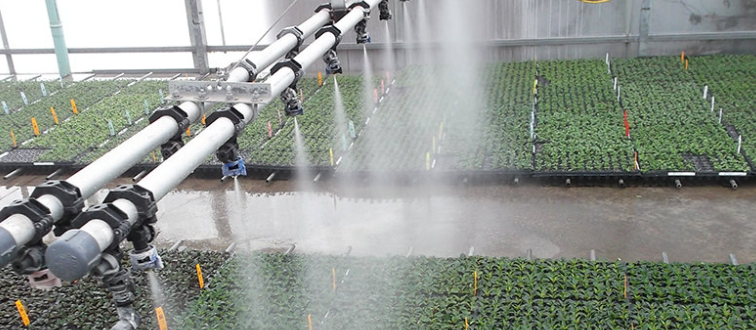

In [13]:
rp.summary_cont(fert_data.groupby(['Fert']))['Yield']

,N,Mean,SD,SE,95% Conf.,Interval
Fert,,,,,,
A,10,30.900,3.283968,1.038482,28.864576,32.935424
B,10,27.180,4.394390,1.389628,24.456329,29.903671
C,10,27.714,6.011486,1.900999,23.988043,31.439957


In [14]:
rp.summary_cont(fert_data.groupby(['Water']))['Yield']

,N,Mean,SD,SE,95% Conf.,Interval
Water,,,,,,
High,15,30.876,3.597310,0.928821,29.055510,32.696490
Low,15,26.320,4.929242,1.272725,23.825459,28.814541


In [15]:
rp.summary_cont(fert_data.groupby(['Fert', 'Water']))['Yield']

N    Mean        SD        SE  95% Conf.   Interval
Fert Water                                                     
A    High   5  31.800  3.146427  1.407125  29.042036  34.557964
     Low    5  30.000  3.512834  1.570987  26.920866  33.079134
B    High   5  29.840  3.374611  1.509172  26.882023  32.797977
     Low    5  24.520  3.791042  1.695406  21.197005  27.842995
C    High   5  30.988  4.645398  2.077485  26.916129  35.059871
     Low    5  24.440  5.738728  2.566437  19.409783  29.470217

In [16]:
model = ols('Yield ~ C(Fert)*C(Water)', fert_data).fit()

    # Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 5, 24) =  3.125, p =  0.0260


#### Insights
Excellent, the overall model is significant. Now we need to check the assumptions of the ANOVA, normality and homogeneity of variance. Statsmodels already provides model diagnostics in the model summary table.

<a id=section501></a> 
### Model Summary

- Summary for  Sets of variables by principle of Ordinary least squares

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     3.125
Date:                Sun, 10 Feb 2019   Prob (F-statistic):             0.0260
Time:                        21:44:09   Log-Likelihood:                -81.794
No. Observations:                  30   AIC:                             175.6
Df Residuals:                      24   BIC:                             184.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       31.8000      1.849     17.203      0.000      27.985      35.615
C(Fert)[T.B]                    -1.9600      2.614     -0.750      0.461      -7.355       3.435
C(Fert)[T.C]                    -0.8120      2.614     -0.311      0.759      -6.207       4.583
C(Water)[T.Low]                 -1.8000      2.614     -0.689      0.498      -7.195       3.595
C(Fert)[T.B]:C(Water)[T.Low]    -3.5200      3.697     -0.952      0.351     -11.150       4.110
C(Fert)[T.C]:C(Water)[T.Low]    -4.7480      3.697     -1.284      0.211     -12.378       2.882
==============================================================================
Omnibus:                        0.276   Durbin-Watson:                   2.598
Prob(Omnibus):                  0.871   Jarque-Bera (JB):                0.126
Skew:                           0.148   Prob(JB):                        0.939
Kurtosis:                       2.888   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The model passes the assumption check, which is excellent. 


<a id=section502></a> 
### ANOVA TABLE

In [18]:
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(Fert),80.91384,2.0,2.367916,0.115199
C(Water),155.67852,1.0,9.111758,0.005938
C(Fert):C(Water),30.36824,2.0,0.888716,0.424286
Residual,410.05088,24.0,NaN,NaN


**Insight**

- The interaction term is not significant. 
- This indicates that there is no interaction effect between the type of fertilizer and the amount of water on the mean crop yield. 

**Since this is not significant, the interaction term can be removed from the model and lets rescan results**

In [19]:
model2 = ols('Yield ~ C(Fert)+ C(Water)', fert_data).fit()

print(f"Overall model F({model2.df_model: .0f},{model2.df_resid: .0f}) = {model2.fvalue: .3f}, p = {model2.f_pvalue: .4f}")

Overall model F( 3, 26) =  4.656, p =  0.0098


In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     3.125
Date:                Sun, 10 Feb 2019   Prob (F-statistic):             0.0260
Time:                        21:44:15   Log-Likelihood:                -81.794
No. Observations:                  30   AIC:                             175.6
Df Residuals:                      24   BIC:                             184.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       31.8000      1.849     17.203      0.000      27.985      35.615
C(Fert)[T.B]                    -1.9600      2.614     -0.750      0.461      -7.355       3.435
C(Fert)[T.C]                    -0.8120      2.614     -0.311      0.759      -6.207       4.583
C(Water)[T.Low]                 -1.8000      2.614     -0.689      0.498      -7.195       3.595
C(Fert)[T.B]:C(Water)[T.Low]    -3.5200      3.697     -0.952      0.351     -11.150       4.110
C(Fert)[T.C]:C(Water)[T.Low]    -4.7480      3.697     -1.284      0.211     -12.378       2.882
==============================================================================
Omnibus:                        0.276   Durbin-Watson:                   2.598
Prob(Omnibus):                  0.871   Jarque-Bera (JB):                0.126
Skew:                           0.148   Prob(JB):                        0.939
Kurtosis:                       2.888   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
res2 = sm.stats.anova_lm(model2, typ= 2)
res2

,sum_sq,df,F,PR(>F)
C(Fert),80.91384,2.0,2.388361,0.111625
C(Water),155.67852,1.0,9.190431,0.005450
Residual,440.41912,26.0,NaN,NaN


#### Insights

- Each factor has an independent significant effect on the mean crop yield. While it’s good to know if there is a statistically significant effect of some intervention on the outcome, it’s as important to know the size of the effect the intervention has on the outcome.

<a id=section503></a> 
### Effect Size 

To calculate real  significance we can calculate the **effect size**. The following code uses the ANOVA table produced by statsmodels and appends the effect size measures of eta-squared (η2) and omega-squared (ω2)

In [22]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(res2)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(Fert),80.91384,40.456920,2.0,2.388361,0.111625,0.119516,0.067779
C(Water),155.67852,155.678520,1.0,9.190431,0.005450,0.229950,0.199927
Residual,440.41912,16.939197,26.0,NaN,NaN,NaN,NaN


ω2 is a better measure of effect size since it’s unbiased in it’s calculation. It takes into account the degrees of freedom, whereas η2 does not. Side note, η2 and R2 are the same thing in the ANOVA framework. Each factor, fertilizer and water, has a small effect on the mean crop yield.

<a id=section504></f> 
### 5.4 Tukey’s HSD 

To test for difference for each factor separately

In [26]:
mc = statsmodels.stats.multicomp.MultiComparison(fert_data['Yield'], fert_data['Fert'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  A      B     -3.72   -8.9291 1.4891 False 
  A      C     -3.186  -8.3951 2.0231 False 
  B      C     0.534   -4.6751 5.7431 False 
--------------------------------------------


In [27]:
mc = statsmodels.stats.multicomp.MultiComparison(fert_data['Yield'], fert_data['Water'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 High   Low    -4.556  -7.7835 -1.3285  True 
---------------------------------------------


**Insights**

- There is a statistically not  significant different between the mean crop yield between fertilizer A , B & C ; fertilizer C is best.

- A statistically significant difference in the mean crop yield depends on  the amount of water used.

<a id=section505></f> 
### 5.5 Conclusion 

- **Accept** null hypothesis when multiple comparison between Yield & Fert 
- **Reject** null hypothesis  when multiple comparision between Yield & Water

-------------------------------------------------------------------------------------------------------------------------------